In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [32]:
full_data = pd.read_csv('data/Christie_diagnosis_20180118.csv')

### Trying other imputation methods

For information on algorithms, see [fancyimpute](https://pypi.python.org/pypi/fancyimpute)

Make all the solver objects

In [56]:
from fancyimpute import *

KNN_solver = KNN(k=5)
softimpute_solver = SoftImpute()
MICE_solver = MICE()
simple_solver = SimpleFill()
iterativeSVD_solver = IterativeSVD()
matrixfactorization_solver = MatrixFactorization()

Create a dataframe from the complete data in `train_data`. Then, randomly insert some NaNs for MSE testing.

** I'm not sure if this will actually be sufficient in testing MSE, but I'm trying it anyways.

In [57]:
# Drop NaNs
complete_data = train_data.dropna()

In [58]:
# Drop DX and DXSUB
complete_data.drop(columns=['DX', 'DXSUB'], inplace=True)

/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
# Randomly insert NaNs
nan_inserted_data = complete_data.copy()
import random
ix = [(row, col) for row in range(complete_data.shape[0]) for col in range(complete_data.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    nan_inserted_data.iat[row, col] = np.nan

In [60]:
missing_mask = nan_inserted_data.isna().any(axis=1)

Complete those missing dataframes with the various solvers!

In [61]:
def test_imputation(solver, df):
    """Impute the data using imputation methods"""
    impute_data = df.values
    data_index = df.index
    data_cols = df.columns

    impute_data_filled = solver.complete(impute_data)
    impute_df = pd.DataFrame(impute_data_filled, index=data_index, columns=data_cols)
    return impute_df

In [62]:
KNN_df = test_imputation(KNN_solver, nan_inserted_data)

Imputing row 1/429 with 3 missing, elapsed time: 0.056
Imputing row 101/429 with 1 missing, elapsed time: 0.060
Imputing row 201/429 with 3 missing, elapsed time: 0.063
Imputing row 301/429 with 1 missing, elapsed time: 0.067
Imputing row 401/429 with 4 missing, elapsed time: 0.071


In [63]:
softimpute_df = test_imputation(softimpute_solver, nan_inserted_data)

[SoftImpute] Max Singular Value of X_init = 6021.288544
[SoftImpute] Iter 1: observed MAE=1.567917 rank=7
[SoftImpute] Iter 2: observed MAE=1.545347 rank=6
[SoftImpute] Iter 3: observed MAE=1.542019 rank=6
[SoftImpute] Iter 4: observed MAE=1.550035 rank=6
[SoftImpute] Iter 5: observed MAE=1.559149 rank=6
[SoftImpute] Iter 6: observed MAE=1.565335 rank=6
[SoftImpute] Iter 7: observed MAE=1.568788 rank=6
[SoftImpute] Iter 8: observed MAE=1.570754 rank=6
[SoftImpute] Iter 9: observed MAE=1.571930 rank=6
[SoftImpute] Iter 10: observed MAE=1.572682 rank=6
[SoftImpute] Iter 11: observed MAE=1.573212 rank=6
[SoftImpute] Iter 12: observed MAE=1.573578 rank=6
[SoftImpute] Iter 13: observed MAE=1.573825 rank=6
[SoftImpute] Iter 14: observed MAE=1.574020 rank=6
[SoftImpute] Iter 15: observed MAE=1.574166 rank=6
[SoftImpute] Iter 16: observed MAE=1.574285 rank=6
[SoftImpute] Iter 17: observed MAE=1.574381 rank=6
[SoftImpute] Iter 18: observed MAE=1.574457 rank=6
[SoftImpute] Iter 19: observed MAE=

/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/fancyimpute/soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


In [64]:
MICE_df = test_imputation(MICE_solver, nan_inserted_data)

[MICE] Completing matrix with shape (429, 35)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.010
[MICE] Starting imputation round 3/110, elapsed time 0.019
[MICE] Starting imputation round 4/110, elapsed time 0.029
[MICE] Starting imputation round 5/110, elapsed time 0.038
[MICE] Starting imputation round 6/110, elapsed time 0.051
[MICE] Starting imputation round 7/110, elapsed time 0.063
[MICE] Starting imputation round 8/110, elapsed time 0.073
[MICE] Starting imputation round 9/110, elapsed time 0.082
[MICE] Starting imputation round 10/110, elapsed time 0.090
[MICE] Starting imputation round 11/110, elapsed time 0.099
[MICE] Starting imputation round 12/110, elapsed time 0.108
[MICE] Starting imputation round 13/110, elapsed time 0.117
[MICE] Starting imputation round 14/110, elapsed time 0.125
[MICE] Starting imputation round 15/110, elapsed time 0.134
[MICE] Starting imputation round 16/110, elapsed time 0.143
[MI

In [65]:
simple_df = test_imputation(simple_solver, nan_inserted_data)

In [66]:
iterative_df = test_imputation(iterativeSVD_solver, nan_inserted_data)

[IterativeSVD] Iter 1: observed MAE=4.300512
[IterativeSVD] Iter 2: observed MAE=2.319916
[IterativeSVD] Iter 3: observed MAE=1.341935
[IterativeSVD] Iter 4: observed MAE=0.517094
[IterativeSVD] Iter 5: observed MAE=0.404114
[IterativeSVD] Iter 6: observed MAE=0.400751
[IterativeSVD] Iter 7: observed MAE=0.400295
[IterativeSVD] Iter 8: observed MAE=0.400188
[IterativeSVD] Iter 9: observed MAE=0.400120
[IterativeSVD] Iter 10: observed MAE=0.400029


/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/fancyimpute/iterative_svd.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return (ssd / old_norm_squared) < self.convergence_threshold


In [67]:
matrixfact_df = test_imputation(matrixfactorization_solver, nan_inserted_data)

Train on 12161 samples, validate on 1352 samples
Epoch 1/10000
 - 0s - loss: 1.1041 - val_loss: 1.0960
Epoch 2/10000
 - 0s - loss: 1.1018 - val_loss: 1.0957
Epoch 3/10000
 - 0s - loss: 1.1002 - val_loss: 1.0954
Epoch 4/10000
 - 0s - loss: 1.0986 - val_loss: 1.0951
Epoch 5/10000
 - 0s - loss: 1.0971 - val_loss: 1.0948
Epoch 6/10000
 - 0s - loss: 1.0955 - val_loss: 1.0945
Epoch 7/10000
 - 0s - loss: 1.0940 - val_loss: 1.0942
Epoch 8/10000
 - 0s - loss: 1.0923 - val_loss: 1.0939
Epoch 9/10000
 - 0s - loss: 1.0907 - val_loss: 1.0936
Epoch 10/10000
 - 0s - loss: 1.0890 - val_loss: 1.0932
Epoch 11/10000
 - 0s - loss: 1.0873 - val_loss: 1.0929
Epoch 12/10000
 - 0s - loss: 1.0856 - val_loss: 1.0926
Epoch 13/10000
 - 0s - loss: 1.0839 - val_loss: 1.0922
Epoch 14/10000
 - 0s - loss: 1.0822 - val_loss: 1.0918
Epoch 15/10000
 - 0s - loss: 1.0804 - val_loss: 1.0915
Epoch 16/10000
 - 0s - loss: 1.0787 - val_loss: 1.0911
Epoch 17/10000
 - 0s - loss: 1.0769 - val_loss: 1.0907
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8725 - val_loss: 1.0126
Epoch 150/10000
 - 0s - loss: 0.8708 - val_loss: 1.0116
Epoch 151/10000
 - 0s - loss: 0.8691 - val_loss: 1.0107
Epoch 152/10000
 - 0s - loss: 0.8674 - val_loss: 1.0097
Epoch 153/10000
 - 0s - loss: 0.8657 - val_loss: 1.0088
Epoch 154/10000
 - 0s - loss: 0.8640 - val_loss: 1.0078
Epoch 155/10000
 - 0s - loss: 0.8623 - val_loss: 1.0068
Epoch 156/10000
 - 0s - loss: 0.8606 - val_loss: 1.0058
Epoch 157/10000
 - 0s - loss: 0.8588 - val_loss: 1.0048
Epoch 158/10000
 - 0s - loss: 0.8571 - val_loss: 1.0038
Epoch 159/10000
 - 0s - loss: 0.8554 - val_loss: 1.0028
Epoch 160/10000
 - 0s - loss: 0.8536 - val_loss: 1.0018
Epoch 161/10000
 - 0s - loss: 0.8519 - val_loss: 1.0008
Epoch 162/10000
 - 0s - loss: 0.8501 - val_loss: 0.9998
Epoch 163/10000
 - 0s - loss: 0.8484 - val_loss: 0.9987
Epoch 164/10000
 - 0s - loss: 0.8466 - val_loss: 0.9977
Epoch 165/10000
 - 0s - loss: 0.8448 - val_loss: 0.9966
Epoch 166/10000
 - 0s - loss: 0.8431 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6125 - val_loss: 0.8383
Epoch 297/10000
 - 0s - loss: 0.6110 - val_loss: 0.8373
Epoch 298/10000
 - 0s - loss: 0.6095 - val_loss: 0.8362
Epoch 299/10000
 - 0s - loss: 0.6080 - val_loss: 0.8352
Epoch 300/10000
 - 0s - loss: 0.6065 - val_loss: 0.8342
Epoch 301/10000
 - 0s - loss: 0.6051 - val_loss: 0.8332
Epoch 302/10000
 - 0s - loss: 0.6036 - val_loss: 0.8322
Epoch 303/10000
 - 0s - loss: 0.6021 - val_loss: 0.8313
Epoch 304/10000
 - 0s - loss: 0.6007 - val_loss: 0.8303
Epoch 305/10000
 - 0s - loss: 0.5992 - val_loss: 0.8293
Epoch 306/10000
 - 0s - loss: 0.5978 - val_loss: 0.8283
Epoch 307/10000
 - 0s - loss: 0.5964 - val_loss: 0.8274
Epoch 308/10000
 - 0s - loss: 0.5950 - val_loss: 0.8264
Epoch 309/10000
 - 0s - loss: 0.5935 - val_loss: 0.8255
Epoch 310/10000
 - 0s - loss: 0.5921 - val_loss: 0.8245
Epoch 311/10000
 - 0s - loss: 0.5907 - val_loss: 0.8236
Epoch 312/10000
 - 0s - loss: 0.5893 - val_loss: 0.8226
Epoch 313/10000
 - 0s - loss: 0.5879 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4525 - val_loss: 0.7463
Epoch 444/10000
 - 0s - loss: 0.4518 - val_loss: 0.7460
Epoch 445/10000
 - 0s - loss: 0.4510 - val_loss: 0.7457
Epoch 446/10000
 - 0s - loss: 0.4502 - val_loss: 0.7454
Epoch 447/10000
 - 0s - loss: 0.4495 - val_loss: 0.7451
Epoch 448/10000
 - 0s - loss: 0.4487 - val_loss: 0.7448
Epoch 449/10000
 - 0s - loss: 0.4479 - val_loss: 0.7445
Epoch 450/10000
 - 0s - loss: 0.4472 - val_loss: 0.7442
Epoch 451/10000
 - 0s - loss: 0.4464 - val_loss: 0.7439
Epoch 452/10000
 - 0s - loss: 0.4457 - val_loss: 0.7436
Epoch 453/10000
 - 0s - loss: 0.4449 - val_loss: 0.7433
Epoch 454/10000
 - 0s - loss: 0.4442 - val_loss: 0.7430
Epoch 455/10000
 - 0s - loss: 0.4434 - val_loss: 0.7428
Epoch 456/10000
 - 0s - loss: 0.4427 - val_loss: 0.7425
Epoch 457/10000
 - 0s - loss: 0.4420 - val_loss: 0.7422
Epoch 458/10000
 - 0s - loss: 0.4412 - val_loss: 0.7419
Epoch 459/10000
 - 0s - loss: 0.4405 - val_loss: 0.7417
Epoch 460/10000
 - 0s - loss: 0.4398 - val_loss:

### Now cast as ints

In [68]:
solver_list = [KNN_df, softimpute_df, MICE_df,
               simple_df, iterative_df, matrixfact_df]
solver_names = ['KNN', 'SoftImpute', 'MICE', 'SimpleFill',
                   'IterativeSVD', 'MatrixFactorization']

In [69]:
KNN_df_round = KNN_df.copy()
softimpute_df_round = softimpute_df.copy()
MICE_df_round = MICE_df.copy()
simple_df_round = simple_df.copy()
iterative_df_round = iterative_df.copy()
matrixfact_df_round = matrixfact_df.copy()

In [70]:
round_list = [KNN_df_round, softimpute_df_round, MICE_df_round,
              simple_df_round, iterative_df_round, matrixfact_df_round]
round_names = ['KNN_round', 'SoftImpute_round', 'MICE_round',
            'SimpleFill_round', 'IterativeSVD_round', 'MatrixFact_round']

In [71]:
int_cols = ['SSBK_NUMCOMPLETE_Y1', 'SSFD_NUMCOMPLETE_Y1',
            'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2', 'Y1_DIGITS_BKWD_RS',
            'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2', 'Y1_TRAILS_COND3']
for df in round_list:
    for col in int_cols:
        df[col] = df[col].astype('int')

### Create MSEs for each

In [72]:
total_df_list = solver_list + round_list
total_df_names = solver_names + round_names

In [73]:
mse_df = pd.DataFrame(index=total_df_names, columns=complete_data.columns)

In [74]:
i = 0
for df, name in zip(total_df_list, total_df_names):
    mse = ((df[missing_mask] - complete_data[missing_mask]) ** 2).mean()
    mse_df.loc[name] = mse
    i += 1

In [75]:
mse_df

STOP_SSRTAVE_Y1 DPRIME1_Y1 DPRIME2_Y1 SSBK_NUMCOMPLETE_Y1  \
KNN                         1308.28  0.0348855  0.0530955            0.888948   
SoftImpute                  4385.08  0.0589374  0.0962761             1.32293   
MICE                        1484.87  0.0394023  0.0363318            0.713953   
SimpleFill                  1519.69  0.0481881  0.0554771            0.802498   
IterativeSVD                8582.79  0.0462078  0.0256896             1.23761   
MatrixFactorization         1515.01  0.0419838  0.0269502            0.585308   
KNN_round                   1308.28  0.0348855  0.0530955             0.90625   
SoftImpute_round            4385.08  0.0589374  0.0962761             1.41346   
MICE_round                  1484.87  0.0394023  0.0363318            0.728365   
SimpleFill_round            1519.69  0.0481881  0.0554771            0.807692   
IterativeSVD_round          8582.79  0.0462078  0.0256896             1.22115   
MatrixFact_round            1515.01  0.0419838  0.0269502            0.608173   

                    SSFD_NUMCOMPLETE_Y1       V_Y1 Y1_CLWRD_COND1  \
KNN                            0.545594  0.0587127        7.23738   
SoftImpute                      0.83592   0.107483        8.83473   
MICE                           0.488913  0.0360139        5.43492   
SimpleFill                     0.532375  0.0503231        8.08539   
IterativeSVD                   0.422191  0.0516309        10.3001   
MatrixFactorization            0.571614  0.0526186        6.73494   
KNN_round                      0.521635  0.0587127        7.32692   
SoftImpute_round                1.01202   0.107483        9.46635   
MICE_round                     0.524038  0.0360139        5.57452   
SimpleFill_round               0.560096  0.0503231        8.21875   
IterativeSVD_round             0.514423  0.0516309        10.6659   
MatrixFact_round               0.637019  0.0526186        6.78606   

                    Y1_CLWRD_COND2 Y1_DIGITS_BKWD_RS Y1_DIGITS_FRWD_RS  \
KNN                        8.03836            0.3285          0.375834   
SoftImpute                 3.78613          0.720364           1.02903   
MICE                       5.40552          0.322933          0.320186   
SimpleFill                 11.6884            0.3872          0.422884   
IterativeSVD                3.5095          0.343938          0.374368   
MatrixFactorization        5.99377          0.301685          0.335536   
KNN_round                  8.01683          0.365385          0.387019   
SoftImpute_round           3.92067          0.817308           1.08173   
MICE_round                 5.40865          0.377404          0.346154   
SimpleFill_round           11.6226          0.420673          0.432692   
IterativeSVD_round         3.59135           0.34375          0.413462   
MatrixFact_round           5.89904          0.305288          0.408654   

                            ...         Y1_P_TMCQ_SOOTHE Y1_P_TMCQ_ASSERT  \
KNN                         ...                0.0777811        0.0537728   
SoftImpute                  ...                 0.157713         0.108203   
MICE                        ...                 0.058416        0.0416318   
SimpleFill                  ...                0.0642587        0.0406348   
IterativeSVD                ...                0.0453119          0.04361   
MatrixFactorization         ...                0.0412826        0.0248291   
KNN_round                   ...                0.0777811        0.0537728   
SoftImpute_round            ...                 0.157713         0.108203   
MICE_round                  ...                 0.058416        0.0416318   
SimpleFill_round            ...                0.0642587        0.0406348   
IterativeSVD_round          ...                0.0453119          0.04361   
MatrixFact_round            ...                0.0412826        0.0248291   

                    Y1_P_TMCQ_ATTFOCUS Y1_P_TMCQ_LIP Y1_P_TMCQ_PERCEPT  \
KNN                          

### Which method has the lowest MSEs?

Write `true` for minimums in each col

In [76]:
mse_df_bool = mse_df.copy()
for col in mse_df.columns:
    mse_df_bool[col] = (mse_df_bool[col] == np.min(mse_df_bool[col]))

In [77]:
mse_df_bool.sum(axis=1)

KNN                     2
SoftImpute              0
MICE                    4
SimpleFill              0
IterativeSVD            9
MatrixFactorization    20
KNN_round               2
SoftImpute_round        0
MICE_round              1
SimpleFill_round        0
IterativeSVD_round      6
MatrixFact_round       18
dtype: int64

In [78]:
int_cols_nodx = ['SSBK_NUMCOMPLETE_Y1',
 'SSFD_NUMCOMPLETE_Y1',
 'Y1_CLWRD_COND1',
 'Y1_CLWRD_COND2',
 'Y1_DIGITS_BKWD_RS',
 'Y1_DIGITS_FRWD_RS',
 'Y1_TRAILS_COND2',
 'Y1_TRAILS_COND3']

In [79]:
mse_df_bool[int_cols_nodx].sum(axis=1)

KNN                    0
SoftImpute             0
MICE                   3
SimpleFill             0
IterativeSVD           3
MatrixFactorization    2
KNN_round              0
SoftImpute_round       0
MICE_round             0
SimpleFill_round       0
IterativeSVD_round     0
MatrixFact_round       0
dtype: int64

However, MICE seems to do the best for columns that are technically integers (3 out of 8)

### Conclusions

Looks like MatrixFactorization is the best option. (out of 38 cols, 24 went to MatrixFactorization for the lowest MSE)

Rounding does not improve the MSE. 

## EDA and First Shitty Model

In [41]:
train_data = pd.read_csv('data/train_data.csv')

In [ ]:
train_data.head()

In [ ]:
from fancyimpute import MICE

In [42]:
def clean_data(df):
    """Impute the data using Multiple Imputation"""
    impute_data = df.values
    data_index = df.index
    data_cols = df.columns

    solver = MatrixFactorization()
    impute_data_filled = solver.complete(impute_data)
    impute_df = pd.DataFrame(impute_data_filled, index=data_index, columns=data_cols)
    return impute_df


In [43]:
clean_df = clean_data(train_data)

Train on 18875 samples, validate on 2098 samples
Epoch 1/10000
 - 0s - loss: 1.1103 - val_loss: 1.0910
Epoch 2/10000
 - 0s - loss: 1.1073 - val_loss: 1.0903
Epoch 3/10000
 - 0s - loss: 1.1057 - val_loss: 1.0895
Epoch 4/10000
 - 0s - loss: 1.1041 - val_loss: 1.0888
Epoch 5/10000
 - 0s - loss: 1.1026 - val_loss: 1.0881
Epoch 6/10000
 - 0s - loss: 1.1012 - val_loss: 1.0874
Epoch 7/10000
 - 0s - loss: 1.0997 - val_loss: 1.0867
Epoch 8/10000
 - 0s - loss: 1.0982 - val_loss: 1.0860
Epoch 9/10000
 - 0s - loss: 1.0966 - val_loss: 1.0853
Epoch 10/10000
 - 0s - loss: 1.0951 - val_loss: 1.0845
Epoch 11/10000
 - 0s - loss: 1.0935 - val_loss: 1.0838
Epoch 12/10000
 - 0s - loss: 1.0919 - val_loss: 1.0830
Epoch 13/10000
 - 0s - loss: 1.0903 - val_loss: 1.0822
Epoch 14/10000
 - 0s - loss: 1.0886 - val_loss: 1.0815
Epoch 15/10000
 - 0s - loss: 1.0870 - val_loss: 1.0807
Epoch 16/10000
 - 0s - loss: 1.0854 - val_loss: 1.0800
Epoch 17/10000
 - 0s - loss: 1.0837 - val_loss: 1.0792
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8814 - val_loss: 0.9619
Epoch 150/10000
 - 0s - loss: 0.8795 - val_loss: 0.9606
Epoch 151/10000
 - 0s - loss: 0.8777 - val_loss: 0.9594
Epoch 152/10000
 - 0s - loss: 0.8759 - val_loss: 0.9581
Epoch 153/10000
 - 0s - loss: 0.8740 - val_loss: 0.9569
Epoch 154/10000
 - 0s - loss: 0.8722 - val_loss: 0.9556
Epoch 155/10000
 - 0s - loss: 0.8703 - val_loss: 0.9543
Epoch 156/10000
 - 0s - loss: 0.8684 - val_loss: 0.9531
Epoch 157/10000
 - 0s - loss: 0.8666 - val_loss: 0.9518
Epoch 158/10000
 - 0s - loss: 0.8647 - val_loss: 0.9505
Epoch 159/10000
 - 0s - loss: 0.8628 - val_loss: 0.9492
Epoch 160/10000
 - 0s - loss: 0.8609 - val_loss: 0.9480
Epoch 161/10000
 - 0s - loss: 0.8590 - val_loss: 0.9467
Epoch 162/10000
 - 0s - loss: 0.8571 - val_loss: 0.9454
Epoch 163/10000
 - 0s - loss: 0.8552 - val_loss: 0.9441
Epoch 164/10000
 - 0s - loss: 0.8533 - val_loss: 0.9428
Epoch 165/10000
 - 0s - loss: 0.8514 - val_loss: 0.9415
Epoch 166/10000
 - 0s - loss: 0.8495 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6151 - val_loss: 0.7818
Epoch 297/10000
 - 0s - loss: 0.6137 - val_loss: 0.7808
Epoch 298/10000
 - 0s - loss: 0.6122 - val_loss: 0.7799
Epoch 299/10000
 - 0s - loss: 0.6108 - val_loss: 0.7789
Epoch 300/10000
 - 0s - loss: 0.6093 - val_loss: 0.7779
Epoch 301/10000
 - 0s - loss: 0.6079 - val_loss: 0.7770
Epoch 302/10000
 - 0s - loss: 0.6065 - val_loss: 0.7760
Epoch 303/10000
 - 0s - loss: 0.6050 - val_loss: 0.7751
Epoch 304/10000
 - 0s - loss: 0.6036 - val_loss: 0.7741
Epoch 305/10000
 - 0s - loss: 0.6022 - val_loss: 0.7732
Epoch 306/10000
 - 0s - loss: 0.6008 - val_loss: 0.7722
Epoch 307/10000
 - 0s - loss: 0.5994 - val_loss: 0.7713
Epoch 308/10000
 - 0s - loss: 0.5980 - val_loss: 0.7704
Epoch 309/10000
 - 0s - loss: 0.5967 - val_loss: 0.7694
Epoch 310/10000
 - 0s - loss: 0.5953 - val_loss: 0.7685
Epoch 311/10000
 - 0s - loss: 0.5939 - val_loss: 0.7676
Epoch 312/10000
 - 0s - loss: 0.5926 - val_loss: 0.7667
Epoch 313/10000
 - 0s - loss: 0.5912 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4589 - val_loss: 0.6835
Epoch 444/10000
 - 0s - loss: 0.4582 - val_loss: 0.6831
Epoch 445/10000
 - 0s - loss: 0.4574 - val_loss: 0.6827
Epoch 446/10000
 - 0s - loss: 0.4567 - val_loss: 0.6823
Epoch 447/10000
 - 0s - loss: 0.4560 - val_loss: 0.6819
Epoch 448/10000
 - 0s - loss: 0.4553 - val_loss: 0.6816
Epoch 449/10000
 - 0s - loss: 0.4545 - val_loss: 0.6812
Epoch 450/10000
 - 0s - loss: 0.4538 - val_loss: 0.6808
Epoch 451/10000
 - 0s - loss: 0.4531 - val_loss: 0.6804
Epoch 452/10000
 - 0s - loss: 0.4524 - val_loss: 0.6801
Epoch 453/10000
 - 0s - loss: 0.4517 - val_loss: 0.6797
Epoch 454/10000
 - 0s - loss: 0.4510 - val_loss: 0.6794
Epoch 455/10000
 - 0s - loss: 0.4503 - val_loss: 0.6790
Epoch 456/10000
 - 0s - loss: 0.4496 - val_loss: 0.6787
Epoch 457/10000
 - 0s - loss: 0.4489 - val_loss: 0.6783
Epoch 458/10000
 - 0s - loss: 0.4482 - val_loss: 0.6780
Epoch 459/10000
 - 0s - loss: 0.4475 - val_loss: 0.6776
Epoch 460/10000
 - 0s - loss: 0.4468 - val_loss:

In [44]:
clean_df.describe()

STOP_SSRTAVE_Y1  DPRIME1_Y1  DPRIME2_Y1  SSBK_NUMCOMPLETE_Y1  \
count       603.000000  603.000000  603.000000           603.000000   
mean        284.715779    0.816420    2.024161             7.252450   
std         101.261144    0.567827    0.850623             2.550317   
min          72.500000   -0.338955   -0.163147             3.000000   
25%         210.801310    0.466066    1.480492             5.000000   
50%         267.738141    0.724306    1.983159             7.000000   
75%         341.085993    1.088239    2.593477             9.000000   
max         769.960000    3.898979    4.802516            15.000000   

       SSFD_NUMCOMPLETE_Y1        V_Y1  Y1_CLWRD_COND1  Y1_CLWRD_COND2  \
count           603.000000  603.000000      603.000000      603.000000   
mean              8.100779    2.821127       48.567748       33.411105   
std               2.254010    0.729197       12.526786        8.770465   
min               3.000000    0.686200       24.000000       18.000000   
25%               7.000000    2.345450       39.000000       28.000000   
50%               7.437177    2.765829       47.000000       32.000000   
75%               9.000000    3.293250       55.384947       37.059793   
max              15.000000    5.045800      101.000000       90.000000   

       Y1_DIGITS_BKWD_RS  Y1_DIGITS_FRWD_RS     ...      Y1_P_TMCQ_ATTFOCUS  \
count         603.000000         603.000000     ...              603.000000   
mean            6.506384           8.035443     ...                2.878769   
std             1.761723           2.051525     ...                1.057596   
min             0.000000           2.000000     ...                1.000000   
25%             5.000000           6.678487     ...                2.000000   
50%             6.000000           8.000000     ...                2.625000   
75%             7.000000           9.000000     ...                3.937500   
max            14.000000          15.000000     ...                5.000000   

       Y1_P_TMCQ_LIP  Y1_P_TMCQ_PERCEPT  Y1_P_TMCQ_DISCOMF  \
count     603.000000         603.000000         603.000000   
mean        3.698714           3.323295           2.492336   
std         0.543954           0.646154           0.722629   
min         1.600000           1.100000           1.000000   
25%         3.375000           2.900000           2.000000   
50%         3.750000           3.333333           2.500000   
75%         4.044422           3.777778           2.900000   
max         5.000000           5.000000           4.900000   

       Y1_P_TMCQ_OPENNESS  Y1_P_TMCQ_SURGENCY  Y1_P_TMCQ_EFFCONT  \
count          603.000000          603.000000         603.000000   
mean             4.119497            3.680108           3.257750   
std              0.574976            0.570720           0.503358   
min              2.111111            1.477441           1.829945   
25%              3.777778            3.359091           2.884167   
50%              4.222222            3.698316           3.215000   
75%              4.555556            4.060606           3.591667   
max              5.000000            4.932660           4.670000   

       Y1_P_TMCQ_NEGAFFECT          DX       DXSUB  
count           603.000000  603.000000  603.000000  
mean              2.570874    2.260365    3.170813  
std               0.587360    0.966312    1.805035  
min               1.177143    1.000000    1.000000  
25%               2.144444    1.000000    1.000000  
50%               2.538175    3.000000    3.000000  
75%               2.936429    3.000000    5.000000  
max               4.616667    3.000000    5.000000  

[8 rows x 37 columns]

### Histograms

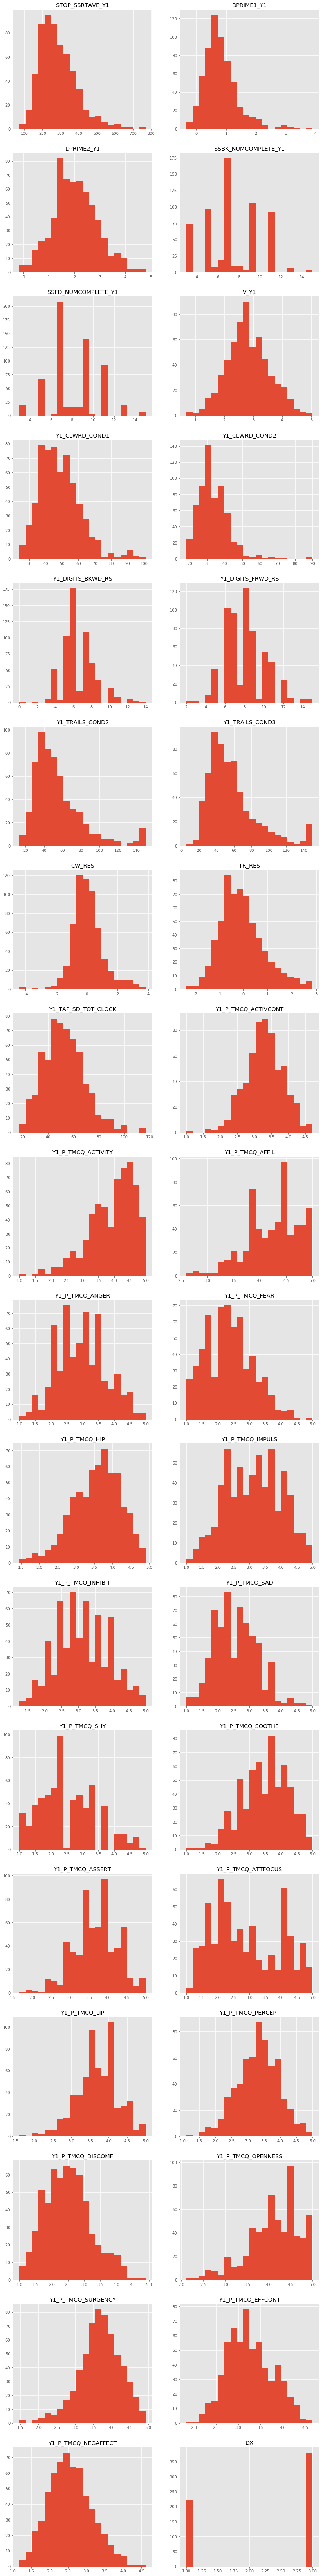

In [45]:
fig, axs = plt.subplots(len(clean_df.columns)//2,2,figsize=(14,120))

list_of_cols = list(clean_df.columns)
for col, ax in zip(list_of_cols, axs.flatten()):
    ax.hist(clean_df[col], bins=20)
    ax.set_title(col)

### Scatterplots

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
_ = scatter_matrix(clean_df, alpha=0.2, figsize=(25,25), diagonal='kde')

### Boxplots

## Testing for leaky data!

I had really high accuracy (91% test accuracy on smaller train/test split, and 92% accuracy on cross-validated log models).

So, I want to investigate if I have any leaky data columns.

In [148]:
X_train = train_data.drop(columns=['DX','DXSUB'])
y_train = train_data['DX']

In [150]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
                    X_train, y_train, test_size=0.2, random_state=56)

In [198]:
accuracy_list = []
for col in X_train_small.columns:
    # Drop the column
    X_train_dataset = X_train_small.drop(columns=col).values
    X_test_dataset = X_test_small.drop(columns=col).values
    
    # Impute the data if missing numbers
    if np.sum(np.isnan(X_train_dataset)) > 0:
        X_train_final = impute_data(X_train_dataset)
    else:
        X_train_final = X_train_dataset.copy()

    if np.sum(np.isnan(X_test_dataset)) > 0:
        X_test_final = impute_data(X_test_dataset)
    else:
        X_test_final = X_test_dataset.copy()
        
    # Fit model
    model = LogisticRegression()
    model.fit(X_train_final, y_train_small)
    
    # Score model
    accuracy = model.score(y_test_final, y_test_small)
    accuracy_list.append((col, accuracy))

Train on 13814 samples, validate on 1535 samples
Epoch 1/10000
 - 1s - loss: 1.1059 - val_loss: 1.1765
Epoch 2/10000
 - 0s - loss: 1.1035 - val_loss: 1.1756
Epoch 3/10000
 - 0s - loss: 1.1017 - val_loss: 1.1748
Epoch 4/10000
 - 0s - loss: 1.1001 - val_loss: 1.1739
Epoch 5/10000
 - 0s - loss: 1.0985 - val_loss: 1.1731
Epoch 6/10000
 - 0s - loss: 1.0968 - val_loss: 1.1722
Epoch 7/10000
 - 0s - loss: 1.0950 - val_loss: 1.1713
Epoch 8/10000
 - 0s - loss: 1.0932 - val_loss: 1.1704
Epoch 9/10000
 - 0s - loss: 1.0915 - val_loss: 1.1695
Epoch 10/10000
 - 0s - loss: 1.0897 - val_loss: 1.1686
Epoch 11/10000
 - 0s - loss: 1.0879 - val_loss: 1.1677
Epoch 12/10000
 - 0s - loss: 1.0861 - val_loss: 1.1668
Epoch 13/10000
 - 0s - loss: 1.0842 - val_loss: 1.1659
Epoch 14/10000
 - 0s - loss: 1.0824 - val_loss: 1.1650
Epoch 15/10000
 - 0s - loss: 1.0805 - val_loss: 1.1640
Epoch 16/10000
 - 0s - loss: 1.0787 - val_loss: 1.1631
Epoch 17/10000
 - 0s - loss: 1.0768 - val_loss: 1.1622
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8691 - val_loss: 1.0415
Epoch 150/10000
 - 0s - loss: 0.8675 - val_loss: 1.0403
Epoch 151/10000
 - 0s - loss: 0.8658 - val_loss: 1.0390
Epoch 152/10000
 - 0s - loss: 0.8642 - val_loss: 1.0378
Epoch 153/10000
 - 0s - loss: 0.8625 - val_loss: 1.0365
Epoch 154/10000
 - 0s - loss: 0.8608 - val_loss: 1.0352
Epoch 155/10000
 - 0s - loss: 0.8592 - val_loss: 1.0339
Epoch 156/10000
 - 0s - loss: 0.8575 - val_loss: 1.0326
Epoch 157/10000
 - 0s - loss: 0.8558 - val_loss: 1.0314
Epoch 158/10000
 - 0s - loss: 0.8541 - val_loss: 1.0300
Epoch 159/10000
 - 0s - loss: 0.8524 - val_loss: 1.0287
Epoch 160/10000
 - 0s - loss: 0.8508 - val_loss: 1.0274
Epoch 161/10000
 - 0s - loss: 0.8491 - val_loss: 1.0261
Epoch 162/10000
 - 0s - loss: 0.8474 - val_loss: 1.0247
Epoch 163/10000
 - 0s - loss: 0.8456 - val_loss: 1.0234
Epoch 164/10000
 - 0s - loss: 0.8439 - val_loss: 1.0220
Epoch 165/10000
 - 0s - loss: 0.8422 - val_loss: 1.0207
Epoch 166/10000
 - 0s - loss: 0.8405 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6111 - val_loss: 0.8274
Epoch 297/10000
 - 0s - loss: 0.6096 - val_loss: 0.8261
Epoch 298/10000
 - 0s - loss: 0.6080 - val_loss: 0.8249
Epoch 299/10000
 - 0s - loss: 0.6065 - val_loss: 0.8236
Epoch 300/10000
 - 0s - loss: 0.6050 - val_loss: 0.8223
Epoch 301/10000
 - 0s - loss: 0.6035 - val_loss: 0.8211
Epoch 302/10000
 - 0s - loss: 0.6020 - val_loss: 0.8198
Epoch 303/10000
 - 0s - loss: 0.6004 - val_loss: 0.8186
Epoch 304/10000
 - 0s - loss: 0.5989 - val_loss: 0.8173
Epoch 305/10000
 - 0s - loss: 0.5975 - val_loss: 0.8161
Epoch 306/10000
 - 0s - loss: 0.5960 - val_loss: 0.8148
Epoch 307/10000
 - 0s - loss: 0.5945 - val_loss: 0.8137
Epoch 308/10000
 - 0s - loss: 0.5930 - val_loss: 0.8124
Epoch 309/10000
 - 0s - loss: 0.5915 - val_loss: 0.8112
Epoch 310/10000
 - 0s - loss: 0.5901 - val_loss: 0.8100
Epoch 311/10000
 - 0s - loss: 0.5886 - val_loss: 0.8088
Epoch 312/10000
 - 0s - loss: 0.5872 - val_loss: 0.8076
Epoch 313/10000
 - 0s - loss: 0.5857 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4469 - val_loss: 0.7021
Epoch 444/10000
 - 0s - loss: 0.4461 - val_loss: 0.7016
Epoch 445/10000
 - 0s - loss: 0.4454 - val_loss: 0.7011
Epoch 446/10000
 - 0s - loss: 0.4446 - val_loss: 0.7006
Epoch 447/10000
 - 0s - loss: 0.4439 - val_loss: 0.7002
Epoch 448/10000
 - 0s - loss: 0.4431 - val_loss: 0.6997
Epoch 449/10000
 - 0s - loss: 0.4424 - val_loss: 0.6992
Epoch 450/10000
 - 0s - loss: 0.4416 - val_loss: 0.6988
Epoch 451/10000
 - 0s - loss: 0.4409 - val_loss: 0.6983
Epoch 452/10000
 - 0s - loss: 0.4402 - val_loss: 0.6979
Epoch 453/10000
 - 0s - loss: 0.4394 - val_loss: 0.6974
Epoch 454/10000
 - 0s - loss: 0.4387 - val_loss: 0.6970
Epoch 455/10000
 - 0s - loss: 0.4380 - val_loss: 0.6966
Epoch 456/10000
 - 0s - loss: 0.4373 - val_loss: 0.6961
Epoch 457/10000
 - 0s - loss: 0.4366 - val_loss: 0.6957
Epoch 458/10000
 - 0s - loss: 0.4358 - val_loss: 0.6953
Epoch 459/10000
 - 0s - loss: 0.4351 - val_loss: 0.6948
Epoch 460/10000
 - 0s - loss: 0.4344 - val_loss:

Epoch 42/10000
 - 0s - loss: 1.0146 - val_loss: 1.0912
Epoch 43/10000
 - 0s - loss: 1.0129 - val_loss: 1.0909
Epoch 44/10000
 - 0s - loss: 1.0113 - val_loss: 1.0906
Epoch 45/10000
 - 0s - loss: 1.0096 - val_loss: 1.0903
Epoch 46/10000
 - 0s - loss: 1.0080 - val_loss: 1.0899
Epoch 47/10000
 - 0s - loss: 1.0064 - val_loss: 1.0896
Epoch 48/10000
 - 0s - loss: 1.0048 - val_loss: 1.0893
Epoch 49/10000
 - 0s - loss: 1.0031 - val_loss: 1.0889
Epoch 50/10000
 - 0s - loss: 1.0015 - val_loss: 1.0886
Epoch 51/10000
 - 0s - loss: 0.9999 - val_loss: 1.0882
Epoch 52/10000
 - 0s - loss: 0.9983 - val_loss: 1.0879
Epoch 53/10000
 - 0s - loss: 0.9967 - val_loss: 1.0875
Epoch 54/10000
 - 0s - loss: 0.9951 - val_loss: 1.0871
Epoch 55/10000
 - 0s - loss: 0.9935 - val_loss: 1.0868
Epoch 56/10000
 - 0s - loss: 0.9919 - val_loss: 1.0864
Epoch 57/10000
 - 0s - loss: 0.9903 - val_loss: 1.0860
Epoch 58/10000
 - 0s - loss: 0.9888 - val_loss: 1.0857
Epoch 59/10000
 - 0s - loss: 0.9872 - val_loss: 1.0853
Epoch 60/1

Epoch 190/10000
 - 0s - loss: 0.7493 - val_loss: 0.9753
Epoch 191/10000
 - 0s - loss: 0.7472 - val_loss: 0.9740
Epoch 192/10000
 - 0s - loss: 0.7452 - val_loss: 0.9727
Epoch 193/10000
 - 0s - loss: 0.7431 - val_loss: 0.9714
Epoch 194/10000
 - 0s - loss: 0.7411 - val_loss: 0.9701
Epoch 195/10000
 - 0s - loss: 0.7391 - val_loss: 0.9688
Epoch 196/10000
 - 0s - loss: 0.7370 - val_loss: 0.9675
Epoch 197/10000
 - 0s - loss: 0.7350 - val_loss: 0.9662
Epoch 198/10000
 - 0s - loss: 0.7330 - val_loss: 0.9649
Epoch 199/10000
 - 0s - loss: 0.7309 - val_loss: 0.9636
Epoch 200/10000
 - 0s - loss: 0.7289 - val_loss: 0.9622
Epoch 201/10000
 - 0s - loss: 0.7269 - val_loss: 0.9609
Epoch 202/10000
 - 0s - loss: 0.7248 - val_loss: 0.9596
Epoch 203/10000
 - 0s - loss: 0.7228 - val_loss: 0.9582
Epoch 204/10000
 - 0s - loss: 0.7208 - val_loss: 0.9569
Epoch 205/10000
 - 0s - loss: 0.7188 - val_loss: 0.9556
Epoch 206/10000
 - 0s - loss: 0.7167 - val_loss: 0.9542
Epoch 207/10000
 - 0s - loss: 0.7147 - val_loss:

Epoch 337/10000
 - 0s - loss: 0.4994 - val_loss: 0.7964
Epoch 338/10000
 - 0s - loss: 0.4982 - val_loss: 0.7955
Epoch 339/10000
 - 0s - loss: 0.4969 - val_loss: 0.7946
Epoch 340/10000
 - 0s - loss: 0.4957 - val_loss: 0.7937
Epoch 341/10000
 - 0s - loss: 0.4944 - val_loss: 0.7928
Epoch 342/10000
 - 0s - loss: 0.4932 - val_loss: 0.7919
Epoch 343/10000
 - 0s - loss: 0.4920 - val_loss: 0.7910
Epoch 344/10000
 - 0s - loss: 0.4907 - val_loss: 0.7901
Epoch 345/10000
 - 0s - loss: 0.4895 - val_loss: 0.7892
Epoch 346/10000
 - 0s - loss: 0.4883 - val_loss: 0.7883
Epoch 347/10000
 - 0s - loss: 0.4871 - val_loss: 0.7874
Epoch 348/10000
 - 0s - loss: 0.4859 - val_loss: 0.7866
Epoch 349/10000
 - 0s - loss: 0.4847 - val_loss: 0.7857
Epoch 350/10000
 - 0s - loss: 0.4835 - val_loss: 0.7848
Epoch 351/10000
 - 0s - loss: 0.4823 - val_loss: 0.7840
Epoch 352/10000
 - 0s - loss: 0.4811 - val_loss: 0.7831
Epoch 353/10000
 - 0s - loss: 0.4799 - val_loss: 0.7823
Epoch 354/10000
 - 0s - loss: 0.4787 - val_loss:

Epoch 484/10000
 - 0s - loss: 0.3624 - val_loss: 0.7054
Epoch 485/10000
 - 0s - loss: 0.3617 - val_loss: 0.7050
Epoch 486/10000
 - 0s - loss: 0.3611 - val_loss: 0.7047
Epoch 487/10000
 - 0s - loss: 0.3604 - val_loss: 0.7043
Epoch 488/10000
 - 0s - loss: 0.3598 - val_loss: 0.7040
Epoch 489/10000
 - 0s - loss: 0.3591 - val_loss: 0.7036
Epoch 490/10000
 - 0s - loss: 0.3584 - val_loss: 0.7033
Epoch 491/10000
 - 0s - loss: 0.3578 - val_loss: 0.7029
Epoch 492/10000
 - 0s - loss: 0.3572 - val_loss: 0.7026
Epoch 493/10000
 - 0s - loss: 0.3565 - val_loss: 0.7023
Epoch 494/10000
 - 0s - loss: 0.3559 - val_loss: 0.7020
Epoch 495/10000
 - 0s - loss: 0.3552 - val_loss: 0.7016
Epoch 496/10000
 - 0s - loss: 0.3546 - val_loss: 0.7013
Epoch 497/10000
 - 0s - loss: 0.3540 - val_loss: 0.7010
Epoch 498/10000
 - 0s - loss: 0.3533 - val_loss: 0.7007
Epoch 499/10000
 - 0s - loss: 0.3527 - val_loss: 0.7003
Epoch 500/10000
 - 0s - loss: 0.3521 - val_loss: 0.7001
Epoch 501/10000
 - 0s - loss: 0.3514 - val_loss:

 - 0s - loss: 0.9770 - val_loss: 1.0479
Epoch 86/10000
 - 0s - loss: 0.9756 - val_loss: 1.0473
Epoch 87/10000
 - 0s - loss: 0.9743 - val_loss: 1.0467
Epoch 88/10000
 - 0s - loss: 0.9730 - val_loss: 1.0461
Epoch 89/10000
 - 0s - loss: 0.9716 - val_loss: 1.0456
Epoch 90/10000
 - 0s - loss: 0.9703 - val_loss: 1.0449
Epoch 91/10000
 - 0s - loss: 0.9689 - val_loss: 1.0444
Epoch 92/10000
 - 0s - loss: 0.9676 - val_loss: 1.0437
Epoch 93/10000
 - 0s - loss: 0.9662 - val_loss: 1.0432
Epoch 94/10000
 - 0s - loss: 0.9649 - val_loss: 1.0425
Epoch 95/10000
 - 0s - loss: 0.9635 - val_loss: 1.0420
Epoch 96/10000
 - 0s - loss: 0.9622 - val_loss: 1.0413
Epoch 97/10000
 - 0s - loss: 0.9608 - val_loss: 1.0407
Epoch 98/10000
 - 0s - loss: 0.9594 - val_loss: 1.0400
Epoch 99/10000
 - 0s - loss: 0.9581 - val_loss: 1.0394
Epoch 100/10000
 - 0s - loss: 0.9567 - val_loss: 1.0387
Epoch 101/10000
 - 0s - loss: 0.9553 - val_loss: 1.0381
Epoch 102/10000
 - 0s - loss: 0.9539 - val_loss: 1.0373
Epoch 103/10000
 - 0s 

Epoch 232/10000
 - 0s - loss: 0.7188 - val_loss: 0.8663
Epoch 233/10000
 - 0s - loss: 0.7168 - val_loss: 0.8647
Epoch 234/10000
 - 0s - loss: 0.7148 - val_loss: 0.8629
Epoch 235/10000
 - 0s - loss: 0.7129 - val_loss: 0.8613
Epoch 236/10000
 - 0s - loss: 0.7109 - val_loss: 0.8596
Epoch 237/10000
 - 0s - loss: 0.7089 - val_loss: 0.8579
Epoch 238/10000
 - 0s - loss: 0.7069 - val_loss: 0.8562
Epoch 239/10000
 - 0s - loss: 0.7049 - val_loss: 0.8546
Epoch 240/10000
 - 0s - loss: 0.7030 - val_loss: 0.8529
Epoch 241/10000
 - 0s - loss: 0.7010 - val_loss: 0.8513
Epoch 242/10000
 - 0s - loss: 0.6990 - val_loss: 0.8496
Epoch 243/10000
 - 0s - loss: 0.6971 - val_loss: 0.8480
Epoch 244/10000
 - 0s - loss: 0.6951 - val_loss: 0.8463
Epoch 245/10000
 - 0s - loss: 0.6932 - val_loss: 0.8447
Epoch 246/10000
 - 0s - loss: 0.6913 - val_loss: 0.8430
Epoch 247/10000
 - 0s - loss: 0.6893 - val_loss: 0.8414
Epoch 248/10000
 - 0s - loss: 0.6874 - val_loss: 0.8398
Epoch 249/10000
 - 0s - loss: 0.6855 - val_loss:

Epoch 379/10000
 - 0s - loss: 0.4995 - val_loss: 0.6980
Epoch 380/10000
 - 0s - loss: 0.4985 - val_loss: 0.6973
Epoch 381/10000
 - 0s - loss: 0.4975 - val_loss: 0.6968
Epoch 382/10000
 - 0s - loss: 0.4965 - val_loss: 0.6962
Epoch 383/10000
 - 0s - loss: 0.4956 - val_loss: 0.6957
Epoch 384/10000
 - 0s - loss: 0.4946 - val_loss: 0.6951
Epoch 385/10000
 - 0s - loss: 0.4936 - val_loss: 0.6946
Epoch 386/10000
 - 0s - loss: 0.4927 - val_loss: 0.6940
Epoch 387/10000
 - 0s - loss: 0.4917 - val_loss: 0.6935
Epoch 388/10000
 - 0s - loss: 0.4908 - val_loss: 0.6929
Epoch 389/10000
 - 0s - loss: 0.4899 - val_loss: 0.6924
Epoch 390/10000
 - 0s - loss: 0.4889 - val_loss: 0.6919
Epoch 391/10000
 - 0s - loss: 0.4880 - val_loss: 0.6914
Epoch 392/10000
 - 0s - loss: 0.4871 - val_loss: 0.6908
Epoch 393/10000
 - 0s - loss: 0.4861 - val_loss: 0.6904
Epoch 394/10000
 - 0s - loss: 0.4852 - val_loss: 0.6898
Epoch 395/10000
 - 0s - loss: 0.4843 - val_loss: 0.6894
Epoch 396/10000
 - 0s - loss: 0.4834 - val_loss:

Epoch 35/10000
 - 0s - loss: 1.0468 - val_loss: 1.1355
Epoch 36/10000
 - 0s - loss: 1.0453 - val_loss: 1.1348
Epoch 37/10000
 - 0s - loss: 1.0438 - val_loss: 1.1341
Epoch 38/10000
 - 0s - loss: 1.0423 - val_loss: 1.1335
Epoch 39/10000
 - 0s - loss: 1.0408 - val_loss: 1.1328
Epoch 40/10000
 - 0s - loss: 1.0393 - val_loss: 1.1322
Epoch 41/10000
 - 0s - loss: 1.0378 - val_loss: 1.1315
Epoch 42/10000
 - 0s - loss: 1.0363 - val_loss: 1.1309
Epoch 43/10000
 - 0s - loss: 1.0349 - val_loss: 1.1302
Epoch 44/10000
 - 0s - loss: 1.0334 - val_loss: 1.1296
Epoch 45/10000
 - 0s - loss: 1.0320 - val_loss: 1.1290
Epoch 46/10000
 - 0s - loss: 1.0305 - val_loss: 1.1283
Epoch 47/10000
 - 0s - loss: 1.0291 - val_loss: 1.1277
Epoch 48/10000
 - 0s - loss: 1.0277 - val_loss: 1.1271
Epoch 49/10000
 - 0s - loss: 1.0263 - val_loss: 1.1264
Epoch 50/10000
 - 0s - loss: 1.0248 - val_loss: 1.1258
Epoch 51/10000
 - 0s - loss: 1.0234 - val_loss: 1.1252
Epoch 52/10000
 - 0s - loss: 1.0220 - val_loss: 1.1245
Epoch 53/1

Epoch 183/10000
 - 0s - loss: 0.8252 - val_loss: 1.0020
Epoch 184/10000
 - 0s - loss: 0.8232 - val_loss: 1.0005
Epoch 185/10000
 - 0s - loss: 0.8213 - val_loss: 0.9990
Epoch 186/10000
 - 0s - loss: 0.8193 - val_loss: 0.9974
Epoch 187/10000
 - 0s - loss: 0.8174 - val_loss: 0.9959
Epoch 188/10000
 - 0s - loss: 0.8155 - val_loss: 0.9943
Epoch 189/10000
 - 0s - loss: 0.8135 - val_loss: 0.9928
Epoch 190/10000
 - 0s - loss: 0.8115 - val_loss: 0.9912
Epoch 191/10000
 - 0s - loss: 0.8096 - val_loss: 0.9896
Epoch 192/10000
 - 0s - loss: 0.8076 - val_loss: 0.9880
Epoch 193/10000
 - 0s - loss: 0.8056 - val_loss: 0.9865
Epoch 194/10000
 - 0s - loss: 0.8037 - val_loss: 0.9849
Epoch 195/10000
 - 0s - loss: 0.8017 - val_loss: 0.9833
Epoch 196/10000
 - 0s - loss: 0.7997 - val_loss: 0.9817
Epoch 197/10000
 - 0s - loss: 0.7977 - val_loss: 0.9801
Epoch 198/10000
 - 0s - loss: 0.7957 - val_loss: 0.9784
Epoch 199/10000
 - 0s - loss: 0.7937 - val_loss: 0.9768
Epoch 200/10000
 - 0s - loss: 0.7917 - val_loss:

Epoch 330/10000
 - 0s - loss: 0.5633 - val_loss: 0.7834
Epoch 331/10000
 - 0s - loss: 0.5620 - val_loss: 0.7824
Epoch 332/10000
 - 0s - loss: 0.5607 - val_loss: 0.7813
Epoch 333/10000
 - 0s - loss: 0.5593 - val_loss: 0.7803
Epoch 334/10000
 - 0s - loss: 0.5580 - val_loss: 0.7792
Epoch 335/10000
 - 0s - loss: 0.5567 - val_loss: 0.7782
Epoch 336/10000
 - 0s - loss: 0.5554 - val_loss: 0.7772
Epoch 337/10000
 - 0s - loss: 0.5542 - val_loss: 0.7761
Epoch 338/10000
 - 0s - loss: 0.5529 - val_loss: 0.7751
Epoch 339/10000
 - 0s - loss: 0.5516 - val_loss: 0.7741
Epoch 340/10000
 - 0s - loss: 0.5503 - val_loss: 0.7731
Epoch 341/10000
 - 0s - loss: 0.5491 - val_loss: 0.7721
Epoch 342/10000
 - 0s - loss: 0.5478 - val_loss: 0.7711
Epoch 343/10000
 - 0s - loss: 0.5466 - val_loss: 0.7702
Epoch 344/10000
 - 0s - loss: 0.5453 - val_loss: 0.7692
Epoch 345/10000
 - 0s - loss: 0.5441 - val_loss: 0.7682
Epoch 346/10000
 - 0s - loss: 0.5429 - val_loss: 0.7673
Epoch 347/10000
 - 0s - loss: 0.5417 - val_loss:

Epoch 477/10000
 - 0s - loss: 0.4260 - val_loss: 0.6916
Epoch 478/10000
 - 0s - loss: 0.4253 - val_loss: 0.6912
Epoch 479/10000
 - 0s - loss: 0.4247 - val_loss: 0.6910
Epoch 480/10000
 - 0s - loss: 0.4240 - val_loss: 0.6907
Epoch 481/10000
 - 0s - loss: 0.4234 - val_loss: 0.6904
Epoch 482/10000
 - 0s - loss: 0.4227 - val_loss: 0.6901
Epoch 483/10000
 - 0s - loss: 0.4221 - val_loss: 0.6899
Epoch 484/10000
 - 0s - loss: 0.4215 - val_loss: 0.6895
Epoch 485/10000
 - 0s - loss: 0.4208 - val_loss: 0.6893
Epoch 486/10000
 - 0s - loss: 0.4202 - val_loss: 0.6890
Epoch 487/10000
 - 0s - loss: 0.4196 - val_loss: 0.6888
Epoch 488/10000
 - 0s - loss: 0.4189 - val_loss: 0.6885
Epoch 489/10000
 - 0s - loss: 0.4183 - val_loss: 0.6883
Epoch 490/10000
 - 0s - loss: 0.4177 - val_loss: 0.6880
Epoch 491/10000
 - 0s - loss: 0.4171 - val_loss: 0.6877
Epoch 492/10000
 - 0s - loss: 0.4165 - val_loss: 0.6875
Epoch 493/10000
 - 0s - loss: 0.4158 - val_loss: 0.6872
Epoch 494/10000
 - 0s - loss: 0.4152 - val_loss:

Epoch 108/10000
 - 0s - loss: 0.9113 - val_loss: 1.0539
Epoch 109/10000
 - 0s - loss: 0.9095 - val_loss: 1.0529
Epoch 110/10000
 - 0s - loss: 0.9078 - val_loss: 1.0518
Epoch 111/10000
 - 0s - loss: 0.9060 - val_loss: 1.0508
Epoch 112/10000
 - 0s - loss: 0.9042 - val_loss: 1.0497
Epoch 113/10000
 - 0s - loss: 0.9024 - val_loss: 1.0486
Epoch 114/10000
 - 0s - loss: 0.9006 - val_loss: 1.0475
Epoch 115/10000
 - 0s - loss: 0.8988 - val_loss: 1.0464
Epoch 116/10000
 - 0s - loss: 0.8970 - val_loss: 1.0453
Epoch 117/10000
 - 0s - loss: 0.8952 - val_loss: 1.0441
Epoch 118/10000
 - 0s - loss: 0.8934 - val_loss: 1.0430
Epoch 119/10000
 - 0s - loss: 0.8916 - val_loss: 1.0419
Epoch 120/10000
 - 0s - loss: 0.8897 - val_loss: 1.0407
Epoch 121/10000
 - 0s - loss: 0.8879 - val_loss: 1.0395
Epoch 122/10000
 - 0s - loss: 0.8860 - val_loss: 1.0383
Epoch 123/10000
 - 0s - loss: 0.8842 - val_loss: 1.0372
Epoch 124/10000
 - 0s - loss: 0.8823 - val_loss: 1.0360
Epoch 125/10000
 - 0s - loss: 0.8804 - val_loss:

Epoch 255/10000
 - 0s - loss: 0.6197 - val_loss: 0.8567
Epoch 256/10000
 - 0s - loss: 0.6179 - val_loss: 0.8556
Epoch 257/10000
 - 0s - loss: 0.6162 - val_loss: 0.8545
Epoch 258/10000
 - 0s - loss: 0.6144 - val_loss: 0.8534
Epoch 259/10000
 - 0s - loss: 0.6126 - val_loss: 0.8524
Epoch 260/10000
 - 0s - loss: 0.6109 - val_loss: 0.8513
Epoch 261/10000
 - 0s - loss: 0.6091 - val_loss: 0.8503
Epoch 262/10000
 - 0s - loss: 0.6074 - val_loss: 0.8492
Epoch 263/10000
 - 0s - loss: 0.6056 - val_loss: 0.8482
Epoch 264/10000
 - 0s - loss: 0.6039 - val_loss: 0.8472
Epoch 265/10000
 - 0s - loss: 0.6022 - val_loss: 0.8462
Epoch 266/10000
 - 0s - loss: 0.6005 - val_loss: 0.8452
Epoch 267/10000
 - 0s - loss: 0.5988 - val_loss: 0.8442
Epoch 268/10000
 - 0s - loss: 0.5971 - val_loss: 0.8432
Epoch 269/10000
 - 0s - loss: 0.5954 - val_loss: 0.8422
Epoch 270/10000
 - 0s - loss: 0.5937 - val_loss: 0.8412
Epoch 271/10000
 - 0s - loss: 0.5920 - val_loss: 0.8403
Epoch 272/10000
 - 0s - loss: 0.5903 - val_loss:

Epoch 402/10000
 - 0s - loss: 0.4224 - val_loss: 0.7662
Epoch 403/10000
 - 0s - loss: 0.4215 - val_loss: 0.7660
Epoch 404/10000
 - 0s - loss: 0.4205 - val_loss: 0.7657
Epoch 405/10000
 - 0s - loss: 0.4195 - val_loss: 0.7654
Epoch 406/10000
 - 0s - loss: 0.4186 - val_loss: 0.7651
Epoch 407/10000
 - 0s - loss: 0.4176 - val_loss: 0.7649
Epoch 408/10000
 - 0s - loss: 0.4167 - val_loss: 0.7646
Epoch 409/10000
 - 0s - loss: 0.4157 - val_loss: 0.7643
Epoch 410/10000
 - 0s - loss: 0.4148 - val_loss: 0.7640
Epoch 411/10000
 - 0s - loss: 0.4138 - val_loss: 0.7638
Epoch 412/10000
 - 0s - loss: 0.4129 - val_loss: 0.7635
Epoch 413/10000
 - 0s - loss: 0.4120 - val_loss: 0.7633
Epoch 414/10000
 - 0s - loss: 0.4111 - val_loss: 0.7630
Epoch 415/10000
 - 0s - loss: 0.4101 - val_loss: 0.7628
Epoch 416/10000
 - 0s - loss: 0.4092 - val_loss: 0.7625
Epoch 417/10000
 - 0s - loss: 0.4083 - val_loss: 0.7623
Epoch 418/10000
 - 0s - loss: 0.4074 - val_loss: 0.7620
Epoch 419/10000
 - 0s - loss: 0.4065 - val_loss:

Epoch 111/10000
 - 0s - loss: 0.9339 - val_loss: 1.0269
Epoch 112/10000
 - 0s - loss: 0.9323 - val_loss: 1.0261
Epoch 113/10000
 - 0s - loss: 0.9307 - val_loss: 1.0252
Epoch 114/10000
 - 0s - loss: 0.9290 - val_loss: 1.0244
Epoch 115/10000
 - 0s - loss: 0.9274 - val_loss: 1.0235
Epoch 116/10000
 - 0s - loss: 0.9258 - val_loss: 1.0226
Epoch 117/10000
 - 0s - loss: 0.9242 - val_loss: 1.0217
Epoch 118/10000
 - 0s - loss: 0.9225 - val_loss: 1.0208
Epoch 119/10000
 - 0s - loss: 0.9209 - val_loss: 1.0199
Epoch 120/10000
 - 0s - loss: 0.9192 - val_loss: 1.0190
Epoch 121/10000
 - 0s - loss: 0.9175 - val_loss: 1.0180
Epoch 122/10000
 - 0s - loss: 0.9159 - val_loss: 1.0171
Epoch 123/10000
 - 0s - loss: 0.9142 - val_loss: 1.0161
Epoch 124/10000
 - 0s - loss: 0.9125 - val_loss: 1.0152
Epoch 125/10000
 - 0s - loss: 0.9108 - val_loss: 1.0142
Epoch 126/10000
 - 0s - loss: 0.9091 - val_loss: 1.0132
Epoch 127/10000
 - 0s - loss: 0.9074 - val_loss: 1.0122
Epoch 128/10000
 - 0s - loss: 0.9057 - val_loss:

Epoch 258/10000
 - 0s - loss: 0.6621 - val_loss: 0.8404
Epoch 259/10000
 - 0s - loss: 0.6604 - val_loss: 0.8391
Epoch 260/10000
 - 0s - loss: 0.6587 - val_loss: 0.8379
Epoch 261/10000
 - 0s - loss: 0.6570 - val_loss: 0.8367
Epoch 262/10000
 - 0s - loss: 0.6553 - val_loss: 0.8354
Epoch 263/10000
 - 0s - loss: 0.6537 - val_loss: 0.8342
Epoch 264/10000
 - 0s - loss: 0.6520 - val_loss: 0.8330
Epoch 265/10000
 - 0s - loss: 0.6503 - val_loss: 0.8318
Epoch 266/10000
 - 0s - loss: 0.6487 - val_loss: 0.8306
Epoch 267/10000
 - 0s - loss: 0.6470 - val_loss: 0.8294
Epoch 268/10000
 - 0s - loss: 0.6454 - val_loss: 0.8282
Epoch 269/10000
 - 0s - loss: 0.6437 - val_loss: 0.8270
Epoch 270/10000
 - 0s - loss: 0.6421 - val_loss: 0.8258
Epoch 271/10000
 - 0s - loss: 0.6405 - val_loss: 0.8246
Epoch 272/10000
 - 0s - loss: 0.6388 - val_loss: 0.8235
Epoch 273/10000
 - 0s - loss: 0.6372 - val_loss: 0.8223
Epoch 274/10000
 - 0s - loss: 0.6356 - val_loss: 0.8211
Epoch 275/10000
 - 0s - loss: 0.6340 - val_loss:

Epoch 405/10000
 - 0s - loss: 0.4728 - val_loss: 0.7152
Epoch 406/10000
 - 0s - loss: 0.4719 - val_loss: 0.7147
Epoch 407/10000
 - 0s - loss: 0.4710 - val_loss: 0.7143
Epoch 408/10000
 - 0s - loss: 0.4702 - val_loss: 0.7138
Epoch 409/10000
 - 0s - loss: 0.4693 - val_loss: 0.7133
Epoch 410/10000
 - 0s - loss: 0.4684 - val_loss: 0.7129
Epoch 411/10000
 - 0s - loss: 0.4675 - val_loss: 0.7124
Epoch 412/10000
 - 0s - loss: 0.4666 - val_loss: 0.7120
Epoch 413/10000
 - 0s - loss: 0.4658 - val_loss: 0.7115
Epoch 414/10000
 - 0s - loss: 0.4649 - val_loss: 0.7111
Epoch 415/10000
 - 0s - loss: 0.4640 - val_loss: 0.7106
Epoch 416/10000
 - 0s - loss: 0.4632 - val_loss: 0.7102
Epoch 417/10000
 - 0s - loss: 0.4623 - val_loss: 0.7098
Epoch 418/10000
 - 0s - loss: 0.4615 - val_loss: 0.7093
Epoch 419/10000
 - 0s - loss: 0.4606 - val_loss: 0.7089
Epoch 420/10000
 - 0s - loss: 0.4598 - val_loss: 0.7085
Epoch 421/10000
 - 0s - loss: 0.4589 - val_loss: 0.7081
Epoch 422/10000
 - 0s - loss: 0.4581 - val_loss:

Epoch 47/10000
 - 0s - loss: 1.0275 - val_loss: 1.1041
Epoch 48/10000
 - 0s - loss: 1.0259 - val_loss: 1.1034
Epoch 49/10000
 - 0s - loss: 1.0243 - val_loss: 1.1027
Epoch 50/10000
 - 0s - loss: 1.0228 - val_loss: 1.1020
Epoch 51/10000
 - 0s - loss: 1.0212 - val_loss: 1.1013
Epoch 52/10000
 - 0s - loss: 1.0197 - val_loss: 1.1007
Epoch 53/10000
 - 0s - loss: 1.0181 - val_loss: 1.1000
Epoch 54/10000
 - 0s - loss: 1.0166 - val_loss: 1.0993
Epoch 55/10000
 - 0s - loss: 1.0151 - val_loss: 1.0986
Epoch 56/10000
 - 0s - loss: 1.0136 - val_loss: 1.0980
Epoch 57/10000
 - 0s - loss: 1.0120 - val_loss: 1.0973
Epoch 58/10000
 - 0s - loss: 1.0105 - val_loss: 1.0966
Epoch 59/10000
 - 0s - loss: 1.0090 - val_loss: 1.0959
Epoch 60/10000
 - 0s - loss: 1.0075 - val_loss: 1.0953
Epoch 61/10000
 - 0s - loss: 1.0060 - val_loss: 1.0946
Epoch 62/10000
 - 0s - loss: 1.0045 - val_loss: 1.0939
Epoch 63/10000
 - 0s - loss: 1.0029 - val_loss: 1.0932
Epoch 64/10000
 - 0s - loss: 1.0014 - val_loss: 1.0925
Epoch 65/1

 - 0s - loss: 0.7833 - val_loss: 0.9570
Epoch 195/10000
 - 0s - loss: 0.7814 - val_loss: 0.9556
Epoch 196/10000
 - 0s - loss: 0.7795 - val_loss: 0.9541
Epoch 197/10000
 - 0s - loss: 0.7776 - val_loss: 0.9527
Epoch 198/10000
 - 0s - loss: 0.7757 - val_loss: 0.9512
Epoch 199/10000
 - 0s - loss: 0.7738 - val_loss: 0.9498
Epoch 200/10000
 - 0s - loss: 0.7719 - val_loss: 0.9483
Epoch 201/10000
 - 0s - loss: 0.7700 - val_loss: 0.9468
Epoch 202/10000
 - 0s - loss: 0.7681 - val_loss: 0.9454
Epoch 203/10000
 - 0s - loss: 0.7663 - val_loss: 0.9439
Epoch 204/10000
 - 0s - loss: 0.7644 - val_loss: 0.9425
Epoch 205/10000
 - 0s - loss: 0.7625 - val_loss: 0.9410
Epoch 206/10000
 - 0s - loss: 0.7606 - val_loss: 0.9395
Epoch 207/10000
 - 0s - loss: 0.7587 - val_loss: 0.9381
Epoch 208/10000
 - 0s - loss: 0.7569 - val_loss: 0.9366
Epoch 209/10000
 - 0s - loss: 0.7550 - val_loss: 0.9351
Epoch 210/10000
 - 0s - loss: 0.7531 - val_loss: 0.9337
Epoch 211/10000
 - 0s - loss: 0.7512 - val_loss: 0.9322
Epoch 21

Epoch 341/10000
 - 0s - loss: 0.5448 - val_loss: 0.7631
Epoch 342/10000
 - 0s - loss: 0.5436 - val_loss: 0.7620
Epoch 343/10000
 - 0s - loss: 0.5424 - val_loss: 0.7610
Epoch 344/10000
 - 0s - loss: 0.5411 - val_loss: 0.7600
Epoch 345/10000
 - 0s - loss: 0.5399 - val_loss: 0.7590
Epoch 346/10000
 - 0s - loss: 0.5387 - val_loss: 0.7580
Epoch 347/10000
 - 0s - loss: 0.5375 - val_loss: 0.7570
Epoch 348/10000
 - 0s - loss: 0.5363 - val_loss: 0.7560
Epoch 349/10000
 - 0s - loss: 0.5351 - val_loss: 0.7551
Epoch 350/10000
 - 0s - loss: 0.5339 - val_loss: 0.7541
Epoch 351/10000
 - 0s - loss: 0.5327 - val_loss: 0.7531
Epoch 352/10000
 - 0s - loss: 0.5315 - val_loss: 0.7521
Epoch 353/10000
 - 0s - loss: 0.5304 - val_loss: 0.7512
Epoch 354/10000
 - 0s - loss: 0.5292 - val_loss: 0.7502
Epoch 355/10000
 - 0s - loss: 0.5280 - val_loss: 0.7493
Epoch 356/10000
 - 0s - loss: 0.5269 - val_loss: 0.7483
Epoch 357/10000
 - 0s - loss: 0.5257 - val_loss: 0.7474
Epoch 358/10000
 - 0s - loss: 0.5246 - val_loss:

Epoch 488/10000
 - 0s - loss: 0.4141 - val_loss: 0.6686
Epoch 489/10000
 - 0s - loss: 0.4135 - val_loss: 0.6683
Epoch 490/10000
 - 0s - loss: 0.4128 - val_loss: 0.6680
Epoch 491/10000
 - 0s - loss: 0.4122 - val_loss: 0.6676
Epoch 492/10000
 - 0s - loss: 0.4116 - val_loss: 0.6673
Epoch 493/10000
 - 0s - loss: 0.4110 - val_loss: 0.6670
Epoch 494/10000
 - 0s - loss: 0.4104 - val_loss: 0.6667
Epoch 495/10000
 - 0s - loss: 0.4098 - val_loss: 0.6664
Epoch 496/10000
 - 0s - loss: 0.4091 - val_loss: 0.6661
Epoch 497/10000
 - 0s - loss: 0.4085 - val_loss: 0.6657
Epoch 498/10000
 - 0s - loss: 0.4079 - val_loss: 0.6654
Epoch 499/10000
 - 0s - loss: 0.4073 - val_loss: 0.6651
Epoch 500/10000
 - 0s - loss: 0.4067 - val_loss: 0.6648
Epoch 501/10000
 - 0s - loss: 0.4061 - val_loss: 0.6645
Epoch 502/10000
 - 0s - loss: 0.4055 - val_loss: 0.6643
Epoch 503/10000
 - 0s - loss: 0.4049 - val_loss: 0.6639
Epoch 504/10000
 - 0s - loss: 0.4043 - val_loss: 0.6637
Epoch 505/10000
 - 0s - loss: 0.4038 - val_loss:

 - 0s - loss: 0.9585 - val_loss: 1.0086
Epoch 89/10000
 - 0s - loss: 0.9568 - val_loss: 1.0081
Epoch 90/10000
 - 0s - loss: 0.9551 - val_loss: 1.0076
Epoch 91/10000
 - 0s - loss: 0.9533 - val_loss: 1.0070
Epoch 92/10000
 - 0s - loss: 0.9516 - val_loss: 1.0065
Epoch 93/10000
 - 0s - loss: 0.9499 - val_loss: 1.0059
Epoch 94/10000
 - 0s - loss: 0.9482 - val_loss: 1.0054
Epoch 95/10000
 - 0s - loss: 0.9464 - val_loss: 1.0048
Epoch 96/10000
 - 0s - loss: 0.9447 - val_loss: 1.0042
Epoch 97/10000
 - 0s - loss: 0.9429 - val_loss: 1.0037
Epoch 98/10000
 - 0s - loss: 0.9412 - val_loss: 1.0031
Epoch 99/10000
 - 0s - loss: 0.9395 - val_loss: 1.0025
Epoch 100/10000
 - 0s - loss: 0.9377 - val_loss: 1.0019
Epoch 101/10000
 - 0s - loss: 0.9359 - val_loss: 1.0013
Epoch 102/10000
 - 0s - loss: 0.9342 - val_loss: 1.0007
Epoch 103/10000
 - 0s - loss: 0.9324 - val_loss: 1.0001
Epoch 104/10000
 - 0s - loss: 0.9307 - val_loss: 0.9994
Epoch 105/10000
 - 0s - loss: 0.9289 - val_loss: 0.9988
Epoch 106/10000
 - 

Epoch 235/10000
 - 0s - loss: 0.6737 - val_loss: 0.8679
Epoch 236/10000
 - 0s - loss: 0.6718 - val_loss: 0.8667
Epoch 237/10000
 - 0s - loss: 0.6699 - val_loss: 0.8655
Epoch 238/10000
 - 0s - loss: 0.6680 - val_loss: 0.8644
Epoch 239/10000
 - 0s - loss: 0.6661 - val_loss: 0.8632
Epoch 240/10000
 - 0s - loss: 0.6642 - val_loss: 0.8621
Epoch 241/10000
 - 0s - loss: 0.6624 - val_loss: 0.8609
Epoch 242/10000
 - 0s - loss: 0.6605 - val_loss: 0.8597
Epoch 243/10000
 - 0s - loss: 0.6586 - val_loss: 0.8586
Epoch 244/10000
 - 0s - loss: 0.6568 - val_loss: 0.8574
Epoch 245/10000
 - 0s - loss: 0.6549 - val_loss: 0.8563
Epoch 246/10000
 - 0s - loss: 0.6531 - val_loss: 0.8551
Epoch 247/10000
 - 0s - loss: 0.6512 - val_loss: 0.8540
Epoch 248/10000
 - 0s - loss: 0.6494 - val_loss: 0.8529
Epoch 249/10000
 - 0s - loss: 0.6476 - val_loss: 0.8517
Epoch 250/10000
 - 0s - loss: 0.6457 - val_loss: 0.8506
Epoch 251/10000
 - 0s - loss: 0.6439 - val_loss: 0.8494
Epoch 252/10000
 - 0s - loss: 0.6421 - val_loss:

Epoch 382/10000
 - 0s - loss: 0.4578 - val_loss: 0.7325
Epoch 383/10000
 - 0s - loss: 0.4568 - val_loss: 0.7319
Epoch 384/10000
 - 0s - loss: 0.4557 - val_loss: 0.7313
Epoch 385/10000
 - 0s - loss: 0.4547 - val_loss: 0.7307
Epoch 386/10000
 - 0s - loss: 0.4537 - val_loss: 0.7301
Epoch 387/10000
 - 0s - loss: 0.4526 - val_loss: 0.7295
Epoch 388/10000
 - 0s - loss: 0.4516 - val_loss: 0.7289
Epoch 389/10000
 - 0s - loss: 0.4506 - val_loss: 0.7284
Epoch 390/10000
 - 0s - loss: 0.4496 - val_loss: 0.7277
Epoch 391/10000
 - 0s - loss: 0.4486 - val_loss: 0.7272
Epoch 392/10000
 - 0s - loss: 0.4476 - val_loss: 0.7266
Epoch 393/10000
 - 0s - loss: 0.4466 - val_loss: 0.7261
Epoch 394/10000
 - 0s - loss: 0.4456 - val_loss: 0.7255
Epoch 395/10000
 - 0s - loss: 0.4446 - val_loss: 0.7250
Epoch 396/10000
 - 0s - loss: 0.4436 - val_loss: 0.7244
Epoch 397/10000
 - 0s - loss: 0.4426 - val_loss: 0.7239
Epoch 398/10000
 - 0s - loss: 0.4416 - val_loss: 0.7233
Epoch 399/10000
 - 0s - loss: 0.4406 - val_loss:

 - 0s - loss: 1.0613 - val_loss: 1.1642
Epoch 28/10000
 - 0s - loss: 1.0595 - val_loss: 1.1632
Epoch 29/10000
 - 0s - loss: 1.0577 - val_loss: 1.1624
Epoch 30/10000
 - 0s - loss: 1.0560 - val_loss: 1.1615
Epoch 31/10000
 - 0s - loss: 1.0543 - val_loss: 1.1606
Epoch 32/10000
 - 0s - loss: 1.0525 - val_loss: 1.1597
Epoch 33/10000
 - 0s - loss: 1.0508 - val_loss: 1.1588
Epoch 34/10000
 - 0s - loss: 1.0491 - val_loss: 1.1579
Epoch 35/10000
 - 0s - loss: 1.0474 - val_loss: 1.1571
Epoch 36/10000
 - 0s - loss: 1.0457 - val_loss: 1.1562
Epoch 37/10000
 - 0s - loss: 1.0441 - val_loss: 1.1553
Epoch 38/10000
 - 0s - loss: 1.0424 - val_loss: 1.1544
Epoch 39/10000
 - 0s - loss: 1.0407 - val_loss: 1.1536
Epoch 40/10000
 - 0s - loss: 1.0391 - val_loss: 1.1527
Epoch 41/10000
 - 0s - loss: 1.0374 - val_loss: 1.1519
Epoch 42/10000
 - 0s - loss: 1.0358 - val_loss: 1.1510
Epoch 43/10000
 - 0s - loss: 1.0342 - val_loss: 1.1502
Epoch 44/10000
 - 0s - loss: 1.0325 - val_loss: 1.1493
Epoch 45/10000
 - 0s - lo

Epoch 175/10000
 - 0s - loss: 0.8197 - val_loss: 1.0110
Epoch 176/10000
 - 0s - loss: 0.8178 - val_loss: 1.0095
Epoch 177/10000
 - 0s - loss: 0.8158 - val_loss: 1.0080
Epoch 178/10000
 - 0s - loss: 0.8139 - val_loss: 1.0065
Epoch 179/10000
 - 0s - loss: 0.8120 - val_loss: 1.0051
Epoch 180/10000
 - 0s - loss: 0.8101 - val_loss: 1.0035
Epoch 181/10000
 - 0s - loss: 0.8081 - val_loss: 1.0021
Epoch 182/10000
 - 0s - loss: 0.8062 - val_loss: 1.0005
Epoch 183/10000
 - 0s - loss: 0.8043 - val_loss: 0.9991
Epoch 184/10000
 - 0s - loss: 0.8023 - val_loss: 0.9975
Epoch 185/10000
 - 0s - loss: 0.8004 - val_loss: 0.9961
Epoch 186/10000
 - 0s - loss: 0.7985 - val_loss: 0.9945
Epoch 187/10000
 - 0s - loss: 0.7965 - val_loss: 0.9931
Epoch 188/10000
 - 0s - loss: 0.7946 - val_loss: 0.9915
Epoch 189/10000
 - 0s - loss: 0.7927 - val_loss: 0.9901
Epoch 190/10000
 - 0s - loss: 0.7907 - val_loss: 0.9885
Epoch 191/10000
 - 0s - loss: 0.7888 - val_loss: 0.9870
Epoch 192/10000
 - 0s - loss: 0.7868 - val_loss:

Epoch 322/10000
 - 0s - loss: 0.5687 - val_loss: 0.8151
Epoch 323/10000
 - 0s - loss: 0.5674 - val_loss: 0.8142
Epoch 324/10000
 - 0s - loss: 0.5661 - val_loss: 0.8132
Epoch 325/10000
 - 0s - loss: 0.5648 - val_loss: 0.8123
Epoch 326/10000
 - 0s - loss: 0.5636 - val_loss: 0.8113
Epoch 327/10000
 - 0s - loss: 0.5623 - val_loss: 0.8105
Epoch 328/10000
 - 0s - loss: 0.5610 - val_loss: 0.8095
Epoch 329/10000
 - 0s - loss: 0.5598 - val_loss: 0.8087
Epoch 330/10000
 - 0s - loss: 0.5585 - val_loss: 0.8077
Epoch 331/10000
 - 0s - loss: 0.5573 - val_loss: 0.8068
Epoch 332/10000
 - 0s - loss: 0.5561 - val_loss: 0.8059
Epoch 333/10000
 - 0s - loss: 0.5548 - val_loss: 0.8051
Epoch 334/10000
 - 0s - loss: 0.5536 - val_loss: 0.8041
Epoch 335/10000
 - 0s - loss: 0.5524 - val_loss: 0.8033
Epoch 336/10000
 - 0s - loss: 0.5512 - val_loss: 0.8024
Epoch 337/10000
 - 0s - loss: 0.5500 - val_loss: 0.8016
Epoch 338/10000
 - 0s - loss: 0.5488 - val_loss: 0.8006
Epoch 339/10000
 - 0s - loss: 0.5476 - val_loss:

Epoch 469/10000
 - 0s - loss: 0.4306 - val_loss: 0.7265
Epoch 470/10000
 - 0s - loss: 0.4299 - val_loss: 0.7261
Epoch 471/10000
 - 0s - loss: 0.4293 - val_loss: 0.7259
Epoch 472/10000
 - 0s - loss: 0.4286 - val_loss: 0.7255
Epoch 473/10000
 - 0s - loss: 0.4279 - val_loss: 0.7252
Epoch 474/10000
 - 0s - loss: 0.4273 - val_loss: 0.7249
Epoch 475/10000
 - 0s - loss: 0.4266 - val_loss: 0.7246
Epoch 476/10000
 - 0s - loss: 0.4260 - val_loss: 0.7242
Epoch 477/10000
 - 0s - loss: 0.4253 - val_loss: 0.7240
Epoch 478/10000
 - 0s - loss: 0.4247 - val_loss: 0.7236
Epoch 479/10000
 - 0s - loss: 0.4240 - val_loss: 0.7234
Epoch 480/10000
 - 0s - loss: 0.4234 - val_loss: 0.7231
Epoch 481/10000
 - 0s - loss: 0.4227 - val_loss: 0.7228
Epoch 482/10000
 - 0s - loss: 0.4221 - val_loss: 0.7225
Epoch 483/10000
 - 0s - loss: 0.4214 - val_loss: 0.7223
Epoch 484/10000
 - 0s - loss: 0.4208 - val_loss: 0.7219
Epoch 485/10000
 - 0s - loss: 0.4202 - val_loss: 0.7217
Epoch 486/10000
 - 0s - loss: 0.4195 - val_loss:

Epoch 99/10000
 - 0s - loss: 0.9673 - val_loss: 1.1041
Epoch 100/10000
 - 0s - loss: 0.9660 - val_loss: 1.1035
Epoch 101/10000
 - 0s - loss: 0.9646 - val_loss: 1.1030
Epoch 102/10000
 - 0s - loss: 0.9632 - val_loss: 1.1024
Epoch 103/10000
 - 0s - loss: 0.9618 - val_loss: 1.1019
Epoch 104/10000
 - 0s - loss: 0.9605 - val_loss: 1.1013
Epoch 105/10000
 - 0s - loss: 0.9591 - val_loss: 1.1008
Epoch 106/10000
 - 0s - loss: 0.9577 - val_loss: 1.1002
Epoch 107/10000
 - 0s - loss: 0.9563 - val_loss: 1.0997
Epoch 108/10000
 - 0s - loss: 0.9549 - val_loss: 1.0990
Epoch 109/10000
 - 0s - loss: 0.9536 - val_loss: 1.0985
Epoch 110/10000
 - 0s - loss: 0.9522 - val_loss: 1.0978
Epoch 111/10000
 - 0s - loss: 0.9508 - val_loss: 1.0973
Epoch 112/10000
 - 0s - loss: 0.9493 - val_loss: 1.0966
Epoch 113/10000
 - 0s - loss: 0.9479 - val_loss: 1.0961
Epoch 114/10000
 - 0s - loss: 0.9465 - val_loss: 1.0953
Epoch 115/10000
 - 0s - loss: 0.9451 - val_loss: 1.0948
Epoch 116/10000
 - 0s - loss: 0.9437 - val_loss: 

Epoch 246/10000
 - 0s - loss: 0.7137 - val_loss: 0.9376
Epoch 247/10000
 - 0s - loss: 0.7119 - val_loss: 0.9362
Epoch 248/10000
 - 0s - loss: 0.7101 - val_loss: 0.9347
Epoch 249/10000
 - 0s - loss: 0.7083 - val_loss: 0.9333
Epoch 250/10000
 - 0s - loss: 0.7065 - val_loss: 0.9319
Epoch 251/10000
 - 0s - loss: 0.7047 - val_loss: 0.9305
Epoch 252/10000
 - 0s - loss: 0.7029 - val_loss: 0.9291
Epoch 253/10000
 - 0s - loss: 0.7011 - val_loss: 0.9277
Epoch 254/10000
 - 0s - loss: 0.6993 - val_loss: 0.9263
Epoch 255/10000
 - 0s - loss: 0.6975 - val_loss: 0.9250
Epoch 256/10000
 - 0s - loss: 0.6957 - val_loss: 0.9236
Epoch 257/10000
 - 0s - loss: 0.6940 - val_loss: 0.9222
Epoch 258/10000
 - 0s - loss: 0.6922 - val_loss: 0.9208
Epoch 259/10000
 - 0s - loss: 0.6904 - val_loss: 0.9194
Epoch 260/10000
 - 0s - loss: 0.6887 - val_loss: 0.9181
Epoch 261/10000
 - 0s - loss: 0.6869 - val_loss: 0.9167
Epoch 262/10000
 - 0s - loss: 0.6852 - val_loss: 0.9153
Epoch 263/10000
 - 0s - loss: 0.6835 - val_loss:

Epoch 393/10000
 - 0s - loss: 0.5080 - val_loss: 0.7796
Epoch 394/10000
 - 0s - loss: 0.5070 - val_loss: 0.7788
Epoch 395/10000
 - 0s - loss: 0.5060 - val_loss: 0.7781
Epoch 396/10000
 - 0s - loss: 0.5050 - val_loss: 0.7774
Epoch 397/10000
 - 0s - loss: 0.5040 - val_loss: 0.7767
Epoch 398/10000
 - 0s - loss: 0.5030 - val_loss: 0.7760
Epoch 399/10000
 - 0s - loss: 0.5020 - val_loss: 0.7753
Epoch 400/10000
 - 0s - loss: 0.5010 - val_loss: 0.7746
Epoch 401/10000
 - 0s - loss: 0.5001 - val_loss: 0.7739
Epoch 402/10000
 - 0s - loss: 0.4991 - val_loss: 0.7732
Epoch 403/10000
 - 0s - loss: 0.4981 - val_loss: 0.7726
Epoch 404/10000
 - 0s - loss: 0.4971 - val_loss: 0.7719
Epoch 405/10000
 - 0s - loss: 0.4962 - val_loss: 0.7712
Epoch 406/10000
 - 0s - loss: 0.4952 - val_loss: 0.7705
Epoch 407/10000
 - 0s - loss: 0.4943 - val_loss: 0.7699
Epoch 408/10000
 - 0s - loss: 0.4933 - val_loss: 0.7692
Epoch 409/10000
 - 0s - loss: 0.4924 - val_loss: 0.7686
Epoch 410/10000
 - 0s - loss: 0.4914 - val_loss:

Epoch 4/10000
 - 0s - loss: 1.1386 - val_loss: 1.1675
Epoch 5/10000
 - 0s - loss: 1.1368 - val_loss: 1.1671
Epoch 6/10000
 - 0s - loss: 1.1350 - val_loss: 1.1667
Epoch 7/10000
 - 0s - loss: 1.1331 - val_loss: 1.1663
Epoch 8/10000
 - 0s - loss: 1.1312 - val_loss: 1.1659
Epoch 9/10000
 - 0s - loss: 1.1293 - val_loss: 1.1655
Epoch 10/10000
 - 0s - loss: 1.1274 - val_loss: 1.1651
Epoch 11/10000
 - 0s - loss: 1.1254 - val_loss: 1.1647
Epoch 12/10000
 - 0s - loss: 1.1234 - val_loss: 1.1643
Epoch 13/10000
 - 0s - loss: 1.1214 - val_loss: 1.1639
Epoch 14/10000
 - 0s - loss: 1.1193 - val_loss: 1.1635
Epoch 15/10000
 - 0s - loss: 1.1173 - val_loss: 1.1632
Epoch 16/10000
 - 0s - loss: 1.1152 - val_loss: 1.1628
Epoch 17/10000
 - 0s - loss: 1.1132 - val_loss: 1.1625
Epoch 18/10000
 - 0s - loss: 1.1111 - val_loss: 1.1621
Epoch 19/10000
 - 0s - loss: 1.1090 - val_loss: 1.1618
Epoch 20/10000
 - 0s - loss: 1.1070 - val_loss: 1.1615
Epoch 21/10000
 - 0s - loss: 1.1049 - val_loss: 1.1612
Epoch 22/10000
 

Epoch 153/10000
 - 0s - loss: 0.8717 - val_loss: 1.0971
Epoch 154/10000
 - 0s - loss: 0.8699 - val_loss: 1.0961
Epoch 155/10000
 - 0s - loss: 0.8681 - val_loss: 1.0952
Epoch 156/10000
 - 0s - loss: 0.8663 - val_loss: 1.0942
Epoch 157/10000
 - 0s - loss: 0.8645 - val_loss: 1.0933
Epoch 158/10000
 - 0s - loss: 0.8627 - val_loss: 1.0923
Epoch 159/10000
 - 0s - loss: 0.8609 - val_loss: 1.0914
Epoch 160/10000
 - 0s - loss: 0.8591 - val_loss: 1.0904
Epoch 161/10000
 - 0s - loss: 0.8573 - val_loss: 1.0894
Epoch 162/10000
 - 0s - loss: 0.8555 - val_loss: 1.0884
Epoch 163/10000
 - 0s - loss: 0.8537 - val_loss: 1.0874
Epoch 164/10000
 - 0s - loss: 0.8518 - val_loss: 1.0864
Epoch 165/10000
 - 0s - loss: 0.8500 - val_loss: 1.0854
Epoch 166/10000
 - 0s - loss: 0.8482 - val_loss: 1.0844
Epoch 167/10000
 - 0s - loss: 0.8464 - val_loss: 1.0834
Epoch 168/10000
 - 0s - loss: 0.8445 - val_loss: 1.0823
Epoch 169/10000
 - 0s - loss: 0.8427 - val_loss: 1.0813
Epoch 170/10000
 - 0s - loss: 0.8409 - val_loss:

Epoch 300/10000
 - 0s - loss: 0.6173 - val_loss: 0.9305
Epoch 301/10000
 - 0s - loss: 0.6158 - val_loss: 0.9295
Epoch 302/10000
 - 0s - loss: 0.6143 - val_loss: 0.9284
Epoch 303/10000
 - 0s - loss: 0.6128 - val_loss: 0.9273
Epoch 304/10000
 - 0s - loss: 0.6114 - val_loss: 0.9262
Epoch 305/10000
 - 0s - loss: 0.6099 - val_loss: 0.9251
Epoch 306/10000
 - 0s - loss: 0.6084 - val_loss: 0.9240
Epoch 307/10000
 - 0s - loss: 0.6069 - val_loss: 0.9229
Epoch 308/10000
 - 0s - loss: 0.6055 - val_loss: 0.9218
Epoch 309/10000
 - 0s - loss: 0.6040 - val_loss: 0.9208
Epoch 310/10000
 - 0s - loss: 0.6025 - val_loss: 0.9197
Epoch 311/10000
 - 0s - loss: 0.6011 - val_loss: 0.9186
Epoch 312/10000
 - 0s - loss: 0.5996 - val_loss: 0.9175
Epoch 313/10000
 - 0s - loss: 0.5982 - val_loss: 0.9165
Epoch 314/10000
 - 0s - loss: 0.5967 - val_loss: 0.9154
Epoch 315/10000
 - 0s - loss: 0.5953 - val_loss: 0.9144
Epoch 316/10000
 - 0s - loss: 0.5939 - val_loss: 0.9133
Epoch 317/10000
 - 0s - loss: 0.5924 - val_loss:

Epoch 447/10000
 - 0s - loss: 0.4368 - val_loss: 0.8040
Epoch 448/10000
 - 0s - loss: 0.4358 - val_loss: 0.8035
Epoch 449/10000
 - 0s - loss: 0.4349 - val_loss: 0.8029
Epoch 450/10000
 - 0s - loss: 0.4339 - val_loss: 0.8024
Epoch 451/10000
 - 0s - loss: 0.4330 - val_loss: 0.8019
Epoch 452/10000
 - 0s - loss: 0.4321 - val_loss: 0.8013
Epoch 453/10000
 - 0s - loss: 0.4311 - val_loss: 0.8008
Epoch 454/10000
 - 0s - loss: 0.4302 - val_loss: 0.8003
Epoch 455/10000
 - 0s - loss: 0.4293 - val_loss: 0.7998
Epoch 456/10000
 - 0s - loss: 0.4284 - val_loss: 0.7992
Epoch 457/10000
 - 0s - loss: 0.4274 - val_loss: 0.7987
Epoch 458/10000
 - 0s - loss: 0.4265 - val_loss: 0.7982
Epoch 459/10000
 - 0s - loss: 0.4256 - val_loss: 0.7977
Epoch 460/10000
 - 0s - loss: 0.4247 - val_loss: 0.7973
Epoch 461/10000
 - 0s - loss: 0.4238 - val_loss: 0.7968
Epoch 462/10000
 - 0s - loss: 0.4229 - val_loss: 0.7963
Epoch 463/10000
 - 0s - loss: 0.4220 - val_loss: 0.7958
Epoch 464/10000
 - 0s - loss: 0.4211 - val_loss:

Epoch 65/10000
 - 0s - loss: 1.0001 - val_loss: 1.0349
Epoch 66/10000
 - 0s - loss: 0.9987 - val_loss: 1.0343
Epoch 67/10000
 - 0s - loss: 0.9974 - val_loss: 1.0338
Epoch 68/10000
 - 0s - loss: 0.9960 - val_loss: 1.0333
Epoch 69/10000
 - 0s - loss: 0.9947 - val_loss: 1.0327
Epoch 70/10000
 - 0s - loss: 0.9934 - val_loss: 1.0322
Epoch 71/10000
 - 0s - loss: 0.9920 - val_loss: 1.0316
Epoch 72/10000
 - 0s - loss: 0.9907 - val_loss: 1.0310
Epoch 73/10000
 - 0s - loss: 0.9894 - val_loss: 1.0305
Epoch 74/10000
 - 0s - loss: 0.9881 - val_loss: 1.0299
Epoch 75/10000
 - 0s - loss: 0.9867 - val_loss: 1.0293
Epoch 76/10000
 - 0s - loss: 0.9854 - val_loss: 1.0287
Epoch 77/10000
 - 0s - loss: 0.9841 - val_loss: 1.0281
Epoch 78/10000
 - 0s - loss: 0.9827 - val_loss: 1.0275
Epoch 79/10000
 - 0s - loss: 0.9814 - val_loss: 1.0269
Epoch 80/10000
 - 0s - loss: 0.9801 - val_loss: 1.0263
Epoch 81/10000
 - 0s - loss: 0.9787 - val_loss: 1.0257
Epoch 82/10000
 - 0s - loss: 0.9774 - val_loss: 1.0251
Epoch 83/1

Epoch 212/10000
 - 0s - loss: 0.7627 - val_loss: 0.8804
Epoch 213/10000
 - 0s - loss: 0.7608 - val_loss: 0.8789
Epoch 214/10000
 - 0s - loss: 0.7589 - val_loss: 0.8775
Epoch 215/10000
 - 0s - loss: 0.7570 - val_loss: 0.8760
Epoch 216/10000
 - 0s - loss: 0.7551 - val_loss: 0.8746
Epoch 217/10000
 - 0s - loss: 0.7532 - val_loss: 0.8732
Epoch 218/10000
 - 0s - loss: 0.7513 - val_loss: 0.8717
Epoch 219/10000
 - 0s - loss: 0.7494 - val_loss: 0.8703
Epoch 220/10000
 - 0s - loss: 0.7475 - val_loss: 0.8689
Epoch 221/10000
 - 0s - loss: 0.7456 - val_loss: 0.8674
Epoch 222/10000
 - 0s - loss: 0.7437 - val_loss: 0.8660
Epoch 223/10000
 - 0s - loss: 0.7418 - val_loss: 0.8646
Epoch 224/10000
 - 0s - loss: 0.7400 - val_loss: 0.8631
Epoch 225/10000
 - 0s - loss: 0.7381 - val_loss: 0.8617
Epoch 226/10000
 - 0s - loss: 0.7362 - val_loss: 0.8603
Epoch 227/10000
 - 0s - loss: 0.7343 - val_loss: 0.8589
Epoch 228/10000
 - 0s - loss: 0.7324 - val_loss: 0.8574
Epoch 229/10000
 - 0s - loss: 0.7306 - val_loss:

Epoch 359/10000
 - 0s - loss: 0.5347 - val_loss: 0.7173
Epoch 360/10000
 - 0s - loss: 0.5336 - val_loss: 0.7167
Epoch 361/10000
 - 0s - loss: 0.5325 - val_loss: 0.7159
Epoch 362/10000
 - 0s - loss: 0.5314 - val_loss: 0.7153
Epoch 363/10000
 - 0s - loss: 0.5303 - val_loss: 0.7146
Epoch 364/10000
 - 0s - loss: 0.5292 - val_loss: 0.7140
Epoch 365/10000
 - 0s - loss: 0.5282 - val_loss: 0.7133
Epoch 366/10000
 - 0s - loss: 0.5271 - val_loss: 0.7127
Epoch 367/10000
 - 0s - loss: 0.5260 - val_loss: 0.7120
Epoch 368/10000
 - 0s - loss: 0.5249 - val_loss: 0.7114
Epoch 369/10000
 - 0s - loss: 0.5239 - val_loss: 0.7108
Epoch 370/10000
 - 0s - loss: 0.5228 - val_loss: 0.7102
Epoch 371/10000
 - 0s - loss: 0.5217 - val_loss: 0.7095
Epoch 372/10000
 - 0s - loss: 0.5207 - val_loss: 0.7089
Epoch 373/10000
 - 0s - loss: 0.5197 - val_loss: 0.7083
Epoch 374/10000
 - 0s - loss: 0.5186 - val_loss: 0.7077
Epoch 375/10000
 - 0s - loss: 0.5176 - val_loss: 0.7070
Epoch 376/10000
 - 0s - loss: 0.5165 - val_loss:

Epoch 506/10000
 - 0s - loss: 0.4140 - val_loss: 0.6582
Epoch 507/10000
 - 0s - loss: 0.4134 - val_loss: 0.6580
Epoch 508/10000
 - 0s - loss: 0.4128 - val_loss: 0.6579
Epoch 509/10000
 - 0s - loss: 0.4122 - val_loss: 0.6577
Train on 3528 samples, validate on 392 samples
Epoch 1/10000
 - 1s - loss: 1.1188 - val_loss: 1.0558
Epoch 2/10000
 - 0s - loss: 1.1164 - val_loss: 1.0553
Epoch 3/10000
 - 0s - loss: 1.1146 - val_loss: 1.0549
Epoch 4/10000
 - 0s - loss: 1.1129 - val_loss: 1.0544
Epoch 5/10000
 - 0s - loss: 1.1113 - val_loss: 1.0539
Epoch 6/10000
 - 0s - loss: 1.1096 - val_loss: 1.0534
Epoch 7/10000
 - 0s - loss: 1.1079 - val_loss: 1.0530
Epoch 8/10000
 - 0s - loss: 1.1062 - val_loss: 1.0525
Epoch 9/10000
 - 0s - loss: 1.1045 - val_loss: 1.0520
Epoch 10/10000
 - 0s - loss: 1.1027 - val_loss: 1.0515
Epoch 11/10000
 - 0s - loss: 1.1009 - val_loss: 1.0510
Epoch 12/10000
 - 0s - loss: 1.0990 - val_loss: 1.0505
Epoch 13/10000
 - 0s - loss: 1.0972 - val_loss: 1.0500
Epoch 14/10000
 - 0s - 

Epoch 145/10000
 - 0s - loss: 0.8715 - val_loss: 0.9945
Epoch 146/10000
 - 0s - loss: 0.8696 - val_loss: 0.9936
Epoch 147/10000
 - 0s - loss: 0.8677 - val_loss: 0.9929
Epoch 148/10000
 - 0s - loss: 0.8658 - val_loss: 0.9920
Epoch 149/10000
 - 0s - loss: 0.8639 - val_loss: 0.9913
Epoch 150/10000
 - 0s - loss: 0.8619 - val_loss: 0.9903
Epoch 151/10000
 - 0s - loss: 0.8600 - val_loss: 0.9896
Epoch 152/10000
 - 0s - loss: 0.8580 - val_loss: 0.9886
Epoch 153/10000
 - 0s - loss: 0.8561 - val_loss: 0.9878
Epoch 154/10000
 - 0s - loss: 0.8541 - val_loss: 0.9868
Epoch 155/10000
 - 0s - loss: 0.8522 - val_loss: 0.9860
Epoch 156/10000
 - 0s - loss: 0.8502 - val_loss: 0.9850
Epoch 157/10000
 - 0s - loss: 0.8482 - val_loss: 0.9841
Epoch 158/10000
 - 0s - loss: 0.8463 - val_loss: 0.9832
Epoch 159/10000
 - 0s - loss: 0.8443 - val_loss: 0.9823
Epoch 160/10000
 - 0s - loss: 0.8423 - val_loss: 0.9813
Epoch 161/10000
 - 0s - loss: 0.8403 - val_loss: 0.9803
Epoch 162/10000
 - 0s - loss: 0.8383 - val_loss:

Epoch 292/10000
 - 0s - loss: 0.5804 - val_loss: 0.8128
Epoch 293/10000
 - 0s - loss: 0.5788 - val_loss: 0.8116
Epoch 294/10000
 - 0s - loss: 0.5771 - val_loss: 0.8104
Epoch 295/10000
 - 0s - loss: 0.5755 - val_loss: 0.8092
Epoch 296/10000
 - 0s - loss: 0.5739 - val_loss: 0.8080
Epoch 297/10000
 - 0s - loss: 0.5722 - val_loss: 0.8068
Epoch 298/10000
 - 0s - loss: 0.5706 - val_loss: 0.8056
Epoch 299/10000
 - 0s - loss: 0.5690 - val_loss: 0.8044
Epoch 300/10000
 - 0s - loss: 0.5674 - val_loss: 0.8032
Epoch 301/10000
 - 0s - loss: 0.5658 - val_loss: 0.8020
Epoch 302/10000
 - 0s - loss: 0.5642 - val_loss: 0.8008
Epoch 303/10000
 - 0s - loss: 0.5627 - val_loss: 0.7997
Epoch 304/10000
 - 0s - loss: 0.5611 - val_loss: 0.7985
Epoch 305/10000
 - 0s - loss: 0.5595 - val_loss: 0.7973
Epoch 306/10000
 - 0s - loss: 0.5580 - val_loss: 0.7962
Epoch 307/10000
 - 0s - loss: 0.5564 - val_loss: 0.7950
Epoch 308/10000
 - 0s - loss: 0.5549 - val_loss: 0.7939
Epoch 309/10000
 - 0s - loss: 0.5533 - val_loss:

Epoch 439/10000
 - 0s - loss: 0.4075 - val_loss: 0.6903
Epoch 440/10000
 - 0s - loss: 0.4067 - val_loss: 0.6898
Epoch 441/10000
 - 0s - loss: 0.4059 - val_loss: 0.6894
Epoch 442/10000
 - 0s - loss: 0.4051 - val_loss: 0.6888
Epoch 443/10000
 - 0s - loss: 0.4044 - val_loss: 0.6884
Epoch 444/10000
 - 0s - loss: 0.4036 - val_loss: 0.6879
Epoch 445/10000
 - 0s - loss: 0.4028 - val_loss: 0.6875
Epoch 446/10000
 - 0s - loss: 0.4021 - val_loss: 0.6870
Epoch 447/10000
 - 0s - loss: 0.4013 - val_loss: 0.6866
Epoch 448/10000
 - 0s - loss: 0.4005 - val_loss: 0.6860
Epoch 449/10000
 - 0s - loss: 0.3998 - val_loss: 0.6857
Epoch 450/10000
 - 0s - loss: 0.3990 - val_loss: 0.6851
Epoch 451/10000
 - 0s - loss: 0.3983 - val_loss: 0.6848
Epoch 452/10000
 - 0s - loss: 0.3976 - val_loss: 0.6842
Epoch 453/10000
 - 0s - loss: 0.3968 - val_loss: 0.6839
Epoch 454/10000
 - 0s - loss: 0.3961 - val_loss: 0.6834
Epoch 455/10000
 - 0s - loss: 0.3954 - val_loss: 0.6831
Epoch 456/10000
 - 0s - loss: 0.3946 - val_loss:

 - 0s - loss: 1.0242 - val_loss: 1.1763
Epoch 40/10000
 - 0s - loss: 1.0226 - val_loss: 1.1758
Epoch 41/10000
 - 0s - loss: 1.0211 - val_loss: 1.1753
Epoch 42/10000
 - 0s - loss: 1.0196 - val_loss: 1.1749
Epoch 43/10000
 - 0s - loss: 1.0181 - val_loss: 1.1744
Epoch 44/10000
 - 0s - loss: 1.0166 - val_loss: 1.1739
Epoch 45/10000
 - 0s - loss: 1.0151 - val_loss: 1.1734
Epoch 46/10000
 - 0s - loss: 1.0136 - val_loss: 1.1729
Epoch 47/10000
 - 0s - loss: 1.0121 - val_loss: 1.1724
Epoch 48/10000
 - 0s - loss: 1.0106 - val_loss: 1.1719
Epoch 49/10000
 - 0s - loss: 1.0092 - val_loss: 1.1713
Epoch 50/10000
 - 0s - loss: 1.0077 - val_loss: 1.1708
Epoch 51/10000
 - 0s - loss: 1.0062 - val_loss: 1.1703
Epoch 52/10000
 - 0s - loss: 1.0048 - val_loss: 1.1698
Epoch 53/10000
 - 0s - loss: 1.0033 - val_loss: 1.1692
Epoch 54/10000
 - 0s - loss: 1.0019 - val_loss: 1.1687
Epoch 55/10000
 - 0s - loss: 1.0005 - val_loss: 1.1681
Epoch 56/10000
 - 0s - loss: 0.9990 - val_loss: 1.1676
Epoch 57/10000
 - 0s - lo

Epoch 187/10000
 - 0s - loss: 0.7902 - val_loss: 1.0156
Epoch 188/10000
 - 0s - loss: 0.7883 - val_loss: 1.0140
Epoch 189/10000
 - 0s - loss: 0.7863 - val_loss: 1.0122
Epoch 190/10000
 - 0s - loss: 0.7844 - val_loss: 1.0106
Epoch 191/10000
 - 0s - loss: 0.7825 - val_loss: 1.0088
Epoch 192/10000
 - 0s - loss: 0.7806 - val_loss: 1.0072
Epoch 193/10000
 - 0s - loss: 0.7787 - val_loss: 1.0054
Epoch 194/10000
 - 0s - loss: 0.7767 - val_loss: 1.0037
Epoch 195/10000
 - 0s - loss: 0.7748 - val_loss: 1.0020
Epoch 196/10000
 - 0s - loss: 0.7729 - val_loss: 1.0003
Epoch 197/10000
 - 0s - loss: 0.7710 - val_loss: 0.9985
Epoch 198/10000
 - 0s - loss: 0.7690 - val_loss: 0.9969
Epoch 199/10000
 - 0s - loss: 0.7671 - val_loss: 0.9951
Epoch 200/10000
 - 0s - loss: 0.7652 - val_loss: 0.9934
Epoch 201/10000
 - 0s - loss: 0.7633 - val_loss: 0.9917
Epoch 202/10000
 - 0s - loss: 0.7613 - val_loss: 0.9900
Epoch 203/10000
 - 0s - loss: 0.7594 - val_loss: 0.9882
Epoch 204/10000
 - 0s - loss: 0.7575 - val_loss:

Epoch 334/10000
 - 0s - loss: 0.5396 - val_loss: 0.8016
Epoch 335/10000
 - 0s - loss: 0.5383 - val_loss: 0.8006
Epoch 336/10000
 - 0s - loss: 0.5370 - val_loss: 0.7996
Epoch 337/10000
 - 0s - loss: 0.5357 - val_loss: 0.7986
Epoch 338/10000
 - 0s - loss: 0.5344 - val_loss: 0.7977
Epoch 339/10000
 - 0s - loss: 0.5332 - val_loss: 0.7966
Epoch 340/10000
 - 0s - loss: 0.5319 - val_loss: 0.7957
Epoch 341/10000
 - 0s - loss: 0.5307 - val_loss: 0.7947
Epoch 342/10000
 - 0s - loss: 0.5294 - val_loss: 0.7938
Epoch 343/10000
 - 0s - loss: 0.5282 - val_loss: 0.7928
Epoch 344/10000
 - 0s - loss: 0.5269 - val_loss: 0.7919
Epoch 345/10000
 - 0s - loss: 0.5257 - val_loss: 0.7909
Epoch 346/10000
 - 0s - loss: 0.5245 - val_loss: 0.7901
Epoch 347/10000
 - 0s - loss: 0.5233 - val_loss: 0.7891
Epoch 348/10000
 - 0s - loss: 0.5221 - val_loss: 0.7882
Epoch 349/10000
 - 0s - loss: 0.5209 - val_loss: 0.7872
Epoch 350/10000
 - 0s - loss: 0.5197 - val_loss: 0.7864
Epoch 351/10000
 - 0s - loss: 0.5185 - val_loss:

Epoch 481/10000
 - 0s - loss: 0.4050 - val_loss: 0.7143
Epoch 482/10000
 - 0s - loss: 0.4044 - val_loss: 0.7141
Epoch 483/10000
 - 0s - loss: 0.4038 - val_loss: 0.7138
Epoch 484/10000
 - 0s - loss: 0.4032 - val_loss: 0.7135
Epoch 485/10000
 - 0s - loss: 0.4026 - val_loss: 0.7132
Epoch 486/10000
 - 0s - loss: 0.4020 - val_loss: 0.7130
Epoch 487/10000
 - 0s - loss: 0.4014 - val_loss: 0.7127
Epoch 488/10000
 - 0s - loss: 0.4008 - val_loss: 0.7125
Epoch 489/10000
 - 0s - loss: 0.4001 - val_loss: 0.7122
Epoch 490/10000
 - 0s - loss: 0.3996 - val_loss: 0.7120
Epoch 491/10000
 - 0s - loss: 0.3990 - val_loss: 0.7117
Epoch 492/10000
 - 0s - loss: 0.3984 - val_loss: 0.7115
Epoch 493/10000
 - 0s - loss: 0.3978 - val_loss: 0.7112
Epoch 494/10000
 - 0s - loss: 0.3972 - val_loss: 0.7110
Epoch 495/10000
 - 0s - loss: 0.3966 - val_loss: 0.7108
Epoch 496/10000
 - 0s - loss: 0.3960 - val_loss: 0.7106
Epoch 497/10000
 - 0s - loss: 0.3954 - val_loss: 0.7103
Epoch 498/10000
 - 0s - loss: 0.3949 - val_loss:

Epoch 115/10000
 - 0s - loss: 0.9018 - val_loss: 1.0209
Epoch 116/10000
 - 0s - loss: 0.9000 - val_loss: 1.0200
Epoch 117/10000
 - 0s - loss: 0.8982 - val_loss: 1.0192
Epoch 118/10000
 - 0s - loss: 0.8964 - val_loss: 1.0184
Epoch 119/10000
 - 0s - loss: 0.8946 - val_loss: 1.0175
Epoch 120/10000
 - 0s - loss: 0.8927 - val_loss: 1.0166
Epoch 121/10000
 - 0s - loss: 0.8909 - val_loss: 1.0158
Epoch 122/10000
 - 0s - loss: 0.8891 - val_loss: 1.0149
Epoch 123/10000
 - 0s - loss: 0.8873 - val_loss: 1.0140
Epoch 124/10000
 - 0s - loss: 0.8854 - val_loss: 1.0131
Epoch 125/10000
 - 0s - loss: 0.8836 - val_loss: 1.0122
Epoch 126/10000
 - 0s - loss: 0.8818 - val_loss: 1.0113
Epoch 127/10000
 - 0s - loss: 0.8799 - val_loss: 1.0104
Epoch 128/10000
 - 0s - loss: 0.8781 - val_loss: 1.0094
Epoch 129/10000
 - 0s - loss: 0.8762 - val_loss: 1.0086
Epoch 130/10000
 - 0s - loss: 0.8744 - val_loss: 1.0075
Epoch 131/10000
 - 0s - loss: 0.8725 - val_loss: 1.0068
Epoch 132/10000
 - 0s - loss: 0.8706 - val_loss:

Epoch 262/10000
 - 0s - loss: 0.6250 - val_loss: 0.8610
Epoch 263/10000
 - 0s - loss: 0.6234 - val_loss: 0.8600
Epoch 264/10000
 - 0s - loss: 0.6217 - val_loss: 0.8591
Epoch 265/10000
 - 0s - loss: 0.6200 - val_loss: 0.8581
Epoch 266/10000
 - 0s - loss: 0.6184 - val_loss: 0.8571
Epoch 267/10000
 - 0s - loss: 0.6167 - val_loss: 0.8562
Epoch 268/10000
 - 0s - loss: 0.6151 - val_loss: 0.8552
Epoch 269/10000
 - 0s - loss: 0.6134 - val_loss: 0.8543
Epoch 270/10000
 - 0s - loss: 0.6118 - val_loss: 0.8534
Epoch 271/10000
 - 0s - loss: 0.6101 - val_loss: 0.8524
Epoch 272/10000
 - 0s - loss: 0.6085 - val_loss: 0.8515
Epoch 273/10000
 - 0s - loss: 0.6069 - val_loss: 0.8506
Epoch 274/10000
 - 0s - loss: 0.6053 - val_loss: 0.8497
Epoch 275/10000
 - 0s - loss: 0.6037 - val_loss: 0.8488
Epoch 276/10000
 - 0s - loss: 0.6021 - val_loss: 0.8478
Epoch 277/10000
 - 0s - loss: 0.6005 - val_loss: 0.8469
Epoch 278/10000
 - 0s - loss: 0.5989 - val_loss: 0.8460
Epoch 279/10000
 - 0s - loss: 0.5973 - val_loss:

Epoch 409/10000
 - 0s - loss: 0.4373 - val_loss: 0.7641
Epoch 410/10000
 - 0s - loss: 0.4364 - val_loss: 0.7635
Epoch 411/10000
 - 0s - loss: 0.4355 - val_loss: 0.7632
Epoch 412/10000
 - 0s - loss: 0.4346 - val_loss: 0.7626
Epoch 413/10000
 - 0s - loss: 0.4337 - val_loss: 0.7624
Epoch 414/10000
 - 0s - loss: 0.4328 - val_loss: 0.7618
Epoch 415/10000
 - 0s - loss: 0.4319 - val_loss: 0.7616
Epoch 416/10000
 - 0s - loss: 0.4310 - val_loss: 0.7610
Epoch 417/10000
 - 0s - loss: 0.4301 - val_loss: 0.7608
Epoch 418/10000
 - 0s - loss: 0.4292 - val_loss: 0.7602
Epoch 419/10000
 - 0s - loss: 0.4283 - val_loss: 0.7601
Epoch 420/10000
 - 0s - loss: 0.4274 - val_loss: 0.7594
Epoch 421/10000
 - 0s - loss: 0.4266 - val_loss: 0.7593
Epoch 422/10000
 - 0s - loss: 0.4257 - val_loss: 0.7586
Epoch 423/10000
 - 0s - loss: 0.4248 - val_loss: 0.7585
Epoch 424/10000
 - 0s - loss: 0.4240 - val_loss: 0.7578
Epoch 425/10000
 - 0s - loss: 0.4231 - val_loss: 0.7577
Epoch 426/10000
 - 0s - loss: 0.4222 - val_loss:

Epoch 49/10000
 - 0s - loss: 1.0368 - val_loss: 1.0682
Epoch 50/10000
 - 0s - loss: 1.0352 - val_loss: 1.0676
Epoch 51/10000
 - 0s - loss: 1.0336 - val_loss: 1.0671
Epoch 52/10000
 - 0s - loss: 1.0321 - val_loss: 1.0665
Epoch 53/10000
 - 0s - loss: 1.0305 - val_loss: 1.0660
Epoch 54/10000
 - 0s - loss: 1.0290 - val_loss: 1.0654
Epoch 55/10000
 - 0s - loss: 1.0274 - val_loss: 1.0649
Epoch 56/10000
 - 0s - loss: 1.0259 - val_loss: 1.0643
Epoch 57/10000
 - 0s - loss: 1.0244 - val_loss: 1.0637
Epoch 58/10000
 - 0s - loss: 1.0228 - val_loss: 1.0632
Epoch 59/10000
 - 0s - loss: 1.0213 - val_loss: 1.0626
Epoch 60/10000
 - 0s - loss: 1.0198 - val_loss: 1.0620
Epoch 61/10000
 - 0s - loss: 1.0183 - val_loss: 1.0615
Epoch 62/10000
 - 0s - loss: 1.0168 - val_loss: 1.0609
Epoch 63/10000
 - 0s - loss: 1.0153 - val_loss: 1.0603
Epoch 64/10000
 - 0s - loss: 1.0138 - val_loss: 1.0598
Epoch 65/10000
 - 0s - loss: 1.0123 - val_loss: 1.0592
Epoch 66/10000
 - 0s - loss: 1.0108 - val_loss: 1.0586
Epoch 67/1

 - 0s - loss: 0.7966 - val_loss: 0.9261
Epoch 197/10000
 - 0s - loss: 0.7947 - val_loss: 0.9247
Epoch 198/10000
 - 0s - loss: 0.7928 - val_loss: 0.9232
Epoch 199/10000
 - 0s - loss: 0.7909 - val_loss: 0.9218
Epoch 200/10000
 - 0s - loss: 0.7889 - val_loss: 0.9204
Epoch 201/10000
 - 0s - loss: 0.7870 - val_loss: 0.9189
Epoch 202/10000
 - 0s - loss: 0.7851 - val_loss: 0.9175
Epoch 203/10000
 - 0s - loss: 0.7832 - val_loss: 0.9160
Epoch 204/10000
 - 0s - loss: 0.7812 - val_loss: 0.9146
Epoch 205/10000
 - 0s - loss: 0.7793 - val_loss: 0.9131
Epoch 206/10000
 - 0s - loss: 0.7774 - val_loss: 0.9117
Epoch 207/10000
 - 0s - loss: 0.7754 - val_loss: 0.9102
Epoch 208/10000
 - 0s - loss: 0.7735 - val_loss: 0.9088
Epoch 209/10000
 - 0s - loss: 0.7716 - val_loss: 0.9073
Epoch 210/10000
 - 0s - loss: 0.7697 - val_loss: 0.9059
Epoch 211/10000
 - 0s - loss: 0.7677 - val_loss: 0.9044
Epoch 212/10000
 - 0s - loss: 0.7658 - val_loss: 0.9030
Epoch 213/10000
 - 0s - loss: 0.7639 - val_loss: 0.9015
Epoch 21

Epoch 343/10000
 - 0s - loss: 0.5498 - val_loss: 0.7536
Epoch 344/10000
 - 0s - loss: 0.5485 - val_loss: 0.7528
Epoch 345/10000
 - 0s - loss: 0.5472 - val_loss: 0.7521
Epoch 346/10000
 - 0s - loss: 0.5459 - val_loss: 0.7514
Epoch 347/10000
 - 0s - loss: 0.5447 - val_loss: 0.7506
Epoch 348/10000
 - 0s - loss: 0.5434 - val_loss: 0.7499
Epoch 349/10000
 - 0s - loss: 0.5421 - val_loss: 0.7492
Epoch 350/10000
 - 0s - loss: 0.5409 - val_loss: 0.7485
Epoch 351/10000
 - 0s - loss: 0.5396 - val_loss: 0.7478
Epoch 352/10000
 - 0s - loss: 0.5384 - val_loss: 0.7471
Epoch 353/10000
 - 0s - loss: 0.5371 - val_loss: 0.7464
Epoch 354/10000
 - 0s - loss: 0.5359 - val_loss: 0.7457
Epoch 355/10000
 - 0s - loss: 0.5347 - val_loss: 0.7450
Epoch 356/10000
 - 0s - loss: 0.5334 - val_loss: 0.7443
Epoch 357/10000
 - 0s - loss: 0.5322 - val_loss: 0.7436
Epoch 358/10000
 - 0s - loss: 0.5310 - val_loss: 0.7430
Epoch 359/10000
 - 0s - loss: 0.5298 - val_loss: 0.7423
Epoch 360/10000
 - 0s - loss: 0.5286 - val_loss:

Epoch 5/10000
 - 0s - loss: 1.1305 - val_loss: 1.0502
Epoch 6/10000
 - 0s - loss: 1.1287 - val_loss: 1.0499
Epoch 7/10000
 - 0s - loss: 1.1269 - val_loss: 1.0496
Epoch 8/10000
 - 0s - loss: 1.1251 - val_loss: 1.0493
Epoch 9/10000
 - 0s - loss: 1.1232 - val_loss: 1.0490
Epoch 10/10000
 - 0s - loss: 1.1212 - val_loss: 1.0486
Epoch 11/10000
 - 0s - loss: 1.1193 - val_loss: 1.0483
Epoch 12/10000
 - 0s - loss: 1.1173 - val_loss: 1.0480
Epoch 13/10000
 - 0s - loss: 1.1153 - val_loss: 1.0476
Epoch 14/10000
 - 0s - loss: 1.1133 - val_loss: 1.0473
Epoch 15/10000
 - 0s - loss: 1.1113 - val_loss: 1.0469
Epoch 16/10000
 - 0s - loss: 1.1092 - val_loss: 1.0466
Epoch 17/10000
 - 0s - loss: 1.1072 - val_loss: 1.0462
Epoch 18/10000
 - 0s - loss: 1.1052 - val_loss: 1.0459
Epoch 19/10000
 - 0s - loss: 1.1032 - val_loss: 1.0455
Epoch 20/10000
 - 0s - loss: 1.1011 - val_loss: 1.0452
Epoch 21/10000
 - 0s - loss: 1.0991 - val_loss: 1.0448
Epoch 22/10000
 - 0s - loss: 1.0971 - val_loss: 1.0445
Epoch 23/10000


 - 0s - loss: 0.8542 - val_loss: 0.9627
Epoch 154/10000
 - 0s - loss: 0.8522 - val_loss: 0.9617
Epoch 155/10000
 - 0s - loss: 0.8501 - val_loss: 0.9606
Epoch 156/10000
 - 0s - loss: 0.8481 - val_loss: 0.9596
Epoch 157/10000
 - 0s - loss: 0.8461 - val_loss: 0.9585
Epoch 158/10000
 - 0s - loss: 0.8440 - val_loss: 0.9574
Epoch 159/10000
 - 0s - loss: 0.8420 - val_loss: 0.9563
Epoch 160/10000
 - 0s - loss: 0.8399 - val_loss: 0.9552
Epoch 161/10000
 - 0s - loss: 0.8378 - val_loss: 0.9541
Epoch 162/10000
 - 0s - loss: 0.8358 - val_loss: 0.9531
Epoch 163/10000
 - 0s - loss: 0.8337 - val_loss: 0.9519
Epoch 164/10000
 - 0s - loss: 0.8316 - val_loss: 0.9509
Epoch 165/10000
 - 0s - loss: 0.8295 - val_loss: 0.9497
Epoch 166/10000
 - 0s - loss: 0.8275 - val_loss: 0.9487
Epoch 167/10000
 - 0s - loss: 0.8254 - val_loss: 0.9474
Epoch 168/10000
 - 0s - loss: 0.8233 - val_loss: 0.9464
Epoch 169/10000
 - 0s - loss: 0.8212 - val_loss: 0.9451
Epoch 170/10000
 - 0s - loss: 0.8191 - val_loss: 0.9442
Epoch 17

Epoch 300/10000
 - 0s - loss: 0.5650 - val_loss: 0.8057
Epoch 301/10000
 - 0s - loss: 0.5634 - val_loss: 0.8049
Epoch 302/10000
 - 0s - loss: 0.5619 - val_loss: 0.8042
Epoch 303/10000
 - 0s - loss: 0.5603 - val_loss: 0.8034
Epoch 304/10000
 - 0s - loss: 0.5588 - val_loss: 0.8026
Epoch 305/10000
 - 0s - loss: 0.5572 - val_loss: 0.8018
Epoch 306/10000
 - 0s - loss: 0.5557 - val_loss: 0.8011
Epoch 307/10000
 - 0s - loss: 0.5542 - val_loss: 0.8003
Epoch 308/10000
 - 0s - loss: 0.5527 - val_loss: 0.7996
Epoch 309/10000
 - 0s - loss: 0.5512 - val_loss: 0.7988
Epoch 310/10000
 - 0s - loss: 0.5497 - val_loss: 0.7981
Epoch 311/10000
 - 0s - loss: 0.5482 - val_loss: 0.7973
Epoch 312/10000
 - 0s - loss: 0.5467 - val_loss: 0.7966
Epoch 313/10000
 - 0s - loss: 0.5452 - val_loss: 0.7959
Epoch 314/10000
 - 0s - loss: 0.5438 - val_loss: 0.7952
Epoch 315/10000
 - 0s - loss: 0.5423 - val_loss: 0.7944
Epoch 316/10000
 - 0s - loss: 0.5408 - val_loss: 0.7937
Epoch 317/10000
 - 0s - loss: 0.5394 - val_loss:

Epoch 447/10000
 - 0s - loss: 0.4008 - val_loss: 0.7369
Epoch 448/10000
 - 0s - loss: 0.4000 - val_loss: 0.7366
Epoch 449/10000
 - 0s - loss: 0.3992 - val_loss: 0.7364
Epoch 450/10000
 - 0s - loss: 0.3985 - val_loss: 0.7362
Epoch 451/10000
 - 0s - loss: 0.3977 - val_loss: 0.7359
Epoch 452/10000
 - 0s - loss: 0.3970 - val_loss: 0.7357
Epoch 453/10000
 - 0s - loss: 0.3962 - val_loss: 0.7355
Epoch 454/10000
 - 0s - loss: 0.3955 - val_loss: 0.7353
Epoch 455/10000
 - 0s - loss: 0.3947 - val_loss: 0.7350
Epoch 456/10000
 - 0s - loss: 0.3940 - val_loss: 0.7348
Epoch 457/10000
 - 0s - loss: 0.3932 - val_loss: 0.7346
Epoch 458/10000
 - 0s - loss: 0.3925 - val_loss: 0.7344
Epoch 459/10000
 - 0s - loss: 0.3918 - val_loss: 0.7341
Epoch 460/10000
 - 0s - loss: 0.3910 - val_loss: 0.7340
Epoch 461/10000
 - 0s - loss: 0.3903 - val_loss: 0.7337
Epoch 462/10000
 - 0s - loss: 0.3896 - val_loss: 0.7336
Epoch 463/10000
 - 0s - loss: 0.3889 - val_loss: 0.7333
Epoch 464/10000
 - 0s - loss: 0.3882 - val_loss:

Epoch 127/10000
 - 0s - loss: 0.9075 - val_loss: 1.0889
Epoch 128/10000
 - 0s - loss: 0.9060 - val_loss: 1.0880
Epoch 129/10000
 - 0s - loss: 0.9044 - val_loss: 1.0870
Epoch 130/10000
 - 0s - loss: 0.9029 - val_loss: 1.0861
Epoch 131/10000
 - 0s - loss: 0.9013 - val_loss: 1.0851
Epoch 132/10000
 - 0s - loss: 0.8997 - val_loss: 1.0842
Epoch 133/10000
 - 0s - loss: 0.8981 - val_loss: 1.0832
Epoch 134/10000
 - 0s - loss: 0.8965 - val_loss: 1.0822
Epoch 135/10000
 - 0s - loss: 0.8949 - val_loss: 1.0812
Epoch 136/10000
 - 0s - loss: 0.8934 - val_loss: 1.0802
Epoch 137/10000
 - 0s - loss: 0.8918 - val_loss: 1.0792
Epoch 138/10000
 - 0s - loss: 0.8901 - val_loss: 1.0782
Epoch 139/10000
 - 0s - loss: 0.8885 - val_loss: 1.0771
Epoch 140/10000
 - 0s - loss: 0.8869 - val_loss: 1.0761
Epoch 141/10000
 - 0s - loss: 0.8853 - val_loss: 1.0751
Epoch 142/10000
 - 0s - loss: 0.8837 - val_loss: 1.0740
Epoch 143/10000
 - 0s - loss: 0.8820 - val_loss: 1.0729
Epoch 144/10000
 - 0s - loss: 0.8804 - val_loss:

Epoch 274/10000
 - 0s - loss: 0.6474 - val_loss: 0.8871
Epoch 275/10000
 - 0s - loss: 0.6457 - val_loss: 0.8857
Epoch 276/10000
 - 0s - loss: 0.6440 - val_loss: 0.8842
Epoch 277/10000
 - 0s - loss: 0.6423 - val_loss: 0.8829
Epoch 278/10000
 - 0s - loss: 0.6407 - val_loss: 0.8814
Epoch 279/10000
 - 0s - loss: 0.6390 - val_loss: 0.8800
Epoch 280/10000
 - 0s - loss: 0.6374 - val_loss: 0.8785
Epoch 281/10000
 - 0s - loss: 0.6357 - val_loss: 0.8771
Epoch 282/10000
 - 0s - loss: 0.6341 - val_loss: 0.8756
Epoch 283/10000
 - 0s - loss: 0.6324 - val_loss: 0.8743
Epoch 284/10000
 - 0s - loss: 0.6308 - val_loss: 0.8728
Epoch 285/10000
 - 0s - loss: 0.6292 - val_loss: 0.8715
Epoch 286/10000
 - 0s - loss: 0.6276 - val_loss: 0.8700
Epoch 287/10000
 - 0s - loss: 0.6259 - val_loss: 0.8687
Epoch 288/10000
 - 0s - loss: 0.6243 - val_loss: 0.8672
Epoch 289/10000
 - 0s - loss: 0.6227 - val_loss: 0.8659
Epoch 290/10000
 - 0s - loss: 0.6211 - val_loss: 0.8645
Epoch 291/10000
 - 0s - loss: 0.6196 - val_loss:

Epoch 421/10000
 - 0s - loss: 0.4671 - val_loss: 0.7391
Epoch 422/10000
 - 0s - loss: 0.4663 - val_loss: 0.7385
Epoch 423/10000
 - 0s - loss: 0.4655 - val_loss: 0.7380
Epoch 424/10000
 - 0s - loss: 0.4647 - val_loss: 0.7374
Epoch 425/10000
 - 0s - loss: 0.4639 - val_loss: 0.7369
Epoch 426/10000
 - 0s - loss: 0.4631 - val_loss: 0.7363
Epoch 427/10000
 - 0s - loss: 0.4623 - val_loss: 0.7358
Epoch 428/10000
 - 0s - loss: 0.4615 - val_loss: 0.7352
Epoch 429/10000
 - 0s - loss: 0.4607 - val_loss: 0.7348
Epoch 430/10000
 - 0s - loss: 0.4600 - val_loss: 0.7342
Epoch 431/10000
 - 0s - loss: 0.4592 - val_loss: 0.7338
Epoch 432/10000
 - 0s - loss: 0.4584 - val_loss: 0.7332
Epoch 433/10000
 - 0s - loss: 0.4577 - val_loss: 0.7327
Epoch 434/10000
 - 0s - loss: 0.4569 - val_loss: 0.7322
Epoch 435/10000
 - 0s - loss: 0.4562 - val_loss: 0.7318
Epoch 436/10000
 - 0s - loss: 0.4554 - val_loss: 0.7312
Epoch 437/10000
 - 0s - loss: 0.4547 - val_loss: 0.7308
Epoch 438/10000
 - 0s - loss: 0.4539 - val_loss:

Epoch 39/10000
 - 0s - loss: 1.0400 - val_loss: 1.1408
Epoch 40/10000
 - 0s - loss: 1.0382 - val_loss: 1.1404
Epoch 41/10000
 - 0s - loss: 1.0363 - val_loss: 1.1400
Epoch 42/10000
 - 0s - loss: 1.0345 - val_loss: 1.1396
Epoch 43/10000
 - 0s - loss: 1.0326 - val_loss: 1.1392
Epoch 44/10000
 - 0s - loss: 1.0308 - val_loss: 1.1388
Epoch 45/10000
 - 0s - loss: 1.0290 - val_loss: 1.1385
Epoch 46/10000
 - 0s - loss: 1.0272 - val_loss: 1.1381
Epoch 47/10000
 - 0s - loss: 1.0254 - val_loss: 1.1377
Epoch 48/10000
 - 0s - loss: 1.0236 - val_loss: 1.1372
Epoch 49/10000
 - 0s - loss: 1.0218 - val_loss: 1.1369
Epoch 50/10000
 - 0s - loss: 1.0200 - val_loss: 1.1364
Epoch 51/10000
 - 0s - loss: 1.0183 - val_loss: 1.1360
Epoch 52/10000
 - 0s - loss: 1.0165 - val_loss: 1.1356
Epoch 53/10000
 - 0s - loss: 1.0147 - val_loss: 1.1352
Epoch 54/10000
 - 0s - loss: 1.0130 - val_loss: 1.1347
Epoch 55/10000
 - 0s - loss: 1.0112 - val_loss: 1.1343
Epoch 56/10000
 - 0s - loss: 1.0095 - val_loss: 1.1339
Epoch 57/1

Epoch 187/10000
 - 0s - loss: 0.7730 - val_loss: 1.0382
Epoch 188/10000
 - 0s - loss: 0.7710 - val_loss: 1.0371
Epoch 189/10000
 - 0s - loss: 0.7691 - val_loss: 1.0360
Epoch 190/10000
 - 0s - loss: 0.7671 - val_loss: 1.0349
Epoch 191/10000
 - 0s - loss: 0.7651 - val_loss: 1.0339
Epoch 192/10000
 - 0s - loss: 0.7632 - val_loss: 1.0327
Epoch 193/10000
 - 0s - loss: 0.7612 - val_loss: 1.0317
Epoch 194/10000
 - 0s - loss: 0.7593 - val_loss: 1.0305
Epoch 195/10000
 - 0s - loss: 0.7573 - val_loss: 1.0294
Epoch 196/10000
 - 0s - loss: 0.7553 - val_loss: 1.0283
Epoch 197/10000
 - 0s - loss: 0.7534 - val_loss: 1.0272
Epoch 198/10000
 - 0s - loss: 0.7514 - val_loss: 1.0261
Epoch 199/10000
 - 0s - loss: 0.7495 - val_loss: 1.0250
Epoch 200/10000
 - 0s - loss: 0.7475 - val_loss: 1.0238
Epoch 201/10000
 - 0s - loss: 0.7456 - val_loss: 1.0228
Epoch 202/10000
 - 0s - loss: 0.7436 - val_loss: 1.0216
Epoch 203/10000
 - 0s - loss: 0.7417 - val_loss: 1.0205
Epoch 204/10000
 - 0s - loss: 0.7397 - val_loss:

Epoch 334/10000
 - 0s - loss: 0.5226 - val_loss: 0.8786
Epoch 335/10000
 - 0s - loss: 0.5212 - val_loss: 0.8778
Epoch 336/10000
 - 0s - loss: 0.5199 - val_loss: 0.8769
Epoch 337/10000
 - 0s - loss: 0.5185 - val_loss: 0.8760
Epoch 338/10000
 - 0s - loss: 0.5172 - val_loss: 0.8751
Epoch 339/10000
 - 0s - loss: 0.5158 - val_loss: 0.8743
Epoch 340/10000
 - 0s - loss: 0.5145 - val_loss: 0.8734
Epoch 341/10000
 - 0s - loss: 0.5132 - val_loss: 0.8725
Epoch 342/10000
 - 0s - loss: 0.5118 - val_loss: 0.8717
Epoch 343/10000
 - 0s - loss: 0.5105 - val_loss: 0.8708
Epoch 344/10000
 - 0s - loss: 0.5092 - val_loss: 0.8700
Epoch 345/10000
 - 0s - loss: 0.5079 - val_loss: 0.8691
Epoch 346/10000
 - 0s - loss: 0.5066 - val_loss: 0.8683
Epoch 347/10000
 - 0s - loss: 0.5052 - val_loss: 0.8674
Epoch 348/10000
 - 0s - loss: 0.5039 - val_loss: 0.8666
Epoch 349/10000
 - 0s - loss: 0.5026 - val_loss: 0.8658
Epoch 350/10000
 - 0s - loss: 0.5013 - val_loss: 0.8649
Epoch 351/10000
 - 0s - loss: 0.5001 - val_loss:

Epoch 481/10000
 - 0s - loss: 0.3668 - val_loss: 0.7919
Epoch 482/10000
 - 0s - loss: 0.3660 - val_loss: 0.7916
Epoch 483/10000
 - 0s - loss: 0.3653 - val_loss: 0.7912
Epoch 484/10000
 - 0s - loss: 0.3645 - val_loss: 0.7909
Epoch 485/10000
 - 0s - loss: 0.3637 - val_loss: 0.7906
Epoch 486/10000
 - 0s - loss: 0.3630 - val_loss: 0.7903
Epoch 487/10000
 - 0s - loss: 0.3622 - val_loss: 0.7900
Epoch 488/10000
 - 0s - loss: 0.3615 - val_loss: 0.7897
Epoch 489/10000
 - 0s - loss: 0.3607 - val_loss: 0.7894
Epoch 490/10000
 - 0s - loss: 0.3600 - val_loss: 0.7891
Epoch 491/10000
 - 0s - loss: 0.3592 - val_loss: 0.7887
Epoch 492/10000
 - 0s - loss: 0.3585 - val_loss: 0.7884
Epoch 493/10000
 - 0s - loss: 0.3577 - val_loss: 0.7881
Epoch 494/10000
 - 0s - loss: 0.3570 - val_loss: 0.7879
Epoch 495/10000
 - 0s - loss: 0.3563 - val_loss: 0.7876
Epoch 496/10000
 - 0s - loss: 0.3555 - val_loss: 0.7873
Epoch 497/10000
 - 0s - loss: 0.3548 - val_loss: 0.7870
Epoch 498/10000
 - 0s - loss: 0.3541 - val_loss:

Epoch 93/10000
 - 0s - loss: 0.9729 - val_loss: 1.0631
Epoch 94/10000
 - 0s - loss: 0.9714 - val_loss: 1.0623
Epoch 95/10000
 - 0s - loss: 0.9699 - val_loss: 1.0616
Epoch 96/10000
 - 0s - loss: 0.9684 - val_loss: 1.0608
Epoch 97/10000
 - 0s - loss: 0.9669 - val_loss: 1.0600
Epoch 98/10000
 - 0s - loss: 0.9654 - val_loss: 1.0593
Epoch 99/10000
 - 0s - loss: 0.9639 - val_loss: 1.0585
Epoch 100/10000
 - 0s - loss: 0.9624 - val_loss: 1.0577
Epoch 101/10000
 - 0s - loss: 0.9609 - val_loss: 1.0569
Epoch 102/10000
 - 0s - loss: 0.9594 - val_loss: 1.0561
Epoch 103/10000
 - 0s - loss: 0.9579 - val_loss: 1.0553
Epoch 104/10000
 - 0s - loss: 0.9564 - val_loss: 1.0545
Epoch 105/10000
 - 0s - loss: 0.9549 - val_loss: 1.0536
Epoch 106/10000
 - 0s - loss: 0.9533 - val_loss: 1.0528
Epoch 107/10000
 - 0s - loss: 0.9518 - val_loss: 1.0520
Epoch 108/10000
 - 0s - loss: 0.9503 - val_loss: 1.0511
Epoch 109/10000
 - 0s - loss: 0.9487 - val_loss: 1.0503
Epoch 110/10000
 - 0s - loss: 0.9472 - val_loss: 1.0494

Epoch 240/10000
 - 0s - loss: 0.7029 - val_loss: 0.8793
Epoch 241/10000
 - 0s - loss: 0.7010 - val_loss: 0.8778
Epoch 242/10000
 - 0s - loss: 0.6991 - val_loss: 0.8764
Epoch 243/10000
 - 0s - loss: 0.6972 - val_loss: 0.8749
Epoch 244/10000
 - 0s - loss: 0.6953 - val_loss: 0.8735
Epoch 245/10000
 - 0s - loss: 0.6934 - val_loss: 0.8721
Epoch 246/10000
 - 0s - loss: 0.6915 - val_loss: 0.8707
Epoch 247/10000
 - 0s - loss: 0.6896 - val_loss: 0.8693
Epoch 248/10000
 - 0s - loss: 0.6877 - val_loss: 0.8679
Epoch 249/10000
 - 0s - loss: 0.6858 - val_loss: 0.8665
Epoch 250/10000
 - 0s - loss: 0.6840 - val_loss: 0.8651
Epoch 251/10000
 - 0s - loss: 0.6821 - val_loss: 0.8637
Epoch 252/10000
 - 0s - loss: 0.6802 - val_loss: 0.8623
Epoch 253/10000
 - 0s - loss: 0.6784 - val_loss: 0.8609
Epoch 254/10000
 - 0s - loss: 0.6765 - val_loss: 0.8595
Epoch 255/10000
 - 0s - loss: 0.6747 - val_loss: 0.8581
Epoch 256/10000
 - 0s - loss: 0.6729 - val_loss: 0.8568
Epoch 257/10000
 - 0s - loss: 0.6710 - val_loss:

Epoch 387/10000
 - 0s - loss: 0.4952 - val_loss: 0.7285
Epoch 388/10000
 - 0s - loss: 0.4942 - val_loss: 0.7280
Epoch 389/10000
 - 0s - loss: 0.4933 - val_loss: 0.7273
Epoch 390/10000
 - 0s - loss: 0.4924 - val_loss: 0.7268
Epoch 391/10000
 - 0s - loss: 0.4915 - val_loss: 0.7262
Epoch 392/10000
 - 0s - loss: 0.4906 - val_loss: 0.7256
Epoch 393/10000
 - 0s - loss: 0.4897 - val_loss: 0.7250
Epoch 394/10000
 - 0s - loss: 0.4888 - val_loss: 0.7245
Epoch 395/10000
 - 0s - loss: 0.4879 - val_loss: 0.7239
Epoch 396/10000
 - 0s - loss: 0.4870 - val_loss: 0.7233
Epoch 397/10000
 - 0s - loss: 0.4861 - val_loss: 0.7227
Epoch 398/10000
 - 0s - loss: 0.4852 - val_loss: 0.7222
Epoch 399/10000
 - 0s - loss: 0.4843 - val_loss: 0.7216
Epoch 400/10000
 - 0s - loss: 0.4835 - val_loss: 0.7211
Epoch 401/10000
 - 0s - loss: 0.4826 - val_loss: 0.7205
Epoch 402/10000
 - 0s - loss: 0.4817 - val_loss: 0.7201
Epoch 403/10000
 - 0s - loss: 0.4809 - val_loss: 0.7195
Epoch 404/10000
 - 0s - loss: 0.4800 - val_loss:

Epoch 34/10000
 - 0s - loss: 1.0421 - val_loss: 1.2338
Epoch 35/10000
 - 0s - loss: 1.0403 - val_loss: 1.2332
Epoch 36/10000
 - 0s - loss: 1.0385 - val_loss: 1.2325
Epoch 37/10000
 - 0s - loss: 1.0368 - val_loss: 1.2319
Epoch 38/10000
 - 0s - loss: 1.0350 - val_loss: 1.2313
Epoch 39/10000
 - 0s - loss: 1.0332 - val_loss: 1.2307
Epoch 40/10000
 - 0s - loss: 1.0315 - val_loss: 1.2301
Epoch 41/10000
 - 0s - loss: 1.0298 - val_loss: 1.2295
Epoch 42/10000
 - 0s - loss: 1.0280 - val_loss: 1.2289
Epoch 43/10000
 - 0s - loss: 1.0263 - val_loss: 1.2283
Epoch 44/10000
 - 0s - loss: 1.0246 - val_loss: 1.2278
Epoch 45/10000
 - 0s - loss: 1.0229 - val_loss: 1.2272
Epoch 46/10000
 - 0s - loss: 1.0212 - val_loss: 1.2266
Epoch 47/10000
 - 0s - loss: 1.0195 - val_loss: 1.2260
Epoch 48/10000
 - 0s - loss: 1.0178 - val_loss: 1.2254
Epoch 49/10000
 - 0s - loss: 1.0161 - val_loss: 1.2249
Epoch 50/10000
 - 0s - loss: 1.0144 - val_loss: 1.2243
Epoch 51/10000
 - 0s - loss: 1.0127 - val_loss: 1.2237
Epoch 52/1

Epoch 182/10000
 - 0s - loss: 0.7813 - val_loss: 1.0888
Epoch 183/10000
 - 0s - loss: 0.7793 - val_loss: 1.0872
Epoch 184/10000
 - 0s - loss: 0.7773 - val_loss: 1.0856
Epoch 185/10000
 - 0s - loss: 0.7753 - val_loss: 1.0840
Epoch 186/10000
 - 0s - loss: 0.7733 - val_loss: 1.0824
Epoch 187/10000
 - 0s - loss: 0.7713 - val_loss: 1.0808
Epoch 188/10000
 - 0s - loss: 0.7693 - val_loss: 1.0792
Epoch 189/10000
 - 0s - loss: 0.7673 - val_loss: 1.0775
Epoch 190/10000
 - 0s - loss: 0.7653 - val_loss: 1.0759
Epoch 191/10000
 - 0s - loss: 0.7633 - val_loss: 1.0743
Epoch 192/10000
 - 0s - loss: 0.7613 - val_loss: 1.0727
Epoch 193/10000
 - 0s - loss: 0.7593 - val_loss: 1.0711
Epoch 194/10000
 - 0s - loss: 0.7574 - val_loss: 1.0695
Epoch 195/10000
 - 0s - loss: 0.7554 - val_loss: 1.0679
Epoch 196/10000
 - 0s - loss: 0.7534 - val_loss: 1.0663
Epoch 197/10000
 - 0s - loss: 0.7514 - val_loss: 1.0647
Epoch 198/10000
 - 0s - loss: 0.7495 - val_loss: 1.0631
Epoch 199/10000
 - 0s - loss: 0.7475 - val_loss:

Epoch 329/10000
 - 0s - loss: 0.5382 - val_loss: 0.9033
Epoch 330/10000
 - 0s - loss: 0.5369 - val_loss: 0.9024
Epoch 331/10000
 - 0s - loss: 0.5357 - val_loss: 0.9016
Epoch 332/10000
 - 0s - loss: 0.5344 - val_loss: 0.9008
Epoch 333/10000
 - 0s - loss: 0.5332 - val_loss: 0.9000
Epoch 334/10000
 - 0s - loss: 0.5319 - val_loss: 0.8992
Epoch 335/10000
 - 0s - loss: 0.5307 - val_loss: 0.8983
Epoch 336/10000
 - 0s - loss: 0.5294 - val_loss: 0.8975
Epoch 337/10000
 - 0s - loss: 0.5282 - val_loss: 0.8967
Epoch 338/10000
 - 0s - loss: 0.5270 - val_loss: 0.8959
Epoch 339/10000
 - 0s - loss: 0.5257 - val_loss: 0.8951
Epoch 340/10000
 - 0s - loss: 0.5245 - val_loss: 0.8943
Epoch 341/10000
 - 0s - loss: 0.5233 - val_loss: 0.8935
Epoch 342/10000
 - 0s - loss: 0.5221 - val_loss: 0.8927
Epoch 343/10000
 - 0s - loss: 0.5209 - val_loss: 0.8920
Epoch 344/10000
 - 0s - loss: 0.5197 - val_loss: 0.8912
Epoch 345/10000
 - 0s - loss: 0.5185 - val_loss: 0.8904
Epoch 346/10000
 - 0s - loss: 0.5173 - val_loss:

Epoch 476/10000
 - 0s - loss: 0.3935 - val_loss: 0.8069
Epoch 477/10000
 - 0s - loss: 0.3928 - val_loss: 0.8064
Epoch 478/10000
 - 0s - loss: 0.3920 - val_loss: 0.8059
Epoch 479/10000
 - 0s - loss: 0.3913 - val_loss: 0.8054
Epoch 480/10000
 - 0s - loss: 0.3906 - val_loss: 0.8050
Epoch 481/10000
 - 0s - loss: 0.3899 - val_loss: 0.8045
Epoch 482/10000
 - 0s - loss: 0.3892 - val_loss: 0.8040
Epoch 483/10000
 - 0s - loss: 0.3884 - val_loss: 0.8036
Epoch 484/10000
 - 0s - loss: 0.3877 - val_loss: 0.8031
Epoch 485/10000
 - 0s - loss: 0.3870 - val_loss: 0.8026
Epoch 486/10000
 - 0s - loss: 0.3863 - val_loss: 0.8022
Epoch 487/10000
 - 0s - loss: 0.3856 - val_loss: 0.8017
Epoch 488/10000
 - 0s - loss: 0.3849 - val_loss: 0.8013
Epoch 489/10000
 - 0s - loss: 0.3842 - val_loss: 0.8008
Epoch 490/10000
 - 0s - loss: 0.3835 - val_loss: 0.8004
Epoch 491/10000
 - 0s - loss: 0.3828 - val_loss: 0.7999
Epoch 492/10000
 - 0s - loss: 0.3821 - val_loss: 0.7995
Epoch 493/10000
 - 0s - loss: 0.3814 - val_loss:

Epoch 32/10000
 - 0s - loss: 1.0342 - val_loss: 1.1453
Epoch 33/10000
 - 0s - loss: 1.0327 - val_loss: 1.1445
Epoch 34/10000
 - 0s - loss: 1.0311 - val_loss: 1.1438
Epoch 35/10000
 - 0s - loss: 1.0295 - val_loss: 1.1430
Epoch 36/10000
 - 0s - loss: 1.0280 - val_loss: 1.1423
Epoch 37/10000
 - 0s - loss: 1.0264 - val_loss: 1.1415
Epoch 38/10000
 - 0s - loss: 1.0249 - val_loss: 1.1408
Epoch 39/10000
 - 0s - loss: 1.0233 - val_loss: 1.1401
Epoch 40/10000
 - 0s - loss: 1.0218 - val_loss: 1.1393
Epoch 41/10000
 - 0s - loss: 1.0203 - val_loss: 1.1386
Epoch 42/10000
 - 0s - loss: 1.0187 - val_loss: 1.1378
Epoch 43/10000
 - 0s - loss: 1.0172 - val_loss: 1.1371
Epoch 44/10000
 - 0s - loss: 1.0157 - val_loss: 1.1363
Epoch 45/10000
 - 0s - loss: 1.0142 - val_loss: 1.1355
Epoch 46/10000
 - 0s - loss: 1.0127 - val_loss: 1.1348
Epoch 47/10000
 - 0s - loss: 1.0112 - val_loss: 1.1340
Epoch 48/10000
 - 0s - loss: 1.0097 - val_loss: 1.1333
Epoch 49/10000
 - 0s - loss: 1.0082 - val_loss: 1.1325
Epoch 50/1

Epoch 180/10000
 - 0s - loss: 0.7879 - val_loss: 0.9868
Epoch 181/10000
 - 0s - loss: 0.7859 - val_loss: 0.9853
Epoch 182/10000
 - 0s - loss: 0.7839 - val_loss: 0.9838
Epoch 183/10000
 - 0s - loss: 0.7819 - val_loss: 0.9823
Epoch 184/10000
 - 0s - loss: 0.7799 - val_loss: 0.9808
Epoch 185/10000
 - 0s - loss: 0.7778 - val_loss: 0.9793
Epoch 186/10000
 - 0s - loss: 0.7758 - val_loss: 0.9777
Epoch 187/10000
 - 0s - loss: 0.7738 - val_loss: 0.9762
Epoch 188/10000
 - 0s - loss: 0.7718 - val_loss: 0.9747
Epoch 189/10000
 - 0s - loss: 0.7698 - val_loss: 0.9732
Epoch 190/10000
 - 0s - loss: 0.7678 - val_loss: 0.9716
Epoch 191/10000
 - 0s - loss: 0.7658 - val_loss: 0.9702
Epoch 192/10000
 - 0s - loss: 0.7638 - val_loss: 0.9686
Epoch 193/10000
 - 0s - loss: 0.7618 - val_loss: 0.9671
Epoch 194/10000
 - 0s - loss: 0.7598 - val_loss: 0.9656
Epoch 195/10000
 - 0s - loss: 0.7577 - val_loss: 0.9641
Epoch 196/10000
 - 0s - loss: 0.7557 - val_loss: 0.9625
Epoch 197/10000
 - 0s - loss: 0.7537 - val_loss:

Epoch 327/10000
 - 0s - loss: 0.5353 - val_loss: 0.7909
Epoch 328/10000
 - 0s - loss: 0.5340 - val_loss: 0.7899
Epoch 329/10000
 - 0s - loss: 0.5328 - val_loss: 0.7890
Epoch 330/10000
 - 0s - loss: 0.5316 - val_loss: 0.7880
Epoch 331/10000
 - 0s - loss: 0.5304 - val_loss: 0.7871
Epoch 332/10000
 - 0s - loss: 0.5292 - val_loss: 0.7861
Epoch 333/10000
 - 0s - loss: 0.5280 - val_loss: 0.7853
Epoch 334/10000
 - 0s - loss: 0.5268 - val_loss: 0.7843
Epoch 335/10000
 - 0s - loss: 0.5256 - val_loss: 0.7834
Epoch 336/10000
 - 0s - loss: 0.5244 - val_loss: 0.7825
Epoch 337/10000
 - 0s - loss: 0.5233 - val_loss: 0.7816
Epoch 338/10000
 - 0s - loss: 0.5221 - val_loss: 0.7807
Epoch 339/10000
 - 0s - loss: 0.5210 - val_loss: 0.7799
Epoch 340/10000
 - 0s - loss: 0.5198 - val_loss: 0.7789
Epoch 341/10000
 - 0s - loss: 0.5187 - val_loss: 0.7781
Epoch 342/10000
 - 0s - loss: 0.5175 - val_loss: 0.7772
Epoch 343/10000
 - 0s - loss: 0.5164 - val_loss: 0.7764
Epoch 344/10000
 - 0s - loss: 0.5153 - val_loss:

Epoch 474/10000
 - 0s - loss: 0.4100 - val_loss: 0.7076
Epoch 475/10000
 - 0s - loss: 0.4094 - val_loss: 0.7074
Epoch 476/10000
 - 0s - loss: 0.4088 - val_loss: 0.7071
Epoch 477/10000
 - 0s - loss: 0.4083 - val_loss: 0.7069
Epoch 478/10000
 - 0s - loss: 0.4077 - val_loss: 0.7066
Epoch 479/10000
 - 0s - loss: 0.4071 - val_loss: 0.7064
Epoch 480/10000
 - 0s - loss: 0.4065 - val_loss: 0.7061
Epoch 481/10000
 - 0s - loss: 0.4059 - val_loss: 0.7059
Epoch 482/10000
 - 0s - loss: 0.4054 - val_loss: 0.7056
Epoch 483/10000
 - 0s - loss: 0.4048 - val_loss: 0.7054
Epoch 484/10000
 - 0s - loss: 0.4042 - val_loss: 0.7051
Epoch 485/10000
 - 0s - loss: 0.4037 - val_loss: 0.7050
Epoch 486/10000
 - 0s - loss: 0.4031 - val_loss: 0.7047
Epoch 487/10000
 - 0s - loss: 0.4026 - val_loss: 0.7045
Epoch 488/10000
 - 0s - loss: 0.4020 - val_loss: 0.7043
Epoch 489/10000
 - 0s - loss: 0.4014 - val_loss: 0.7041
Epoch 490/10000
 - 0s - loss: 0.4009 - val_loss: 0.7038
Epoch 491/10000
 - 0s - loss: 0.4003 - val_loss:

Epoch 119/10000
 - 0s - loss: 0.8878 - val_loss: 1.1073
Epoch 120/10000
 - 0s - loss: 0.8861 - val_loss: 1.1065
Epoch 121/10000
 - 0s - loss: 0.8843 - val_loss: 1.1057
Epoch 122/10000
 - 0s - loss: 0.8826 - val_loss: 1.1049
Epoch 123/10000
 - 0s - loss: 0.8808 - val_loss: 1.1040
Epoch 124/10000
 - 0s - loss: 0.8791 - val_loss: 1.1032
Epoch 125/10000
 - 0s - loss: 0.8773 - val_loss: 1.1024
Epoch 126/10000
 - 0s - loss: 0.8756 - val_loss: 1.1015
Epoch 127/10000
 - 0s - loss: 0.8738 - val_loss: 1.1006
Epoch 128/10000
 - 0s - loss: 0.8721 - val_loss: 1.0998
Epoch 129/10000
 - 0s - loss: 0.8703 - val_loss: 1.0989
Epoch 130/10000
 - 0s - loss: 0.8685 - val_loss: 1.0980
Epoch 131/10000
 - 0s - loss: 0.8667 - val_loss: 1.0971
Epoch 132/10000
 - 0s - loss: 0.8650 - val_loss: 1.0962
Epoch 133/10000
 - 0s - loss: 0.8632 - val_loss: 1.0953
Epoch 134/10000
 - 0s - loss: 0.8614 - val_loss: 1.0944
Epoch 135/10000
 - 0s - loss: 0.8596 - val_loss: 1.0934
Epoch 136/10000
 - 0s - loss: 0.8578 - val_loss:

Epoch 266/10000
 - 0s - loss: 0.6205 - val_loss: 0.9357
Epoch 267/10000
 - 0s - loss: 0.6189 - val_loss: 0.9345
Epoch 268/10000
 - 0s - loss: 0.6173 - val_loss: 0.9332
Epoch 269/10000
 - 0s - loss: 0.6157 - val_loss: 0.9320
Epoch 270/10000
 - 0s - loss: 0.6140 - val_loss: 0.9306
Epoch 271/10000
 - 0s - loss: 0.6124 - val_loss: 0.9294
Epoch 272/10000
 - 0s - loss: 0.6108 - val_loss: 0.9281
Epoch 273/10000
 - 0s - loss: 0.6092 - val_loss: 0.9269
Epoch 274/10000
 - 0s - loss: 0.6076 - val_loss: 0.9256
Epoch 275/10000
 - 0s - loss: 0.6060 - val_loss: 0.9244
Epoch 276/10000
 - 0s - loss: 0.6045 - val_loss: 0.9231
Epoch 277/10000
 - 0s - loss: 0.6029 - val_loss: 0.9219
Epoch 278/10000
 - 0s - loss: 0.6013 - val_loss: 0.9206
Epoch 279/10000
 - 0s - loss: 0.5997 - val_loss: 0.9194
Epoch 280/10000
 - 0s - loss: 0.5981 - val_loss: 0.9181
Epoch 281/10000
 - 0s - loss: 0.5966 - val_loss: 0.9169
Epoch 282/10000
 - 0s - loss: 0.5950 - val_loss: 0.9156
Epoch 283/10000
 - 0s - loss: 0.5935 - val_loss:

Epoch 413/10000
 - 0s - loss: 0.4296 - val_loss: 0.7709
Epoch 414/10000
 - 0s - loss: 0.4287 - val_loss: 0.7700
Epoch 415/10000
 - 0s - loss: 0.4277 - val_loss: 0.7692
Epoch 416/10000
 - 0s - loss: 0.4268 - val_loss: 0.7682
Epoch 417/10000
 - 0s - loss: 0.4258 - val_loss: 0.7674
Epoch 418/10000
 - 0s - loss: 0.4249 - val_loss: 0.7665
Epoch 419/10000
 - 0s - loss: 0.4239 - val_loss: 0.7657
Epoch 420/10000
 - 0s - loss: 0.4230 - val_loss: 0.7648
Epoch 421/10000
 - 0s - loss: 0.4220 - val_loss: 0.7640
Epoch 422/10000
 - 0s - loss: 0.4211 - val_loss: 0.7631
Epoch 423/10000
 - 0s - loss: 0.4202 - val_loss: 0.7623
Epoch 424/10000
 - 0s - loss: 0.4193 - val_loss: 0.7614
Epoch 425/10000
 - 0s - loss: 0.4183 - val_loss: 0.7607
Epoch 426/10000
 - 0s - loss: 0.4174 - val_loss: 0.7598
Epoch 427/10000
 - 0s - loss: 0.4165 - val_loss: 0.7590
Epoch 428/10000
 - 0s - loss: 0.4156 - val_loss: 0.7581
Epoch 429/10000
 - 0s - loss: 0.4147 - val_loss: 0.7574
Epoch 430/10000
 - 0s - loss: 0.4138 - val_loss:

Epoch 560/10000
 - 0s - loss: 0.3257 - val_loss: 0.6833
Epoch 561/10000
 - 0s - loss: 0.3252 - val_loss: 0.6830
Epoch 562/10000
 - 0s - loss: 0.3247 - val_loss: 0.6826
Epoch 563/10000
 - 0s - loss: 0.3242 - val_loss: 0.6823
Epoch 564/10000
 - 0s - loss: 0.3237 - val_loss: 0.6819
Epoch 565/10000
 - 0s - loss: 0.3233 - val_loss: 0.6816
Epoch 566/10000
 - 0s - loss: 0.3228 - val_loss: 0.6812
Epoch 567/10000
 - 0s - loss: 0.3223 - val_loss: 0.6809
Epoch 568/10000
 - 0s - loss: 0.3218 - val_loss: 0.6805
Epoch 569/10000
 - 0s - loss: 0.3213 - val_loss: 0.6802
Epoch 570/10000
 - 0s - loss: 0.3208 - val_loss: 0.6798
Epoch 571/10000
 - 0s - loss: 0.3203 - val_loss: 0.6796
Epoch 572/10000
 - 0s - loss: 0.3199 - val_loss: 0.6792
Epoch 573/10000
 - 0s - loss: 0.3194 - val_loss: 0.6789
Epoch 574/10000
 - 0s - loss: 0.3189 - val_loss: 0.6785
Epoch 575/10000
 - 0s - loss: 0.3184 - val_loss: 0.6783
Epoch 576/10000
 - 0s - loss: 0.3180 - val_loss: 0.6779
Epoch 577/10000
 - 0s - loss: 0.3175 - val_loss:

Epoch 78/10000
 - 0s - loss: 0.9771 - val_loss: 1.0387
Epoch 79/10000
 - 0s - loss: 0.9757 - val_loss: 1.0380
Epoch 80/10000
 - 0s - loss: 0.9743 - val_loss: 1.0374
Epoch 81/10000
 - 0s - loss: 0.9730 - val_loss: 1.0367
Epoch 82/10000
 - 0s - loss: 0.9716 - val_loss: 1.0361
Epoch 83/10000
 - 0s - loss: 0.9702 - val_loss: 1.0354
Epoch 84/10000
 - 0s - loss: 0.9689 - val_loss: 1.0347
Epoch 85/10000
 - 0s - loss: 0.9675 - val_loss: 1.0341
Epoch 86/10000
 - 0s - loss: 0.9661 - val_loss: 1.0334
Epoch 87/10000
 - 0s - loss: 0.9647 - val_loss: 1.0327
Epoch 88/10000
 - 0s - loss: 0.9634 - val_loss: 1.0320
Epoch 89/10000
 - 0s - loss: 0.9620 - val_loss: 1.0313
Epoch 90/10000
 - 0s - loss: 0.9606 - val_loss: 1.0306
Epoch 91/10000
 - 0s - loss: 0.9592 - val_loss: 1.0299
Epoch 92/10000
 - 0s - loss: 0.9578 - val_loss: 1.0292
Epoch 93/10000
 - 0s - loss: 0.9565 - val_loss: 1.0285
Epoch 94/10000
 - 0s - loss: 0.9551 - val_loss: 1.0278
Epoch 95/10000
 - 0s - loss: 0.9537 - val_loss: 1.0270
Epoch 96/1

Epoch 225/10000
 - 0s - loss: 0.7218 - val_loss: 0.8609
Epoch 226/10000
 - 0s - loss: 0.7198 - val_loss: 0.8592
Epoch 227/10000
 - 0s - loss: 0.7177 - val_loss: 0.8576
Epoch 228/10000
 - 0s - loss: 0.7157 - val_loss: 0.8560
Epoch 229/10000
 - 0s - loss: 0.7136 - val_loss: 0.8544
Epoch 230/10000
 - 0s - loss: 0.7116 - val_loss: 0.8528
Epoch 231/10000
 - 0s - loss: 0.7095 - val_loss: 0.8512
Epoch 232/10000
 - 0s - loss: 0.7075 - val_loss: 0.8495
Epoch 233/10000
 - 0s - loss: 0.7055 - val_loss: 0.8479
Epoch 234/10000
 - 0s - loss: 0.7034 - val_loss: 0.8463
Epoch 235/10000
 - 0s - loss: 0.7014 - val_loss: 0.8447
Epoch 236/10000
 - 0s - loss: 0.6994 - val_loss: 0.8431
Epoch 237/10000
 - 0s - loss: 0.6974 - val_loss: 0.8415
Epoch 238/10000
 - 0s - loss: 0.6954 - val_loss: 0.8399
Epoch 239/10000
 - 0s - loss: 0.6933 - val_loss: 0.8383
Epoch 240/10000
 - 0s - loss: 0.6913 - val_loss: 0.8367
Epoch 241/10000
 - 0s - loss: 0.6893 - val_loss: 0.8352
Epoch 242/10000
 - 0s - loss: 0.6873 - val_loss:

Epoch 372/10000
 - 0s - loss: 0.4846 - val_loss: 0.6822
Epoch 373/10000
 - 0s - loss: 0.4835 - val_loss: 0.6814
Epoch 374/10000
 - 0s - loss: 0.4824 - val_loss: 0.6807
Epoch 375/10000
 - 0s - loss: 0.4813 - val_loss: 0.6800
Epoch 376/10000
 - 0s - loss: 0.4802 - val_loss: 0.6793
Epoch 377/10000
 - 0s - loss: 0.4792 - val_loss: 0.6785
Epoch 378/10000
 - 0s - loss: 0.4781 - val_loss: 0.6778
Epoch 379/10000
 - 0s - loss: 0.4770 - val_loss: 0.6771
Epoch 380/10000
 - 0s - loss: 0.4760 - val_loss: 0.6764
Epoch 381/10000
 - 0s - loss: 0.4749 - val_loss: 0.6758
Epoch 382/10000
 - 0s - loss: 0.4739 - val_loss: 0.6751
Epoch 383/10000
 - 0s - loss: 0.4729 - val_loss: 0.6744
Epoch 384/10000
 - 0s - loss: 0.4719 - val_loss: 0.6737
Epoch 385/10000
 - 0s - loss: 0.4708 - val_loss: 0.6731
Epoch 386/10000
 - 0s - loss: 0.4698 - val_loss: 0.6724
Epoch 387/10000
 - 0s - loss: 0.4688 - val_loss: 0.6717
Epoch 388/10000
 - 0s - loss: 0.4678 - val_loss: 0.6711
Epoch 389/10000
 - 0s - loss: 0.4668 - val_loss:

Epoch 5/10000
 - 0s - loss: 1.0834 - val_loss: 1.1433
Epoch 6/10000
 - 0s - loss: 1.0818 - val_loss: 1.1430
Epoch 7/10000
 - 0s - loss: 1.0801 - val_loss: 1.1427
Epoch 8/10000
 - 0s - loss: 1.0784 - val_loss: 1.1423
Epoch 9/10000
 - 0s - loss: 1.0767 - val_loss: 1.1420
Epoch 10/10000
 - 0s - loss: 1.0749 - val_loss: 1.1416
Epoch 11/10000
 - 0s - loss: 1.0731 - val_loss: 1.1413
Epoch 12/10000
 - 0s - loss: 1.0713 - val_loss: 1.1409
Epoch 13/10000
 - 0s - loss: 1.0695 - val_loss: 1.1405
Epoch 14/10000
 - 0s - loss: 1.0677 - val_loss: 1.1402
Epoch 15/10000
 - 0s - loss: 1.0659 - val_loss: 1.1398
Epoch 16/10000
 - 0s - loss: 1.0640 - val_loss: 1.1395
Epoch 17/10000
 - 0s - loss: 1.0621 - val_loss: 1.1391
Epoch 18/10000
 - 0s - loss: 1.0603 - val_loss: 1.1388
Epoch 19/10000
 - 0s - loss: 1.0584 - val_loss: 1.1385
Epoch 20/10000
 - 0s - loss: 1.0566 - val_loss: 1.1381
Epoch 21/10000
 - 0s - loss: 1.0547 - val_loss: 1.1378
Epoch 22/10000
 - 0s - loss: 1.0528 - val_loss: 1.1374
Epoch 23/10000


 - 0s - loss: 0.8182 - val_loss: 1.0599
Epoch 154/10000
 - 0s - loss: 0.8162 - val_loss: 1.0589
Epoch 155/10000
 - 0s - loss: 0.8142 - val_loss: 1.0579
Epoch 156/10000
 - 0s - loss: 0.8122 - val_loss: 1.0569
Epoch 157/10000
 - 0s - loss: 0.8102 - val_loss: 1.0558
Epoch 158/10000
 - 0s - loss: 0.8082 - val_loss: 1.0548
Epoch 159/10000
 - 0s - loss: 0.8062 - val_loss: 1.0538
Epoch 160/10000
 - 0s - loss: 0.8041 - val_loss: 1.0527
Epoch 161/10000
 - 0s - loss: 0.8021 - val_loss: 1.0517
Epoch 162/10000
 - 0s - loss: 0.8001 - val_loss: 1.0506
Epoch 163/10000
 - 0s - loss: 0.7981 - val_loss: 1.0496
Epoch 164/10000
 - 0s - loss: 0.7960 - val_loss: 1.0485
Epoch 165/10000
 - 0s - loss: 0.7940 - val_loss: 1.0474
Epoch 166/10000
 - 0s - loss: 0.7920 - val_loss: 1.0463
Epoch 167/10000
 - 0s - loss: 0.7899 - val_loss: 1.0453
Epoch 168/10000
 - 0s - loss: 0.7879 - val_loss: 1.0442
Epoch 169/10000
 - 0s - loss: 0.7859 - val_loss: 1.0431
Epoch 170/10000
 - 0s - loss: 0.7838 - val_loss: 1.0420
Epoch 17

Epoch 300/10000
 - 0s - loss: 0.5344 - val_loss: 0.8829
Epoch 301/10000
 - 0s - loss: 0.5328 - val_loss: 0.8818
Epoch 302/10000
 - 0s - loss: 0.5312 - val_loss: 0.8806
Epoch 303/10000
 - 0s - loss: 0.5296 - val_loss: 0.8795
Epoch 304/10000
 - 0s - loss: 0.5281 - val_loss: 0.8784
Epoch 305/10000
 - 0s - loss: 0.5265 - val_loss: 0.8773
Epoch 306/10000
 - 0s - loss: 0.5250 - val_loss: 0.8761
Epoch 307/10000
 - 0s - loss: 0.5234 - val_loss: 0.8750
Epoch 308/10000
 - 0s - loss: 0.5219 - val_loss: 0.8739
Epoch 309/10000
 - 0s - loss: 0.5204 - val_loss: 0.8728
Epoch 310/10000
 - 0s - loss: 0.5188 - val_loss: 0.8717
Epoch 311/10000
 - 0s - loss: 0.5173 - val_loss: 0.8706
Epoch 312/10000
 - 0s - loss: 0.5158 - val_loss: 0.8695
Epoch 313/10000
 - 0s - loss: 0.5143 - val_loss: 0.8684
Epoch 314/10000
 - 0s - loss: 0.5128 - val_loss: 0.8673
Epoch 315/10000
 - 0s - loss: 0.5113 - val_loss: 0.8663
Epoch 316/10000
 - 0s - loss: 0.5098 - val_loss: 0.8652
Epoch 317/10000
 - 0s - loss: 0.5084 - val_loss:

Epoch 447/10000
 - 0s - loss: 0.3670 - val_loss: 0.7649
Epoch 448/10000
 - 0s - loss: 0.3662 - val_loss: 0.7643
Epoch 449/10000
 - 0s - loss: 0.3655 - val_loss: 0.7639
Epoch 450/10000
 - 0s - loss: 0.3647 - val_loss: 0.7634
Epoch 451/10000
 - 0s - loss: 0.3639 - val_loss: 0.7630
Epoch 452/10000
 - 0s - loss: 0.3632 - val_loss: 0.7624
Epoch 453/10000
 - 0s - loss: 0.3624 - val_loss: 0.7621
Epoch 454/10000
 - 0s - loss: 0.3617 - val_loss: 0.7616
Epoch 455/10000
 - 0s - loss: 0.3609 - val_loss: 0.7612
Epoch 456/10000
 - 0s - loss: 0.3602 - val_loss: 0.7607
Epoch 457/10000
 - 0s - loss: 0.3595 - val_loss: 0.7603
Epoch 458/10000
 - 0s - loss: 0.3587 - val_loss: 0.7598
Epoch 459/10000
 - 0s - loss: 0.3580 - val_loss: 0.7595
Epoch 460/10000
 - 0s - loss: 0.3573 - val_loss: 0.7590
Epoch 461/10000
 - 0s - loss: 0.3566 - val_loss: 0.7586
Epoch 462/10000
 - 0s - loss: 0.3558 - val_loss: 0.7581
Epoch 463/10000
 - 0s - loss: 0.3551 - val_loss: 0.7578
Epoch 464/10000
 - 0s - loss: 0.3544 - val_loss:

Epoch 63/10000
 - 0s - loss: 1.0164 - val_loss: 1.0659
Epoch 64/10000
 - 0s - loss: 1.0151 - val_loss: 1.0657
Epoch 65/10000
 - 0s - loss: 1.0138 - val_loss: 1.0654
Epoch 66/10000
 - 0s - loss: 1.0125 - val_loss: 1.0652
Epoch 67/10000
 - 0s - loss: 1.0112 - val_loss: 1.0649
Epoch 68/10000
 - 0s - loss: 1.0099 - val_loss: 1.0647
Epoch 69/10000
 - 0s - loss: 1.0086 - val_loss: 1.0644
Epoch 70/10000
 - 0s - loss: 1.0073 - val_loss: 1.0643
Epoch 71/10000
 - 0s - loss: 1.0060 - val_loss: 1.0639
Epoch 72/10000
 - 0s - loss: 1.0047 - val_loss: 1.0638
Epoch 73/10000
 - 0s - loss: 1.0034 - val_loss: 1.0635
Epoch 74/10000
 - 0s - loss: 1.0021 - val_loss: 1.0633
Epoch 75/10000
 - 0s - loss: 1.0009 - val_loss: 1.0630
Epoch 76/10000
 - 0s - loss: 0.9996 - val_loss: 1.0628
Epoch 77/10000
 - 0s - loss: 0.9983 - val_loss: 1.0625
Epoch 78/10000
 - 0s - loss: 0.9971 - val_loss: 1.0623
Epoch 79/10000
 - 0s - loss: 0.9958 - val_loss: 1.0621
Epoch 80/10000
 - 0s - loss: 0.9945 - val_loss: 1.0618
Epoch 81/1

Epoch 210/10000
 - 0s - loss: 0.7995 - val_loss: 0.9781
Epoch 211/10000
 - 0s - loss: 0.7976 - val_loss: 0.9767
Epoch 212/10000
 - 0s - loss: 0.7956 - val_loss: 0.9755
Epoch 213/10000
 - 0s - loss: 0.7937 - val_loss: 0.9742
Epoch 214/10000
 - 0s - loss: 0.7917 - val_loss: 0.9729
Epoch 215/10000
 - 0s - loss: 0.7898 - val_loss: 0.9715
Epoch 216/10000
 - 0s - loss: 0.7878 - val_loss: 0.9702
Epoch 217/10000
 - 0s - loss: 0.7859 - val_loss: 0.9689
Epoch 218/10000
 - 0s - loss: 0.7839 - val_loss: 0.9676
Epoch 219/10000
 - 0s - loss: 0.7820 - val_loss: 0.9662
Epoch 220/10000
 - 0s - loss: 0.7800 - val_loss: 0.9648
Epoch 221/10000
 - 0s - loss: 0.7780 - val_loss: 0.9635
Epoch 222/10000
 - 0s - loss: 0.7760 - val_loss: 0.9621
Epoch 223/10000
 - 0s - loss: 0.7740 - val_loss: 0.9607
Epoch 224/10000
 - 0s - loss: 0.7721 - val_loss: 0.9593
Epoch 225/10000
 - 0s - loss: 0.7701 - val_loss: 0.9579
Epoch 226/10000
 - 0s - loss: 0.7681 - val_loss: 0.9566
Epoch 227/10000
 - 0s - loss: 0.7661 - val_loss:

Epoch 357/10000
 - 0s - loss: 0.5294 - val_loss: 0.7754
Epoch 358/10000
 - 0s - loss: 0.5280 - val_loss: 0.7744
Epoch 359/10000
 - 0s - loss: 0.5267 - val_loss: 0.7733
Epoch 360/10000
 - 0s - loss: 0.5253 - val_loss: 0.7723
Epoch 361/10000
 - 0s - loss: 0.5239 - val_loss: 0.7712
Epoch 362/10000
 - 0s - loss: 0.5226 - val_loss: 0.7703
Epoch 363/10000
 - 0s - loss: 0.5212 - val_loss: 0.7692
Epoch 364/10000
 - 0s - loss: 0.5199 - val_loss: 0.7682
Epoch 365/10000
 - 0s - loss: 0.5186 - val_loss: 0.7672
Epoch 366/10000
 - 0s - loss: 0.5173 - val_loss: 0.7663
Epoch 367/10000
 - 0s - loss: 0.5160 - val_loss: 0.7652
Epoch 368/10000
 - 0s - loss: 0.5147 - val_loss: 0.7643
Epoch 369/10000
 - 0s - loss: 0.5134 - val_loss: 0.7633
Epoch 370/10000
 - 0s - loss: 0.5121 - val_loss: 0.7624
Epoch 371/10000
 - 0s - loss: 0.5108 - val_loss: 0.7614
Epoch 372/10000
 - 0s - loss: 0.5095 - val_loss: 0.7605
Epoch 373/10000
 - 0s - loss: 0.5083 - val_loss: 0.7595
Epoch 374/10000
 - 0s - loss: 0.5070 - val_loss:

Epoch 504/10000
 - 0s - loss: 0.3948 - val_loss: 0.6876
Epoch 505/10000
 - 0s - loss: 0.3942 - val_loss: 0.6873
Epoch 506/10000
 - 0s - loss: 0.3936 - val_loss: 0.6871
Epoch 507/10000
 - 0s - loss: 0.3931 - val_loss: 0.6868
Epoch 508/10000
 - 0s - loss: 0.3925 - val_loss: 0.6866
Epoch 509/10000
 - 0s - loss: 0.3919 - val_loss: 0.6863
Epoch 510/10000
 - 0s - loss: 0.3913 - val_loss: 0.6861
Epoch 511/10000
 - 0s - loss: 0.3908 - val_loss: 0.6858
Epoch 512/10000
 - 0s - loss: 0.3902 - val_loss: 0.6856
Epoch 513/10000
 - 0s - loss: 0.3896 - val_loss: 0.6854
Epoch 514/10000
 - 0s - loss: 0.3891 - val_loss: 0.6852
Epoch 515/10000
 - 0s - loss: 0.3885 - val_loss: 0.6849
Epoch 516/10000
 - 0s - loss: 0.3880 - val_loss: 0.6847
Epoch 517/10000
 - 0s - loss: 0.3874 - val_loss: 0.6845
Epoch 518/10000
 - 0s - loss: 0.3868 - val_loss: 0.6843
Epoch 519/10000
 - 0s - loss: 0.3863 - val_loss: 0.6841
Epoch 520/10000
 - 0s - loss: 0.3858 - val_loss: 0.6839
Epoch 521/10000
 - 0s - loss: 0.3852 - val_loss:

Epoch 118/10000
 - 0s - loss: 0.9426 - val_loss: 1.0445
Epoch 119/10000
 - 0s - loss: 0.9412 - val_loss: 1.0438
Epoch 120/10000
 - 0s - loss: 0.9397 - val_loss: 1.0430
Epoch 121/10000
 - 0s - loss: 0.9383 - val_loss: 1.0422
Epoch 122/10000
 - 0s - loss: 0.9368 - val_loss: 1.0415
Epoch 123/10000
 - 0s - loss: 0.9353 - val_loss: 1.0407
Epoch 124/10000
 - 0s - loss: 0.9339 - val_loss: 1.0399
Epoch 125/10000
 - 0s - loss: 0.9324 - val_loss: 1.0391
Epoch 126/10000
 - 0s - loss: 0.9309 - val_loss: 1.0383
Epoch 127/10000
 - 0s - loss: 0.9294 - val_loss: 1.0375
Epoch 128/10000
 - 0s - loss: 0.9279 - val_loss: 1.0366
Epoch 129/10000
 - 0s - loss: 0.9264 - val_loss: 1.0358
Epoch 130/10000
 - 0s - loss: 0.9249 - val_loss: 1.0350
Epoch 131/10000
 - 0s - loss: 0.9234 - val_loss: 1.0341
Epoch 132/10000
 - 0s - loss: 0.9219 - val_loss: 1.0333
Epoch 133/10000
 - 0s - loss: 0.9204 - val_loss: 1.0324
Epoch 134/10000
 - 0s - loss: 0.9188 - val_loss: 1.0315
Epoch 135/10000
 - 0s - loss: 0.9173 - val_loss:

Epoch 265/10000
 - 0s - loss: 0.6749 - val_loss: 0.8565
Epoch 266/10000
 - 0s - loss: 0.6731 - val_loss: 0.8551
Epoch 267/10000
 - 0s - loss: 0.6712 - val_loss: 0.8536
Epoch 268/10000
 - 0s - loss: 0.6694 - val_loss: 0.8522
Epoch 269/10000
 - 0s - loss: 0.6676 - val_loss: 0.8508
Epoch 270/10000
 - 0s - loss: 0.6658 - val_loss: 0.8494
Epoch 271/10000
 - 0s - loss: 0.6639 - val_loss: 0.8479
Epoch 272/10000
 - 0s - loss: 0.6621 - val_loss: 0.8465
Epoch 273/10000
 - 0s - loss: 0.6603 - val_loss: 0.8451
Epoch 274/10000
 - 0s - loss: 0.6585 - val_loss: 0.8437
Epoch 275/10000
 - 0s - loss: 0.6567 - val_loss: 0.8423
Epoch 276/10000
 - 0s - loss: 0.6550 - val_loss: 0.8409
Epoch 277/10000
 - 0s - loss: 0.6532 - val_loss: 0.8395
Epoch 278/10000
 - 0s - loss: 0.6514 - val_loss: 0.8381
Epoch 279/10000
 - 0s - loss: 0.6497 - val_loss: 0.8367
Epoch 280/10000
 - 0s - loss: 0.6479 - val_loss: 0.8353
Epoch 281/10000
 - 0s - loss: 0.6461 - val_loss: 0.8339
Epoch 282/10000
 - 0s - loss: 0.6444 - val_loss:

Epoch 412/10000
 - 0s - loss: 0.4782 - val_loss: 0.7038
Epoch 413/10000
 - 0s - loss: 0.4773 - val_loss: 0.7031
Epoch 414/10000
 - 0s - loss: 0.4764 - val_loss: 0.7025
Epoch 415/10000
 - 0s - loss: 0.4756 - val_loss: 0.7019
Epoch 416/10000
 - 0s - loss: 0.4747 - val_loss: 0.7013
Epoch 417/10000
 - 0s - loss: 0.4739 - val_loss: 0.7006
Epoch 418/10000
 - 0s - loss: 0.4730 - val_loss: 0.7000
Epoch 419/10000
 - 0s - loss: 0.4722 - val_loss: 0.6994
Epoch 420/10000
 - 0s - loss: 0.4713 - val_loss: 0.6988
Epoch 421/10000
 - 0s - loss: 0.4705 - val_loss: 0.6982
Epoch 422/10000
 - 0s - loss: 0.4697 - val_loss: 0.6976
Epoch 423/10000
 - 0s - loss: 0.4689 - val_loss: 0.6970
Epoch 424/10000
 - 0s - loss: 0.4680 - val_loss: 0.6964
Epoch 425/10000
 - 0s - loss: 0.4672 - val_loss: 0.6958
Epoch 426/10000
 - 0s - loss: 0.4664 - val_loss: 0.6953
Epoch 427/10000
 - 0s - loss: 0.4656 - val_loss: 0.6947
Epoch 428/10000
 - 0s - loss: 0.4648 - val_loss: 0.6941
Epoch 429/10000
 - 0s - loss: 0.4640 - val_loss:

Epoch 559/10000
 - 0s - loss: 0.3871 - val_loss: 0.6448
Epoch 560/10000
 - 0s - loss: 0.3866 - val_loss: 0.6446
Epoch 561/10000
 - 0s - loss: 0.3862 - val_loss: 0.6444
Epoch 562/10000
 - 0s - loss: 0.3857 - val_loss: 0.6441
Epoch 563/10000
 - 0s - loss: 0.3853 - val_loss: 0.6439
Epoch 564/10000
 - 0s - loss: 0.3849 - val_loss: 0.6437
Epoch 565/10000
 - 0s - loss: 0.3844 - val_loss: 0.6435
Epoch 566/10000
 - 0s - loss: 0.3840 - val_loss: 0.6432
Epoch 567/10000
 - 0s - loss: 0.3835 - val_loss: 0.6430
Epoch 568/10000
 - 0s - loss: 0.3831 - val_loss: 0.6428
Epoch 569/10000
 - 0s - loss: 0.3827 - val_loss: 0.6426
Epoch 570/10000
 - 0s - loss: 0.3822 - val_loss: 0.6424
Epoch 571/10000
 - 0s - loss: 0.3818 - val_loss: 0.6421
Epoch 572/10000
 - 0s - loss: 0.3814 - val_loss: 0.6419
Epoch 573/10000
 - 0s - loss: 0.3809 - val_loss: 0.6417
Epoch 574/10000
 - 0s - loss: 0.3805 - val_loss: 0.6415
Epoch 575/10000
 - 0s - loss: 0.3801 - val_loss: 0.6413
Epoch 576/10000
 - 0s - loss: 0.3797 - val_loss:

Epoch 114/10000
 - 0s - loss: 0.9337 - val_loss: 1.0927
Epoch 115/10000
 - 0s - loss: 0.9321 - val_loss: 1.0919
Epoch 116/10000
 - 0s - loss: 0.9306 - val_loss: 1.0907
Epoch 117/10000
 - 0s - loss: 0.9291 - val_loss: 1.0898
Epoch 118/10000
 - 0s - loss: 0.9275 - val_loss: 1.0887
Epoch 119/10000
 - 0s - loss: 0.9260 - val_loss: 1.0878
Epoch 120/10000
 - 0s - loss: 0.9244 - val_loss: 1.0867
Epoch 121/10000
 - 0s - loss: 0.9229 - val_loss: 1.0857
Epoch 122/10000
 - 0s - loss: 0.9213 - val_loss: 1.0846
Epoch 123/10000
 - 0s - loss: 0.9197 - val_loss: 1.0836
Epoch 124/10000
 - 0s - loss: 0.9182 - val_loss: 1.0825
Epoch 125/10000
 - 0s - loss: 0.9166 - val_loss: 1.0814
Epoch 126/10000
 - 0s - loss: 0.9150 - val_loss: 1.0803
Epoch 127/10000
 - 0s - loss: 0.9134 - val_loss: 1.0792
Epoch 128/10000
 - 0s - loss: 0.9118 - val_loss: 1.0781
Epoch 129/10000
 - 0s - loss: 0.9102 - val_loss: 1.0770
Epoch 130/10000
 - 0s - loss: 0.9086 - val_loss: 1.0759
Epoch 131/10000
 - 0s - loss: 0.9069 - val_loss:

Epoch 261/10000
 - 0s - loss: 0.6766 - val_loss: 0.8948
Epoch 262/10000
 - 0s - loss: 0.6750 - val_loss: 0.8936
Epoch 263/10000
 - 0s - loss: 0.6734 - val_loss: 0.8924
Epoch 264/10000
 - 0s - loss: 0.6718 - val_loss: 0.8911
Epoch 265/10000
 - 0s - loss: 0.6702 - val_loss: 0.8900
Epoch 266/10000
 - 0s - loss: 0.6686 - val_loss: 0.8887
Epoch 267/10000
 - 0s - loss: 0.6670 - val_loss: 0.8876
Epoch 268/10000
 - 0s - loss: 0.6654 - val_loss: 0.8863
Epoch 269/10000
 - 0s - loss: 0.6639 - val_loss: 0.8852
Epoch 270/10000
 - 0s - loss: 0.6623 - val_loss: 0.8840
Epoch 271/10000
 - 0s - loss: 0.6607 - val_loss: 0.8828
Epoch 272/10000
 - 0s - loss: 0.6592 - val_loss: 0.8816
Epoch 273/10000
 - 0s - loss: 0.6576 - val_loss: 0.8805
Epoch 274/10000
 - 0s - loss: 0.6561 - val_loss: 0.8793
Epoch 275/10000
 - 0s - loss: 0.6545 - val_loss: 0.8782
Epoch 276/10000
 - 0s - loss: 0.6530 - val_loss: 0.8770
Epoch 277/10000
 - 0s - loss: 0.6514 - val_loss: 0.8759
Epoch 278/10000
 - 0s - loss: 0.6499 - val_loss:

Epoch 408/10000
 - 0s - loss: 0.4907 - val_loss: 0.7659
Epoch 409/10000
 - 0s - loss: 0.4898 - val_loss: 0.7654
Epoch 410/10000
 - 0s - loss: 0.4889 - val_loss: 0.7648
Epoch 411/10000
 - 0s - loss: 0.4880 - val_loss: 0.7643
Epoch 412/10000
 - 0s - loss: 0.4871 - val_loss: 0.7637
Epoch 413/10000
 - 0s - loss: 0.4861 - val_loss: 0.7632
Epoch 414/10000
 - 0s - loss: 0.4852 - val_loss: 0.7626
Epoch 415/10000
 - 0s - loss: 0.4843 - val_loss: 0.7621
Epoch 416/10000
 - 0s - loss: 0.4834 - val_loss: 0.7616
Epoch 417/10000
 - 0s - loss: 0.4825 - val_loss: 0.7611
Epoch 418/10000
 - 0s - loss: 0.4816 - val_loss: 0.7605
Epoch 419/10000
 - 0s - loss: 0.4808 - val_loss: 0.7600
Epoch 420/10000
 - 0s - loss: 0.4799 - val_loss: 0.7595
Epoch 421/10000
 - 0s - loss: 0.4790 - val_loss: 0.7590
Epoch 422/10000
 - 0s - loss: 0.4781 - val_loss: 0.7585
Epoch 423/10000
 - 0s - loss: 0.4772 - val_loss: 0.7580
Epoch 424/10000
 - 0s - loss: 0.4764 - val_loss: 0.7575
Epoch 425/10000
 - 0s - loss: 0.4755 - val_loss:

Epoch 8/10000
 - 0s - loss: 1.0994 - val_loss: 1.0866
Epoch 9/10000
 - 0s - loss: 1.0978 - val_loss: 1.0860
Epoch 10/10000
 - 0s - loss: 1.0961 - val_loss: 1.0854
Epoch 11/10000
 - 0s - loss: 1.0944 - val_loss: 1.0848
Epoch 12/10000
 - 0s - loss: 1.0927 - val_loss: 1.0842
Epoch 13/10000
 - 0s - loss: 1.0911 - val_loss: 1.0836
Epoch 14/10000
 - 0s - loss: 1.0894 - val_loss: 1.0830
Epoch 15/10000
 - 0s - loss: 1.0877 - val_loss: 1.0823
Epoch 16/10000
 - 0s - loss: 1.0860 - val_loss: 1.0817
Epoch 17/10000
 - 0s - loss: 1.0842 - val_loss: 1.0811
Epoch 18/10000
 - 0s - loss: 1.0825 - val_loss: 1.0804
Epoch 19/10000
 - 0s - loss: 1.0808 - val_loss: 1.0798
Epoch 20/10000
 - 0s - loss: 1.0791 - val_loss: 1.0792
Epoch 21/10000
 - 0s - loss: 1.0774 - val_loss: 1.0785
Epoch 22/10000
 - 0s - loss: 1.0757 - val_loss: 1.0779
Epoch 23/10000
 - 0s - loss: 1.0740 - val_loss: 1.0773
Epoch 24/10000
 - 0s - loss: 1.0723 - val_loss: 1.0766
Epoch 25/10000
 - 0s - loss: 1.0706 - val_loss: 1.0760
Epoch 26/100

Epoch 156/10000
 - 0s - loss: 0.8671 - val_loss: 0.9712
Epoch 157/10000
 - 0s - loss: 0.8653 - val_loss: 0.9700
Epoch 158/10000
 - 0s - loss: 0.8634 - val_loss: 0.9687
Epoch 159/10000
 - 0s - loss: 0.8616 - val_loss: 0.9675
Epoch 160/10000
 - 0s - loss: 0.8597 - val_loss: 0.9662
Epoch 161/10000
 - 0s - loss: 0.8579 - val_loss: 0.9650
Epoch 162/10000
 - 0s - loss: 0.8560 - val_loss: 0.9637
Epoch 163/10000
 - 0s - loss: 0.8542 - val_loss: 0.9624
Epoch 164/10000
 - 0s - loss: 0.8523 - val_loss: 0.9611
Epoch 165/10000
 - 0s - loss: 0.8504 - val_loss: 0.9598
Epoch 166/10000
 - 0s - loss: 0.8486 - val_loss: 0.9586
Epoch 167/10000
 - 0s - loss: 0.8467 - val_loss: 0.9572
Epoch 168/10000
 - 0s - loss: 0.8448 - val_loss: 0.9560
Epoch 169/10000
 - 0s - loss: 0.8429 - val_loss: 0.9546
Epoch 170/10000
 - 0s - loss: 0.8410 - val_loss: 0.9533
Epoch 171/10000
 - 0s - loss: 0.8391 - val_loss: 0.9520
Epoch 172/10000
 - 0s - loss: 0.8372 - val_loss: 0.9507
Epoch 173/10000
 - 0s - loss: 0.8353 - val_loss:

Epoch 303/10000
 - 0s - loss: 0.6072 - val_loss: 0.7907
Epoch 304/10000
 - 0s - loss: 0.6057 - val_loss: 0.7897
Epoch 305/10000
 - 0s - loss: 0.6043 - val_loss: 0.7886
Epoch 306/10000
 - 0s - loss: 0.6029 - val_loss: 0.7876
Epoch 307/10000
 - 0s - loss: 0.6015 - val_loss: 0.7866
Epoch 308/10000
 - 0s - loss: 0.6001 - val_loss: 0.7857
Epoch 309/10000
 - 0s - loss: 0.5987 - val_loss: 0.7847
Epoch 310/10000
 - 0s - loss: 0.5973 - val_loss: 0.7837
Epoch 311/10000
 - 0s - loss: 0.5959 - val_loss: 0.7827
Epoch 312/10000
 - 0s - loss: 0.5945 - val_loss: 0.7817
Epoch 313/10000
 - 0s - loss: 0.5931 - val_loss: 0.7807
Epoch 314/10000
 - 0s - loss: 0.5918 - val_loss: 0.7798
Epoch 315/10000
 - 0s - loss: 0.5904 - val_loss: 0.7788
Epoch 316/10000
 - 0s - loss: 0.5890 - val_loss: 0.7778
Epoch 317/10000
 - 0s - loss: 0.5877 - val_loss: 0.7769
Epoch 318/10000
 - 0s - loss: 0.5863 - val_loss: 0.7759
Epoch 319/10000
 - 0s - loss: 0.5850 - val_loss: 0.7749
Epoch 320/10000
 - 0s - loss: 0.5836 - val_loss:

Epoch 450/10000
 - 0s - loss: 0.4498 - val_loss: 0.6862
Epoch 451/10000
 - 0s - loss: 0.4490 - val_loss: 0.6858
Epoch 452/10000
 - 0s - loss: 0.4483 - val_loss: 0.6854
Epoch 453/10000
 - 0s - loss: 0.4475 - val_loss: 0.6850
Epoch 454/10000
 - 0s - loss: 0.4468 - val_loss: 0.6846
Epoch 455/10000
 - 0s - loss: 0.4460 - val_loss: 0.6842
Epoch 456/10000
 - 0s - loss: 0.4453 - val_loss: 0.6838
Epoch 457/10000
 - 0s - loss: 0.4445 - val_loss: 0.6834
Epoch 458/10000
 - 0s - loss: 0.4438 - val_loss: 0.6830
Epoch 459/10000
 - 0s - loss: 0.4430 - val_loss: 0.6827
Epoch 460/10000
 - 0s - loss: 0.4423 - val_loss: 0.6823
Epoch 461/10000
 - 0s - loss: 0.4416 - val_loss: 0.6819
Epoch 462/10000
 - 0s - loss: 0.4408 - val_loss: 0.6815
Epoch 463/10000
 - 0s - loss: 0.4401 - val_loss: 0.6812
Epoch 464/10000
 - 0s - loss: 0.4394 - val_loss: 0.6808
Epoch 465/10000
 - 0s - loss: 0.4387 - val_loss: 0.6805
Epoch 466/10000
 - 0s - loss: 0.4380 - val_loss: 0.6801
Epoch 467/10000
 - 0s - loss: 0.4373 - val_loss:

 - 0s - loss: 1.0268 - val_loss: 1.0554
Epoch 46/10000
 - 0s - loss: 1.0253 - val_loss: 1.0548
Epoch 47/10000
 - 0s - loss: 1.0238 - val_loss: 1.0543
Epoch 48/10000
 - 0s - loss: 1.0223 - val_loss: 1.0538
Epoch 49/10000
 - 0s - loss: 1.0208 - val_loss: 1.0533
Epoch 50/10000
 - 0s - loss: 1.0193 - val_loss: 1.0528
Epoch 51/10000
 - 0s - loss: 1.0179 - val_loss: 1.0522
Epoch 52/10000
 - 0s - loss: 1.0164 - val_loss: 1.0517
Epoch 53/10000
 - 0s - loss: 1.0149 - val_loss: 1.0512
Epoch 54/10000
 - 0s - loss: 1.0135 - val_loss: 1.0507
Epoch 55/10000
 - 0s - loss: 1.0120 - val_loss: 1.0502
Epoch 56/10000
 - 0s - loss: 1.0106 - val_loss: 1.0496
Epoch 57/10000
 - 0s - loss: 1.0091 - val_loss: 1.0491
Epoch 58/10000
 - 0s - loss: 1.0077 - val_loss: 1.0486
Epoch 59/10000
 - 0s - loss: 1.0062 - val_loss: 1.0481
Epoch 60/10000
 - 0s - loss: 1.0048 - val_loss: 1.0476
Epoch 61/10000
 - 0s - loss: 1.0034 - val_loss: 1.0470
Epoch 62/10000
 - 0s - loss: 1.0019 - val_loss: 1.0465
Epoch 63/10000
 - 0s - lo

Epoch 193/10000
 - 0s - loss: 0.7794 - val_loss: 0.9158
Epoch 194/10000
 - 0s - loss: 0.7774 - val_loss: 0.9144
Epoch 195/10000
 - 0s - loss: 0.7754 - val_loss: 0.9129
Epoch 196/10000
 - 0s - loss: 0.7734 - val_loss: 0.9115
Epoch 197/10000
 - 0s - loss: 0.7715 - val_loss: 0.9100
Epoch 198/10000
 - 0s - loss: 0.7695 - val_loss: 0.9085
Epoch 199/10000
 - 0s - loss: 0.7675 - val_loss: 0.9071
Epoch 200/10000
 - 0s - loss: 0.7656 - val_loss: 0.9056
Epoch 201/10000
 - 0s - loss: 0.7636 - val_loss: 0.9041
Epoch 202/10000
 - 0s - loss: 0.7616 - val_loss: 0.9026
Epoch 203/10000
 - 0s - loss: 0.7596 - val_loss: 0.9012
Epoch 204/10000
 - 0s - loss: 0.7577 - val_loss: 0.8997
Epoch 205/10000
 - 0s - loss: 0.7557 - val_loss: 0.8982
Epoch 206/10000
 - 0s - loss: 0.7538 - val_loss: 0.8968
Epoch 207/10000
 - 0s - loss: 0.7518 - val_loss: 0.8953
Epoch 208/10000
 - 0s - loss: 0.7498 - val_loss: 0.8938
Epoch 209/10000
 - 0s - loss: 0.7479 - val_loss: 0.8923
Epoch 210/10000
 - 0s - loss: 0.7459 - val_loss:

Epoch 340/10000
 - 0s - loss: 0.5393 - val_loss: 0.7304
Epoch 341/10000
 - 0s - loss: 0.5381 - val_loss: 0.7295
Epoch 342/10000
 - 0s - loss: 0.5369 - val_loss: 0.7286
Epoch 343/10000
 - 0s - loss: 0.5357 - val_loss: 0.7278
Epoch 344/10000
 - 0s - loss: 0.5346 - val_loss: 0.7269
Epoch 345/10000
 - 0s - loss: 0.5334 - val_loss: 0.7260
Epoch 346/10000
 - 0s - loss: 0.5322 - val_loss: 0.7252
Epoch 347/10000
 - 0s - loss: 0.5311 - val_loss: 0.7243
Epoch 348/10000
 - 0s - loss: 0.5299 - val_loss: 0.7235
Epoch 349/10000
 - 0s - loss: 0.5288 - val_loss: 0.7227
Epoch 350/10000
 - 0s - loss: 0.5277 - val_loss: 0.7218
Epoch 351/10000
 - 0s - loss: 0.5265 - val_loss: 0.7210
Epoch 352/10000
 - 0s - loss: 0.5254 - val_loss: 0.7202
Epoch 353/10000
 - 0s - loss: 0.5243 - val_loss: 0.7194
Epoch 354/10000
 - 0s - loss: 0.5232 - val_loss: 0.7185
Epoch 355/10000
 - 0s - loss: 0.5220 - val_loss: 0.7177
Epoch 356/10000
 - 0s - loss: 0.5209 - val_loss: 0.7169
Epoch 357/10000
 - 0s - loss: 0.5198 - val_loss:

Epoch 487/10000
 - 0s - loss: 0.4134 - val_loss: 0.6515
Epoch 488/10000
 - 0s - loss: 0.4128 - val_loss: 0.6512
Epoch 489/10000
 - 0s - loss: 0.4122 - val_loss: 0.6510
Epoch 490/10000
 - 0s - loss: 0.4116 - val_loss: 0.6507
Epoch 491/10000
 - 0s - loss: 0.4110 - val_loss: 0.6504
Epoch 492/10000
 - 0s - loss: 0.4104 - val_loss: 0.6502
Epoch 493/10000
 - 0s - loss: 0.4098 - val_loss: 0.6499
Epoch 494/10000
 - 0s - loss: 0.4093 - val_loss: 0.6497
Epoch 495/10000
 - 0s - loss: 0.4087 - val_loss: 0.6494
Epoch 496/10000
 - 0s - loss: 0.4081 - val_loss: 0.6492
Epoch 497/10000
 - 0s - loss: 0.4075 - val_loss: 0.6490
Epoch 498/10000
 - 0s - loss: 0.4070 - val_loss: 0.6487
Epoch 499/10000
 - 0s - loss: 0.4064 - val_loss: 0.6485
Epoch 500/10000
 - 0s - loss: 0.4058 - val_loss: 0.6482
Epoch 501/10000
 - 0s - loss: 0.4052 - val_loss: 0.6480
Epoch 502/10000
 - 0s - loss: 0.4047 - val_loss: 0.6478
Epoch 503/10000
 - 0s - loss: 0.4041 - val_loss: 0.6476
Epoch 504/10000
 - 0s - loss: 0.4036 - val_loss:

Epoch 115/10000
 - 0s - loss: 0.8836 - val_loss: 1.2856
Epoch 116/10000
 - 0s - loss: 0.8819 - val_loss: 1.2848
Epoch 117/10000
 - 0s - loss: 0.8802 - val_loss: 1.2841
Epoch 118/10000
 - 0s - loss: 0.8785 - val_loss: 1.2833
Epoch 119/10000
 - 0s - loss: 0.8769 - val_loss: 1.2826
Epoch 120/10000
 - 0s - loss: 0.8752 - val_loss: 1.2818
Epoch 121/10000
 - 0s - loss: 0.8735 - val_loss: 1.2810
Epoch 122/10000
 - 0s - loss: 0.8718 - val_loss: 1.2802
Epoch 123/10000
 - 0s - loss: 0.8701 - val_loss: 1.2794
Epoch 124/10000
 - 0s - loss: 0.8684 - val_loss: 1.2785
Epoch 125/10000
 - 0s - loss: 0.8667 - val_loss: 1.2777
Epoch 126/10000
 - 0s - loss: 0.8650 - val_loss: 1.2769
Epoch 127/10000
 - 0s - loss: 0.8633 - val_loss: 1.2760
Epoch 128/10000
 - 0s - loss: 0.8616 - val_loss: 1.2751
Epoch 129/10000
 - 0s - loss: 0.8598 - val_loss: 1.2743
Epoch 130/10000
 - 0s - loss: 0.8581 - val_loss: 1.2733
Epoch 131/10000
 - 0s - loss: 0.8564 - val_loss: 1.2724
Epoch 132/10000
 - 0s - loss: 0.8546 - val_loss:

Epoch 262/10000
 - 0s - loss: 0.6148 - val_loss: 1.0793
Epoch 263/10000
 - 0s - loss: 0.6131 - val_loss: 1.0778
Epoch 264/10000
 - 0s - loss: 0.6114 - val_loss: 1.0763
Epoch 265/10000
 - 0s - loss: 0.6097 - val_loss: 1.0747
Epoch 266/10000
 - 0s - loss: 0.6080 - val_loss: 1.0732
Epoch 267/10000
 - 0s - loss: 0.6064 - val_loss: 1.0717
Epoch 268/10000
 - 0s - loss: 0.6047 - val_loss: 1.0702
Epoch 269/10000
 - 0s - loss: 0.6030 - val_loss: 1.0687
Epoch 270/10000
 - 0s - loss: 0.6014 - val_loss: 1.0672
Epoch 271/10000
 - 0s - loss: 0.5997 - val_loss: 1.0657
Epoch 272/10000
 - 0s - loss: 0.5981 - val_loss: 1.0642
Epoch 273/10000
 - 0s - loss: 0.5964 - val_loss: 1.0628
Epoch 274/10000
 - 0s - loss: 0.5948 - val_loss: 1.0613
Epoch 275/10000
 - 0s - loss: 0.5932 - val_loss: 1.0598
Epoch 276/10000
 - 0s - loss: 0.5916 - val_loss: 1.0584
Epoch 277/10000
 - 0s - loss: 0.5900 - val_loss: 1.0569
Epoch 278/10000
 - 0s - loss: 0.5883 - val_loss: 1.0555
Epoch 279/10000
 - 0s - loss: 0.5867 - val_loss:

Epoch 409/10000
 - 0s - loss: 0.4259 - val_loss: 0.9257
Epoch 410/10000
 - 0s - loss: 0.4250 - val_loss: 0.9251
Epoch 411/10000
 - 0s - loss: 0.4241 - val_loss: 0.9244
Epoch 412/10000
 - 0s - loss: 0.4232 - val_loss: 0.9238
Epoch 413/10000
 - 0s - loss: 0.4222 - val_loss: 0.9232
Epoch 414/10000
 - 0s - loss: 0.4213 - val_loss: 0.9226
Epoch 415/10000
 - 0s - loss: 0.4204 - val_loss: 0.9220
Epoch 416/10000
 - 0s - loss: 0.4195 - val_loss: 0.9214
Epoch 417/10000
 - 0s - loss: 0.4186 - val_loss: 0.9208
Epoch 418/10000
 - 0s - loss: 0.4177 - val_loss: 0.9202
Epoch 419/10000
 - 0s - loss: 0.4168 - val_loss: 0.9196
Epoch 420/10000
 - 0s - loss: 0.4159 - val_loss: 0.9190
Epoch 421/10000
 - 0s - loss: 0.4150 - val_loss: 0.9184
Epoch 422/10000
 - 0s - loss: 0.4141 - val_loss: 0.9178
Epoch 423/10000
 - 0s - loss: 0.4133 - val_loss: 0.9172
Epoch 424/10000
 - 0s - loss: 0.4124 - val_loss: 0.9167
Epoch 425/10000
 - 0s - loss: 0.4115 - val_loss: 0.9161
Epoch 426/10000
 - 0s - loss: 0.4106 - val_loss:

Epoch 556/10000
 - 0s - loss: 0.3224 - val_loss: 0.8676
Epoch 557/10000
 - 0s - loss: 0.3219 - val_loss: 0.8674
Epoch 558/10000
 - 0s - loss: 0.3214 - val_loss: 0.8671
Epoch 559/10000
 - 0s - loss: 0.3209 - val_loss: 0.8669
Epoch 560/10000
 - 0s - loss: 0.3204 - val_loss: 0.8667
Epoch 561/10000
 - 0s - loss: 0.3199 - val_loss: 0.8665
Epoch 562/10000
 - 0s - loss: 0.3193 - val_loss: 0.8663
Epoch 563/10000
 - 0s - loss: 0.3188 - val_loss: 0.8661
Epoch 564/10000
 - 0s - loss: 0.3183 - val_loss: 0.8659
Epoch 565/10000
 - 0s - loss: 0.3178 - val_loss: 0.8657
Epoch 566/10000
 - 0s - loss: 0.3173 - val_loss: 0.8655
Epoch 567/10000
 - 0s - loss: 0.3168 - val_loss: 0.8654
Train on 13734 samples, validate on 1527 samples
Epoch 1/10000
 - 2s - loss: 1.1001 - val_loss: 1.0961
Epoch 2/10000
 - 0s - loss: 1.0971 - val_loss: 1.0957
Epoch 3/10000
 - 0s - loss: 1.0956 - val_loss: 1.0953
Epoch 4/10000
 - 0s - loss: 1.0941 - val_loss: 1.0949
Epoch 5/10000
 - 0s - loss: 1.0927 - val_loss: 1.0945
Epoch 6/1

Epoch 137/10000
 - 0s - loss: 0.9115 - val_loss: 1.0378
Epoch 138/10000
 - 0s - loss: 0.9101 - val_loss: 1.0371
Epoch 139/10000
 - 0s - loss: 0.9086 - val_loss: 1.0364
Epoch 140/10000
 - 0s - loss: 0.9072 - val_loss: 1.0357
Epoch 141/10000
 - 0s - loss: 0.9057 - val_loss: 1.0350
Epoch 142/10000
 - 0s - loss: 0.9042 - val_loss: 1.0343
Epoch 143/10000
 - 0s - loss: 0.9027 - val_loss: 1.0336
Epoch 144/10000
 - 0s - loss: 0.9012 - val_loss: 1.0328
Epoch 145/10000
 - 0s - loss: 0.8997 - val_loss: 1.0321
Epoch 146/10000
 - 0s - loss: 0.8982 - val_loss: 1.0313
Epoch 147/10000
 - 0s - loss: 0.8967 - val_loss: 1.0306
Epoch 148/10000
 - 0s - loss: 0.8952 - val_loss: 1.0298
Epoch 149/10000
 - 0s - loss: 0.8937 - val_loss: 1.0290
Epoch 150/10000
 - 0s - loss: 0.8921 - val_loss: 1.0282
Epoch 151/10000
 - 0s - loss: 0.8906 - val_loss: 1.0274
Epoch 152/10000
 - 0s - loss: 0.8890 - val_loss: 1.0266
Epoch 153/10000
 - 0s - loss: 0.8874 - val_loss: 1.0258
Epoch 154/10000
 - 0s - loss: 0.8858 - val_loss:

Epoch 284/10000
 - 0s - loss: 0.6448 - val_loss: 0.8595
Epoch 285/10000
 - 0s - loss: 0.6430 - val_loss: 0.8582
Epoch 286/10000
 - 0s - loss: 0.6413 - val_loss: 0.8568
Epoch 287/10000
 - 0s - loss: 0.6396 - val_loss: 0.8555
Epoch 288/10000
 - 0s - loss: 0.6378 - val_loss: 0.8542
Epoch 289/10000
 - 0s - loss: 0.6361 - val_loss: 0.8529
Epoch 290/10000
 - 0s - loss: 0.6344 - val_loss: 0.8515
Epoch 291/10000
 - 0s - loss: 0.6327 - val_loss: 0.8502
Epoch 292/10000
 - 0s - loss: 0.6310 - val_loss: 0.8489
Epoch 293/10000
 - 0s - loss: 0.6294 - val_loss: 0.8476
Epoch 294/10000
 - 0s - loss: 0.6277 - val_loss: 0.8463
Epoch 295/10000
 - 0s - loss: 0.6260 - val_loss: 0.8451
Epoch 296/10000
 - 0s - loss: 0.6244 - val_loss: 0.8438
Epoch 297/10000
 - 0s - loss: 0.6227 - val_loss: 0.8425
Epoch 298/10000
 - 0s - loss: 0.6210 - val_loss: 0.8412
Epoch 299/10000
 - 0s - loss: 0.6194 - val_loss: 0.8400
Epoch 300/10000
 - 0s - loss: 0.6178 - val_loss: 0.8387
Epoch 301/10000
 - 0s - loss: 0.6161 - val_loss:

Epoch 431/10000
 - 0s - loss: 0.4624 - val_loss: 0.7265
Epoch 432/10000
 - 0s - loss: 0.4616 - val_loss: 0.7260
Epoch 433/10000
 - 0s - loss: 0.4608 - val_loss: 0.7255
Epoch 434/10000
 - 0s - loss: 0.4599 - val_loss: 0.7250
Epoch 435/10000
 - 0s - loss: 0.4591 - val_loss: 0.7245
Epoch 436/10000
 - 0s - loss: 0.4583 - val_loss: 0.7240
Epoch 437/10000
 - 0s - loss: 0.4575 - val_loss: 0.7235
Epoch 438/10000
 - 0s - loss: 0.4567 - val_loss: 0.7230
Epoch 439/10000
 - 0s - loss: 0.4559 - val_loss: 0.7226
Epoch 440/10000
 - 0s - loss: 0.4551 - val_loss: 0.7220
Epoch 441/10000
 - 0s - loss: 0.4543 - val_loss: 0.7216
Epoch 442/10000
 - 0s - loss: 0.4535 - val_loss: 0.7211
Epoch 443/10000
 - 0s - loss: 0.4527 - val_loss: 0.7207
Epoch 444/10000
 - 0s - loss: 0.4519 - val_loss: 0.7202
Epoch 445/10000
 - 0s - loss: 0.4511 - val_loss: 0.7197
Epoch 446/10000
 - 0s - loss: 0.4504 - val_loss: 0.7193
Epoch 447/10000
 - 0s - loss: 0.4496 - val_loss: 0.7188
Epoch 448/10000
 - 0s - loss: 0.4488 - val_loss:

Epoch 14/10000
 - 0s - loss: 1.0829 - val_loss: 1.0173
Epoch 15/10000
 - 0s - loss: 1.0811 - val_loss: 1.0170
Epoch 16/10000
 - 0s - loss: 1.0792 - val_loss: 1.0166
Epoch 17/10000
 - 0s - loss: 1.0774 - val_loss: 1.0162
Epoch 18/10000
 - 0s - loss: 1.0755 - val_loss: 1.0159
Epoch 19/10000
 - 0s - loss: 1.0737 - val_loss: 1.0155
Epoch 20/10000
 - 0s - loss: 1.0718 - val_loss: 1.0151
Epoch 21/10000
 - 0s - loss: 1.0699 - val_loss: 1.0148
Epoch 22/10000
 - 0s - loss: 1.0681 - val_loss: 1.0144
Epoch 23/10000
 - 0s - loss: 1.0662 - val_loss: 1.0140
Epoch 24/10000
 - 0s - loss: 1.0643 - val_loss: 1.0136
Epoch 25/10000
 - 0s - loss: 1.0625 - val_loss: 1.0133
Epoch 26/10000
 - 0s - loss: 1.0606 - val_loss: 1.0129
Epoch 27/10000
 - 0s - loss: 1.0588 - val_loss: 1.0125
Epoch 28/10000
 - 0s - loss: 1.0569 - val_loss: 1.0121
Epoch 29/10000
 - 0s - loss: 1.0551 - val_loss: 1.0117
Epoch 30/10000
 - 0s - loss: 1.0533 - val_loss: 1.0113
Epoch 31/10000
 - 0s - loss: 1.0514 - val_loss: 1.0109
Epoch 32/1

Epoch 162/10000
 - 0s - loss: 0.8103 - val_loss: 0.9030
Epoch 163/10000
 - 0s - loss: 0.8083 - val_loss: 0.9018
Epoch 164/10000
 - 0s - loss: 0.8063 - val_loss: 0.9005
Epoch 165/10000
 - 0s - loss: 0.8042 - val_loss: 0.8993
Epoch 166/10000
 - 0s - loss: 0.8022 - val_loss: 0.8980
Epoch 167/10000
 - 0s - loss: 0.8002 - val_loss: 0.8968
Epoch 168/10000
 - 0s - loss: 0.7982 - val_loss: 0.8955
Epoch 169/10000
 - 0s - loss: 0.7961 - val_loss: 0.8942
Epoch 170/10000
 - 0s - loss: 0.7941 - val_loss: 0.8930
Epoch 171/10000
 - 0s - loss: 0.7921 - val_loss: 0.8917
Epoch 172/10000
 - 0s - loss: 0.7901 - val_loss: 0.8904
Epoch 173/10000
 - 0s - loss: 0.7880 - val_loss: 0.8892
Epoch 174/10000
 - 0s - loss: 0.7860 - val_loss: 0.8879
Epoch 175/10000
 - 0s - loss: 0.7840 - val_loss: 0.8866
Epoch 176/10000
 - 0s - loss: 0.7820 - val_loss: 0.8854
Epoch 177/10000
 - 0s - loss: 0.7800 - val_loss: 0.8841
Epoch 178/10000
 - 0s - loss: 0.7779 - val_loss: 0.8829
Epoch 179/10000
 - 0s - loss: 0.7759 - val_loss:

Epoch 309/10000
 - 0s - loss: 0.5591 - val_loss: 0.7580
Epoch 310/10000
 - 0s - loss: 0.5578 - val_loss: 0.7574
Epoch 311/10000
 - 0s - loss: 0.5565 - val_loss: 0.7568
Epoch 312/10000
 - 0s - loss: 0.5553 - val_loss: 0.7562
Epoch 313/10000
 - 0s - loss: 0.5540 - val_loss: 0.7556
Epoch 314/10000
 - 0s - loss: 0.5528 - val_loss: 0.7550
Epoch 315/10000
 - 0s - loss: 0.5515 - val_loss: 0.7544
Epoch 316/10000
 - 0s - loss: 0.5502 - val_loss: 0.7538
Epoch 317/10000
 - 0s - loss: 0.5490 - val_loss: 0.7532
Epoch 318/10000
 - 0s - loss: 0.5478 - val_loss: 0.7527
Epoch 319/10000
 - 0s - loss: 0.5465 - val_loss: 0.7521
Epoch 320/10000
 - 0s - loss: 0.5453 - val_loss: 0.7515
Epoch 321/10000
 - 0s - loss: 0.5441 - val_loss: 0.7509
Epoch 322/10000
 - 0s - loss: 0.5429 - val_loss: 0.7504
Epoch 323/10000
 - 0s - loss: 0.5416 - val_loss: 0.7498
Epoch 324/10000
 - 0s - loss: 0.5404 - val_loss: 0.7493
Epoch 325/10000
 - 0s - loss: 0.5392 - val_loss: 0.7487
Epoch 326/10000
 - 0s - loss: 0.5380 - val_loss:

Epoch 17/10000
 - 0s - loss: 1.0685 - val_loss: 1.1268
Epoch 18/10000
 - 0s - loss: 1.0669 - val_loss: 1.1264
Epoch 19/10000
 - 0s - loss: 1.0653 - val_loss: 1.1260
Epoch 20/10000
 - 0s - loss: 1.0637 - val_loss: 1.1256
Epoch 21/10000
 - 0s - loss: 1.0621 - val_loss: 1.1251
Epoch 22/10000
 - 0s - loss: 1.0605 - val_loss: 1.1247
Epoch 23/10000
 - 0s - loss: 1.0589 - val_loss: 1.1243
Epoch 24/10000
 - 0s - loss: 1.0573 - val_loss: 1.1239
Epoch 25/10000
 - 0s - loss: 1.0557 - val_loss: 1.1234
Epoch 26/10000
 - 0s - loss: 1.0542 - val_loss: 1.1230
Epoch 27/10000
 - 0s - loss: 1.0526 - val_loss: 1.1226
Epoch 28/10000
 - 0s - loss: 1.0511 - val_loss: 1.1222
Epoch 29/10000
 - 0s - loss: 1.0495 - val_loss: 1.1218
Epoch 30/10000
 - 0s - loss: 1.0480 - val_loss: 1.1214
Epoch 31/10000
 - 0s - loss: 1.0465 - val_loss: 1.1210
Epoch 32/10000
 - 0s - loss: 1.0449 - val_loss: 1.1206
Epoch 33/10000
 - 0s - loss: 1.0434 - val_loss: 1.1202
Epoch 34/10000
 - 0s - loss: 1.0419 - val_loss: 1.1199
Epoch 35/1

Epoch 165/10000
 - 0s - loss: 0.8523 - val_loss: 1.0333
Epoch 166/10000
 - 0s - loss: 0.8506 - val_loss: 1.0321
Epoch 167/10000
 - 0s - loss: 0.8488 - val_loss: 1.0309
Epoch 168/10000
 - 0s - loss: 0.8470 - val_loss: 1.0297
Epoch 169/10000
 - 0s - loss: 0.8452 - val_loss: 1.0285
Epoch 170/10000
 - 0s - loss: 0.8434 - val_loss: 1.0273
Epoch 171/10000
 - 0s - loss: 0.8416 - val_loss: 1.0261
Epoch 172/10000
 - 0s - loss: 0.8398 - val_loss: 1.0249
Epoch 173/10000
 - 0s - loss: 0.8380 - val_loss: 1.0237
Epoch 174/10000
 - 0s - loss: 0.8362 - val_loss: 1.0224
Epoch 175/10000
 - 0s - loss: 0.8344 - val_loss: 1.0212
Epoch 176/10000
 - 0s - loss: 0.8326 - val_loss: 1.0200
Epoch 177/10000
 - 0s - loss: 0.8308 - val_loss: 1.0187
Epoch 178/10000
 - 0s - loss: 0.8290 - val_loss: 1.0175
Epoch 179/10000
 - 0s - loss: 0.8271 - val_loss: 1.0162
Epoch 180/10000
 - 0s - loss: 0.8253 - val_loss: 1.0150
Epoch 181/10000
 - 0s - loss: 0.8235 - val_loss: 1.0137
Epoch 182/10000
 - 0s - loss: 0.8217 - val_loss:

Epoch 312/10000
 - 0s - loss: 0.6040 - val_loss: 0.8675
Epoch 313/10000
 - 0s - loss: 0.6026 - val_loss: 0.8666
Epoch 314/10000
 - 0s - loss: 0.6011 - val_loss: 0.8657
Epoch 315/10000
 - 0s - loss: 0.5997 - val_loss: 0.8647
Epoch 316/10000
 - 0s - loss: 0.5983 - val_loss: 0.8638
Epoch 317/10000
 - 0s - loss: 0.5969 - val_loss: 0.8628
Epoch 318/10000
 - 0s - loss: 0.5955 - val_loss: 0.8619
Epoch 319/10000
 - 0s - loss: 0.5941 - val_loss: 0.8610
Epoch 320/10000
 - 0s - loss: 0.5927 - val_loss: 0.8600
Epoch 321/10000
 - 0s - loss: 0.5913 - val_loss: 0.8591
Epoch 322/10000
 - 0s - loss: 0.5899 - val_loss: 0.8581
Epoch 323/10000
 - 0s - loss: 0.5885 - val_loss: 0.8572
Epoch 324/10000
 - 0s - loss: 0.5871 - val_loss: 0.8563
Epoch 325/10000
 - 0s - loss: 0.5857 - val_loss: 0.8554
Epoch 326/10000
 - 0s - loss: 0.5844 - val_loss: 0.8544
Epoch 327/10000
 - 0s - loss: 0.5830 - val_loss: 0.8535
Epoch 328/10000
 - 0s - loss: 0.5816 - val_loss: 0.8526
Epoch 329/10000
 - 0s - loss: 0.5803 - val_loss:

Epoch 459/10000
 - 0s - loss: 0.4390 - val_loss: 0.7600
Epoch 460/10000
 - 0s - loss: 0.4381 - val_loss: 0.7595
Epoch 461/10000
 - 0s - loss: 0.4373 - val_loss: 0.7591
Epoch 462/10000
 - 0s - loss: 0.4365 - val_loss: 0.7587
Epoch 463/10000
 - 0s - loss: 0.4358 - val_loss: 0.7583
Epoch 464/10000
 - 0s - loss: 0.4350 - val_loss: 0.7578
Epoch 465/10000
 - 0s - loss: 0.4342 - val_loss: 0.7575
Epoch 466/10000
 - 0s - loss: 0.4334 - val_loss: 0.7570
Epoch 467/10000
 - 0s - loss: 0.4326 - val_loss: 0.7566
Epoch 468/10000
 - 0s - loss: 0.4318 - val_loss: 0.7562
Epoch 469/10000
 - 0s - loss: 0.4311 - val_loss: 0.7558
Epoch 470/10000
 - 0s - loss: 0.4303 - val_loss: 0.7554
Epoch 471/10000
 - 0s - loss: 0.4295 - val_loss: 0.7550
Epoch 472/10000
 - 0s - loss: 0.4288 - val_loss: 0.7546
Epoch 473/10000
 - 0s - loss: 0.4280 - val_loss: 0.7543
Epoch 474/10000
 - 0s - loss: 0.4273 - val_loss: 0.7539
Epoch 475/10000
 - 0s - loss: 0.4265 - val_loss: 0.7535
Epoch 476/10000
 - 0s - loss: 0.4258 - val_loss:

Epoch 71/10000
 - 0s - loss: 0.9979 - val_loss: 1.0615
Epoch 72/10000
 - 0s - loss: 0.9961 - val_loss: 1.0609
Epoch 73/10000
 - 0s - loss: 0.9944 - val_loss: 1.0602
Epoch 74/10000
 - 0s - loss: 0.9926 - val_loss: 1.0596
Epoch 75/10000
 - 0s - loss: 0.9909 - val_loss: 1.0589
Epoch 76/10000
 - 0s - loss: 0.9891 - val_loss: 1.0583
Epoch 77/10000
 - 0s - loss: 0.9874 - val_loss: 1.0576
Epoch 78/10000
 - 0s - loss: 0.9856 - val_loss: 1.0569
Epoch 79/10000
 - 0s - loss: 0.9839 - val_loss: 1.0563
Epoch 80/10000
 - 0s - loss: 0.9822 - val_loss: 1.0556
Epoch 81/10000
 - 0s - loss: 0.9804 - val_loss: 1.0549
Epoch 82/10000
 - 0s - loss: 0.9787 - val_loss: 1.0542
Epoch 83/10000
 - 0s - loss: 0.9770 - val_loss: 1.0535
Epoch 84/10000
 - 0s - loss: 0.9752 - val_loss: 1.0528
Epoch 85/10000
 - 0s - loss: 0.9735 - val_loss: 1.0521
Epoch 86/10000
 - 0s - loss: 0.9718 - val_loss: 1.0514
Epoch 87/10000
 - 0s - loss: 0.9700 - val_loss: 1.0507
Epoch 88/10000
 - 0s - loss: 0.9683 - val_loss: 1.0500
Epoch 89/1

Epoch 218/10000
 - 0s - loss: 0.7280 - val_loss: 0.9217
Epoch 219/10000
 - 0s - loss: 0.7261 - val_loss: 0.9206
Epoch 220/10000
 - 0s - loss: 0.7242 - val_loss: 0.9195
Epoch 221/10000
 - 0s - loss: 0.7224 - val_loss: 0.9184
Epoch 222/10000
 - 0s - loss: 0.7205 - val_loss: 0.9173
Epoch 223/10000
 - 0s - loss: 0.7186 - val_loss: 0.9162
Epoch 224/10000
 - 0s - loss: 0.7167 - val_loss: 0.9151
Epoch 225/10000
 - 0s - loss: 0.7148 - val_loss: 0.9140
Epoch 226/10000
 - 0s - loss: 0.7129 - val_loss: 0.9129
Epoch 227/10000
 - 0s - loss: 0.7110 - val_loss: 0.9118
Epoch 228/10000
 - 0s - loss: 0.7092 - val_loss: 0.9107
Epoch 229/10000
 - 0s - loss: 0.7073 - val_loss: 0.9096
Epoch 230/10000
 - 0s - loss: 0.7054 - val_loss: 0.9086
Epoch 231/10000
 - 0s - loss: 0.7036 - val_loss: 0.9075
Epoch 232/10000
 - 0s - loss: 0.7017 - val_loss: 0.9064
Epoch 233/10000
 - 0s - loss: 0.6998 - val_loss: 0.9053
Epoch 234/10000
 - 0s - loss: 0.6980 - val_loss: 0.9042
Epoch 235/10000
 - 0s - loss: 0.6961 - val_loss:

Epoch 365/10000
 - 0s - loss: 0.4897 - val_loss: 0.7910
Epoch 366/10000
 - 0s - loss: 0.4884 - val_loss: 0.7904
Epoch 367/10000
 - 0s - loss: 0.4872 - val_loss: 0.7898
Epoch 368/10000
 - 0s - loss: 0.4859 - val_loss: 0.7892
Epoch 369/10000
 - 0s - loss: 0.4847 - val_loss: 0.7886
Epoch 370/10000
 - 0s - loss: 0.4835 - val_loss: 0.7881
Epoch 371/10000
 - 0s - loss: 0.4822 - val_loss: 0.7875
Epoch 372/10000
 - 0s - loss: 0.4810 - val_loss: 0.7869
Epoch 373/10000
 - 0s - loss: 0.4798 - val_loss: 0.7863
Epoch 374/10000
 - 0s - loss: 0.4785 - val_loss: 0.7858
Epoch 375/10000
 - 0s - loss: 0.4773 - val_loss: 0.7852
Epoch 376/10000
 - 0s - loss: 0.4761 - val_loss: 0.7846
Epoch 377/10000
 - 0s - loss: 0.4749 - val_loss: 0.7841
Epoch 378/10000
 - 0s - loss: 0.4737 - val_loss: 0.7835
Epoch 379/10000
 - 0s - loss: 0.4725 - val_loss: 0.7830
Epoch 380/10000
 - 0s - loss: 0.4713 - val_loss: 0.7825
Epoch 381/10000
 - 0s - loss: 0.4702 - val_loss: 0.7819
Epoch 382/10000
 - 0s - loss: 0.4690 - val_loss:

 - 0s - loss: 1.0385 - val_loss: 1.0930
Epoch 36/10000
 - 0s - loss: 1.0370 - val_loss: 1.0926
Epoch 37/10000
 - 0s - loss: 1.0355 - val_loss: 1.0922
Epoch 38/10000
 - 0s - loss: 1.0340 - val_loss: 1.0917
Epoch 39/10000
 - 0s - loss: 1.0325 - val_loss: 1.0913
Epoch 40/10000
 - 0s - loss: 1.0310 - val_loss: 1.0909
Epoch 41/10000
 - 0s - loss: 1.0295 - val_loss: 1.0905
Epoch 42/10000
 - 0s - loss: 1.0280 - val_loss: 1.0901
Epoch 43/10000
 - 0s - loss: 1.0265 - val_loss: 1.0897
Epoch 44/10000
 - 0s - loss: 1.0251 - val_loss: 1.0892
Epoch 45/10000
 - 0s - loss: 1.0236 - val_loss: 1.0888
Epoch 46/10000
 - 0s - loss: 1.0222 - val_loss: 1.0884
Epoch 47/10000
 - 0s - loss: 1.0208 - val_loss: 1.0880
Epoch 48/10000
 - 0s - loss: 1.0193 - val_loss: 1.0876
Epoch 49/10000
 - 0s - loss: 1.0179 - val_loss: 1.0871
Epoch 50/10000
 - 0s - loss: 1.0165 - val_loss: 1.0867
Epoch 51/10000
 - 0s - loss: 1.0151 - val_loss: 1.0863
Epoch 52/10000
 - 0s - loss: 1.0137 - val_loss: 1.0859
Epoch 53/10000
 - 0s - lo

Epoch 183/10000
 - 0s - loss: 0.8069 - val_loss: 0.9764
Epoch 184/10000
 - 0s - loss: 0.8049 - val_loss: 0.9750
Epoch 185/10000
 - 0s - loss: 0.8030 - val_loss: 0.9736
Epoch 186/10000
 - 0s - loss: 0.8010 - val_loss: 0.9722
Epoch 187/10000
 - 0s - loss: 0.7990 - val_loss: 0.9708
Epoch 188/10000
 - 0s - loss: 0.7970 - val_loss: 0.9694
Epoch 189/10000
 - 0s - loss: 0.7950 - val_loss: 0.9680
Epoch 190/10000
 - 0s - loss: 0.7930 - val_loss: 0.9666
Epoch 191/10000
 - 0s - loss: 0.7910 - val_loss: 0.9652
Epoch 192/10000
 - 0s - loss: 0.7890 - val_loss: 0.9637
Epoch 193/10000
 - 0s - loss: 0.7870 - val_loss: 0.9623
Epoch 194/10000
 - 0s - loss: 0.7850 - val_loss: 0.9609
Epoch 195/10000
 - 0s - loss: 0.7830 - val_loss: 0.9594
Epoch 196/10000
 - 0s - loss: 0.7810 - val_loss: 0.9580
Epoch 197/10000
 - 0s - loss: 0.7790 - val_loss: 0.9565
Epoch 198/10000
 - 0s - loss: 0.7770 - val_loss: 0.9551
Epoch 199/10000
 - 0s - loss: 0.7750 - val_loss: 0.9536
Epoch 200/10000
 - 0s - loss: 0.7730 - val_loss:

Epoch 330/10000
 - 0s - loss: 0.5522 - val_loss: 0.7941
Epoch 331/10000
 - 0s - loss: 0.5509 - val_loss: 0.7933
Epoch 332/10000
 - 0s - loss: 0.5496 - val_loss: 0.7925
Epoch 333/10000
 - 0s - loss: 0.5483 - val_loss: 0.7917
Epoch 334/10000
 - 0s - loss: 0.5470 - val_loss: 0.7909
Epoch 335/10000
 - 0s - loss: 0.5458 - val_loss: 0.7901
Epoch 336/10000
 - 0s - loss: 0.5445 - val_loss: 0.7892
Epoch 337/10000
 - 0s - loss: 0.5432 - val_loss: 0.7885
Epoch 338/10000
 - 0s - loss: 0.5420 - val_loss: 0.7877
Epoch 339/10000
 - 0s - loss: 0.5408 - val_loss: 0.7869
Epoch 340/10000
 - 0s - loss: 0.5395 - val_loss: 0.7861
Epoch 341/10000
 - 0s - loss: 0.5383 - val_loss: 0.7853
Epoch 342/10000
 - 0s - loss: 0.5370 - val_loss: 0.7846
Epoch 343/10000
 - 0s - loss: 0.5358 - val_loss: 0.7838
Epoch 344/10000
 - 0s - loss: 0.5346 - val_loss: 0.7830
Epoch 345/10000
 - 0s - loss: 0.5334 - val_loss: 0.7823
Epoch 346/10000
 - 0s - loss: 0.5322 - val_loss: 0.7815
Epoch 347/10000
 - 0s - loss: 0.5310 - val_loss:

Epoch 477/10000
 - 0s - loss: 0.4153 - val_loss: 0.7208
Epoch 478/10000
 - 0s - loss: 0.4147 - val_loss: 0.7206
Epoch 479/10000
 - 0s - loss: 0.4140 - val_loss: 0.7203
Epoch 480/10000
 - 0s - loss: 0.4134 - val_loss: 0.7201
Epoch 481/10000
 - 0s - loss: 0.4127 - val_loss: 0.7198
Epoch 482/10000
 - 0s - loss: 0.4121 - val_loss: 0.7196
Epoch 483/10000
 - 0s - loss: 0.4115 - val_loss: 0.7194
Epoch 484/10000
 - 0s - loss: 0.4109 - val_loss: 0.7192
Epoch 485/10000
 - 0s - loss: 0.4102 - val_loss: 0.7190
Epoch 486/10000
 - 0s - loss: 0.4096 - val_loss: 0.7188
Epoch 487/10000
 - 0s - loss: 0.4090 - val_loss: 0.7185
Epoch 488/10000
 - 0s - loss: 0.4084 - val_loss: 0.7183
Epoch 489/10000
 - 0s - loss: 0.4078 - val_loss: 0.7181
Epoch 490/10000
 - 0s - loss: 0.4072 - val_loss: 0.7179
Epoch 491/10000
 - 0s - loss: 0.4065 - val_loss: 0.7177
Epoch 492/10000
 - 0s - loss: 0.4059 - val_loss: 0.7175
Epoch 493/10000
 - 0s - loss: 0.4053 - val_loss: 0.7173
Epoch 494/10000
 - 0s - loss: 0.4047 - val_loss:

Epoch 129/10000
 - 0s - loss: 0.9015 - val_loss: 0.9840
Epoch 130/10000
 - 0s - loss: 0.8999 - val_loss: 0.9832
Epoch 131/10000
 - 0s - loss: 0.8982 - val_loss: 0.9825
Epoch 132/10000
 - 0s - loss: 0.8965 - val_loss: 0.9817
Epoch 133/10000
 - 0s - loss: 0.8948 - val_loss: 0.9809
Epoch 134/10000
 - 0s - loss: 0.8931 - val_loss: 0.9802
Epoch 135/10000
 - 0s - loss: 0.8914 - val_loss: 0.9794
Epoch 136/10000
 - 0s - loss: 0.8897 - val_loss: 0.9786
Epoch 137/10000
 - 0s - loss: 0.8880 - val_loss: 0.9778
Epoch 138/10000
 - 0s - loss: 0.8863 - val_loss: 0.9769
Epoch 139/10000
 - 0s - loss: 0.8845 - val_loss: 0.9761
Epoch 140/10000
 - 0s - loss: 0.8828 - val_loss: 0.9753
Epoch 141/10000
 - 0s - loss: 0.8811 - val_loss: 0.9744
Epoch 142/10000
 - 0s - loss: 0.8793 - val_loss: 0.9736
Epoch 143/10000
 - 0s - loss: 0.8776 - val_loss: 0.9727
Epoch 144/10000
 - 0s - loss: 0.8758 - val_loss: 0.9719
Epoch 145/10000
 - 0s - loss: 0.8741 - val_loss: 0.9710
Epoch 146/10000
 - 0s - loss: 0.8723 - val_loss:

Epoch 276/10000
 - 0s - loss: 0.6227 - val_loss: 0.8155
Epoch 277/10000
 - 0s - loss: 0.6210 - val_loss: 0.8143
Epoch 278/10000
 - 0s - loss: 0.6192 - val_loss: 0.8131
Epoch 279/10000
 - 0s - loss: 0.6174 - val_loss: 0.8119
Epoch 280/10000
 - 0s - loss: 0.6156 - val_loss: 0.8108
Epoch 281/10000
 - 0s - loss: 0.6139 - val_loss: 0.8096
Epoch 282/10000
 - 0s - loss: 0.6121 - val_loss: 0.8085
Epoch 283/10000
 - 0s - loss: 0.6103 - val_loss: 0.8073
Epoch 284/10000
 - 0s - loss: 0.6086 - val_loss: 0.8062
Epoch 285/10000
 - 0s - loss: 0.6068 - val_loss: 0.8050
Epoch 286/10000
 - 0s - loss: 0.6051 - val_loss: 0.8039
Epoch 287/10000
 - 0s - loss: 0.6034 - val_loss: 0.8027
Epoch 288/10000
 - 0s - loss: 0.6016 - val_loss: 0.8016
Epoch 289/10000
 - 0s - loss: 0.5999 - val_loss: 0.8005
Epoch 290/10000
 - 0s - loss: 0.5982 - val_loss: 0.7994
Epoch 291/10000
 - 0s - loss: 0.5965 - val_loss: 0.7983
Epoch 292/10000
 - 0s - loss: 0.5948 - val_loss: 0.7972
Epoch 293/10000
 - 0s - loss: 0.5931 - val_loss:

Epoch 423/10000
 - 0s - loss: 0.4253 - val_loss: 0.6938
Epoch 424/10000
 - 0s - loss: 0.4244 - val_loss: 0.6934
Epoch 425/10000
 - 0s - loss: 0.4234 - val_loss: 0.6929
Epoch 426/10000
 - 0s - loss: 0.4225 - val_loss: 0.6925
Epoch 427/10000
 - 0s - loss: 0.4216 - val_loss: 0.6920
Epoch 428/10000
 - 0s - loss: 0.4207 - val_loss: 0.6916
Epoch 429/10000
 - 0s - loss: 0.4198 - val_loss: 0.6911
Epoch 430/10000
 - 0s - loss: 0.4189 - val_loss: 0.6907
Epoch 431/10000
 - 0s - loss: 0.4179 - val_loss: 0.6903
Epoch 432/10000
 - 0s - loss: 0.4170 - val_loss: 0.6899
Epoch 433/10000
 - 0s - loss: 0.4162 - val_loss: 0.6894
Epoch 434/10000
 - 0s - loss: 0.4153 - val_loss: 0.6891
Epoch 435/10000
 - 0s - loss: 0.4144 - val_loss: 0.6886
Epoch 436/10000
 - 0s - loss: 0.4135 - val_loss: 0.6882
Epoch 437/10000
 - 0s - loss: 0.4126 - val_loss: 0.6878
Epoch 438/10000
 - 0s - loss: 0.4117 - val_loss: 0.6875
Epoch 439/10000
 - 0s - loss: 0.4109 - val_loss: 0.6870
Epoch 440/10000
 - 0s - loss: 0.4100 - val_loss:

Epoch 80/10000
 - 0s - loss: 0.9964 - val_loss: 1.0408
Epoch 81/10000
 - 0s - loss: 0.9950 - val_loss: 1.0403
Epoch 82/10000
 - 0s - loss: 0.9936 - val_loss: 1.0397
Epoch 83/10000
 - 0s - loss: 0.9923 - val_loss: 1.0392
Epoch 84/10000
 - 0s - loss: 0.9909 - val_loss: 1.0386
Epoch 85/10000
 - 0s - loss: 0.9896 - val_loss: 1.0381
Epoch 86/10000
 - 0s - loss: 0.9882 - val_loss: 1.0375
Epoch 87/10000
 - 0s - loss: 0.9868 - val_loss: 1.0370
Epoch 88/10000
 - 0s - loss: 0.9855 - val_loss: 1.0364
Epoch 89/10000
 - 0s - loss: 0.9841 - val_loss: 1.0358
Epoch 90/10000
 - 0s - loss: 0.9828 - val_loss: 1.0353
Epoch 91/10000
 - 0s - loss: 0.9814 - val_loss: 1.0347
Epoch 92/10000
 - 0s - loss: 0.9800 - val_loss: 1.0341
Epoch 93/10000
 - 0s - loss: 0.9787 - val_loss: 1.0336
Epoch 94/10000
 - 0s - loss: 0.9773 - val_loss: 1.0330
Epoch 95/10000
 - 0s - loss: 0.9760 - val_loss: 1.0324
Epoch 96/10000
 - 0s - loss: 0.9746 - val_loss: 1.0318
Epoch 97/10000
 - 0s - loss: 0.9732 - val_loss: 1.0312
Epoch 98/1

Epoch 227/10000
 - 0s - loss: 0.7523 - val_loss: 0.8954
Epoch 228/10000
 - 0s - loss: 0.7503 - val_loss: 0.8940
Epoch 229/10000
 - 0s - loss: 0.7483 - val_loss: 0.8926
Epoch 230/10000
 - 0s - loss: 0.7464 - val_loss: 0.8912
Epoch 231/10000
 - 0s - loss: 0.7444 - val_loss: 0.8899
Epoch 232/10000
 - 0s - loss: 0.7425 - val_loss: 0.8885
Epoch 233/10000
 - 0s - loss: 0.7405 - val_loss: 0.8871
Epoch 234/10000
 - 0s - loss: 0.7386 - val_loss: 0.8857
Epoch 235/10000
 - 0s - loss: 0.7366 - val_loss: 0.8844
Epoch 236/10000
 - 0s - loss: 0.7347 - val_loss: 0.8830
Epoch 237/10000
 - 0s - loss: 0.7328 - val_loss: 0.8816
Epoch 238/10000
 - 0s - loss: 0.7308 - val_loss: 0.8802
Epoch 239/10000
 - 0s - loss: 0.7289 - val_loss: 0.8789
Epoch 240/10000
 - 0s - loss: 0.7269 - val_loss: 0.8775
Epoch 241/10000
 - 0s - loss: 0.7250 - val_loss: 0.8761
Epoch 242/10000
 - 0s - loss: 0.7231 - val_loss: 0.8747
Epoch 243/10000
 - 0s - loss: 0.7212 - val_loss: 0.8734
Epoch 244/10000
 - 0s - loss: 0.7192 - val_loss:

Epoch 374/10000
 - 0s - loss: 0.5215 - val_loss: 0.7339
Epoch 375/10000
 - 0s - loss: 0.5204 - val_loss: 0.7332
Epoch 376/10000
 - 0s - loss: 0.5193 - val_loss: 0.7325
Epoch 377/10000
 - 0s - loss: 0.5182 - val_loss: 0.7317
Epoch 378/10000
 - 0s - loss: 0.5171 - val_loss: 0.7310
Epoch 379/10000
 - 0s - loss: 0.5160 - val_loss: 0.7303
Epoch 380/10000
 - 0s - loss: 0.5149 - val_loss: 0.7296
Epoch 381/10000
 - 0s - loss: 0.5139 - val_loss: 0.7289
Epoch 382/10000
 - 0s - loss: 0.5128 - val_loss: 0.7282
Epoch 383/10000
 - 0s - loss: 0.5117 - val_loss: 0.7275
Epoch 384/10000
 - 0s - loss: 0.5107 - val_loss: 0.7268
Epoch 385/10000
 - 0s - loss: 0.5096 - val_loss: 0.7261
Epoch 386/10000
 - 0s - loss: 0.5086 - val_loss: 0.7254
Epoch 387/10000
 - 0s - loss: 0.5076 - val_loss: 0.7248
Epoch 388/10000
 - 0s - loss: 0.5065 - val_loss: 0.7241
Epoch 389/10000
 - 0s - loss: 0.5055 - val_loss: 0.7234
Epoch 390/10000
 - 0s - loss: 0.5045 - val_loss: 0.7228
Epoch 391/10000
 - 0s - loss: 0.5035 - val_loss:

Epoch 521/10000
 - 0s - loss: 0.4040 - val_loss: 0.6659
Epoch 522/10000
 - 0s - loss: 0.4034 - val_loss: 0.6657
Epoch 523/10000
 - 0s - loss: 0.4028 - val_loss: 0.6654
Epoch 524/10000
 - 0s - loss: 0.4022 - val_loss: 0.6652
Epoch 525/10000
 - 0s - loss: 0.4017 - val_loss: 0.6650
Epoch 526/10000
 - 0s - loss: 0.4011 - val_loss: 0.6647
Epoch 527/10000
 - 0s - loss: 0.4006 - val_loss: 0.6645
Epoch 528/10000
 - 0s - loss: 0.4000 - val_loss: 0.6643
Epoch 529/10000
 - 0s - loss: 0.3995 - val_loss: 0.6641
Epoch 530/10000
 - 0s - loss: 0.3989 - val_loss: 0.6639
Epoch 531/10000
 - 0s - loss: 0.3984 - val_loss: 0.6636
Epoch 532/10000
 - 0s - loss: 0.3978 - val_loss: 0.6634
Epoch 533/10000
 - 0s - loss: 0.3973 - val_loss: 0.6632
Epoch 534/10000
 - 0s - loss: 0.3967 - val_loss: 0.6630
Epoch 535/10000
 - 0s - loss: 0.3962 - val_loss: 0.6628
Epoch 536/10000
 - 0s - loss: 0.3956 - val_loss: 0.6626
Epoch 537/10000
 - 0s - loss: 0.3951 - val_loss: 0.6624
Epoch 538/10000
 - 0s - loss: 0.3946 - val_loss:

Epoch 126/10000
 - 0s - loss: 0.8949 - val_loss: 0.9962
Epoch 127/10000
 - 0s - loss: 0.8931 - val_loss: 0.9953
Epoch 128/10000
 - 0s - loss: 0.8913 - val_loss: 0.9945
Epoch 129/10000
 - 0s - loss: 0.8896 - val_loss: 0.9936
Epoch 130/10000
 - 0s - loss: 0.8878 - val_loss: 0.9928
Epoch 131/10000
 - 0s - loss: 0.8860 - val_loss: 0.9919
Epoch 132/10000
 - 0s - loss: 0.8842 - val_loss: 0.9910
Epoch 133/10000
 - 0s - loss: 0.8824 - val_loss: 0.9901
Epoch 134/10000
 - 0s - loss: 0.8806 - val_loss: 0.9893
Epoch 135/10000
 - 0s - loss: 0.8788 - val_loss: 0.9884
Epoch 136/10000
 - 0s - loss: 0.8770 - val_loss: 0.9875
Epoch 137/10000
 - 0s - loss: 0.8752 - val_loss: 0.9866
Epoch 138/10000
 - 0s - loss: 0.8734 - val_loss: 0.9857
Epoch 139/10000
 - 0s - loss: 0.8715 - val_loss: 0.9848
Epoch 140/10000
 - 0s - loss: 0.8697 - val_loss: 0.9838
Epoch 141/10000
 - 0s - loss: 0.8679 - val_loss: 0.9829
Epoch 142/10000
 - 0s - loss: 0.8660 - val_loss: 0.9820
Epoch 143/10000
 - 0s - loss: 0.8642 - val_loss:

Epoch 273/10000
 - 0s - loss: 0.6190 - val_loss: 0.8497
Epoch 274/10000
 - 0s - loss: 0.6173 - val_loss: 0.8488
Epoch 275/10000
 - 0s - loss: 0.6156 - val_loss: 0.8479
Epoch 276/10000
 - 0s - loss: 0.6140 - val_loss: 0.8470
Epoch 277/10000
 - 0s - loss: 0.6123 - val_loss: 0.8461
Epoch 278/10000
 - 0s - loss: 0.6107 - val_loss: 0.8452
Epoch 279/10000
 - 0s - loss: 0.6090 - val_loss: 0.8443
Epoch 280/10000
 - 0s - loss: 0.6074 - val_loss: 0.8434
Epoch 281/10000
 - 0s - loss: 0.6057 - val_loss: 0.8425
Epoch 282/10000
 - 0s - loss: 0.6041 - val_loss: 0.8416
Epoch 283/10000
 - 0s - loss: 0.6025 - val_loss: 0.8408
Epoch 284/10000
 - 0s - loss: 0.6009 - val_loss: 0.8399
Epoch 285/10000
 - 0s - loss: 0.5993 - val_loss: 0.8390
Epoch 286/10000
 - 0s - loss: 0.5977 - val_loss: 0.8381
Epoch 287/10000
 - 0s - loss: 0.5961 - val_loss: 0.8373
Epoch 288/10000
 - 0s - loss: 0.5945 - val_loss: 0.8364
Epoch 289/10000
 - 0s - loss: 0.5929 - val_loss: 0.8356
Epoch 290/10000
 - 0s - loss: 0.5913 - val_loss:

Epoch 420/10000
 - 0s - loss: 0.4337 - val_loss: 0.7512
Epoch 421/10000
 - 0s - loss: 0.4328 - val_loss: 0.7507
Epoch 422/10000
 - 0s - loss: 0.4320 - val_loss: 0.7503
Epoch 423/10000
 - 0s - loss: 0.4311 - val_loss: 0.7499
Epoch 424/10000
 - 0s - loss: 0.4302 - val_loss: 0.7495
Epoch 425/10000
 - 0s - loss: 0.4293 - val_loss: 0.7490
Epoch 426/10000
 - 0s - loss: 0.4285 - val_loss: 0.7486
Epoch 427/10000
 - 0s - loss: 0.4276 - val_loss: 0.7482
Epoch 428/10000
 - 0s - loss: 0.4268 - val_loss: 0.7478
Epoch 429/10000
 - 0s - loss: 0.4259 - val_loss: 0.7474
Epoch 430/10000
 - 0s - loss: 0.4251 - val_loss: 0.7470
Epoch 431/10000
 - 0s - loss: 0.4242 - val_loss: 0.7466
Epoch 432/10000
 - 0s - loss: 0.4234 - val_loss: 0.7462
Epoch 433/10000
 - 0s - loss: 0.4225 - val_loss: 0.7458
Epoch 434/10000
 - 0s - loss: 0.4217 - val_loss: 0.7455
Epoch 435/10000
 - 0s - loss: 0.4209 - val_loss: 0.7451
Epoch 436/10000
 - 0s - loss: 0.4201 - val_loss: 0.7447
Epoch 437/10000
 - 0s - loss: 0.4192 - val_loss:

Epoch 57/10000
 - 0s - loss: 1.0133 - val_loss: 1.0759
Epoch 58/10000
 - 0s - loss: 1.0119 - val_loss: 1.0755
Epoch 59/10000
 - 0s - loss: 1.0104 - val_loss: 1.0750
Epoch 60/10000
 - 0s - loss: 1.0090 - val_loss: 1.0746
Epoch 61/10000
 - 0s - loss: 1.0075 - val_loss: 1.0742
Epoch 62/10000
 - 0s - loss: 1.0061 - val_loss: 1.0738
Epoch 63/10000
 - 0s - loss: 1.0047 - val_loss: 1.0734
Epoch 64/10000
 - 0s - loss: 1.0032 - val_loss: 1.0730
Epoch 65/10000
 - 0s - loss: 1.0018 - val_loss: 1.0726
Epoch 66/10000
 - 0s - loss: 1.0004 - val_loss: 1.0722
Epoch 67/10000
 - 0s - loss: 0.9989 - val_loss: 1.0717
Epoch 68/10000
 - 0s - loss: 0.9975 - val_loss: 1.0713
Epoch 69/10000
 - 0s - loss: 0.9961 - val_loss: 1.0709
Epoch 70/10000
 - 0s - loss: 0.9947 - val_loss: 1.0705
Epoch 71/10000
 - 0s - loss: 0.9933 - val_loss: 1.0701
Epoch 72/10000
 - 0s - loss: 0.9919 - val_loss: 1.0696
Epoch 73/10000
 - 0s - loss: 0.9905 - val_loss: 1.0692
Epoch 74/10000
 - 0s - loss: 0.9890 - val_loss: 1.0688
Epoch 75/1

 - 0s - loss: 0.7714 - val_loss: 0.9593
Epoch 205/10000
 - 0s - loss: 0.7695 - val_loss: 0.9581
Epoch 206/10000
 - 0s - loss: 0.7676 - val_loss: 0.9569
Epoch 207/10000
 - 0s - loss: 0.7656 - val_loss: 0.9557
Epoch 208/10000
 - 0s - loss: 0.7637 - val_loss: 0.9546
Epoch 209/10000
 - 0s - loss: 0.7618 - val_loss: 0.9534
Epoch 210/10000
 - 0s - loss: 0.7598 - val_loss: 0.9522
Epoch 211/10000
 - 0s - loss: 0.7579 - val_loss: 0.9510
Epoch 212/10000
 - 0s - loss: 0.7560 - val_loss: 0.9498
Epoch 213/10000
 - 0s - loss: 0.7540 - val_loss: 0.9486
Epoch 214/10000
 - 0s - loss: 0.7521 - val_loss: 0.9474
Epoch 215/10000
 - 0s - loss: 0.7502 - val_loss: 0.9462
Epoch 216/10000
 - 0s - loss: 0.7483 - val_loss: 0.9450
Epoch 217/10000
 - 0s - loss: 0.7464 - val_loss: 0.9438
Epoch 218/10000
 - 0s - loss: 0.7444 - val_loss: 0.9427
Epoch 219/10000
 - 0s - loss: 0.7425 - val_loss: 0.9415
Epoch 220/10000
 - 0s - loss: 0.7406 - val_loss: 0.9403
Epoch 221/10000
 - 0s - loss: 0.7387 - val_loss: 0.9391
Epoch 22

Epoch 351/10000
 - 0s - loss: 0.5353 - val_loss: 0.8148
Epoch 352/10000
 - 0s - loss: 0.5341 - val_loss: 0.8141
Epoch 353/10000
 - 0s - loss: 0.5329 - val_loss: 0.8134
Epoch 354/10000
 - 0s - loss: 0.5318 - val_loss: 0.8127
Epoch 355/10000
 - 0s - loss: 0.5306 - val_loss: 0.8120
Epoch 356/10000
 - 0s - loss: 0.5294 - val_loss: 0.8114
Epoch 357/10000
 - 0s - loss: 0.5283 - val_loss: 0.8107
Epoch 358/10000
 - 0s - loss: 0.5271 - val_loss: 0.8100
Epoch 359/10000
 - 0s - loss: 0.5260 - val_loss: 0.8093
Epoch 360/10000
 - 0s - loss: 0.5249 - val_loss: 0.8087
Epoch 361/10000
 - 0s - loss: 0.5237 - val_loss: 0.8080
Epoch 362/10000
 - 0s - loss: 0.5226 - val_loss: 0.8073
Epoch 363/10000
 - 0s - loss: 0.5215 - val_loss: 0.8067
Epoch 364/10000
 - 0s - loss: 0.5204 - val_loss: 0.8060
Epoch 365/10000
 - 0s - loss: 0.5192 - val_loss: 0.8053
Epoch 366/10000
 - 0s - loss: 0.5181 - val_loss: 0.8047
Epoch 367/10000
 - 0s - loss: 0.5170 - val_loss: 0.8040
Epoch 368/10000
 - 0s - loss: 0.5159 - val_loss:

Epoch 498/10000
 - 0s - loss: 0.4107 - val_loss: 0.7472
Epoch 499/10000
 - 0s - loss: 0.4101 - val_loss: 0.7469
Epoch 500/10000
 - 0s - loss: 0.4096 - val_loss: 0.7467
Epoch 501/10000
 - 0s - loss: 0.4090 - val_loss: 0.7464
Epoch 502/10000
 - 0s - loss: 0.4084 - val_loss: 0.7462
Epoch 503/10000
 - 0s - loss: 0.4078 - val_loss: 0.7460
Epoch 504/10000
 - 0s - loss: 0.4073 - val_loss: 0.7458
Epoch 505/10000
 - 0s - loss: 0.4067 - val_loss: 0.7455
Epoch 506/10000
 - 0s - loss: 0.4062 - val_loss: 0.7453
Epoch 507/10000
 - 0s - loss: 0.4056 - val_loss: 0.7451
Epoch 508/10000
 - 0s - loss: 0.4050 - val_loss: 0.7449
Epoch 509/10000
 - 0s - loss: 0.4045 - val_loss: 0.7446
Epoch 510/10000
 - 0s - loss: 0.4039 - val_loss: 0.7444
Epoch 511/10000
 - 0s - loss: 0.4034 - val_loss: 0.7442
Epoch 512/10000
 - 0s - loss: 0.4028 - val_loss: 0.7440
Epoch 513/10000
 - 0s - loss: 0.4023 - val_loss: 0.7438
Epoch 514/10000
 - 0s - loss: 0.4018 - val_loss: 0.7436
Epoch 515/10000
 - 0s - loss: 0.4012 - val_loss:

Epoch 128/10000
 - 0s - loss: 0.8764 - val_loss: 1.0967
Epoch 129/10000
 - 0s - loss: 0.8746 - val_loss: 1.0956
Epoch 130/10000
 - 0s - loss: 0.8727 - val_loss: 1.0945
Epoch 131/10000
 - 0s - loss: 0.8709 - val_loss: 1.0934
Epoch 132/10000
 - 0s - loss: 0.8690 - val_loss: 1.0923
Epoch 133/10000
 - 0s - loss: 0.8671 - val_loss: 1.0912
Epoch 134/10000
 - 0s - loss: 0.8652 - val_loss: 1.0900
Epoch 135/10000
 - 0s - loss: 0.8633 - val_loss: 1.0889
Epoch 136/10000
 - 0s - loss: 0.8615 - val_loss: 1.0877
Epoch 137/10000
 - 0s - loss: 0.8596 - val_loss: 1.0866
Epoch 138/10000
 - 0s - loss: 0.8576 - val_loss: 1.0854
Epoch 139/10000
 - 0s - loss: 0.8557 - val_loss: 1.0842
Epoch 140/10000
 - 0s - loss: 0.8538 - val_loss: 1.0830
Epoch 141/10000
 - 0s - loss: 0.8519 - val_loss: 1.0818
Epoch 142/10000
 - 0s - loss: 0.8500 - val_loss: 1.0805
Epoch 143/10000
 - 0s - loss: 0.8480 - val_loss: 1.0794
Epoch 144/10000
 - 0s - loss: 0.8461 - val_loss: 1.0781
Epoch 145/10000
 - 0s - loss: 0.8441 - val_loss:

Epoch 275/10000
 - 0s - loss: 0.5975 - val_loss: 0.8968
Epoch 276/10000
 - 0s - loss: 0.5959 - val_loss: 0.8956
Epoch 277/10000
 - 0s - loss: 0.5943 - val_loss: 0.8944
Epoch 278/10000
 - 0s - loss: 0.5928 - val_loss: 0.8932
Epoch 279/10000
 - 0s - loss: 0.5912 - val_loss: 0.8921
Epoch 280/10000
 - 0s - loss: 0.5896 - val_loss: 0.8909
Epoch 281/10000
 - 0s - loss: 0.5881 - val_loss: 0.8898
Epoch 282/10000
 - 0s - loss: 0.5865 - val_loss: 0.8886
Epoch 283/10000
 - 0s - loss: 0.5850 - val_loss: 0.8876
Epoch 284/10000
 - 0s - loss: 0.5835 - val_loss: 0.8864
Epoch 285/10000
 - 0s - loss: 0.5819 - val_loss: 0.8853
Epoch 286/10000
 - 0s - loss: 0.5804 - val_loss: 0.8841
Epoch 287/10000
 - 0s - loss: 0.5789 - val_loss: 0.8831
Epoch 288/10000
 - 0s - loss: 0.5774 - val_loss: 0.8819
Epoch 289/10000
 - 0s - loss: 0.5759 - val_loss: 0.8809
Epoch 290/10000
 - 0s - loss: 0.5744 - val_loss: 0.8797
Epoch 291/10000
 - 0s - loss: 0.5729 - val_loss: 0.8787
Epoch 292/10000
 - 0s - loss: 0.5714 - val_loss:

Epoch 422/10000
 - 0s - loss: 0.4201 - val_loss: 0.7722
Epoch 423/10000
 - 0s - loss: 0.4193 - val_loss: 0.7717
Epoch 424/10000
 - 0s - loss: 0.4184 - val_loss: 0.7711
Epoch 425/10000
 - 0s - loss: 0.4176 - val_loss: 0.7706
Epoch 426/10000
 - 0s - loss: 0.4167 - val_loss: 0.7701
Epoch 427/10000
 - 0s - loss: 0.4159 - val_loss: 0.7696
Epoch 428/10000
 - 0s - loss: 0.4150 - val_loss: 0.7691
Epoch 429/10000
 - 0s - loss: 0.4142 - val_loss: 0.7686
Epoch 430/10000
 - 0s - loss: 0.4134 - val_loss: 0.7681
Epoch 431/10000
 - 0s - loss: 0.4125 - val_loss: 0.7676
Epoch 432/10000
 - 0s - loss: 0.4117 - val_loss: 0.7671
Epoch 433/10000
 - 0s - loss: 0.4109 - val_loss: 0.7666
Epoch 434/10000
 - 0s - loss: 0.4101 - val_loss: 0.7661
Epoch 435/10000
 - 0s - loss: 0.4092 - val_loss: 0.7656
Epoch 436/10000
 - 0s - loss: 0.4084 - val_loss: 0.7652
Epoch 437/10000
 - 0s - loss: 0.4076 - val_loss: 0.7647
Epoch 438/10000
 - 0s - loss: 0.4068 - val_loss: 0.7642
Epoch 439/10000
 - 0s - loss: 0.4060 - val_loss:

Epoch 53/10000
 - 0s - loss: 1.0215 - val_loss: 1.0159
Epoch 54/10000
 - 0s - loss: 1.0201 - val_loss: 1.0154
Epoch 55/10000
 - 0s - loss: 1.0187 - val_loss: 1.0148
Epoch 56/10000
 - 0s - loss: 1.0172 - val_loss: 1.0143
Epoch 57/10000
 - 0s - loss: 1.0158 - val_loss: 1.0137
Epoch 58/10000
 - 0s - loss: 1.0144 - val_loss: 1.0132
Epoch 59/10000
 - 0s - loss: 1.0130 - val_loss: 1.0126
Epoch 60/10000
 - 0s - loss: 1.0116 - val_loss: 1.0121
Epoch 61/10000
 - 0s - loss: 1.0102 - val_loss: 1.0115
Epoch 62/10000
 - 0s - loss: 1.0087 - val_loss: 1.0110
Epoch 63/10000
 - 0s - loss: 1.0073 - val_loss: 1.0104
Epoch 64/10000
 - 0s - loss: 1.0059 - val_loss: 1.0098
Epoch 65/10000
 - 0s - loss: 1.0045 - val_loss: 1.0093
Epoch 66/10000
 - 0s - loss: 1.0031 - val_loss: 1.0087
Epoch 67/10000
 - 0s - loss: 1.0017 - val_loss: 1.0081
Epoch 68/10000
 - 0s - loss: 1.0003 - val_loss: 1.0076
Epoch 69/10000
 - 0s - loss: 0.9989 - val_loss: 1.0070
Epoch 70/10000
 - 0s - loss: 0.9975 - val_loss: 1.0064
Epoch 71/1

 - 0s - loss: 0.7733 - val_loss: 0.8772
Epoch 201/10000
 - 0s - loss: 0.7712 - val_loss: 0.8759
Epoch 202/10000
 - 0s - loss: 0.7692 - val_loss: 0.8745
Epoch 203/10000
 - 0s - loss: 0.7671 - val_loss: 0.8732
Epoch 204/10000
 - 0s - loss: 0.7650 - val_loss: 0.8718
Epoch 205/10000
 - 0s - loss: 0.7629 - val_loss: 0.8705
Epoch 206/10000
 - 0s - loss: 0.7608 - val_loss: 0.8692
Epoch 207/10000
 - 0s - loss: 0.7587 - val_loss: 0.8678
Epoch 208/10000
 - 0s - loss: 0.7567 - val_loss: 0.8665
Epoch 209/10000
 - 0s - loss: 0.7546 - val_loss: 0.8652
Epoch 210/10000
 - 0s - loss: 0.7525 - val_loss: 0.8638
Epoch 211/10000
 - 0s - loss: 0.7504 - val_loss: 0.8625
Epoch 212/10000
 - 0s - loss: 0.7483 - val_loss: 0.8612
Epoch 213/10000
 - 0s - loss: 0.7463 - val_loss: 0.8599
Epoch 214/10000
 - 0s - loss: 0.7442 - val_loss: 0.8585
Epoch 215/10000
 - 0s - loss: 0.7421 - val_loss: 0.8572
Epoch 216/10000
 - 0s - loss: 0.7401 - val_loss: 0.8559
Epoch 217/10000
 - 0s - loss: 0.7380 - val_loss: 0.8546
Epoch 21

Epoch 347/10000
 - 0s - loss: 0.5235 - val_loss: 0.7301
Epoch 348/10000
 - 0s - loss: 0.5223 - val_loss: 0.7295
Epoch 349/10000
 - 0s - loss: 0.5212 - val_loss: 0.7289
Epoch 350/10000
 - 0s - loss: 0.5200 - val_loss: 0.7284
Epoch 351/10000
 - 0s - loss: 0.5189 - val_loss: 0.7278
Epoch 352/10000
 - 0s - loss: 0.5177 - val_loss: 0.7273
Epoch 353/10000
 - 0s - loss: 0.5166 - val_loss: 0.7267
Epoch 354/10000
 - 0s - loss: 0.5155 - val_loss: 0.7262
Epoch 355/10000
 - 0s - loss: 0.5144 - val_loss: 0.7256
Epoch 356/10000
 - 0s - loss: 0.5133 - val_loss: 0.7251
Epoch 357/10000
 - 0s - loss: 0.5122 - val_loss: 0.7246
Epoch 358/10000
 - 0s - loss: 0.5111 - val_loss: 0.7241
Epoch 359/10000
 - 0s - loss: 0.5100 - val_loss: 0.7236
Epoch 360/10000
 - 0s - loss: 0.5089 - val_loss: 0.7230
Epoch 361/10000
 - 0s - loss: 0.5078 - val_loss: 0.7225
Epoch 362/10000
 - 0s - loss: 0.5067 - val_loss: 0.7220
Epoch 363/10000
 - 0s - loss: 0.5056 - val_loss: 0.7215
Epoch 364/10000
 - 0s - loss: 0.5046 - val_loss:

Epoch 34/10000
 - 0s - loss: 1.0530 - val_loss: 1.0729
Epoch 35/10000
 - 0s - loss: 1.0514 - val_loss: 1.0726
Epoch 36/10000
 - 0s - loss: 1.0498 - val_loss: 1.0721
Epoch 37/10000
 - 0s - loss: 1.0482 - val_loss: 1.0718
Epoch 38/10000
 - 0s - loss: 1.0466 - val_loss: 1.0713
Epoch 39/10000
 - 0s - loss: 1.0450 - val_loss: 1.0709
Epoch 40/10000
 - 0s - loss: 1.0434 - val_loss: 1.0705
Epoch 41/10000
 - 0s - loss: 1.0418 - val_loss: 1.0701
Epoch 42/10000
 - 0s - loss: 1.0403 - val_loss: 1.0697
Epoch 43/10000
 - 0s - loss: 1.0387 - val_loss: 1.0693
Epoch 44/10000
 - 0s - loss: 1.0372 - val_loss: 1.0689
Epoch 45/10000
 - 0s - loss: 1.0357 - val_loss: 1.0685
Epoch 46/10000
 - 0s - loss: 1.0341 - val_loss: 1.0681
Epoch 47/10000
 - 0s - loss: 1.0326 - val_loss: 1.0677
Epoch 48/10000
 - 0s - loss: 1.0311 - val_loss: 1.0673
Epoch 49/10000
 - 0s - loss: 1.0296 - val_loss: 1.0669
Epoch 50/10000
 - 0s - loss: 1.0281 - val_loss: 1.0665
Epoch 51/10000
 - 0s - loss: 1.0266 - val_loss: 1.0661
Epoch 52/1

Epoch 182/10000
 - 0s - loss: 0.8198 - val_loss: 0.9635
Epoch 183/10000
 - 0s - loss: 0.8179 - val_loss: 0.9621
Epoch 184/10000
 - 0s - loss: 0.8160 - val_loss: 0.9607
Epoch 185/10000
 - 0s - loss: 0.8141 - val_loss: 0.9593
Epoch 186/10000
 - 0s - loss: 0.8121 - val_loss: 0.9579
Epoch 187/10000
 - 0s - loss: 0.8102 - val_loss: 0.9565
Epoch 188/10000
 - 0s - loss: 0.8083 - val_loss: 0.9550
Epoch 189/10000
 - 0s - loss: 0.8063 - val_loss: 0.9536
Epoch 190/10000
 - 0s - loss: 0.8044 - val_loss: 0.9522
Epoch 191/10000
 - 0s - loss: 0.8025 - val_loss: 0.9507
Epoch 192/10000
 - 0s - loss: 0.8005 - val_loss: 0.9493
Epoch 193/10000
 - 0s - loss: 0.7986 - val_loss: 0.9478
Epoch 194/10000
 - 0s - loss: 0.7966 - val_loss: 0.9463
Epoch 195/10000
 - 0s - loss: 0.7947 - val_loss: 0.9448
Epoch 196/10000
 - 0s - loss: 0.7927 - val_loss: 0.9434
Epoch 197/10000
 - 0s - loss: 0.7907 - val_loss: 0.9419
Epoch 198/10000
 - 0s - loss: 0.7888 - val_loss: 0.9404
Epoch 199/10000
 - 0s - loss: 0.7868 - val_loss:

Epoch 329/10000
 - 0s - loss: 0.5611 - val_loss: 0.7597
Epoch 330/10000
 - 0s - loss: 0.5598 - val_loss: 0.7587
Epoch 331/10000
 - 0s - loss: 0.5585 - val_loss: 0.7578
Epoch 332/10000
 - 0s - loss: 0.5572 - val_loss: 0.7569
Epoch 333/10000
 - 0s - loss: 0.5559 - val_loss: 0.7560
Epoch 334/10000
 - 0s - loss: 0.5547 - val_loss: 0.7551
Epoch 335/10000
 - 0s - loss: 0.5534 - val_loss: 0.7542
Epoch 336/10000
 - 0s - loss: 0.5521 - val_loss: 0.7533
Epoch 337/10000
 - 0s - loss: 0.5509 - val_loss: 0.7525
Epoch 338/10000
 - 0s - loss: 0.5497 - val_loss: 0.7516
Epoch 339/10000
 - 0s - loss: 0.5484 - val_loss: 0.7508
Epoch 340/10000
 - 0s - loss: 0.5472 - val_loss: 0.7499
Epoch 341/10000
 - 0s - loss: 0.5460 - val_loss: 0.7491
Epoch 342/10000
 - 0s - loss: 0.5448 - val_loss: 0.7483
Epoch 343/10000
 - 0s - loss: 0.5436 - val_loss: 0.7474
Epoch 344/10000
 - 0s - loss: 0.5423 - val_loss: 0.7466
Epoch 345/10000
 - 0s - loss: 0.5412 - val_loss: 0.7458
Epoch 346/10000
 - 0s - loss: 0.5400 - val_loss:

Epoch 476/10000
 - 0s - loss: 0.4259 - val_loss: 0.6847
Epoch 477/10000
 - 0s - loss: 0.4252 - val_loss: 0.6845
Epoch 478/10000
 - 0s - loss: 0.4246 - val_loss: 0.6843
Epoch 479/10000
 - 0s - loss: 0.4239 - val_loss: 0.6840
Epoch 480/10000
 - 0s - loss: 0.4233 - val_loss: 0.6838
Epoch 481/10000
 - 0s - loss: 0.4226 - val_loss: 0.6836
Epoch 482/10000
 - 0s - loss: 0.4220 - val_loss: 0.6833
Epoch 483/10000
 - 0s - loss: 0.4213 - val_loss: 0.6831
Epoch 484/10000
 - 0s - loss: 0.4207 - val_loss: 0.6829
Epoch 485/10000
 - 0s - loss: 0.4201 - val_loss: 0.6826
Epoch 486/10000
 - 0s - loss: 0.4194 - val_loss: 0.6824
Epoch 487/10000
 - 0s - loss: 0.4188 - val_loss: 0.6822
Epoch 488/10000
 - 0s - loss: 0.4182 - val_loss: 0.6820
Epoch 489/10000
 - 0s - loss: 0.4175 - val_loss: 0.6818
Epoch 490/10000
 - 0s - loss: 0.4169 - val_loss: 0.6815
Epoch 491/10000
 - 0s - loss: 0.4163 - val_loss: 0.6813
Epoch 492/10000
 - 0s - loss: 0.4157 - val_loss: 0.6811
Epoch 493/10000
 - 0s - loss: 0.4151 - val_loss:

Epoch 120/10000
 - 0s - loss: 0.8860 - val_loss: 0.9381
Epoch 121/10000
 - 0s - loss: 0.8842 - val_loss: 0.9370
Epoch 122/10000
 - 0s - loss: 0.8825 - val_loss: 0.9359
Epoch 123/10000
 - 0s - loss: 0.8806 - val_loss: 0.9347
Epoch 124/10000
 - 0s - loss: 0.8788 - val_loss: 0.9336
Epoch 125/10000
 - 0s - loss: 0.8770 - val_loss: 0.9324
Epoch 126/10000
 - 0s - loss: 0.8752 - val_loss: 0.9312
Epoch 127/10000
 - 0s - loss: 0.8734 - val_loss: 0.9300
Epoch 128/10000
 - 0s - loss: 0.8716 - val_loss: 0.9289
Epoch 129/10000
 - 0s - loss: 0.8698 - val_loss: 0.9277
Epoch 130/10000
 - 0s - loss: 0.8679 - val_loss: 0.9265
Epoch 131/10000
 - 0s - loss: 0.8661 - val_loss: 0.9253
Epoch 132/10000
 - 0s - loss: 0.8642 - val_loss: 0.9241
Epoch 133/10000
 - 0s - loss: 0.8624 - val_loss: 0.9228
Epoch 134/10000
 - 0s - loss: 0.8605 - val_loss: 0.9216
Epoch 135/10000
 - 0s - loss: 0.8587 - val_loss: 0.9204
Epoch 136/10000
 - 0s - loss: 0.8568 - val_loss: 0.9192
Epoch 137/10000
 - 0s - loss: 0.8550 - val_loss:

Epoch 267/10000
 - 0s - loss: 0.6133 - val_loss: 0.7716
Epoch 268/10000
 - 0s - loss: 0.6117 - val_loss: 0.7708
Epoch 269/10000
 - 0s - loss: 0.6101 - val_loss: 0.7701
Epoch 270/10000
 - 0s - loss: 0.6085 - val_loss: 0.7694
Epoch 271/10000
 - 0s - loss: 0.6069 - val_loss: 0.7686
Epoch 272/10000
 - 0s - loss: 0.6053 - val_loss: 0.7679
Epoch 273/10000
 - 0s - loss: 0.6037 - val_loss: 0.7672
Epoch 274/10000
 - 0s - loss: 0.6021 - val_loss: 0.7665
Epoch 275/10000
 - 0s - loss: 0.6005 - val_loss: 0.7658
Epoch 276/10000
 - 0s - loss: 0.5990 - val_loss: 0.7651
Epoch 277/10000
 - 0s - loss: 0.5974 - val_loss: 0.7644
Epoch 278/10000
 - 0s - loss: 0.5958 - val_loss: 0.7637
Epoch 279/10000
 - 0s - loss: 0.5942 - val_loss: 0.7630
Epoch 280/10000
 - 0s - loss: 0.5927 - val_loss: 0.7623
Epoch 281/10000
 - 0s - loss: 0.5911 - val_loss: 0.7616
Epoch 282/10000
 - 0s - loss: 0.5896 - val_loss: 0.7609
Epoch 283/10000
 - 0s - loss: 0.5880 - val_loss: 0.7603
Epoch 284/10000
 - 0s - loss: 0.5865 - val_loss:

Epoch 414/10000
 - 0s - loss: 0.4232 - val_loss: 0.6910
Epoch 415/10000
 - 0s - loss: 0.4222 - val_loss: 0.6906
Epoch 416/10000
 - 0s - loss: 0.4212 - val_loss: 0.6901
Epoch 417/10000
 - 0s - loss: 0.4202 - val_loss: 0.6897
Epoch 418/10000
 - 0s - loss: 0.4193 - val_loss: 0.6893
Epoch 419/10000
 - 0s - loss: 0.4183 - val_loss: 0.6889
Epoch 420/10000
 - 0s - loss: 0.4173 - val_loss: 0.6884
Epoch 421/10000
 - 0s - loss: 0.4164 - val_loss: 0.6880
Epoch 422/10000
 - 0s - loss: 0.4154 - val_loss: 0.6876
Epoch 423/10000
 - 0s - loss: 0.4145 - val_loss: 0.6872
Epoch 424/10000
 - 0s - loss: 0.4136 - val_loss: 0.6867
Epoch 425/10000
 - 0s - loss: 0.4126 - val_loss: 0.6863
Epoch 426/10000
 - 0s - loss: 0.4117 - val_loss: 0.6859
Epoch 427/10000
 - 0s - loss: 0.4108 - val_loss: 0.6855
Epoch 428/10000
 - 0s - loss: 0.4098 - val_loss: 0.6851
Epoch 429/10000
 - 0s - loss: 0.4089 - val_loss: 0.6847
Epoch 430/10000
 - 0s - loss: 0.4080 - val_loss: 0.6842
Epoch 431/10000
 - 0s - loss: 0.4071 - val_loss:

 - 0s - loss: 1.0562 - val_loss: 1.0955
Epoch 32/10000
 - 0s - loss: 1.0545 - val_loss: 1.0949
Epoch 33/10000
 - 0s - loss: 1.0528 - val_loss: 1.0942
Epoch 34/10000
 - 0s - loss: 1.0512 - val_loss: 1.0936
Epoch 35/10000
 - 0s - loss: 1.0495 - val_loss: 1.0929
Epoch 36/10000
 - 0s - loss: 1.0479 - val_loss: 1.0923
Epoch 37/10000
 - 0s - loss: 1.0462 - val_loss: 1.0916
Epoch 38/10000
 - 0s - loss: 1.0446 - val_loss: 1.0909
Epoch 39/10000
 - 0s - loss: 1.0430 - val_loss: 1.0903
Epoch 40/10000
 - 0s - loss: 1.0413 - val_loss: 1.0896
Epoch 41/10000
 - 0s - loss: 1.0397 - val_loss: 1.0889
Epoch 42/10000
 - 0s - loss: 1.0381 - val_loss: 1.0882
Epoch 43/10000
 - 0s - loss: 1.0365 - val_loss: 1.0876
Epoch 44/10000
 - 0s - loss: 1.0349 - val_loss: 1.0869
Epoch 45/10000
 - 0s - loss: 1.0334 - val_loss: 1.0862
Epoch 46/10000
 - 0s - loss: 1.0318 - val_loss: 1.0855
Epoch 47/10000
 - 0s - loss: 1.0302 - val_loss: 1.0848
Epoch 48/10000
 - 0s - loss: 1.0287 - val_loss: 1.0841
Epoch 49/10000
 - 0s - lo

Epoch 179/10000
 - 0s - loss: 0.8118 - val_loss: 0.9381
Epoch 180/10000
 - 0s - loss: 0.8099 - val_loss: 0.9365
Epoch 181/10000
 - 0s - loss: 0.8079 - val_loss: 0.9350
Epoch 182/10000
 - 0s - loss: 0.8060 - val_loss: 0.9333
Epoch 183/10000
 - 0s - loss: 0.8040 - val_loss: 0.9318
Epoch 184/10000
 - 0s - loss: 0.8020 - val_loss: 0.9302
Epoch 185/10000
 - 0s - loss: 0.8001 - val_loss: 0.9286
Epoch 186/10000
 - 0s - loss: 0.7981 - val_loss: 0.9270
Epoch 187/10000
 - 0s - loss: 0.7962 - val_loss: 0.9254
Epoch 188/10000
 - 0s - loss: 0.7942 - val_loss: 0.9238
Epoch 189/10000
 - 0s - loss: 0.7922 - val_loss: 0.9222
Epoch 190/10000
 - 0s - loss: 0.7903 - val_loss: 0.9206
Epoch 191/10000
 - 0s - loss: 0.7883 - val_loss: 0.9190
Epoch 192/10000
 - 0s - loss: 0.7863 - val_loss: 0.9174
Epoch 193/10000
 - 0s - loss: 0.7844 - val_loss: 0.9158
Epoch 194/10000
 - 0s - loss: 0.7824 - val_loss: 0.9141
Epoch 195/10000
 - 0s - loss: 0.7804 - val_loss: 0.9126
Epoch 196/10000
 - 0s - loss: 0.7785 - val_loss:

Epoch 326/10000
 - 0s - loss: 0.5622 - val_loss: 0.7447
Epoch 327/10000
 - 0s - loss: 0.5610 - val_loss: 0.7439
Epoch 328/10000
 - 0s - loss: 0.5598 - val_loss: 0.7431
Epoch 329/10000
 - 0s - loss: 0.5585 - val_loss: 0.7423
Epoch 330/10000
 - 0s - loss: 0.5573 - val_loss: 0.7415
Epoch 331/10000
 - 0s - loss: 0.5561 - val_loss: 0.7408
Epoch 332/10000
 - 0s - loss: 0.5549 - val_loss: 0.7400
Epoch 333/10000
 - 0s - loss: 0.5536 - val_loss: 0.7392
Epoch 334/10000
 - 0s - loss: 0.5524 - val_loss: 0.7385
Epoch 335/10000
 - 0s - loss: 0.5512 - val_loss: 0.7377
Epoch 336/10000
 - 0s - loss: 0.5501 - val_loss: 0.7370
Epoch 337/10000
 - 0s - loss: 0.5489 - val_loss: 0.7362
Epoch 338/10000
 - 0s - loss: 0.5477 - val_loss: 0.7355
Epoch 339/10000
 - 0s - loss: 0.5465 - val_loss: 0.7348
Epoch 340/10000
 - 0s - loss: 0.5454 - val_loss: 0.7341
Epoch 341/10000
 - 0s - loss: 0.5442 - val_loss: 0.7334
Epoch 342/10000
 - 0s - loss: 0.5430 - val_loss: 0.7326
Epoch 343/10000
 - 0s - loss: 0.5419 - val_loss:

Epoch 8/10000
 - 0s - loss: 1.0920 - val_loss: 1.2601
Epoch 9/10000
 - 0s - loss: 1.0902 - val_loss: 1.2596
Epoch 10/10000
 - 0s - loss: 1.0883 - val_loss: 1.2590
Epoch 11/10000
 - 0s - loss: 1.0864 - val_loss: 1.2585
Epoch 12/10000
 - 0s - loss: 1.0844 - val_loss: 1.2580
Epoch 13/10000
 - 0s - loss: 1.0825 - val_loss: 1.2575
Epoch 14/10000
 - 0s - loss: 1.0805 - val_loss: 1.2570
Epoch 15/10000
 - 0s - loss: 1.0785 - val_loss: 1.2565
Epoch 16/10000
 - 0s - loss: 1.0766 - val_loss: 1.2560
Epoch 17/10000
 - 0s - loss: 1.0746 - val_loss: 1.2555
Epoch 18/10000
 - 0s - loss: 1.0726 - val_loss: 1.2550
Epoch 19/10000
 - 0s - loss: 1.0706 - val_loss: 1.2546
Epoch 20/10000
 - 0s - loss: 1.0686 - val_loss: 1.2541
Epoch 21/10000
 - 0s - loss: 1.0666 - val_loss: 1.2537
Epoch 22/10000
 - 0s - loss: 1.0646 - val_loss: 1.2532
Epoch 23/10000
 - 0s - loss: 1.0627 - val_loss: 1.2528
Epoch 24/10000
 - 0s - loss: 1.0607 - val_loss: 1.2524
Epoch 25/10000
 - 0s - loss: 1.0587 - val_loss: 1.2520
Epoch 26/100

Epoch 156/10000
 - 0s - loss: 0.8377 - val_loss: 1.1902
Epoch 157/10000
 - 0s - loss: 0.8359 - val_loss: 1.1891
Epoch 158/10000
 - 0s - loss: 0.8340 - val_loss: 1.1881
Epoch 159/10000
 - 0s - loss: 0.8322 - val_loss: 1.1870
Epoch 160/10000
 - 0s - loss: 0.8304 - val_loss: 1.1859
Epoch 161/10000
 - 0s - loss: 0.8285 - val_loss: 1.1848
Epoch 162/10000
 - 0s - loss: 0.8267 - val_loss: 1.1837
Epoch 163/10000
 - 0s - loss: 0.8249 - val_loss: 1.1826
Epoch 164/10000
 - 0s - loss: 0.8230 - val_loss: 1.1815
Epoch 165/10000
 - 0s - loss: 0.8211 - val_loss: 1.1803
Epoch 166/10000
 - 0s - loss: 0.8193 - val_loss: 1.1792
Epoch 167/10000
 - 0s - loss: 0.8174 - val_loss: 1.1780
Epoch 168/10000
 - 0s - loss: 0.8156 - val_loss: 1.1768
Epoch 169/10000
 - 0s - loss: 0.8137 - val_loss: 1.1756
Epoch 170/10000
 - 0s - loss: 0.8118 - val_loss: 1.1744
Epoch 171/10000
 - 0s - loss: 0.8099 - val_loss: 1.1732
Epoch 172/10000
 - 0s - loss: 0.8080 - val_loss: 1.1720
Epoch 173/10000
 - 0s - loss: 0.8062 - val_loss:

Epoch 303/10000
 - 0s - loss: 0.5710 - val_loss: 0.9649
Epoch 304/10000
 - 0s - loss: 0.5695 - val_loss: 0.9634
Epoch 305/10000
 - 0s - loss: 0.5681 - val_loss: 0.9619
Epoch 306/10000
 - 0s - loss: 0.5666 - val_loss: 0.9604
Epoch 307/10000
 - 0s - loss: 0.5652 - val_loss: 0.9589
Epoch 308/10000
 - 0s - loss: 0.5637 - val_loss: 0.9574
Epoch 309/10000
 - 0s - loss: 0.5623 - val_loss: 0.9559
Epoch 310/10000
 - 0s - loss: 0.5608 - val_loss: 0.9544
Epoch 311/10000
 - 0s - loss: 0.5594 - val_loss: 0.9530
Epoch 312/10000
 - 0s - loss: 0.5580 - val_loss: 0.9515
Epoch 313/10000
 - 0s - loss: 0.5566 - val_loss: 0.9500
Epoch 314/10000
 - 0s - loss: 0.5552 - val_loss: 0.9486
Epoch 315/10000
 - 0s - loss: 0.5537 - val_loss: 0.9471
Epoch 316/10000
 - 0s - loss: 0.5523 - val_loss: 0.9457
Epoch 317/10000
 - 0s - loss: 0.5510 - val_loss: 0.9443
Epoch 318/10000
 - 0s - loss: 0.5496 - val_loss: 0.9428
Epoch 319/10000
 - 0s - loss: 0.5482 - val_loss: 0.9414
Epoch 320/10000
 - 0s - loss: 0.5468 - val_loss:

Epoch 450/10000
 - 0s - loss: 0.4108 - val_loss: 0.8096
Epoch 451/10000
 - 0s - loss: 0.4100 - val_loss: 0.8090
Epoch 452/10000
 - 0s - loss: 0.4092 - val_loss: 0.8083
Epoch 453/10000
 - 0s - loss: 0.4084 - val_loss: 0.8077
Epoch 454/10000
 - 0s - loss: 0.4076 - val_loss: 0.8071
Epoch 455/10000
 - 0s - loss: 0.4068 - val_loss: 0.8065
Epoch 456/10000
 - 0s - loss: 0.4060 - val_loss: 0.8058
Epoch 457/10000
 - 0s - loss: 0.4052 - val_loss: 0.8053
Epoch 458/10000
 - 0s - loss: 0.4044 - val_loss: 0.8046
Epoch 459/10000
 - 0s - loss: 0.4036 - val_loss: 0.8041
Epoch 460/10000
 - 0s - loss: 0.4029 - val_loss: 0.8034
Epoch 461/10000
 - 0s - loss: 0.4021 - val_loss: 0.8029
Epoch 462/10000
 - 0s - loss: 0.4013 - val_loss: 0.8022
Epoch 463/10000
 - 0s - loss: 0.4005 - val_loss: 0.8017
Epoch 464/10000
 - 0s - loss: 0.3998 - val_loss: 0.8011
Epoch 465/10000
 - 0s - loss: 0.3990 - val_loss: 0.8006
Epoch 466/10000
 - 0s - loss: 0.3983 - val_loss: 0.7999
Epoch 467/10000
 - 0s - loss: 0.3975 - val_loss:

Epoch 19/10000
 - 0s - loss: 1.0668 - val_loss: 1.1302
Epoch 20/10000
 - 0s - loss: 1.0652 - val_loss: 1.1296
Epoch 21/10000
 - 0s - loss: 1.0635 - val_loss: 1.1291
Epoch 22/10000
 - 0s - loss: 1.0619 - val_loss: 1.1285
Epoch 23/10000
 - 0s - loss: 1.0602 - val_loss: 1.1279
Epoch 24/10000
 - 0s - loss: 1.0586 - val_loss: 1.1273
Epoch 25/10000
 - 0s - loss: 1.0569 - val_loss: 1.1267
Epoch 26/10000
 - 0s - loss: 1.0553 - val_loss: 1.1262
Epoch 27/10000
 - 0s - loss: 1.0537 - val_loss: 1.1256
Epoch 28/10000
 - 0s - loss: 1.0521 - val_loss: 1.1250
Epoch 29/10000
 - 0s - loss: 1.0505 - val_loss: 1.1244
Epoch 30/10000
 - 0s - loss: 1.0488 - val_loss: 1.1238
Epoch 31/10000
 - 0s - loss: 1.0472 - val_loss: 1.1232
Epoch 32/10000
 - 0s - loss: 1.0457 - val_loss: 1.1226
Epoch 33/10000
 - 0s - loss: 1.0441 - val_loss: 1.1221
Epoch 34/10000
 - 0s - loss: 1.0425 - val_loss: 1.1215
Epoch 35/10000
 - 0s - loss: 1.0409 - val_loss: 1.1209
Epoch 36/10000
 - 0s - loss: 1.0394 - val_loss: 1.1203
Epoch 37/1

Epoch 167/10000
 - 0s - loss: 0.8343 - val_loss: 1.0060
Epoch 168/10000
 - 0s - loss: 0.8324 - val_loss: 1.0047
Epoch 169/10000
 - 0s - loss: 0.8306 - val_loss: 1.0034
Epoch 170/10000
 - 0s - loss: 0.8287 - val_loss: 1.0020
Epoch 171/10000
 - 0s - loss: 0.8268 - val_loss: 1.0007
Epoch 172/10000
 - 0s - loss: 0.8249 - val_loss: 0.9993
Epoch 173/10000
 - 0s - loss: 0.8230 - val_loss: 0.9979
Epoch 174/10000
 - 0s - loss: 0.8211 - val_loss: 0.9966
Epoch 175/10000
 - 0s - loss: 0.8192 - val_loss: 0.9952
Epoch 176/10000
 - 0s - loss: 0.8173 - val_loss: 0.9938
Epoch 177/10000
 - 0s - loss: 0.8154 - val_loss: 0.9924
Epoch 178/10000
 - 0s - loss: 0.8135 - val_loss: 0.9911
Epoch 179/10000
 - 0s - loss: 0.8116 - val_loss: 0.9897
Epoch 180/10000
 - 0s - loss: 0.8097 - val_loss: 0.9883
Epoch 181/10000
 - 0s - loss: 0.8078 - val_loss: 0.9869
Epoch 182/10000
 - 0s - loss: 0.8059 - val_loss: 0.9855
Epoch 183/10000
 - 0s - loss: 0.8040 - val_loss: 0.9841
Epoch 184/10000
 - 0s - loss: 0.8021 - val_loss:

Epoch 314/10000
 - 0s - loss: 0.5777 - val_loss: 0.8190
Epoch 315/10000
 - 0s - loss: 0.5764 - val_loss: 0.8181
Epoch 316/10000
 - 0s - loss: 0.5750 - val_loss: 0.8172
Epoch 317/10000
 - 0s - loss: 0.5737 - val_loss: 0.8163
Epoch 318/10000
 - 0s - loss: 0.5724 - val_loss: 0.8154
Epoch 319/10000
 - 0s - loss: 0.5711 - val_loss: 0.8146
Epoch 320/10000
 - 0s - loss: 0.5698 - val_loss: 0.8137
Epoch 321/10000
 - 0s - loss: 0.5685 - val_loss: 0.8128
Epoch 322/10000
 - 0s - loss: 0.5672 - val_loss: 0.8120
Epoch 323/10000
 - 0s - loss: 0.5659 - val_loss: 0.8111
Epoch 324/10000
 - 0s - loss: 0.5646 - val_loss: 0.8103
Epoch 325/10000
 - 0s - loss: 0.5633 - val_loss: 0.8094
Epoch 326/10000
 - 0s - loss: 0.5621 - val_loss: 0.8086
Epoch 327/10000
 - 0s - loss: 0.5608 - val_loss: 0.8078
Epoch 328/10000
 - 0s - loss: 0.5595 - val_loss: 0.8069
Epoch 329/10000
 - 0s - loss: 0.5583 - val_loss: 0.8061
Epoch 330/10000
 - 0s - loss: 0.5571 - val_loss: 0.8053
Epoch 331/10000
 - 0s - loss: 0.5558 - val_loss:

Epoch 461/10000
 - 0s - loss: 0.4386 - val_loss: 0.7414
Epoch 462/10000
 - 0s - loss: 0.4379 - val_loss: 0.7411
Epoch 463/10000
 - 0s - loss: 0.4373 - val_loss: 0.7409
Epoch 464/10000
 - 0s - loss: 0.4366 - val_loss: 0.7407
Epoch 465/10000
 - 0s - loss: 0.4360 - val_loss: 0.7404
Epoch 466/10000
 - 0s - loss: 0.4353 - val_loss: 0.7402
Epoch 467/10000
 - 0s - loss: 0.4347 - val_loss: 0.7400
Epoch 468/10000
 - 0s - loss: 0.4341 - val_loss: 0.7397
Epoch 469/10000
 - 0s - loss: 0.4334 - val_loss: 0.7395
Epoch 470/10000
 - 0s - loss: 0.4328 - val_loss: 0.7392
Epoch 471/10000
 - 0s - loss: 0.4322 - val_loss: 0.7390
Epoch 472/10000
 - 0s - loss: 0.4315 - val_loss: 0.7388
Epoch 473/10000
 - 0s - loss: 0.4309 - val_loss: 0.7386
Epoch 474/10000
 - 0s - loss: 0.4303 - val_loss: 0.7383
Epoch 475/10000
 - 0s - loss: 0.4296 - val_loss: 0.7381
Epoch 476/10000
 - 0s - loss: 0.4290 - val_loss: 0.7379
Epoch 477/10000
 - 0s - loss: 0.4284 - val_loss: 0.7377
Epoch 478/10000
 - 0s - loss: 0.4278 - val_loss:

Epoch 122/10000
 - 0s - loss: 0.9228 - val_loss: 0.9760
Epoch 123/10000
 - 0s - loss: 0.9211 - val_loss: 0.9752
Epoch 124/10000
 - 0s - loss: 0.9194 - val_loss: 0.9744
Epoch 125/10000
 - 0s - loss: 0.9177 - val_loss: 0.9736
Epoch 126/10000
 - 0s - loss: 0.9159 - val_loss: 0.9728
Epoch 127/10000
 - 0s - loss: 0.9142 - val_loss: 0.9720
Epoch 128/10000
 - 0s - loss: 0.9124 - val_loss: 0.9712
Epoch 129/10000
 - 0s - loss: 0.9107 - val_loss: 0.9704
Epoch 130/10000
 - 0s - loss: 0.9089 - val_loss: 0.9696
Epoch 131/10000
 - 0s - loss: 0.9071 - val_loss: 0.9687
Epoch 132/10000
 - 0s - loss: 0.9054 - val_loss: 0.9679
Epoch 133/10000
 - 0s - loss: 0.9036 - val_loss: 0.9671
Epoch 134/10000
 - 0s - loss: 0.9018 - val_loss: 0.9662
Epoch 135/10000
 - 0s - loss: 0.9000 - val_loss: 0.9653
Epoch 136/10000
 - 0s - loss: 0.8982 - val_loss: 0.9645
Epoch 137/10000
 - 0s - loss: 0.8963 - val_loss: 0.9636
Epoch 138/10000
 - 0s - loss: 0.8945 - val_loss: 0.9627
Epoch 139/10000
 - 0s - loss: 0.8927 - val_loss:

Epoch 269/10000
 - 0s - loss: 0.6392 - val_loss: 0.8297
Epoch 270/10000
 - 0s - loss: 0.6375 - val_loss: 0.8289
Epoch 271/10000
 - 0s - loss: 0.6358 - val_loss: 0.8281
Epoch 272/10000
 - 0s - loss: 0.6341 - val_loss: 0.8273
Epoch 273/10000
 - 0s - loss: 0.6324 - val_loss: 0.8265
Epoch 274/10000
 - 0s - loss: 0.6307 - val_loss: 0.8258
Epoch 275/10000
 - 0s - loss: 0.6291 - val_loss: 0.8249
Epoch 276/10000
 - 0s - loss: 0.6274 - val_loss: 0.8242
Epoch 277/10000
 - 0s - loss: 0.6258 - val_loss: 0.8234
Epoch 278/10000
 - 0s - loss: 0.6241 - val_loss: 0.8227
Epoch 279/10000
 - 0s - loss: 0.6225 - val_loss: 0.8219
Epoch 280/10000
 - 0s - loss: 0.6209 - val_loss: 0.8212
Epoch 281/10000
 - 0s - loss: 0.6192 - val_loss: 0.8204
Epoch 282/10000
 - 0s - loss: 0.6176 - val_loss: 0.8197
Epoch 283/10000
 - 0s - loss: 0.6160 - val_loss: 0.8189
Epoch 284/10000
 - 0s - loss: 0.6144 - val_loss: 0.8182
Epoch 285/10000
 - 0s - loss: 0.6128 - val_loss: 0.8175
Epoch 286/10000
 - 0s - loss: 0.6112 - val_loss:

Epoch 416/10000
 - 0s - loss: 0.4470 - val_loss: 0.7594
Epoch 417/10000
 - 0s - loss: 0.4460 - val_loss: 0.7590
Epoch 418/10000
 - 0s - loss: 0.4450 - val_loss: 0.7589
Epoch 419/10000
 - 0s - loss: 0.4440 - val_loss: 0.7585
Epoch 420/10000
 - 0s - loss: 0.4430 - val_loss: 0.7583
Epoch 421/10000
 - 0s - loss: 0.4420 - val_loss: 0.7580
Epoch 422/10000
 - 0s - loss: 0.4410 - val_loss: 0.7578
Epoch 423/10000
 - 0s - loss: 0.4400 - val_loss: 0.7574
Epoch 424/10000
 - 0s - loss: 0.4390 - val_loss: 0.7573
Epoch 425/10000
 - 0s - loss: 0.4380 - val_loss: 0.7569
Epoch 426/10000
 - 0s - loss: 0.4370 - val_loss: 0.7568
Epoch 427/10000
 - 0s - loss: 0.4361 - val_loss: 0.7564
Epoch 428/10000
 - 0s - loss: 0.4351 - val_loss: 0.7563
Epoch 429/10000
 - 0s - loss: 0.4341 - val_loss: 0.7559
Epoch 430/10000
 - 0s - loss: 0.4331 - val_loss: 0.7559
Epoch 431/10000
 - 0s - loss: 0.4322 - val_loss: 0.7554
Epoch 432/10000
 - 0s - loss: 0.4312 - val_loss: 0.7554
Epoch 433/10000
 - 0s - loss: 0.4302 - val_loss:

Epoch 128/10000
 - 0s - loss: 0.9130 - val_loss: 1.0146
Epoch 129/10000
 - 0s - loss: 0.9113 - val_loss: 1.0137
Epoch 130/10000
 - 0s - loss: 0.9097 - val_loss: 1.0127
Epoch 131/10000
 - 0s - loss: 0.9080 - val_loss: 1.0118
Epoch 132/10000
 - 0s - loss: 0.9063 - val_loss: 1.0108
Epoch 133/10000
 - 0s - loss: 0.9047 - val_loss: 1.0098
Epoch 134/10000
 - 0s - loss: 0.9030 - val_loss: 1.0088
Epoch 135/10000
 - 0s - loss: 0.9013 - val_loss: 1.0078
Epoch 136/10000
 - 0s - loss: 0.8996 - val_loss: 1.0068
Epoch 137/10000
 - 0s - loss: 0.8979 - val_loss: 1.0057
Epoch 138/10000
 - 0s - loss: 0.8962 - val_loss: 1.0047
Epoch 139/10000
 - 0s - loss: 0.8945 - val_loss: 1.0036
Epoch 140/10000
 - 0s - loss: 0.8927 - val_loss: 1.0026
Epoch 141/10000
 - 0s - loss: 0.8910 - val_loss: 1.0015
Epoch 142/10000
 - 0s - loss: 0.8893 - val_loss: 1.0004
Epoch 143/10000
 - 0s - loss: 0.8875 - val_loss: 0.9994
Epoch 144/10000
 - 0s - loss: 0.8857 - val_loss: 0.9983
Epoch 145/10000
 - 0s - loss: 0.8840 - val_loss:

Epoch 275/10000
 - 0s - loss: 0.6373 - val_loss: 0.8233
Epoch 276/10000
 - 0s - loss: 0.6357 - val_loss: 0.8221
Epoch 277/10000
 - 0s - loss: 0.6340 - val_loss: 0.8208
Epoch 278/10000
 - 0s - loss: 0.6323 - val_loss: 0.8196
Epoch 279/10000
 - 0s - loss: 0.6307 - val_loss: 0.8184
Epoch 280/10000
 - 0s - loss: 0.6291 - val_loss: 0.8172
Epoch 281/10000
 - 0s - loss: 0.6274 - val_loss: 0.8160
Epoch 282/10000
 - 0s - loss: 0.6258 - val_loss: 0.8148
Epoch 283/10000
 - 0s - loss: 0.6242 - val_loss: 0.8136
Epoch 284/10000
 - 0s - loss: 0.6225 - val_loss: 0.8124
Epoch 285/10000
 - 0s - loss: 0.6209 - val_loss: 0.8112
Epoch 286/10000
 - 0s - loss: 0.6193 - val_loss: 0.8100
Epoch 287/10000
 - 0s - loss: 0.6177 - val_loss: 0.8088
Epoch 288/10000
 - 0s - loss: 0.6161 - val_loss: 0.8077
Epoch 289/10000
 - 0s - loss: 0.6146 - val_loss: 0.8065
Epoch 290/10000
 - 0s - loss: 0.6130 - val_loss: 0.8054
Epoch 291/10000
 - 0s - loss: 0.6114 - val_loss: 0.8042
Epoch 292/10000
 - 0s - loss: 0.6099 - val_loss:

Epoch 422/10000
 - 0s - loss: 0.4568 - val_loss: 0.6949
Epoch 423/10000
 - 0s - loss: 0.4560 - val_loss: 0.6943
Epoch 424/10000
 - 0s - loss: 0.4551 - val_loss: 0.6938
Epoch 425/10000
 - 0s - loss: 0.4543 - val_loss: 0.6933
Epoch 426/10000
 - 0s - loss: 0.4534 - val_loss: 0.6928
Epoch 427/10000
 - 0s - loss: 0.4526 - val_loss: 0.6923
Epoch 428/10000
 - 0s - loss: 0.4518 - val_loss: 0.6918
Epoch 429/10000
 - 0s - loss: 0.4509 - val_loss: 0.6913
Epoch 430/10000
 - 0s - loss: 0.4501 - val_loss: 0.6909
Epoch 431/10000
 - 0s - loss: 0.4493 - val_loss: 0.6904
Epoch 432/10000
 - 0s - loss: 0.4485 - val_loss: 0.6899
Epoch 433/10000
 - 0s - loss: 0.4477 - val_loss: 0.6894
Epoch 434/10000
 - 0s - loss: 0.4468 - val_loss: 0.6890
Epoch 435/10000
 - 0s - loss: 0.4460 - val_loss: 0.6885
Epoch 436/10000
 - 0s - loss: 0.4452 - val_loss: 0.6881
Epoch 437/10000
 - 0s - loss: 0.4444 - val_loss: 0.6876
Epoch 438/10000
 - 0s - loss: 0.4436 - val_loss: 0.6872
Epoch 439/10000
 - 0s - loss: 0.4428 - val_loss:

Epoch 46/10000
 - 0s - loss: 1.0399 - val_loss: 1.1040
Epoch 47/10000
 - 0s - loss: 1.0384 - val_loss: 1.1036
Epoch 48/10000
 - 0s - loss: 1.0369 - val_loss: 1.1032
Epoch 49/10000
 - 0s - loss: 1.0354 - val_loss: 1.1029
Epoch 50/10000
 - 0s - loss: 1.0339 - val_loss: 1.1025
Epoch 51/10000
 - 0s - loss: 1.0324 - val_loss: 1.1021
Epoch 52/10000
 - 0s - loss: 1.0309 - val_loss: 1.1018
Epoch 53/10000
 - 0s - loss: 1.0294 - val_loss: 1.1014
Epoch 54/10000
 - 0s - loss: 1.0280 - val_loss: 1.1010
Epoch 55/10000
 - 0s - loss: 1.0265 - val_loss: 1.1007
Epoch 56/10000
 - 0s - loss: 1.0250 - val_loss: 1.1003
Epoch 57/10000
 - 0s - loss: 1.0236 - val_loss: 1.0999
Epoch 58/10000
 - 0s - loss: 1.0221 - val_loss: 1.0996
Epoch 59/10000
 - 0s - loss: 1.0207 - val_loss: 1.0992
Epoch 60/10000
 - 0s - loss: 1.0193 - val_loss: 1.0988
Epoch 61/10000
 - 0s - loss: 1.0178 - val_loss: 1.0984
Epoch 62/10000
 - 0s - loss: 1.0164 - val_loss: 1.0980
Epoch 63/10000
 - 0s - loss: 1.0150 - val_loss: 1.0977
Epoch 64/1

 - 0s - loss: 0.8009 - val_loss: 0.9834
Epoch 194/10000
 - 0s - loss: 0.7989 - val_loss: 0.9819
Epoch 195/10000
 - 0s - loss: 0.7969 - val_loss: 0.9805
Epoch 196/10000
 - 0s - loss: 0.7949 - val_loss: 0.9790
Epoch 197/10000
 - 0s - loss: 0.7929 - val_loss: 0.9776
Epoch 198/10000
 - 0s - loss: 0.7909 - val_loss: 0.9761
Epoch 199/10000
 - 0s - loss: 0.7889 - val_loss: 0.9747
Epoch 200/10000
 - 0s - loss: 0.7870 - val_loss: 0.9732
Epoch 201/10000
 - 0s - loss: 0.7850 - val_loss: 0.9718
Epoch 202/10000
 - 0s - loss: 0.7830 - val_loss: 0.9703
Epoch 203/10000
 - 0s - loss: 0.7810 - val_loss: 0.9689
Epoch 204/10000
 - 0s - loss: 0.7790 - val_loss: 0.9674
Epoch 205/10000
 - 0s - loss: 0.7770 - val_loss: 0.9660
Epoch 206/10000
 - 0s - loss: 0.7750 - val_loss: 0.9645
Epoch 207/10000
 - 0s - loss: 0.7731 - val_loss: 0.9631
Epoch 208/10000
 - 0s - loss: 0.7711 - val_loss: 0.9616
Epoch 209/10000
 - 0s - loss: 0.7691 - val_loss: 0.9601
Epoch 210/10000
 - 0s - loss: 0.7671 - val_loss: 0.9587
Epoch 21

Epoch 340/10000
 - 0s - loss: 0.5574 - val_loss: 0.8085
Epoch 341/10000
 - 0s - loss: 0.5562 - val_loss: 0.8078
Epoch 342/10000
 - 0s - loss: 0.5550 - val_loss: 0.8070
Epoch 343/10000
 - 0s - loss: 0.5538 - val_loss: 0.8063
Epoch 344/10000
 - 0s - loss: 0.5526 - val_loss: 0.8055
Epoch 345/10000
 - 0s - loss: 0.5515 - val_loss: 0.8048
Epoch 346/10000
 - 0s - loss: 0.5503 - val_loss: 0.8040
Epoch 347/10000
 - 0s - loss: 0.5492 - val_loss: 0.8033
Epoch 348/10000
 - 0s - loss: 0.5480 - val_loss: 0.8026
Epoch 349/10000
 - 0s - loss: 0.5469 - val_loss: 0.8019
Epoch 350/10000
 - 0s - loss: 0.5457 - val_loss: 0.8011
Epoch 351/10000
 - 0s - loss: 0.5446 - val_loss: 0.8004
Epoch 352/10000
 - 0s - loss: 0.5434 - val_loss: 0.7997
Epoch 353/10000
 - 0s - loss: 0.5423 - val_loss: 0.7990
Epoch 354/10000
 - 0s - loss: 0.5412 - val_loss: 0.7983
Epoch 355/10000
 - 0s - loss: 0.5401 - val_loss: 0.7976
Epoch 356/10000
 - 0s - loss: 0.5390 - val_loss: 0.7969
Epoch 357/10000
 - 0s - loss: 0.5378 - val_loss:

Epoch 487/10000
 - 0s - loss: 0.4274 - val_loss: 0.7367
Epoch 488/10000
 - 0s - loss: 0.4268 - val_loss: 0.7364
Epoch 489/10000
 - 0s - loss: 0.4262 - val_loss: 0.7361
Epoch 490/10000
 - 0s - loss: 0.4255 - val_loss: 0.7359
Epoch 491/10000
 - 0s - loss: 0.4249 - val_loss: 0.7356
Epoch 492/10000
 - 0s - loss: 0.4243 - val_loss: 0.7353
Epoch 493/10000
 - 0s - loss: 0.4236 - val_loss: 0.7351
Epoch 494/10000
 - 0s - loss: 0.4230 - val_loss: 0.7348
Epoch 495/10000
 - 0s - loss: 0.4224 - val_loss: 0.7346
Epoch 496/10000
 - 0s - loss: 0.4218 - val_loss: 0.7344
Epoch 497/10000
 - 0s - loss: 0.4212 - val_loss: 0.7342
Epoch 498/10000
 - 0s - loss: 0.4206 - val_loss: 0.7339
Epoch 499/10000
 - 0s - loss: 0.4199 - val_loss: 0.7337
Epoch 500/10000
 - 0s - loss: 0.4193 - val_loss: 0.7334
Epoch 501/10000
 - 0s - loss: 0.4187 - val_loss: 0.7332
Epoch 502/10000
 - 0s - loss: 0.4181 - val_loss: 0.7329
Epoch 503/10000
 - 0s - loss: 0.4175 - val_loss: 0.7328
Epoch 504/10000
 - 0s - loss: 0.4169 - val_loss:

Epoch 111/10000
 - 0s - loss: 0.9322 - val_loss: 1.0633
Epoch 112/10000
 - 0s - loss: 0.9308 - val_loss: 1.0626
Epoch 113/10000
 - 0s - loss: 0.9294 - val_loss: 1.0620
Epoch 114/10000
 - 0s - loss: 0.9279 - val_loss: 1.0613
Epoch 115/10000
 - 0s - loss: 0.9265 - val_loss: 1.0607
Epoch 116/10000
 - 0s - loss: 0.9251 - val_loss: 1.0600
Epoch 117/10000
 - 0s - loss: 0.9237 - val_loss: 1.0593
Epoch 118/10000
 - 0s - loss: 0.9222 - val_loss: 1.0586
Epoch 119/10000
 - 0s - loss: 0.9208 - val_loss: 1.0579
Epoch 120/10000
 - 0s - loss: 0.9194 - val_loss: 1.0572
Epoch 121/10000
 - 0s - loss: 0.9179 - val_loss: 1.0565
Epoch 122/10000
 - 0s - loss: 0.9165 - val_loss: 1.0558
Epoch 123/10000
 - 0s - loss: 0.9150 - val_loss: 1.0551
Epoch 124/10000
 - 0s - loss: 0.9135 - val_loss: 1.0543
Epoch 125/10000
 - 0s - loss: 0.9120 - val_loss: 1.0536
Epoch 126/10000
 - 0s - loss: 0.9106 - val_loss: 1.0528
Epoch 127/10000
 - 0s - loss: 0.9091 - val_loss: 1.0521
Epoch 128/10000
 - 0s - loss: 0.9076 - val_loss:

Epoch 258/10000
 - 0s - loss: 0.6671 - val_loss: 0.8964
Epoch 259/10000
 - 0s - loss: 0.6653 - val_loss: 0.8950
Epoch 260/10000
 - 0s - loss: 0.6634 - val_loss: 0.8938
Epoch 261/10000
 - 0s - loss: 0.6615 - val_loss: 0.8925
Epoch 262/10000
 - 0s - loss: 0.6596 - val_loss: 0.8912
Epoch 263/10000
 - 0s - loss: 0.6578 - val_loss: 0.8899
Epoch 264/10000
 - 0s - loss: 0.6559 - val_loss: 0.8886
Epoch 265/10000
 - 0s - loss: 0.6541 - val_loss: 0.8874
Epoch 266/10000
 - 0s - loss: 0.6523 - val_loss: 0.8861
Epoch 267/10000
 - 0s - loss: 0.6504 - val_loss: 0.8848
Epoch 268/10000
 - 0s - loss: 0.6486 - val_loss: 0.8836
Epoch 269/10000
 - 0s - loss: 0.6468 - val_loss: 0.8823
Epoch 270/10000
 - 0s - loss: 0.6450 - val_loss: 0.8811
Epoch 271/10000
 - 0s - loss: 0.6432 - val_loss: 0.8798
Epoch 272/10000
 - 0s - loss: 0.6414 - val_loss: 0.8786
Epoch 273/10000
 - 0s - loss: 0.6396 - val_loss: 0.8773
Epoch 274/10000
 - 0s - loss: 0.6378 - val_loss: 0.8761
Epoch 275/10000
 - 0s - loss: 0.6360 - val_loss:

Epoch 405/10000
 - 0s - loss: 0.4668 - val_loss: 0.7655
Epoch 406/10000
 - 0s - loss: 0.4660 - val_loss: 0.7650
Epoch 407/10000
 - 0s - loss: 0.4651 - val_loss: 0.7645
Epoch 408/10000
 - 0s - loss: 0.4642 - val_loss: 0.7640
Epoch 409/10000
 - 0s - loss: 0.4633 - val_loss: 0.7635
Epoch 410/10000
 - 0s - loss: 0.4625 - val_loss: 0.7631
Epoch 411/10000
 - 0s - loss: 0.4616 - val_loss: 0.7626
Epoch 412/10000
 - 0s - loss: 0.4607 - val_loss: 0.7622
Epoch 413/10000
 - 0s - loss: 0.4599 - val_loss: 0.7617
Epoch 414/10000
 - 0s - loss: 0.4590 - val_loss: 0.7612
Epoch 415/10000
 - 0s - loss: 0.4582 - val_loss: 0.7607
Epoch 416/10000
 - 0s - loss: 0.4574 - val_loss: 0.7603
Epoch 417/10000
 - 0s - loss: 0.4565 - val_loss: 0.7599
Epoch 418/10000
 - 0s - loss: 0.4557 - val_loss: 0.7595
Epoch 419/10000
 - 0s - loss: 0.4549 - val_loss: 0.7590
Epoch 420/10000
 - 0s - loss: 0.4540 - val_loss: 0.7586
Epoch 421/10000
 - 0s - loss: 0.4532 - val_loss: 0.7581
Epoch 422/10000
 - 0s - loss: 0.4524 - val_loss:

Epoch 43/10000
 - 0s - loss: 1.0284 - val_loss: 1.0340
Epoch 44/10000
 - 0s - loss: 1.0270 - val_loss: 1.0336
Epoch 45/10000
 - 0s - loss: 1.0257 - val_loss: 1.0332
Epoch 46/10000
 - 0s - loss: 1.0243 - val_loss: 1.0328
Epoch 47/10000
 - 0s - loss: 1.0230 - val_loss: 1.0325
Epoch 48/10000
 - 0s - loss: 1.0217 - val_loss: 1.0321
Epoch 49/10000
 - 0s - loss: 1.0203 - val_loss: 1.0317
Epoch 50/10000
 - 0s - loss: 1.0190 - val_loss: 1.0313
Epoch 51/10000
 - 0s - loss: 1.0177 - val_loss: 1.0309
Epoch 52/10000
 - 0s - loss: 1.0164 - val_loss: 1.0305
Epoch 53/10000
 - 0s - loss: 1.0151 - val_loss: 1.0301
Epoch 54/10000
 - 0s - loss: 1.0138 - val_loss: 1.0297
Epoch 55/10000
 - 0s - loss: 1.0125 - val_loss: 1.0293
Epoch 56/10000
 - 0s - loss: 1.0112 - val_loss: 1.0289
Epoch 57/10000
 - 0s - loss: 1.0099 - val_loss: 1.0285
Epoch 58/10000
 - 0s - loss: 1.0087 - val_loss: 1.0281
Epoch 59/10000
 - 0s - loss: 1.0074 - val_loss: 1.0277
Epoch 60/10000
 - 0s - loss: 1.0061 - val_loss: 1.0273
Epoch 61/1

Epoch 191/10000
 - 0s - loss: 0.8036 - val_loss: 0.9312
Epoch 192/10000
 - 0s - loss: 0.8017 - val_loss: 0.9300
Epoch 193/10000
 - 0s - loss: 0.7997 - val_loss: 0.9290
Epoch 194/10000
 - 0s - loss: 0.7978 - val_loss: 0.9278
Epoch 195/10000
 - 0s - loss: 0.7959 - val_loss: 0.9267
Epoch 196/10000
 - 0s - loss: 0.7939 - val_loss: 0.9256
Epoch 197/10000
 - 0s - loss: 0.7920 - val_loss: 0.9245
Epoch 198/10000
 - 0s - loss: 0.7900 - val_loss: 0.9234
Epoch 199/10000
 - 0s - loss: 0.7881 - val_loss: 0.9223
Epoch 200/10000
 - 0s - loss: 0.7861 - val_loss: 0.9211
Epoch 201/10000
 - 0s - loss: 0.7842 - val_loss: 0.9200
Epoch 202/10000
 - 0s - loss: 0.7822 - val_loss: 0.9189
Epoch 203/10000
 - 0s - loss: 0.7803 - val_loss: 0.9178
Epoch 204/10000
 - 0s - loss: 0.7783 - val_loss: 0.9166
Epoch 205/10000
 - 0s - loss: 0.7764 - val_loss: 0.9155
Epoch 206/10000
 - 0s - loss: 0.7744 - val_loss: 0.9144
Epoch 207/10000
 - 0s - loss: 0.7725 - val_loss: 0.9133
Epoch 208/10000
 - 0s - loss: 0.7705 - val_loss:

Epoch 338/10000
 - 0s - loss: 0.5556 - val_loss: 0.7709
Epoch 339/10000
 - 0s - loss: 0.5543 - val_loss: 0.7700
Epoch 340/10000
 - 0s - loss: 0.5530 - val_loss: 0.7691
Epoch 341/10000
 - 0s - loss: 0.5517 - val_loss: 0.7682
Epoch 342/10000
 - 0s - loss: 0.5504 - val_loss: 0.7673
Epoch 343/10000
 - 0s - loss: 0.5491 - val_loss: 0.7664
Epoch 344/10000
 - 0s - loss: 0.5478 - val_loss: 0.7655
Epoch 345/10000
 - 0s - loss: 0.5466 - val_loss: 0.7646
Epoch 346/10000
 - 0s - loss: 0.5453 - val_loss: 0.7637
Epoch 347/10000
 - 0s - loss: 0.5440 - val_loss: 0.7628
Epoch 348/10000
 - 0s - loss: 0.5428 - val_loss: 0.7619
Epoch 349/10000
 - 0s - loss: 0.5415 - val_loss: 0.7611
Epoch 350/10000
 - 0s - loss: 0.5403 - val_loss: 0.7602
Epoch 351/10000
 - 0s - loss: 0.5391 - val_loss: 0.7593
Epoch 352/10000
 - 0s - loss: 0.5378 - val_loss: 0.7584
Epoch 353/10000
 - 0s - loss: 0.5366 - val_loss: 0.7576
Epoch 354/10000
 - 0s - loss: 0.5354 - val_loss: 0.7567
Epoch 355/10000
 - 0s - loss: 0.5342 - val_loss:

Epoch 485/10000
 - 0s - loss: 0.4152 - val_loss: 0.6887
Epoch 486/10000
 - 0s - loss: 0.4145 - val_loss: 0.6884
Epoch 487/10000
 - 0s - loss: 0.4139 - val_loss: 0.6882
Epoch 488/10000
 - 0s - loss: 0.4132 - val_loss: 0.6880
Epoch 489/10000
 - 0s - loss: 0.4126 - val_loss: 0.6878
Epoch 490/10000
 - 0s - loss: 0.4119 - val_loss: 0.6876
Epoch 491/10000
 - 0s - loss: 0.4112 - val_loss: 0.6874
Epoch 492/10000
 - 0s - loss: 0.4106 - val_loss: 0.6871
Epoch 493/10000
 - 0s - loss: 0.4099 - val_loss: 0.6870
Epoch 494/10000
 - 0s - loss: 0.4093 - val_loss: 0.6867
Epoch 495/10000
 - 0s - loss: 0.4087 - val_loss: 0.6866
Epoch 496/10000
 - 0s - loss: 0.4080 - val_loss: 0.6864
Epoch 497/10000
 - 0s - loss: 0.4074 - val_loss: 0.6862
Epoch 498/10000
 - 0s - loss: 0.4067 - val_loss: 0.6860
Train on 3519 samples, validate on 391 samples
Epoch 1/10000
 - 2s - loss: 1.0711 - val_loss: 1.2891
Epoch 2/10000
 - 0s - loss: 1.0678 - val_loss: 1.2891
Epoch 3/10000
 - 0s - loss: 1.0661 - val_loss: 1.2891
Epoch 4

Epoch 128/10000
 - 0s - loss: 0.9130 - val_loss: 1.0979
Epoch 129/10000
 - 0s - loss: 0.9116 - val_loss: 1.0973
Epoch 130/10000
 - 0s - loss: 0.9101 - val_loss: 1.0967
Epoch 131/10000
 - 0s - loss: 0.9087 - val_loss: 1.0960
Epoch 132/10000
 - 0s - loss: 0.9072 - val_loss: 1.0953
Epoch 133/10000
 - 0s - loss: 0.9057 - val_loss: 1.0947
Epoch 134/10000
 - 0s - loss: 0.9042 - val_loss: 1.0940
Epoch 135/10000
 - 0s - loss: 0.9027 - val_loss: 1.0933
Epoch 136/10000
 - 0s - loss: 0.9012 - val_loss: 1.0926
Epoch 137/10000
 - 0s - loss: 0.8997 - val_loss: 1.0919
Epoch 138/10000
 - 0s - loss: 0.8982 - val_loss: 1.0912
Epoch 139/10000
 - 0s - loss: 0.8967 - val_loss: 1.0905
Epoch 140/10000
 - 0s - loss: 0.8952 - val_loss: 1.0898
Epoch 141/10000
 - 0s - loss: 0.8936 - val_loss: 1.0890
Epoch 142/10000
 - 0s - loss: 0.8921 - val_loss: 1.0883
Epoch 143/10000
 - 0s - loss: 0.8906 - val_loss: 1.0875
Epoch 144/10000
 - 0s - loss: 0.8890 - val_loss: 1.0867
Epoch 145/10000
 - 0s - loss: 0.8874 - val_loss:

Epoch 275/10000
 - 0s - loss: 0.6477 - val_loss: 0.9201
Epoch 276/10000
 - 0s - loss: 0.6460 - val_loss: 0.9187
Epoch 277/10000
 - 0s - loss: 0.6442 - val_loss: 0.9173
Epoch 278/10000
 - 0s - loss: 0.6424 - val_loss: 0.9159
Epoch 279/10000
 - 0s - loss: 0.6407 - val_loss: 0.9145
Epoch 280/10000
 - 0s - loss: 0.6389 - val_loss: 0.9131
Epoch 281/10000
 - 0s - loss: 0.6371 - val_loss: 0.9117
Epoch 282/10000
 - 0s - loss: 0.6354 - val_loss: 0.9103
Epoch 283/10000
 - 0s - loss: 0.6337 - val_loss: 0.9089
Epoch 284/10000
 - 0s - loss: 0.6319 - val_loss: 0.9076
Epoch 285/10000
 - 0s - loss: 0.6302 - val_loss: 0.9062
Epoch 286/10000
 - 0s - loss: 0.6285 - val_loss: 0.9048
Epoch 287/10000
 - 0s - loss: 0.6268 - val_loss: 0.9035
Epoch 288/10000
 - 0s - loss: 0.6251 - val_loss: 0.9021
Epoch 289/10000
 - 0s - loss: 0.6234 - val_loss: 0.9008
Epoch 290/10000
 - 0s - loss: 0.6217 - val_loss: 0.8994
Epoch 291/10000
 - 0s - loss: 0.6200 - val_loss: 0.8981
Epoch 292/10000
 - 0s - loss: 0.6183 - val_loss:

Epoch 422/10000
 - 0s - loss: 0.4597 - val_loss: 0.7792
Epoch 423/10000
 - 0s - loss: 0.4588 - val_loss: 0.7788
Epoch 424/10000
 - 0s - loss: 0.4580 - val_loss: 0.7782
Epoch 425/10000
 - 0s - loss: 0.4572 - val_loss: 0.7778
Epoch 426/10000
 - 0s - loss: 0.4564 - val_loss: 0.7772
Epoch 427/10000
 - 0s - loss: 0.4555 - val_loss: 0.7768
Epoch 428/10000
 - 0s - loss: 0.4547 - val_loss: 0.7763
Epoch 429/10000
 - 0s - loss: 0.4539 - val_loss: 0.7758
Epoch 430/10000
 - 0s - loss: 0.4531 - val_loss: 0.7753
Epoch 431/10000
 - 0s - loss: 0.4523 - val_loss: 0.7748
Epoch 432/10000
 - 0s - loss: 0.4515 - val_loss: 0.7744
Epoch 433/10000
 - 0s - loss: 0.4507 - val_loss: 0.7739
Epoch 434/10000
 - 0s - loss: 0.4499 - val_loss: 0.7734
Epoch 435/10000
 - 0s - loss: 0.4492 - val_loss: 0.7730
Epoch 436/10000
 - 0s - loss: 0.4484 - val_loss: 0.7725
Epoch 437/10000
 - 0s - loss: 0.4476 - val_loss: 0.7721
Epoch 438/10000
 - 0s - loss: 0.4468 - val_loss: 0.7717
Epoch 439/10000
 - 0s - loss: 0.4461 - val_loss:

Epoch 50/10000
 - 0s - loss: 1.0178 - val_loss: 1.1186
Epoch 51/10000
 - 0s - loss: 1.0161 - val_loss: 1.1182
Epoch 52/10000
 - 0s - loss: 1.0144 - val_loss: 1.1178
Epoch 53/10000
 - 0s - loss: 1.0127 - val_loss: 1.1174
Epoch 54/10000
 - 0s - loss: 1.0110 - val_loss: 1.1169
Epoch 55/10000
 - 0s - loss: 1.0093 - val_loss: 1.1165
Epoch 56/10000
 - 0s - loss: 1.0077 - val_loss: 1.1161
Epoch 57/10000
 - 0s - loss: 1.0060 - val_loss: 1.1156
Epoch 58/10000
 - 0s - loss: 1.0043 - val_loss: 1.1152
Epoch 59/10000
 - 0s - loss: 1.0027 - val_loss: 1.1148
Epoch 60/10000
 - 0s - loss: 1.0010 - val_loss: 1.1144
Epoch 61/10000
 - 0s - loss: 0.9994 - val_loss: 1.1139
Epoch 62/10000
 - 0s - loss: 0.9977 - val_loss: 1.1135
Epoch 63/10000
 - 0s - loss: 0.9961 - val_loss: 1.1131
Epoch 64/10000
 - 0s - loss: 0.9944 - val_loss: 1.1126
Epoch 65/10000
 - 0s - loss: 0.9928 - val_loss: 1.1122
Epoch 66/10000
 - 0s - loss: 0.9912 - val_loss: 1.1118
Epoch 67/10000
 - 0s - loss: 0.9895 - val_loss: 1.1113
Epoch 68/1

Epoch 344/10000
 - 0s - loss: 0.5381 - val_loss: 0.8596
Epoch 345/10000
 - 0s - loss: 0.5369 - val_loss: 0.8589
Epoch 346/10000
 - 0s - loss: 0.5358 - val_loss: 0.8580
Epoch 347/10000
 - 0s - loss: 0.5346 - val_loss: 0.8573
Epoch 348/10000
 - 0s - loss: 0.5335 - val_loss: 0.8564
Epoch 349/10000
 - 0s - loss: 0.5324 - val_loss: 0.8557
Epoch 350/10000
 - 0s - loss: 0.5312 - val_loss: 0.8549
Epoch 351/10000
 - 0s - loss: 0.5301 - val_loss: 0.8541
Epoch 352/10000
 - 0s - loss: 0.5290 - val_loss: 0.8533
Epoch 353/10000
 - 0s - loss: 0.5279 - val_loss: 0.8526
Epoch 354/10000
 - 0s - loss: 0.5268 - val_loss: 0.8518
Epoch 355/10000
 - 0s - loss: 0.5257 - val_loss: 0.8510
Epoch 356/10000
 - 0s - loss: 0.5246 - val_loss: 0.8502
Epoch 357/10000
 - 0s - loss: 0.5235 - val_loss: 0.8495
Epoch 358/10000
 - 0s - loss: 0.5224 - val_loss: 0.8487
Epoch 359/10000
 - 0s - loss: 0.5213 - val_loss: 0.8480
Epoch 360/10000
 - 0s - loss: 0.5202 - val_loss: 0.8472
Epoch 361/10000
 - 0s - loss: 0.5191 - val_loss:

Epoch 491/10000
 - 0s - loss: 0.4057 - val_loss: 0.7685
Epoch 492/10000
 - 0s - loss: 0.4051 - val_loss: 0.7680
Epoch 493/10000
 - 0s - loss: 0.4044 - val_loss: 0.7676
Epoch 494/10000
 - 0s - loss: 0.4037 - val_loss: 0.7671
Epoch 495/10000
 - 0s - loss: 0.4030 - val_loss: 0.7667
Epoch 496/10000
 - 0s - loss: 0.4023 - val_loss: 0.7662
Epoch 497/10000
 - 0s - loss: 0.4017 - val_loss: 0.7658
Epoch 498/10000
 - 0s - loss: 0.4010 - val_loss: 0.7654
Epoch 499/10000
 - 0s - loss: 0.4003 - val_loss: 0.7650
Epoch 500/10000
 - 0s - loss: 0.3997 - val_loss: 0.7645
Epoch 501/10000
 - 0s - loss: 0.3990 - val_loss: 0.7641
Epoch 502/10000
 - 0s - loss: 0.3983 - val_loss: 0.7637
Epoch 503/10000
 - 0s - loss: 0.3977 - val_loss: 0.7633
Epoch 504/10000
 - 0s - loss: 0.3970 - val_loss: 0.7628
Epoch 505/10000
 - 0s - loss: 0.3964 - val_loss: 0.7624
Epoch 506/10000
 - 0s - loss: 0.3957 - val_loss: 0.7620
Epoch 507/10000
 - 0s - loss: 0.3951 - val_loss: 0.7616
Epoch 508/10000
 - 0s - loss: 0.3944 - val_loss:

Epoch 638/10000
 - 0s - loss: 0.3266 - val_loss: 0.7214
Epoch 639/10000
 - 0s - loss: 0.3262 - val_loss: 0.7212
Epoch 640/10000
 - 0s - loss: 0.3258 - val_loss: 0.7210
Epoch 641/10000
 - 0s - loss: 0.3254 - val_loss: 0.7208
Epoch 642/10000
 - 0s - loss: 0.3250 - val_loss: 0.7205
Epoch 643/10000
 - 0s - loss: 0.3245 - val_loss: 0.7203
Epoch 644/10000
 - 0s - loss: 0.3241 - val_loss: 0.7201
Epoch 645/10000
 - 0s - loss: 0.3237 - val_loss: 0.7199
Epoch 646/10000
 - 0s - loss: 0.3233 - val_loss: 0.7196
Epoch 647/10000
 - 0s - loss: 0.3229 - val_loss: 0.7195
Epoch 648/10000
 - 0s - loss: 0.3225 - val_loss: 0.7192
Epoch 649/10000
 - 0s - loss: 0.3221 - val_loss: 0.7190
Epoch 650/10000
 - 0s - loss: 0.3217 - val_loss: 0.7188
Epoch 651/10000
 - 0s - loss: 0.3213 - val_loss: 0.7186
Epoch 652/10000
 - 0s - loss: 0.3209 - val_loss: 0.7183
Epoch 653/10000
 - 0s - loss: 0.3205 - val_loss: 0.7181
Epoch 654/10000
 - 0s - loss: 0.3201 - val_loss: 0.7179
Epoch 655/10000
 - 0s - loss: 0.3197 - val_loss:

Epoch 117/10000
 - 0s - loss: 0.9398 - val_loss: 0.9977
Epoch 118/10000
 - 0s - loss: 0.9383 - val_loss: 0.9969
Epoch 119/10000
 - 0s - loss: 0.9369 - val_loss: 0.9960
Epoch 120/10000
 - 0s - loss: 0.9354 - val_loss: 0.9952
Epoch 121/10000
 - 0s - loss: 0.9339 - val_loss: 0.9943
Epoch 122/10000
 - 0s - loss: 0.9324 - val_loss: 0.9934
Epoch 123/10000
 - 0s - loss: 0.9310 - val_loss: 0.9926
Epoch 124/10000
 - 0s - loss: 0.9295 - val_loss: 0.9917
Epoch 125/10000
 - 0s - loss: 0.9280 - val_loss: 0.9908
Epoch 126/10000
 - 0s - loss: 0.9265 - val_loss: 0.9899
Epoch 127/10000
 - 0s - loss: 0.9250 - val_loss: 0.9890
Epoch 128/10000
 - 0s - loss: 0.9234 - val_loss: 0.9881
Epoch 129/10000
 - 0s - loss: 0.9219 - val_loss: 0.9871
Epoch 130/10000
 - 0s - loss: 0.9204 - val_loss: 0.9862
Epoch 131/10000
 - 0s - loss: 0.9189 - val_loss: 0.9853
Epoch 132/10000
 - 0s - loss: 0.9173 - val_loss: 0.9843
Epoch 133/10000
 - 0s - loss: 0.9158 - val_loss: 0.9833
Epoch 134/10000
 - 0s - loss: 0.9142 - val_loss:

Epoch 264/10000
 - 0s - loss: 0.6694 - val_loss: 0.7982
Epoch 265/10000
 - 0s - loss: 0.6676 - val_loss: 0.7967
Epoch 266/10000
 - 0s - loss: 0.6657 - val_loss: 0.7953
Epoch 267/10000
 - 0s - loss: 0.6639 - val_loss: 0.7938
Epoch 268/10000
 - 0s - loss: 0.6621 - val_loss: 0.7924
Epoch 269/10000
 - 0s - loss: 0.6603 - val_loss: 0.7909
Epoch 270/10000
 - 0s - loss: 0.6584 - val_loss: 0.7895
Epoch 271/10000
 - 0s - loss: 0.6567 - val_loss: 0.7880
Epoch 272/10000
 - 0s - loss: 0.6549 - val_loss: 0.7866
Epoch 273/10000
 - 0s - loss: 0.6531 - val_loss: 0.7852
Epoch 274/10000
 - 0s - loss: 0.6513 - val_loss: 0.7838
Epoch 275/10000
 - 0s - loss: 0.6495 - val_loss: 0.7824
Epoch 276/10000
 - 0s - loss: 0.6478 - val_loss: 0.7810
Epoch 277/10000
 - 0s - loss: 0.6460 - val_loss: 0.7796
Epoch 278/10000
 - 0s - loss: 0.6443 - val_loss: 0.7782
Epoch 279/10000
 - 0s - loss: 0.6425 - val_loss: 0.7768
Epoch 280/10000
 - 0s - loss: 0.6408 - val_loss: 0.7754
Epoch 281/10000
 - 0s - loss: 0.6391 - val_loss:

Epoch 411/10000
 - 0s - loss: 0.4782 - val_loss: 0.6575
Epoch 412/10000
 - 0s - loss: 0.4773 - val_loss: 0.6570
Epoch 413/10000
 - 0s - loss: 0.4765 - val_loss: 0.6565
Epoch 414/10000
 - 0s - loss: 0.4757 - val_loss: 0.6560
Epoch 415/10000
 - 0s - loss: 0.4748 - val_loss: 0.6555
Epoch 416/10000
 - 0s - loss: 0.4740 - val_loss: 0.6551
Epoch 417/10000
 - 0s - loss: 0.4732 - val_loss: 0.6546
Epoch 418/10000
 - 0s - loss: 0.4724 - val_loss: 0.6541
Epoch 419/10000
 - 0s - loss: 0.4716 - val_loss: 0.6536
Epoch 420/10000
 - 0s - loss: 0.4708 - val_loss: 0.6532
Epoch 421/10000
 - 0s - loss: 0.4700 - val_loss: 0.6527
Epoch 422/10000
 - 0s - loss: 0.4692 - val_loss: 0.6523
Epoch 423/10000
 - 0s - loss: 0.4684 - val_loss: 0.6518
Epoch 424/10000
 - 0s - loss: 0.4676 - val_loss: 0.6514
Epoch 425/10000
 - 0s - loss: 0.4668 - val_loss: 0.6509
Epoch 426/10000
 - 0s - loss: 0.4660 - val_loss: 0.6505
Epoch 427/10000
 - 0s - loss: 0.4652 - val_loss: 0.6501
Epoch 428/10000
 - 0s - loss: 0.4645 - val_loss:

Epoch 56/10000
 - 0s - loss: 0.9880 - val_loss: 1.1189
Epoch 57/10000
 - 0s - loss: 0.9863 - val_loss: 1.1184
Epoch 58/10000
 - 0s - loss: 0.9845 - val_loss: 1.1179
Epoch 59/10000
 - 0s - loss: 0.9828 - val_loss: 1.1174
Epoch 60/10000
 - 0s - loss: 0.9811 - val_loss: 1.1169
Epoch 61/10000
 - 0s - loss: 0.9793 - val_loss: 1.1164
Epoch 62/10000
 - 0s - loss: 0.9776 - val_loss: 1.1159
Epoch 63/10000
 - 0s - loss: 0.9758 - val_loss: 1.1154
Epoch 64/10000
 - 0s - loss: 0.9741 - val_loss: 1.1148
Epoch 65/10000
 - 0s - loss: 0.9723 - val_loss: 1.1143
Epoch 66/10000
 - 0s - loss: 0.9706 - val_loss: 1.1138
Epoch 67/10000
 - 0s - loss: 0.9688 - val_loss: 1.1132
Epoch 68/10000
 - 0s - loss: 0.9671 - val_loss: 1.1127
Epoch 69/10000
 - 0s - loss: 0.9653 - val_loss: 1.1121
Epoch 70/10000
 - 0s - loss: 0.9635 - val_loss: 1.1115
Epoch 71/10000
 - 0s - loss: 0.9618 - val_loss: 1.1110
Epoch 72/10000
 - 0s - loss: 0.9600 - val_loss: 1.1104
Epoch 73/10000
 - 0s - loss: 0.9583 - val_loss: 1.1098
Epoch 74/1

 - 0s - loss: 0.7143 - val_loss: 0.9876
Epoch 204/10000
 - 0s - loss: 0.7126 - val_loss: 0.9867
Epoch 205/10000
 - 0s - loss: 0.7108 - val_loss: 0.9857
Epoch 206/10000
 - 0s - loss: 0.7090 - val_loss: 0.9848
Epoch 207/10000
 - 0s - loss: 0.7073 - val_loss: 0.9839
Epoch 208/10000
 - 0s - loss: 0.7055 - val_loss: 0.9829
Epoch 209/10000
 - 0s - loss: 0.7038 - val_loss: 0.9820
Epoch 210/10000
 - 0s - loss: 0.7020 - val_loss: 0.9811
Epoch 211/10000
 - 0s - loss: 0.7003 - val_loss: 0.9801
Epoch 212/10000
 - 0s - loss: 0.6986 - val_loss: 0.9792
Epoch 213/10000
 - 0s - loss: 0.6968 - val_loss: 0.9783
Epoch 214/10000
 - 0s - loss: 0.6951 - val_loss: 0.9774
Epoch 215/10000
 - 0s - loss: 0.6934 - val_loss: 0.9765
Epoch 216/10000
 - 0s - loss: 0.6917 - val_loss: 0.9756
Epoch 217/10000
 - 0s - loss: 0.6900 - val_loss: 0.9746
Epoch 218/10000
 - 0s - loss: 0.6883 - val_loss: 0.9738
Epoch 219/10000
 - 0s - loss: 0.6866 - val_loss: 0.9728
Epoch 220/10000
 - 0s - loss: 0.6849 - val_loss: 0.9720
Epoch 22

Epoch 350/10000
 - 0s - loss: 0.5002 - val_loss: 0.8730
Epoch 351/10000
 - 0s - loss: 0.4990 - val_loss: 0.8723
Epoch 352/10000
 - 0s - loss: 0.4979 - val_loss: 0.8717
Epoch 353/10000
 - 0s - loss: 0.4967 - val_loss: 0.8711
Epoch 354/10000
 - 0s - loss: 0.4955 - val_loss: 0.8704
Epoch 355/10000
 - 0s - loss: 0.4944 - val_loss: 0.8698
Epoch 356/10000
 - 0s - loss: 0.4932 - val_loss: 0.8692
Epoch 357/10000
 - 0s - loss: 0.4921 - val_loss: 0.8686
Epoch 358/10000
 - 0s - loss: 0.4909 - val_loss: 0.8679
Epoch 359/10000
 - 0s - loss: 0.4898 - val_loss: 0.8673
Epoch 360/10000
 - 0s - loss: 0.4886 - val_loss: 0.8667
Epoch 361/10000
 - 0s - loss: 0.4875 - val_loss: 0.8661
Epoch 362/10000
 - 0s - loss: 0.4863 - val_loss: 0.8655
Epoch 363/10000
 - 0s - loss: 0.4852 - val_loss: 0.8649
Epoch 364/10000
 - 0s - loss: 0.4841 - val_loss: 0.8643
Epoch 365/10000
 - 0s - loss: 0.4830 - val_loss: 0.8637
Epoch 366/10000
 - 0s - loss: 0.4818 - val_loss: 0.8631
Epoch 367/10000
 - 0s - loss: 0.4807 - val_loss:

Epoch 13/10000
 - 0s - loss: 1.0990 - val_loss: 1.0558
Epoch 14/10000
 - 0s - loss: 1.0972 - val_loss: 1.0552
Epoch 15/10000
 - 0s - loss: 1.0955 - val_loss: 1.0547
Epoch 16/10000
 - 0s - loss: 1.0937 - val_loss: 1.0541
Epoch 17/10000
 - 0s - loss: 1.0919 - val_loss: 1.0536
Epoch 18/10000
 - 0s - loss: 1.0902 - val_loss: 1.0530
Epoch 19/10000
 - 0s - loss: 1.0884 - val_loss: 1.0525
Epoch 20/10000
 - 0s - loss: 1.0866 - val_loss: 1.0520
Epoch 21/10000
 - 0s - loss: 1.0849 - val_loss: 1.0514
Epoch 22/10000
 - 0s - loss: 1.0830 - val_loss: 1.0509
Epoch 23/10000
 - 0s - loss: 1.0813 - val_loss: 1.0503
Epoch 24/10000
 - 0s - loss: 1.0795 - val_loss: 1.0498
Epoch 25/10000
 - 0s - loss: 1.0778 - val_loss: 1.0493
Epoch 26/10000
 - 0s - loss: 1.0760 - val_loss: 1.0488
Epoch 27/10000
 - 0s - loss: 1.0743 - val_loss: 1.0482
Epoch 28/10000
 - 0s - loss: 1.0726 - val_loss: 1.0477
Epoch 29/10000
 - 0s - loss: 1.0708 - val_loss: 1.0472
Epoch 30/10000
 - 0s - loss: 1.0691 - val_loss: 1.0467
Epoch 31/1

Epoch 161/10000
 - 0s - loss: 0.8709 - val_loss: 0.9656
Epoch 162/10000
 - 0s - loss: 0.8693 - val_loss: 0.9646
Epoch 163/10000
 - 0s - loss: 0.8676 - val_loss: 0.9636
Epoch 164/10000
 - 0s - loss: 0.8659 - val_loss: 0.9627
Epoch 165/10000
 - 0s - loss: 0.8642 - val_loss: 0.9617
Epoch 166/10000
 - 0s - loss: 0.8625 - val_loss: 0.9607
Epoch 167/10000
 - 0s - loss: 0.8609 - val_loss: 0.9598
Epoch 168/10000
 - 0s - loss: 0.8592 - val_loss: 0.9588
Epoch 169/10000
 - 0s - loss: 0.8575 - val_loss: 0.9578
Epoch 170/10000
 - 0s - loss: 0.8558 - val_loss: 0.9568
Epoch 171/10000
 - 0s - loss: 0.8541 - val_loss: 0.9558
Epoch 172/10000
 - 0s - loss: 0.8524 - val_loss: 0.9548
Epoch 173/10000
 - 0s - loss: 0.8507 - val_loss: 0.9538
Epoch 174/10000
 - 0s - loss: 0.8490 - val_loss: 0.9528
Epoch 175/10000
 - 0s - loss: 0.8473 - val_loss: 0.9518
Epoch 176/10000
 - 0s - loss: 0.8456 - val_loss: 0.9508
Epoch 177/10000
 - 0s - loss: 0.8439 - val_loss: 0.9498
Epoch 178/10000
 - 0s - loss: 0.8422 - val_loss:

Epoch 308/10000
 - 0s - loss: 0.6370 - val_loss: 0.8130
Epoch 309/10000
 - 0s - loss: 0.6356 - val_loss: 0.8120
Epoch 310/10000
 - 0s - loss: 0.6343 - val_loss: 0.8110
Epoch 311/10000
 - 0s - loss: 0.6329 - val_loss: 0.8100
Epoch 312/10000
 - 0s - loss: 0.6315 - val_loss: 0.8090
Epoch 313/10000
 - 0s - loss: 0.6302 - val_loss: 0.8080
Epoch 314/10000
 - 0s - loss: 0.6288 - val_loss: 0.8070
Epoch 315/10000
 - 0s - loss: 0.6274 - val_loss: 0.8060
Epoch 316/10000
 - 0s - loss: 0.6261 - val_loss: 0.8050
Epoch 317/10000
 - 0s - loss: 0.6247 - val_loss: 0.8040
Epoch 318/10000
 - 0s - loss: 0.6234 - val_loss: 0.8031
Epoch 319/10000
 - 0s - loss: 0.6220 - val_loss: 0.8021
Epoch 320/10000
 - 0s - loss: 0.6207 - val_loss: 0.8011
Epoch 321/10000
 - 0s - loss: 0.6193 - val_loss: 0.8001
Epoch 322/10000
 - 0s - loss: 0.6180 - val_loss: 0.7991
Epoch 323/10000
 - 0s - loss: 0.6166 - val_loss: 0.7981
Epoch 324/10000
 - 0s - loss: 0.6153 - val_loss: 0.7972
Epoch 325/10000
 - 0s - loss: 0.6140 - val_loss:

Epoch 455/10000
 - 0s - loss: 0.4699 - val_loss: 0.6924
Epoch 456/10000
 - 0s - loss: 0.4691 - val_loss: 0.6919
Epoch 457/10000
 - 0s - loss: 0.4682 - val_loss: 0.6913
Epoch 458/10000
 - 0s - loss: 0.4673 - val_loss: 0.6908
Epoch 459/10000
 - 0s - loss: 0.4665 - val_loss: 0.6902
Epoch 460/10000
 - 0s - loss: 0.4657 - val_loss: 0.6897
Epoch 461/10000
 - 0s - loss: 0.4648 - val_loss: 0.6891
Epoch 462/10000
 - 0s - loss: 0.4640 - val_loss: 0.6886
Epoch 463/10000
 - 0s - loss: 0.4632 - val_loss: 0.6881
Epoch 464/10000
 - 0s - loss: 0.4623 - val_loss: 0.6876
Epoch 465/10000
 - 0s - loss: 0.4615 - val_loss: 0.6870
Epoch 466/10000
 - 0s - loss: 0.4607 - val_loss: 0.6865
Epoch 467/10000
 - 0s - loss: 0.4599 - val_loss: 0.6860
Epoch 468/10000
 - 0s - loss: 0.4591 - val_loss: 0.6855
Epoch 469/10000
 - 0s - loss: 0.4583 - val_loss: 0.6850
Epoch 470/10000
 - 0s - loss: 0.4575 - val_loss: 0.6845
Epoch 471/10000
 - 0s - loss: 0.4566 - val_loss: 0.6840
Epoch 472/10000
 - 0s - loss: 0.4559 - val_loss:

In [212]:
accuracy_list
for col, acc in accuracy_list:
    print("Accuracy removing {}: \t \t {:2.2f}".format(col, acc).expandtabs(10))

Accuracy removing CW_RES:                0.91
Accuracy removing DPRIME1_Y1:                      0.89
Accuracy removing DPRIME2_Y1:                      0.90
Accuracy removing SSBK_NUMCOMPLETE_Y1:             0.92
Accuracy removing SSFD_NUMCOMPLETE_Y1:             0.90
Accuracy removing STOP_SSRTAVE_Y1:                 0.91
Accuracy removing TR_RES:                0.90
Accuracy removing V_Y1:                  0.90
Accuracy removing Y1_CLWRD_COND1:                  0.91
Accuracy removing Y1_CLWRD_COND2:                  0.90
Accuracy removing Y1_DIGITS_BKWD_RS:               0.91
Accuracy removing Y1_DIGITS_FRWD_RS:               0.90
Accuracy removing Y1_P_TMCQ_ACTIVCONT:             0.91
Accuracy removing Y1_P_TMCQ_ACTIVITY:              0.89
Accuracy removing Y1_P_TMCQ_AFFIL:                 0.89
Accuracy removing Y1_P_TMCQ_ANGER:                 0.92
Accuracy removing Y1_P_TMCQ_ASSERT:                0.91
Accuracy removing Y1_P_TMCQ_ATTFOCUS:              0.91
Accuracy removing Y1_P

In [151]:
X_train_small_impute = impute_data(X_train_small.values)

Train on 14162 samples, validate on 1574 samples
Epoch 1/10000
 - 0s - loss: 1.1240 - val_loss: 1.1024
Epoch 2/10000
 - 0s - loss: 1.1217 - val_loss: 1.1018
Epoch 3/10000
 - 0s - loss: 1.1200 - val_loss: 1.1012
Epoch 4/10000
 - 0s - loss: 1.1184 - val_loss: 1.1006
Epoch 5/10000
 - 0s - loss: 1.1169 - val_loss: 1.1000
Epoch 6/10000
 - 0s - loss: 1.1153 - val_loss: 1.0994
Epoch 7/10000
 - 0s - loss: 1.1138 - val_loss: 1.0988
Epoch 8/10000
 - 0s - loss: 1.1121 - val_loss: 1.0981
Epoch 9/10000
 - 0s - loss: 1.1105 - val_loss: 1.0975
Epoch 10/10000
 - 0s - loss: 1.1088 - val_loss: 1.0968
Epoch 11/10000
 - 0s - loss: 1.1071 - val_loss: 1.0962
Epoch 12/10000
 - 0s - loss: 1.1054 - val_loss: 1.0955
Epoch 13/10000
 - 0s - loss: 1.1037 - val_loss: 1.0948
Epoch 14/10000
 - 0s - loss: 1.1019 - val_loss: 1.0941
Epoch 15/10000
 - 0s - loss: 1.1002 - val_loss: 1.0934
Epoch 16/10000
 - 0s - loss: 1.0984 - val_loss: 1.0927
Epoch 17/10000
 - 0s - loss: 1.0967 - val_loss: 1.0920
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.9034 - val_loss: 1.0127
Epoch 150/10000
 - 0s - loss: 0.9018 - val_loss: 1.0119
Epoch 151/10000
 - 0s - loss: 0.9002 - val_loss: 1.0111
Epoch 152/10000
 - 0s - loss: 0.8987 - val_loss: 1.0102
Epoch 153/10000
 - 0s - loss: 0.8971 - val_loss: 1.0094
Epoch 154/10000
 - 0s - loss: 0.8955 - val_loss: 1.0085
Epoch 155/10000
 - 0s - loss: 0.8939 - val_loss: 1.0076
Epoch 156/10000
 - 0s - loss: 0.8923 - val_loss: 1.0067
Epoch 157/10000
 - 0s - loss: 0.8907 - val_loss: 1.0058
Epoch 158/10000
 - 0s - loss: 0.8891 - val_loss: 1.0049
Epoch 159/10000
 - 0s - loss: 0.8875 - val_loss: 1.0040
Epoch 160/10000
 - 0s - loss: 0.8858 - val_loss: 1.0031
Epoch 161/10000
 - 0s - loss: 0.8842 - val_loss: 1.0022
Epoch 162/10000
 - 0s - loss: 0.8826 - val_loss: 1.0013
Epoch 163/10000
 - 0s - loss: 0.8809 - val_loss: 1.0003
Epoch 164/10000
 - 0s - loss: 0.8793 - val_loss: 0.9994
Epoch 165/10000
 - 0s - loss: 0.8776 - val_loss: 0.9984
Epoch 166/10000
 - 0s - loss: 0.8759 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6438 - val_loss: 0.8370
Epoch 297/10000
 - 0s - loss: 0.6422 - val_loss: 0.8357
Epoch 298/10000
 - 0s - loss: 0.6406 - val_loss: 0.8345
Epoch 299/10000
 - 0s - loss: 0.6389 - val_loss: 0.8333
Epoch 300/10000
 - 0s - loss: 0.6373 - val_loss: 0.8321
Epoch 301/10000
 - 0s - loss: 0.6357 - val_loss: 0.8309
Epoch 302/10000
 - 0s - loss: 0.6341 - val_loss: 0.8297
Epoch 303/10000
 - 0s - loss: 0.6325 - val_loss: 0.8285
Epoch 304/10000
 - 0s - loss: 0.6309 - val_loss: 0.8273
Epoch 305/10000
 - 0s - loss: 0.6293 - val_loss: 0.8261
Epoch 306/10000
 - 0s - loss: 0.6278 - val_loss: 0.8249
Epoch 307/10000
 - 0s - loss: 0.6262 - val_loss: 0.8237
Epoch 308/10000
 - 0s - loss: 0.6246 - val_loss: 0.8225
Epoch 309/10000
 - 0s - loss: 0.6231 - val_loss: 0.8213
Epoch 310/10000
 - 0s - loss: 0.6215 - val_loss: 0.8202
Epoch 311/10000
 - 0s - loss: 0.6199 - val_loss: 0.8190
Epoch 312/10000
 - 0s - loss: 0.6184 - val_loss: 0.8178
Epoch 313/10000
 - 0s - loss: 0.6168 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4630 - val_loss: 0.7086
Epoch 444/10000
 - 0s - loss: 0.4622 - val_loss: 0.7081
Epoch 445/10000
 - 0s - loss: 0.4613 - val_loss: 0.7076
Epoch 446/10000
 - 0s - loss: 0.4605 - val_loss: 0.7071
Epoch 447/10000
 - 0s - loss: 0.4597 - val_loss: 0.7065
Epoch 448/10000
 - 0s - loss: 0.4588 - val_loss: 0.7061
Epoch 449/10000
 - 0s - loss: 0.4580 - val_loss: 0.7056
Epoch 450/10000
 - 0s - loss: 0.4572 - val_loss: 0.7051
Epoch 451/10000
 - 0s - loss: 0.4564 - val_loss: 0.7046
Epoch 452/10000
 - 0s - loss: 0.4556 - val_loss: 0.7041
Epoch 453/10000
 - 0s - loss: 0.4548 - val_loss: 0.7036
Epoch 454/10000
 - 0s - loss: 0.4540 - val_loss: 0.7032
Epoch 455/10000
 - 0s - loss: 0.4532 - val_loss: 0.7027
Epoch 456/10000
 - 0s - loss: 0.4524 - val_loss: 0.7022
Epoch 457/10000
 - 0s - loss: 0.4516 - val_loss: 0.7017
Epoch 458/10000
 - 0s - loss: 0.4508 - val_loss: 0.7013
Epoch 459/10000
 - 0s - loss: 0.4500 - val_loss: 0.7008
Epoch 460/10000
 - 0s - loss: 0.4492 - val_loss:

In [152]:
logreg.fit(X_train_small_impute, y_train_small.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [154]:
logreg.score(impute_data(X_test_small.values), y_test_small.values)

Train on 3627 samples, validate on 404 samples
Epoch 1/10000
 - 0s - loss: 1.0816 - val_loss: 1.1357
Epoch 2/10000
 - 0s - loss: 1.0793 - val_loss: 1.1355
Epoch 3/10000
 - 0s - loss: 1.0777 - val_loss: 1.1353
Epoch 4/10000
 - 0s - loss: 1.0761 - val_loss: 1.1351
Epoch 5/10000
 - 0s - loss: 1.0746 - val_loss: 1.1349
Epoch 6/10000
 - 0s - loss: 1.0730 - val_loss: 1.1347


0.90909090909090906

Looks like there aren't any leaky variables. I just have high accuracy.

This makes sense - the lab wouldn't administer tests or behavioral questionnaires that don't have something to do with ADHD. So a straight logistical model is pretty accurate.

Going forward, I want to do a few things:

- How high can I get the accuracy? Test out a few different models (RF, Gradient Boosting)
- What's the spread of the predicted probas like?
- Test out on DXSUB

## Logistic Models, cleaned up

In [223]:
from data_clean import *

In [225]:
X_train_DX = train_data.drop(columns=['DX','DXSUB'])
y_train_DX = train_data['DX']

In [325]:
lr_train_dx_acc, lr_test_dx_acc = cv(X_train_DX.values, y_train_DX.values,
                                    LogisticRegression(), n_folds=10,
                                    metric=accuracy_score)

Train on 15989 samples, validate on 1777 samples
Epoch 1/10000
 - 6s - loss: 1.0999 - val_loss: 1.1318
Epoch 2/10000
 - 0s - loss: 1.0977 - val_loss: 1.1311
Epoch 3/10000
 - 0s - loss: 1.0957 - val_loss: 1.1305
Epoch 4/10000
 - 0s - loss: 1.0941 - val_loss: 1.1300
Epoch 5/10000
 - 0s - loss: 1.0926 - val_loss: 1.1294
Epoch 6/10000
 - 0s - loss: 1.0911 - val_loss: 1.1288
Epoch 7/10000
 - 0s - loss: 1.0895 - val_loss: 1.1282
Epoch 8/10000
 - 0s - loss: 1.0879 - val_loss: 1.1276
Epoch 9/10000
 - 0s - loss: 1.0863 - val_loss: 1.1270
Epoch 10/10000
 - 0s - loss: 1.0846 - val_loss: 1.1264
Epoch 11/10000
 - 0s - loss: 1.0829 - val_loss: 1.1258
Epoch 12/10000
 - 0s - loss: 1.0812 - val_loss: 1.1251
Epoch 13/10000
 - 0s - loss: 1.0795 - val_loss: 1.1245
Epoch 14/10000
 - 0s - loss: 1.0778 - val_loss: 1.1239
Epoch 15/10000
 - 0s - loss: 1.0761 - val_loss: 1.1232
Epoch 16/10000
 - 0s - loss: 1.0743 - val_loss: 1.1226
Epoch 17/10000
 - 0s - loss: 1.0726 - val_loss: 1.1219
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8518 - val_loss: 0.9951
Epoch 150/10000
 - 0s - loss: 0.8499 - val_loss: 0.9938
Epoch 151/10000
 - 0s - loss: 0.8480 - val_loss: 0.9924
Epoch 152/10000
 - 0s - loss: 0.8461 - val_loss: 0.9910
Epoch 153/10000
 - 0s - loss: 0.8442 - val_loss: 0.9897
Epoch 154/10000
 - 0s - loss: 0.8424 - val_loss: 0.9883
Epoch 155/10000
 - 0s - loss: 0.8405 - val_loss: 0.9869
Epoch 156/10000
 - 0s - loss: 0.8386 - val_loss: 0.9855
Epoch 157/10000
 - 0s - loss: 0.8367 - val_loss: 0.9841
Epoch 158/10000
 - 0s - loss: 0.8348 - val_loss: 0.9828
Epoch 159/10000
 - 0s - loss: 0.8329 - val_loss: 0.9814
Epoch 160/10000
 - 0s - loss: 0.8310 - val_loss: 0.9800
Epoch 161/10000
 - 0s - loss: 0.8291 - val_loss: 0.9786
Epoch 162/10000
 - 0s - loss: 0.8272 - val_loss: 0.9772
Epoch 163/10000
 - 0s - loss: 0.8253 - val_loss: 0.9758
Epoch 164/10000
 - 0s - loss: 0.8234 - val_loss: 0.9744
Epoch 165/10000
 - 0s - loss: 0.8215 - val_loss: 0.9731
Epoch 166/10000
 - 0s - loss: 0.8196 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6060 - val_loss: 0.8242
Epoch 297/10000
 - 0s - loss: 0.6047 - val_loss: 0.8233
Epoch 298/10000
 - 0s - loss: 0.6034 - val_loss: 0.8225
Epoch 299/10000
 - 0s - loss: 0.6021 - val_loss: 0.8216
Epoch 300/10000
 - 0s - loss: 0.6008 - val_loss: 0.8208
Epoch 301/10000
 - 0s - loss: 0.5995 - val_loss: 0.8200
Epoch 302/10000
 - 0s - loss: 0.5982 - val_loss: 0.8192
Epoch 303/10000
 - 0s - loss: 0.5970 - val_loss: 0.8183
Epoch 304/10000
 - 0s - loss: 0.5957 - val_loss: 0.8175
Epoch 305/10000
 - 0s - loss: 0.5944 - val_loss: 0.8167
Epoch 306/10000
 - 0s - loss: 0.5932 - val_loss: 0.8159
Epoch 307/10000
 - 0s - loss: 0.5919 - val_loss: 0.8151
Epoch 308/10000
 - 0s - loss: 0.5906 - val_loss: 0.8143
Epoch 309/10000
 - 0s - loss: 0.5894 - val_loss: 0.8135
Epoch 310/10000
 - 0s - loss: 0.5881 - val_loss: 0.8127
Epoch 311/10000
 - 0s - loss: 0.5869 - val_loss: 0.8119
Epoch 312/10000
 - 0s - loss: 0.5857 - val_loss: 0.8111
Epoch 313/10000
 - 0s - loss: 0.5844 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4579 - val_loss: 0.7345
Epoch 444/10000
 - 0s - loss: 0.4572 - val_loss: 0.7341
Epoch 445/10000
 - 0s - loss: 0.4564 - val_loss: 0.7337
Epoch 446/10000
 - 0s - loss: 0.4557 - val_loss: 0.7333
Epoch 447/10000
 - 0s - loss: 0.4549 - val_loss: 0.7329
Epoch 448/10000
 - 0s - loss: 0.4542 - val_loss: 0.7325
Epoch 449/10000
 - 0s - loss: 0.4535 - val_loss: 0.7321
Epoch 450/10000
 - 0s - loss: 0.4527 - val_loss: 0.7317
Epoch 451/10000
 - 0s - loss: 0.4520 - val_loss: 0.7313
Epoch 452/10000
 - 0s - loss: 0.4513 - val_loss: 0.7310
Epoch 453/10000
 - 0s - loss: 0.4505 - val_loss: 0.7305
Epoch 454/10000
 - 0s - loss: 0.4498 - val_loss: 0.7302
Epoch 455/10000
 - 0s - loss: 0.4491 - val_loss: 0.7298
Epoch 456/10000
 - 0s - loss: 0.4484 - val_loss: 0.7295
Epoch 457/10000
 - 0s - loss: 0.4477 - val_loss: 0.7290
Epoch 458/10000
 - 0s - loss: 0.4470 - val_loss: 0.7287
Epoch 459/10000
 - 0s - loss: 0.4463 - val_loss: 0.7283
Epoch 460/10000
 - 0s - loss: 0.4456 - val_loss:

Epoch 39/10000
 - 0s - loss: 1.0246 - val_loss: 1.1352
Epoch 40/10000
 - 0s - loss: 1.0231 - val_loss: 1.1349
Epoch 41/10000
 - 0s - loss: 1.0217 - val_loss: 1.1345
Epoch 42/10000
 - 0s - loss: 1.0202 - val_loss: 1.1342
Epoch 43/10000
 - 0s - loss: 1.0188 - val_loss: 1.1338
Epoch 44/10000
 - 0s - loss: 1.0174 - val_loss: 1.1334
Epoch 45/10000
 - 0s - loss: 1.0160 - val_loss: 1.1330
Epoch 46/10000
 - 0s - loss: 1.0146 - val_loss: 1.1327
Epoch 47/10000
 - 0s - loss: 1.0132 - val_loss: 1.1323
Epoch 48/10000
 - 0s - loss: 1.0118 - val_loss: 1.1319
Epoch 49/10000
 - 0s - loss: 1.0104 - val_loss: 1.1315
Epoch 50/10000
 - 0s - loss: 1.0090 - val_loss: 1.1312
Epoch 51/10000
 - 0s - loss: 1.0076 - val_loss: 1.1308
Epoch 52/10000
 - 0s - loss: 1.0063 - val_loss: 1.1304
Epoch 53/10000
 - 0s - loss: 1.0049 - val_loss: 1.1300
Epoch 54/10000
 - 0s - loss: 1.0035 - val_loss: 1.1296
Epoch 55/10000
 - 0s - loss: 1.0022 - val_loss: 1.1292
Epoch 56/10000
 - 0s - loss: 1.0008 - val_loss: 1.1288
Epoch 57/1

Epoch 187/10000
 - 0s - loss: 0.7913 - val_loss: 1.0053
Epoch 188/10000
 - 0s - loss: 0.7894 - val_loss: 1.0039
Epoch 189/10000
 - 0s - loss: 0.7875 - val_loss: 1.0024
Epoch 190/10000
 - 0s - loss: 0.7856 - val_loss: 1.0009
Epoch 191/10000
 - 0s - loss: 0.7837 - val_loss: 0.9994
Epoch 192/10000
 - 0s - loss: 0.7818 - val_loss: 0.9979
Epoch 193/10000
 - 0s - loss: 0.7799 - val_loss: 0.9964
Epoch 194/10000
 - 0s - loss: 0.7780 - val_loss: 0.9949
Epoch 195/10000
 - 0s - loss: 0.7760 - val_loss: 0.9934
Epoch 196/10000
 - 0s - loss: 0.7741 - val_loss: 0.9919
Epoch 197/10000
 - 0s - loss: 0.7722 - val_loss: 0.9904
Epoch 198/10000
 - 0s - loss: 0.7703 - val_loss: 0.9889
Epoch 199/10000
 - 0s - loss: 0.7684 - val_loss: 0.9874
Epoch 200/10000
 - 0s - loss: 0.7665 - val_loss: 0.9859
Epoch 201/10000
 - 0s - loss: 0.7646 - val_loss: 0.9844
Epoch 202/10000
 - 0s - loss: 0.7627 - val_loss: 0.9829
Epoch 203/10000
 - 0s - loss: 0.7608 - val_loss: 0.9814
Epoch 204/10000
 - 0s - loss: 0.7589 - val_loss:

Epoch 334/10000
 - 0s - loss: 0.5520 - val_loss: 0.8116
Epoch 335/10000
 - 0s - loss: 0.5507 - val_loss: 0.8106
Epoch 336/10000
 - 0s - loss: 0.5495 - val_loss: 0.8096
Epoch 337/10000
 - 0s - loss: 0.5483 - val_loss: 0.8087
Epoch 338/10000
 - 0s - loss: 0.5471 - val_loss: 0.8077
Epoch 339/10000
 - 0s - loss: 0.5459 - val_loss: 0.8068
Epoch 340/10000
 - 0s - loss: 0.5447 - val_loss: 0.8059
Epoch 341/10000
 - 0s - loss: 0.5435 - val_loss: 0.8050
Epoch 342/10000
 - 0s - loss: 0.5423 - val_loss: 0.8040
Epoch 343/10000
 - 0s - loss: 0.5412 - val_loss: 0.8031
Epoch 344/10000
 - 0s - loss: 0.5400 - val_loss: 0.8022
Epoch 345/10000
 - 0s - loss: 0.5388 - val_loss: 0.8013
Epoch 346/10000
 - 0s - loss: 0.5377 - val_loss: 0.8004
Epoch 347/10000
 - 0s - loss: 0.5365 - val_loss: 0.7995
Epoch 348/10000
 - 0s - loss: 0.5354 - val_loss: 0.7986
Epoch 349/10000
 - 0s - loss: 0.5342 - val_loss: 0.7977
Epoch 350/10000
 - 0s - loss: 0.5331 - val_loss: 0.7969
Epoch 351/10000
 - 0s - loss: 0.5320 - val_loss:

Epoch 481/10000
 - 0s - loss: 0.4232 - val_loss: 0.7244
Epoch 482/10000
 - 0s - loss: 0.4226 - val_loss: 0.7240
Epoch 483/10000
 - 0s - loss: 0.4220 - val_loss: 0.7238
Epoch 484/10000
 - 0s - loss: 0.4214 - val_loss: 0.7235
Epoch 485/10000
 - 0s - loss: 0.4208 - val_loss: 0.7232
Epoch 486/10000
 - 0s - loss: 0.4202 - val_loss: 0.7229
Epoch 487/10000
 - 0s - loss: 0.4196 - val_loss: 0.7226
Epoch 488/10000
 - 0s - loss: 0.4190 - val_loss: 0.7223
Epoch 489/10000
 - 0s - loss: 0.4184 - val_loss: 0.7220
Epoch 490/10000
 - 0s - loss: 0.4178 - val_loss: 0.7217
Epoch 491/10000
 - 0s - loss: 0.4172 - val_loss: 0.7215
Epoch 492/10000
 - 0s - loss: 0.4166 - val_loss: 0.7212
Epoch 493/10000
 - 0s - loss: 0.4161 - val_loss: 0.7209
Epoch 494/10000
 - 0s - loss: 0.4155 - val_loss: 0.7206
Epoch 495/10000
 - 0s - loss: 0.4149 - val_loss: 0.7204
Epoch 496/10000
 - 0s - loss: 0.4143 - val_loss: 0.7201
Epoch 497/10000
 - 0s - loss: 0.4138 - val_loss: 0.7198
Epoch 498/10000
 - 0s - loss: 0.4132 - val_loss:

Epoch 100/10000
 - 0s - loss: 0.9032 - val_loss: 1.2045
Epoch 101/10000
 - 0s - loss: 0.9013 - val_loss: 1.2039
Epoch 102/10000
 - 0s - loss: 0.8995 - val_loss: 1.2032
Epoch 103/10000
 - 0s - loss: 0.8976 - val_loss: 1.2026
Epoch 104/10000
 - 0s - loss: 0.8957 - val_loss: 1.2019
Epoch 105/10000
 - 0s - loss: 0.8938 - val_loss: 1.2012
Epoch 106/10000
 - 0s - loss: 0.8920 - val_loss: 1.2006
Epoch 107/10000
 - 0s - loss: 0.8901 - val_loss: 1.1999
Epoch 108/10000
 - 0s - loss: 0.8882 - val_loss: 1.1992
Epoch 109/10000
 - 0s - loss: 0.8863 - val_loss: 1.1985
Epoch 110/10000
 - 0s - loss: 0.8844 - val_loss: 1.1978
Epoch 111/10000
 - 0s - loss: 0.8825 - val_loss: 1.1971
Epoch 112/10000
 - 0s - loss: 0.8806 - val_loss: 1.1963
Epoch 113/10000
 - 0s - loss: 0.8788 - val_loss: 1.1956
Epoch 114/10000
 - 0s - loss: 0.8769 - val_loss: 1.1949
Epoch 115/10000
 - 0s - loss: 0.8750 - val_loss: 1.1941
Epoch 116/10000
 - 0s - loss: 0.8731 - val_loss: 1.1934
Epoch 117/10000
 - 0s - loss: 0.8712 - val_loss:

Epoch 247/10000
 - 0s - loss: 0.6308 - val_loss: 1.0585
Epoch 248/10000
 - 0s - loss: 0.6292 - val_loss: 1.0575
Epoch 249/10000
 - 0s - loss: 0.6276 - val_loss: 1.0565
Epoch 250/10000
 - 0s - loss: 0.6260 - val_loss: 1.0554
Epoch 251/10000
 - 0s - loss: 0.6244 - val_loss: 1.0544
Epoch 252/10000
 - 0s - loss: 0.6228 - val_loss: 1.0534
Epoch 253/10000
 - 0s - loss: 0.6212 - val_loss: 1.0524
Epoch 254/10000
 - 0s - loss: 0.6196 - val_loss: 1.0514
Epoch 255/10000
 - 0s - loss: 0.6180 - val_loss: 1.0504
Epoch 256/10000
 - 0s - loss: 0.6165 - val_loss: 1.0494
Epoch 257/10000
 - 0s - loss: 0.6149 - val_loss: 1.0484
Epoch 258/10000
 - 0s - loss: 0.6133 - val_loss: 1.0474
Epoch 259/10000
 - 0s - loss: 0.6118 - val_loss: 1.0464
Epoch 260/10000
 - 0s - loss: 0.6102 - val_loss: 1.0455
Epoch 261/10000
 - 0s - loss: 0.6087 - val_loss: 1.0445
Epoch 262/10000
 - 0s - loss: 0.6071 - val_loss: 1.0435
Epoch 263/10000
 - 0s - loss: 0.6056 - val_loss: 1.0426
Epoch 264/10000
 - 0s - loss: 0.6041 - val_loss:

Epoch 394/10000
 - 0s - loss: 0.4399 - val_loss: 0.9523
Epoch 395/10000
 - 0s - loss: 0.4388 - val_loss: 0.9519
Epoch 396/10000
 - 0s - loss: 0.4378 - val_loss: 0.9515
Epoch 397/10000
 - 0s - loss: 0.4368 - val_loss: 0.9511
Epoch 398/10000
 - 0s - loss: 0.4357 - val_loss: 0.9507
Epoch 399/10000
 - 0s - loss: 0.4347 - val_loss: 0.9503
Epoch 400/10000
 - 0s - loss: 0.4336 - val_loss: 0.9499
Epoch 401/10000
 - 0s - loss: 0.4326 - val_loss: 0.9495
Epoch 402/10000
 - 0s - loss: 0.4316 - val_loss: 0.9491
Epoch 403/10000
 - 0s - loss: 0.4306 - val_loss: 0.9487
Epoch 404/10000
 - 0s - loss: 0.4295 - val_loss: 0.9483
Epoch 405/10000
 - 0s - loss: 0.4285 - val_loss: 0.9479
Epoch 406/10000
 - 0s - loss: 0.4275 - val_loss: 0.9475
Epoch 407/10000
 - 0s - loss: 0.4265 - val_loss: 0.9471
Epoch 408/10000
 - 0s - loss: 0.4255 - val_loss: 0.9467
Epoch 409/10000
 - 0s - loss: 0.4245 - val_loss: 0.9464
Epoch 410/10000
 - 0s - loss: 0.4235 - val_loss: 0.9460
Epoch 411/10000
 - 0s - loss: 0.4225 - val_loss:

Epoch 66/10000
 - 0s - loss: 0.9990 - val_loss: 1.0192
Epoch 67/10000
 - 0s - loss: 0.9976 - val_loss: 1.0185
Epoch 68/10000
 - 0s - loss: 0.9961 - val_loss: 1.0178
Epoch 69/10000
 - 0s - loss: 0.9947 - val_loss: 1.0170
Epoch 70/10000
 - 0s - loss: 0.9932 - val_loss: 1.0163
Epoch 71/10000
 - 0s - loss: 0.9918 - val_loss: 1.0156
Epoch 72/10000
 - 0s - loss: 0.9903 - val_loss: 1.0149
Epoch 73/10000
 - 0s - loss: 0.9889 - val_loss: 1.0142
Epoch 74/10000
 - 0s - loss: 0.9875 - val_loss: 1.0135
Epoch 75/10000
 - 0s - loss: 0.9860 - val_loss: 1.0127
Epoch 76/10000
 - 0s - loss: 0.9846 - val_loss: 1.0120
Epoch 77/10000
 - 0s - loss: 0.9831 - val_loss: 1.0113
Epoch 78/10000
 - 0s - loss: 0.9817 - val_loss: 1.0105
Epoch 79/10000
 - 0s - loss: 0.9802 - val_loss: 1.0098
Epoch 80/10000
 - 0s - loss: 0.9788 - val_loss: 1.0090
Epoch 81/10000
 - 0s - loss: 0.9773 - val_loss: 1.0083
Epoch 82/10000
 - 0s - loss: 0.9759 - val_loss: 1.0075
Epoch 83/10000
 - 0s - loss: 0.9744 - val_loss: 1.0067
Epoch 84/1

Epoch 213/10000
 - 0s - loss: 0.7524 - val_loss: 0.8576
Epoch 214/10000
 - 0s - loss: 0.7507 - val_loss: 0.8563
Epoch 215/10000
 - 0s - loss: 0.7489 - val_loss: 0.8550
Epoch 216/10000
 - 0s - loss: 0.7471 - val_loss: 0.8536
Epoch 217/10000
 - 0s - loss: 0.7453 - val_loss: 0.8523
Epoch 218/10000
 - 0s - loss: 0.7435 - val_loss: 0.8510
Epoch 219/10000
 - 0s - loss: 0.7417 - val_loss: 0.8497
Epoch 220/10000
 - 0s - loss: 0.7399 - val_loss: 0.8484
Epoch 221/10000
 - 0s - loss: 0.7382 - val_loss: 0.8471
Epoch 222/10000
 - 0s - loss: 0.7364 - val_loss: 0.8457
Epoch 223/10000
 - 0s - loss: 0.7346 - val_loss: 0.8445
Epoch 224/10000
 - 0s - loss: 0.7329 - val_loss: 0.8431
Epoch 225/10000
 - 0s - loss: 0.7311 - val_loss: 0.8419
Epoch 226/10000
 - 0s - loss: 0.7294 - val_loss: 0.8405
Epoch 227/10000
 - 0s - loss: 0.7276 - val_loss: 0.8393
Epoch 228/10000
 - 0s - loss: 0.7258 - val_loss: 0.8379
Epoch 229/10000
 - 0s - loss: 0.7241 - val_loss: 0.8367
Epoch 230/10000
 - 0s - loss: 0.7224 - val_loss:

Epoch 360/10000
 - 0s - loss: 0.5370 - val_loss: 0.7032
Epoch 361/10000
 - 0s - loss: 0.5359 - val_loss: 0.7025
Epoch 362/10000
 - 0s - loss: 0.5348 - val_loss: 0.7018
Epoch 363/10000
 - 0s - loss: 0.5337 - val_loss: 0.7011
Epoch 364/10000
 - 0s - loss: 0.5326 - val_loss: 0.7003
Epoch 365/10000
 - 0s - loss: 0.5315 - val_loss: 0.6996
Epoch 366/10000
 - 0s - loss: 0.5304 - val_loss: 0.6989
Epoch 367/10000
 - 0s - loss: 0.5293 - val_loss: 0.6982
Epoch 368/10000
 - 0s - loss: 0.5283 - val_loss: 0.6975
Epoch 369/10000
 - 0s - loss: 0.5272 - val_loss: 0.6968
Epoch 370/10000
 - 0s - loss: 0.5261 - val_loss: 0.6961
Epoch 371/10000
 - 0s - loss: 0.5251 - val_loss: 0.6954
Epoch 372/10000
 - 0s - loss: 0.5240 - val_loss: 0.6947
Epoch 373/10000
 - 0s - loss: 0.5230 - val_loss: 0.6941
Epoch 374/10000
 - 0s - loss: 0.5219 - val_loss: 0.6934
Epoch 375/10000
 - 0s - loss: 0.5209 - val_loss: 0.6927
Epoch 376/10000
 - 0s - loss: 0.5199 - val_loss: 0.6920
Epoch 377/10000
 - 0s - loss: 0.5188 - val_loss:

Epoch 4/10000
 - 0s - loss: 1.0794 - val_loss: 1.1193
Epoch 5/10000
 - 0s - loss: 1.0777 - val_loss: 1.1193
Epoch 6/10000
 - 0s - loss: 1.0760 - val_loss: 1.1194
Train on 16032 samples, validate on 1782 samples
Epoch 1/10000
 - 6s - loss: 1.1029 - val_loss: 1.0967
Epoch 2/10000
 - 0s - loss: 1.1008 - val_loss: 1.0964
Epoch 3/10000
 - 0s - loss: 1.0990 - val_loss: 1.0961
Epoch 4/10000
 - 0s - loss: 1.0976 - val_loss: 1.0959
Epoch 5/10000
 - 0s - loss: 1.0962 - val_loss: 1.0956
Epoch 6/10000
 - 0s - loss: 1.0948 - val_loss: 1.0953
Epoch 7/10000
 - 0s - loss: 1.0933 - val_loss: 1.0950
Epoch 8/10000
 - 0s - loss: 1.0919 - val_loss: 1.0947
Epoch 9/10000
 - 0s - loss: 1.0904 - val_loss: 1.0944
Epoch 10/10000
 - 0s - loss: 1.0889 - val_loss: 1.0941
Epoch 11/10000
 - 0s - loss: 1.0873 - val_loss: 1.0937
Epoch 12/10000
 - 0s - loss: 1.0858 - val_loss: 1.0934
Epoch 13/10000
 - 0s - loss: 1.0842 - val_loss: 1.0930
Epoch 14/10000
 - 0s - loss: 1.0826 - val_loss: 1.0927
Epoch 15/10000
 - 0s - loss:

Epoch 146/10000
 - 0s - loss: 0.9005 - val_loss: 1.0221
Epoch 147/10000
 - 0s - loss: 0.8989 - val_loss: 1.0210
Epoch 148/10000
 - 0s - loss: 0.8972 - val_loss: 1.0199
Epoch 149/10000
 - 0s - loss: 0.8956 - val_loss: 1.0188
Epoch 150/10000
 - 0s - loss: 0.8939 - val_loss: 1.0177
Epoch 151/10000
 - 0s - loss: 0.8922 - val_loss: 1.0165
Epoch 152/10000
 - 0s - loss: 0.8905 - val_loss: 1.0154
Epoch 153/10000
 - 0s - loss: 0.8888 - val_loss: 1.0142
Epoch 154/10000
 - 0s - loss: 0.8871 - val_loss: 1.0130
Epoch 155/10000
 - 0s - loss: 0.8854 - val_loss: 1.0118
Epoch 156/10000
 - 0s - loss: 0.8836 - val_loss: 1.0106
Epoch 157/10000
 - 0s - loss: 0.8819 - val_loss: 1.0094
Epoch 158/10000
 - 0s - loss: 0.8801 - val_loss: 1.0082
Epoch 159/10000
 - 0s - loss: 0.8783 - val_loss: 1.0070
Epoch 160/10000
 - 0s - loss: 0.8766 - val_loss: 1.0057
Epoch 161/10000
 - 0s - loss: 0.8748 - val_loss: 1.0044
Epoch 162/10000
 - 0s - loss: 0.8730 - val_loss: 1.0032
Epoch 163/10000
 - 0s - loss: 0.8712 - val_loss:

Epoch 293/10000
 - 0s - loss: 0.6167 - val_loss: 0.8145
Epoch 294/10000
 - 0s - loss: 0.6150 - val_loss: 0.8134
Epoch 295/10000
 - 0s - loss: 0.6134 - val_loss: 0.8123
Epoch 296/10000
 - 0s - loss: 0.6118 - val_loss: 0.8112
Epoch 297/10000
 - 0s - loss: 0.6102 - val_loss: 0.8102
Epoch 298/10000
 - 0s - loss: 0.6086 - val_loss: 0.8091
Epoch 299/10000
 - 0s - loss: 0.6070 - val_loss: 0.8081
Epoch 300/10000
 - 0s - loss: 0.6055 - val_loss: 0.8070
Epoch 301/10000
 - 0s - loss: 0.6039 - val_loss: 0.8060
Epoch 302/10000
 - 0s - loss: 0.6023 - val_loss: 0.8050
Epoch 303/10000
 - 0s - loss: 0.6008 - val_loss: 0.8040
Epoch 304/10000
 - 0s - loss: 0.5993 - val_loss: 0.8030
Epoch 305/10000
 - 0s - loss: 0.5977 - val_loss: 0.8020
Epoch 306/10000
 - 0s - loss: 0.5962 - val_loss: 0.8010
Epoch 307/10000
 - 0s - loss: 0.5947 - val_loss: 0.8000
Epoch 308/10000
 - 0s - loss: 0.5932 - val_loss: 0.7990
Epoch 309/10000
 - 0s - loss: 0.5917 - val_loss: 0.7981
Epoch 310/10000
 - 0s - loss: 0.5902 - val_loss:

Epoch 440/10000
 - 0s - loss: 0.4496 - val_loss: 0.7238
Epoch 441/10000
 - 0s - loss: 0.4489 - val_loss: 0.7235
Epoch 442/10000
 - 0s - loss: 0.4481 - val_loss: 0.7232
Epoch 443/10000
 - 0s - loss: 0.4473 - val_loss: 0.7229
Epoch 444/10000
 - 0s - loss: 0.4466 - val_loss: 0.7226
Epoch 445/10000
 - 0s - loss: 0.4458 - val_loss: 0.7224
Epoch 446/10000
 - 0s - loss: 0.4451 - val_loss: 0.7221
Epoch 447/10000
 - 0s - loss: 0.4443 - val_loss: 0.7218
Epoch 448/10000
 - 0s - loss: 0.4436 - val_loss: 0.7216
Epoch 449/10000
 - 0s - loss: 0.4428 - val_loss: 0.7213
Epoch 450/10000
 - 0s - loss: 0.4421 - val_loss: 0.7210
Epoch 451/10000
 - 0s - loss: 0.4413 - val_loss: 0.7208
Epoch 452/10000
 - 0s - loss: 0.4406 - val_loss: 0.7205
Epoch 453/10000
 - 0s - loss: 0.4399 - val_loss: 0.7203
Epoch 454/10000
 - 0s - loss: 0.4391 - val_loss: 0.7200
Epoch 455/10000
 - 0s - loss: 0.4384 - val_loss: 0.7198
Epoch 456/10000
 - 0s - loss: 0.4377 - val_loss: 0.7195
Epoch 457/10000
 - 0s - loss: 0.4370 - val_loss:

Epoch 104/10000
 - 0s - loss: 0.9412 - val_loss: 1.0341
Epoch 105/10000
 - 0s - loss: 0.9396 - val_loss: 1.0332
Epoch 106/10000
 - 0s - loss: 0.9381 - val_loss: 1.0323
Epoch 107/10000
 - 0s - loss: 0.9366 - val_loss: 1.0314
Epoch 108/10000
 - 0s - loss: 0.9350 - val_loss: 1.0304
Epoch 109/10000
 - 0s - loss: 0.9335 - val_loss: 1.0295
Epoch 110/10000
 - 0s - loss: 0.9319 - val_loss: 1.0286
Epoch 111/10000
 - 0s - loss: 0.9303 - val_loss: 1.0276
Epoch 112/10000
 - 0s - loss: 0.9288 - val_loss: 1.0266
Epoch 113/10000
 - 0s - loss: 0.9272 - val_loss: 1.0256
Epoch 114/10000
 - 0s - loss: 0.9256 - val_loss: 1.0247
Epoch 115/10000
 - 0s - loss: 0.9240 - val_loss: 1.0237
Epoch 116/10000
 - 0s - loss: 0.9224 - val_loss: 1.0227
Epoch 117/10000
 - 0s - loss: 0.9208 - val_loss: 1.0216
Epoch 118/10000
 - 0s - loss: 0.9191 - val_loss: 1.0206
Epoch 119/10000
 - 0s - loss: 0.9175 - val_loss: 1.0195
Epoch 120/10000
 - 0s - loss: 0.9159 - val_loss: 1.0185
Epoch 121/10000
 - 0s - loss: 0.9142 - val_loss:

Epoch 251/10000
 - 0s - loss: 0.6715 - val_loss: 0.8391
Epoch 252/10000
 - 0s - loss: 0.6698 - val_loss: 0.8379
Epoch 253/10000
 - 0s - loss: 0.6681 - val_loss: 0.8367
Epoch 254/10000
 - 0s - loss: 0.6664 - val_loss: 0.8355
Epoch 255/10000
 - 0s - loss: 0.6647 - val_loss: 0.8343
Epoch 256/10000
 - 0s - loss: 0.6630 - val_loss: 0.8332
Epoch 257/10000
 - 0s - loss: 0.6614 - val_loss: 0.8320
Epoch 258/10000
 - 0s - loss: 0.6597 - val_loss: 0.8309
Epoch 259/10000
 - 0s - loss: 0.6580 - val_loss: 0.8297
Epoch 260/10000
 - 0s - loss: 0.6564 - val_loss: 0.8285
Epoch 261/10000
 - 0s - loss: 0.6547 - val_loss: 0.8274
Epoch 262/10000
 - 0s - loss: 0.6531 - val_loss: 0.8263
Epoch 263/10000
 - 0s - loss: 0.6514 - val_loss: 0.8251
Epoch 264/10000
 - 0s - loss: 0.6498 - val_loss: 0.8240
Epoch 265/10000
 - 0s - loss: 0.6482 - val_loss: 0.8228
Epoch 266/10000
 - 0s - loss: 0.6466 - val_loss: 0.8218
Epoch 267/10000
 - 0s - loss: 0.6450 - val_loss: 0.8206
Epoch 268/10000
 - 0s - loss: 0.6434 - val_loss:

Epoch 398/10000
 - 0s - loss: 0.4846 - val_loss: 0.7246
Epoch 399/10000
 - 0s - loss: 0.4837 - val_loss: 0.7242
Epoch 400/10000
 - 0s - loss: 0.4828 - val_loss: 0.7238
Epoch 401/10000
 - 0s - loss: 0.4819 - val_loss: 0.7233
Epoch 402/10000
 - 0s - loss: 0.4810 - val_loss: 0.7229
Epoch 403/10000
 - 0s - loss: 0.4801 - val_loss: 0.7225
Epoch 404/10000
 - 0s - loss: 0.4793 - val_loss: 0.7221
Epoch 405/10000
 - 0s - loss: 0.4784 - val_loss: 0.7216
Epoch 406/10000
 - 0s - loss: 0.4775 - val_loss: 0.7213
Epoch 407/10000
 - 0s - loss: 0.4767 - val_loss: 0.7208
Epoch 408/10000
 - 0s - loss: 0.4758 - val_loss: 0.7205
Epoch 409/10000
 - 0s - loss: 0.4750 - val_loss: 0.7200
Epoch 410/10000
 - 0s - loss: 0.4741 - val_loss: 0.7197
Epoch 411/10000
 - 0s - loss: 0.4733 - val_loss: 0.7193
Epoch 412/10000
 - 0s - loss: 0.4724 - val_loss: 0.7189
Epoch 413/10000
 - 0s - loss: 0.4716 - val_loss: 0.7185
Epoch 414/10000
 - 0s - loss: 0.4708 - val_loss: 0.7182
Epoch 415/10000
 - 0s - loss: 0.4699 - val_loss:

Epoch 54/10000
 - 0s - loss: 1.0190 - val_loss: 1.0296
Epoch 55/10000
 - 0s - loss: 1.0175 - val_loss: 1.0289
Epoch 56/10000
 - 0s - loss: 1.0159 - val_loss: 1.0283
Epoch 57/10000
 - 0s - loss: 1.0144 - val_loss: 1.0276
Epoch 58/10000
 - 0s - loss: 1.0129 - val_loss: 1.0270
Epoch 59/10000
 - 0s - loss: 1.0113 - val_loss: 1.0263
Epoch 60/10000
 - 0s - loss: 1.0098 - val_loss: 1.0257
Epoch 61/10000
 - 0s - loss: 1.0083 - val_loss: 1.0251
Epoch 62/10000
 - 0s - loss: 1.0067 - val_loss: 1.0244
Epoch 63/10000
 - 0s - loss: 1.0052 - val_loss: 1.0238
Epoch 64/10000
 - 0s - loss: 1.0037 - val_loss: 1.0231
Epoch 65/10000
 - 0s - loss: 1.0022 - val_loss: 1.0225
Epoch 66/10000
 - 0s - loss: 1.0007 - val_loss: 1.0218
Epoch 67/10000
 - 0s - loss: 0.9992 - val_loss: 1.0212
Epoch 68/10000
 - 0s - loss: 0.9977 - val_loss: 1.0205
Epoch 69/10000
 - 0s - loss: 0.9962 - val_loss: 1.0198
Epoch 70/10000
 - 0s - loss: 0.9947 - val_loss: 1.0192
Epoch 71/10000
 - 0s - loss: 0.9932 - val_loss: 1.0185
Epoch 72/1

 - 0s - loss: 0.7712 - val_loss: 0.8785
Epoch 202/10000
 - 0s - loss: 0.7692 - val_loss: 0.8770
Epoch 203/10000
 - 0s - loss: 0.7672 - val_loss: 0.8757
Epoch 204/10000
 - 0s - loss: 0.7653 - val_loss: 0.8742
Epoch 205/10000
 - 0s - loss: 0.7633 - val_loss: 0.8728
Epoch 206/10000
 - 0s - loss: 0.7613 - val_loss: 0.8714
Epoch 207/10000
 - 0s - loss: 0.7594 - val_loss: 0.8700
Epoch 208/10000
 - 0s - loss: 0.7574 - val_loss: 0.8686
Epoch 209/10000
 - 0s - loss: 0.7555 - val_loss: 0.8672
Epoch 210/10000
 - 0s - loss: 0.7535 - val_loss: 0.8658
Epoch 211/10000
 - 0s - loss: 0.7515 - val_loss: 0.8644
Epoch 212/10000
 - 0s - loss: 0.7496 - val_loss: 0.8630
Epoch 213/10000
 - 0s - loss: 0.7476 - val_loss: 0.8616
Epoch 214/10000
 - 0s - loss: 0.7457 - val_loss: 0.8602
Epoch 215/10000
 - 0s - loss: 0.7437 - val_loss: 0.8589
Epoch 216/10000
 - 0s - loss: 0.7418 - val_loss: 0.8574
Epoch 217/10000
 - 0s - loss: 0.7398 - val_loss: 0.8561
Epoch 218/10000
 - 0s - loss: 0.7379 - val_loss: 0.8546
Epoch 21

Epoch 348/10000
 - 0s - loss: 0.5362 - val_loss: 0.7246
Epoch 349/10000
 - 0s - loss: 0.5351 - val_loss: 0.7241
Epoch 350/10000
 - 0s - loss: 0.5339 - val_loss: 0.7234
Epoch 351/10000
 - 0s - loss: 0.5328 - val_loss: 0.7229
Epoch 352/10000
 - 0s - loss: 0.5317 - val_loss: 0.7222
Epoch 353/10000
 - 0s - loss: 0.5306 - val_loss: 0.7217
Epoch 354/10000
 - 0s - loss: 0.5295 - val_loss: 0.7210
Epoch 355/10000
 - 0s - loss: 0.5284 - val_loss: 0.7205
Epoch 356/10000
 - 0s - loss: 0.5273 - val_loss: 0.7199
Epoch 357/10000
 - 0s - loss: 0.5263 - val_loss: 0.7194
Epoch 358/10000
 - 0s - loss: 0.5252 - val_loss: 0.7187
Epoch 359/10000
 - 0s - loss: 0.5241 - val_loss: 0.7182
Epoch 360/10000
 - 0s - loss: 0.5230 - val_loss: 0.7176
Epoch 361/10000
 - 0s - loss: 0.5220 - val_loss: 0.7171
Epoch 362/10000
 - 0s - loss: 0.5209 - val_loss: 0.7165
Epoch 363/10000
 - 0s - loss: 0.5199 - val_loss: 0.7160
Epoch 364/10000
 - 0s - loss: 0.5188 - val_loss: 0.7154
Epoch 365/10000
 - 0s - loss: 0.5178 - val_loss:

 - 6s - loss: 1.0978 - val_loss: 1.1341
Epoch 2/10000
 - 0s - loss: 1.0948 - val_loss: 1.1335
Epoch 3/10000
 - 0s - loss: 1.0929 - val_loss: 1.1330
Epoch 4/10000
 - 0s - loss: 1.0915 - val_loss: 1.1325
Epoch 5/10000
 - 0s - loss: 1.0901 - val_loss: 1.1321
Epoch 6/10000
 - 0s - loss: 1.0886 - val_loss: 1.1316
Epoch 7/10000
 - 0s - loss: 1.0872 - val_loss: 1.1311
Epoch 8/10000
 - 0s - loss: 1.0857 - val_loss: 1.1306
Epoch 9/10000
 - 0s - loss: 1.0841 - val_loss: 1.1301
Epoch 10/10000
 - 0s - loss: 1.0826 - val_loss: 1.1295
Epoch 11/10000
 - 0s - loss: 1.0810 - val_loss: 1.1290
Epoch 12/10000
 - 0s - loss: 1.0794 - val_loss: 1.1285
Epoch 13/10000
 - 0s - loss: 1.0778 - val_loss: 1.1280
Epoch 14/10000
 - 0s - loss: 1.0762 - val_loss: 1.1274
Epoch 15/10000
 - 0s - loss: 1.0746 - val_loss: 1.1269
Epoch 16/10000
 - 0s - loss: 1.0730 - val_loss: 1.1264
Epoch 17/10000
 - 0s - loss: 1.0714 - val_loss: 1.1258
Epoch 18/10000
 - 0s - loss: 1.0697 - val_loss: 1.1253
Epoch 19/10000
 - 0s - loss: 1.06

Epoch 150/10000
 - 0s - loss: 0.8678 - val_loss: 1.0160
Epoch 151/10000
 - 0s - loss: 0.8660 - val_loss: 1.0146
Epoch 152/10000
 - 0s - loss: 0.8642 - val_loss: 1.0132
Epoch 153/10000
 - 0s - loss: 0.8624 - val_loss: 1.0118
Epoch 154/10000
 - 0s - loss: 0.8606 - val_loss: 1.0104
Epoch 155/10000
 - 0s - loss: 0.8588 - val_loss: 1.0089
Epoch 156/10000
 - 0s - loss: 0.8569 - val_loss: 1.0075
Epoch 157/10000
 - 0s - loss: 0.8551 - val_loss: 1.0061
Epoch 158/10000
 - 0s - loss: 0.8533 - val_loss: 1.0046
Epoch 159/10000
 - 0s - loss: 0.8515 - val_loss: 1.0032
Epoch 160/10000
 - 0s - loss: 0.8496 - val_loss: 1.0017
Epoch 161/10000
 - 0s - loss: 0.8478 - val_loss: 1.0003
Epoch 162/10000
 - 0s - loss: 0.8460 - val_loss: 0.9988
Epoch 163/10000
 - 0s - loss: 0.8441 - val_loss: 0.9973
Epoch 164/10000
 - 0s - loss: 0.8423 - val_loss: 0.9958
Epoch 165/10000
 - 0s - loss: 0.8404 - val_loss: 0.9944
Epoch 166/10000
 - 0s - loss: 0.8386 - val_loss: 0.9929
Epoch 167/10000
 - 0s - loss: 0.8367 - val_loss:

Epoch 297/10000
 - 0s - loss: 0.6127 - val_loss: 0.8102
Epoch 298/10000
 - 0s - loss: 0.6113 - val_loss: 0.8091
Epoch 299/10000
 - 0s - loss: 0.6099 - val_loss: 0.8080
Epoch 300/10000
 - 0s - loss: 0.6084 - val_loss: 0.8069
Epoch 301/10000
 - 0s - loss: 0.6070 - val_loss: 0.8058
Epoch 302/10000
 - 0s - loss: 0.6056 - val_loss: 0.8048
Epoch 303/10000
 - 0s - loss: 0.6042 - val_loss: 0.8037
Epoch 304/10000
 - 0s - loss: 0.6028 - val_loss: 0.8026
Epoch 305/10000
 - 0s - loss: 0.6014 - val_loss: 0.8016
Epoch 306/10000
 - 0s - loss: 0.6000 - val_loss: 0.8005
Epoch 307/10000
 - 0s - loss: 0.5986 - val_loss: 0.7994
Epoch 308/10000
 - 0s - loss: 0.5972 - val_loss: 0.7984
Epoch 309/10000
 - 0s - loss: 0.5958 - val_loss: 0.7973
Epoch 310/10000
 - 0s - loss: 0.5944 - val_loss: 0.7963
Epoch 311/10000
 - 0s - loss: 0.5930 - val_loss: 0.7953
Epoch 312/10000
 - 0s - loss: 0.5916 - val_loss: 0.7942
Epoch 313/10000
 - 0s - loss: 0.5903 - val_loss: 0.7932
Epoch 314/10000
 - 0s - loss: 0.5889 - val_loss:

Epoch 444/10000
 - 0s - loss: 0.4532 - val_loss: 0.6939
Epoch 445/10000
 - 0s - loss: 0.4524 - val_loss: 0.6934
Epoch 446/10000
 - 0s - loss: 0.4517 - val_loss: 0.6929
Epoch 447/10000
 - 0s - loss: 0.4509 - val_loss: 0.6924
Epoch 448/10000
 - 0s - loss: 0.4502 - val_loss: 0.6919
Epoch 449/10000
 - 0s - loss: 0.4494 - val_loss: 0.6914
Epoch 450/10000
 - 0s - loss: 0.4487 - val_loss: 0.6909
Epoch 451/10000
 - 0s - loss: 0.4480 - val_loss: 0.6904
Epoch 452/10000
 - 0s - loss: 0.4472 - val_loss: 0.6899
Epoch 453/10000
 - 0s - loss: 0.4465 - val_loss: 0.6894
Epoch 454/10000
 - 0s - loss: 0.4458 - val_loss: 0.6889
Epoch 455/10000
 - 0s - loss: 0.4450 - val_loss: 0.6884
Epoch 456/10000
 - 0s - loss: 0.4443 - val_loss: 0.6879
Epoch 457/10000
 - 0s - loss: 0.4436 - val_loss: 0.6875
Epoch 458/10000
 - 0s - loss: 0.4429 - val_loss: 0.6870
Epoch 459/10000
 - 0s - loss: 0.4422 - val_loss: 0.6865
Epoch 460/10000
 - 0s - loss: 0.4415 - val_loss: 0.6861
Epoch 461/10000
 - 0s - loss: 0.4408 - val_loss:

Epoch 26/10000
 - 0s - loss: 1.0320 - val_loss: 1.1952
Epoch 27/10000
 - 0s - loss: 1.0300 - val_loss: 1.1951
Epoch 28/10000
 - 0s - loss: 1.0280 - val_loss: 1.1950
Epoch 29/10000
 - 0s - loss: 1.0260 - val_loss: 1.1948
Train on 16007 samples, validate on 1779 samples
Epoch 1/10000
 - 6s - loss: 1.1121 - val_loss: 1.1134
Epoch 2/10000
 - 0s - loss: 1.1099 - val_loss: 1.1130
Epoch 3/10000
 - 0s - loss: 1.1084 - val_loss: 1.1125
Epoch 4/10000
 - 0s - loss: 1.1069 - val_loss: 1.1121
Epoch 5/10000
 - 0s - loss: 1.1055 - val_loss: 1.1117
Epoch 6/10000
 - 0s - loss: 1.1040 - val_loss: 1.1113
Epoch 7/10000
 - 0s - loss: 1.1025 - val_loss: 1.1109
Epoch 8/10000
 - 0s - loss: 1.1010 - val_loss: 1.1105
Epoch 9/10000
 - 0s - loss: 1.0994 - val_loss: 1.1101
Epoch 10/10000
 - 0s - loss: 1.0979 - val_loss: 1.1096
Epoch 11/10000
 - 0s - loss: 1.0963 - val_loss: 1.1092
Epoch 12/10000
 - 0s - loss: 1.0947 - val_loss: 1.1088
Epoch 13/10000
 - 0s - loss: 1.0930 - val_loss: 1.1083
Epoch 14/10000
 - 0s - lo

Epoch 145/10000
 - 0s - loss: 0.9084 - val_loss: 1.0404
Epoch 146/10000
 - 0s - loss: 0.9069 - val_loss: 1.0394
Epoch 147/10000
 - 0s - loss: 0.9053 - val_loss: 1.0385
Epoch 148/10000
 - 0s - loss: 0.9038 - val_loss: 1.0375
Epoch 149/10000
 - 0s - loss: 0.9023 - val_loss: 1.0365
Epoch 150/10000
 - 0s - loss: 0.9007 - val_loss: 1.0356
Epoch 151/10000
 - 0s - loss: 0.8992 - val_loss: 1.0346
Epoch 152/10000
 - 0s - loss: 0.8976 - val_loss: 1.0336
Epoch 153/10000
 - 0s - loss: 0.8961 - val_loss: 1.0326
Epoch 154/10000
 - 0s - loss: 0.8945 - val_loss: 1.0315
Epoch 155/10000
 - 0s - loss: 0.8929 - val_loss: 1.0305
Epoch 156/10000
 - 0s - loss: 0.8913 - val_loss: 1.0294
Epoch 157/10000
 - 0s - loss: 0.8897 - val_loss: 1.0284
Epoch 158/10000
 - 0s - loss: 0.8881 - val_loss: 1.0273
Epoch 159/10000
 - 0s - loss: 0.8865 - val_loss: 1.0262
Epoch 160/10000
 - 0s - loss: 0.8849 - val_loss: 1.0251
Epoch 161/10000
 - 0s - loss: 0.8832 - val_loss: 1.0240
Epoch 162/10000
 - 0s - loss: 0.8816 - val_loss:

Epoch 292/10000
 - 0s - loss: 0.6393 - val_loss: 0.8383
Epoch 293/10000
 - 0s - loss: 0.6376 - val_loss: 0.8370
Epoch 294/10000
 - 0s - loss: 0.6359 - val_loss: 0.8358
Epoch 295/10000
 - 0s - loss: 0.6342 - val_loss: 0.8345
Epoch 296/10000
 - 0s - loss: 0.6325 - val_loss: 0.8332
Epoch 297/10000
 - 0s - loss: 0.6308 - val_loss: 0.8319
Epoch 298/10000
 - 0s - loss: 0.6292 - val_loss: 0.8307
Epoch 299/10000
 - 0s - loss: 0.6275 - val_loss: 0.8294
Epoch 300/10000
 - 0s - loss: 0.6258 - val_loss: 0.8282
Epoch 301/10000
 - 0s - loss: 0.6242 - val_loss: 0.8269
Epoch 302/10000
 - 0s - loss: 0.6225 - val_loss: 0.8257
Epoch 303/10000
 - 0s - loss: 0.6209 - val_loss: 0.8244
Epoch 304/10000
 - 0s - loss: 0.6193 - val_loss: 0.8232
Epoch 305/10000
 - 0s - loss: 0.6176 - val_loss: 0.8220
Epoch 306/10000
 - 0s - loss: 0.6160 - val_loss: 0.8208
Epoch 307/10000
 - 0s - loss: 0.6144 - val_loss: 0.8196
Epoch 308/10000
 - 0s - loss: 0.6128 - val_loss: 0.8184
Epoch 309/10000
 - 0s - loss: 0.6112 - val_loss:

Epoch 439/10000
 - 0s - loss: 0.4589 - val_loss: 0.7154
Epoch 440/10000
 - 0s - loss: 0.4581 - val_loss: 0.7150
Epoch 441/10000
 - 0s - loss: 0.4572 - val_loss: 0.7146
Epoch 442/10000
 - 0s - loss: 0.4564 - val_loss: 0.7141
Epoch 443/10000
 - 0s - loss: 0.4556 - val_loss: 0.7137
Epoch 444/10000
 - 0s - loss: 0.4548 - val_loss: 0.7133
Epoch 445/10000
 - 0s - loss: 0.4539 - val_loss: 0.7128
Epoch 446/10000
 - 0s - loss: 0.4531 - val_loss: 0.7124
Epoch 447/10000
 - 0s - loss: 0.4523 - val_loss: 0.7120
Epoch 448/10000
 - 0s - loss: 0.4515 - val_loss: 0.7116
Epoch 449/10000
 - 0s - loss: 0.4507 - val_loss: 0.7112
Epoch 450/10000
 - 0s - loss: 0.4499 - val_loss: 0.7108
Epoch 451/10000
 - 0s - loss: 0.4491 - val_loss: 0.7103
Epoch 452/10000
 - 0s - loss: 0.4484 - val_loss: 0.7099
Epoch 453/10000
 - 0s - loss: 0.4476 - val_loss: 0.7095
Epoch 454/10000
 - 0s - loss: 0.4468 - val_loss: 0.7092
Epoch 455/10000
 - 0s - loss: 0.4460 - val_loss: 0.7088
Epoch 456/10000
 - 0s - loss: 0.4452 - val_loss:

Epoch 53/10000
 - 0s - loss: 1.0248 - val_loss: 1.1069
Epoch 54/10000
 - 0s - loss: 1.0235 - val_loss: 1.1064
Epoch 55/10000
 - 0s - loss: 1.0221 - val_loss: 1.1058
Epoch 56/10000
 - 0s - loss: 1.0207 - val_loss: 1.1053
Epoch 57/10000
 - 0s - loss: 1.0193 - val_loss: 1.1047
Epoch 58/10000
 - 0s - loss: 1.0179 - val_loss: 1.1042
Epoch 59/10000
 - 0s - loss: 1.0166 - val_loss: 1.1036
Epoch 60/10000
 - 0s - loss: 1.0152 - val_loss: 1.1031
Epoch 61/10000
 - 0s - loss: 1.0138 - val_loss: 1.1025
Epoch 62/10000
 - 0s - loss: 1.0125 - val_loss: 1.1020
Epoch 63/10000
 - 0s - loss: 1.0111 - val_loss: 1.1014
Epoch 64/10000
 - 0s - loss: 1.0098 - val_loss: 1.1009
Epoch 65/10000
 - 0s - loss: 1.0084 - val_loss: 1.1003
Epoch 66/10000
 - 0s - loss: 1.0071 - val_loss: 1.0998
Epoch 67/10000
 - 0s - loss: 1.0057 - val_loss: 1.0992
Epoch 68/10000
 - 0s - loss: 1.0044 - val_loss: 1.0986
Epoch 69/10000
 - 0s - loss: 1.0030 - val_loss: 1.0981
Epoch 70/10000
 - 0s - loss: 1.0017 - val_loss: 1.0975
Epoch 71/1

 - 0s - loss: 0.7912 - val_loss: 0.9654
Epoch 201/10000
 - 0s - loss: 0.7892 - val_loss: 0.9640
Epoch 202/10000
 - 0s - loss: 0.7873 - val_loss: 0.9625
Epoch 203/10000
 - 0s - loss: 0.7853 - val_loss: 0.9611
Epoch 204/10000
 - 0s - loss: 0.7834 - val_loss: 0.9597
Epoch 205/10000
 - 0s - loss: 0.7815 - val_loss: 0.9583
Epoch 206/10000
 - 0s - loss: 0.7795 - val_loss: 0.9568
Epoch 207/10000
 - 0s - loss: 0.7776 - val_loss: 0.9554
Epoch 208/10000
 - 0s - loss: 0.7757 - val_loss: 0.9539
Epoch 209/10000
 - 0s - loss: 0.7737 - val_loss: 0.9525
Epoch 210/10000
 - 0s - loss: 0.7718 - val_loss: 0.9510
Epoch 211/10000
 - 0s - loss: 0.7699 - val_loss: 0.9496
Epoch 212/10000
 - 0s - loss: 0.7680 - val_loss: 0.9481
Epoch 213/10000
 - 0s - loss: 0.7660 - val_loss: 0.9467
Epoch 214/10000
 - 0s - loss: 0.7641 - val_loss: 0.9453
Epoch 215/10000
 - 0s - loss: 0.7622 - val_loss: 0.9438
Epoch 216/10000
 - 0s - loss: 0.7602 - val_loss: 0.9424
Epoch 217/10000
 - 0s - loss: 0.7583 - val_loss: 0.9409
Epoch 21

Epoch 347/10000
 - 0s - loss: 0.5503 - val_loss: 0.7810
Epoch 348/10000
 - 0s - loss: 0.5491 - val_loss: 0.7801
Epoch 349/10000
 - 0s - loss: 0.5480 - val_loss: 0.7793
Epoch 350/10000
 - 0s - loss: 0.5468 - val_loss: 0.7784
Epoch 351/10000
 - 0s - loss: 0.5456 - val_loss: 0.7775
Epoch 352/10000
 - 0s - loss: 0.5445 - val_loss: 0.7767
Epoch 353/10000
 - 0s - loss: 0.5433 - val_loss: 0.7759
Epoch 354/10000
 - 0s - loss: 0.5422 - val_loss: 0.7750
Epoch 355/10000
 - 0s - loss: 0.5410 - val_loss: 0.7742
Epoch 356/10000
 - 0s - loss: 0.5399 - val_loss: 0.7734
Epoch 357/10000
 - 0s - loss: 0.5388 - val_loss: 0.7726
Epoch 358/10000
 - 0s - loss: 0.5377 - val_loss: 0.7718
Epoch 359/10000
 - 0s - loss: 0.5365 - val_loss: 0.7710
Epoch 360/10000
 - 0s - loss: 0.5354 - val_loss: 0.7702
Epoch 361/10000
 - 0s - loss: 0.5343 - val_loss: 0.7694
Epoch 362/10000
 - 0s - loss: 0.5332 - val_loss: 0.7686
Epoch 363/10000
 - 0s - loss: 0.5321 - val_loss: 0.7678
Epoch 364/10000
 - 0s - loss: 0.5311 - val_loss:

Train on 1749 samples, validate on 195 samples
Epoch 1/10000
 - 6s - loss: 1.0964 - val_loss: 1.1484
Epoch 2/10000
 - 0s - loss: 1.0940 - val_loss: 1.1481
Epoch 3/10000
 - 0s - loss: 1.0922 - val_loss: 1.1479
Epoch 4/10000
 - 0s - loss: 1.0906 - val_loss: 1.1476
Epoch 5/10000
 - 0s - loss: 1.0890 - val_loss: 1.1473
Epoch 6/10000
 - 0s - loss: 1.0874 - val_loss: 1.1471
Epoch 7/10000
 - 0s - loss: 1.0857 - val_loss: 1.1467
Epoch 8/10000
 - 0s - loss: 1.0840 - val_loss: 1.1464
Epoch 9/10000
 - 0s - loss: 1.0823 - val_loss: 1.1461
Epoch 10/10000
 - 0s - loss: 1.0805 - val_loss: 1.1458
Epoch 11/10000
 - 0s - loss: 1.0788 - val_loss: 1.1454
Epoch 12/10000
 - 0s - loss: 1.0770 - val_loss: 1.1451
Epoch 13/10000
 - 0s - loss: 1.0752 - val_loss: 1.1448
Epoch 14/10000
 - 0s - loss: 1.0733 - val_loss: 1.1445
Epoch 15/10000
 - 0s - loss: 1.0715 - val_loss: 1.1442
Epoch 16/10000
 - 0s - loss: 1.0696 - val_loss: 1.1438
Epoch 17/10000
 - 0s - loss: 1.0678 - val_loss: 1.1435
Epoch 18/10000
 - 0s - loss

Epoch 114/10000
 - 0s - loss: 0.9387 - val_loss: 1.0200
Epoch 115/10000
 - 0s - loss: 0.9370 - val_loss: 1.0190
Epoch 116/10000
 - 0s - loss: 0.9354 - val_loss: 1.0181
Epoch 117/10000
 - 0s - loss: 0.9337 - val_loss: 1.0170
Epoch 118/10000
 - 0s - loss: 0.9321 - val_loss: 1.0161
Epoch 119/10000
 - 0s - loss: 0.9304 - val_loss: 1.0150
Epoch 120/10000
 - 0s - loss: 0.9287 - val_loss: 1.0140
Epoch 121/10000
 - 0s - loss: 0.9270 - val_loss: 1.0130
Epoch 122/10000
 - 0s - loss: 0.9253 - val_loss: 1.0120
Epoch 123/10000
 - 0s - loss: 0.9236 - val_loss: 1.0109
Epoch 124/10000
 - 0s - loss: 0.9219 - val_loss: 1.0099
Epoch 125/10000
 - 0s - loss: 0.9202 - val_loss: 1.0089
Epoch 126/10000
 - 0s - loss: 0.9185 - val_loss: 1.0078
Epoch 127/10000
 - 0s - loss: 0.9168 - val_loss: 1.0067
Epoch 128/10000
 - 0s - loss: 0.9151 - val_loss: 1.0057
Epoch 129/10000
 - 0s - loss: 0.9134 - val_loss: 1.0046
Epoch 130/10000
 - 0s - loss: 0.9116 - val_loss: 1.0035
Epoch 131/10000
 - 0s - loss: 0.9099 - val_loss:

Epoch 261/10000
 - 0s - loss: 0.6705 - val_loss: 0.8375
Epoch 262/10000
 - 0s - loss: 0.6689 - val_loss: 0.8364
Epoch 263/10000
 - 0s - loss: 0.6672 - val_loss: 0.8353
Epoch 264/10000
 - 0s - loss: 0.6656 - val_loss: 0.8343
Epoch 265/10000
 - 0s - loss: 0.6640 - val_loss: 0.8332
Epoch 266/10000
 - 0s - loss: 0.6624 - val_loss: 0.8321
Epoch 267/10000
 - 0s - loss: 0.6608 - val_loss: 0.8311
Epoch 268/10000
 - 0s - loss: 0.6592 - val_loss: 0.8300
Epoch 269/10000
 - 0s - loss: 0.6576 - val_loss: 0.8290
Epoch 270/10000
 - 0s - loss: 0.6560 - val_loss: 0.8280
Epoch 271/10000
 - 0s - loss: 0.6544 - val_loss: 0.8269
Epoch 272/10000
 - 0s - loss: 0.6528 - val_loss: 0.8259
Epoch 273/10000
 - 0s - loss: 0.6513 - val_loss: 0.8248
Epoch 274/10000
 - 0s - loss: 0.6497 - val_loss: 0.8239
Epoch 275/10000
 - 0s - loss: 0.6482 - val_loss: 0.8228
Epoch 276/10000
 - 0s - loss: 0.6466 - val_loss: 0.8218
Epoch 277/10000
 - 0s - loss: 0.6451 - val_loss: 0.8208
Epoch 278/10000
 - 0s - loss: 0.6435 - val_loss:

Epoch 408/10000
 - 0s - loss: 0.4919 - val_loss: 0.7307
Epoch 409/10000
 - 0s - loss: 0.4910 - val_loss: 0.7302
Epoch 410/10000
 - 0s - loss: 0.4902 - val_loss: 0.7298
Epoch 411/10000
 - 0s - loss: 0.4893 - val_loss: 0.7293
Epoch 412/10000
 - 0s - loss: 0.4885 - val_loss: 0.7289
Epoch 413/10000
 - 0s - loss: 0.4876 - val_loss: 0.7284
Epoch 414/10000
 - 0s - loss: 0.4868 - val_loss: 0.7280
Epoch 415/10000
 - 0s - loss: 0.4859 - val_loss: 0.7276
Epoch 416/10000
 - 0s - loss: 0.4851 - val_loss: 0.7272
Epoch 417/10000
 - 0s - loss: 0.4842 - val_loss: 0.7267
Epoch 418/10000
 - 0s - loss: 0.4834 - val_loss: 0.7263
Epoch 419/10000
 - 0s - loss: 0.4826 - val_loss: 0.7259
Epoch 420/10000
 - 0s - loss: 0.4818 - val_loss: 0.7255
Epoch 421/10000
 - 0s - loss: 0.4809 - val_loss: 0.7250
Epoch 422/10000
 - 0s - loss: 0.4801 - val_loss: 0.7246
Epoch 423/10000
 - 0s - loss: 0.4793 - val_loss: 0.7242
Epoch 424/10000
 - 0s - loss: 0.4785 - val_loss: 0.7238
Epoch 425/10000
 - 0s - loss: 0.4777 - val_loss:

 - 0s - loss: 1.0701 - val_loss: 0.9033
Epoch 25/10000
 - 0s - loss: 1.0680 - val_loss: 0.9030
Epoch 26/10000
 - 0s - loss: 1.0660 - val_loss: 0.9026
Epoch 27/10000
 - 0s - loss: 1.0640 - val_loss: 0.9023
Epoch 28/10000
 - 0s - loss: 1.0619 - val_loss: 0.9020
Epoch 29/10000
 - 0s - loss: 1.0599 - val_loss: 0.9017
Epoch 30/10000
 - 0s - loss: 1.0579 - val_loss: 0.9014
Epoch 31/10000
 - 0s - loss: 1.0559 - val_loss: 0.9011
Epoch 32/10000
 - 0s - loss: 1.0539 - val_loss: 0.9008
Epoch 33/10000
 - 0s - loss: 1.0519 - val_loss: 0.9006
Epoch 34/10000
 - 0s - loss: 1.0499 - val_loss: 0.9003
Epoch 35/10000
 - 0s - loss: 1.0479 - val_loss: 0.9000
Epoch 36/10000
 - 0s - loss: 1.0459 - val_loss: 0.8997
Epoch 37/10000
 - 0s - loss: 1.0439 - val_loss: 0.8995
Epoch 38/10000
 - 0s - loss: 1.0420 - val_loss: 0.8992
Epoch 39/10000
 - 0s - loss: 1.0400 - val_loss: 0.8990
Epoch 40/10000
 - 0s - loss: 1.0380 - val_loss: 0.8987
Epoch 41/10000
 - 0s - loss: 1.0361 - val_loss: 0.8985
Epoch 42/10000
 - 0s - lo

Epoch 172/10000
 - 0s - loss: 0.7759 - val_loss: 0.8623
Epoch 173/10000
 - 0s - loss: 0.7737 - val_loss: 0.8620
Epoch 174/10000
 - 0s - loss: 0.7716 - val_loss: 0.8616
Epoch 175/10000
 - 0s - loss: 0.7695 - val_loss: 0.8612
Epoch 176/10000
 - 0s - loss: 0.7674 - val_loss: 0.8609
Epoch 177/10000
 - 0s - loss: 0.7653 - val_loss: 0.8605
Epoch 178/10000
 - 0s - loss: 0.7632 - val_loss: 0.8601
Epoch 179/10000
 - 0s - loss: 0.7611 - val_loss: 0.8598
Epoch 180/10000
 - 0s - loss: 0.7590 - val_loss: 0.8594
Epoch 181/10000
 - 0s - loss: 0.7569 - val_loss: 0.8590
Epoch 182/10000
 - 0s - loss: 0.7548 - val_loss: 0.8586
Epoch 183/10000
 - 0s - loss: 0.7527 - val_loss: 0.8583
Epoch 184/10000
 - 0s - loss: 0.7506 - val_loss: 0.8579
Epoch 185/10000
 - 0s - loss: 0.7485 - val_loss: 0.8575
Epoch 186/10000
 - 0s - loss: 0.7464 - val_loss: 0.8571
Epoch 187/10000
 - 0s - loss: 0.7443 - val_loss: 0.8568
Epoch 188/10000
 - 0s - loss: 0.7422 - val_loss: 0.8564
Epoch 189/10000
 - 0s - loss: 0.7401 - val_loss:

In [326]:
lr_train_dx_mse, lr_test_dx_mse = cv(X_train_DX.values, y_train_DX.values,
                                    LogisticRegression(), n_folds=10,
                                    metric=mean_squared_error)

Train on 15989 samples, validate on 1777 samples
Epoch 1/10000
 - 7s - loss: 1.0869 - val_loss: 1.0522
Epoch 2/10000
 - 0s - loss: 1.0848 - val_loss: 1.0517
Epoch 3/10000
 - 0s - loss: 1.0833 - val_loss: 1.0513
Epoch 4/10000
 - 0s - loss: 1.0819 - val_loss: 1.0509
Epoch 5/10000
 - 0s - loss: 1.0806 - val_loss: 1.0504
Epoch 6/10000
 - 0s - loss: 1.0792 - val_loss: 1.0500
Epoch 7/10000
 - 0s - loss: 1.0777 - val_loss: 1.0495
Epoch 8/10000
 - 0s - loss: 1.0763 - val_loss: 1.0490
Epoch 9/10000
 - 0s - loss: 1.0748 - val_loss: 1.0486
Epoch 10/10000
 - 0s - loss: 1.0733 - val_loss: 1.0481
Epoch 11/10000
 - 0s - loss: 1.0718 - val_loss: 1.0476
Epoch 12/10000
 - 0s - loss: 1.0702 - val_loss: 1.0471
Epoch 13/10000
 - 0s - loss: 1.0687 - val_loss: 1.0466
Epoch 14/10000
 - 0s - loss: 1.0671 - val_loss: 1.0461
Epoch 15/10000
 - 0s - loss: 1.0655 - val_loss: 1.0456
Epoch 16/10000
 - 0s - loss: 1.0640 - val_loss: 1.0451
Epoch 17/10000
 - 0s - loss: 1.0624 - val_loss: 1.0446
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8553 - val_loss: 0.9307
Epoch 150/10000
 - 0s - loss: 0.8534 - val_loss: 0.9295
Epoch 151/10000
 - 0s - loss: 0.8515 - val_loss: 0.9281
Epoch 152/10000
 - 0s - loss: 0.8496 - val_loss: 0.9268
Epoch 153/10000
 - 0s - loss: 0.8477 - val_loss: 0.9255
Epoch 154/10000
 - 0s - loss: 0.8458 - val_loss: 0.9242
Epoch 155/10000
 - 0s - loss: 0.8440 - val_loss: 0.9229
Epoch 156/10000
 - 0s - loss: 0.8421 - val_loss: 0.9216
Epoch 157/10000
 - 0s - loss: 0.8401 - val_loss: 0.9202
Epoch 158/10000
 - 0s - loss: 0.8382 - val_loss: 0.9189
Epoch 159/10000
 - 0s - loss: 0.8363 - val_loss: 0.9176
Epoch 160/10000
 - 0s - loss: 0.8344 - val_loss: 0.9162
Epoch 161/10000
 - 0s - loss: 0.8325 - val_loss: 0.9149
Epoch 162/10000
 - 0s - loss: 0.8306 - val_loss: 0.9136
Epoch 163/10000
 - 0s - loss: 0.8286 - val_loss: 0.9122
Epoch 164/10000
 - 0s - loss: 0.8267 - val_loss: 0.9109
Epoch 165/10000
 - 0s - loss: 0.8248 - val_loss: 0.9095
Epoch 166/10000
 - 0s - loss: 0.8229 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.5958 - val_loss: 0.7557
Epoch 297/10000
 - 0s - loss: 0.5944 - val_loss: 0.7548
Epoch 298/10000
 - 0s - loss: 0.5930 - val_loss: 0.7540
Epoch 299/10000
 - 0s - loss: 0.5916 - val_loss: 0.7531
Epoch 300/10000
 - 0s - loss: 0.5903 - val_loss: 0.7523
Epoch 301/10000
 - 0s - loss: 0.5889 - val_loss: 0.7514
Epoch 302/10000
 - 0s - loss: 0.5875 - val_loss: 0.7506
Epoch 303/10000
 - 0s - loss: 0.5862 - val_loss: 0.7498
Epoch 304/10000
 - 0s - loss: 0.5848 - val_loss: 0.7490
Epoch 305/10000
 - 0s - loss: 0.5835 - val_loss: 0.7481
Epoch 306/10000
 - 0s - loss: 0.5822 - val_loss: 0.7474
Epoch 307/10000
 - 0s - loss: 0.5808 - val_loss: 0.7465
Epoch 308/10000
 - 0s - loss: 0.5795 - val_loss: 0.7458
Epoch 309/10000
 - 0s - loss: 0.5782 - val_loss: 0.7449
Epoch 310/10000
 - 0s - loss: 0.5769 - val_loss: 0.7442
Epoch 311/10000
 - 0s - loss: 0.5756 - val_loss: 0.7433
Epoch 312/10000
 - 0s - loss: 0.5743 - val_loss: 0.7426
Epoch 313/10000
 - 0s - loss: 0.5730 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4475 - val_loss: 0.6796
Epoch 444/10000
 - 0s - loss: 0.4468 - val_loss: 0.6794
Epoch 445/10000
 - 0s - loss: 0.4461 - val_loss: 0.6792
Epoch 446/10000
 - 0s - loss: 0.4454 - val_loss: 0.6790
Epoch 447/10000
 - 0s - loss: 0.4447 - val_loss: 0.6787
Epoch 448/10000
 - 0s - loss: 0.4440 - val_loss: 0.6785
Epoch 449/10000
 - 0s - loss: 0.4433 - val_loss: 0.6782
Epoch 450/10000
 - 0s - loss: 0.4426 - val_loss: 0.6781
Epoch 451/10000
 - 0s - loss: 0.4419 - val_loss: 0.6778
Epoch 452/10000
 - 0s - loss: 0.4412 - val_loss: 0.6776
Epoch 453/10000
 - 0s - loss: 0.4405 - val_loss: 0.6774
Epoch 454/10000
 - 0s - loss: 0.4399 - val_loss: 0.6772
Epoch 455/10000
 - 0s - loss: 0.4392 - val_loss: 0.6769
Epoch 456/10000
 - 0s - loss: 0.4385 - val_loss: 0.6768
Epoch 457/10000
 - 0s - loss: 0.4378 - val_loss: 0.6765
Epoch 458/10000
 - 0s - loss: 0.4372 - val_loss: 0.6764
Epoch 459/10000
 - 0s - loss: 0.4365 - val_loss: 0.6761
Epoch 460/10000
 - 0s - loss: 0.4358 - val_loss:

Epoch 127/10000
 - 0s - loss: 0.8692 - val_loss: 1.0485
Epoch 128/10000
 - 0s - loss: 0.8673 - val_loss: 1.0479
Epoch 129/10000
 - 0s - loss: 0.8654 - val_loss: 1.0473
Epoch 130/10000
 - 0s - loss: 0.8635 - val_loss: 1.0467
Epoch 131/10000
 - 0s - loss: 0.8616 - val_loss: 1.0461
Epoch 132/10000
 - 0s - loss: 0.8597 - val_loss: 1.0455
Epoch 133/10000
 - 0s - loss: 0.8578 - val_loss: 1.0448
Epoch 134/10000
 - 0s - loss: 0.8559 - val_loss: 1.0442
Epoch 135/10000
 - 0s - loss: 0.8540 - val_loss: 1.0436
Epoch 136/10000
 - 0s - loss: 0.8520 - val_loss: 1.0429
Epoch 137/10000
 - 0s - loss: 0.8501 - val_loss: 1.0423
Epoch 138/10000
 - 0s - loss: 0.8482 - val_loss: 1.0416
Epoch 139/10000
 - 0s - loss: 0.8462 - val_loss: 1.0410
Epoch 140/10000
 - 0s - loss: 0.8443 - val_loss: 1.0403
Epoch 141/10000
 - 0s - loss: 0.8423 - val_loss: 1.0396
Epoch 142/10000
 - 0s - loss: 0.8404 - val_loss: 1.0390
Epoch 143/10000
 - 0s - loss: 0.8384 - val_loss: 1.0383
Epoch 144/10000
 - 0s - loss: 0.8365 - val_loss:

Epoch 274/10000
 - 0s - loss: 0.5811 - val_loss: 0.9474
Epoch 275/10000
 - 0s - loss: 0.5793 - val_loss: 0.9470
Epoch 276/10000
 - 0s - loss: 0.5776 - val_loss: 0.9465
Epoch 277/10000
 - 0s - loss: 0.5759 - val_loss: 0.9461
Epoch 278/10000
 - 0s - loss: 0.5742 - val_loss: 0.9457
Epoch 279/10000
 - 0s - loss: 0.5725 - val_loss: 0.9453
Epoch 280/10000
 - 0s - loss: 0.5708 - val_loss: 0.9449
Epoch 281/10000
 - 0s - loss: 0.5691 - val_loss: 0.9445
Epoch 282/10000
 - 0s - loss: 0.5674 - val_loss: 0.9441
Epoch 283/10000
 - 0s - loss: 0.5657 - val_loss: 0.9437
Epoch 284/10000
 - 0s - loss: 0.5641 - val_loss: 0.9433
Epoch 285/10000
 - 0s - loss: 0.5624 - val_loss: 0.9429
Epoch 286/10000
 - 0s - loss: 0.5607 - val_loss: 0.9425
Epoch 287/10000
 - 0s - loss: 0.5591 - val_loss: 0.9421
Epoch 288/10000
 - 0s - loss: 0.5574 - val_loss: 0.9418
Epoch 289/10000
 - 0s - loss: 0.5558 - val_loss: 0.9414
Epoch 290/10000
 - 0s - loss: 0.5541 - val_loss: 0.9410
Epoch 291/10000
 - 0s - loss: 0.5525 - val_loss:

Epoch 421/10000
 - 0s - loss: 0.3819 - val_loss: 0.9082
Epoch 422/10000
 - 0s - loss: 0.3808 - val_loss: 0.9079
Epoch 423/10000
 - 0s - loss: 0.3798 - val_loss: 0.9077
Epoch 424/10000
 - 0s - loss: 0.3788 - val_loss: 0.9075
Epoch 425/10000
 - 0s - loss: 0.3778 - val_loss: 0.9073
Epoch 426/10000
 - 0s - loss: 0.3768 - val_loss: 0.9071
Epoch 427/10000
 - 0s - loss: 0.3758 - val_loss: 0.9069
Epoch 428/10000
 - 0s - loss: 0.3747 - val_loss: 0.9067
Epoch 429/10000
 - 0s - loss: 0.3737 - val_loss: 0.9064
Epoch 430/10000
 - 0s - loss: 0.3728 - val_loss: 0.9062
Epoch 431/10000
 - 0s - loss: 0.3718 - val_loss: 0.9060
Epoch 432/10000
 - 0s - loss: 0.3708 - val_loss: 0.9058
Epoch 433/10000
 - 0s - loss: 0.3698 - val_loss: 0.9056
Epoch 434/10000
 - 0s - loss: 0.3688 - val_loss: 0.9054
Epoch 435/10000
 - 0s - loss: 0.3678 - val_loss: 0.9052
Epoch 436/10000
 - 0s - loss: 0.3669 - val_loss: 0.9050
Epoch 437/10000
 - 0s - loss: 0.3659 - val_loss: 0.9048
Epoch 438/10000
 - 0s - loss: 0.3649 - val_loss:

Epoch 115/10000
 - 0s - loss: 0.9256 - val_loss: 1.0242
Epoch 116/10000
 - 0s - loss: 0.9240 - val_loss: 1.0233
Epoch 117/10000
 - 0s - loss: 0.9224 - val_loss: 1.0224
Epoch 118/10000
 - 0s - loss: 0.9207 - val_loss: 1.0215
Epoch 119/10000
 - 0s - loss: 0.9191 - val_loss: 1.0205
Epoch 120/10000
 - 0s - loss: 0.9174 - val_loss: 1.0196
Epoch 121/10000
 - 0s - loss: 0.9158 - val_loss: 1.0186
Epoch 122/10000
 - 0s - loss: 0.9141 - val_loss: 1.0176
Epoch 123/10000
 - 0s - loss: 0.9124 - val_loss: 1.0166
Epoch 124/10000
 - 0s - loss: 0.9107 - val_loss: 1.0156
Epoch 125/10000
 - 0s - loss: 0.9090 - val_loss: 1.0146
Epoch 126/10000
 - 0s - loss: 0.9074 - val_loss: 1.0136
Epoch 127/10000
 - 0s - loss: 0.9056 - val_loss: 1.0126
Epoch 128/10000
 - 0s - loss: 0.9039 - val_loss: 1.0116
Epoch 129/10000
 - 0s - loss: 0.9022 - val_loss: 1.0105
Epoch 130/10000
 - 0s - loss: 0.9005 - val_loss: 1.0095
Epoch 131/10000
 - 0s - loss: 0.8987 - val_loss: 1.0084
Epoch 132/10000
 - 0s - loss: 0.8970 - val_loss:

Epoch 262/10000
 - 0s - loss: 0.6480 - val_loss: 0.8286
Epoch 263/10000
 - 0s - loss: 0.6462 - val_loss: 0.8273
Epoch 264/10000
 - 0s - loss: 0.6445 - val_loss: 0.8259
Epoch 265/10000
 - 0s - loss: 0.6428 - val_loss: 0.8246
Epoch 266/10000
 - 0s - loss: 0.6411 - val_loss: 0.8233
Epoch 267/10000
 - 0s - loss: 0.6394 - val_loss: 0.8220
Epoch 268/10000
 - 0s - loss: 0.6377 - val_loss: 0.8207
Epoch 269/10000
 - 0s - loss: 0.6361 - val_loss: 0.8194
Epoch 270/10000
 - 0s - loss: 0.6344 - val_loss: 0.8181
Epoch 271/10000
 - 0s - loss: 0.6327 - val_loss: 0.8168
Epoch 272/10000
 - 0s - loss: 0.6311 - val_loss: 0.8156
Epoch 273/10000
 - 0s - loss: 0.6294 - val_loss: 0.8143
Epoch 274/10000
 - 0s - loss: 0.6278 - val_loss: 0.8130
Epoch 275/10000
 - 0s - loss: 0.6261 - val_loss: 0.8117
Epoch 276/10000
 - 0s - loss: 0.6245 - val_loss: 0.8105
Epoch 277/10000
 - 0s - loss: 0.6229 - val_loss: 0.8092
Epoch 278/10000
 - 0s - loss: 0.6213 - val_loss: 0.8080
Epoch 279/10000
 - 0s - loss: 0.6196 - val_loss:

Epoch 409/10000
 - 0s - loss: 0.4664 - val_loss: 0.6949
Epoch 410/10000
 - 0s - loss: 0.4656 - val_loss: 0.6944
Epoch 411/10000
 - 0s - loss: 0.4648 - val_loss: 0.6939
Epoch 412/10000
 - 0s - loss: 0.4640 - val_loss: 0.6934
Epoch 413/10000
 - 0s - loss: 0.4631 - val_loss: 0.6929
Epoch 414/10000
 - 0s - loss: 0.4623 - val_loss: 0.6925
Epoch 415/10000
 - 0s - loss: 0.4615 - val_loss: 0.6920
Epoch 416/10000
 - 0s - loss: 0.4607 - val_loss: 0.6915
Epoch 417/10000
 - 0s - loss: 0.4599 - val_loss: 0.6910
Epoch 418/10000
 - 0s - loss: 0.4592 - val_loss: 0.6906
Epoch 419/10000
 - 0s - loss: 0.4584 - val_loss: 0.6901
Epoch 420/10000
 - 0s - loss: 0.4576 - val_loss: 0.6897
Epoch 421/10000
 - 0s - loss: 0.4568 - val_loss: 0.6892
Epoch 422/10000
 - 0s - loss: 0.4560 - val_loss: 0.6887
Epoch 423/10000
 - 0s - loss: 0.4553 - val_loss: 0.6883
Epoch 424/10000
 - 0s - loss: 0.4545 - val_loss: 0.6879
Epoch 425/10000
 - 0s - loss: 0.4537 - val_loss: 0.6874
Epoch 426/10000
 - 0s - loss: 0.4530 - val_loss:

Epoch 47/10000
 - 0s - loss: 1.0391 - val_loss: 0.9767
Epoch 48/10000
 - 0s - loss: 1.0377 - val_loss: 0.9763
Epoch 49/10000
 - 0s - loss: 1.0363 - val_loss: 0.9759
Epoch 50/10000
 - 0s - loss: 1.0349 - val_loss: 0.9755
Epoch 51/10000
 - 0s - loss: 1.0336 - val_loss: 0.9751
Epoch 52/10000
 - 0s - loss: 1.0322 - val_loss: 0.9747
Epoch 53/10000
 - 0s - loss: 1.0308 - val_loss: 0.9742
Epoch 54/10000
 - 0s - loss: 1.0294 - val_loss: 0.9738
Epoch 55/10000
 - 0s - loss: 1.0281 - val_loss: 0.9734
Epoch 56/10000
 - 0s - loss: 1.0267 - val_loss: 0.9730
Epoch 57/10000
 - 0s - loss: 1.0253 - val_loss: 0.9726
Epoch 58/10000
 - 0s - loss: 1.0240 - val_loss: 0.9722
Epoch 59/10000
 - 0s - loss: 1.0226 - val_loss: 0.9718
Epoch 60/10000
 - 0s - loss: 1.0213 - val_loss: 0.9714
Epoch 61/10000
 - 0s - loss: 1.0199 - val_loss: 0.9710
Epoch 62/10000
 - 0s - loss: 1.0186 - val_loss: 0.9705
Epoch 63/10000
 - 0s - loss: 1.0173 - val_loss: 0.9701
Epoch 64/10000
 - 0s - loss: 1.0159 - val_loss: 0.9697
Epoch 65/1

 - 0s - loss: 0.8005 - val_loss: 0.8605
Epoch 195/10000
 - 0s - loss: 0.7984 - val_loss: 0.8592
Epoch 196/10000
 - 0s - loss: 0.7964 - val_loss: 0.8578
Epoch 197/10000
 - 0s - loss: 0.7943 - val_loss: 0.8565
Epoch 198/10000
 - 0s - loss: 0.7922 - val_loss: 0.8552
Epoch 199/10000
 - 0s - loss: 0.7902 - val_loss: 0.8538
Epoch 200/10000
 - 0s - loss: 0.7881 - val_loss: 0.8525
Epoch 201/10000
 - 0s - loss: 0.7860 - val_loss: 0.8512
Epoch 202/10000
 - 0s - loss: 0.7840 - val_loss: 0.8498
Epoch 203/10000
 - 0s - loss: 0.7819 - val_loss: 0.8485
Epoch 204/10000
 - 0s - loss: 0.7798 - val_loss: 0.8472
Epoch 205/10000
 - 0s - loss: 0.7778 - val_loss: 0.8458
Epoch 206/10000
 - 0s - loss: 0.7757 - val_loss: 0.8445
Epoch 207/10000
 - 0s - loss: 0.7736 - val_loss: 0.8431
Epoch 208/10000
 - 0s - loss: 0.7716 - val_loss: 0.8418
Epoch 209/10000
 - 0s - loss: 0.7695 - val_loss: 0.8404
Epoch 210/10000
 - 0s - loss: 0.7674 - val_loss: 0.8391
Epoch 211/10000
 - 0s - loss: 0.7654 - val_loss: 0.8377
Epoch 21

Epoch 341/10000
 - 0s - loss: 0.5449 - val_loss: 0.6885
Epoch 342/10000
 - 0s - loss: 0.5436 - val_loss: 0.6877
Epoch 343/10000
 - 0s - loss: 0.5424 - val_loss: 0.6869
Epoch 344/10000
 - 0s - loss: 0.5412 - val_loss: 0.6861
Epoch 345/10000
 - 0s - loss: 0.5400 - val_loss: 0.6853
Epoch 346/10000
 - 0s - loss: 0.5388 - val_loss: 0.6845
Epoch 347/10000
 - 0s - loss: 0.5375 - val_loss: 0.6837
Epoch 348/10000
 - 0s - loss: 0.5364 - val_loss: 0.6830
Epoch 349/10000
 - 0s - loss: 0.5352 - val_loss: 0.6822
Epoch 350/10000
 - 0s - loss: 0.5340 - val_loss: 0.6815
Epoch 351/10000
 - 0s - loss: 0.5328 - val_loss: 0.6807
Epoch 352/10000
 - 0s - loss: 0.5316 - val_loss: 0.6800
Epoch 353/10000
 - 0s - loss: 0.5305 - val_loss: 0.6792
Epoch 354/10000
 - 0s - loss: 0.5293 - val_loss: 0.6785
Epoch 355/10000
 - 0s - loss: 0.5281 - val_loss: 0.6777
Epoch 356/10000
 - 0s - loss: 0.5270 - val_loss: 0.6770
Epoch 357/10000
 - 0s - loss: 0.5258 - val_loss: 0.6763
Epoch 358/10000
 - 0s - loss: 0.5247 - val_loss:

Epoch 2/10000
 - 0s - loss: 1.1024 - val_loss: 1.2183
Epoch 3/10000
 - 0s - loss: 1.1004 - val_loss: 1.2178
Epoch 4/10000
 - 0s - loss: 1.0985 - val_loss: 1.2172
Epoch 5/10000
 - 0s - loss: 1.0966 - val_loss: 1.2166
Epoch 6/10000
 - 0s - loss: 1.0947 - val_loss: 1.2160
Epoch 7/10000
 - 0s - loss: 1.0928 - val_loss: 1.2154
Epoch 8/10000
 - 0s - loss: 1.0908 - val_loss: 1.2148
Epoch 9/10000
 - 0s - loss: 1.0888 - val_loss: 1.2142
Epoch 10/10000
 - 0s - loss: 1.0867 - val_loss: 1.2136
Epoch 11/10000
 - 0s - loss: 1.0846 - val_loss: 1.2130
Epoch 12/10000
 - 0s - loss: 1.0825 - val_loss: 1.2123
Epoch 13/10000
 - 0s - loss: 1.0804 - val_loss: 1.2117
Epoch 14/10000
 - 0s - loss: 1.0782 - val_loss: 1.2111
Epoch 15/10000
 - 0s - loss: 1.0761 - val_loss: 1.2104
Epoch 16/10000
 - 0s - loss: 1.0739 - val_loss: 1.2098
Epoch 17/10000
 - 0s - loss: 1.0717 - val_loss: 1.2091
Epoch 18/10000
 - 0s - loss: 1.0695 - val_loss: 1.2085
Epoch 19/10000
 - 0s - loss: 1.0673 - val_loss: 1.2078
Epoch 20/10000
 - 

 - 0s - loss: 0.8116 - val_loss: 1.1095
Epoch 151/10000
 - 0s - loss: 0.8096 - val_loss: 1.1084
Epoch 152/10000
 - 0s - loss: 0.8076 - val_loss: 1.1073
Epoch 153/10000
 - 0s - loss: 0.8055 - val_loss: 1.1061
Epoch 154/10000
 - 0s - loss: 0.8035 - val_loss: 1.1050
Epoch 155/10000
 - 0s - loss: 0.8015 - val_loss: 1.1038
Epoch 156/10000
 - 0s - loss: 0.7994 - val_loss: 1.1026
Epoch 157/10000
 - 0s - loss: 0.7974 - val_loss: 1.1015
Epoch 158/10000
 - 0s - loss: 0.7954 - val_loss: 1.1003
Epoch 159/10000
 - 0s - loss: 0.7933 - val_loss: 1.0991
Epoch 160/10000
 - 0s - loss: 0.7913 - val_loss: 1.0979
Epoch 161/10000
 - 0s - loss: 0.7892 - val_loss: 1.0967
Epoch 162/10000
 - 0s - loss: 0.7872 - val_loss: 1.0955
Epoch 163/10000
 - 0s - loss: 0.7851 - val_loss: 1.0942
Epoch 164/10000
 - 0s - loss: 0.7830 - val_loss: 1.0930
Epoch 165/10000
 - 0s - loss: 0.7810 - val_loss: 1.0918
Epoch 166/10000
 - 0s - loss: 0.7789 - val_loss: 1.0905
Epoch 167/10000
 - 0s - loss: 0.7769 - val_loss: 1.0893
Epoch 16

Epoch 297/10000
 - 0s - loss: 0.5236 - val_loss: 0.9093
Epoch 298/10000
 - 0s - loss: 0.5220 - val_loss: 0.9080
Epoch 299/10000
 - 0s - loss: 0.5204 - val_loss: 0.9070
Epoch 300/10000
 - 0s - loss: 0.5188 - val_loss: 0.9057
Epoch 301/10000
 - 0s - loss: 0.5172 - val_loss: 0.9047
Epoch 302/10000
 - 0s - loss: 0.5157 - val_loss: 0.9034
Epoch 303/10000
 - 0s - loss: 0.5141 - val_loss: 0.9024
Epoch 304/10000
 - 0s - loss: 0.5125 - val_loss: 0.9012
Epoch 305/10000
 - 0s - loss: 0.5110 - val_loss: 0.9001
Epoch 306/10000
 - 0s - loss: 0.5094 - val_loss: 0.8990
Epoch 307/10000
 - 0s - loss: 0.5079 - val_loss: 0.8979
Epoch 308/10000
 - 0s - loss: 0.5063 - val_loss: 0.8968
Epoch 309/10000
 - 0s - loss: 0.5048 - val_loss: 0.8957
Epoch 310/10000
 - 0s - loss: 0.5033 - val_loss: 0.8946
Epoch 311/10000
 - 0s - loss: 0.5018 - val_loss: 0.8936
Epoch 312/10000
 - 0s - loss: 0.5003 - val_loss: 0.8925
Epoch 313/10000
 - 0s - loss: 0.4988 - val_loss: 0.8915
Epoch 314/10000
 - 0s - loss: 0.4973 - val_loss:

Epoch 444/10000
 - 0s - loss: 0.3549 - val_loss: 0.8041
Epoch 445/10000
 - 0s - loss: 0.3541 - val_loss: 0.8037
Epoch 446/10000
 - 0s - loss: 0.3533 - val_loss: 0.8033
Epoch 447/10000
 - 0s - loss: 0.3526 - val_loss: 0.8030
Epoch 448/10000
 - 0s - loss: 0.3518 - val_loss: 0.8026
Epoch 449/10000
 - 0s - loss: 0.3510 - val_loss: 0.8023
Epoch 450/10000
 - 0s - loss: 0.3503 - val_loss: 0.8019
Epoch 451/10000
 - 0s - loss: 0.3495 - val_loss: 0.8016
Epoch 452/10000
 - 0s - loss: 0.3487 - val_loss: 0.8012
Epoch 453/10000
 - 0s - loss: 0.3480 - val_loss: 0.8009
Epoch 454/10000
 - 0s - loss: 0.3472 - val_loss: 0.8006
Epoch 455/10000
 - 0s - loss: 0.3465 - val_loss: 0.8002
Epoch 456/10000
 - 0s - loss: 0.3457 - val_loss: 0.7999
Epoch 457/10000
 - 0s - loss: 0.3450 - val_loss: 0.7996
Epoch 458/10000
 - 0s - loss: 0.3442 - val_loss: 0.7992
Epoch 459/10000
 - 0s - loss: 0.3435 - val_loss: 0.7989
Epoch 460/10000
 - 0s - loss: 0.3428 - val_loss: 0.7986
Epoch 461/10000
 - 0s - loss: 0.3420 - val_loss:

 - 0s - loss: 0.9681 - val_loss: 1.0654
Epoch 87/10000
 - 0s - loss: 0.9666 - val_loss: 1.0648
Epoch 88/10000
 - 0s - loss: 0.9652 - val_loss: 1.0641
Epoch 89/10000
 - 0s - loss: 0.9638 - val_loss: 1.0634
Epoch 90/10000
 - 0s - loss: 0.9624 - val_loss: 1.0626
Epoch 91/10000
 - 0s - loss: 0.9610 - val_loss: 1.0620
Epoch 92/10000
 - 0s - loss: 0.9596 - val_loss: 1.0612
Epoch 93/10000
 - 0s - loss: 0.9581 - val_loss: 1.0605
Epoch 94/10000
 - 0s - loss: 0.9567 - val_loss: 1.0597
Epoch 95/10000
 - 0s - loss: 0.9552 - val_loss: 1.0590
Epoch 96/10000
 - 0s - loss: 0.9538 - val_loss: 1.0582
Epoch 97/10000
 - 0s - loss: 0.9523 - val_loss: 1.0575
Epoch 98/10000
 - 0s - loss: 0.9508 - val_loss: 1.0566
Epoch 99/10000
 - 0s - loss: 0.9494 - val_loss: 1.0559
Epoch 100/10000
 - 0s - loss: 0.9479 - val_loss: 1.0551
Epoch 101/10000
 - 0s - loss: 0.9464 - val_loss: 1.0543
Epoch 102/10000
 - 0s - loss: 0.9449 - val_loss: 1.0534
Epoch 103/10000
 - 0s - loss: 0.9434 - val_loss: 1.0526
Epoch 104/10000
 - 0s

Epoch 233/10000
 - 0s - loss: 0.7112 - val_loss: 0.8886
Epoch 234/10000
 - 0s - loss: 0.7095 - val_loss: 0.8874
Epoch 235/10000
 - 0s - loss: 0.7078 - val_loss: 0.8862
Epoch 236/10000
 - 0s - loss: 0.7061 - val_loss: 0.8849
Epoch 237/10000
 - 0s - loss: 0.7045 - val_loss: 0.8837
Epoch 238/10000
 - 0s - loss: 0.7028 - val_loss: 0.8825
Epoch 239/10000
 - 0s - loss: 0.7011 - val_loss: 0.8813
Epoch 240/10000
 - 0s - loss: 0.6995 - val_loss: 0.8801
Epoch 241/10000
 - 0s - loss: 0.6978 - val_loss: 0.8789
Epoch 242/10000
 - 0s - loss: 0.6962 - val_loss: 0.8777
Epoch 243/10000
 - 0s - loss: 0.6945 - val_loss: 0.8766
Epoch 244/10000
 - 0s - loss: 0.6929 - val_loss: 0.8754
Epoch 245/10000
 - 0s - loss: 0.6913 - val_loss: 0.8742
Epoch 246/10000
 - 0s - loss: 0.6896 - val_loss: 0.8730
Epoch 247/10000
 - 0s - loss: 0.6880 - val_loss: 0.8719
Epoch 248/10000
 - 0s - loss: 0.6864 - val_loss: 0.8707
Epoch 249/10000
 - 0s - loss: 0.6848 - val_loss: 0.8696
Epoch 250/10000
 - 0s - loss: 0.6832 - val_loss:

Epoch 380/10000
 - 0s - loss: 0.5196 - val_loss: 0.7639
Epoch 381/10000
 - 0s - loss: 0.5186 - val_loss: 0.7633
Epoch 382/10000
 - 0s - loss: 0.5176 - val_loss: 0.7627
Epoch 383/10000
 - 0s - loss: 0.5166 - val_loss: 0.7622
Epoch 384/10000
 - 0s - loss: 0.5156 - val_loss: 0.7616
Epoch 385/10000
 - 0s - loss: 0.5146 - val_loss: 0.7611
Epoch 386/10000
 - 0s - loss: 0.5135 - val_loss: 0.7605
Epoch 387/10000
 - 0s - loss: 0.5125 - val_loss: 0.7600
Epoch 388/10000
 - 0s - loss: 0.5116 - val_loss: 0.7594
Epoch 389/10000
 - 0s - loss: 0.5106 - val_loss: 0.7589
Epoch 390/10000
 - 0s - loss: 0.5096 - val_loss: 0.7583
Epoch 391/10000
 - 0s - loss: 0.5086 - val_loss: 0.7578
Epoch 392/10000
 - 0s - loss: 0.5076 - val_loss: 0.7573
Epoch 393/10000
 - 0s - loss: 0.5066 - val_loss: 0.7568
Epoch 394/10000
 - 0s - loss: 0.5056 - val_loss: 0.7562
Epoch 395/10000
 - 0s - loss: 0.5046 - val_loss: 0.7557
Epoch 396/10000
 - 0s - loss: 0.5037 - val_loss: 0.7551
Epoch 397/10000
 - 0s - loss: 0.5027 - val_loss:

Epoch 527/10000
 - 0s - loss: 0.3982 - val_loss: 0.7071
Epoch 528/10000
 - 0s - loss: 0.3976 - val_loss: 0.7069
Epoch 529/10000
 - 0s - loss: 0.3970 - val_loss: 0.7067
Epoch 530/10000
 - 0s - loss: 0.3963 - val_loss: 0.7064
Epoch 531/10000
 - 0s - loss: 0.3957 - val_loss: 0.7063
Epoch 532/10000
 - 0s - loss: 0.3951 - val_loss: 0.7060
Epoch 533/10000
 - 0s - loss: 0.3945 - val_loss: 0.7059
Train on 1757 samples, validate on 196 samples
Epoch 1/10000
 - 6s - loss: 1.0868 - val_loss: 0.9682
Epoch 2/10000
 - 0s - loss: 1.0843 - val_loss: 0.9681
Epoch 3/10000
 - 0s - loss: 1.0825 - val_loss: 0.9681
Epoch 4/10000
 - 0s - loss: 1.0808 - val_loss: 0.9681
Epoch 5/10000
 - 0s - loss: 1.0792 - val_loss: 0.9681
Epoch 6/10000
 - 0s - loss: 1.0775 - val_loss: 0.9680
Train on 16013 samples, validate on 1780 samples
Epoch 1/10000
 - 6s - loss: 1.1092 - val_loss: 1.1420
Epoch 2/10000
 - 0s - loss: 1.1060 - val_loss: 1.1414
Epoch 3/10000
 - 0s - loss: 1.1044 - val_loss: 1.1409
Epoch 4/10000
 - 0s - loss

Epoch 135/10000
 - 0s - loss: 0.8965 - val_loss: 1.0486
Epoch 136/10000
 - 0s - loss: 0.8948 - val_loss: 1.0475
Epoch 137/10000
 - 0s - loss: 0.8931 - val_loss: 1.0465
Epoch 138/10000
 - 0s - loss: 0.8914 - val_loss: 1.0454
Epoch 139/10000
 - 0s - loss: 0.8896 - val_loss: 1.0444
Epoch 140/10000
 - 0s - loss: 0.8879 - val_loss: 1.0433
Epoch 141/10000
 - 0s - loss: 0.8862 - val_loss: 1.0422
Epoch 142/10000
 - 0s - loss: 0.8844 - val_loss: 1.0411
Epoch 143/10000
 - 0s - loss: 0.8827 - val_loss: 1.0400
Epoch 144/10000
 - 0s - loss: 0.8809 - val_loss: 1.0389
Epoch 145/10000
 - 0s - loss: 0.8792 - val_loss: 1.0378
Epoch 146/10000
 - 0s - loss: 0.8774 - val_loss: 1.0367
Epoch 147/10000
 - 0s - loss: 0.8757 - val_loss: 1.0356
Epoch 148/10000
 - 0s - loss: 0.8739 - val_loss: 1.0345
Epoch 149/10000
 - 0s - loss: 0.8721 - val_loss: 1.0333
Epoch 150/10000
 - 0s - loss: 0.8703 - val_loss: 1.0322
Epoch 151/10000
 - 0s - loss: 0.8686 - val_loss: 1.0311
Epoch 152/10000
 - 0s - loss: 0.8668 - val_loss:

Epoch 282/10000
 - 0s - loss: 0.6416 - val_loss: 0.8735
Epoch 283/10000
 - 0s - loss: 0.6401 - val_loss: 0.8725
Epoch 284/10000
 - 0s - loss: 0.6387 - val_loss: 0.8714
Epoch 285/10000
 - 0s - loss: 0.6372 - val_loss: 0.8704
Epoch 286/10000
 - 0s - loss: 0.6357 - val_loss: 0.8694
Epoch 287/10000
 - 0s - loss: 0.6343 - val_loss: 0.8684
Epoch 288/10000
 - 0s - loss: 0.6328 - val_loss: 0.8673
Epoch 289/10000
 - 0s - loss: 0.6314 - val_loss: 0.8663
Epoch 290/10000
 - 0s - loss: 0.6299 - val_loss: 0.8653
Epoch 291/10000
 - 0s - loss: 0.6285 - val_loss: 0.8643
Epoch 292/10000
 - 0s - loss: 0.6270 - val_loss: 0.8633
Epoch 293/10000
 - 0s - loss: 0.6256 - val_loss: 0.8623
Epoch 294/10000
 - 0s - loss: 0.6242 - val_loss: 0.8613
Epoch 295/10000
 - 0s - loss: 0.6228 - val_loss: 0.8603
Epoch 296/10000
 - 0s - loss: 0.6213 - val_loss: 0.8593
Epoch 297/10000
 - 0s - loss: 0.6199 - val_loss: 0.8584
Epoch 298/10000
 - 0s - loss: 0.6185 - val_loss: 0.8574
Epoch 299/10000
 - 0s - loss: 0.6171 - val_loss:

Epoch 429/10000
 - 0s - loss: 0.4743 - val_loss: 0.7633
Epoch 430/10000
 - 0s - loss: 0.4735 - val_loss: 0.7628
Epoch 431/10000
 - 0s - loss: 0.4726 - val_loss: 0.7623
Epoch 432/10000
 - 0s - loss: 0.4718 - val_loss: 0.7619
Epoch 433/10000
 - 0s - loss: 0.4710 - val_loss: 0.7614
Epoch 434/10000
 - 0s - loss: 0.4702 - val_loss: 0.7609
Epoch 435/10000
 - 0s - loss: 0.4694 - val_loss: 0.7605
Epoch 436/10000
 - 0s - loss: 0.4686 - val_loss: 0.7600
Epoch 437/10000
 - 0s - loss: 0.4678 - val_loss: 0.7595
Epoch 438/10000
 - 0s - loss: 0.4670 - val_loss: 0.7591
Epoch 439/10000
 - 0s - loss: 0.4662 - val_loss: 0.7586
Epoch 440/10000
 - 0s - loss: 0.4654 - val_loss: 0.7582
Epoch 441/10000
 - 0s - loss: 0.4646 - val_loss: 0.7577
Epoch 442/10000
 - 0s - loss: 0.4638 - val_loss: 0.7573
Epoch 443/10000
 - 0s - loss: 0.4630 - val_loss: 0.7568
Epoch 444/10000
 - 0s - loss: 0.4622 - val_loss: 0.7564
Epoch 445/10000
 - 0s - loss: 0.4615 - val_loss: 0.7560
Epoch 446/10000
 - 0s - loss: 0.4607 - val_loss:

Epoch 32/10000
 - 0s - loss: 1.0520 - val_loss: 1.0903
Epoch 33/10000
 - 0s - loss: 1.0505 - val_loss: 1.0898
Epoch 34/10000
 - 0s - loss: 1.0489 - val_loss: 1.0893
Epoch 35/10000
 - 0s - loss: 1.0474 - val_loss: 1.0889
Epoch 36/10000
 - 0s - loss: 1.0459 - val_loss: 1.0884
Epoch 37/10000
 - 0s - loss: 1.0444 - val_loss: 1.0880
Epoch 38/10000
 - 0s - loss: 1.0429 - val_loss: 1.0875
Epoch 39/10000
 - 0s - loss: 1.0413 - val_loss: 1.0871
Epoch 40/10000
 - 0s - loss: 1.0399 - val_loss: 1.0866
Epoch 41/10000
 - 0s - loss: 1.0384 - val_loss: 1.0863
Epoch 42/10000
 - 0s - loss: 1.0369 - val_loss: 1.0857
Epoch 43/10000
 - 0s - loss: 1.0354 - val_loss: 1.0854
Epoch 44/10000
 - 0s - loss: 1.0339 - val_loss: 1.0849
Epoch 45/10000
 - 0s - loss: 1.0325 - val_loss: 1.0845
Epoch 46/10000
 - 0s - loss: 1.0310 - val_loss: 1.0840
Epoch 47/10000
 - 0s - loss: 1.0296 - val_loss: 1.0836
Epoch 48/10000
 - 0s - loss: 1.0281 - val_loss: 1.0832
Epoch 49/10000
 - 0s - loss: 1.0267 - val_loss: 1.0828
Epoch 50/1

Epoch 180/10000
 - 0s - loss: 0.8151 - val_loss: 0.9884
Epoch 181/10000
 - 0s - loss: 0.8132 - val_loss: 0.9874
Epoch 182/10000
 - 0s - loss: 0.8112 - val_loss: 0.9862
Epoch 183/10000
 - 0s - loss: 0.8093 - val_loss: 0.9852
Epoch 184/10000
 - 0s - loss: 0.8073 - val_loss: 0.9840
Epoch 185/10000
 - 0s - loss: 0.8054 - val_loss: 0.9830
Epoch 186/10000
 - 0s - loss: 0.8034 - val_loss: 0.9819
Epoch 187/10000
 - 0s - loss: 0.8014 - val_loss: 0.9808
Epoch 188/10000
 - 0s - loss: 0.7995 - val_loss: 0.9797
Epoch 189/10000
 - 0s - loss: 0.7975 - val_loss: 0.9786
Epoch 190/10000
 - 0s - loss: 0.7956 - val_loss: 0.9775
Epoch 191/10000
 - 0s - loss: 0.7936 - val_loss: 0.9764
Epoch 192/10000
 - 0s - loss: 0.7917 - val_loss: 0.9753
Epoch 193/10000
 - 0s - loss: 0.7897 - val_loss: 0.9742
Epoch 194/10000
 - 0s - loss: 0.7878 - val_loss: 0.9731
Epoch 195/10000
 - 0s - loss: 0.7858 - val_loss: 0.9720
Epoch 196/10000
 - 0s - loss: 0.7839 - val_loss: 0.9709
Epoch 197/10000
 - 0s - loss: 0.7819 - val_loss:

Epoch 327/10000
 - 0s - loss: 0.5653 - val_loss: 0.8366
Epoch 328/10000
 - 0s - loss: 0.5640 - val_loss: 0.8357
Epoch 329/10000
 - 0s - loss: 0.5627 - val_loss: 0.8348
Epoch 330/10000
 - 0s - loss: 0.5615 - val_loss: 0.8340
Epoch 331/10000
 - 0s - loss: 0.5602 - val_loss: 0.8331
Epoch 332/10000
 - 0s - loss: 0.5589 - val_loss: 0.8323
Epoch 333/10000
 - 0s - loss: 0.5577 - val_loss: 0.8314
Epoch 334/10000
 - 0s - loss: 0.5564 - val_loss: 0.8306
Epoch 335/10000
 - 0s - loss: 0.5552 - val_loss: 0.8297
Epoch 336/10000
 - 0s - loss: 0.5539 - val_loss: 0.8289
Epoch 337/10000
 - 0s - loss: 0.5527 - val_loss: 0.8280
Epoch 338/10000
 - 0s - loss: 0.5515 - val_loss: 0.8272
Epoch 339/10000
 - 0s - loss: 0.5502 - val_loss: 0.8264
Epoch 340/10000
 - 0s - loss: 0.5490 - val_loss: 0.8256
Epoch 341/10000
 - 0s - loss: 0.5478 - val_loss: 0.8247
Epoch 342/10000
 - 0s - loss: 0.5466 - val_loss: 0.8239
Epoch 343/10000
 - 0s - loss: 0.5454 - val_loss: 0.8231
Epoch 344/10000
 - 0s - loss: 0.5442 - val_loss:

Epoch 474/10000
 - 0s - loss: 0.4276 - val_loss: 0.7488
Epoch 475/10000
 - 0s - loss: 0.4270 - val_loss: 0.7485
Epoch 476/10000
 - 0s - loss: 0.4263 - val_loss: 0.7481
Epoch 477/10000
 - 0s - loss: 0.4257 - val_loss: 0.7478
Epoch 478/10000
 - 0s - loss: 0.4250 - val_loss: 0.7475
Epoch 479/10000
 - 0s - loss: 0.4244 - val_loss: 0.7472
Epoch 480/10000
 - 0s - loss: 0.4237 - val_loss: 0.7468
Epoch 481/10000
 - 0s - loss: 0.4231 - val_loss: 0.7465
Epoch 482/10000
 - 0s - loss: 0.4225 - val_loss: 0.7462
Epoch 483/10000
 - 0s - loss: 0.4218 - val_loss: 0.7459
Epoch 484/10000
 - 0s - loss: 0.4212 - val_loss: 0.7456
Epoch 485/10000
 - 0s - loss: 0.4206 - val_loss: 0.7453
Epoch 486/10000
 - 0s - loss: 0.4199 - val_loss: 0.7449
Epoch 487/10000
 - 0s - loss: 0.4193 - val_loss: 0.7447
Epoch 488/10000
 - 0s - loss: 0.4187 - val_loss: 0.7443
Epoch 489/10000
 - 0s - loss: 0.4181 - val_loss: 0.7441
Epoch 490/10000
 - 0s - loss: 0.4175 - val_loss: 0.7437
Epoch 491/10000
 - 0s - loss: 0.4169 - val_loss:

Epoch 84/10000
 - 0s - loss: 0.9720 - val_loss: 1.0870
Epoch 85/10000
 - 0s - loss: 0.9705 - val_loss: 1.0861
Epoch 86/10000
 - 0s - loss: 0.9690 - val_loss: 1.0852
Epoch 87/10000
 - 0s - loss: 0.9675 - val_loss: 1.0844
Epoch 88/10000
 - 0s - loss: 0.9659 - val_loss: 1.0835
Epoch 89/10000
 - 0s - loss: 0.9644 - val_loss: 1.0826
Epoch 90/10000
 - 0s - loss: 0.9629 - val_loss: 1.0817
Epoch 91/10000
 - 0s - loss: 0.9613 - val_loss: 1.0807
Epoch 92/10000
 - 0s - loss: 0.9598 - val_loss: 1.0798
Epoch 93/10000
 - 0s - loss: 0.9582 - val_loss: 1.0789
Epoch 94/10000
 - 0s - loss: 0.9567 - val_loss: 1.0780
Epoch 95/10000
 - 0s - loss: 0.9551 - val_loss: 1.0771
Epoch 96/10000
 - 0s - loss: 0.9536 - val_loss: 1.0761
Epoch 97/10000
 - 0s - loss: 0.9520 - val_loss: 1.0752
Epoch 98/10000
 - 0s - loss: 0.9505 - val_loss: 1.0742
Epoch 99/10000
 - 0s - loss: 0.9489 - val_loss: 1.0733
Epoch 100/10000
 - 0s - loss: 0.9474 - val_loss: 1.0723
Epoch 101/10000
 - 0s - loss: 0.9458 - val_loss: 1.0713
Epoch 10

Epoch 231/10000
 - 0s - loss: 0.7147 - val_loss: 0.9036
Epoch 232/10000
 - 0s - loss: 0.7130 - val_loss: 0.9022
Epoch 233/10000
 - 0s - loss: 0.7112 - val_loss: 0.9009
Epoch 234/10000
 - 0s - loss: 0.7095 - val_loss: 0.8996
Epoch 235/10000
 - 0s - loss: 0.7078 - val_loss: 0.8983
Epoch 236/10000
 - 0s - loss: 0.7060 - val_loss: 0.8970
Epoch 237/10000
 - 0s - loss: 0.7043 - val_loss: 0.8957
Epoch 238/10000
 - 0s - loss: 0.7026 - val_loss: 0.8944
Epoch 239/10000
 - 0s - loss: 0.7009 - val_loss: 0.8931
Epoch 240/10000
 - 0s - loss: 0.6991 - val_loss: 0.8918
Epoch 241/10000
 - 0s - loss: 0.6974 - val_loss: 0.8905
Epoch 242/10000
 - 0s - loss: 0.6957 - val_loss: 0.8892
Epoch 243/10000
 - 0s - loss: 0.6940 - val_loss: 0.8879
Epoch 244/10000
 - 0s - loss: 0.6924 - val_loss: 0.8866
Epoch 245/10000
 - 0s - loss: 0.6907 - val_loss: 0.8854
Epoch 246/10000
 - 0s - loss: 0.6890 - val_loss: 0.8841
Epoch 247/10000
 - 0s - loss: 0.6873 - val_loss: 0.8828
Epoch 248/10000
 - 0s - loss: 0.6856 - val_loss:

Epoch 378/10000
 - 0s - loss: 0.5130 - val_loss: 0.7548
Epoch 379/10000
 - 0s - loss: 0.5120 - val_loss: 0.7541
Epoch 380/10000
 - 0s - loss: 0.5110 - val_loss: 0.7534
Epoch 381/10000
 - 0s - loss: 0.5100 - val_loss: 0.7527
Epoch 382/10000
 - 0s - loss: 0.5090 - val_loss: 0.7520
Epoch 383/10000
 - 0s - loss: 0.5080 - val_loss: 0.7513
Epoch 384/10000
 - 0s - loss: 0.5070 - val_loss: 0.7507
Epoch 385/10000
 - 0s - loss: 0.5060 - val_loss: 0.7500
Epoch 386/10000
 - 0s - loss: 0.5051 - val_loss: 0.7493
Epoch 387/10000
 - 0s - loss: 0.5041 - val_loss: 0.7487
Epoch 388/10000
 - 0s - loss: 0.5031 - val_loss: 0.7480
Epoch 389/10000
 - 0s - loss: 0.5022 - val_loss: 0.7474
Epoch 390/10000
 - 0s - loss: 0.5012 - val_loss: 0.7467
Epoch 391/10000
 - 0s - loss: 0.5002 - val_loss: 0.7461
Epoch 392/10000
 - 0s - loss: 0.4993 - val_loss: 0.7454
Epoch 393/10000
 - 0s - loss: 0.4984 - val_loss: 0.7448
Epoch 394/10000
 - 0s - loss: 0.4974 - val_loss: 0.7441
Epoch 395/10000
 - 0s - loss: 0.4965 - val_loss:

Epoch 525/10000
 - 0s - loss: 0.4050 - val_loss: 0.6934
Epoch 526/10000
 - 0s - loss: 0.4045 - val_loss: 0.6932
Epoch 527/10000
 - 0s - loss: 0.4040 - val_loss: 0.6930
Train on 1732 samples, validate on 193 samples
Epoch 1/10000
 - 6s - loss: 1.1042 - val_loss: 1.0658
Epoch 2/10000
 - 0s - loss: 1.1015 - val_loss: 1.0661
Epoch 3/10000
 - 0s - loss: 1.0990 - val_loss: 1.0663
Epoch 4/10000
 - 0s - loss: 1.0971 - val_loss: 1.0665
Epoch 5/10000
 - 0s - loss: 1.0953 - val_loss: 1.0668
Epoch 6/10000
 - 0s - loss: 1.0934 - val_loss: 1.0671
Train on 16007 samples, validate on 1779 samples
Epoch 1/10000
 - 7s - loss: 1.0966 - val_loss: 1.0853
Epoch 2/10000
 - 0s - loss: 1.0945 - val_loss: 1.0847
Epoch 3/10000
 - 0s - loss: 1.0930 - val_loss: 1.0841
Epoch 4/10000
 - 0s - loss: 1.0916 - val_loss: 1.0836
Epoch 5/10000
 - 0s - loss: 1.0902 - val_loss: 1.0830
Epoch 6/10000
 - 0s - loss: 1.0888 - val_loss: 1.0824
Epoch 7/10000
 - 0s - loss: 1.0874 - val_loss: 1.0818
Epoch 8/10000
 - 0s - loss: 1.0859

Epoch 139/10000
 - 0s - loss: 0.8866 - val_loss: 0.9744
Epoch 140/10000
 - 0s - loss: 0.8849 - val_loss: 0.9731
Epoch 141/10000
 - 0s - loss: 0.8831 - val_loss: 0.9718
Epoch 142/10000
 - 0s - loss: 0.8814 - val_loss: 0.9706
Epoch 143/10000
 - 0s - loss: 0.8796 - val_loss: 0.9693
Epoch 144/10000
 - 0s - loss: 0.8778 - val_loss: 0.9680
Epoch 145/10000
 - 0s - loss: 0.8761 - val_loss: 0.9667
Epoch 146/10000
 - 0s - loss: 0.8743 - val_loss: 0.9653
Epoch 147/10000
 - 0s - loss: 0.8725 - val_loss: 0.9640
Epoch 148/10000
 - 0s - loss: 0.8707 - val_loss: 0.9627
Epoch 149/10000
 - 0s - loss: 0.8689 - val_loss: 0.9614
Epoch 150/10000
 - 0s - loss: 0.8671 - val_loss: 0.9600
Epoch 151/10000
 - 0s - loss: 0.8653 - val_loss: 0.9587
Epoch 152/10000
 - 0s - loss: 0.8635 - val_loss: 0.9573
Epoch 153/10000
 - 0s - loss: 0.8616 - val_loss: 0.9559
Epoch 154/10000
 - 0s - loss: 0.8598 - val_loss: 0.9546
Epoch 155/10000
 - 0s - loss: 0.8580 - val_loss: 0.9532
Epoch 156/10000
 - 0s - loss: 0.8561 - val_loss:

Epoch 286/10000
 - 0s - loss: 0.6251 - val_loss: 0.7795
Epoch 287/10000
 - 0s - loss: 0.6236 - val_loss: 0.7785
Epoch 288/10000
 - 0s - loss: 0.6221 - val_loss: 0.7776
Epoch 289/10000
 - 0s - loss: 0.6206 - val_loss: 0.7766
Epoch 290/10000
 - 0s - loss: 0.6191 - val_loss: 0.7756
Epoch 291/10000
 - 0s - loss: 0.6177 - val_loss: 0.7746
Epoch 292/10000
 - 0s - loss: 0.6162 - val_loss: 0.7737
Epoch 293/10000
 - 0s - loss: 0.6148 - val_loss: 0.7727
Epoch 294/10000
 - 0s - loss: 0.6133 - val_loss: 0.7717
Epoch 295/10000
 - 0s - loss: 0.6118 - val_loss: 0.7708
Epoch 296/10000
 - 0s - loss: 0.6104 - val_loss: 0.7698
Epoch 297/10000
 - 0s - loss: 0.6090 - val_loss: 0.7689
Epoch 298/10000
 - 0s - loss: 0.6075 - val_loss: 0.7680
Epoch 299/10000
 - 0s - loss: 0.6061 - val_loss: 0.7670
Epoch 300/10000
 - 0s - loss: 0.6047 - val_loss: 0.7661
Epoch 301/10000
 - 0s - loss: 0.6033 - val_loss: 0.7652
Epoch 302/10000
 - 0s - loss: 0.6019 - val_loss: 0.7643
Epoch 303/10000
 - 0s - loss: 0.6005 - val_loss:

Epoch 433/10000
 - 0s - loss: 0.4608 - val_loss: 0.6831
Epoch 434/10000
 - 0s - loss: 0.4600 - val_loss: 0.6827
Epoch 435/10000
 - 0s - loss: 0.4592 - val_loss: 0.6823
Epoch 436/10000
 - 0s - loss: 0.4584 - val_loss: 0.6819
Epoch 437/10000
 - 0s - loss: 0.4576 - val_loss: 0.6815
Epoch 438/10000
 - 0s - loss: 0.4568 - val_loss: 0.6811
Epoch 439/10000
 - 0s - loss: 0.4561 - val_loss: 0.6808
Epoch 440/10000
 - 0s - loss: 0.4553 - val_loss: 0.6804
Epoch 441/10000
 - 0s - loss: 0.4545 - val_loss: 0.6800
Epoch 442/10000
 - 0s - loss: 0.4538 - val_loss: 0.6796
Epoch 443/10000
 - 0s - loss: 0.4530 - val_loss: 0.6793
Epoch 444/10000
 - 0s - loss: 0.4523 - val_loss: 0.6789
Epoch 445/10000
 - 0s - loss: 0.4515 - val_loss: 0.6785
Epoch 446/10000
 - 0s - loss: 0.4507 - val_loss: 0.6782
Epoch 447/10000
 - 0s - loss: 0.4500 - val_loss: 0.6778
Epoch 448/10000
 - 0s - loss: 0.4493 - val_loss: 0.6774
Epoch 449/10000
 - 0s - loss: 0.4485 - val_loss: 0.6771
Epoch 450/10000
 - 0s - loss: 0.4478 - val_loss:

Epoch 18/10000
 - 0s - loss: 1.0206 - val_loss: 1.2855
Epoch 19/10000
 - 0s - loss: 1.0186 - val_loss: 1.2847
Epoch 20/10000
 - 0s - loss: 1.0165 - val_loss: 1.2839
Epoch 21/10000
 - 0s - loss: 1.0145 - val_loss: 1.2831
Epoch 22/10000
 - 0s - loss: 1.0124 - val_loss: 1.2822
Epoch 23/10000
 - 0s - loss: 1.0104 - val_loss: 1.2814
Epoch 24/10000
 - 0s - loss: 1.0083 - val_loss: 1.2806
Epoch 25/10000
 - 0s - loss: 1.0063 - val_loss: 1.2798
Epoch 26/10000
 - 0s - loss: 1.0043 - val_loss: 1.2789
Epoch 27/10000
 - 0s - loss: 1.0022 - val_loss: 1.2781
Epoch 28/10000
 - 0s - loss: 1.0002 - val_loss: 1.2772
Epoch 29/10000
 - 0s - loss: 0.9982 - val_loss: 1.2763
Epoch 30/10000
 - 0s - loss: 0.9962 - val_loss: 1.2755
Epoch 31/10000
 - 0s - loss: 0.9941 - val_loss: 1.2746
Epoch 32/10000
 - 0s - loss: 0.9921 - val_loss: 1.2737
Epoch 33/10000
 - 0s - loss: 0.9901 - val_loss: 1.2728
Epoch 34/10000
 - 0s - loss: 0.9882 - val_loss: 1.2719
Epoch 35/10000
 - 0s - loss: 0.9862 - val_loss: 1.2710
Epoch 36/1

Epoch 166/10000
 - 0s - loss: 0.7472 - val_loss: 1.1161
Epoch 167/10000
 - 0s - loss: 0.7454 - val_loss: 1.1148
Epoch 168/10000
 - 0s - loss: 0.7436 - val_loss: 1.1136
Epoch 169/10000
 - 0s - loss: 0.7418 - val_loss: 1.1123
Epoch 170/10000
 - 0s - loss: 0.7399 - val_loss: 1.1111
Epoch 171/10000
 - 0s - loss: 0.7381 - val_loss: 1.1098
Epoch 172/10000
 - 0s - loss: 0.7363 - val_loss: 1.1086
Epoch 173/10000
 - 0s - loss: 0.7345 - val_loss: 1.1074
Epoch 174/10000
 - 0s - loss: 0.7327 - val_loss: 1.1062
Epoch 175/10000
 - 0s - loss: 0.7309 - val_loss: 1.1049
Epoch 176/10000
 - 0s - loss: 0.7291 - val_loss: 1.1037
Epoch 177/10000
 - 0s - loss: 0.7273 - val_loss: 1.1025
Epoch 178/10000
 - 0s - loss: 0.7254 - val_loss: 1.1013
Epoch 179/10000
 - 0s - loss: 0.7236 - val_loss: 1.1001
Epoch 180/10000
 - 0s - loss: 0.7218 - val_loss: 1.0989
Epoch 181/10000
 - 0s - loss: 0.7200 - val_loss: 1.0977
Epoch 182/10000
 - 0s - loss: 0.7182 - val_loss: 1.0965
Epoch 183/10000
 - 0s - loss: 0.7164 - val_loss:

Epoch 313/10000
 - 0s - loss: 0.5095 - val_loss: 0.9778
Epoch 314/10000
 - 0s - loss: 0.5081 - val_loss: 0.9771
Epoch 315/10000
 - 0s - loss: 0.5068 - val_loss: 0.9764
Epoch 316/10000
 - 0s - loss: 0.5055 - val_loss: 0.9758
Epoch 317/10000
 - 0s - loss: 0.5041 - val_loss: 0.9751
Epoch 318/10000
 - 0s - loss: 0.5028 - val_loss: 0.9744
Epoch 319/10000
 - 0s - loss: 0.5015 - val_loss: 0.9738
Epoch 320/10000
 - 0s - loss: 0.5002 - val_loss: 0.9731
Epoch 321/10000
 - 0s - loss: 0.4989 - val_loss: 0.9725
Epoch 322/10000
 - 0s - loss: 0.4975 - val_loss: 0.9718
Epoch 323/10000
 - 0s - loss: 0.4962 - val_loss: 0.9712
Epoch 324/10000
 - 0s - loss: 0.4949 - val_loss: 0.9705
Epoch 325/10000
 - 0s - loss: 0.4936 - val_loss: 0.9699
Epoch 326/10000
 - 0s - loss: 0.4923 - val_loss: 0.9693
Epoch 327/10000
 - 0s - loss: 0.4911 - val_loss: 0.9686
Epoch 328/10000
 - 0s - loss: 0.4898 - val_loss: 0.9680
Epoch 329/10000
 - 0s - loss: 0.4885 - val_loss: 0.9674
Epoch 330/10000
 - 0s - loss: 0.4872 - val_loss:

Epoch 460/10000
 - 0s - loss: 0.3576 - val_loss: 0.9135
Epoch 461/10000
 - 0s - loss: 0.3568 - val_loss: 0.9134
Train on 16040 samples, validate on 1783 samples
Epoch 1/10000
 - 7s - loss: 1.1106 - val_loss: 1.0289
Epoch 2/10000
 - 0s - loss: 1.1084 - val_loss: 1.0284
Epoch 3/10000
 - 0s - loss: 1.1067 - val_loss: 1.0279
Epoch 4/10000
 - 0s - loss: 1.1052 - val_loss: 1.0274
Epoch 5/10000
 - 0s - loss: 1.1037 - val_loss: 1.0269
Epoch 6/10000
 - 0s - loss: 1.1022 - val_loss: 1.0263
Epoch 7/10000
 - 0s - loss: 1.1005 - val_loss: 1.0258
Epoch 8/10000
 - 0s - loss: 1.0990 - val_loss: 1.0253
Epoch 9/10000
 - 0s - loss: 1.0974 - val_loss: 1.0248
Epoch 10/10000
 - 0s - loss: 1.0957 - val_loss: 1.0243
Epoch 11/10000
 - 0s - loss: 1.0941 - val_loss: 1.0237
Epoch 12/10000
 - 0s - loss: 1.0924 - val_loss: 1.0232
Epoch 13/10000
 - 0s - loss: 1.0907 - val_loss: 1.0226
Epoch 14/10000
 - 0s - loss: 1.0890 - val_loss: 1.0221
Epoch 15/10000
 - 0s - loss: 1.0873 - val_loss: 1.0215
Epoch 16/10000
 - 0s - 

KeyboardInterrupt: 

In [231]:
print('Accuracy for Logistic Model, kfold=10, predictor = DX')
print_metric(lr_train_dx_acc, lr_test_dx_acc)
print('\n')
print('MSE for Logistic Model, kfold=10, predictor = DX')
print_metric(lr_train_dx_mse, lr_test_dx_mse)

Accuracy for Logistic Model, kfold=5, predictor = DX
Training CV metric: 0.82
Test CV metric: 0.75


MSE for Logistic Model, kfold=5, predictor = DX
Training CV metric: 0.22
Test CV metric: 0.35


In [232]:
X_train_DXSUB = train_data.drop(columns=['DX','DXSUB'])
y_train_DXSUB = train_data['DXSUB']

In [233]:
lr_train_dxsub_acc, lr_test_dxsub_acc = cv(X_train_DXSUB.values, y_train_DXSUB.values,
                                    LogisticRegression(), n_folds=10,
                                    metric=accuracy_score)

Train on 14166 samples, validate on 1575 samples
Epoch 1/10000
 - 4s - loss: 1.0958 - val_loss: 1.1126
Epoch 2/10000
 - 0s - loss: 1.0936 - val_loss: 1.1123
Epoch 3/10000
 - 0s - loss: 1.0921 - val_loss: 1.1120
Epoch 4/10000
 - 0s - loss: 1.0906 - val_loss: 1.1117
Epoch 5/10000
 - 0s - loss: 1.0891 - val_loss: 1.1114
Epoch 6/10000
 - 0s - loss: 1.0877 - val_loss: 1.1110
Epoch 7/10000
 - 0s - loss: 1.0862 - val_loss: 1.1107
Epoch 8/10000
 - 0s - loss: 1.0846 - val_loss: 1.1104
Epoch 9/10000
 - 0s - loss: 1.0831 - val_loss: 1.1100
Epoch 10/10000
 - 0s - loss: 1.0815 - val_loss: 1.1097
Epoch 11/10000
 - 0s - loss: 1.0799 - val_loss: 1.1093
Epoch 12/10000
 - 0s - loss: 1.0782 - val_loss: 1.1090
Epoch 13/10000
 - 0s - loss: 1.0766 - val_loss: 1.1086
Epoch 14/10000
 - 0s - loss: 1.0749 - val_loss: 1.1083
Epoch 15/10000
 - 0s - loss: 1.0733 - val_loss: 1.1079
Epoch 16/10000
 - 0s - loss: 1.0716 - val_loss: 1.1075
Epoch 17/10000
 - 0s - loss: 1.0699 - val_loss: 1.1072
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8634 - val_loss: 1.0147
Epoch 150/10000
 - 0s - loss: 0.8617 - val_loss: 1.0135
Epoch 151/10000
 - 0s - loss: 0.8599 - val_loss: 1.0123
Epoch 152/10000
 - 0s - loss: 0.8581 - val_loss: 1.0111
Epoch 153/10000
 - 0s - loss: 0.8564 - val_loss: 1.0099
Epoch 154/10000
 - 0s - loss: 0.8546 - val_loss: 1.0086
Epoch 155/10000
 - 0s - loss: 0.8528 - val_loss: 1.0074
Epoch 156/10000
 - 0s - loss: 0.8510 - val_loss: 1.0061
Epoch 157/10000
 - 0s - loss: 0.8492 - val_loss: 1.0049
Epoch 158/10000
 - 0s - loss: 0.8474 - val_loss: 1.0036
Epoch 159/10000
 - 0s - loss: 0.8456 - val_loss: 1.0023
Epoch 160/10000
 - 0s - loss: 0.8438 - val_loss: 1.0010
Epoch 161/10000
 - 0s - loss: 0.8420 - val_loss: 0.9998
Epoch 162/10000
 - 0s - loss: 0.8402 - val_loss: 0.9985
Epoch 163/10000
 - 0s - loss: 0.8384 - val_loss: 0.9972
Epoch 164/10000
 - 0s - loss: 0.8366 - val_loss: 0.9959
Epoch 165/10000
 - 0s - loss: 0.8347 - val_loss: 0.9946
Epoch 166/10000
 - 0s - loss: 0.8329 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6052 - val_loss: 0.8208
Epoch 297/10000
 - 0s - loss: 0.6037 - val_loss: 0.8198
Epoch 298/10000
 - 0s - loss: 0.6023 - val_loss: 0.8186
Epoch 299/10000
 - 0s - loss: 0.6008 - val_loss: 0.8176
Epoch 300/10000
 - 0s - loss: 0.5993 - val_loss: 0.8164
Epoch 301/10000
 - 0s - loss: 0.5978 - val_loss: 0.8154
Epoch 302/10000
 - 0s - loss: 0.5964 - val_loss: 0.8142
Epoch 303/10000
 - 0s - loss: 0.5949 - val_loss: 0.8132
Epoch 304/10000
 - 0s - loss: 0.5934 - val_loss: 0.8120
Epoch 305/10000
 - 0s - loss: 0.5920 - val_loss: 0.8110
Epoch 306/10000
 - 0s - loss: 0.5905 - val_loss: 0.8099
Epoch 307/10000
 - 0s - loss: 0.5891 - val_loss: 0.8089
Epoch 308/10000
 - 0s - loss: 0.5877 - val_loss: 0.8077
Epoch 309/10000
 - 0s - loss: 0.5862 - val_loss: 0.8067
Epoch 310/10000
 - 0s - loss: 0.5848 - val_loss: 0.8056
Epoch 311/10000
 - 0s - loss: 0.5834 - val_loss: 0.8046
Epoch 312/10000
 - 0s - loss: 0.5820 - val_loss: 0.8035
Epoch 313/10000
 - 0s - loss: 0.5806 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4426 - val_loss: 0.7031
Epoch 444/10000
 - 0s - loss: 0.4418 - val_loss: 0.7026
Epoch 445/10000
 - 0s - loss: 0.4410 - val_loss: 0.7021
Epoch 446/10000
 - 0s - loss: 0.4403 - val_loss: 0.7016
Epoch 447/10000
 - 0s - loss: 0.4395 - val_loss: 0.7011
Epoch 448/10000
 - 0s - loss: 0.4388 - val_loss: 0.7006
Epoch 449/10000
 - 0s - loss: 0.4380 - val_loss: 0.7001
Epoch 450/10000
 - 0s - loss: 0.4373 - val_loss: 0.6996
Epoch 451/10000
 - 0s - loss: 0.4366 - val_loss: 0.6991
Epoch 452/10000
 - 0s - loss: 0.4358 - val_loss: 0.6987
Epoch 453/10000
 - 0s - loss: 0.4351 - val_loss: 0.6982
Epoch 454/10000
 - 0s - loss: 0.4344 - val_loss: 0.6977
Epoch 455/10000
 - 0s - loss: 0.4337 - val_loss: 0.6972
Epoch 456/10000
 - 0s - loss: 0.4330 - val_loss: 0.6968
Epoch 457/10000
 - 0s - loss: 0.4322 - val_loss: 0.6963
Epoch 458/10000
 - 0s - loss: 0.4315 - val_loss: 0.6958
Epoch 459/10000
 - 0s - loss: 0.4308 - val_loss: 0.6954
Epoch 460/10000
 - 0s - loss: 0.4301 - val_loss:

Epoch 16/10000
 - 0s - loss: 1.0835 - val_loss: 1.0902
Epoch 17/10000
 - 0s - loss: 1.0816 - val_loss: 1.0899
Epoch 18/10000
 - 0s - loss: 1.0797 - val_loss: 1.0895
Epoch 19/10000
 - 0s - loss: 1.0777 - val_loss: 1.0892
Epoch 20/10000
 - 0s - loss: 1.0758 - val_loss: 1.0888
Epoch 21/10000
 - 0s - loss: 1.0739 - val_loss: 1.0885
Epoch 22/10000
 - 0s - loss: 1.0720 - val_loss: 1.0882
Epoch 23/10000
 - 0s - loss: 1.0701 - val_loss: 1.0879
Epoch 24/10000
 - 0s - loss: 1.0681 - val_loss: 1.0875
Epoch 25/10000
 - 0s - loss: 1.0662 - val_loss: 1.0872
Epoch 26/10000
 - 0s - loss: 1.0643 - val_loss: 1.0869
Epoch 27/10000
 - 0s - loss: 1.0624 - val_loss: 1.0866
Epoch 28/10000
 - 0s - loss: 1.0606 - val_loss: 1.0863
Epoch 29/10000
 - 0s - loss: 1.0587 - val_loss: 1.0860
Epoch 30/10000
 - 0s - loss: 1.0568 - val_loss: 1.0857
Epoch 31/10000
 - 0s - loss: 1.0550 - val_loss: 1.0854
Epoch 32/10000
 - 0s - loss: 1.0531 - val_loss: 1.0851
Epoch 33/10000
 - 0s - loss: 1.0513 - val_loss: 1.0848
Epoch 34/1

Epoch 164/10000
 - 0s - loss: 0.8342 - val_loss: 1.0042
Epoch 165/10000
 - 0s - loss: 0.8323 - val_loss: 1.0031
Epoch 166/10000
 - 0s - loss: 0.8304 - val_loss: 1.0020
Epoch 167/10000
 - 0s - loss: 0.8285 - val_loss: 1.0008
Epoch 168/10000
 - 0s - loss: 0.8266 - val_loss: 0.9997
Epoch 169/10000
 - 0s - loss: 0.8247 - val_loss: 0.9985
Epoch 170/10000
 - 0s - loss: 0.8228 - val_loss: 0.9974
Epoch 171/10000
 - 0s - loss: 0.8209 - val_loss: 0.9962
Epoch 172/10000
 - 0s - loss: 0.8190 - val_loss: 0.9951
Epoch 173/10000
 - 0s - loss: 0.8171 - val_loss: 0.9939
Epoch 174/10000
 - 0s - loss: 0.8151 - val_loss: 0.9928
Epoch 175/10000
 - 0s - loss: 0.8132 - val_loss: 0.9915
Epoch 176/10000
 - 0s - loss: 0.8113 - val_loss: 0.9905
Epoch 177/10000
 - 0s - loss: 0.8094 - val_loss: 0.9892
Epoch 178/10000
 - 0s - loss: 0.8074 - val_loss: 0.9881
Epoch 179/10000
 - 0s - loss: 0.8055 - val_loss: 0.9868
Epoch 180/10000
 - 0s - loss: 0.8035 - val_loss: 0.9857
Epoch 181/10000
 - 0s - loss: 0.8016 - val_loss:

Epoch 311/10000
 - 0s - loss: 0.5638 - val_loss: 0.8460
Epoch 312/10000
 - 0s - loss: 0.5623 - val_loss: 0.8453
Epoch 313/10000
 - 0s - loss: 0.5608 - val_loss: 0.8445
Epoch 314/10000
 - 0s - loss: 0.5593 - val_loss: 0.8438
Epoch 315/10000
 - 0s - loss: 0.5579 - val_loss: 0.8431
Epoch 316/10000
 - 0s - loss: 0.5564 - val_loss: 0.8423
Epoch 317/10000
 - 0s - loss: 0.5550 - val_loss: 0.8416
Epoch 318/10000
 - 0s - loss: 0.5535 - val_loss: 0.8409
Epoch 319/10000
 - 0s - loss: 0.5521 - val_loss: 0.8402
Epoch 320/10000
 - 0s - loss: 0.5507 - val_loss: 0.8395
Epoch 321/10000
 - 0s - loss: 0.5492 - val_loss: 0.8387
Epoch 322/10000
 - 0s - loss: 0.5478 - val_loss: 0.8380
Epoch 323/10000
 - 0s - loss: 0.5464 - val_loss: 0.8373
Epoch 324/10000
 - 0s - loss: 0.5450 - val_loss: 0.8367
Epoch 325/10000
 - 0s - loss: 0.5436 - val_loss: 0.8360
Epoch 326/10000
 - 0s - loss: 0.5422 - val_loss: 0.8353
Epoch 327/10000
 - 0s - loss: 0.5408 - val_loss: 0.8346
Epoch 328/10000
 - 0s - loss: 0.5394 - val_loss:

Epoch 458/10000
 - 0s - loss: 0.3990 - val_loss: 0.7701
Epoch 459/10000
 - 0s - loss: 0.3982 - val_loss: 0.7697
Epoch 460/10000
 - 0s - loss: 0.3974 - val_loss: 0.7694
Epoch 461/10000
 - 0s - loss: 0.3966 - val_loss: 0.7691
Epoch 462/10000
 - 0s - loss: 0.3957 - val_loss: 0.7688
Epoch 463/10000
 - 0s - loss: 0.3949 - val_loss: 0.7684
Epoch 464/10000
 - 0s - loss: 0.3941 - val_loss: 0.7682
Epoch 465/10000
 - 0s - loss: 0.3933 - val_loss: 0.7678
Epoch 466/10000
 - 0s - loss: 0.3925 - val_loss: 0.7675
Epoch 467/10000
 - 0s - loss: 0.3917 - val_loss: 0.7672
Epoch 468/10000
 - 0s - loss: 0.3909 - val_loss: 0.7669
Epoch 469/10000
 - 0s - loss: 0.3901 - val_loss: 0.7665
Epoch 470/10000
 - 0s - loss: 0.3893 - val_loss: 0.7663
Epoch 471/10000
 - 0s - loss: 0.3886 - val_loss: 0.7659
Epoch 472/10000
 - 0s - loss: 0.3878 - val_loss: 0.7657
Epoch 473/10000
 - 0s - loss: 0.3870 - val_loss: 0.7653
Epoch 474/10000
 - 0s - loss: 0.3862 - val_loss: 0.7651
Epoch 475/10000
 - 0s - loss: 0.3855 - val_loss:

 - 0s - loss: 0.9667 - val_loss: 1.0086
Epoch 92/10000
 - 0s - loss: 0.9652 - val_loss: 1.0080
Epoch 93/10000
 - 0s - loss: 0.9637 - val_loss: 1.0073
Epoch 94/10000
 - 0s - loss: 0.9622 - val_loss: 1.0067
Epoch 95/10000
 - 0s - loss: 0.9607 - val_loss: 1.0061
Epoch 96/10000
 - 0s - loss: 0.9592 - val_loss: 1.0054
Epoch 97/10000
 - 0s - loss: 0.9577 - val_loss: 1.0047
Epoch 98/10000
 - 0s - loss: 0.9562 - val_loss: 1.0041
Epoch 99/10000
 - 0s - loss: 0.9547 - val_loss: 1.0034
Epoch 100/10000
 - 0s - loss: 0.9532 - val_loss: 1.0027
Epoch 101/10000
 - 0s - loss: 0.9516 - val_loss: 1.0020
Epoch 102/10000
 - 0s - loss: 0.9501 - val_loss: 1.0013
Epoch 103/10000
 - 0s - loss: 0.9486 - val_loss: 1.0006
Epoch 104/10000
 - 0s - loss: 0.9470 - val_loss: 0.9999
Epoch 105/10000
 - 0s - loss: 0.9455 - val_loss: 0.9991
Epoch 106/10000
 - 0s - loss: 0.9439 - val_loss: 0.9984
Epoch 107/10000
 - 0s - loss: 0.9424 - val_loss: 0.9977
Epoch 108/10000
 - 0s - loss: 0.9408 - val_loss: 0.9969
Epoch 109/10000


Epoch 238/10000
 - 0s - loss: 0.7000 - val_loss: 0.8440
Epoch 239/10000
 - 0s - loss: 0.6982 - val_loss: 0.8428
Epoch 240/10000
 - 0s - loss: 0.6963 - val_loss: 0.8415
Epoch 241/10000
 - 0s - loss: 0.6944 - val_loss: 0.8403
Epoch 242/10000
 - 0s - loss: 0.6926 - val_loss: 0.8391
Epoch 243/10000
 - 0s - loss: 0.6907 - val_loss: 0.8378
Epoch 244/10000
 - 0s - loss: 0.6889 - val_loss: 0.8366
Epoch 245/10000
 - 0s - loss: 0.6870 - val_loss: 0.8354
Epoch 246/10000
 - 0s - loss: 0.6852 - val_loss: 0.8341
Epoch 247/10000
 - 0s - loss: 0.6834 - val_loss: 0.8329
Epoch 248/10000
 - 0s - loss: 0.6815 - val_loss: 0.8317
Epoch 249/10000
 - 0s - loss: 0.6797 - val_loss: 0.8305
Epoch 250/10000
 - 0s - loss: 0.6779 - val_loss: 0.8293
Epoch 251/10000
 - 0s - loss: 0.6761 - val_loss: 0.8281
Epoch 252/10000
 - 0s - loss: 0.6743 - val_loss: 0.8269
Epoch 253/10000
 - 0s - loss: 0.6725 - val_loss: 0.8257
Epoch 254/10000
 - 0s - loss: 0.6707 - val_loss: 0.8245
Epoch 255/10000
 - 0s - loss: 0.6689 - val_loss:

Epoch 385/10000
 - 0s - loss: 0.4887 - val_loss: 0.7172
Epoch 386/10000
 - 0s - loss: 0.4877 - val_loss: 0.7167
Epoch 387/10000
 - 0s - loss: 0.4867 - val_loss: 0.7163
Epoch 388/10000
 - 0s - loss: 0.4857 - val_loss: 0.7158
Epoch 389/10000
 - 0s - loss: 0.4847 - val_loss: 0.7153
Epoch 390/10000
 - 0s - loss: 0.4838 - val_loss: 0.7148
Epoch 391/10000
 - 0s - loss: 0.4828 - val_loss: 0.7143
Epoch 392/10000
 - 0s - loss: 0.4819 - val_loss: 0.7139
Epoch 393/10000
 - 0s - loss: 0.4809 - val_loss: 0.7134
Epoch 394/10000
 - 0s - loss: 0.4800 - val_loss: 0.7129
Epoch 395/10000
 - 0s - loss: 0.4790 - val_loss: 0.7125
Epoch 396/10000
 - 0s - loss: 0.4781 - val_loss: 0.7120
Epoch 397/10000
 - 0s - loss: 0.4772 - val_loss: 0.7116
Epoch 398/10000
 - 0s - loss: 0.4762 - val_loss: 0.7111
Epoch 399/10000
 - 0s - loss: 0.4753 - val_loss: 0.7107
Epoch 400/10000
 - 0s - loss: 0.4744 - val_loss: 0.7103
Epoch 401/10000
 - 0s - loss: 0.4735 - val_loss: 0.7098
Epoch 402/10000
 - 0s - loss: 0.4726 - val_loss:

Epoch 47/10000
 - 0s - loss: 1.0025 - val_loss: 1.0880
Epoch 48/10000
 - 0s - loss: 1.0010 - val_loss: 1.0875
Epoch 49/10000
 - 0s - loss: 0.9995 - val_loss: 1.0870
Epoch 50/10000
 - 0s - loss: 0.9980 - val_loss: 1.0865
Epoch 51/10000
 - 0s - loss: 0.9965 - val_loss: 1.0860
Epoch 52/10000
 - 0s - loss: 0.9950 - val_loss: 1.0855
Epoch 53/10000
 - 0s - loss: 0.9935 - val_loss: 1.0851
Epoch 54/10000
 - 0s - loss: 0.9921 - val_loss: 1.0846
Epoch 55/10000
 - 0s - loss: 0.9906 - val_loss: 1.0841
Epoch 56/10000
 - 0s - loss: 0.9891 - val_loss: 1.0836
Epoch 57/10000
 - 0s - loss: 0.9876 - val_loss: 1.0831
Epoch 58/10000
 - 0s - loss: 0.9862 - val_loss: 1.0826
Epoch 59/10000
 - 0s - loss: 0.9847 - val_loss: 1.0822
Epoch 60/10000
 - 0s - loss: 0.9832 - val_loss: 1.0817
Epoch 61/10000
 - 0s - loss: 0.9817 - val_loss: 1.0812
Epoch 62/10000
 - 0s - loss: 0.9803 - val_loss: 1.0807
Epoch 63/10000
 - 0s - loss: 0.9788 - val_loss: 1.0803
Epoch 64/10000
 - 0s - loss: 0.9773 - val_loss: 1.0798
Epoch 65/1

Epoch 341/10000
 - 0s - loss: 0.5006 - val_loss: 0.7632
Epoch 342/10000
 - 0s - loss: 0.4994 - val_loss: 0.7621
Epoch 343/10000
 - 0s - loss: 0.4981 - val_loss: 0.7611
Epoch 344/10000
 - 0s - loss: 0.4968 - val_loss: 0.7600
Epoch 345/10000
 - 0s - loss: 0.4955 - val_loss: 0.7590
Epoch 346/10000
 - 0s - loss: 0.4943 - val_loss: 0.7579
Epoch 347/10000
 - 0s - loss: 0.4930 - val_loss: 0.7569
Epoch 348/10000
 - 0s - loss: 0.4918 - val_loss: 0.7558
Epoch 349/10000
 - 0s - loss: 0.4905 - val_loss: 0.7549
Epoch 350/10000
 - 0s - loss: 0.4893 - val_loss: 0.7538
Epoch 351/10000
 - 0s - loss: 0.4880 - val_loss: 0.7529
Epoch 352/10000
 - 0s - loss: 0.4868 - val_loss: 0.7518
Epoch 353/10000
 - 0s - loss: 0.4856 - val_loss: 0.7510
Epoch 354/10000
 - 0s - loss: 0.4844 - val_loss: 0.7499
Epoch 355/10000
 - 0s - loss: 0.4832 - val_loss: 0.7490
Epoch 356/10000
 - 0s - loss: 0.4820 - val_loss: 0.7480
Epoch 357/10000
 - 0s - loss: 0.4808 - val_loss: 0.7472
Epoch 358/10000
 - 0s - loss: 0.4796 - val_loss:

 - 0s - loss: 1.0314 - val_loss: 1.1196
Epoch 35/10000
 - 0s - loss: 1.0298 - val_loss: 1.1189
Epoch 36/10000
 - 0s - loss: 1.0281 - val_loss: 1.1183
Epoch 37/10000
 - 0s - loss: 1.0266 - val_loss: 1.1176
Epoch 38/10000
 - 0s - loss: 1.0250 - val_loss: 1.1170
Epoch 39/10000
 - 0s - loss: 1.0234 - val_loss: 1.1163
Epoch 40/10000
 - 0s - loss: 1.0218 - val_loss: 1.1157
Epoch 41/10000
 - 0s - loss: 1.0203 - val_loss: 1.1150
Epoch 42/10000
 - 0s - loss: 1.0187 - val_loss: 1.1144
Epoch 43/10000
 - 0s - loss: 1.0171 - val_loss: 1.1137
Epoch 44/10000
 - 0s - loss: 1.0156 - val_loss: 1.1131
Epoch 45/10000
 - 0s - loss: 1.0140 - val_loss: 1.1124
Epoch 46/10000
 - 0s - loss: 1.0125 - val_loss: 1.1118
Epoch 47/10000
 - 0s - loss: 1.0110 - val_loss: 1.1111
Epoch 48/10000
 - 0s - loss: 1.0095 - val_loss: 1.1105
Epoch 49/10000
 - 0s - loss: 1.0079 - val_loss: 1.1098
Epoch 50/10000
 - 0s - loss: 1.0064 - val_loss: 1.1091
Epoch 51/10000
 - 0s - loss: 1.0049 - val_loss: 1.1085
Epoch 52/10000
 - 0s - lo

Epoch 182/10000
 - 0s - loss: 0.7923 - val_loss: 0.9693
Epoch 183/10000
 - 0s - loss: 0.7905 - val_loss: 0.9680
Epoch 184/10000
 - 0s - loss: 0.7888 - val_loss: 0.9666
Epoch 185/10000
 - 0s - loss: 0.7870 - val_loss: 0.9653
Epoch 186/10000
 - 0s - loss: 0.7852 - val_loss: 0.9639
Epoch 187/10000
 - 0s - loss: 0.7834 - val_loss: 0.9626
Epoch 188/10000
 - 0s - loss: 0.7816 - val_loss: 0.9612
Epoch 189/10000
 - 0s - loss: 0.7798 - val_loss: 0.9599
Epoch 190/10000
 - 0s - loss: 0.7781 - val_loss: 0.9585
Epoch 191/10000
 - 0s - loss: 0.7763 - val_loss: 0.9572
Epoch 192/10000
 - 0s - loss: 0.7745 - val_loss: 0.9558
Epoch 193/10000
 - 0s - loss: 0.7728 - val_loss: 0.9545
Epoch 194/10000
 - 0s - loss: 0.7710 - val_loss: 0.9531
Epoch 195/10000
 - 0s - loss: 0.7692 - val_loss: 0.9518
Epoch 196/10000
 - 0s - loss: 0.7675 - val_loss: 0.9505
Epoch 197/10000
 - 0s - loss: 0.7657 - val_loss: 0.9492
Epoch 198/10000
 - 0s - loss: 0.7640 - val_loss: 0.9478
Epoch 199/10000
 - 0s - loss: 0.7622 - val_loss:

Epoch 329/10000
 - 0s - loss: 0.5680 - val_loss: 0.8055
Epoch 330/10000
 - 0s - loss: 0.5667 - val_loss: 0.8046
Epoch 331/10000
 - 0s - loss: 0.5655 - val_loss: 0.8038
Epoch 332/10000
 - 0s - loss: 0.5642 - val_loss: 0.8029
Epoch 333/10000
 - 0s - loss: 0.5630 - val_loss: 0.8020
Epoch 334/10000
 - 0s - loss: 0.5617 - val_loss: 0.8011
Epoch 335/10000
 - 0s - loss: 0.5605 - val_loss: 0.8002
Epoch 336/10000
 - 0s - loss: 0.5592 - val_loss: 0.7994
Epoch 337/10000
 - 0s - loss: 0.5580 - val_loss: 0.7985
Epoch 338/10000
 - 0s - loss: 0.5568 - val_loss: 0.7976
Epoch 339/10000
 - 0s - loss: 0.5556 - val_loss: 0.7968
Epoch 340/10000
 - 0s - loss: 0.5543 - val_loss: 0.7959
Epoch 341/10000
 - 0s - loss: 0.5531 - val_loss: 0.7950
Epoch 342/10000
 - 0s - loss: 0.5519 - val_loss: 0.7942
Epoch 343/10000
 - 0s - loss: 0.5507 - val_loss: 0.7933
Epoch 344/10000
 - 0s - loss: 0.5495 - val_loss: 0.7925
Epoch 345/10000
 - 0s - loss: 0.5483 - val_loss: 0.7916
Epoch 346/10000
 - 0s - loss: 0.5471 - val_loss:

Epoch 476/10000
 - 0s - loss: 0.4250 - val_loss: 0.7100
Epoch 477/10000
 - 0s - loss: 0.4243 - val_loss: 0.7097
Epoch 478/10000
 - 0s - loss: 0.4237 - val_loss: 0.7093
Epoch 479/10000
 - 0s - loss: 0.4230 - val_loss: 0.7089
Epoch 480/10000
 - 0s - loss: 0.4223 - val_loss: 0.7085
Epoch 481/10000
 - 0s - loss: 0.4216 - val_loss: 0.7082
Epoch 482/10000
 - 0s - loss: 0.4210 - val_loss: 0.7078
Epoch 483/10000
 - 0s - loss: 0.4203 - val_loss: 0.7074
Epoch 484/10000
 - 0s - loss: 0.4196 - val_loss: 0.7071
Epoch 485/10000
 - 0s - loss: 0.4190 - val_loss: 0.7067
Epoch 486/10000
 - 0s - loss: 0.4183 - val_loss: 0.7064
Epoch 487/10000
 - 0s - loss: 0.4177 - val_loss: 0.7060
Epoch 488/10000
 - 0s - loss: 0.4170 - val_loss: 0.7057
Epoch 489/10000
 - 0s - loss: 0.4164 - val_loss: 0.7053
Epoch 490/10000
 - 0s - loss: 0.4157 - val_loss: 0.7050
Epoch 491/10000
 - 0s - loss: 0.4151 - val_loss: 0.7047
Epoch 492/10000
 - 0s - loss: 0.4144 - val_loss: 0.7043
Epoch 493/10000
 - 0s - loss: 0.4138 - val_loss:

 - 0s - loss: 1.0069 - val_loss: 1.0851
Epoch 72/10000
 - 0s - loss: 1.0054 - val_loss: 1.0844
Epoch 73/10000
 - 0s - loss: 1.0039 - val_loss: 1.0837
Epoch 74/10000
 - 0s - loss: 1.0024 - val_loss: 1.0830
Epoch 75/10000
 - 0s - loss: 1.0010 - val_loss: 1.0823
Epoch 76/10000
 - 0s - loss: 0.9995 - val_loss: 1.0815
Epoch 77/10000
 - 0s - loss: 0.9980 - val_loss: 1.0808
Epoch 78/10000
 - 0s - loss: 0.9966 - val_loss: 1.0800
Epoch 79/10000
 - 0s - loss: 0.9951 - val_loss: 1.0793
Epoch 80/10000
 - 0s - loss: 0.9936 - val_loss: 1.0785
Epoch 81/10000
 - 0s - loss: 0.9922 - val_loss: 1.0778
Epoch 82/10000
 - 0s - loss: 0.9907 - val_loss: 1.0770
Epoch 83/10000
 - 0s - loss: 0.9892 - val_loss: 1.0762
Epoch 84/10000
 - 0s - loss: 0.9878 - val_loss: 1.0755
Epoch 85/10000
 - 0s - loss: 0.9863 - val_loss: 1.0747
Epoch 86/10000
 - 0s - loss: 0.9848 - val_loss: 1.0739
Epoch 87/10000
 - 0s - loss: 0.9833 - val_loss: 1.0731
Epoch 88/10000
 - 0s - loss: 0.9819 - val_loss: 1.0723
Epoch 89/10000
 - 0s - lo

 - 0s - loss: 0.7616 - val_loss: 0.9202
Epoch 219/10000
 - 0s - loss: 0.7599 - val_loss: 0.9189
Epoch 220/10000
 - 0s - loss: 0.7582 - val_loss: 0.9177
Epoch 221/10000
 - 0s - loss: 0.7565 - val_loss: 0.9164
Epoch 222/10000
 - 0s - loss: 0.7548 - val_loss: 0.9151
Epoch 223/10000
 - 0s - loss: 0.7531 - val_loss: 0.9139
Epoch 224/10000
 - 0s - loss: 0.7515 - val_loss: 0.9126
Epoch 225/10000
 - 0s - loss: 0.7498 - val_loss: 0.9114
Epoch 226/10000
 - 0s - loss: 0.7481 - val_loss: 0.9102
Epoch 227/10000
 - 0s - loss: 0.7465 - val_loss: 0.9089
Epoch 228/10000
 - 0s - loss: 0.7448 - val_loss: 0.9077
Epoch 229/10000
 - 0s - loss: 0.7432 - val_loss: 0.9065
Epoch 230/10000
 - 0s - loss: 0.7415 - val_loss: 0.9052
Epoch 231/10000
 - 0s - loss: 0.7399 - val_loss: 0.9040
Epoch 232/10000
 - 0s - loss: 0.7383 - val_loss: 0.9028
Epoch 233/10000
 - 0s - loss: 0.7366 - val_loss: 0.9016
Epoch 234/10000
 - 0s - loss: 0.7350 - val_loss: 0.9004
Epoch 235/10000
 - 0s - loss: 0.7334 - val_loss: 0.8992
Epoch 23

Epoch 365/10000
 - 0s - loss: 0.5515 - val_loss: 0.7614
Epoch 366/10000
 - 0s - loss: 0.5503 - val_loss: 0.7605
Epoch 367/10000
 - 0s - loss: 0.5491 - val_loss: 0.7595
Epoch 368/10000
 - 0s - loss: 0.5478 - val_loss: 0.7586
Epoch 369/10000
 - 0s - loss: 0.5466 - val_loss: 0.7577
Epoch 370/10000
 - 0s - loss: 0.5454 - val_loss: 0.7568
Epoch 371/10000
 - 0s - loss: 0.5442 - val_loss: 0.7558
Epoch 372/10000
 - 0s - loss: 0.5430 - val_loss: 0.7549
Epoch 373/10000
 - 0s - loss: 0.5418 - val_loss: 0.7540
Epoch 374/10000
 - 0s - loss: 0.5406 - val_loss: 0.7531
Epoch 375/10000
 - 0s - loss: 0.5394 - val_loss: 0.7522
Epoch 376/10000
 - 0s - loss: 0.5382 - val_loss: 0.7513
Epoch 377/10000
 - 0s - loss: 0.5370 - val_loss: 0.7504
Epoch 378/10000
 - 0s - loss: 0.5358 - val_loss: 0.7495
Epoch 379/10000
 - 0s - loss: 0.5346 - val_loss: 0.7486
Epoch 380/10000
 - 0s - loss: 0.5334 - val_loss: 0.7477
Epoch 381/10000
 - 0s - loss: 0.5323 - val_loss: 0.7468
Epoch 382/10000
 - 0s - loss: 0.5311 - val_loss:

Epoch 512/10000
 - 0s - loss: 0.4111 - val_loss: 0.6671
Epoch 513/10000
 - 0s - loss: 0.4104 - val_loss: 0.6668
Epoch 514/10000
 - 0s - loss: 0.4097 - val_loss: 0.6665
Epoch 515/10000
 - 0s - loss: 0.4090 - val_loss: 0.6662
Epoch 516/10000
 - 0s - loss: 0.4084 - val_loss: 0.6659
Epoch 517/10000
 - 0s - loss: 0.4077 - val_loss: 0.6656
Epoch 518/10000
 - 0s - loss: 0.4070 - val_loss: 0.6653
Epoch 519/10000
 - 0s - loss: 0.4064 - val_loss: 0.6650
Epoch 520/10000
 - 0s - loss: 0.4057 - val_loss: 0.6647
Epoch 521/10000
 - 0s - loss: 0.4051 - val_loss: 0.6644
Epoch 522/10000
 - 0s - loss: 0.4044 - val_loss: 0.6641
Epoch 523/10000
 - 0s - loss: 0.4038 - val_loss: 0.6639
Epoch 524/10000
 - 0s - loss: 0.4031 - val_loss: 0.6636
Epoch 525/10000
 - 0s - loss: 0.4025 - val_loss: 0.6633
Epoch 526/10000
 - 0s - loss: 0.4019 - val_loss: 0.6630
Epoch 527/10000
 - 0s - loss: 0.4012 - val_loss: 0.6628
Epoch 528/10000
 - 0s - loss: 0.4006 - val_loss: 0.6625
Epoch 529/10000
 - 0s - loss: 0.4000 - val_loss:

Epoch 111/10000
 - 0s - loss: 0.9064 - val_loss: 0.9747
Epoch 112/10000
 - 0s - loss: 0.9046 - val_loss: 0.9737
Epoch 113/10000
 - 0s - loss: 0.9028 - val_loss: 0.9727
Epoch 114/10000
 - 0s - loss: 0.9010 - val_loss: 0.9717
Epoch 115/10000
 - 0s - loss: 0.8991 - val_loss: 0.9707
Epoch 116/10000
 - 0s - loss: 0.8973 - val_loss: 0.9697
Epoch 117/10000
 - 0s - loss: 0.8955 - val_loss: 0.9687
Epoch 118/10000
 - 0s - loss: 0.8937 - val_loss: 0.9676
Epoch 119/10000
 - 0s - loss: 0.8918 - val_loss: 0.9665
Epoch 120/10000
 - 0s - loss: 0.8900 - val_loss: 0.9655
Epoch 121/10000
 - 0s - loss: 0.8881 - val_loss: 0.9644
Epoch 122/10000
 - 0s - loss: 0.8863 - val_loss: 0.9633
Epoch 123/10000
 - 0s - loss: 0.8844 - val_loss: 0.9622
Epoch 124/10000
 - 0s - loss: 0.8825 - val_loss: 0.9611
Epoch 125/10000
 - 0s - loss: 0.8806 - val_loss: 0.9600
Epoch 126/10000
 - 0s - loss: 0.8788 - val_loss: 0.9589
Epoch 127/10000
 - 0s - loss: 0.8769 - val_loss: 0.9578
Epoch 128/10000
 - 0s - loss: 0.8750 - val_loss:

Epoch 258/10000
 - 0s - loss: 0.6159 - val_loss: 0.7905
Epoch 259/10000
 - 0s - loss: 0.6141 - val_loss: 0.7894
Epoch 260/10000
 - 0s - loss: 0.6124 - val_loss: 0.7884
Epoch 261/10000
 - 0s - loss: 0.6106 - val_loss: 0.7873
Epoch 262/10000
 - 0s - loss: 0.6089 - val_loss: 0.7863
Epoch 263/10000
 - 0s - loss: 0.6072 - val_loss: 0.7853
Epoch 264/10000
 - 0s - loss: 0.6055 - val_loss: 0.7843
Epoch 265/10000
 - 0s - loss: 0.6038 - val_loss: 0.7832
Epoch 266/10000
 - 0s - loss: 0.6021 - val_loss: 0.7822
Epoch 267/10000
 - 0s - loss: 0.6004 - val_loss: 0.7812
Epoch 268/10000
 - 0s - loss: 0.5987 - val_loss: 0.7802
Epoch 269/10000
 - 0s - loss: 0.5971 - val_loss: 0.7793
Epoch 270/10000
 - 0s - loss: 0.5954 - val_loss: 0.7783
Epoch 271/10000
 - 0s - loss: 0.5937 - val_loss: 0.7773
Epoch 272/10000
 - 0s - loss: 0.5921 - val_loss: 0.7763
Epoch 273/10000
 - 0s - loss: 0.5904 - val_loss: 0.7754
Epoch 274/10000
 - 0s - loss: 0.5888 - val_loss: 0.7744
Epoch 275/10000
 - 0s - loss: 0.5872 - val_loss:

Epoch 405/10000
 - 0s - loss: 0.4290 - val_loss: 0.6980
Epoch 406/10000
 - 0s - loss: 0.4281 - val_loss: 0.6976
Epoch 407/10000
 - 0s - loss: 0.4272 - val_loss: 0.6973
Epoch 408/10000
 - 0s - loss: 0.4264 - val_loss: 0.6970
Epoch 409/10000
 - 0s - loss: 0.4255 - val_loss: 0.6967
Epoch 410/10000
 - 0s - loss: 0.4247 - val_loss: 0.6963
Epoch 411/10000
 - 0s - loss: 0.4238 - val_loss: 0.6960
Epoch 412/10000
 - 0s - loss: 0.4230 - val_loss: 0.6957
Epoch 413/10000
 - 0s - loss: 0.4221 - val_loss: 0.6954
Epoch 414/10000
 - 0s - loss: 0.4213 - val_loss: 0.6951
Epoch 415/10000
 - 0s - loss: 0.4204 - val_loss: 0.6948
Epoch 416/10000
 - 0s - loss: 0.4196 - val_loss: 0.6945
Epoch 417/10000
 - 0s - loss: 0.4188 - val_loss: 0.6942
Epoch 418/10000
 - 0s - loss: 0.4179 - val_loss: 0.6939
Epoch 419/10000
 - 0s - loss: 0.4171 - val_loss: 0.6936
Epoch 420/10000
 - 0s - loss: 0.4163 - val_loss: 0.6933
Epoch 421/10000
 - 0s - loss: 0.4155 - val_loss: 0.6930
Epoch 422/10000
 - 0s - loss: 0.4147 - val_loss:

Epoch 75/10000
 - 0s - loss: 0.9820 - val_loss: 1.1731
Epoch 76/10000
 - 0s - loss: 0.9805 - val_loss: 1.1726
Epoch 77/10000
 - 0s - loss: 0.9791 - val_loss: 1.1721
Epoch 78/10000
 - 0s - loss: 0.9777 - val_loss: 1.1716
Epoch 79/10000
 - 0s - loss: 0.9762 - val_loss: 1.1710
Epoch 80/10000
 - 0s - loss: 0.9748 - val_loss: 1.1705
Epoch 81/10000
 - 0s - loss: 0.9733 - val_loss: 1.1699
Epoch 82/10000
 - 0s - loss: 0.9719 - val_loss: 1.1694
Epoch 83/10000
 - 0s - loss: 0.9704 - val_loss: 1.1688
Epoch 84/10000
 - 0s - loss: 0.9690 - val_loss: 1.1682
Epoch 85/10000
 - 0s - loss: 0.9675 - val_loss: 1.1677
Epoch 86/10000
 - 0s - loss: 0.9661 - val_loss: 1.1671
Epoch 87/10000
 - 0s - loss: 0.9646 - val_loss: 1.1665
Epoch 88/10000
 - 0s - loss: 0.9631 - val_loss: 1.1659
Epoch 89/10000
 - 0s - loss: 0.9617 - val_loss: 1.1653
Epoch 90/10000
 - 0s - loss: 0.9602 - val_loss: 1.1647
Epoch 91/10000
 - 0s - loss: 0.9587 - val_loss: 1.1641
Epoch 92/10000
 - 0s - loss: 0.9572 - val_loss: 1.1634
Epoch 93/1

Epoch 222/10000
 - 0s - loss: 0.7247 - val_loss: 1.0090
Epoch 223/10000
 - 0s - loss: 0.7228 - val_loss: 1.0075
Epoch 224/10000
 - 0s - loss: 0.7209 - val_loss: 1.0059
Epoch 225/10000
 - 0s - loss: 0.7190 - val_loss: 1.0044
Epoch 226/10000
 - 0s - loss: 0.7171 - val_loss: 1.0028
Epoch 227/10000
 - 0s - loss: 0.7153 - val_loss: 1.0013
Epoch 228/10000
 - 0s - loss: 0.7134 - val_loss: 0.9998
Epoch 229/10000
 - 0s - loss: 0.7115 - val_loss: 0.9982
Epoch 230/10000
 - 0s - loss: 0.7097 - val_loss: 0.9967
Epoch 231/10000
 - 0s - loss: 0.7078 - val_loss: 0.9952
Epoch 232/10000
 - 0s - loss: 0.7060 - val_loss: 0.9936
Epoch 233/10000
 - 0s - loss: 0.7041 - val_loss: 0.9921
Epoch 234/10000
 - 0s - loss: 0.7023 - val_loss: 0.9906
Epoch 235/10000
 - 0s - loss: 0.7004 - val_loss: 0.9891
Epoch 236/10000
 - 0s - loss: 0.6986 - val_loss: 0.9875
Epoch 237/10000
 - 0s - loss: 0.6967 - val_loss: 0.9860
Epoch 238/10000
 - 0s - loss: 0.6949 - val_loss: 0.9845
Epoch 239/10000
 - 0s - loss: 0.6931 - val_loss:

Epoch 369/10000
 - 0s - loss: 0.5057 - val_loss: 0.8149
Epoch 370/10000
 - 0s - loss: 0.5047 - val_loss: 0.8139
Epoch 371/10000
 - 0s - loss: 0.5036 - val_loss: 0.8130
Epoch 372/10000
 - 0s - loss: 0.5026 - val_loss: 0.8120
Epoch 373/10000
 - 0s - loss: 0.5015 - val_loss: 0.8110
Epoch 374/10000
 - 0s - loss: 0.5005 - val_loss: 0.8101
Epoch 375/10000
 - 0s - loss: 0.4995 - val_loss: 0.8091
Epoch 376/10000
 - 0s - loss: 0.4985 - val_loss: 0.8082
Epoch 377/10000
 - 0s - loss: 0.4975 - val_loss: 0.8073
Epoch 378/10000
 - 0s - loss: 0.4965 - val_loss: 0.8063
Epoch 379/10000
 - 0s - loss: 0.4955 - val_loss: 0.8054
Epoch 380/10000
 - 0s - loss: 0.4945 - val_loss: 0.8045
Epoch 381/10000
 - 0s - loss: 0.4935 - val_loss: 0.8036
Epoch 382/10000
 - 0s - loss: 0.4925 - val_loss: 0.8026
Epoch 383/10000
 - 0s - loss: 0.4915 - val_loss: 0.8017
Epoch 384/10000
 - 0s - loss: 0.4905 - val_loss: 0.8008
Epoch 385/10000
 - 0s - loss: 0.4895 - val_loss: 0.7999
Epoch 386/10000
 - 0s - loss: 0.4886 - val_loss:

Epoch 516/10000
 - 0s - loss: 0.3954 - val_loss: 0.7215
Epoch 517/10000
 - 0s - loss: 0.3949 - val_loss: 0.7211
Epoch 518/10000
 - 0s - loss: 0.3944 - val_loss: 0.7208
Epoch 519/10000
 - 0s - loss: 0.3938 - val_loss: 0.7205
Epoch 520/10000
 - 0s - loss: 0.3933 - val_loss: 0.7201
Epoch 521/10000
 - 0s - loss: 0.3928 - val_loss: 0.7198
Epoch 522/10000
 - 0s - loss: 0.3923 - val_loss: 0.7194
Epoch 523/10000
 - 0s - loss: 0.3917 - val_loss: 0.7191
Epoch 524/10000
 - 0s - loss: 0.3912 - val_loss: 0.7188
Epoch 525/10000
 - 0s - loss: 0.3907 - val_loss: 0.7184
Epoch 526/10000
 - 0s - loss: 0.3902 - val_loss: 0.7181
Epoch 527/10000
 - 0s - loss: 0.3897 - val_loss: 0.7178
Epoch 528/10000
 - 0s - loss: 0.3892 - val_loss: 0.7175
Epoch 529/10000
 - 0s - loss: 0.3887 - val_loss: 0.7171
Epoch 530/10000
 - 0s - loss: 0.3882 - val_loss: 0.7168
Epoch 531/10000
 - 0s - loss: 0.3876 - val_loss: 0.7165
Epoch 532/10000
 - 0s - loss: 0.3871 - val_loss: 0.7162
Epoch 533/10000
 - 0s - loss: 0.3866 - val_loss:

In [234]:
lr_train_dxsub_mse, lr_test_dxsub_mse = cv(X_train_DXSUB.values, y_train_DXSUB.values,
                                    LogisticRegression(), n_folds=10,
                                    metric=mean_squared_error)

Train on 14166 samples, validate on 1575 samples
Epoch 1/10000
 - 4s - loss: 1.0916 - val_loss: 1.1070
Epoch 2/10000
 - 0s - loss: 1.0886 - val_loss: 1.1065
Epoch 3/10000
 - 0s - loss: 1.0870 - val_loss: 1.1061
Epoch 4/10000
 - 0s - loss: 1.0856 - val_loss: 1.1057
Epoch 5/10000
 - 0s - loss: 1.0842 - val_loss: 1.1053
Epoch 6/10000
 - 0s - loss: 1.0827 - val_loss: 1.1049
Epoch 7/10000
 - 0s - loss: 1.0813 - val_loss: 1.1044
Epoch 8/10000
 - 0s - loss: 1.0797 - val_loss: 1.1040
Epoch 9/10000
 - 0s - loss: 1.0781 - val_loss: 1.1035
Epoch 10/10000
 - 0s - loss: 1.0766 - val_loss: 1.1031
Epoch 11/10000
 - 0s - loss: 1.0750 - val_loss: 1.1026
Epoch 12/10000
 - 0s - loss: 1.0734 - val_loss: 1.1022
Epoch 13/10000
 - 0s - loss: 1.0718 - val_loss: 1.1017
Epoch 14/10000
 - 0s - loss: 1.0702 - val_loss: 1.1012
Epoch 15/10000
 - 0s - loss: 1.0686 - val_loss: 1.1008
Epoch 16/10000
 - 0s - loss: 1.0670 - val_loss: 1.1003
Epoch 17/10000
 - 0s - loss: 1.0654 - val_loss: 1.0998
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8707 - val_loss: 1.0158
Epoch 150/10000
 - 0s - loss: 0.8690 - val_loss: 1.0146
Epoch 151/10000
 - 0s - loss: 0.8673 - val_loss: 1.0135
Epoch 152/10000
 - 0s - loss: 0.8655 - val_loss: 1.0123
Epoch 153/10000
 - 0s - loss: 0.8638 - val_loss: 1.0112
Epoch 154/10000
 - 0s - loss: 0.8620 - val_loss: 1.0099
Epoch 155/10000
 - 0s - loss: 0.8603 - val_loss: 1.0088
Epoch 156/10000
 - 0s - loss: 0.8585 - val_loss: 1.0075
Epoch 157/10000
 - 0s - loss: 0.8567 - val_loss: 1.0064
Epoch 158/10000
 - 0s - loss: 0.8550 - val_loss: 1.0051
Epoch 159/10000
 - 0s - loss: 0.8532 - val_loss: 1.0039
Epoch 160/10000
 - 0s - loss: 0.8514 - val_loss: 1.0026
Epoch 161/10000
 - 0s - loss: 0.8496 - val_loss: 1.0014
Epoch 162/10000
 - 0s - loss: 0.8478 - val_loss: 1.0001
Epoch 163/10000
 - 0s - loss: 0.8460 - val_loss: 0.9989
Epoch 164/10000
 - 0s - loss: 0.8442 - val_loss: 0.9976
Epoch 165/10000
 - 0s - loss: 0.8423 - val_loss: 0.9964
Epoch 166/10000
 - 0s - loss: 0.8405 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.5973 - val_loss: 0.8128
Epoch 297/10000
 - 0s - loss: 0.5957 - val_loss: 0.8118
Epoch 298/10000
 - 0s - loss: 0.5942 - val_loss: 0.8105
Epoch 299/10000
 - 0s - loss: 0.5926 - val_loss: 0.8095
Epoch 300/10000
 - 0s - loss: 0.5911 - val_loss: 0.8083
Epoch 301/10000
 - 0s - loss: 0.5895 - val_loss: 0.8072
Epoch 302/10000
 - 0s - loss: 0.5880 - val_loss: 0.8060
Epoch 303/10000
 - 0s - loss: 0.5865 - val_loss: 0.8050
Epoch 304/10000
 - 0s - loss: 0.5850 - val_loss: 0.8038
Epoch 305/10000
 - 0s - loss: 0.5835 - val_loss: 0.8028
Epoch 306/10000
 - 0s - loss: 0.5820 - val_loss: 0.8016
Epoch 307/10000
 - 0s - loss: 0.5805 - val_loss: 0.8006
Epoch 308/10000
 - 0s - loss: 0.5790 - val_loss: 0.7994
Epoch 309/10000
 - 0s - loss: 0.5776 - val_loss: 0.7985
Epoch 310/10000
 - 0s - loss: 0.5761 - val_loss: 0.7973
Epoch 311/10000
 - 0s - loss: 0.5746 - val_loss: 0.7963
Epoch 312/10000
 - 0s - loss: 0.5732 - val_loss: 0.7952
Epoch 313/10000
 - 0s - loss: 0.5717 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4396 - val_loss: 0.7072
Epoch 444/10000
 - 0s - loss: 0.4389 - val_loss: 0.7067
Epoch 445/10000
 - 0s - loss: 0.4382 - val_loss: 0.7064
Epoch 446/10000
 - 0s - loss: 0.4375 - val_loss: 0.7059
Epoch 447/10000
 - 0s - loss: 0.4368 - val_loss: 0.7057
Epoch 448/10000
 - 0s - loss: 0.4361 - val_loss: 0.7052
Epoch 449/10000
 - 0s - loss: 0.4354 - val_loss: 0.7049
Epoch 450/10000
 - 0s - loss: 0.4347 - val_loss: 0.7045
Epoch 451/10000
 - 0s - loss: 0.4341 - val_loss: 0.7042
Epoch 452/10000
 - 0s - loss: 0.4334 - val_loss: 0.7037
Epoch 453/10000
 - 0s - loss: 0.4327 - val_loss: 0.7035
Epoch 454/10000
 - 0s - loss: 0.4320 - val_loss: 0.7030
Epoch 455/10000
 - 0s - loss: 0.4314 - val_loss: 0.7027
Epoch 456/10000
 - 0s - loss: 0.4307 - val_loss: 0.7023
Epoch 457/10000
 - 0s - loss: 0.4300 - val_loss: 0.7020
Epoch 458/10000
 - 0s - loss: 0.4294 - val_loss: 0.7016
Epoch 459/10000
 - 0s - loss: 0.4287 - val_loss: 0.7014
Epoch 460/10000
 - 0s - loss: 0.4281 - val_loss:

 - 0s - loss: 1.0032 - val_loss: 1.0686
Epoch 65/10000
 - 0s - loss: 1.0018 - val_loss: 1.0681
Epoch 66/10000
 - 0s - loss: 1.0005 - val_loss: 1.0676
Epoch 67/10000
 - 0s - loss: 0.9991 - val_loss: 1.0671
Epoch 68/10000
 - 0s - loss: 0.9978 - val_loss: 1.0665
Epoch 69/10000
 - 0s - loss: 0.9964 - val_loss: 1.0660
Epoch 70/10000
 - 0s - loss: 0.9951 - val_loss: 1.0654
Epoch 71/10000
 - 0s - loss: 0.9937 - val_loss: 1.0649
Epoch 72/10000
 - 0s - loss: 0.9924 - val_loss: 1.0644
Epoch 73/10000
 - 0s - loss: 0.9911 - val_loss: 1.0638
Epoch 74/10000
 - 0s - loss: 0.9897 - val_loss: 1.0633
Epoch 75/10000
 - 0s - loss: 0.9884 - val_loss: 1.0627
Epoch 76/10000
 - 0s - loss: 0.9871 - val_loss: 1.0622
Epoch 77/10000
 - 0s - loss: 0.9857 - val_loss: 1.0616
Epoch 78/10000
 - 0s - loss: 0.9844 - val_loss: 1.0610
Epoch 79/10000
 - 0s - loss: 0.9831 - val_loss: 1.0605
Epoch 80/10000
 - 0s - loss: 0.9817 - val_loss: 1.0599
Epoch 81/10000
 - 0s - loss: 0.9804 - val_loss: 1.0593
Epoch 82/10000
 - 0s - lo

 - 0s - loss: 0.7641 - val_loss: 0.9184
Epoch 212/10000
 - 0s - loss: 0.7622 - val_loss: 0.9168
Epoch 213/10000
 - 0s - loss: 0.7602 - val_loss: 0.9153
Epoch 214/10000
 - 0s - loss: 0.7583 - val_loss: 0.9138
Epoch 215/10000
 - 0s - loss: 0.7563 - val_loss: 0.9123
Epoch 216/10000
 - 0s - loss: 0.7544 - val_loss: 0.9107
Epoch 217/10000
 - 0s - loss: 0.7524 - val_loss: 0.9092
Epoch 218/10000
 - 0s - loss: 0.7505 - val_loss: 0.9077
Epoch 219/10000
 - 0s - loss: 0.7485 - val_loss: 0.9062
Epoch 220/10000
 - 0s - loss: 0.7466 - val_loss: 0.9047
Epoch 221/10000
 - 0s - loss: 0.7447 - val_loss: 0.9031
Epoch 222/10000
 - 0s - loss: 0.7427 - val_loss: 0.9016
Epoch 223/10000
 - 0s - loss: 0.7408 - val_loss: 0.9001
Epoch 224/10000
 - 0s - loss: 0.7389 - val_loss: 0.8986
Epoch 225/10000
 - 0s - loss: 0.7369 - val_loss: 0.8971
Epoch 226/10000
 - 0s - loss: 0.7350 - val_loss: 0.8955
Epoch 227/10000
 - 0s - loss: 0.7331 - val_loss: 0.8940
Epoch 228/10000
 - 0s - loss: 0.7312 - val_loss: 0.8925
Epoch 22

Epoch 358/10000
 - 0s - loss: 0.5319 - val_loss: 0.7418
Epoch 359/10000
 - 0s - loss: 0.5307 - val_loss: 0.7411
Epoch 360/10000
 - 0s - loss: 0.5296 - val_loss: 0.7403
Epoch 361/10000
 - 0s - loss: 0.5285 - val_loss: 0.7395
Epoch 362/10000
 - 0s - loss: 0.5273 - val_loss: 0.7387
Epoch 363/10000
 - 0s - loss: 0.5262 - val_loss: 0.7380
Epoch 364/10000
 - 0s - loss: 0.5251 - val_loss: 0.7372
Epoch 365/10000
 - 0s - loss: 0.5240 - val_loss: 0.7365
Epoch 366/10000
 - 0s - loss: 0.5229 - val_loss: 0.7357
Epoch 367/10000
 - 0s - loss: 0.5218 - val_loss: 0.7350
Epoch 368/10000
 - 0s - loss: 0.5207 - val_loss: 0.7343
Epoch 369/10000
 - 0s - loss: 0.5196 - val_loss: 0.7335
Epoch 370/10000
 - 0s - loss: 0.5185 - val_loss: 0.7328
Epoch 371/10000
 - 0s - loss: 0.5174 - val_loss: 0.7321
Epoch 372/10000
 - 0s - loss: 0.5163 - val_loss: 0.7314
Epoch 373/10000
 - 0s - loss: 0.5153 - val_loss: 0.7306
Epoch 374/10000
 - 0s - loss: 0.5142 - val_loss: 0.7299
Epoch 375/10000
 - 0s - loss: 0.5131 - val_loss:

Epoch 505/10000
 - 0s - loss: 0.4080 - val_loss: 0.6686
Epoch 506/10000
 - 0s - loss: 0.4074 - val_loss: 0.6683
Epoch 507/10000
 - 0s - loss: 0.4068 - val_loss: 0.6680
Epoch 508/10000
 - 0s - loss: 0.4062 - val_loss: 0.6678
Epoch 509/10000
 - 0s - loss: 0.4056 - val_loss: 0.6675
Epoch 510/10000
 - 0s - loss: 0.4050 - val_loss: 0.6672
Epoch 511/10000
 - 0s - loss: 0.4044 - val_loss: 0.6669
Epoch 512/10000
 - 0s - loss: 0.4039 - val_loss: 0.6667
Epoch 513/10000
 - 0s - loss: 0.4033 - val_loss: 0.6664
Epoch 514/10000
 - 0s - loss: 0.4027 - val_loss: 0.6661
Epoch 515/10000
 - 0s - loss: 0.4021 - val_loss: 0.6659
Epoch 516/10000
 - 0s - loss: 0.4015 - val_loss: 0.6656
Epoch 517/10000
 - 0s - loss: 0.4009 - val_loss: 0.6653
Epoch 518/10000
 - 0s - loss: 0.4004 - val_loss: 0.6651
Epoch 519/10000
 - 0s - loss: 0.3998 - val_loss: 0.6648
Epoch 520/10000
 - 0s - loss: 0.3992 - val_loss: 0.6645
Epoch 521/10000
 - 0s - loss: 0.3986 - val_loss: 0.6643
Epoch 522/10000
 - 0s - loss: 0.3981 - val_loss:

 - 0s - loss: 0.9521 - val_loss: 1.1836
Epoch 93/10000
 - 0s - loss: 0.9506 - val_loss: 1.1832
Epoch 94/10000
 - 0s - loss: 0.9491 - val_loss: 1.1828
Epoch 95/10000
 - 0s - loss: 0.9476 - val_loss: 1.1824
Epoch 96/10000
 - 0s - loss: 0.9461 - val_loss: 1.1820
Epoch 97/10000
 - 0s - loss: 0.9446 - val_loss: 1.1816
Epoch 98/10000
 - 0s - loss: 0.9431 - val_loss: 1.1812
Epoch 99/10000
 - 0s - loss: 0.9416 - val_loss: 1.1808
Epoch 100/10000
 - 0s - loss: 0.9401 - val_loss: 1.1804
Epoch 101/10000
 - 0s - loss: 0.9386 - val_loss: 1.1799
Epoch 102/10000
 - 0s - loss: 0.9370 - val_loss: 1.1795
Epoch 103/10000
 - 0s - loss: 0.9355 - val_loss: 1.1791
Epoch 104/10000
 - 0s - loss: 0.9340 - val_loss: 1.1787
Epoch 105/10000
 - 0s - loss: 0.9325 - val_loss: 1.1782
Epoch 106/10000
 - 0s - loss: 0.9310 - val_loss: 1.1778
Epoch 107/10000
 - 0s - loss: 0.9295 - val_loss: 1.1773
Epoch 108/10000
 - 0s - loss: 0.9280 - val_loss: 1.1769
Epoch 109/10000
 - 0s - loss: 0.9264 - val_loss: 1.1764
Epoch 110/10000

Epoch 239/10000
 - 0s - loss: 0.6990 - val_loss: 1.0541
Epoch 240/10000
 - 0s - loss: 0.6972 - val_loss: 1.0528
Epoch 241/10000
 - 0s - loss: 0.6953 - val_loss: 1.0515
Epoch 242/10000
 - 0s - loss: 0.6935 - val_loss: 1.0502
Epoch 243/10000
 - 0s - loss: 0.6917 - val_loss: 1.0490
Epoch 244/10000
 - 0s - loss: 0.6898 - val_loss: 1.0477
Epoch 245/10000
 - 0s - loss: 0.6880 - val_loss: 1.0464
Epoch 246/10000
 - 0s - loss: 0.6862 - val_loss: 1.0451
Epoch 247/10000
 - 0s - loss: 0.6844 - val_loss: 1.0438
Epoch 248/10000
 - 0s - loss: 0.6825 - val_loss: 1.0425
Epoch 249/10000
 - 0s - loss: 0.6807 - val_loss: 1.0412
Epoch 250/10000
 - 0s - loss: 0.6789 - val_loss: 1.0399
Epoch 251/10000
 - 0s - loss: 0.6771 - val_loss: 1.0387
Epoch 252/10000
 - 0s - loss: 0.6753 - val_loss: 1.0374
Epoch 253/10000
 - 0s - loss: 0.6735 - val_loss: 1.0361
Epoch 254/10000
 - 0s - loss: 0.6717 - val_loss: 1.0348
Epoch 255/10000
 - 0s - loss: 0.6699 - val_loss: 1.0335
Epoch 256/10000
 - 0s - loss: 0.6681 - val_loss:

Epoch 386/10000
 - 0s - loss: 0.4771 - val_loss: 0.8938
Epoch 387/10000
 - 0s - loss: 0.4760 - val_loss: 0.8930
Epoch 388/10000
 - 0s - loss: 0.4748 - val_loss: 0.8922
Epoch 389/10000
 - 0s - loss: 0.4737 - val_loss: 0.8913
Epoch 390/10000
 - 0s - loss: 0.4726 - val_loss: 0.8905
Epoch 391/10000
 - 0s - loss: 0.4714 - val_loss: 0.8897
Epoch 392/10000
 - 0s - loss: 0.4703 - val_loss: 0.8889
Epoch 393/10000
 - 0s - loss: 0.4692 - val_loss: 0.8881
Epoch 394/10000
 - 0s - loss: 0.4681 - val_loss: 0.8873
Epoch 395/10000
 - 0s - loss: 0.4670 - val_loss: 0.8865
Epoch 396/10000
 - 0s - loss: 0.4659 - val_loss: 0.8857
Epoch 397/10000
 - 0s - loss: 0.4648 - val_loss: 0.8849
Epoch 398/10000
 - 0s - loss: 0.4637 - val_loss: 0.8841
Epoch 399/10000
 - 0s - loss: 0.4626 - val_loss: 0.8833
Epoch 400/10000
 - 0s - loss: 0.4615 - val_loss: 0.8826
Epoch 401/10000
 - 0s - loss: 0.4604 - val_loss: 0.8818
Epoch 402/10000
 - 0s - loss: 0.4593 - val_loss: 0.8810
Epoch 403/10000
 - 0s - loss: 0.4582 - val_loss:

Epoch 533/10000
 - 0s - loss: 0.3538 - val_loss: 0.8088
Epoch 534/10000
 - 0s - loss: 0.3533 - val_loss: 0.8085
Epoch 535/10000
 - 0s - loss: 0.3527 - val_loss: 0.8082
Epoch 536/10000
 - 0s - loss: 0.3521 - val_loss: 0.8078
Epoch 537/10000
 - 0s - loss: 0.3515 - val_loss: 0.8075
Epoch 538/10000
 - 0s - loss: 0.3509 - val_loss: 0.8072
Epoch 539/10000
 - 0s - loss: 0.3504 - val_loss: 0.8068
Epoch 540/10000
 - 0s - loss: 0.3498 - val_loss: 0.8065
Epoch 541/10000
 - 0s - loss: 0.3492 - val_loss: 0.8062
Epoch 542/10000
 - 0s - loss: 0.3487 - val_loss: 0.8059
Epoch 543/10000
 - 0s - loss: 0.3481 - val_loss: 0.8056
Epoch 544/10000
 - 0s - loss: 0.3475 - val_loss: 0.8053
Epoch 545/10000
 - 0s - loss: 0.3470 - val_loss: 0.8050
Epoch 546/10000
 - 0s - loss: 0.3464 - val_loss: 0.8047
Epoch 547/10000
 - 0s - loss: 0.3459 - val_loss: 0.8044
Epoch 548/10000
 - 0s - loss: 0.3453 - val_loss: 0.8041
Epoch 549/10000
 - 0s - loss: 0.3448 - val_loss: 0.8038
Epoch 550/10000
 - 0s - loss: 0.3442 - val_loss:

 - 0s - loss: 0.9658 - val_loss: 1.0761
Epoch 92/10000
 - 0s - loss: 0.9644 - val_loss: 1.0755
Epoch 93/10000
 - 0s - loss: 0.9630 - val_loss: 1.0748
Epoch 94/10000
 - 0s - loss: 0.9616 - val_loss: 1.0742
Epoch 95/10000
 - 0s - loss: 0.9602 - val_loss: 1.0735
Epoch 96/10000
 - 0s - loss: 0.9588 - val_loss: 1.0729
Epoch 97/10000
 - 0s - loss: 0.9574 - val_loss: 1.0722
Epoch 98/10000
 - 0s - loss: 0.9560 - val_loss: 1.0715
Epoch 99/10000
 - 0s - loss: 0.9546 - val_loss: 1.0709
Epoch 100/10000
 - 0s - loss: 0.9532 - val_loss: 1.0702
Epoch 101/10000
 - 0s - loss: 0.9518 - val_loss: 1.0695
Epoch 102/10000
 - 0s - loss: 0.9504 - val_loss: 1.0688
Epoch 103/10000
 - 0s - loss: 0.9489 - val_loss: 1.0681
Epoch 104/10000
 - 0s - loss: 0.9475 - val_loss: 1.0674
Epoch 105/10000
 - 0s - loss: 0.9461 - val_loss: 1.0667
Epoch 106/10000
 - 0s - loss: 0.9446 - val_loss: 1.0659
Epoch 107/10000
 - 0s - loss: 0.9432 - val_loss: 1.0652
Epoch 108/10000
 - 0s - loss: 0.9417 - val_loss: 1.0645
Epoch 109/10000


Epoch 238/10000
 - 0s - loss: 0.7067 - val_loss: 0.9140
Epoch 239/10000
 - 0s - loss: 0.7048 - val_loss: 0.9128
Epoch 240/10000
 - 0s - loss: 0.7030 - val_loss: 0.9114
Epoch 241/10000
 - 0s - loss: 0.7012 - val_loss: 0.9102
Epoch 242/10000
 - 0s - loss: 0.6993 - val_loss: 0.9089
Epoch 243/10000
 - 0s - loss: 0.6975 - val_loss: 0.9077
Epoch 244/10000
 - 0s - loss: 0.6957 - val_loss: 0.9064
Epoch 245/10000
 - 0s - loss: 0.6938 - val_loss: 0.9052
Epoch 246/10000
 - 0s - loss: 0.6920 - val_loss: 0.9039
Epoch 247/10000
 - 0s - loss: 0.6902 - val_loss: 0.9026
Epoch 248/10000
 - 0s - loss: 0.6884 - val_loss: 0.9014
Epoch 249/10000
 - 0s - loss: 0.6866 - val_loss: 0.9002
Epoch 250/10000
 - 0s - loss: 0.6848 - val_loss: 0.8989
Epoch 251/10000
 - 0s - loss: 0.6830 - val_loss: 0.8977
Epoch 252/10000
 - 0s - loss: 0.6813 - val_loss: 0.8964
Epoch 253/10000
 - 0s - loss: 0.6795 - val_loss: 0.8952
Epoch 254/10000
 - 0s - loss: 0.6777 - val_loss: 0.8940
Epoch 255/10000
 - 0s - loss: 0.6760 - val_loss:

Epoch 385/10000
 - 0s - loss: 0.5021 - val_loss: 0.7756
Epoch 386/10000
 - 0s - loss: 0.5011 - val_loss: 0.7749
Epoch 387/10000
 - 0s - loss: 0.5001 - val_loss: 0.7744
Epoch 388/10000
 - 0s - loss: 0.4992 - val_loss: 0.7737
Epoch 389/10000
 - 0s - loss: 0.4982 - val_loss: 0.7731
Epoch 390/10000
 - 0s - loss: 0.4972 - val_loss: 0.7725
Epoch 391/10000
 - 0s - loss: 0.4963 - val_loss: 0.7719
Epoch 392/10000
 - 0s - loss: 0.4953 - val_loss: 0.7713
Epoch 393/10000
 - 0s - loss: 0.4944 - val_loss: 0.7707
Epoch 394/10000
 - 0s - loss: 0.4935 - val_loss: 0.7701
Epoch 395/10000
 - 0s - loss: 0.4925 - val_loss: 0.7695
Epoch 396/10000
 - 0s - loss: 0.4916 - val_loss: 0.7689
Epoch 397/10000
 - 0s - loss: 0.4907 - val_loss: 0.7684
Epoch 398/10000
 - 0s - loss: 0.4898 - val_loss: 0.7678
Epoch 399/10000
 - 0s - loss: 0.4888 - val_loss: 0.7672
Epoch 400/10000
 - 0s - loss: 0.4879 - val_loss: 0.7666
Epoch 401/10000
 - 0s - loss: 0.4870 - val_loss: 0.7661
Epoch 402/10000
 - 0s - loss: 0.4861 - val_loss:

Epoch 532/10000
 - 0s - loss: 0.3951 - val_loss: 0.7163
Epoch 533/10000
 - 0s - loss: 0.3946 - val_loss: 0.7161
Epoch 534/10000
 - 0s - loss: 0.3941 - val_loss: 0.7159
Epoch 535/10000
 - 0s - loss: 0.3935 - val_loss: 0.7157
Epoch 536/10000
 - 0s - loss: 0.3930 - val_loss: 0.7154
Epoch 537/10000
 - 0s - loss: 0.3925 - val_loss: 0.7153
Epoch 538/10000
 - 0s - loss: 0.3919 - val_loss: 0.7150
Epoch 539/10000
 - 0s - loss: 0.3914 - val_loss: 0.7148
Epoch 540/10000
 - 0s - loss: 0.3909 - val_loss: 0.7146
Epoch 541/10000
 - 0s - loss: 0.3903 - val_loss: 0.7144
Epoch 542/10000
 - 0s - loss: 0.3898 - val_loss: 0.7142
Epoch 543/10000
 - 0s - loss: 0.3893 - val_loss: 0.7140
Epoch 544/10000
 - 0s - loss: 0.3888 - val_loss: 0.7138
Epoch 545/10000
 - 0s - loss: 0.3883 - val_loss: 0.7136
Epoch 546/10000
 - 0s - loss: 0.3878 - val_loss: 0.7134
Epoch 547/10000
 - 0s - loss: 0.3872 - val_loss: 0.7133
Epoch 548/10000
 - 0s - loss: 0.3867 - val_loss: 0.7130
Epoch 549/10000
 - 0s - loss: 0.3862 - val_loss:

Epoch 122/10000
 - 0s - loss: 0.9130 - val_loss: 1.0206
Epoch 123/10000
 - 0s - loss: 0.9113 - val_loss: 1.0196
Epoch 124/10000
 - 0s - loss: 0.9097 - val_loss: 1.0185
Epoch 125/10000
 - 0s - loss: 0.9080 - val_loss: 1.0175
Epoch 126/10000
 - 0s - loss: 0.9063 - val_loss: 1.0164
Epoch 127/10000
 - 0s - loss: 0.9046 - val_loss: 1.0153
Epoch 128/10000
 - 0s - loss: 0.9030 - val_loss: 1.0142
Epoch 129/10000
 - 0s - loss: 0.9013 - val_loss: 1.0131
Epoch 130/10000
 - 0s - loss: 0.8995 - val_loss: 1.0119
Epoch 131/10000
 - 0s - loss: 0.8978 - val_loss: 1.0108
Epoch 132/10000
 - 0s - loss: 0.8961 - val_loss: 1.0097
Epoch 133/10000
 - 0s - loss: 0.8944 - val_loss: 1.0085
Epoch 134/10000
 - 0s - loss: 0.8926 - val_loss: 1.0073
Epoch 135/10000
 - 0s - loss: 0.8909 - val_loss: 1.0061
Epoch 136/10000
 - 0s - loss: 0.8892 - val_loss: 1.0050
Epoch 137/10000
 - 0s - loss: 0.8874 - val_loss: 1.0037
Epoch 138/10000
 - 0s - loss: 0.8856 - val_loss: 1.0025
Epoch 139/10000
 - 0s - loss: 0.8838 - val_loss:

Epoch 269/10000
 - 0s - loss: 0.6344 - val_loss: 0.8030
Epoch 270/10000
 - 0s - loss: 0.6327 - val_loss: 0.8017
Epoch 271/10000
 - 0s - loss: 0.6310 - val_loss: 0.8003
Epoch 272/10000
 - 0s - loss: 0.6293 - val_loss: 0.7990
Epoch 273/10000
 - 0s - loss: 0.6277 - val_loss: 0.7975
Epoch 274/10000
 - 0s - loss: 0.6260 - val_loss: 0.7962
Epoch 275/10000
 - 0s - loss: 0.6243 - val_loss: 0.7948
Epoch 276/10000
 - 0s - loss: 0.6227 - val_loss: 0.7936
Epoch 277/10000
 - 0s - loss: 0.6211 - val_loss: 0.7922
Epoch 278/10000
 - 0s - loss: 0.6194 - val_loss: 0.7909
Epoch 279/10000
 - 0s - loss: 0.6178 - val_loss: 0.7895
Epoch 280/10000
 - 0s - loss: 0.6162 - val_loss: 0.7883
Epoch 281/10000
 - 0s - loss: 0.6146 - val_loss: 0.7869
Epoch 282/10000
 - 0s - loss: 0.6130 - val_loss: 0.7857
Epoch 283/10000
 - 0s - loss: 0.6114 - val_loss: 0.7844
Epoch 284/10000
 - 0s - loss: 0.6098 - val_loss: 0.7831
Epoch 285/10000
 - 0s - loss: 0.6082 - val_loss: 0.7818
Epoch 286/10000
 - 0s - loss: 0.6066 - val_loss:

Epoch 416/10000
 - 0s - loss: 0.4578 - val_loss: 0.6710
Epoch 417/10000
 - 0s - loss: 0.4570 - val_loss: 0.6705
Epoch 418/10000
 - 0s - loss: 0.4562 - val_loss: 0.6700
Epoch 419/10000
 - 0s - loss: 0.4554 - val_loss: 0.6695
Epoch 420/10000
 - 0s - loss: 0.4546 - val_loss: 0.6691
Epoch 421/10000
 - 0s - loss: 0.4538 - val_loss: 0.6685
Epoch 422/10000
 - 0s - loss: 0.4530 - val_loss: 0.6681
Epoch 423/10000
 - 0s - loss: 0.4522 - val_loss: 0.6676
Epoch 424/10000
 - 0s - loss: 0.4515 - val_loss: 0.6672
Epoch 425/10000
 - 0s - loss: 0.4507 - val_loss: 0.6667
Epoch 426/10000
 - 0s - loss: 0.4499 - val_loss: 0.6663
Epoch 427/10000
 - 0s - loss: 0.4491 - val_loss: 0.6658
Epoch 428/10000
 - 0s - loss: 0.4484 - val_loss: 0.6654
Epoch 429/10000
 - 0s - loss: 0.4476 - val_loss: 0.6649
Epoch 430/10000
 - 0s - loss: 0.4468 - val_loss: 0.6645
Epoch 431/10000
 - 0s - loss: 0.4461 - val_loss: 0.6641
Epoch 432/10000
 - 0s - loss: 0.4453 - val_loss: 0.6637
Epoch 433/10000
 - 0s - loss: 0.4446 - val_loss:

Epoch 55/10000
 - 0s - loss: 1.0128 - val_loss: 1.0546
Epoch 56/10000
 - 0s - loss: 1.0111 - val_loss: 1.0542
Epoch 57/10000
 - 0s - loss: 1.0094 - val_loss: 1.0538
Epoch 58/10000
 - 0s - loss: 1.0076 - val_loss: 1.0534
Epoch 59/10000
 - 0s - loss: 1.0059 - val_loss: 1.0529
Epoch 60/10000
 - 0s - loss: 1.0042 - val_loss: 1.0525
Epoch 61/10000
 - 0s - loss: 1.0025 - val_loss: 1.0521
Epoch 62/10000
 - 0s - loss: 1.0008 - val_loss: 1.0516
Epoch 63/10000
 - 0s - loss: 0.9991 - val_loss: 1.0512
Epoch 64/10000
 - 0s - loss: 0.9974 - val_loss: 1.0508
Epoch 65/10000
 - 0s - loss: 0.9957 - val_loss: 1.0503
Epoch 66/10000
 - 0s - loss: 0.9940 - val_loss: 1.0499
Epoch 67/10000
 - 0s - loss: 0.9923 - val_loss: 1.0494
Epoch 68/10000
 - 0s - loss: 0.9906 - val_loss: 1.0490
Epoch 69/10000
 - 0s - loss: 0.9889 - val_loss: 1.0485
Epoch 70/10000
 - 0s - loss: 0.9873 - val_loss: 1.0481
Epoch 71/10000
 - 0s - loss: 0.9856 - val_loss: 1.0476
Epoch 72/10000
 - 0s - loss: 0.9839 - val_loss: 1.0471
Epoch 73/1

 - 0s - loss: 0.7364 - val_loss: 0.9261
Epoch 203/10000
 - 0s - loss: 0.7343 - val_loss: 0.9249
Epoch 204/10000
 - 0s - loss: 0.7322 - val_loss: 0.9237
Epoch 205/10000
 - 0s - loss: 0.7301 - val_loss: 0.9225
Epoch 206/10000
 - 0s - loss: 0.7280 - val_loss: 0.9212
Epoch 207/10000
 - 0s - loss: 0.7259 - val_loss: 0.9200
Epoch 208/10000
 - 0s - loss: 0.7238 - val_loss: 0.9188
Epoch 209/10000
 - 0s - loss: 0.7217 - val_loss: 0.9176
Epoch 210/10000
 - 0s - loss: 0.7196 - val_loss: 0.9164
Epoch 211/10000
 - 0s - loss: 0.7175 - val_loss: 0.9152
Epoch 212/10000
 - 0s - loss: 0.7154 - val_loss: 0.9140
Epoch 213/10000
 - 0s - loss: 0.7134 - val_loss: 0.9128
Epoch 214/10000
 - 0s - loss: 0.7113 - val_loss: 0.9116
Epoch 215/10000
 - 0s - loss: 0.7092 - val_loss: 0.9104
Epoch 216/10000
 - 0s - loss: 0.7071 - val_loss: 0.9092
Epoch 217/10000
 - 0s - loss: 0.7050 - val_loss: 0.9080
Epoch 218/10000
 - 0s - loss: 0.7030 - val_loss: 0.9068
Epoch 219/10000
 - 0s - loss: 0.7009 - val_loss: 0.9056
Epoch 22

Epoch 349/10000
 - 0s - loss: 0.4864 - val_loss: 0.8059
Epoch 350/10000
 - 0s - loss: 0.4852 - val_loss: 0.8055
Epoch 351/10000
 - 0s - loss: 0.4840 - val_loss: 0.8052
Epoch 352/10000
 - 0s - loss: 0.4828 - val_loss: 0.8049
Epoch 353/10000
 - 0s - loss: 0.4817 - val_loss: 0.8046
Epoch 354/10000
 - 0s - loss: 0.4805 - val_loss: 0.8043
Epoch 355/10000
 - 0s - loss: 0.4794 - val_loss: 0.8040
Epoch 356/10000
 - 0s - loss: 0.4783 - val_loss: 0.8036
Epoch 357/10000
 - 0s - loss: 0.4771 - val_loss: 0.8034
Epoch 358/10000
 - 0s - loss: 0.4760 - val_loss: 0.8031
Epoch 359/10000
 - 0s - loss: 0.4749 - val_loss: 0.8028
Epoch 360/10000
 - 0s - loss: 0.4738 - val_loss: 0.8025
Epoch 361/10000
 - 0s - loss: 0.4726 - val_loss: 0.8022
Epoch 362/10000
 - 0s - loss: 0.4715 - val_loss: 0.8019
Epoch 363/10000
 - 0s - loss: 0.4704 - val_loss: 0.8017
Epoch 364/10000
 - 0s - loss: 0.4694 - val_loss: 0.8014
Epoch 365/10000
 - 0s - loss: 0.4683 - val_loss: 0.8011
Epoch 366/10000
 - 0s - loss: 0.4672 - val_loss:

Epoch 114/10000
 - 0s - loss: 0.9093 - val_loss: 1.0340
Epoch 115/10000
 - 0s - loss: 0.9075 - val_loss: 1.0329
Epoch 116/10000
 - 0s - loss: 0.9058 - val_loss: 1.0317
Epoch 117/10000
 - 0s - loss: 0.9041 - val_loss: 1.0306
Epoch 118/10000
 - 0s - loss: 0.9023 - val_loss: 1.0294
Epoch 119/10000
 - 0s - loss: 0.9006 - val_loss: 1.0282
Epoch 120/10000
 - 0s - loss: 0.8989 - val_loss: 1.0270
Epoch 121/10000
 - 0s - loss: 0.8971 - val_loss: 1.0259
Epoch 122/10000
 - 0s - loss: 0.8954 - val_loss: 1.0246
Epoch 123/10000
 - 0s - loss: 0.8936 - val_loss: 1.0234
Epoch 124/10000
 - 0s - loss: 0.8918 - val_loss: 1.0222
Epoch 125/10000
 - 0s - loss: 0.8900 - val_loss: 1.0210
Epoch 126/10000
 - 0s - loss: 0.8883 - val_loss: 1.0197
Epoch 127/10000
 - 0s - loss: 0.8865 - val_loss: 1.0185
Epoch 128/10000
 - 0s - loss: 0.8847 - val_loss: 1.0172
Epoch 129/10000
 - 0s - loss: 0.8829 - val_loss: 1.0160
Epoch 130/10000
 - 0s - loss: 0.8811 - val_loss: 1.0147
Epoch 131/10000
 - 0s - loss: 0.8793 - val_loss:

Epoch 261/10000
 - 0s - loss: 0.6541 - val_loss: 0.8560
Epoch 262/10000
 - 0s - loss: 0.6527 - val_loss: 0.8550
Epoch 263/10000
 - 0s - loss: 0.6512 - val_loss: 0.8541
Epoch 264/10000
 - 0s - loss: 0.6498 - val_loss: 0.8531
Epoch 265/10000
 - 0s - loss: 0.6483 - val_loss: 0.8522
Epoch 266/10000
 - 0s - loss: 0.6469 - val_loss: 0.8512
Epoch 267/10000
 - 0s - loss: 0.6455 - val_loss: 0.8503
Epoch 268/10000
 - 0s - loss: 0.6440 - val_loss: 0.8493
Epoch 269/10000
 - 0s - loss: 0.6426 - val_loss: 0.8484
Epoch 270/10000
 - 0s - loss: 0.6412 - val_loss: 0.8475
Epoch 271/10000
 - 0s - loss: 0.6398 - val_loss: 0.8465
Epoch 272/10000
 - 0s - loss: 0.6384 - val_loss: 0.8456
Epoch 273/10000
 - 0s - loss: 0.6370 - val_loss: 0.8447
Epoch 274/10000
 - 0s - loss: 0.6356 - val_loss: 0.8437
Epoch 275/10000
 - 0s - loss: 0.6342 - val_loss: 0.8428
Epoch 276/10000
 - 0s - loss: 0.6328 - val_loss: 0.8419
Epoch 277/10000
 - 0s - loss: 0.6314 - val_loss: 0.8410
Epoch 278/10000
 - 0s - loss: 0.6300 - val_loss:

Epoch 408/10000
 - 0s - loss: 0.4816 - val_loss: 0.7430
Epoch 409/10000
 - 0s - loss: 0.4807 - val_loss: 0.7425
Epoch 410/10000
 - 0s - loss: 0.4798 - val_loss: 0.7419
Epoch 411/10000
 - 0s - loss: 0.4789 - val_loss: 0.7414
Epoch 412/10000
 - 0s - loss: 0.4780 - val_loss: 0.7409
Epoch 413/10000
 - 0s - loss: 0.4771 - val_loss: 0.7404
Epoch 414/10000
 - 0s - loss: 0.4762 - val_loss: 0.7398
Epoch 415/10000
 - 0s - loss: 0.4754 - val_loss: 0.7393
Epoch 416/10000
 - 0s - loss: 0.4745 - val_loss: 0.7388
Epoch 417/10000
 - 0s - loss: 0.4736 - val_loss: 0.7383
Epoch 418/10000
 - 0s - loss: 0.4727 - val_loss: 0.7377
Epoch 419/10000
 - 0s - loss: 0.4719 - val_loss: 0.7372
Epoch 420/10000
 - 0s - loss: 0.4710 - val_loss: 0.7367
Epoch 421/10000
 - 0s - loss: 0.4701 - val_loss: 0.7362
Epoch 422/10000
 - 0s - loss: 0.4693 - val_loss: 0.7357
Epoch 423/10000
 - 0s - loss: 0.4684 - val_loss: 0.7353
Epoch 424/10000
 - 0s - loss: 0.4676 - val_loss: 0.7347
Epoch 425/10000
 - 0s - loss: 0.4667 - val_loss:

In [235]:
print('Accuracy for Logistic Model, kfold=10, predictor = DXSUB')
print_metric(lr_train_dxsub_acc, lr_test_dxsub_acc)
print('\n')
print('MSE for Logistic Model, kfold=10, predictor = DXSUB')
print_metric(lr_train_dxsub_mse, lr_test_dxsub_mse)

Accuracy for Logistic Model, kfold=5, predictor = DXSUB
Training CV metric: 0.82
Test CV metric: 0.77


MSE for Logistic Model, kfold=5, predictor = DXSUB
Training CV metric: 1.23
Test CV metric: 1.74


Looks like accuracy for DX, DXSUB is similar.
MSE is much worse for DXSUB however (although may be a function of the multiclass? need to examine)

## Logistic Model Metrics Visualization

In [236]:
X_train_DX = train_data.drop(columns=['DX','DXSUB'])
y_train_DX = train_data['DX']

In [237]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
                    X_train_DX, y_train_DX, test_size=0.2, random_state=56)

In [238]:
logmod = LogisticRegression()
logmod.fit(impute_data(X_train_small.values), y_train_small)

Train on 14162 samples, validate on 1574 samples
Epoch 1/10000
 - 4s - loss: 1.0986 - val_loss: 1.0676
Epoch 2/10000
 - 0s - loss: 1.0964 - val_loss: 1.0673
Epoch 3/10000
 - 0s - loss: 1.0949 - val_loss: 1.0669
Epoch 4/10000
 - 0s - loss: 1.0934 - val_loss: 1.0666
Epoch 5/10000
 - 0s - loss: 1.0920 - val_loss: 1.0663
Epoch 6/10000
 - 0s - loss: 1.0905 - val_loss: 1.0659
Epoch 7/10000
 - 0s - loss: 1.0890 - val_loss: 1.0656
Epoch 8/10000
 - 0s - loss: 1.0875 - val_loss: 1.0652
Epoch 9/10000
 - 0s - loss: 1.0860 - val_loss: 1.0648
Epoch 10/10000
 - 0s - loss: 1.0844 - val_loss: 1.0644
Epoch 11/10000
 - 0s - loss: 1.0828 - val_loss: 1.0640
Epoch 12/10000
 - 0s - loss: 1.0812 - val_loss: 1.0636
Epoch 13/10000
 - 0s - loss: 1.0796 - val_loss: 1.0632
Epoch 14/10000
 - 0s - loss: 1.0779 - val_loss: 1.0628
Epoch 15/10000
 - 0s - loss: 1.0762 - val_loss: 1.0624
Epoch 16/10000
 - 0s - loss: 1.0746 - val_loss: 1.0620
Epoch 17/10000
 - 0s - loss: 1.0729 - val_loss: 1.0616
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8721 - val_loss: 0.9809
Epoch 150/10000
 - 0s - loss: 0.8703 - val_loss: 0.9799
Epoch 151/10000
 - 0s - loss: 0.8686 - val_loss: 0.9788
Epoch 152/10000
 - 0s - loss: 0.8669 - val_loss: 0.9779
Epoch 153/10000
 - 0s - loss: 0.8651 - val_loss: 0.9768
Epoch 154/10000
 - 0s - loss: 0.8633 - val_loss: 0.9758
Epoch 155/10000
 - 0s - loss: 0.8616 - val_loss: 0.9747
Epoch 156/10000
 - 0s - loss: 0.8598 - val_loss: 0.9737
Epoch 157/10000
 - 0s - loss: 0.8581 - val_loss: 0.9725
Epoch 158/10000
 - 0s - loss: 0.8563 - val_loss: 0.9715
Epoch 159/10000
 - 0s - loss: 0.8545 - val_loss: 0.9704
Epoch 160/10000
 - 0s - loss: 0.8527 - val_loss: 0.9694
Epoch 161/10000
 - 0s - loss: 0.8510 - val_loss: 0.9682
Epoch 162/10000
 - 0s - loss: 0.8492 - val_loss: 0.9672
Epoch 163/10000
 - 0s - loss: 0.8474 - val_loss: 0.9661
Epoch 164/10000
 - 0s - loss: 0.8456 - val_loss: 0.9650
Epoch 165/10000
 - 0s - loss: 0.8438 - val_loss: 0.9639
Epoch 166/10000
 - 0s - loss: 0.8420 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6190 - val_loss: 0.8269
Epoch 297/10000
 - 0s - loss: 0.6175 - val_loss: 0.8259
Epoch 298/10000
 - 0s - loss: 0.6160 - val_loss: 0.8251
Epoch 299/10000
 - 0s - loss: 0.6145 - val_loss: 0.8242
Epoch 300/10000
 - 0s - loss: 0.6131 - val_loss: 0.8234
Epoch 301/10000
 - 0s - loss: 0.6116 - val_loss: 0.8224
Epoch 302/10000
 - 0s - loss: 0.6101 - val_loss: 0.8216
Epoch 303/10000
 - 0s - loss: 0.6087 - val_loss: 0.8207
Epoch 304/10000
 - 0s - loss: 0.6072 - val_loss: 0.8199
Epoch 305/10000
 - 0s - loss: 0.6057 - val_loss: 0.8189
Epoch 306/10000
 - 0s - loss: 0.6043 - val_loss: 0.8181
Epoch 307/10000
 - 0s - loss: 0.6028 - val_loss: 0.8172
Epoch 308/10000
 - 0s - loss: 0.6014 - val_loss: 0.8164
Epoch 309/10000
 - 0s - loss: 0.6000 - val_loss: 0.8155
Epoch 310/10000
 - 0s - loss: 0.5985 - val_loss: 0.8147
Epoch 311/10000
 - 0s - loss: 0.5971 - val_loss: 0.8138
Epoch 312/10000
 - 0s - loss: 0.5957 - val_loss: 0.8130
Epoch 313/10000
 - 0s - loss: 0.5943 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4501 - val_loss: 0.7306
Epoch 444/10000
 - 0s - loss: 0.4493 - val_loss: 0.7303
Epoch 445/10000
 - 0s - loss: 0.4485 - val_loss: 0.7298
Epoch 446/10000
 - 0s - loss: 0.4477 - val_loss: 0.7295
Epoch 447/10000
 - 0s - loss: 0.4469 - val_loss: 0.7290
Epoch 448/10000
 - 0s - loss: 0.4461 - val_loss: 0.7287
Epoch 449/10000
 - 0s - loss: 0.4453 - val_loss: 0.7283
Epoch 450/10000
 - 0s - loss: 0.4445 - val_loss: 0.7280
Epoch 451/10000
 - 0s - loss: 0.4437 - val_loss: 0.7275
Epoch 452/10000
 - 0s - loss: 0.4429 - val_loss: 0.7272
Epoch 453/10000
 - 0s - loss: 0.4421 - val_loss: 0.7268
Epoch 454/10000
 - 0s - loss: 0.4413 - val_loss: 0.7265
Epoch 455/10000
 - 0s - loss: 0.4406 - val_loss: 0.7260
Epoch 456/10000
 - 0s - loss: 0.4398 - val_loss: 0.7257
Epoch 457/10000
 - 0s - loss: 0.4390 - val_loss: 0.7253
Epoch 458/10000
 - 0s - loss: 0.4382 - val_loss: 0.7250
Epoch 459/10000
 - 0s - loss: 0.4375 - val_loss: 0.7246
Epoch 460/10000
 - 0s - loss: 0.4367 - val_loss:

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [239]:
pred_prob_dx = logmod.predict_proba(impute_data(X_test_small.values))

Train on 3627 samples, validate on 404 samples
Epoch 1/10000
 - 4s - loss: 1.0944 - val_loss: 1.0898
Epoch 2/10000
 - 0s - loss: 1.0921 - val_loss: 1.0897
Epoch 3/10000
 - 0s - loss: 1.0905 - val_loss: 1.0896
Epoch 4/10000
 - 0s - loss: 1.0889 - val_loss: 1.0896
Epoch 5/10000
 - 0s - loss: 1.0874 - val_loss: 1.0895
Epoch 6/10000
 - 0s - loss: 1.0858 - val_loss: 1.0894


In [290]:
prob_dx = logmod.predict(impute_data(X_test_small.values))

Train on 3627 samples, validate on 404 samples
Epoch 1/10000
 - 4s - loss: 1.0955 - val_loss: 1.1496
Epoch 2/10000
 - 0s - loss: 1.0933 - val_loss: 1.1491
Epoch 3/10000
 - 0s - loss: 1.0916 - val_loss: 1.1488
Epoch 4/10000
 - 0s - loss: 1.0901 - val_loss: 1.1484
Epoch 5/10000
 - 0s - loss: 1.0885 - val_loss: 1.1480
Epoch 6/10000
 - 0s - loss: 1.0870 - val_loss: 1.1476
Epoch 7/10000
 - 0s - loss: 1.0854 - val_loss: 1.1472
Epoch 8/10000
 - 0s - loss: 1.0838 - val_loss: 1.1469
Epoch 9/10000
 - 0s - loss: 1.0822 - val_loss: 1.1465
Epoch 10/10000
 - 0s - loss: 1.0805 - val_loss: 1.1461
Epoch 11/10000
 - 0s - loss: 1.0788 - val_loss: 1.1457
Epoch 12/10000
 - 0s - loss: 1.0771 - val_loss: 1.1453
Epoch 13/10000
 - 0s - loss: 1.0754 - val_loss: 1.1448
Epoch 14/10000
 - 0s - loss: 1.0736 - val_loss: 1.1444
Epoch 15/10000
 - 0s - loss: 1.0719 - val_loss: 1.1440
Epoch 16/10000
 - 0s - loss: 1.0701 - val_loss: 1.1436
Epoch 17/10000
 - 0s - loss: 1.0684 - val_loss: 1.1432
Epoch 18/10000
 - 0s - loss

Epoch 149/10000
 - 0s - loss: 0.8531 - val_loss: 1.0269
Epoch 150/10000
 - 0s - loss: 0.8513 - val_loss: 1.0254
Epoch 151/10000
 - 0s - loss: 0.8494 - val_loss: 1.0240
Epoch 152/10000
 - 0s - loss: 0.8476 - val_loss: 1.0224
Epoch 153/10000
 - 0s - loss: 0.8458 - val_loss: 1.0209
Epoch 154/10000
 - 0s - loss: 0.8439 - val_loss: 1.0194
Epoch 155/10000
 - 0s - loss: 0.8421 - val_loss: 1.0179
Epoch 156/10000
 - 0s - loss: 0.8402 - val_loss: 1.0163
Epoch 157/10000
 - 0s - loss: 0.8384 - val_loss: 1.0148
Epoch 158/10000
 - 0s - loss: 0.8365 - val_loss: 1.0132
Epoch 159/10000
 - 0s - loss: 0.8346 - val_loss: 1.0117
Epoch 160/10000
 - 0s - loss: 0.8328 - val_loss: 1.0101
Epoch 161/10000
 - 0s - loss: 0.8309 - val_loss: 1.0086
Epoch 162/10000
 - 0s - loss: 0.8290 - val_loss: 1.0069
Epoch 163/10000
 - 0s - loss: 0.8271 - val_loss: 1.0055
Epoch 164/10000
 - 0s - loss: 0.8252 - val_loss: 1.0037
Epoch 165/10000
 - 0s - loss: 0.8234 - val_loss: 1.0023
Epoch 166/10000
 - 0s - loss: 0.8215 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.5833 - val_loss: 0.8027
Epoch 297/10000
 - 0s - loss: 0.5818 - val_loss: 0.8016
Epoch 298/10000
 - 0s - loss: 0.5802 - val_loss: 0.8005
Epoch 299/10000
 - 0s - loss: 0.5787 - val_loss: 0.7994
Epoch 300/10000
 - 0s - loss: 0.5772 - val_loss: 0.7983
Epoch 301/10000
 - 0s - loss: 0.5756 - val_loss: 0.7973
Epoch 302/10000
 - 0s - loss: 0.5741 - val_loss: 0.7961
Epoch 303/10000
 - 0s - loss: 0.5726 - val_loss: 0.7951
Epoch 304/10000
 - 0s - loss: 0.5711 - val_loss: 0.7940
Epoch 305/10000
 - 0s - loss: 0.5696 - val_loss: 0.7931
Epoch 306/10000
 - 0s - loss: 0.5681 - val_loss: 0.7920
Epoch 307/10000
 - 0s - loss: 0.5666 - val_loss: 0.7910
Epoch 308/10000
 - 0s - loss: 0.5651 - val_loss: 0.7899
Epoch 309/10000
 - 0s - loss: 0.5637 - val_loss: 0.7890
Epoch 310/10000
 - 0s - loss: 0.5622 - val_loss: 0.7879
Epoch 311/10000
 - 0s - loss: 0.5607 - val_loss: 0.7869
Epoch 312/10000
 - 0s - loss: 0.5593 - val_loss: 0.7859
Epoch 313/10000
 - 0s - loss: 0.5578 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4116 - val_loss: 0.7059
Epoch 444/10000
 - 0s - loss: 0.4107 - val_loss: 0.7055
Epoch 445/10000
 - 0s - loss: 0.4099 - val_loss: 0.7052
Epoch 446/10000
 - 0s - loss: 0.4090 - val_loss: 0.7048
Epoch 447/10000
 - 0s - loss: 0.4082 - val_loss: 0.7045
Epoch 448/10000
 - 0s - loss: 0.4074 - val_loss: 0.7042
Epoch 449/10000
 - 0s - loss: 0.4065 - val_loss: 0.7039
Epoch 450/10000
 - 0s - loss: 0.4057 - val_loss: 0.7035
Epoch 451/10000
 - 0s - loss: 0.4049 - val_loss: 0.7032
Epoch 452/10000
 - 0s - loss: 0.4041 - val_loss: 0.7029
Epoch 453/10000
 - 0s - loss: 0.4033 - val_loss: 0.7026
Epoch 454/10000
 - 0s - loss: 0.4025 - val_loss: 0.7023
Epoch 455/10000
 - 0s - loss: 0.4016 - val_loss: 0.7020
Epoch 456/10000
 - 0s - loss: 0.4008 - val_loss: 0.7017
Epoch 457/10000
 - 0s - loss: 0.4000 - val_loss: 0.7014
Epoch 458/10000
 - 0s - loss: 0.3992 - val_loss: 0.7011
Epoch 459/10000
 - 0s - loss: 0.3985 - val_loss: 0.7008
Epoch 460/10000
 - 0s - loss: 0.3977 - val_loss:

In [250]:
len(pred_prob_dx[:,0])

121

In [284]:
def make_jitter(data, jitter=0.1):
    return np.random.uniform(-jitter, jitter, size=data.shape)

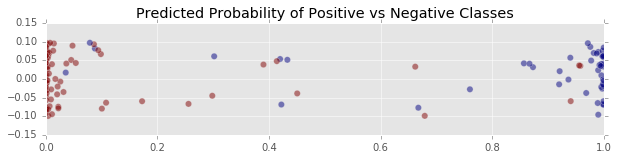

In [289]:
fig, ax = plt.subplots(figsize=(10,2))

_ = ax.scatter(pred_prob_dx[:,0], make_jitter(pred_prob_dx[:,0]), c=np.vectorize(dx_dict.get)(y_test_small),
           s=40, alpha=0.5)
_ = ax.set_xlim(0,1)
_ = ax.set_title('Predicted Probability of Positive vs Negative Classes')

In [291]:
y_test_small.shape

(121,)

In [292]:
from sklearn.metrics import roc_curve, auc

In [297]:
y_test_small

282    3.0
597    1.0
123    3.0
325    1.0
419    1.0
430    3.0
28     1.0
93     1.0
295    3.0
400    3.0
530    3.0
164    1.0
521    3.0
81     1.0
595    3.0
84     1.0
316    3.0
350    3.0
449    1.0
458    3.0
420    3.0
237    3.0
571    3.0
600    3.0
570    1.0
413    3.0
27     3.0
557    1.0
568    3.0
412    1.0
      ... 
145    3.0
464    1.0
565    1.0
593    3.0
319    3.0
532    1.0
370    1.0
323    3.0
242    1.0
327    1.0
42     3.0
218    3.0
482    1.0
130    3.0
328    3.0
460    3.0
378    1.0
155    3.0
45     3.0
368    3.0
134    1.0
392    3.0
390    3.0
528    1.0
515    3.0
424    3.0
522    1.0
537    3.0
34     3.0
578    1.0
Name: DX, Length: 121, dtype: float64

In [302]:
fpr, tpr, thresholds = roc_curve(y_test_small, prob_dx, pos_label=3, drop_intermediate=False)
roc_auc = auc(fpr, tpr)

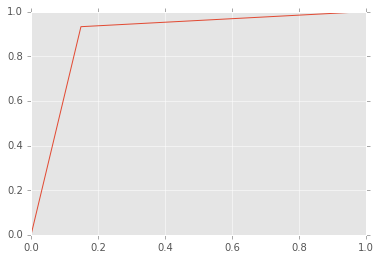

In [303]:
plt.plot(fpr, tpr)

## Random Forest Model

In [306]:
from sklearn.ensemble import RandomForestClassifier

In [305]:
X_train_DX = train_data.drop(columns=['DX','DXSUB'])
y_train_DX = train_data['DX']

In [308]:
rf_train_dx_acc, rf_test_dx_acc = cv(X_train_DX.values, y_train_DX.values,
                                    RandomForestClassifier(), n_folds=10,
                                    metric=accuracy_score)

Train on 14166 samples, validate on 1575 samples
Epoch 1/10000
 - 4s - loss: 1.1092 - val_loss: 1.0423
Epoch 2/10000
 - 0s - loss: 1.1071 - val_loss: 1.0419
Epoch 3/10000
 - 0s - loss: 1.1056 - val_loss: 1.0414
Epoch 4/10000
 - 0s - loss: 1.1041 - val_loss: 1.0409
Epoch 5/10000
 - 0s - loss: 1.1027 - val_loss: 1.0405
Epoch 6/10000
 - 0s - loss: 1.1013 - val_loss: 1.0400
Epoch 7/10000
 - 0s - loss: 1.0998 - val_loss: 1.0395
Epoch 8/10000
 - 0s - loss: 1.0983 - val_loss: 1.0391
Epoch 9/10000
 - 0s - loss: 1.0968 - val_loss: 1.0386
Epoch 10/10000
 - 0s - loss: 1.0952 - val_loss: 1.0381
Epoch 11/10000
 - 0s - loss: 1.0937 - val_loss: 1.0376
Epoch 12/10000
 - 0s - loss: 1.0921 - val_loss: 1.0371
Epoch 13/10000
 - 0s - loss: 1.0905 - val_loss: 1.0366
Epoch 14/10000
 - 0s - loss: 1.0889 - val_loss: 1.0361
Epoch 15/10000
 - 0s - loss: 1.0872 - val_loss: 1.0356
Epoch 16/10000
 - 0s - loss: 1.0856 - val_loss: 1.0351
Epoch 17/10000
 - 0s - loss: 1.0840 - val_loss: 1.0346
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8886 - val_loss: 0.9491
Epoch 150/10000
 - 0s - loss: 0.8869 - val_loss: 0.9480
Epoch 151/10000
 - 0s - loss: 0.8851 - val_loss: 0.9468
Epoch 152/10000
 - 0s - loss: 0.8833 - val_loss: 0.9457
Epoch 153/10000
 - 0s - loss: 0.8815 - val_loss: 0.9445
Epoch 154/10000
 - 0s - loss: 0.8797 - val_loss: 0.9434
Epoch 155/10000
 - 0s - loss: 0.8779 - val_loss: 0.9422
Epoch 156/10000
 - 0s - loss: 0.8761 - val_loss: 0.9410
Epoch 157/10000
 - 0s - loss: 0.8742 - val_loss: 0.9398
Epoch 158/10000
 - 0s - loss: 0.8724 - val_loss: 0.9386
Epoch 159/10000
 - 0s - loss: 0.8706 - val_loss: 0.9374
Epoch 160/10000
 - 0s - loss: 0.8687 - val_loss: 0.9362
Epoch 161/10000
 - 0s - loss: 0.8669 - val_loss: 0.9349
Epoch 162/10000
 - 0s - loss: 0.8650 - val_loss: 0.9337
Epoch 163/10000
 - 0s - loss: 0.8632 - val_loss: 0.9324
Epoch 164/10000
 - 0s - loss: 0.8613 - val_loss: 0.9312
Epoch 165/10000
 - 0s - loss: 0.8594 - val_loss: 0.9299
Epoch 166/10000
 - 0s - loss: 0.8575 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6177 - val_loss: 0.7538
Epoch 297/10000
 - 0s - loss: 0.6162 - val_loss: 0.7527
Epoch 298/10000
 - 0s - loss: 0.6147 - val_loss: 0.7516
Epoch 299/10000
 - 0s - loss: 0.6132 - val_loss: 0.7505
Epoch 300/10000
 - 0s - loss: 0.6117 - val_loss: 0.7495
Epoch 301/10000
 - 0s - loss: 0.6102 - val_loss: 0.7484
Epoch 302/10000
 - 0s - loss: 0.6088 - val_loss: 0.7474
Epoch 303/10000
 - 0s - loss: 0.6073 - val_loss: 0.7463
Epoch 304/10000
 - 0s - loss: 0.6058 - val_loss: 0.7453
Epoch 305/10000
 - 0s - loss: 0.6044 - val_loss: 0.7443
Epoch 306/10000
 - 0s - loss: 0.6030 - val_loss: 0.7433
Epoch 307/10000
 - 0s - loss: 0.6015 - val_loss: 0.7422
Epoch 308/10000
 - 0s - loss: 0.6001 - val_loss: 0.7413
Epoch 309/10000
 - 0s - loss: 0.5987 - val_loss: 0.7402
Epoch 310/10000
 - 0s - loss: 0.5973 - val_loss: 0.7393
Epoch 311/10000
 - 0s - loss: 0.5958 - val_loss: 0.7383
Epoch 312/10000
 - 0s - loss: 0.5944 - val_loss: 0.7373
Epoch 313/10000
 - 0s - loss: 0.5931 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4581 - val_loss: 0.6522
Epoch 444/10000
 - 0s - loss: 0.4573 - val_loss: 0.6518
Epoch 445/10000
 - 0s - loss: 0.4566 - val_loss: 0.6514
Epoch 446/10000
 - 0s - loss: 0.4558 - val_loss: 0.6510
Epoch 447/10000
 - 0s - loss: 0.4551 - val_loss: 0.6507
Epoch 448/10000
 - 0s - loss: 0.4543 - val_loss: 0.6503
Epoch 449/10000
 - 0s - loss: 0.4536 - val_loss: 0.6499
Epoch 450/10000
 - 0s - loss: 0.4528 - val_loss: 0.6495
Epoch 451/10000
 - 0s - loss: 0.4521 - val_loss: 0.6492
Epoch 452/10000
 - 0s - loss: 0.4514 - val_loss: 0.6488
Epoch 453/10000
 - 0s - loss: 0.4506 - val_loss: 0.6484
Epoch 454/10000
 - 0s - loss: 0.4499 - val_loss: 0.6481
Epoch 455/10000
 - 0s - loss: 0.4492 - val_loss: 0.6477
Epoch 456/10000
 - 0s - loss: 0.4485 - val_loss: 0.6474
Epoch 457/10000
 - 0s - loss: 0.4478 - val_loss: 0.6470
Epoch 458/10000
 - 0s - loss: 0.4470 - val_loss: 0.6467
Epoch 459/10000
 - 0s - loss: 0.4463 - val_loss: 0.6463
Epoch 460/10000
 - 0s - loss: 0.4456 - val_loss:

Epoch 58/10000
 - 0s - loss: 1.0069 - val_loss: 1.1157
Epoch 59/10000
 - 0s - loss: 1.0055 - val_loss: 1.1152
Epoch 60/10000
 - 0s - loss: 1.0040 - val_loss: 1.1146
Epoch 61/10000
 - 0s - loss: 1.0025 - val_loss: 1.1141
Epoch 62/10000
 - 0s - loss: 1.0010 - val_loss: 1.1136
Epoch 63/10000
 - 0s - loss: 0.9996 - val_loss: 1.1130
Epoch 64/10000
 - 0s - loss: 0.9981 - val_loss: 1.1125
Epoch 65/10000
 - 0s - loss: 0.9966 - val_loss: 1.1119
Epoch 66/10000
 - 0s - loss: 0.9952 - val_loss: 1.1113
Epoch 67/10000
 - 0s - loss: 0.9937 - val_loss: 1.1108
Epoch 68/10000
 - 0s - loss: 0.9922 - val_loss: 1.1102
Epoch 69/10000
 - 0s - loss: 0.9908 - val_loss: 1.1096
Epoch 70/10000
 - 0s - loss: 0.9893 - val_loss: 1.1091
Epoch 71/10000
 - 0s - loss: 0.9879 - val_loss: 1.1085
Epoch 72/10000
 - 0s - loss: 0.9864 - val_loss: 1.1079
Epoch 73/10000
 - 0s - loss: 0.9850 - val_loss: 1.1073
Epoch 74/10000
 - 0s - loss: 0.9835 - val_loss: 1.1067
Epoch 75/10000
 - 0s - loss: 0.9821 - val_loss: 1.1061
Epoch 76/1

 - 0s - loss: 0.7580 - val_loss: 0.9661
Epoch 206/10000
 - 0s - loss: 0.7561 - val_loss: 0.9647
Epoch 207/10000
 - 0s - loss: 0.7542 - val_loss: 0.9633
Epoch 208/10000
 - 0s - loss: 0.7523 - val_loss: 0.9619
Epoch 209/10000
 - 0s - loss: 0.7504 - val_loss: 0.9605
Epoch 210/10000
 - 0s - loss: 0.7485 - val_loss: 0.9592
Epoch 211/10000
 - 0s - loss: 0.7466 - val_loss: 0.9578
Epoch 212/10000
 - 0s - loss: 0.7447 - val_loss: 0.9564
Epoch 213/10000
 - 0s - loss: 0.7428 - val_loss: 0.9550
Epoch 214/10000
 - 0s - loss: 0.7409 - val_loss: 0.9536
Epoch 215/10000
 - 0s - loss: 0.7390 - val_loss: 0.9522
Epoch 216/10000
 - 0s - loss: 0.7372 - val_loss: 0.9509
Epoch 217/10000
 - 0s - loss: 0.7353 - val_loss: 0.9495
Epoch 218/10000
 - 0s - loss: 0.7334 - val_loss: 0.9481
Epoch 219/10000
 - 0s - loss: 0.7316 - val_loss: 0.9467
Epoch 220/10000
 - 0s - loss: 0.7297 - val_loss: 0.9454
Epoch 221/10000
 - 0s - loss: 0.7278 - val_loss: 0.9440
Epoch 222/10000
 - 0s - loss: 0.7260 - val_loss: 0.9426
Epoch 22

Epoch 352/10000
 - 0s - loss: 0.5292 - val_loss: 0.8033
Epoch 353/10000
 - 0s - loss: 0.5281 - val_loss: 0.8025
Epoch 354/10000
 - 0s - loss: 0.5269 - val_loss: 0.8018
Epoch 355/10000
 - 0s - loss: 0.5258 - val_loss: 0.8010
Epoch 356/10000
 - 0s - loss: 0.5246 - val_loss: 0.8002
Epoch 357/10000
 - 0s - loss: 0.5235 - val_loss: 0.7995
Epoch 358/10000
 - 0s - loss: 0.5224 - val_loss: 0.7987
Epoch 359/10000
 - 0s - loss: 0.5212 - val_loss: 0.7980
Epoch 360/10000
 - 0s - loss: 0.5201 - val_loss: 0.7972
Epoch 361/10000
 - 0s - loss: 0.5190 - val_loss: 0.7965
Epoch 362/10000
 - 0s - loss: 0.5179 - val_loss: 0.7957
Epoch 363/10000
 - 0s - loss: 0.5168 - val_loss: 0.7950
Epoch 364/10000
 - 0s - loss: 0.5157 - val_loss: 0.7943
Epoch 365/10000
 - 0s - loss: 0.5146 - val_loss: 0.7935
Epoch 366/10000
 - 0s - loss: 0.5135 - val_loss: 0.7928
Epoch 367/10000
 - 0s - loss: 0.5124 - val_loss: 0.7921
Epoch 368/10000
 - 0s - loss: 0.5113 - val_loss: 0.7914
Epoch 369/10000
 - 0s - loss: 0.5102 - val_loss:

Epoch 499/10000
 - 0s - loss: 0.4042 - val_loss: 0.7232
Epoch 500/10000
 - 0s - loss: 0.4036 - val_loss: 0.7228
Epoch 501/10000
 - 0s - loss: 0.4030 - val_loss: 0.7224
Epoch 502/10000
 - 0s - loss: 0.4024 - val_loss: 0.7221
Epoch 503/10000
 - 0s - loss: 0.4018 - val_loss: 0.7218
Epoch 504/10000
 - 0s - loss: 0.4012 - val_loss: 0.7214
Epoch 505/10000
 - 0s - loss: 0.4006 - val_loss: 0.7211
Epoch 506/10000
 - 0s - loss: 0.4001 - val_loss: 0.7207
Epoch 507/10000
 - 0s - loss: 0.3995 - val_loss: 0.7204
Epoch 508/10000
 - 0s - loss: 0.3989 - val_loss: 0.7201
Epoch 509/10000
 - 0s - loss: 0.3983 - val_loss: 0.7197
Epoch 510/10000
 - 0s - loss: 0.3978 - val_loss: 0.7194
Epoch 511/10000
 - 0s - loss: 0.3972 - val_loss: 0.7191
Epoch 512/10000
 - 0s - loss: 0.3966 - val_loss: 0.7187
Epoch 513/10000
 - 0s - loss: 0.3961 - val_loss: 0.7184
Epoch 514/10000
 - 0s - loss: 0.3955 - val_loss: 0.7181
Epoch 515/10000
 - 0s - loss: 0.3949 - val_loss: 0.7178
Epoch 516/10000
 - 0s - loss: 0.3944 - val_loss:

Epoch 57/10000
 - 0s - loss: 0.9969 - val_loss: 1.1274
Epoch 58/10000
 - 0s - loss: 0.9955 - val_loss: 1.1267
Epoch 59/10000
 - 0s - loss: 0.9941 - val_loss: 1.1260
Epoch 60/10000
 - 0s - loss: 0.9927 - val_loss: 1.1254
Epoch 61/10000
 - 0s - loss: 0.9913 - val_loss: 1.1247
Epoch 62/10000
 - 0s - loss: 0.9899 - val_loss: 1.1240
Epoch 63/10000
 - 0s - loss: 0.9885 - val_loss: 1.1234
Epoch 64/10000
 - 0s - loss: 0.9872 - val_loss: 1.1227
Epoch 65/10000
 - 0s - loss: 0.9858 - val_loss: 1.1220
Epoch 66/10000
 - 0s - loss: 0.9844 - val_loss: 1.1213
Epoch 67/10000
 - 0s - loss: 0.9830 - val_loss: 1.1206
Epoch 68/10000
 - 0s - loss: 0.9816 - val_loss: 1.1199
Epoch 69/10000
 - 0s - loss: 0.9803 - val_loss: 1.1192
Epoch 70/10000
 - 0s - loss: 0.9789 - val_loss: 1.1184
Epoch 71/10000
 - 0s - loss: 0.9775 - val_loss: 1.1177
Epoch 72/10000
 - 0s - loss: 0.9761 - val_loss: 1.1169
Epoch 73/10000
 - 0s - loss: 0.9747 - val_loss: 1.1162
Epoch 74/10000
 - 0s - loss: 0.9733 - val_loss: 1.1154
Epoch 75/1

 - 0s - loss: 0.7466 - val_loss: 0.9384
Epoch 205/10000
 - 0s - loss: 0.7447 - val_loss: 0.9368
Epoch 206/10000
 - 0s - loss: 0.7428 - val_loss: 0.9352
Epoch 207/10000
 - 0s - loss: 0.7409 - val_loss: 0.9336
Epoch 208/10000
 - 0s - loss: 0.7390 - val_loss: 0.9320
Epoch 209/10000
 - 0s - loss: 0.7371 - val_loss: 0.9305
Epoch 210/10000
 - 0s - loss: 0.7353 - val_loss: 0.9289
Epoch 211/10000
 - 0s - loss: 0.7334 - val_loss: 0.9273
Epoch 212/10000
 - 0s - loss: 0.7315 - val_loss: 0.9258
Epoch 213/10000
 - 0s - loss: 0.7297 - val_loss: 0.9242
Epoch 214/10000
 - 0s - loss: 0.7278 - val_loss: 0.9227
Epoch 215/10000
 - 0s - loss: 0.7260 - val_loss: 0.9211
Epoch 216/10000
 - 0s - loss: 0.7241 - val_loss: 0.9196
Epoch 217/10000
 - 0s - loss: 0.7223 - val_loss: 0.9181
Epoch 218/10000
 - 0s - loss: 0.7205 - val_loss: 0.9166
Epoch 219/10000
 - 0s - loss: 0.7186 - val_loss: 0.9151
Epoch 220/10000
 - 0s - loss: 0.7168 - val_loss: 0.9136
Epoch 221/10000
 - 0s - loss: 0.7150 - val_loss: 0.9121
Epoch 22

Epoch 351/10000
 - 0s - loss: 0.5331 - val_loss: 0.7835
Epoch 352/10000
 - 0s - loss: 0.5321 - val_loss: 0.7829
Epoch 353/10000
 - 0s - loss: 0.5311 - val_loss: 0.7823
Epoch 354/10000
 - 0s - loss: 0.5301 - val_loss: 0.7817
Epoch 355/10000
 - 0s - loss: 0.5291 - val_loss: 0.7812
Epoch 356/10000
 - 0s - loss: 0.5280 - val_loss: 0.7806
Epoch 357/10000
 - 0s - loss: 0.5270 - val_loss: 0.7800
Epoch 358/10000
 - 0s - loss: 0.5260 - val_loss: 0.7795
Epoch 359/10000
 - 0s - loss: 0.5250 - val_loss: 0.7789
Epoch 360/10000
 - 0s - loss: 0.5240 - val_loss: 0.7783
Epoch 361/10000
 - 0s - loss: 0.5230 - val_loss: 0.7778
Epoch 362/10000
 - 0s - loss: 0.5221 - val_loss: 0.7773
Epoch 363/10000
 - 0s - loss: 0.5211 - val_loss: 0.7767
Epoch 364/10000
 - 0s - loss: 0.5201 - val_loss: 0.7762
Epoch 365/10000
 - 0s - loss: 0.5191 - val_loss: 0.7757
Epoch 366/10000
 - 0s - loss: 0.5182 - val_loss: 0.7751
Epoch 367/10000
 - 0s - loss: 0.5172 - val_loss: 0.7746
Epoch 368/10000
 - 0s - loss: 0.5162 - val_loss:

Epoch 498/10000
 - 0s - loss: 0.4178 - val_loss: 0.7302
Epoch 499/10000
 - 0s - loss: 0.4172 - val_loss: 0.7300
Epoch 500/10000
 - 0s - loss: 0.4166 - val_loss: 0.7298
Epoch 501/10000
 - 0s - loss: 0.4160 - val_loss: 0.7296
Epoch 502/10000
 - 0s - loss: 0.4154 - val_loss: 0.7294
Epoch 503/10000
 - 0s - loss: 0.4148 - val_loss: 0.7292
Epoch 504/10000
 - 0s - loss: 0.4142 - val_loss: 0.7290
Epoch 505/10000
 - 0s - loss: 0.4136 - val_loss: 0.7287
Epoch 506/10000
 - 0s - loss: 0.4130 - val_loss: 0.7286
Epoch 507/10000
 - 0s - loss: 0.4124 - val_loss: 0.7283
Epoch 508/10000
 - 0s - loss: 0.4118 - val_loss: 0.7282
Epoch 509/10000
 - 0s - loss: 0.4112 - val_loss: 0.7279
Epoch 510/10000
 - 0s - loss: 0.4106 - val_loss: 0.7278
Epoch 511/10000
 - 0s - loss: 0.4101 - val_loss: 0.7276
Epoch 512/10000
 - 0s - loss: 0.4095 - val_loss: 0.7274
Epoch 513/10000
 - 0s - loss: 0.4089 - val_loss: 0.7272
Train on 3559 samples, validate on 396 samples
Epoch 1/10000
 - 4s - loss: 1.0833 - val_loss: 1.0591
Epo

Epoch 133/10000
 - 0s - loss: 0.8459 - val_loss: 0.9723
Epoch 134/10000
 - 0s - loss: 0.8439 - val_loss: 0.9712
Epoch 135/10000
 - 0s - loss: 0.8420 - val_loss: 0.9702
Epoch 136/10000
 - 0s - loss: 0.8401 - val_loss: 0.9692
Epoch 137/10000
 - 0s - loss: 0.8381 - val_loss: 0.9681
Epoch 138/10000
 - 0s - loss: 0.8362 - val_loss: 0.9671
Epoch 139/10000
 - 0s - loss: 0.8342 - val_loss: 0.9660
Epoch 140/10000
 - 0s - loss: 0.8323 - val_loss: 0.9650
Epoch 141/10000
 - 0s - loss: 0.8304 - val_loss: 0.9639
Epoch 142/10000
 - 0s - loss: 0.8284 - val_loss: 0.9628
Epoch 143/10000
 - 0s - loss: 0.8264 - val_loss: 0.9618
Epoch 144/10000
 - 0s - loss: 0.8245 - val_loss: 0.9607
Epoch 145/10000
 - 0s - loss: 0.8225 - val_loss: 0.9596
Epoch 146/10000
 - 0s - loss: 0.8206 - val_loss: 0.9585
Epoch 147/10000
 - 0s - loss: 0.8186 - val_loss: 0.9575
Epoch 148/10000
 - 0s - loss: 0.8166 - val_loss: 0.9564
Epoch 149/10000
 - 0s - loss: 0.8146 - val_loss: 0.9553
Epoch 150/10000
 - 0s - loss: 0.8127 - val_loss:

Epoch 280/10000
 - 0s - loss: 0.5627 - val_loss: 0.8248
Epoch 281/10000
 - 0s - loss: 0.5610 - val_loss: 0.8240
Epoch 282/10000
 - 0s - loss: 0.5593 - val_loss: 0.8233
Epoch 283/10000
 - 0s - loss: 0.5577 - val_loss: 0.8226
Epoch 284/10000
 - 0s - loss: 0.5560 - val_loss: 0.8219
Epoch 285/10000
 - 0s - loss: 0.5544 - val_loss: 0.8213
Epoch 286/10000
 - 0s - loss: 0.5527 - val_loss: 0.8206
Epoch 287/10000
 - 0s - loss: 0.5511 - val_loss: 0.8199
Epoch 288/10000
 - 0s - loss: 0.5494 - val_loss: 0.8192
Epoch 289/10000
 - 0s - loss: 0.5478 - val_loss: 0.8186
Epoch 290/10000
 - 0s - loss: 0.5462 - val_loss: 0.8179
Epoch 291/10000
 - 0s - loss: 0.5446 - val_loss: 0.8173
Epoch 292/10000
 - 0s - loss: 0.5430 - val_loss: 0.8166
Epoch 293/10000
 - 0s - loss: 0.5414 - val_loss: 0.8160
Epoch 294/10000
 - 0s - loss: 0.5398 - val_loss: 0.8154
Epoch 295/10000
 - 0s - loss: 0.5382 - val_loss: 0.8147
Epoch 296/10000
 - 0s - loss: 0.5366 - val_loss: 0.8141
Epoch 297/10000
 - 0s - loss: 0.5350 - val_loss:

Epoch 42/10000
 - 0s - loss: 1.0473 - val_loss: 1.0702
Epoch 43/10000
 - 0s - loss: 1.0457 - val_loss: 1.0698
Epoch 44/10000
 - 0s - loss: 1.0441 - val_loss: 1.0694
Epoch 45/10000
 - 0s - loss: 1.0425 - val_loss: 1.0690
Epoch 46/10000
 - 0s - loss: 1.0410 - val_loss: 1.0686
Epoch 47/10000
 - 0s - loss: 1.0394 - val_loss: 1.0682
Epoch 48/10000
 - 0s - loss: 1.0378 - val_loss: 1.0678
Epoch 49/10000
 - 0s - loss: 1.0363 - val_loss: 1.0674
Epoch 50/10000
 - 0s - loss: 1.0348 - val_loss: 1.0670
Epoch 51/10000
 - 0s - loss: 1.0332 - val_loss: 1.0666
Epoch 52/10000
 - 0s - loss: 1.0317 - val_loss: 1.0662
Epoch 53/10000
 - 0s - loss: 1.0302 - val_loss: 1.0658
Epoch 54/10000
 - 0s - loss: 1.0287 - val_loss: 1.0654
Epoch 55/10000
 - 0s - loss: 1.0272 - val_loss: 1.0650
Epoch 56/10000
 - 0s - loss: 1.0257 - val_loss: 1.0646
Epoch 57/10000
 - 0s - loss: 1.0242 - val_loss: 1.0642
Epoch 58/10000
 - 0s - loss: 1.0227 - val_loss: 1.0638
Epoch 59/10000
 - 0s - loss: 1.0213 - val_loss: 1.0633
Epoch 60/1

Epoch 190/10000
 - 0s - loss: 0.8165 - val_loss: 0.9604
Epoch 191/10000
 - 0s - loss: 0.8146 - val_loss: 0.9590
Epoch 192/10000
 - 0s - loss: 0.8127 - val_loss: 0.9578
Epoch 193/10000
 - 0s - loss: 0.8108 - val_loss: 0.9564
Epoch 194/10000
 - 0s - loss: 0.8089 - val_loss: 0.9551
Epoch 195/10000
 - 0s - loss: 0.8069 - val_loss: 0.9538
Epoch 196/10000
 - 0s - loss: 0.8050 - val_loss: 0.9525
Epoch 197/10000
 - 0s - loss: 0.8031 - val_loss: 0.9512
Epoch 198/10000
 - 0s - loss: 0.8012 - val_loss: 0.9499
Epoch 199/10000
 - 0s - loss: 0.7992 - val_loss: 0.9485
Epoch 200/10000
 - 0s - loss: 0.7973 - val_loss: 0.9472
Epoch 201/10000
 - 0s - loss: 0.7954 - val_loss: 0.9458
Epoch 202/10000
 - 0s - loss: 0.7934 - val_loss: 0.9445
Epoch 203/10000
 - 0s - loss: 0.7915 - val_loss: 0.9431
Epoch 204/10000
 - 0s - loss: 0.7895 - val_loss: 0.9418
Epoch 205/10000
 - 0s - loss: 0.7876 - val_loss: 0.9404
Epoch 206/10000
 - 0s - loss: 0.7856 - val_loss: 0.9391
Epoch 207/10000
 - 0s - loss: 0.7837 - val_loss:

Epoch 337/10000
 - 0s - loss: 0.5570 - val_loss: 0.7753
Epoch 338/10000
 - 0s - loss: 0.5556 - val_loss: 0.7743
Epoch 339/10000
 - 0s - loss: 0.5543 - val_loss: 0.7733
Epoch 340/10000
 - 0s - loss: 0.5530 - val_loss: 0.7724
Epoch 341/10000
 - 0s - loss: 0.5516 - val_loss: 0.7714
Epoch 342/10000
 - 0s - loss: 0.5503 - val_loss: 0.7705
Epoch 343/10000
 - 0s - loss: 0.5490 - val_loss: 0.7695
Epoch 344/10000
 - 0s - loss: 0.5477 - val_loss: 0.7686
Epoch 345/10000
 - 0s - loss: 0.5464 - val_loss: 0.7677
Epoch 346/10000
 - 0s - loss: 0.5451 - val_loss: 0.7667
Epoch 347/10000
 - 0s - loss: 0.5439 - val_loss: 0.7658
Epoch 348/10000
 - 0s - loss: 0.5426 - val_loss: 0.7649
Epoch 349/10000
 - 0s - loss: 0.5413 - val_loss: 0.7640
Epoch 350/10000
 - 0s - loss: 0.5400 - val_loss: 0.7631
Epoch 351/10000
 - 0s - loss: 0.5388 - val_loss: 0.7621
Epoch 352/10000
 - 0s - loss: 0.5375 - val_loss: 0.7613
Epoch 353/10000
 - 0s - loss: 0.5363 - val_loss: 0.7603
Epoch 354/10000
 - 0s - loss: 0.5351 - val_loss:

Epoch 484/10000
 - 0s - loss: 0.4182 - val_loss: 0.6777
Epoch 485/10000
 - 0s - loss: 0.4176 - val_loss: 0.6773
Epoch 486/10000
 - 0s - loss: 0.4169 - val_loss: 0.6769
Epoch 487/10000
 - 0s - loss: 0.4163 - val_loss: 0.6765
Epoch 488/10000
 - 0s - loss: 0.4157 - val_loss: 0.6761
Epoch 489/10000
 - 0s - loss: 0.4151 - val_loss: 0.6757
Epoch 490/10000
 - 0s - loss: 0.4144 - val_loss: 0.6753
Epoch 491/10000
 - 0s - loss: 0.4138 - val_loss: 0.6749
Epoch 492/10000
 - 0s - loss: 0.4132 - val_loss: 0.6746
Epoch 493/10000
 - 0s - loss: 0.4126 - val_loss: 0.6742
Epoch 494/10000
 - 0s - loss: 0.4120 - val_loss: 0.6738
Epoch 495/10000
 - 0s - loss: 0.4114 - val_loss: 0.6735
Epoch 496/10000
 - 0s - loss: 0.4108 - val_loss: 0.6731
Epoch 497/10000
 - 0s - loss: 0.4102 - val_loss: 0.6727
Epoch 498/10000
 - 0s - loss: 0.4096 - val_loss: 0.6724
Epoch 499/10000
 - 0s - loss: 0.4090 - val_loss: 0.6720
Epoch 500/10000
 - 0s - loss: 0.4084 - val_loss: 0.6717
Epoch 501/10000
 - 0s - loss: 0.4078 - val_loss:

 - 0s - loss: 1.0187 - val_loss: 1.1156
Epoch 61/10000
 - 0s - loss: 1.0173 - val_loss: 1.1151
Epoch 62/10000
 - 0s - loss: 1.0159 - val_loss: 1.1146
Epoch 63/10000
 - 0s - loss: 1.0144 - val_loss: 1.1142
Epoch 64/10000
 - 0s - loss: 1.0130 - val_loss: 1.1137
Epoch 65/10000
 - 0s - loss: 1.0116 - val_loss: 1.1133
Epoch 66/10000
 - 0s - loss: 1.0102 - val_loss: 1.1128
Epoch 67/10000
 - 0s - loss: 1.0088 - val_loss: 1.1123
Epoch 68/10000
 - 0s - loss: 1.0074 - val_loss: 1.1119
Epoch 69/10000
 - 0s - loss: 1.0060 - val_loss: 1.1114
Epoch 70/10000
 - 0s - loss: 1.0046 - val_loss: 1.1109
Epoch 71/10000
 - 0s - loss: 1.0032 - val_loss: 1.1105
Epoch 72/10000
 - 0s - loss: 1.0018 - val_loss: 1.1100
Epoch 73/10000
 - 0s - loss: 1.0004 - val_loss: 1.1095
Epoch 74/10000
 - 0s - loss: 0.9990 - val_loss: 1.1090
Epoch 75/10000
 - 0s - loss: 0.9976 - val_loss: 1.1085
Epoch 76/10000
 - 0s - loss: 0.9962 - val_loss: 1.1080
Epoch 77/10000
 - 0s - loss: 0.9949 - val_loss: 1.1075
Epoch 78/10000
 - 0s - lo

 - 0s - loss: 0.7799 - val_loss: 0.9739
Epoch 208/10000
 - 0s - loss: 0.7780 - val_loss: 0.9724
Epoch 209/10000
 - 0s - loss: 0.7760 - val_loss: 0.9708
Epoch 210/10000
 - 0s - loss: 0.7741 - val_loss: 0.9693
Epoch 211/10000
 - 0s - loss: 0.7721 - val_loss: 0.9677
Epoch 212/10000
 - 0s - loss: 0.7701 - val_loss: 0.9661
Epoch 213/10000
 - 0s - loss: 0.7682 - val_loss: 0.9646
Epoch 214/10000
 - 0s - loss: 0.7662 - val_loss: 0.9630
Epoch 215/10000
 - 0s - loss: 0.7642 - val_loss: 0.9614
Epoch 216/10000
 - 0s - loss: 0.7623 - val_loss: 0.9598
Epoch 217/10000
 - 0s - loss: 0.7603 - val_loss: 0.9582
Epoch 218/10000
 - 0s - loss: 0.7584 - val_loss: 0.9566
Epoch 219/10000
 - 0s - loss: 0.7564 - val_loss: 0.9551
Epoch 220/10000
 - 0s - loss: 0.7544 - val_loss: 0.9535
Epoch 221/10000
 - 0s - loss: 0.7525 - val_loss: 0.9519
Epoch 222/10000
 - 0s - loss: 0.7505 - val_loss: 0.9503
Epoch 223/10000
 - 0s - loss: 0.7486 - val_loss: 0.9487
Epoch 224/10000
 - 0s - loss: 0.7466 - val_loss: 0.9471
Epoch 22

Epoch 354/10000
 - 0s - loss: 0.5371 - val_loss: 0.7684
Epoch 355/10000
 - 0s - loss: 0.5360 - val_loss: 0.7674
Epoch 356/10000
 - 0s - loss: 0.5348 - val_loss: 0.7664
Epoch 357/10000
 - 0s - loss: 0.5336 - val_loss: 0.7654
Epoch 358/10000
 - 0s - loss: 0.5324 - val_loss: 0.7644
Epoch 359/10000
 - 0s - loss: 0.5313 - val_loss: 0.7635
Epoch 360/10000
 - 0s - loss: 0.5301 - val_loss: 0.7624
Epoch 361/10000
 - 0s - loss: 0.5290 - val_loss: 0.7615
Epoch 362/10000
 - 0s - loss: 0.5278 - val_loss: 0.7605
Epoch 363/10000
 - 0s - loss: 0.5267 - val_loss: 0.7596
Epoch 364/10000
 - 0s - loss: 0.5256 - val_loss: 0.7586
Epoch 365/10000
 - 0s - loss: 0.5244 - val_loss: 0.7577
Epoch 366/10000
 - 0s - loss: 0.5233 - val_loss: 0.7567
Epoch 367/10000
 - 0s - loss: 0.5222 - val_loss: 0.7558
Epoch 368/10000
 - 0s - loss: 0.5211 - val_loss: 0.7548
Epoch 369/10000
 - 0s - loss: 0.5200 - val_loss: 0.7539
Epoch 370/10000
 - 0s - loss: 0.5189 - val_loss: 0.7529
Epoch 371/10000
 - 0s - loss: 0.5178 - val_loss:

Epoch 501/10000
 - 0s - loss: 0.4136 - val_loss: 0.6700
Epoch 502/10000
 - 0s - loss: 0.4130 - val_loss: 0.6695
Epoch 503/10000
 - 0s - loss: 0.4124 - val_loss: 0.6691
Epoch 504/10000
 - 0s - loss: 0.4119 - val_loss: 0.6687
Epoch 505/10000
 - 0s - loss: 0.4113 - val_loss: 0.6683
Epoch 506/10000
 - 0s - loss: 0.4107 - val_loss: 0.6678
Epoch 507/10000
 - 0s - loss: 0.4101 - val_loss: 0.6675
Epoch 508/10000
 - 0s - loss: 0.4095 - val_loss: 0.6670
Epoch 509/10000
 - 0s - loss: 0.4090 - val_loss: 0.6667
Epoch 510/10000
 - 0s - loss: 0.4084 - val_loss: 0.6662
Epoch 511/10000
 - 0s - loss: 0.4078 - val_loss: 0.6659
Epoch 512/10000
 - 0s - loss: 0.4073 - val_loss: 0.6655
Epoch 513/10000
 - 0s - loss: 0.4067 - val_loss: 0.6651
Epoch 514/10000
 - 0s - loss: 0.4061 - val_loss: 0.6647
Epoch 515/10000
 - 0s - loss: 0.4056 - val_loss: 0.6644
Epoch 516/10000
 - 0s - loss: 0.4050 - val_loss: 0.6639
Epoch 517/10000
 - 0s - loss: 0.4044 - val_loss: 0.6636
Epoch 518/10000
 - 0s - loss: 0.4039 - val_loss:

In [309]:
rf_train_dx_mse, rf_test_dx_mse = cv(X_train_DX.values, y_train_DX.values,
                                    RandomForestClassifier(), n_folds=10,
                                    metric=mean_squared_error)

Train on 14166 samples, validate on 1575 samples
Epoch 1/10000
 - 4s - loss: 1.1045 - val_loss: 1.0092
Epoch 2/10000
 - 0s - loss: 1.1022 - val_loss: 1.0088
Epoch 3/10000
 - 0s - loss: 1.1006 - val_loss: 1.0082
Epoch 4/10000
 - 0s - loss: 1.0988 - val_loss: 1.0077
Epoch 5/10000
 - 0s - loss: 1.0973 - val_loss: 1.0072
Epoch 6/10000
 - 0s - loss: 1.0958 - val_loss: 1.0067
Epoch 7/10000
 - 0s - loss: 1.0942 - val_loss: 1.0062
Epoch 8/10000
 - 0s - loss: 1.0926 - val_loss: 1.0057
Epoch 9/10000
 - 0s - loss: 1.0910 - val_loss: 1.0052
Epoch 10/10000
 - 0s - loss: 1.0893 - val_loss: 1.0046
Epoch 11/10000
 - 0s - loss: 1.0876 - val_loss: 1.0041
Epoch 12/10000
 - 0s - loss: 1.0860 - val_loss: 1.0036
Epoch 13/10000
 - 0s - loss: 1.0843 - val_loss: 1.0031
Epoch 14/10000
 - 0s - loss: 1.0826 - val_loss: 1.0025
Epoch 15/10000
 - 0s - loss: 1.0808 - val_loss: 1.0020
Epoch 16/10000
 - 0s - loss: 1.0791 - val_loss: 1.0015
Epoch 17/10000
 - 0s - loss: 1.0774 - val_loss: 1.0009
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8691 - val_loss: 0.9164
Epoch 150/10000
 - 0s - loss: 0.8672 - val_loss: 0.9154
Epoch 151/10000
 - 0s - loss: 0.8654 - val_loss: 0.9143
Epoch 152/10000
 - 0s - loss: 0.8636 - val_loss: 0.9133
Epoch 153/10000
 - 0s - loss: 0.8618 - val_loss: 0.9122
Epoch 154/10000
 - 0s - loss: 0.8600 - val_loss: 0.9112
Epoch 155/10000
 - 0s - loss: 0.8581 - val_loss: 0.9101
Epoch 156/10000
 - 0s - loss: 0.8563 - val_loss: 0.9091
Epoch 157/10000
 - 0s - loss: 0.8545 - val_loss: 0.9080
Epoch 158/10000
 - 0s - loss: 0.8526 - val_loss: 0.9069
Epoch 159/10000
 - 0s - loss: 0.8508 - val_loss: 0.9058
Epoch 160/10000
 - 0s - loss: 0.8489 - val_loss: 0.9047
Epoch 161/10000
 - 0s - loss: 0.8471 - val_loss: 0.9036
Epoch 162/10000
 - 0s - loss: 0.8452 - val_loss: 0.9025
Epoch 163/10000
 - 0s - loss: 0.8434 - val_loss: 0.9014
Epoch 164/10000
 - 0s - loss: 0.8415 - val_loss: 0.9003
Epoch 165/10000
 - 0s - loss: 0.8396 - val_loss: 0.8991
Epoch 166/10000
 - 0s - loss: 0.8378 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6107 - val_loss: 0.7530
Epoch 297/10000
 - 0s - loss: 0.6093 - val_loss: 0.7521
Epoch 298/10000
 - 0s - loss: 0.6079 - val_loss: 0.7512
Epoch 299/10000
 - 0s - loss: 0.6065 - val_loss: 0.7502
Epoch 300/10000
 - 0s - loss: 0.6050 - val_loss: 0.7493
Epoch 301/10000
 - 0s - loss: 0.6036 - val_loss: 0.7484
Epoch 302/10000
 - 0s - loss: 0.6022 - val_loss: 0.7475
Epoch 303/10000
 - 0s - loss: 0.6008 - val_loss: 0.7466
Epoch 304/10000
 - 0s - loss: 0.5994 - val_loss: 0.7458
Epoch 305/10000
 - 0s - loss: 0.5981 - val_loss: 0.7449
Epoch 306/10000
 - 0s - loss: 0.5967 - val_loss: 0.7440
Epoch 307/10000
 - 0s - loss: 0.5953 - val_loss: 0.7431
Epoch 308/10000
 - 0s - loss: 0.5939 - val_loss: 0.7422
Epoch 309/10000
 - 0s - loss: 0.5926 - val_loss: 0.7414
Epoch 310/10000
 - 0s - loss: 0.5912 - val_loss: 0.7405
Epoch 311/10000
 - 0s - loss: 0.5899 - val_loss: 0.7396
Epoch 312/10000
 - 0s - loss: 0.5885 - val_loss: 0.7388
Epoch 313/10000
 - 0s - loss: 0.5872 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4546 - val_loss: 0.6630
Epoch 444/10000
 - 0s - loss: 0.4539 - val_loss: 0.6627
Epoch 445/10000
 - 0s - loss: 0.4531 - val_loss: 0.6623
Epoch 446/10000
 - 0s - loss: 0.4524 - val_loss: 0.6620
Epoch 447/10000
 - 0s - loss: 0.4517 - val_loss: 0.6617
Epoch 448/10000
 - 0s - loss: 0.4509 - val_loss: 0.6614
Epoch 449/10000
 - 0s - loss: 0.4502 - val_loss: 0.6610
Epoch 450/10000
 - 0s - loss: 0.4495 - val_loss: 0.6608
Epoch 451/10000
 - 0s - loss: 0.4488 - val_loss: 0.6604
Epoch 452/10000
 - 0s - loss: 0.4480 - val_loss: 0.6601
Epoch 453/10000
 - 0s - loss: 0.4473 - val_loss: 0.6598
Epoch 454/10000
 - 0s - loss: 0.4466 - val_loss: 0.6596
Epoch 455/10000
 - 0s - loss: 0.4459 - val_loss: 0.6592
Epoch 456/10000
 - 0s - loss: 0.4452 - val_loss: 0.6590
Epoch 457/10000
 - 0s - loss: 0.4445 - val_loss: 0.6587
Epoch 458/10000
 - 0s - loss: 0.4438 - val_loss: 0.6584
Epoch 459/10000
 - 0s - loss: 0.4431 - val_loss: 0.6581
Epoch 460/10000
 - 0s - loss: 0.4424 - val_loss:

Epoch 95/10000
 - 0s - loss: 0.9339 - val_loss: 1.1975
Epoch 96/10000
 - 0s - loss: 0.9323 - val_loss: 1.1970
Epoch 97/10000
 - 0s - loss: 0.9307 - val_loss: 1.1964
Epoch 98/10000
 - 0s - loss: 0.9291 - val_loss: 1.1959
Epoch 99/10000
 - 0s - loss: 0.9275 - val_loss: 1.1954
Epoch 100/10000
 - 0s - loss: 0.9258 - val_loss: 1.1949
Epoch 101/10000
 - 0s - loss: 0.9242 - val_loss: 1.1943
Epoch 102/10000
 - 0s - loss: 0.9226 - val_loss: 1.1938
Epoch 103/10000
 - 0s - loss: 0.9209 - val_loss: 1.1932
Epoch 104/10000
 - 0s - loss: 0.9193 - val_loss: 1.1927
Epoch 105/10000
 - 0s - loss: 0.9177 - val_loss: 1.1921
Epoch 106/10000
 - 0s - loss: 0.9160 - val_loss: 1.1915
Epoch 107/10000
 - 0s - loss: 0.9144 - val_loss: 1.1909
Epoch 108/10000
 - 0s - loss: 0.9127 - val_loss: 1.1904
Epoch 109/10000
 - 0s - loss: 0.9111 - val_loss: 1.1898
Epoch 110/10000
 - 0s - loss: 0.9094 - val_loss: 1.1891
Epoch 111/10000
 - 0s - loss: 0.9078 - val_loss: 1.1885
Epoch 112/10000
 - 0s - loss: 0.9061 - val_loss: 1.18

Epoch 242/10000
 - 0s - loss: 0.6669 - val_loss: 1.0354
Epoch 243/10000
 - 0s - loss: 0.6651 - val_loss: 1.0339
Epoch 244/10000
 - 0s - loss: 0.6633 - val_loss: 1.0324
Epoch 245/10000
 - 0s - loss: 0.6615 - val_loss: 1.0310
Epoch 246/10000
 - 0s - loss: 0.6596 - val_loss: 1.0295
Epoch 247/10000
 - 0s - loss: 0.6578 - val_loss: 1.0281
Epoch 248/10000
 - 0s - loss: 0.6560 - val_loss: 1.0266
Epoch 249/10000
 - 0s - loss: 0.6542 - val_loss: 1.0252
Epoch 250/10000
 - 0s - loss: 0.6524 - val_loss: 1.0237
Epoch 251/10000
 - 0s - loss: 0.6506 - val_loss: 1.0223
Epoch 252/10000
 - 0s - loss: 0.6488 - val_loss: 1.0209
Epoch 253/10000
 - 0s - loss: 0.6470 - val_loss: 1.0194
Epoch 254/10000
 - 0s - loss: 0.6452 - val_loss: 1.0180
Epoch 255/10000
 - 0s - loss: 0.6435 - val_loss: 1.0166
Epoch 256/10000
 - 0s - loss: 0.6417 - val_loss: 1.0152
Epoch 257/10000
 - 0s - loss: 0.6399 - val_loss: 1.0137
Epoch 258/10000
 - 0s - loss: 0.6381 - val_loss: 1.0123
Epoch 259/10000
 - 0s - loss: 0.6364 - val_loss:

Epoch 389/10000
 - 0s - loss: 0.4572 - val_loss: 0.8750
Epoch 390/10000
 - 0s - loss: 0.4562 - val_loss: 0.8742
Epoch 391/10000
 - 0s - loss: 0.4552 - val_loss: 0.8736
Epoch 392/10000
 - 0s - loss: 0.4542 - val_loss: 0.8729
Epoch 393/10000
 - 0s - loss: 0.4532 - val_loss: 0.8722
Epoch 394/10000
 - 0s - loss: 0.4522 - val_loss: 0.8715
Epoch 395/10000
 - 0s - loss: 0.4512 - val_loss: 0.8708
Epoch 396/10000
 - 0s - loss: 0.4502 - val_loss: 0.8701
Epoch 397/10000
 - 0s - loss: 0.4492 - val_loss: 0.8695
Epoch 398/10000
 - 0s - loss: 0.4482 - val_loss: 0.8688
Epoch 399/10000
 - 0s - loss: 0.4473 - val_loss: 0.8682
Epoch 400/10000
 - 0s - loss: 0.4463 - val_loss: 0.8675
Epoch 401/10000
 - 0s - loss: 0.4453 - val_loss: 0.8668
Epoch 402/10000
 - 0s - loss: 0.4444 - val_loss: 0.8662
Epoch 403/10000
 - 0s - loss: 0.4434 - val_loss: 0.8655
Epoch 404/10000
 - 0s - loss: 0.4425 - val_loss: 0.8649
Epoch 405/10000
 - 0s - loss: 0.4415 - val_loss: 0.8643
Epoch 406/10000
 - 0s - loss: 0.4406 - val_loss:

Epoch 536/10000
 - 0s - loss: 0.3479 - val_loss: 0.8025
Epoch 537/10000
 - 0s - loss: 0.3474 - val_loss: 0.8021
Epoch 538/10000
 - 0s - loss: 0.3469 - val_loss: 0.8018
Epoch 539/10000
 - 0s - loss: 0.3464 - val_loss: 0.8014
Epoch 540/10000
 - 0s - loss: 0.3458 - val_loss: 0.8010
Epoch 541/10000
 - 0s - loss: 0.3453 - val_loss: 0.8007
Epoch 542/10000
 - 0s - loss: 0.3448 - val_loss: 0.8003
Epoch 543/10000
 - 0s - loss: 0.3443 - val_loss: 0.8000
Epoch 544/10000
 - 0s - loss: 0.3437 - val_loss: 0.7996
Epoch 545/10000
 - 0s - loss: 0.3432 - val_loss: 0.7993
Epoch 546/10000
 - 0s - loss: 0.3427 - val_loss: 0.7989
Epoch 547/10000
 - 0s - loss: 0.3422 - val_loss: 0.7986
Epoch 548/10000
 - 0s - loss: 0.3417 - val_loss: 0.7982
Epoch 549/10000
 - 0s - loss: 0.3412 - val_loss: 0.7979
Epoch 550/10000
 - 0s - loss: 0.3407 - val_loss: 0.7975
Epoch 551/10000
 - 0s - loss: 0.3402 - val_loss: 0.7972
Epoch 552/10000
 - 0s - loss: 0.3397 - val_loss: 0.7968
Epoch 553/10000
 - 0s - loss: 0.3392 - val_loss:

Epoch 683/10000
 - 0s - loss: 0.2879 - val_loss: 0.7610
Epoch 684/10000
 - 0s - loss: 0.2876 - val_loss: 0.7608
Epoch 685/10000
 - 0s - loss: 0.2873 - val_loss: 0.7607
Train on 14231 samples, validate on 1582 samples
Epoch 1/10000
 - 4s - loss: 1.1115 - val_loss: 1.0644
Epoch 2/10000
 - 0s - loss: 1.1093 - val_loss: 1.0638
Epoch 3/10000
 - 0s - loss: 1.1077 - val_loss: 1.0633
Epoch 4/10000
 - 0s - loss: 1.1062 - val_loss: 1.0627
Epoch 5/10000
 - 0s - loss: 1.1048 - val_loss: 1.0622
Epoch 6/10000
 - 0s - loss: 1.1033 - val_loss: 1.0616
Epoch 7/10000
 - 0s - loss: 1.1018 - val_loss: 1.0610
Epoch 8/10000
 - 0s - loss: 1.1002 - val_loss: 1.0605
Epoch 9/10000
 - 0s - loss: 1.0987 - val_loss: 1.0599
Epoch 10/10000
 - 0s - loss: 1.0971 - val_loss: 1.0593
Epoch 11/10000
 - 0s - loss: 1.0955 - val_loss: 1.0587
Epoch 12/10000
 - 0s - loss: 1.0938 - val_loss: 1.0581
Epoch 13/10000
 - 0s - loss: 1.0922 - val_loss: 1.0575
Epoch 14/10000
 - 0s - loss: 1.0905 - val_loss: 1.0569
Epoch 15/10000
 - 0s -

Epoch 146/10000
 - 0s - loss: 0.8930 - val_loss: 0.9662
Epoch 147/10000
 - 0s - loss: 0.8913 - val_loss: 0.9651
Epoch 148/10000
 - 0s - loss: 0.8896 - val_loss: 0.9641
Epoch 149/10000
 - 0s - loss: 0.8878 - val_loss: 0.9630
Epoch 150/10000
 - 0s - loss: 0.8861 - val_loss: 0.9619
Epoch 151/10000
 - 0s - loss: 0.8844 - val_loss: 0.9608
Epoch 152/10000
 - 0s - loss: 0.8826 - val_loss: 0.9597
Epoch 153/10000
 - 0s - loss: 0.8809 - val_loss: 0.9586
Epoch 154/10000
 - 0s - loss: 0.8791 - val_loss: 0.9575
Epoch 155/10000
 - 0s - loss: 0.8773 - val_loss: 0.9563
Epoch 156/10000
 - 0s - loss: 0.8755 - val_loss: 0.9552
Epoch 157/10000
 - 0s - loss: 0.8738 - val_loss: 0.9541
Epoch 158/10000
 - 0s - loss: 0.8720 - val_loss: 0.9529
Epoch 159/10000
 - 0s - loss: 0.8702 - val_loss: 0.9517
Epoch 160/10000
 - 0s - loss: 0.8684 - val_loss: 0.9506
Epoch 161/10000
 - 0s - loss: 0.8666 - val_loss: 0.9494
Epoch 162/10000
 - 0s - loss: 0.8648 - val_loss: 0.9482
Epoch 163/10000
 - 0s - loss: 0.8629 - val_loss:

Epoch 293/10000
 - 0s - loss: 0.6264 - val_loss: 0.7849
Epoch 294/10000
 - 0s - loss: 0.6249 - val_loss: 0.7838
Epoch 295/10000
 - 0s - loss: 0.6234 - val_loss: 0.7828
Epoch 296/10000
 - 0s - loss: 0.6219 - val_loss: 0.7818
Epoch 297/10000
 - 0s - loss: 0.6204 - val_loss: 0.7807
Epoch 298/10000
 - 0s - loss: 0.6189 - val_loss: 0.7797
Epoch 299/10000
 - 0s - loss: 0.6174 - val_loss: 0.7787
Epoch 300/10000
 - 0s - loss: 0.6159 - val_loss: 0.7777
Epoch 301/10000
 - 0s - loss: 0.6144 - val_loss: 0.7767
Epoch 302/10000
 - 0s - loss: 0.6129 - val_loss: 0.7757
Epoch 303/10000
 - 0s - loss: 0.6114 - val_loss: 0.7747
Epoch 304/10000
 - 0s - loss: 0.6100 - val_loss: 0.7737
Epoch 305/10000
 - 0s - loss: 0.6085 - val_loss: 0.7727
Epoch 306/10000
 - 0s - loss: 0.6070 - val_loss: 0.7717
Epoch 307/10000
 - 0s - loss: 0.6056 - val_loss: 0.7707
Epoch 308/10000
 - 0s - loss: 0.6041 - val_loss: 0.7697
Epoch 309/10000
 - 0s - loss: 0.6027 - val_loss: 0.7687
Epoch 310/10000
 - 0s - loss: 0.6013 - val_loss:

Epoch 440/10000
 - 0s - loss: 0.4590 - val_loss: 0.6778
Epoch 441/10000
 - 0s - loss: 0.4581 - val_loss: 0.6774
Epoch 442/10000
 - 0s - loss: 0.4573 - val_loss: 0.6770
Epoch 443/10000
 - 0s - loss: 0.4565 - val_loss: 0.6765
Epoch 444/10000
 - 0s - loss: 0.4557 - val_loss: 0.6761
Epoch 445/10000
 - 0s - loss: 0.4550 - val_loss: 0.6757
Epoch 446/10000
 - 0s - loss: 0.4542 - val_loss: 0.6753
Epoch 447/10000
 - 0s - loss: 0.4534 - val_loss: 0.6749
Epoch 448/10000
 - 0s - loss: 0.4526 - val_loss: 0.6744
Epoch 449/10000
 - 0s - loss: 0.4518 - val_loss: 0.6740
Epoch 450/10000
 - 0s - loss: 0.4510 - val_loss: 0.6736
Epoch 451/10000
 - 0s - loss: 0.4503 - val_loss: 0.6732
Epoch 452/10000
 - 0s - loss: 0.4495 - val_loss: 0.6728
Epoch 453/10000
 - 0s - loss: 0.4487 - val_loss: 0.6724
Epoch 454/10000
 - 0s - loss: 0.4480 - val_loss: 0.6721
Epoch 455/10000
 - 0s - loss: 0.4472 - val_loss: 0.6717
Epoch 456/10000
 - 0s - loss: 0.4465 - val_loss: 0.6713
Epoch 457/10000
 - 0s - loss: 0.4457 - val_loss:

Epoch 63/10000
 - 0s - loss: 1.0104 - val_loss: 0.9057
Epoch 64/10000
 - 0s - loss: 1.0088 - val_loss: 0.9054
Epoch 65/10000
 - 0s - loss: 1.0071 - val_loss: 0.9052
Epoch 66/10000
 - 0s - loss: 1.0055 - val_loss: 0.9050
Epoch 67/10000
 - 0s - loss: 1.0038 - val_loss: 0.9048
Epoch 68/10000
 - 0s - loss: 1.0022 - val_loss: 0.9046
Epoch 69/10000
 - 0s - loss: 1.0006 - val_loss: 0.9043
Epoch 70/10000
 - 0s - loss: 0.9990 - val_loss: 0.9041
Epoch 71/10000
 - 0s - loss: 0.9973 - val_loss: 0.9039
Epoch 72/10000
 - 0s - loss: 0.9957 - val_loss: 0.9036
Epoch 73/10000
 - 0s - loss: 0.9941 - val_loss: 0.9034
Epoch 74/10000
 - 0s - loss: 0.9925 - val_loss: 0.9032
Epoch 75/10000
 - 0s - loss: 0.9909 - val_loss: 0.9029
Epoch 76/10000
 - 0s - loss: 0.9892 - val_loss: 0.9027
Epoch 77/10000
 - 0s - loss: 0.9876 - val_loss: 0.9024
Epoch 78/10000
 - 0s - loss: 0.9860 - val_loss: 0.9022
Epoch 79/10000
 - 0s - loss: 0.9844 - val_loss: 0.9019
Epoch 80/10000
 - 0s - loss: 0.9828 - val_loss: 0.9016
Epoch 81/1

Epoch 210/10000
 - 0s - loss: 0.7551 - val_loss: 0.8303
Epoch 211/10000
 - 0s - loss: 0.7532 - val_loss: 0.8295
Epoch 212/10000
 - 0s - loss: 0.7513 - val_loss: 0.8287
Epoch 213/10000
 - 0s - loss: 0.7494 - val_loss: 0.8280
Epoch 214/10000
 - 0s - loss: 0.7476 - val_loss: 0.8272
Epoch 215/10000
 - 0s - loss: 0.7457 - val_loss: 0.8264
Epoch 216/10000
 - 0s - loss: 0.7438 - val_loss: 0.8257
Epoch 217/10000
 - 0s - loss: 0.7419 - val_loss: 0.8249
Epoch 218/10000
 - 0s - loss: 0.7400 - val_loss: 0.8242
Epoch 219/10000
 - 0s - loss: 0.7381 - val_loss: 0.8234
Epoch 220/10000
 - 0s - loss: 0.7362 - val_loss: 0.8226
Epoch 221/10000
 - 0s - loss: 0.7343 - val_loss: 0.8219
Epoch 222/10000
 - 0s - loss: 0.7324 - val_loss: 0.8211
Epoch 223/10000
 - 0s - loss: 0.7306 - val_loss: 0.8204
Epoch 224/10000
 - 0s - loss: 0.7287 - val_loss: 0.8196
Epoch 225/10000
 - 0s - loss: 0.7268 - val_loss: 0.8189
Epoch 226/10000
 - 0s - loss: 0.7249 - val_loss: 0.8181
Epoch 227/10000
 - 0s - loss: 0.7231 - val_loss:

Epoch 357/10000
 - 0s - loss: 0.5141 - val_loss: 0.7521
Epoch 358/10000
 - 0s - loss: 0.5128 - val_loss: 0.7518
Epoch 359/10000
 - 0s - loss: 0.5116 - val_loss: 0.7515
Epoch 360/10000
 - 0s - loss: 0.5103 - val_loss: 0.7512
Epoch 361/10000
 - 0s - loss: 0.5091 - val_loss: 0.7509
Epoch 362/10000
 - 0s - loss: 0.5078 - val_loss: 0.7506
Epoch 363/10000
 - 0s - loss: 0.5066 - val_loss: 0.7503
Epoch 364/10000
 - 0s - loss: 0.5053 - val_loss: 0.7500
Epoch 365/10000
 - 0s - loss: 0.5041 - val_loss: 0.7497
Epoch 366/10000
 - 0s - loss: 0.5028 - val_loss: 0.7494
Epoch 367/10000
 - 0s - loss: 0.5016 - val_loss: 0.7491
Epoch 368/10000
 - 0s - loss: 0.5004 - val_loss: 0.7488
Epoch 369/10000
 - 0s - loss: 0.4992 - val_loss: 0.7485
Epoch 370/10000
 - 0s - loss: 0.4980 - val_loss: 0.7483
Epoch 371/10000
 - 0s - loss: 0.4967 - val_loss: 0.7480
Epoch 372/10000
 - 0s - loss: 0.4955 - val_loss: 0.7477
Epoch 373/10000
 - 0s - loss: 0.4943 - val_loss: 0.7474
Epoch 374/10000
 - 0s - loss: 0.4932 - val_loss:

Epoch 72/10000
 - 0s - loss: 0.9817 - val_loss: 1.0738
Epoch 73/10000
 - 0s - loss: 0.9803 - val_loss: 1.0732
Epoch 74/10000
 - 0s - loss: 0.9789 - val_loss: 1.0726
Epoch 75/10000
 - 0s - loss: 0.9776 - val_loss: 1.0720
Epoch 76/10000
 - 0s - loss: 0.9762 - val_loss: 1.0714
Epoch 77/10000
 - 0s - loss: 0.9748 - val_loss: 1.0708
Epoch 78/10000
 - 0s - loss: 0.9734 - val_loss: 1.0702
Epoch 79/10000
 - 0s - loss: 0.9720 - val_loss: 1.0696
Epoch 80/10000
 - 0s - loss: 0.9706 - val_loss: 1.0690
Epoch 81/10000
 - 0s - loss: 0.9692 - val_loss: 1.0684
Epoch 82/10000
 - 0s - loss: 0.9678 - val_loss: 1.0677
Epoch 83/10000
 - 0s - loss: 0.9664 - val_loss: 1.0671
Epoch 84/10000
 - 0s - loss: 0.9651 - val_loss: 1.0665
Epoch 85/10000
 - 0s - loss: 0.9636 - val_loss: 1.0658
Epoch 86/10000
 - 0s - loss: 0.9622 - val_loss: 1.0652
Epoch 87/10000
 - 0s - loss: 0.9608 - val_loss: 1.0645
Epoch 88/10000
 - 0s - loss: 0.9594 - val_loss: 1.0638
Epoch 89/10000
 - 0s - loss: 0.9580 - val_loss: 1.0632
Epoch 90/1

Epoch 219/10000
 - 0s - loss: 0.7252 - val_loss: 0.9045
Epoch 220/10000
 - 0s - loss: 0.7232 - val_loss: 0.9030
Epoch 221/10000
 - 0s - loss: 0.7213 - val_loss: 0.9015
Epoch 222/10000
 - 0s - loss: 0.7193 - val_loss: 0.9001
Epoch 223/10000
 - 0s - loss: 0.7173 - val_loss: 0.8985
Epoch 224/10000
 - 0s - loss: 0.7154 - val_loss: 0.8971
Epoch 225/10000
 - 0s - loss: 0.7134 - val_loss: 0.8956
Epoch 226/10000
 - 0s - loss: 0.7115 - val_loss: 0.8941
Epoch 227/10000
 - 0s - loss: 0.7096 - val_loss: 0.8926
Epoch 228/10000
 - 0s - loss: 0.7076 - val_loss: 0.8912
Epoch 229/10000
 - 0s - loss: 0.7057 - val_loss: 0.8897
Epoch 230/10000
 - 0s - loss: 0.7038 - val_loss: 0.8883
Epoch 231/10000
 - 0s - loss: 0.7019 - val_loss: 0.8868
Epoch 232/10000
 - 0s - loss: 0.7000 - val_loss: 0.8854
Epoch 233/10000
 - 0s - loss: 0.6980 - val_loss: 0.8839
Epoch 234/10000
 - 0s - loss: 0.6961 - val_loss: 0.8825
Epoch 235/10000
 - 0s - loss: 0.6942 - val_loss: 0.8810
Epoch 236/10000
 - 0s - loss: 0.6924 - val_loss:

Epoch 366/10000
 - 0s - loss: 0.5063 - val_loss: 0.7502
Epoch 367/10000
 - 0s - loss: 0.5053 - val_loss: 0.7496
Epoch 368/10000
 - 0s - loss: 0.5043 - val_loss: 0.7490
Epoch 369/10000
 - 0s - loss: 0.5033 - val_loss: 0.7484
Epoch 370/10000
 - 0s - loss: 0.5023 - val_loss: 0.7479
Epoch 371/10000
 - 0s - loss: 0.5013 - val_loss: 0.7472
Epoch 372/10000
 - 0s - loss: 0.5004 - val_loss: 0.7467
Epoch 373/10000
 - 0s - loss: 0.4994 - val_loss: 0.7461
Epoch 374/10000
 - 0s - loss: 0.4984 - val_loss: 0.7456
Epoch 375/10000
 - 0s - loss: 0.4974 - val_loss: 0.7450
Epoch 376/10000
 - 0s - loss: 0.4965 - val_loss: 0.7444
Epoch 377/10000
 - 0s - loss: 0.4955 - val_loss: 0.7438
Epoch 378/10000
 - 0s - loss: 0.4945 - val_loss: 0.7433
Epoch 379/10000
 - 0s - loss: 0.4936 - val_loss: 0.7427
Epoch 380/10000
 - 0s - loss: 0.4927 - val_loss: 0.7422
Epoch 381/10000
 - 0s - loss: 0.4917 - val_loss: 0.7416
Epoch 382/10000
 - 0s - loss: 0.4908 - val_loss: 0.7411
Epoch 383/10000
 - 0s - loss: 0.4898 - val_loss:

Epoch 513/10000
 - 0s - loss: 0.3993 - val_loss: 0.6960
Epoch 514/10000
 - 0s - loss: 0.3988 - val_loss: 0.6958
Epoch 515/10000
 - 0s - loss: 0.3983 - val_loss: 0.6956
Epoch 516/10000
 - 0s - loss: 0.3978 - val_loss: 0.6954
Epoch 517/10000
 - 0s - loss: 0.3973 - val_loss: 0.6952
Epoch 518/10000
 - 0s - loss: 0.3968 - val_loss: 0.6950
Epoch 519/10000
 - 0s - loss: 0.3963 - val_loss: 0.6948
Epoch 520/10000
 - 0s - loss: 0.3958 - val_loss: 0.6946
Train on 3559 samples, validate on 396 samples
Epoch 1/10000
 - 4s - loss: 1.1420 - val_loss: 0.9990
Epoch 2/10000
 - 0s - loss: 1.1394 - val_loss: 0.9988
Epoch 3/10000
 - 0s - loss: 1.1376 - val_loss: 0.9986
Epoch 4/10000
 - 0s - loss: 1.1359 - val_loss: 0.9984
Epoch 5/10000
 - 0s - loss: 1.1342 - val_loss: 0.9982
Epoch 6/10000
 - 0s - loss: 1.1325 - val_loss: 0.9981
Train on 14274 samples, validate on 1587 samples
Epoch 1/10000
 - 4s - loss: 1.0932 - val_loss: 1.1102
Epoch 2/10000
 - 0s - loss: 1.0911 - val_loss: 1.1097
Epoch 3/10000
 - 0s - lo

Epoch 134/10000
 - 0s - loss: 0.8909 - val_loss: 1.0123
Epoch 135/10000
 - 0s - loss: 0.8891 - val_loss: 1.0111
Epoch 136/10000
 - 0s - loss: 0.8874 - val_loss: 1.0098
Epoch 137/10000
 - 0s - loss: 0.8857 - val_loss: 1.0086
Epoch 138/10000
 - 0s - loss: 0.8839 - val_loss: 1.0073
Epoch 139/10000
 - 0s - loss: 0.8822 - val_loss: 1.0061
Epoch 140/10000
 - 0s - loss: 0.8804 - val_loss: 1.0048
Epoch 141/10000
 - 0s - loss: 0.8786 - val_loss: 1.0035
Epoch 142/10000
 - 0s - loss: 0.8768 - val_loss: 1.0022
Epoch 143/10000
 - 0s - loss: 0.8751 - val_loss: 1.0010
Epoch 144/10000
 - 0s - loss: 0.8733 - val_loss: 0.9997
Epoch 145/10000
 - 0s - loss: 0.8715 - val_loss: 0.9983
Epoch 146/10000
 - 0s - loss: 0.8697 - val_loss: 0.9970
Epoch 147/10000
 - 0s - loss: 0.8679 - val_loss: 0.9957
Epoch 148/10000
 - 0s - loss: 0.8661 - val_loss: 0.9944
Epoch 149/10000
 - 0s - loss: 0.8643 - val_loss: 0.9931
Epoch 150/10000
 - 0s - loss: 0.8625 - val_loss: 0.9917
Epoch 151/10000
 - 0s - loss: 0.8606 - val_loss:

Epoch 281/10000
 - 0s - loss: 0.6306 - val_loss: 0.8211
Epoch 282/10000
 - 0s - loss: 0.6292 - val_loss: 0.8201
Epoch 283/10000
 - 0s - loss: 0.6277 - val_loss: 0.8192
Epoch 284/10000
 - 0s - loss: 0.6263 - val_loss: 0.8183
Epoch 285/10000
 - 0s - loss: 0.6249 - val_loss: 0.8173
Epoch 286/10000
 - 0s - loss: 0.6235 - val_loss: 0.8164
Epoch 287/10000
 - 0s - loss: 0.6221 - val_loss: 0.8155
Epoch 288/10000
 - 0s - loss: 0.6207 - val_loss: 0.8146
Epoch 289/10000
 - 0s - loss: 0.6193 - val_loss: 0.8137
Epoch 290/10000
 - 0s - loss: 0.6179 - val_loss: 0.8128
Epoch 291/10000
 - 0s - loss: 0.6165 - val_loss: 0.8119
Epoch 292/10000
 - 0s - loss: 0.6151 - val_loss: 0.8110
Epoch 293/10000
 - 0s - loss: 0.6137 - val_loss: 0.8101
Epoch 294/10000
 - 0s - loss: 0.6124 - val_loss: 0.8092
Epoch 295/10000
 - 0s - loss: 0.6110 - val_loss: 0.8084
Epoch 296/10000
 - 0s - loss: 0.6096 - val_loss: 0.8075
Epoch 297/10000
 - 0s - loss: 0.6083 - val_loss: 0.8067
Epoch 298/10000
 - 0s - loss: 0.6070 - val_loss:

Epoch 428/10000
 - 0s - loss: 0.4702 - val_loss: 0.7291
Epoch 429/10000
 - 0s - loss: 0.4694 - val_loss: 0.7287
Epoch 430/10000
 - 0s - loss: 0.4686 - val_loss: 0.7282
Epoch 431/10000
 - 0s - loss: 0.4677 - val_loss: 0.7278
Epoch 432/10000
 - 0s - loss: 0.4669 - val_loss: 0.7274
Epoch 433/10000
 - 0s - loss: 0.4661 - val_loss: 0.7270
Epoch 434/10000
 - 0s - loss: 0.4653 - val_loss: 0.7266
Epoch 435/10000
 - 0s - loss: 0.4645 - val_loss: 0.7262
Epoch 436/10000
 - 0s - loss: 0.4637 - val_loss: 0.7258
Epoch 437/10000
 - 0s - loss: 0.4629 - val_loss: 0.7254
Epoch 438/10000
 - 0s - loss: 0.4621 - val_loss: 0.7250
Epoch 439/10000
 - 0s - loss: 0.4613 - val_loss: 0.7246
Epoch 440/10000
 - 0s - loss: 0.4606 - val_loss: 0.7242
Epoch 441/10000
 - 0s - loss: 0.4598 - val_loss: 0.7239
Epoch 442/10000
 - 0s - loss: 0.4590 - val_loss: 0.7235
Epoch 443/10000
 - 0s - loss: 0.4582 - val_loss: 0.7231
Epoch 444/10000
 - 0s - loss: 0.4574 - val_loss: 0.7227
Epoch 445/10000
 - 0s - loss: 0.4567 - val_loss:

Epoch 24/10000
 - 0s - loss: 1.0639 - val_loss: 1.1903
Epoch 25/10000
 - 0s - loss: 1.0620 - val_loss: 1.1900
Epoch 26/10000
 - 0s - loss: 1.0602 - val_loss: 1.1898
Epoch 27/10000
 - 0s - loss: 1.0584 - val_loss: 1.1896
Epoch 28/10000
 - 0s - loss: 1.0566 - val_loss: 1.1894
Epoch 29/10000
 - 0s - loss: 1.0548 - val_loss: 1.1892
Epoch 30/10000
 - 0s - loss: 1.0530 - val_loss: 1.1890
Epoch 31/10000
 - 0s - loss: 1.0512 - val_loss: 1.1888
Epoch 32/10000
 - 0s - loss: 1.0494 - val_loss: 1.1886
Epoch 33/10000
 - 0s - loss: 1.0477 - val_loss: 1.1884
Epoch 34/10000
 - 0s - loss: 1.0459 - val_loss: 1.1882
Epoch 35/10000
 - 0s - loss: 1.0442 - val_loss: 1.1880
Epoch 36/10000
 - 0s - loss: 1.0425 - val_loss: 1.1878
Epoch 37/10000
 - 0s - loss: 1.0407 - val_loss: 1.1875
Epoch 38/10000
 - 0s - loss: 1.0390 - val_loss: 1.1874
Epoch 39/10000
 - 0s - loss: 1.0373 - val_loss: 1.1871
Epoch 40/10000
 - 0s - loss: 1.0356 - val_loss: 1.1870
Epoch 41/10000
 - 0s - loss: 1.0339 - val_loss: 1.1868
Epoch 42/1

Epoch 130/10000
 - 0s - loss: 0.9096 - val_loss: 1.0290
Epoch 131/10000
 - 0s - loss: 0.9080 - val_loss: 1.0280
Epoch 132/10000
 - 0s - loss: 0.9063 - val_loss: 1.0270
Epoch 133/10000
 - 0s - loss: 0.9046 - val_loss: 1.0260
Epoch 134/10000
 - 0s - loss: 0.9029 - val_loss: 1.0250
Epoch 135/10000
 - 0s - loss: 0.9012 - val_loss: 1.0240
Epoch 136/10000
 - 0s - loss: 0.8995 - val_loss: 1.0229
Epoch 137/10000
 - 0s - loss: 0.8978 - val_loss: 1.0219
Epoch 138/10000
 - 0s - loss: 0.8961 - val_loss: 1.0208
Epoch 139/10000
 - 0s - loss: 0.8943 - val_loss: 1.0198
Epoch 140/10000
 - 0s - loss: 0.8926 - val_loss: 1.0187
Epoch 141/10000
 - 0s - loss: 0.8908 - val_loss: 1.0176
Epoch 142/10000
 - 0s - loss: 0.8891 - val_loss: 1.0165
Epoch 143/10000
 - 0s - loss: 0.8873 - val_loss: 1.0154
Epoch 144/10000
 - 0s - loss: 0.8856 - val_loss: 1.0143
Epoch 145/10000
 - 0s - loss: 0.8838 - val_loss: 1.0132
Epoch 146/10000
 - 0s - loss: 0.8820 - val_loss: 1.0120
Epoch 147/10000
 - 0s - loss: 0.8802 - val_loss:

Epoch 277/10000
 - 0s - loss: 0.6382 - val_loss: 0.8455
Epoch 278/10000
 - 0s - loss: 0.6365 - val_loss: 0.8444
Epoch 279/10000
 - 0s - loss: 0.6349 - val_loss: 0.8433
Epoch 280/10000
 - 0s - loss: 0.6333 - val_loss: 0.8421
Epoch 281/10000
 - 0s - loss: 0.6316 - val_loss: 0.8410
Epoch 282/10000
 - 0s - loss: 0.6300 - val_loss: 0.8399
Epoch 283/10000
 - 0s - loss: 0.6284 - val_loss: 0.8388
Epoch 284/10000
 - 0s - loss: 0.6268 - val_loss: 0.8377
Epoch 285/10000
 - 0s - loss: 0.6252 - val_loss: 0.8366
Epoch 286/10000
 - 0s - loss: 0.6236 - val_loss: 0.8355
Epoch 287/10000
 - 0s - loss: 0.6221 - val_loss: 0.8345
Epoch 288/10000
 - 0s - loss: 0.6205 - val_loss: 0.8334
Epoch 289/10000
 - 0s - loss: 0.6189 - val_loss: 0.8323
Epoch 290/10000
 - 0s - loss: 0.6173 - val_loss: 0.8312
Epoch 291/10000
 - 0s - loss: 0.6158 - val_loss: 0.8302
Epoch 292/10000
 - 0s - loss: 0.6142 - val_loss: 0.8291
Epoch 293/10000
 - 0s - loss: 0.6127 - val_loss: 0.8280
Epoch 294/10000
 - 0s - loss: 0.6111 - val_loss:

Epoch 424/10000
 - 0s - loss: 0.4552 - val_loss: 0.7240
Epoch 425/10000
 - 0s - loss: 0.4543 - val_loss: 0.7234
Epoch 426/10000
 - 0s - loss: 0.4534 - val_loss: 0.7229
Epoch 427/10000
 - 0s - loss: 0.4525 - val_loss: 0.7223
Epoch 428/10000
 - 0s - loss: 0.4516 - val_loss: 0.7218
Epoch 429/10000
 - 0s - loss: 0.4507 - val_loss: 0.7212
Epoch 430/10000
 - 0s - loss: 0.4499 - val_loss: 0.7207
Epoch 431/10000
 - 0s - loss: 0.4490 - val_loss: 0.7202
Epoch 432/10000
 - 0s - loss: 0.4481 - val_loss: 0.7196
Epoch 433/10000
 - 0s - loss: 0.4473 - val_loss: 0.7191
Epoch 434/10000
 - 0s - loss: 0.4464 - val_loss: 0.7186
Epoch 435/10000
 - 0s - loss: 0.4456 - val_loss: 0.7181
Epoch 436/10000
 - 0s - loss: 0.4447 - val_loss: 0.7176
Epoch 437/10000
 - 0s - loss: 0.4439 - val_loss: 0.7171
Epoch 438/10000
 - 0s - loss: 0.4430 - val_loss: 0.7166
Epoch 439/10000
 - 0s - loss: 0.4422 - val_loss: 0.7161
Epoch 440/10000
 - 0s - loss: 0.4414 - val_loss: 0.7156
Epoch 441/10000
 - 0s - loss: 0.4405 - val_loss:

Epoch 571/10000
 - 0s - loss: 0.3594 - val_loss: 0.6725
Epoch 572/10000
 - 0s - loss: 0.3590 - val_loss: 0.6723
Epoch 573/10000
 - 0s - loss: 0.3585 - val_loss: 0.6721
Epoch 574/10000
 - 0s - loss: 0.3581 - val_loss: 0.6719
Epoch 575/10000
 - 0s - loss: 0.3576 - val_loss: 0.6718
Train on 3533 samples, validate on 393 samples
Epoch 1/10000
 - 4s - loss: 1.1134 - val_loss: 0.9971
Epoch 2/10000
 - 0s - loss: 1.1101 - val_loss: 0.9972
Epoch 3/10000
 - 0s - loss: 1.1083 - val_loss: 0.9972
Epoch 4/10000
 - 0s - loss: 1.1067 - val_loss: 0.9972
Epoch 5/10000
 - 0s - loss: 1.1051 - val_loss: 0.9973
Epoch 6/10000
 - 0s - loss: 1.1035 - val_loss: 0.9973


In [310]:
print('Accuracy for Random Forest, all defaults, kfold=10, predictor = DX')
print_metric(rf_train_dx_acc, rf_test_dx_acc)
print('\n')
print('MSE for Random Forest, all defaults, kfold=10, predictor = DX')
print_metric(rf_train_dx_mse, rf_test_dx_acc)

Accuracy for Random Forest, all defaults, predictor = DX
Training CV metric: 0.82
Test CV metric: 0.75


MSE for Random Forest, all defaults, predictor = DX
Training CV metric: 0.01
Test CV metric: 0.30


Similar accuracy to Logistic Model on DX, much better training MSE (figures), test MSE is slightly lower (0.30 compared to 0.35).

In [311]:
X_train_DXSUB = train_data.drop(columns=['DX','DXSUB'])
y_train_DXSUB = train_data['DXSUB']

In [312]:
rf_train_dxsub_acc, rf_test_dxsub_acc = cv(X_train_DXSUB.values, y_train_DXSUB.values,
                                    RandomForestClassifier(), n_folds=10,
                                    metric=accuracy_score)

Train on 14166 samples, validate on 1575 samples
Epoch 1/10000
 - 4s - loss: 1.1044 - val_loss: 1.0521
Epoch 2/10000
 - 0s - loss: 1.1023 - val_loss: 1.0518
Epoch 3/10000
 - 0s - loss: 1.1007 - val_loss: 1.0516
Epoch 4/10000
 - 0s - loss: 1.0993 - val_loss: 1.0514
Epoch 5/10000
 - 0s - loss: 1.0977 - val_loss: 1.0511
Epoch 6/10000
 - 0s - loss: 1.0963 - val_loss: 1.0509
Epoch 7/10000
 - 0s - loss: 1.0948 - val_loss: 1.0507
Epoch 8/10000
 - 0s - loss: 1.0933 - val_loss: 1.0504
Epoch 9/10000
 - 0s - loss: 1.0918 - val_loss: 1.0502
Epoch 10/10000
 - 0s - loss: 1.0902 - val_loss: 1.0499
Epoch 11/10000
 - 0s - loss: 1.0887 - val_loss: 1.0497
Epoch 12/10000
 - 0s - loss: 1.0871 - val_loss: 1.0494
Epoch 13/10000
 - 0s - loss: 1.0855 - val_loss: 1.0492
Epoch 14/10000
 - 0s - loss: 1.0839 - val_loss: 1.0489
Epoch 15/10000
 - 0s - loss: 1.0823 - val_loss: 1.0487
Epoch 16/10000
 - 0s - loss: 1.0807 - val_loss: 1.0484
Epoch 17/10000
 - 0s - loss: 1.0790 - val_loss: 1.0481
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8816 - val_loss: 0.9733
Epoch 150/10000
 - 0s - loss: 0.8799 - val_loss: 0.9721
Epoch 151/10000
 - 0s - loss: 0.8781 - val_loss: 0.9710
Epoch 152/10000
 - 0s - loss: 0.8763 - val_loss: 0.9698
Epoch 153/10000
 - 0s - loss: 0.8745 - val_loss: 0.9686
Epoch 154/10000
 - 0s - loss: 0.8728 - val_loss: 0.9675
Epoch 155/10000
 - 0s - loss: 0.8710 - val_loss: 0.9663
Epoch 156/10000
 - 0s - loss: 0.8691 - val_loss: 0.9651
Epoch 157/10000
 - 0s - loss: 0.8673 - val_loss: 0.9638
Epoch 158/10000
 - 0s - loss: 0.8655 - val_loss: 0.9626
Epoch 159/10000
 - 0s - loss: 0.8637 - val_loss: 0.9614
Epoch 160/10000
 - 0s - loss: 0.8619 - val_loss: 0.9601
Epoch 161/10000
 - 0s - loss: 0.8600 - val_loss: 0.9589
Epoch 162/10000
 - 0s - loss: 0.8582 - val_loss: 0.9576
Epoch 163/10000
 - 0s - loss: 0.8563 - val_loss: 0.9563
Epoch 164/10000
 - 0s - loss: 0.8545 - val_loss: 0.9550
Epoch 165/10000
 - 0s - loss: 0.8526 - val_loss: 0.9538
Epoch 166/10000
 - 0s - loss: 0.8507 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6075 - val_loss: 0.7710
Epoch 297/10000
 - 0s - loss: 0.6059 - val_loss: 0.7699
Epoch 298/10000
 - 0s - loss: 0.6044 - val_loss: 0.7689
Epoch 299/10000
 - 0s - loss: 0.6028 - val_loss: 0.7678
Epoch 300/10000
 - 0s - loss: 0.6013 - val_loss: 0.7668
Epoch 301/10000
 - 0s - loss: 0.5998 - val_loss: 0.7658
Epoch 302/10000
 - 0s - loss: 0.5983 - val_loss: 0.7647
Epoch 303/10000
 - 0s - loss: 0.5968 - val_loss: 0.7637
Epoch 304/10000
 - 0s - loss: 0.5953 - val_loss: 0.7627
Epoch 305/10000
 - 0s - loss: 0.5938 - val_loss: 0.7617
Epoch 306/10000
 - 0s - loss: 0.5923 - val_loss: 0.7607
Epoch 307/10000
 - 0s - loss: 0.5909 - val_loss: 0.7598
Epoch 308/10000
 - 0s - loss: 0.5894 - val_loss: 0.7588
Epoch 309/10000
 - 0s - loss: 0.5879 - val_loss: 0.7578
Epoch 310/10000
 - 0s - loss: 0.5865 - val_loss: 0.7569
Epoch 311/10000
 - 0s - loss: 0.5851 - val_loss: 0.7559
Epoch 312/10000
 - 0s - loss: 0.5836 - val_loss: 0.7550
Epoch 313/10000
 - 0s - loss: 0.5822 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4490 - val_loss: 0.6876
Epoch 444/10000
 - 0s - loss: 0.4483 - val_loss: 0.6873
Epoch 445/10000
 - 0s - loss: 0.4476 - val_loss: 0.6871
Epoch 446/10000
 - 0s - loss: 0.4469 - val_loss: 0.6869
Epoch 447/10000
 - 0s - loss: 0.4462 - val_loss: 0.6867
Epoch 448/10000
 - 0s - loss: 0.4455 - val_loss: 0.6865
Epoch 449/10000
 - 0s - loss: 0.4448 - val_loss: 0.6863
Epoch 450/10000
 - 0s - loss: 0.4441 - val_loss: 0.6861
Epoch 451/10000
 - 0s - loss: 0.4434 - val_loss: 0.6860
Epoch 452/10000
 - 0s - loss: 0.4427 - val_loss: 0.6858
Epoch 453/10000
 - 0s - loss: 0.4420 - val_loss: 0.6856
Epoch 454/10000
 - 0s - loss: 0.4413 - val_loss: 0.6854
Epoch 455/10000
 - 0s - loss: 0.4406 - val_loss: 0.6852
Train on 3623 samples, validate on 403 samples
Epoch 1/10000
 - 4s - loss: 1.1019 - val_loss: 1.1703
Epoch 2/10000
 - 0s - loss: 1.0985 - val_loss: 1.1700
Epoch 3/10000
 - 0s - loss: 1.0968 - val_loss: 1.1698
Epoch 4/10000
 - 0s - loss: 1.0951 - val_loss: 1.1695
Epoch 5/1

Epoch 104/10000
 - 0s - loss: 0.9396 - val_loss: 1.0284
Epoch 105/10000
 - 0s - loss: 0.9381 - val_loss: 1.0275
Epoch 106/10000
 - 0s - loss: 0.9365 - val_loss: 1.0265
Epoch 107/10000
 - 0s - loss: 0.9350 - val_loss: 1.0256
Epoch 108/10000
 - 0s - loss: 0.9334 - val_loss: 1.0246
Epoch 109/10000
 - 0s - loss: 0.9318 - val_loss: 1.0236
Epoch 110/10000
 - 0s - loss: 0.9302 - val_loss: 1.0226
Epoch 111/10000
 - 0s - loss: 0.9286 - val_loss: 1.0216
Epoch 112/10000
 - 0s - loss: 0.9270 - val_loss: 1.0206
Epoch 113/10000
 - 0s - loss: 0.9254 - val_loss: 1.0196
Epoch 114/10000
 - 0s - loss: 0.9238 - val_loss: 1.0186
Epoch 115/10000
 - 0s - loss: 0.9222 - val_loss: 1.0176
Epoch 116/10000
 - 0s - loss: 0.9206 - val_loss: 1.0166
Epoch 117/10000
 - 0s - loss: 0.9190 - val_loss: 1.0155
Epoch 118/10000
 - 0s - loss: 0.9173 - val_loss: 1.0145
Epoch 119/10000
 - 0s - loss: 0.9157 - val_loss: 1.0134
Epoch 120/10000
 - 0s - loss: 0.9141 - val_loss: 1.0123
Epoch 121/10000
 - 0s - loss: 0.9124 - val_loss:

Epoch 251/10000
 - 0s - loss: 0.6720 - val_loss: 0.8280
Epoch 252/10000
 - 0s - loss: 0.6703 - val_loss: 0.8267
Epoch 253/10000
 - 0s - loss: 0.6686 - val_loss: 0.8253
Epoch 254/10000
 - 0s - loss: 0.6669 - val_loss: 0.8240
Epoch 255/10000
 - 0s - loss: 0.6652 - val_loss: 0.8227
Epoch 256/10000
 - 0s - loss: 0.6635 - val_loss: 0.8214
Epoch 257/10000
 - 0s - loss: 0.6618 - val_loss: 0.8200
Epoch 258/10000
 - 0s - loss: 0.6601 - val_loss: 0.8187
Epoch 259/10000
 - 0s - loss: 0.6584 - val_loss: 0.8174
Epoch 260/10000
 - 0s - loss: 0.6567 - val_loss: 0.8161
Epoch 261/10000
 - 0s - loss: 0.6551 - val_loss: 0.8148
Epoch 262/10000
 - 0s - loss: 0.6534 - val_loss: 0.8135
Epoch 263/10000
 - 0s - loss: 0.6518 - val_loss: 0.8123
Epoch 264/10000
 - 0s - loss: 0.6501 - val_loss: 0.8110
Epoch 265/10000
 - 0s - loss: 0.6485 - val_loss: 0.8097
Epoch 266/10000
 - 0s - loss: 0.6468 - val_loss: 0.8085
Epoch 267/10000
 - 0s - loss: 0.6452 - val_loss: 0.8072
Epoch 268/10000
 - 0s - loss: 0.6436 - val_loss:

Epoch 398/10000
 - 0s - loss: 0.4826 - val_loss: 0.6912
Epoch 399/10000
 - 0s - loss: 0.4817 - val_loss: 0.6906
Epoch 400/10000
 - 0s - loss: 0.4808 - val_loss: 0.6901
Epoch 401/10000
 - 0s - loss: 0.4799 - val_loss: 0.6895
Epoch 402/10000
 - 0s - loss: 0.4790 - val_loss: 0.6890
Epoch 403/10000
 - 0s - loss: 0.4782 - val_loss: 0.6885
Epoch 404/10000
 - 0s - loss: 0.4773 - val_loss: 0.6879
Epoch 405/10000
 - 0s - loss: 0.4764 - val_loss: 0.6874
Epoch 406/10000
 - 0s - loss: 0.4756 - val_loss: 0.6869
Epoch 407/10000
 - 0s - loss: 0.4747 - val_loss: 0.6863
Epoch 408/10000
 - 0s - loss: 0.4739 - val_loss: 0.6858
Epoch 409/10000
 - 0s - loss: 0.4730 - val_loss: 0.6853
Epoch 410/10000
 - 0s - loss: 0.4722 - val_loss: 0.6848
Epoch 411/10000
 - 0s - loss: 0.4713 - val_loss: 0.6843
Epoch 412/10000
 - 0s - loss: 0.4705 - val_loss: 0.6838
Epoch 413/10000
 - 0s - loss: 0.4696 - val_loss: 0.6833
Epoch 414/10000
 - 0s - loss: 0.4688 - val_loss: 0.6828
Epoch 415/10000
 - 0s - loss: 0.4680 - val_loss:

Epoch 32/10000
 - 0s - loss: 1.0538 - val_loss: 1.1388
Epoch 33/10000
 - 0s - loss: 1.0522 - val_loss: 1.1382
Epoch 34/10000
 - 0s - loss: 1.0506 - val_loss: 1.1377
Epoch 35/10000
 - 0s - loss: 1.0490 - val_loss: 1.1371
Epoch 36/10000
 - 0s - loss: 1.0474 - val_loss: 1.1365
Epoch 37/10000
 - 0s - loss: 1.0459 - val_loss: 1.1359
Epoch 38/10000
 - 0s - loss: 1.0443 - val_loss: 1.1354
Epoch 39/10000
 - 0s - loss: 1.0428 - val_loss: 1.1348
Epoch 40/10000
 - 0s - loss: 1.0412 - val_loss: 1.1342
Epoch 41/10000
 - 0s - loss: 1.0397 - val_loss: 1.1336
Epoch 42/10000
 - 0s - loss: 1.0382 - val_loss: 1.1330
Epoch 43/10000
 - 0s - loss: 1.0367 - val_loss: 1.1325
Epoch 44/10000
 - 0s - loss: 1.0352 - val_loss: 1.1319
Epoch 45/10000
 - 0s - loss: 1.0337 - val_loss: 1.1313
Epoch 46/10000
 - 0s - loss: 1.0322 - val_loss: 1.1307
Epoch 47/10000
 - 0s - loss: 1.0307 - val_loss: 1.1301
Epoch 48/10000
 - 0s - loss: 1.0292 - val_loss: 1.1295
Epoch 49/10000
 - 0s - loss: 1.0277 - val_loss: 1.1289
Epoch 50/1

Epoch 180/10000
 - 0s - loss: 0.8227 - val_loss: 0.9952
Epoch 181/10000
 - 0s - loss: 0.8208 - val_loss: 0.9937
Epoch 182/10000
 - 0s - loss: 0.8189 - val_loss: 0.9921
Epoch 183/10000
 - 0s - loss: 0.8169 - val_loss: 0.9906
Epoch 184/10000
 - 0s - loss: 0.8150 - val_loss: 0.9890
Epoch 185/10000
 - 0s - loss: 0.8131 - val_loss: 0.9875
Epoch 186/10000
 - 0s - loss: 0.8112 - val_loss: 0.9859
Epoch 187/10000
 - 0s - loss: 0.8093 - val_loss: 0.9843
Epoch 188/10000
 - 0s - loss: 0.8074 - val_loss: 0.9827
Epoch 189/10000
 - 0s - loss: 0.8055 - val_loss: 0.9812
Epoch 190/10000
 - 0s - loss: 0.8035 - val_loss: 0.9796
Epoch 191/10000
 - 0s - loss: 0.8016 - val_loss: 0.9780
Epoch 192/10000
 - 0s - loss: 0.7997 - val_loss: 0.9764
Epoch 193/10000
 - 0s - loss: 0.7978 - val_loss: 0.9748
Epoch 194/10000
 - 0s - loss: 0.7958 - val_loss: 0.9732
Epoch 195/10000
 - 0s - loss: 0.7939 - val_loss: 0.9716
Epoch 196/10000
 - 0s - loss: 0.7920 - val_loss: 0.9700
Epoch 197/10000
 - 0s - loss: 0.7900 - val_loss:

Epoch 327/10000
 - 0s - loss: 0.5747 - val_loss: 0.7895
Epoch 328/10000
 - 0s - loss: 0.5734 - val_loss: 0.7885
Epoch 329/10000
 - 0s - loss: 0.5722 - val_loss: 0.7875
Epoch 330/10000
 - 0s - loss: 0.5710 - val_loss: 0.7865
Epoch 331/10000
 - 0s - loss: 0.5697 - val_loss: 0.7855
Epoch 332/10000
 - 0s - loss: 0.5685 - val_loss: 0.7845
Epoch 333/10000
 - 0s - loss: 0.5673 - val_loss: 0.7835
Epoch 334/10000
 - 0s - loss: 0.5660 - val_loss: 0.7825
Epoch 335/10000
 - 0s - loss: 0.5648 - val_loss: 0.7816
Epoch 336/10000
 - 0s - loss: 0.5636 - val_loss: 0.7806
Epoch 337/10000
 - 0s - loss: 0.5624 - val_loss: 0.7797
Epoch 338/10000
 - 0s - loss: 0.5612 - val_loss: 0.7787
Epoch 339/10000
 - 0s - loss: 0.5600 - val_loss: 0.7777
Epoch 340/10000
 - 0s - loss: 0.5588 - val_loss: 0.7768
Epoch 341/10000
 - 0s - loss: 0.5576 - val_loss: 0.7759
Epoch 342/10000
 - 0s - loss: 0.5565 - val_loss: 0.7749
Epoch 343/10000
 - 0s - loss: 0.5553 - val_loss: 0.7740
Epoch 344/10000
 - 0s - loss: 0.5541 - val_loss:

Epoch 474/10000
 - 0s - loss: 0.4370 - val_loss: 0.6882
Epoch 475/10000
 - 0s - loss: 0.4364 - val_loss: 0.6878
Epoch 476/10000
 - 0s - loss: 0.4357 - val_loss: 0.6873
Epoch 477/10000
 - 0s - loss: 0.4350 - val_loss: 0.6869
Epoch 478/10000
 - 0s - loss: 0.4343 - val_loss: 0.6865
Epoch 479/10000
 - 0s - loss: 0.4336 - val_loss: 0.6861
Epoch 480/10000
 - 0s - loss: 0.4329 - val_loss: 0.6857
Epoch 481/10000
 - 0s - loss: 0.4322 - val_loss: 0.6853
Epoch 482/10000
 - 0s - loss: 0.4316 - val_loss: 0.6849
Epoch 483/10000
 - 0s - loss: 0.4309 - val_loss: 0.6845
Epoch 484/10000
 - 0s - loss: 0.4302 - val_loss: 0.6841
Epoch 485/10000
 - 0s - loss: 0.4296 - val_loss: 0.6837
Epoch 486/10000
 - 0s - loss: 0.4289 - val_loss: 0.6833
Epoch 487/10000
 - 0s - loss: 0.4282 - val_loss: 0.6829
Epoch 488/10000
 - 0s - loss: 0.4276 - val_loss: 0.6825
Epoch 489/10000
 - 0s - loss: 0.4269 - val_loss: 0.6822
Epoch 490/10000
 - 0s - loss: 0.4262 - val_loss: 0.6818
Epoch 491/10000
 - 0s - loss: 0.4256 - val_loss:

Epoch 53/10000
 - 0s - loss: 1.0253 - val_loss: 1.1026
Epoch 54/10000
 - 0s - loss: 1.0238 - val_loss: 1.1021
Epoch 55/10000
 - 0s - loss: 1.0223 - val_loss: 1.1016
Epoch 56/10000
 - 0s - loss: 1.0209 - val_loss: 1.1011
Epoch 57/10000
 - 0s - loss: 1.0194 - val_loss: 1.1006
Epoch 58/10000
 - 0s - loss: 1.0180 - val_loss: 1.1001
Epoch 59/10000
 - 0s - loss: 1.0165 - val_loss: 1.0996
Epoch 60/10000
 - 0s - loss: 1.0151 - val_loss: 1.0991
Epoch 61/10000
 - 0s - loss: 1.0136 - val_loss: 1.0986
Epoch 62/10000
 - 0s - loss: 1.0122 - val_loss: 1.0981
Epoch 63/10000
 - 0s - loss: 1.0108 - val_loss: 1.0976
Epoch 64/10000
 - 0s - loss: 1.0094 - val_loss: 1.0971
Epoch 65/10000
 - 0s - loss: 1.0079 - val_loss: 1.0966
Epoch 66/10000
 - 0s - loss: 1.0065 - val_loss: 1.0961
Epoch 67/10000
 - 0s - loss: 1.0051 - val_loss: 1.0956
Epoch 68/10000
 - 0s - loss: 1.0037 - val_loss: 1.0950
Epoch 69/10000
 - 0s - loss: 1.0022 - val_loss: 1.0945
Epoch 70/10000
 - 0s - loss: 1.0008 - val_loss: 1.0940
Epoch 71/1

 - 0s - loss: 0.7813 - val_loss: 0.9639
Epoch 201/10000
 - 0s - loss: 0.7794 - val_loss: 0.9626
Epoch 202/10000
 - 0s - loss: 0.7775 - val_loss: 0.9612
Epoch 203/10000
 - 0s - loss: 0.7756 - val_loss: 0.9599
Epoch 204/10000
 - 0s - loss: 0.7737 - val_loss: 0.9586
Epoch 205/10000
 - 0s - loss: 0.7718 - val_loss: 0.9573
Epoch 206/10000
 - 0s - loss: 0.7699 - val_loss: 0.9560
Epoch 207/10000
 - 0s - loss: 0.7680 - val_loss: 0.9547
Epoch 208/10000
 - 0s - loss: 0.7662 - val_loss: 0.9534
Epoch 209/10000
 - 0s - loss: 0.7643 - val_loss: 0.9521
Epoch 210/10000
 - 0s - loss: 0.7624 - val_loss: 0.9508
Epoch 211/10000
 - 0s - loss: 0.7605 - val_loss: 0.9495
Epoch 212/10000
 - 0s - loss: 0.7587 - val_loss: 0.9482
Epoch 213/10000
 - 0s - loss: 0.7568 - val_loss: 0.9469
Epoch 214/10000
 - 0s - loss: 0.7549 - val_loss: 0.9456
Epoch 215/10000
 - 0s - loss: 0.7531 - val_loss: 0.9443
Epoch 216/10000
 - 0s - loss: 0.7512 - val_loss: 0.9430
Epoch 217/10000
 - 0s - loss: 0.7493 - val_loss: 0.9417
Epoch 21

Epoch 347/10000
 - 0s - loss: 0.5506 - val_loss: 0.8098
Epoch 348/10000
 - 0s - loss: 0.5494 - val_loss: 0.8091
Epoch 349/10000
 - 0s - loss: 0.5482 - val_loss: 0.8084
Epoch 350/10000
 - 0s - loss: 0.5470 - val_loss: 0.8077
Epoch 351/10000
 - 0s - loss: 0.5458 - val_loss: 0.8070
Epoch 352/10000
 - 0s - loss: 0.5446 - val_loss: 0.8063
Epoch 353/10000
 - 0s - loss: 0.5435 - val_loss: 0.8057
Epoch 354/10000
 - 0s - loss: 0.5423 - val_loss: 0.8050
Epoch 355/10000
 - 0s - loss: 0.5412 - val_loss: 0.8043
Epoch 356/10000
 - 0s - loss: 0.5400 - val_loss: 0.8036
Epoch 357/10000
 - 0s - loss: 0.5389 - val_loss: 0.8030
Epoch 358/10000
 - 0s - loss: 0.5377 - val_loss: 0.8023
Epoch 359/10000
 - 0s - loss: 0.5366 - val_loss: 0.8017
Epoch 360/10000
 - 0s - loss: 0.5354 - val_loss: 0.8010
Epoch 361/10000
 - 0s - loss: 0.5343 - val_loss: 0.8004
Epoch 362/10000
 - 0s - loss: 0.5332 - val_loss: 0.7997
Epoch 363/10000
 - 0s - loss: 0.5321 - val_loss: 0.7991
Epoch 364/10000
 - 0s - loss: 0.5309 - val_loss:

Epoch 494/10000
 - 0s - loss: 0.4187 - val_loss: 0.7426
Epoch 495/10000
 - 0s - loss: 0.4181 - val_loss: 0.7424
Epoch 496/10000
 - 0s - loss: 0.4174 - val_loss: 0.7421
Epoch 497/10000
 - 0s - loss: 0.4168 - val_loss: 0.7418
Epoch 498/10000
 - 0s - loss: 0.4161 - val_loss: 0.7415
Epoch 499/10000
 - 0s - loss: 0.4155 - val_loss: 0.7413
Epoch 500/10000
 - 0s - loss: 0.4149 - val_loss: 0.7410
Epoch 501/10000
 - 0s - loss: 0.4142 - val_loss: 0.7407
Epoch 502/10000
 - 0s - loss: 0.4136 - val_loss: 0.7404
Epoch 503/10000
 - 0s - loss: 0.4130 - val_loss: 0.7402
Epoch 504/10000
 - 0s - loss: 0.4123 - val_loss: 0.7399
Epoch 505/10000
 - 0s - loss: 0.4117 - val_loss: 0.7397
Epoch 506/10000
 - 0s - loss: 0.4111 - val_loss: 0.7394
Epoch 507/10000
 - 0s - loss: 0.4105 - val_loss: 0.7392
Epoch 508/10000
 - 0s - loss: 0.4098 - val_loss: 0.7389
Epoch 509/10000
 - 0s - loss: 0.4092 - val_loss: 0.7387
Epoch 510/10000
 - 0s - loss: 0.4086 - val_loss: 0.7384
Epoch 511/10000
 - 0s - loss: 0.4080 - val_loss:

Epoch 95/10000
 - 0s - loss: 0.9286 - val_loss: 1.0436
Epoch 96/10000
 - 0s - loss: 0.9269 - val_loss: 1.0429
Epoch 97/10000
 - 0s - loss: 0.9252 - val_loss: 1.0422
Epoch 98/10000
 - 0s - loss: 0.9235 - val_loss: 1.0415
Epoch 99/10000
 - 0s - loss: 0.9218 - val_loss: 1.0407
Epoch 100/10000
 - 0s - loss: 0.9200 - val_loss: 1.0400
Epoch 101/10000
 - 0s - loss: 0.9183 - val_loss: 1.0392
Epoch 102/10000
 - 0s - loss: 0.9166 - val_loss: 1.0385
Epoch 103/10000
 - 0s - loss: 0.9149 - val_loss: 1.0377
Epoch 104/10000
 - 0s - loss: 0.9132 - val_loss: 1.0370
Epoch 105/10000
 - 0s - loss: 0.9114 - val_loss: 1.0362
Epoch 106/10000
 - 0s - loss: 0.9097 - val_loss: 1.0354
Epoch 107/10000
 - 0s - loss: 0.9080 - val_loss: 1.0347
Epoch 108/10000
 - 0s - loss: 0.9062 - val_loss: 1.0339
Epoch 109/10000
 - 0s - loss: 0.9045 - val_loss: 1.0331
Epoch 110/10000
 - 0s - loss: 0.9028 - val_loss: 1.0323
Epoch 111/10000
 - 0s - loss: 0.9010 - val_loss: 1.0315
Epoch 112/10000
 - 0s - loss: 0.8993 - val_loss: 1.03

Epoch 242/10000
 - 0s - loss: 0.6505 - val_loss: 0.8998
Epoch 243/10000
 - 0s - loss: 0.6486 - val_loss: 0.8988
Epoch 244/10000
 - 0s - loss: 0.6468 - val_loss: 0.8979
Epoch 245/10000
 - 0s - loss: 0.6449 - val_loss: 0.8969
Epoch 246/10000
 - 0s - loss: 0.6430 - val_loss: 0.8960
Epoch 247/10000
 - 0s - loss: 0.6412 - val_loss: 0.8950
Epoch 248/10000
 - 0s - loss: 0.6393 - val_loss: 0.8941
Epoch 249/10000
 - 0s - loss: 0.6375 - val_loss: 0.8931
Epoch 250/10000
 - 0s - loss: 0.6357 - val_loss: 0.8923
Epoch 251/10000
 - 0s - loss: 0.6338 - val_loss: 0.8913
Epoch 252/10000
 - 0s - loss: 0.6320 - val_loss: 0.8904
Epoch 253/10000
 - 0s - loss: 0.6302 - val_loss: 0.8895
Epoch 254/10000
 - 0s - loss: 0.6283 - val_loss: 0.8886
Epoch 255/10000
 - 0s - loss: 0.6265 - val_loss: 0.8877
Epoch 256/10000
 - 0s - loss: 0.6247 - val_loss: 0.8868
Epoch 257/10000
 - 0s - loss: 0.6229 - val_loss: 0.8859
Epoch 258/10000
 - 0s - loss: 0.6211 - val_loss: 0.8851
Epoch 259/10000
 - 0s - loss: 0.6193 - val_loss:

Epoch 389/10000
 - 0s - loss: 0.4399 - val_loss: 0.8110
Epoch 390/10000
 - 0s - loss: 0.4389 - val_loss: 0.8108
Epoch 391/10000
 - 0s - loss: 0.4379 - val_loss: 0.8105
Epoch 392/10000
 - 0s - loss: 0.4370 - val_loss: 0.8103
Epoch 393/10000
 - 0s - loss: 0.4360 - val_loss: 0.8100
Epoch 394/10000
 - 0s - loss: 0.4350 - val_loss: 0.8098
Epoch 395/10000
 - 0s - loss: 0.4341 - val_loss: 0.8095
Epoch 396/10000
 - 0s - loss: 0.4331 - val_loss: 0.8093
Epoch 397/10000
 - 0s - loss: 0.4321 - val_loss: 0.8090
Epoch 398/10000
 - 0s - loss: 0.4312 - val_loss: 0.8088
Epoch 399/10000
 - 0s - loss: 0.4303 - val_loss: 0.8085
Epoch 400/10000
 - 0s - loss: 0.4293 - val_loss: 0.8083
Epoch 401/10000
 - 0s - loss: 0.4284 - val_loss: 0.8081
Epoch 402/10000
 - 0s - loss: 0.4275 - val_loss: 0.8079
Epoch 403/10000
 - 0s - loss: 0.4265 - val_loss: 0.8076
Epoch 404/10000
 - 0s - loss: 0.4256 - val_loss: 0.8075
Epoch 405/10000
 - 0s - loss: 0.4247 - val_loss: 0.8072
Epoch 406/10000
 - 0s - loss: 0.4238 - val_loss:

Epoch 127/10000
 - 0s - loss: 0.9191 - val_loss: 1.0793
Epoch 128/10000
 - 0s - loss: 0.9175 - val_loss: 1.0782
Epoch 129/10000
 - 0s - loss: 0.9159 - val_loss: 1.0771
Epoch 130/10000
 - 0s - loss: 0.9143 - val_loss: 1.0760
Epoch 131/10000
 - 0s - loss: 0.9126 - val_loss: 1.0749
Epoch 132/10000
 - 0s - loss: 0.9110 - val_loss: 1.0738
Epoch 133/10000
 - 0s - loss: 0.9093 - val_loss: 1.0727
Epoch 134/10000
 - 0s - loss: 0.9077 - val_loss: 1.0715
Epoch 135/10000
 - 0s - loss: 0.9060 - val_loss: 1.0704
Epoch 136/10000
 - 0s - loss: 0.9043 - val_loss: 1.0691
Epoch 137/10000
 - 0s - loss: 0.9027 - val_loss: 1.0680
Epoch 138/10000
 - 0s - loss: 0.9010 - val_loss: 1.0668
Epoch 139/10000
 - 0s - loss: 0.8993 - val_loss: 1.0656
Epoch 140/10000
 - 0s - loss: 0.8976 - val_loss: 1.0644
Epoch 141/10000
 - 0s - loss: 0.8959 - val_loss: 1.0632
Epoch 142/10000
 - 0s - loss: 0.8942 - val_loss: 1.0619
Epoch 143/10000
 - 0s - loss: 0.8924 - val_loss: 1.0607
Epoch 144/10000
 - 0s - loss: 0.8907 - val_loss:

Epoch 274/10000
 - 0s - loss: 0.6456 - val_loss: 0.8606
Epoch 275/10000
 - 0s - loss: 0.6440 - val_loss: 0.8593
Epoch 276/10000
 - 0s - loss: 0.6424 - val_loss: 0.8579
Epoch 277/10000
 - 0s - loss: 0.6408 - val_loss: 0.8565
Epoch 278/10000
 - 0s - loss: 0.6392 - val_loss: 0.8552
Epoch 279/10000
 - 0s - loss: 0.6376 - val_loss: 0.8538
Epoch 280/10000
 - 0s - loss: 0.6360 - val_loss: 0.8525
Epoch 281/10000
 - 0s - loss: 0.6344 - val_loss: 0.8511
Epoch 282/10000
 - 0s - loss: 0.6329 - val_loss: 0.8498
Epoch 283/10000
 - 0s - loss: 0.6313 - val_loss: 0.8485
Epoch 284/10000
 - 0s - loss: 0.6298 - val_loss: 0.8472
Epoch 285/10000
 - 0s - loss: 0.6282 - val_loss: 0.8459
Epoch 286/10000
 - 0s - loss: 0.6267 - val_loss: 0.8446
Epoch 287/10000
 - 0s - loss: 0.6252 - val_loss: 0.8433
Epoch 288/10000
 - 0s - loss: 0.6237 - val_loss: 0.8420
Epoch 289/10000
 - 0s - loss: 0.6221 - val_loss: 0.8407
Epoch 290/10000
 - 0s - loss: 0.6206 - val_loss: 0.8395
Epoch 291/10000
 - 0s - loss: 0.6191 - val_loss:

Epoch 421/10000
 - 0s - loss: 0.4749 - val_loss: 0.7190
Epoch 422/10000
 - 0s - loss: 0.4740 - val_loss: 0.7183
Epoch 423/10000
 - 0s - loss: 0.4732 - val_loss: 0.7177
Epoch 424/10000
 - 0s - loss: 0.4723 - val_loss: 0.7170
Epoch 425/10000
 - 0s - loss: 0.4715 - val_loss: 0.7163
Epoch 426/10000
 - 0s - loss: 0.4707 - val_loss: 0.7157
Epoch 427/10000
 - 0s - loss: 0.4698 - val_loss: 0.7151
Epoch 428/10000
 - 0s - loss: 0.4690 - val_loss: 0.7144
Epoch 429/10000
 - 0s - loss: 0.4682 - val_loss: 0.7138
Epoch 430/10000
 - 0s - loss: 0.4673 - val_loss: 0.7131
Epoch 431/10000
 - 0s - loss: 0.4665 - val_loss: 0.7125
Epoch 432/10000
 - 0s - loss: 0.4657 - val_loss: 0.7119
Epoch 433/10000
 - 0s - loss: 0.4649 - val_loss: 0.7112
Epoch 434/10000
 - 0s - loss: 0.4641 - val_loss: 0.7106
Epoch 435/10000
 - 0s - loss: 0.4633 - val_loss: 0.7100
Epoch 436/10000
 - 0s - loss: 0.4625 - val_loss: 0.7094
Epoch 437/10000
 - 0s - loss: 0.4617 - val_loss: 0.7088
Epoch 438/10000
 - 0s - loss: 0.4608 - val_loss:

Epoch 568/10000
 - 0s - loss: 0.3792 - val_loss: 0.6563
Epoch 569/10000
 - 0s - loss: 0.3787 - val_loss: 0.6560
Epoch 570/10000
 - 0s - loss: 0.3782 - val_loss: 0.6558
Epoch 571/10000
 - 0s - loss: 0.3777 - val_loss: 0.6556
Epoch 572/10000
 - 0s - loss: 0.3773 - val_loss: 0.6554
Epoch 573/10000
 - 0s - loss: 0.3768 - val_loss: 0.6552
Epoch 574/10000
 - 0s - loss: 0.3763 - val_loss: 0.6550
Epoch 575/10000
 - 0s - loss: 0.3759 - val_loss: 0.6548
Epoch 576/10000
 - 0s - loss: 0.3754 - val_loss: 0.6546
Epoch 577/10000
 - 0s - loss: 0.3749 - val_loss: 0.6544
Epoch 578/10000
 - 0s - loss: 0.3745 - val_loss: 0.6542
Train on 3533 samples, validate on 393 samples
Epoch 1/10000
 - 5s - loss: 1.0750 - val_loss: 1.1693
Epoch 2/10000
 - 0s - loss: 1.0729 - val_loss: 1.1688
Epoch 3/10000
 - 0s - loss: 1.0713 - val_loss: 1.1684
Epoch 4/10000
 - 0s - loss: 1.0698 - val_loss: 1.1680
Epoch 5/10000
 - 0s - loss: 1.0683 - val_loss: 1.1675
Epoch 6/10000
 - 0s - loss: 1.0669 - val_loss: 1.1670
Epoch 7/10000

Epoch 138/10000
 - 0s - loss: 0.8557 - val_loss: 1.0524
Epoch 139/10000
 - 0s - loss: 0.8540 - val_loss: 1.0513
Epoch 140/10000
 - 0s - loss: 0.8523 - val_loss: 1.0501
Epoch 141/10000
 - 0s - loss: 0.8505 - val_loss: 1.0490
Epoch 142/10000
 - 0s - loss: 0.8488 - val_loss: 1.0479
Epoch 143/10000
 - 0s - loss: 0.8470 - val_loss: 1.0467
Epoch 144/10000
 - 0s - loss: 0.8453 - val_loss: 1.0456
Epoch 145/10000
 - 0s - loss: 0.8435 - val_loss: 1.0444
Epoch 146/10000
 - 0s - loss: 0.8418 - val_loss: 1.0433
Epoch 147/10000
 - 0s - loss: 0.8400 - val_loss: 1.0421
Epoch 148/10000
 - 0s - loss: 0.8383 - val_loss: 1.0410
Epoch 149/10000
 - 0s - loss: 0.8365 - val_loss: 1.0398
Epoch 150/10000
 - 0s - loss: 0.8347 - val_loss: 1.0387
Epoch 151/10000
 - 0s - loss: 0.8330 - val_loss: 1.0375
Epoch 152/10000
 - 0s - loss: 0.8312 - val_loss: 1.0364
Epoch 153/10000
 - 0s - loss: 0.8294 - val_loss: 1.0352
Epoch 154/10000
 - 0s - loss: 0.8276 - val_loss: 1.0341
Epoch 155/10000
 - 0s - loss: 0.8258 - val_loss:

Epoch 285/10000
 - 0s - loss: 0.5986 - val_loss: 0.8955
Epoch 286/10000
 - 0s - loss: 0.5971 - val_loss: 0.8947
Epoch 287/10000
 - 0s - loss: 0.5956 - val_loss: 0.8938
Epoch 288/10000
 - 0s - loss: 0.5940 - val_loss: 0.8929
Epoch 289/10000
 - 0s - loss: 0.5925 - val_loss: 0.8920
Epoch 290/10000
 - 0s - loss: 0.5910 - val_loss: 0.8912
Epoch 291/10000
 - 0s - loss: 0.5895 - val_loss: 0.8903
Epoch 292/10000
 - 0s - loss: 0.5880 - val_loss: 0.8895
Epoch 293/10000
 - 0s - loss: 0.5865 - val_loss: 0.8886
Epoch 294/10000
 - 0s - loss: 0.5850 - val_loss: 0.8878
Epoch 295/10000
 - 0s - loss: 0.5835 - val_loss: 0.8869
Epoch 296/10000
 - 0s - loss: 0.5820 - val_loss: 0.8861
Epoch 297/10000
 - 0s - loss: 0.5805 - val_loss: 0.8852
Epoch 298/10000
 - 0s - loss: 0.5790 - val_loss: 0.8845
Epoch 299/10000
 - 0s - loss: 0.5775 - val_loss: 0.8836
Epoch 300/10000
 - 0s - loss: 0.5761 - val_loss: 0.8828
Epoch 301/10000
 - 0s - loss: 0.5746 - val_loss: 0.8819
Epoch 302/10000
 - 0s - loss: 0.5732 - val_loss:

Epoch 432/10000
 - 0s - loss: 0.4250 - val_loss: 0.8086
Epoch 433/10000
 - 0s - loss: 0.4241 - val_loss: 0.8082
Epoch 434/10000
 - 0s - loss: 0.4233 - val_loss: 0.8080
Epoch 435/10000
 - 0s - loss: 0.4225 - val_loss: 0.8077
Epoch 436/10000
 - 0s - loss: 0.4216 - val_loss: 0.8074
Epoch 437/10000
 - 0s - loss: 0.4208 - val_loss: 0.8071
Epoch 438/10000
 - 0s - loss: 0.4200 - val_loss: 0.8069
Epoch 439/10000
 - 0s - loss: 0.4191 - val_loss: 0.8066
Epoch 440/10000
 - 0s - loss: 0.4183 - val_loss: 0.8063
Epoch 441/10000
 - 0s - loss: 0.4175 - val_loss: 0.8060
Epoch 442/10000
 - 0s - loss: 0.4167 - val_loss: 0.8058
Epoch 443/10000
 - 0s - loss: 0.4159 - val_loss: 0.8055
Epoch 444/10000
 - 0s - loss: 0.4151 - val_loss: 0.8053
Epoch 445/10000
 - 0s - loss: 0.4143 - val_loss: 0.8050
Epoch 446/10000
 - 0s - loss: 0.4135 - val_loss: 0.8048
Epoch 447/10000
 - 0s - loss: 0.4127 - val_loss: 0.8045
Epoch 448/10000
 - 0s - loss: 0.4119 - val_loss: 0.8043
Epoch 449/10000
 - 0s - loss: 0.4111 - val_loss:

In [313]:
rf_train_dxsub_mse, rf_test_dxsub_mse = cv(X_train_DXSUB.values, y_train_DXSUB.values,
                                    RandomForestClassifier(), n_folds=10,
                                    metric=mean_squared_error)

Train on 14166 samples, validate on 1575 samples
Epoch 1/10000
 - 5s - loss: 1.1285 - val_loss: 1.0837
Epoch 2/10000
 - 0s - loss: 1.1262 - val_loss: 1.0834
Epoch 3/10000
 - 0s - loss: 1.1245 - val_loss: 1.0830
Epoch 4/10000
 - 0s - loss: 1.1229 - val_loss: 1.0827
Epoch 5/10000
 - 0s - loss: 1.1214 - val_loss: 1.0824
Epoch 6/10000
 - 0s - loss: 1.1198 - val_loss: 1.0820
Epoch 7/10000
 - 0s - loss: 1.1182 - val_loss: 1.0817
Epoch 8/10000
 - 0s - loss: 1.1166 - val_loss: 1.0813
Epoch 9/10000
 - 0s - loss: 1.1149 - val_loss: 1.0810
Epoch 10/10000
 - 0s - loss: 1.1132 - val_loss: 1.0806
Epoch 11/10000
 - 0s - loss: 1.1115 - val_loss: 1.0802
Epoch 12/10000
 - 0s - loss: 1.1098 - val_loss: 1.0798
Epoch 13/10000
 - 0s - loss: 1.1081 - val_loss: 1.0794
Epoch 14/10000
 - 0s - loss: 1.1063 - val_loss: 1.0790
Epoch 15/10000
 - 0s - loss: 1.1046 - val_loss: 1.0786
Epoch 16/10000
 - 0s - loss: 1.1028 - val_loss: 1.0782
Epoch 17/10000
 - 0s - loss: 1.1010 - val_loss: 1.0778
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.9063 - val_loss: 1.0158
Epoch 150/10000
 - 0s - loss: 0.9047 - val_loss: 1.0151
Epoch 151/10000
 - 0s - loss: 0.9032 - val_loss: 1.0143
Epoch 152/10000
 - 0s - loss: 0.9016 - val_loss: 1.0135
Epoch 153/10000
 - 0s - loss: 0.9001 - val_loss: 1.0127
Epoch 154/10000
 - 0s - loss: 0.8985 - val_loss: 1.0119
Epoch 155/10000
 - 0s - loss: 0.8970 - val_loss: 1.0111
Epoch 156/10000
 - 0s - loss: 0.8954 - val_loss: 1.0102
Epoch 157/10000
 - 0s - loss: 0.8938 - val_loss: 1.0094
Epoch 158/10000
 - 0s - loss: 0.8923 - val_loss: 1.0085
Epoch 159/10000
 - 0s - loss: 0.8907 - val_loss: 1.0077
Epoch 160/10000
 - 0s - loss: 0.8891 - val_loss: 1.0068
Epoch 161/10000
 - 0s - loss: 0.8875 - val_loss: 1.0059
Epoch 162/10000
 - 0s - loss: 0.8859 - val_loss: 1.0050
Epoch 163/10000
 - 0s - loss: 0.8843 - val_loss: 1.0042
Epoch 164/10000
 - 0s - loss: 0.8827 - val_loss: 1.0032
Epoch 165/10000
 - 0s - loss: 0.8811 - val_loss: 1.0024
Epoch 166/10000
 - 0s - loss: 0.8794 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6371 - val_loss: 0.8218
Epoch 297/10000
 - 0s - loss: 0.6353 - val_loss: 0.8204
Epoch 298/10000
 - 0s - loss: 0.6335 - val_loss: 0.8189
Epoch 299/10000
 - 0s - loss: 0.6318 - val_loss: 0.8175
Epoch 300/10000
 - 0s - loss: 0.6300 - val_loss: 0.8160
Epoch 301/10000
 - 0s - loss: 0.6283 - val_loss: 0.8146
Epoch 302/10000
 - 0s - loss: 0.6265 - val_loss: 0.8132
Epoch 303/10000
 - 0s - loss: 0.6248 - val_loss: 0.8118
Epoch 304/10000
 - 0s - loss: 0.6231 - val_loss: 0.8104
Epoch 305/10000
 - 0s - loss: 0.6214 - val_loss: 0.8090
Epoch 306/10000
 - 0s - loss: 0.6197 - val_loss: 0.8076
Epoch 307/10000
 - 0s - loss: 0.6180 - val_loss: 0.8062
Epoch 308/10000
 - 0s - loss: 0.6163 - val_loss: 0.8048
Epoch 309/10000
 - 0s - loss: 0.6146 - val_loss: 0.8035
Epoch 310/10000
 - 0s - loss: 0.6129 - val_loss: 0.8021
Epoch 311/10000
 - 0s - loss: 0.6112 - val_loss: 0.8008
Epoch 312/10000
 - 0s - loss: 0.6096 - val_loss: 0.7994
Epoch 313/10000
 - 0s - loss: 0.6079 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4605 - val_loss: 0.6978
Epoch 444/10000
 - 0s - loss: 0.4597 - val_loss: 0.6975
Epoch 445/10000
 - 0s - loss: 0.4590 - val_loss: 0.6971
Epoch 446/10000
 - 0s - loss: 0.4582 - val_loss: 0.6968
Epoch 447/10000
 - 0s - loss: 0.4575 - val_loss: 0.6965
Epoch 448/10000
 - 0s - loss: 0.4568 - val_loss: 0.6961
Epoch 449/10000
 - 0s - loss: 0.4560 - val_loss: 0.6958
Epoch 450/10000
 - 0s - loss: 0.4553 - val_loss: 0.6955
Epoch 451/10000
 - 0s - loss: 0.4546 - val_loss: 0.6952
Epoch 452/10000
 - 0s - loss: 0.4538 - val_loss: 0.6949
Epoch 453/10000
 - 0s - loss: 0.4531 - val_loss: 0.6946
Epoch 454/10000
 - 0s - loss: 0.4524 - val_loss: 0.6943
Epoch 455/10000
 - 0s - loss: 0.4517 - val_loss: 0.6940
Epoch 456/10000
 - 0s - loss: 0.4510 - val_loss: 0.6937
Epoch 457/10000
 - 0s - loss: 0.4503 - val_loss: 0.6934
Epoch 458/10000
 - 0s - loss: 0.4496 - val_loss: 0.6931
Epoch 459/10000
 - 0s - loss: 0.4489 - val_loss: 0.6929
Epoch 460/10000
 - 0s - loss: 0.4482 - val_loss:

Epoch 106/10000
 - 0s - loss: 0.9458 - val_loss: 1.0027
Epoch 107/10000
 - 0s - loss: 0.9441 - val_loss: 1.0018
Epoch 108/10000
 - 0s - loss: 0.9423 - val_loss: 1.0008
Epoch 109/10000
 - 0s - loss: 0.9406 - val_loss: 0.9998
Epoch 110/10000
 - 0s - loss: 0.9389 - val_loss: 0.9988
Epoch 111/10000
 - 0s - loss: 0.9372 - val_loss: 0.9978
Epoch 112/10000
 - 0s - loss: 0.9355 - val_loss: 0.9968
Epoch 113/10000
 - 0s - loss: 0.9337 - val_loss: 0.9958
Epoch 114/10000
 - 0s - loss: 0.9320 - val_loss: 0.9948
Epoch 115/10000
 - 0s - loss: 0.9302 - val_loss: 0.9938
Epoch 116/10000
 - 0s - loss: 0.9285 - val_loss: 0.9928
Epoch 117/10000
 - 0s - loss: 0.9267 - val_loss: 0.9917
Epoch 118/10000
 - 0s - loss: 0.9250 - val_loss: 0.9907
Epoch 119/10000
 - 0s - loss: 0.9232 - val_loss: 0.9897
Epoch 120/10000
 - 0s - loss: 0.9214 - val_loss: 0.9886
Epoch 121/10000
 - 0s - loss: 0.9196 - val_loss: 0.9875
Epoch 122/10000
 - 0s - loss: 0.9178 - val_loss: 0.9865
Epoch 123/10000
 - 0s - loss: 0.9160 - val_loss:

Epoch 253/10000
 - 0s - loss: 0.6612 - val_loss: 0.8113
Epoch 254/10000
 - 0s - loss: 0.6594 - val_loss: 0.8101
Epoch 255/10000
 - 0s - loss: 0.6576 - val_loss: 0.8088
Epoch 256/10000
 - 0s - loss: 0.6559 - val_loss: 0.8076
Epoch 257/10000
 - 0s - loss: 0.6541 - val_loss: 0.8063
Epoch 258/10000
 - 0s - loss: 0.6524 - val_loss: 0.8051
Epoch 259/10000
 - 0s - loss: 0.6506 - val_loss: 0.8038
Epoch 260/10000
 - 0s - loss: 0.6489 - val_loss: 0.8026
Epoch 261/10000
 - 0s - loss: 0.6472 - val_loss: 0.8014
Epoch 262/10000
 - 0s - loss: 0.6455 - val_loss: 0.8002
Epoch 263/10000
 - 0s - loss: 0.6437 - val_loss: 0.7989
Epoch 264/10000
 - 0s - loss: 0.6420 - val_loss: 0.7977
Epoch 265/10000
 - 0s - loss: 0.6403 - val_loss: 0.7965
Epoch 266/10000
 - 0s - loss: 0.6387 - val_loss: 0.7953
Epoch 267/10000
 - 0s - loss: 0.6370 - val_loss: 0.7942
Epoch 268/10000
 - 0s - loss: 0.6353 - val_loss: 0.7930
Epoch 269/10000
 - 0s - loss: 0.6336 - val_loss: 0.7918
Epoch 270/10000
 - 0s - loss: 0.6320 - val_loss:

Epoch 400/10000
 - 0s - loss: 0.4648 - val_loss: 0.6913
Epoch 401/10000
 - 0s - loss: 0.4638 - val_loss: 0.6909
Epoch 402/10000
 - 0s - loss: 0.4628 - val_loss: 0.6905
Epoch 403/10000
 - 0s - loss: 0.4619 - val_loss: 0.6900
Epoch 404/10000
 - 0s - loss: 0.4609 - val_loss: 0.6896
Epoch 405/10000
 - 0s - loss: 0.4600 - val_loss: 0.6892
Epoch 406/10000
 - 0s - loss: 0.4590 - val_loss: 0.6888
Epoch 407/10000
 - 0s - loss: 0.4581 - val_loss: 0.6883
Epoch 408/10000
 - 0s - loss: 0.4571 - val_loss: 0.6879
Epoch 409/10000
 - 0s - loss: 0.4562 - val_loss: 0.6875
Epoch 410/10000
 - 0s - loss: 0.4553 - val_loss: 0.6871
Epoch 411/10000
 - 0s - loss: 0.4543 - val_loss: 0.6867
Epoch 412/10000
 - 0s - loss: 0.4534 - val_loss: 0.6863
Epoch 413/10000
 - 0s - loss: 0.4525 - val_loss: 0.6859
Epoch 414/10000
 - 0s - loss: 0.4516 - val_loss: 0.6855
Epoch 415/10000
 - 0s - loss: 0.4506 - val_loss: 0.6851
Epoch 416/10000
 - 0s - loss: 0.4497 - val_loss: 0.6848
Epoch 417/10000
 - 0s - loss: 0.4488 - val_loss:

Epoch 61/10000
 - 0s - loss: 1.0098 - val_loss: 1.0329
Epoch 62/10000
 - 0s - loss: 1.0084 - val_loss: 1.0324
Epoch 63/10000
 - 0s - loss: 1.0070 - val_loss: 1.0318
Epoch 64/10000
 - 0s - loss: 1.0056 - val_loss: 1.0313
Epoch 65/10000
 - 0s - loss: 1.0042 - val_loss: 1.0308
Epoch 66/10000
 - 0s - loss: 1.0028 - val_loss: 1.0302
Epoch 67/10000
 - 0s - loss: 1.0014 - val_loss: 1.0296
Epoch 68/10000
 - 0s - loss: 1.0001 - val_loss: 1.0290
Epoch 69/10000
 - 0s - loss: 0.9987 - val_loss: 1.0285
Epoch 70/10000
 - 0s - loss: 0.9973 - val_loss: 1.0279
Epoch 71/10000
 - 0s - loss: 0.9959 - val_loss: 1.0273
Epoch 72/10000
 - 0s - loss: 0.9945 - val_loss: 1.0267
Epoch 73/10000
 - 0s - loss: 0.9931 - val_loss: 1.0261
Epoch 74/10000
 - 0s - loss: 0.9918 - val_loss: 1.0255
Epoch 75/10000
 - 0s - loss: 0.9904 - val_loss: 1.0249
Epoch 76/10000
 - 0s - loss: 0.9890 - val_loss: 1.0243
Epoch 77/10000
 - 0s - loss: 0.9876 - val_loss: 1.0237
Epoch 78/10000
 - 0s - loss: 0.9862 - val_loss: 1.0231
Epoch 79/1

Epoch 208/10000
 - 0s - loss: 0.7618 - val_loss: 0.8774
Epoch 209/10000
 - 0s - loss: 0.7599 - val_loss: 0.8761
Epoch 210/10000
 - 0s - loss: 0.7580 - val_loss: 0.8747
Epoch 211/10000
 - 0s - loss: 0.7561 - val_loss: 0.8734
Epoch 212/10000
 - 0s - loss: 0.7542 - val_loss: 0.8720
Epoch 213/10000
 - 0s - loss: 0.7523 - val_loss: 0.8706
Epoch 214/10000
 - 0s - loss: 0.7504 - val_loss: 0.8692
Epoch 215/10000
 - 0s - loss: 0.7485 - val_loss: 0.8679
Epoch 216/10000
 - 0s - loss: 0.7466 - val_loss: 0.8665
Epoch 217/10000
 - 0s - loss: 0.7447 - val_loss: 0.8652
Epoch 218/10000
 - 0s - loss: 0.7428 - val_loss: 0.8638
Epoch 219/10000
 - 0s - loss: 0.7409 - val_loss: 0.8625
Epoch 220/10000
 - 0s - loss: 0.7390 - val_loss: 0.8611
Epoch 221/10000
 - 0s - loss: 0.7372 - val_loss: 0.8598
Epoch 222/10000
 - 0s - loss: 0.7353 - val_loss: 0.8584
Epoch 223/10000
 - 0s - loss: 0.7334 - val_loss: 0.8571
Epoch 224/10000
 - 0s - loss: 0.7315 - val_loss: 0.8557
Epoch 225/10000
 - 0s - loss: 0.7297 - val_loss:

Epoch 355/10000
 - 0s - loss: 0.5330 - val_loss: 0.7173
Epoch 356/10000
 - 0s - loss: 0.5318 - val_loss: 0.7165
Epoch 357/10000
 - 0s - loss: 0.5307 - val_loss: 0.7158
Epoch 358/10000
 - 0s - loss: 0.5295 - val_loss: 0.7150
Epoch 359/10000
 - 0s - loss: 0.5284 - val_loss: 0.7143
Epoch 360/10000
 - 0s - loss: 0.5273 - val_loss: 0.7135
Epoch 361/10000
 - 0s - loss: 0.5261 - val_loss: 0.7128
Epoch 362/10000
 - 0s - loss: 0.5250 - val_loss: 0.7120
Epoch 363/10000
 - 0s - loss: 0.5239 - val_loss: 0.7114
Epoch 364/10000
 - 0s - loss: 0.5228 - val_loss: 0.7106
Epoch 365/10000
 - 0s - loss: 0.5217 - val_loss: 0.7099
Epoch 366/10000
 - 0s - loss: 0.5206 - val_loss: 0.7092
Epoch 367/10000
 - 0s - loss: 0.5195 - val_loss: 0.7085
Epoch 368/10000
 - 0s - loss: 0.5184 - val_loss: 0.7078
Epoch 369/10000
 - 0s - loss: 0.5173 - val_loss: 0.7071
Epoch 370/10000
 - 0s - loss: 0.5163 - val_loss: 0.7064
Epoch 371/10000
 - 0s - loss: 0.5152 - val_loss: 0.7058
Epoch 372/10000
 - 0s - loss: 0.5141 - val_loss:

Epoch 502/10000
 - 0s - loss: 0.4086 - val_loss: 0.6507
Epoch 503/10000
 - 0s - loss: 0.4080 - val_loss: 0.6505
Epoch 504/10000
 - 0s - loss: 0.4074 - val_loss: 0.6503
Epoch 505/10000
 - 0s - loss: 0.4068 - val_loss: 0.6501
Epoch 506/10000
 - 0s - loss: 0.4062 - val_loss: 0.6499
Epoch 507/10000
 - 0s - loss: 0.4056 - val_loss: 0.6497
Epoch 508/10000
 - 0s - loss: 0.4050 - val_loss: 0.6495
Epoch 509/10000
 - 0s - loss: 0.4044 - val_loss: 0.6493
Epoch 510/10000
 - 0s - loss: 0.4038 - val_loss: 0.6491
Epoch 511/10000
 - 0s - loss: 0.4032 - val_loss: 0.6490
Train on 3558 samples, validate on 396 samples
Epoch 1/10000
 - 5s - loss: 1.0806 - val_loss: 1.1344
Epoch 2/10000
 - 0s - loss: 1.0782 - val_loss: 1.1340
Epoch 3/10000
 - 0s - loss: 1.0765 - val_loss: 1.1337
Epoch 4/10000
 - 0s - loss: 1.0749 - val_loss: 1.1334
Epoch 5/10000
 - 0s - loss: 1.0733 - val_loss: 1.1331
Epoch 6/10000
 - 0s - loss: 1.0717 - val_loss: 1.1328
Epoch 7/10000
 - 0s - loss: 1.0700 - val_loss: 1.1324
Epoch 8/10000
 

Epoch 139/10000
 - 0s - loss: 0.8424 - val_loss: 1.0390
Epoch 140/10000
 - 0s - loss: 0.8406 - val_loss: 1.0378
Epoch 141/10000
 - 0s - loss: 0.8388 - val_loss: 1.0366
Epoch 142/10000
 - 0s - loss: 0.8370 - val_loss: 1.0354
Epoch 143/10000
 - 0s - loss: 0.8352 - val_loss: 1.0342
Epoch 144/10000
 - 0s - loss: 0.8334 - val_loss: 1.0330
Epoch 145/10000
 - 0s - loss: 0.8316 - val_loss: 1.0318
Epoch 146/10000
 - 0s - loss: 0.8297 - val_loss: 1.0306
Epoch 147/10000
 - 0s - loss: 0.8279 - val_loss: 1.0293
Epoch 148/10000
 - 0s - loss: 0.8261 - val_loss: 1.0281
Epoch 149/10000
 - 0s - loss: 0.8243 - val_loss: 1.0268
Epoch 150/10000
 - 0s - loss: 0.8224 - val_loss: 1.0256
Epoch 151/10000
 - 0s - loss: 0.8206 - val_loss: 1.0243
Epoch 152/10000
 - 0s - loss: 0.8188 - val_loss: 1.0231
Epoch 153/10000
 - 0s - loss: 0.8169 - val_loss: 1.0218
Epoch 154/10000
 - 0s - loss: 0.8151 - val_loss: 1.0206
Epoch 155/10000
 - 0s - loss: 0.8132 - val_loss: 1.0193
Epoch 156/10000
 - 0s - loss: 0.8114 - val_loss:

Epoch 286/10000
 - 0s - loss: 0.5787 - val_loss: 0.8576
Epoch 287/10000
 - 0s - loss: 0.5771 - val_loss: 0.8566
Epoch 288/10000
 - 0s - loss: 0.5756 - val_loss: 0.8557
Epoch 289/10000
 - 0s - loss: 0.5741 - val_loss: 0.8547
Epoch 290/10000
 - 0s - loss: 0.5725 - val_loss: 0.8538
Epoch 291/10000
 - 0s - loss: 0.5710 - val_loss: 0.8528
Epoch 292/10000
 - 0s - loss: 0.5695 - val_loss: 0.8519
Epoch 293/10000
 - 0s - loss: 0.5680 - val_loss: 0.8509
Epoch 294/10000
 - 0s - loss: 0.5665 - val_loss: 0.8500
Epoch 295/10000
 - 0s - loss: 0.5650 - val_loss: 0.8491
Epoch 296/10000
 - 0s - loss: 0.5635 - val_loss: 0.8482
Epoch 297/10000
 - 0s - loss: 0.5620 - val_loss: 0.8473
Epoch 298/10000
 - 0s - loss: 0.5605 - val_loss: 0.8464
Epoch 299/10000
 - 0s - loss: 0.5591 - val_loss: 0.8454
Epoch 300/10000
 - 0s - loss: 0.5576 - val_loss: 0.8446
Epoch 301/10000
 - 0s - loss: 0.5561 - val_loss: 0.8437
Epoch 302/10000
 - 0s - loss: 0.5547 - val_loss: 0.8428
Epoch 303/10000
 - 0s - loss: 0.5532 - val_loss:

Epoch 433/10000
 - 0s - loss: 0.4119 - val_loss: 0.7674
Epoch 434/10000
 - 0s - loss: 0.4111 - val_loss: 0.7671
Epoch 435/10000
 - 0s - loss: 0.4103 - val_loss: 0.7668
Epoch 436/10000
 - 0s - loss: 0.4096 - val_loss: 0.7665
Epoch 437/10000
 - 0s - loss: 0.4088 - val_loss: 0.7662
Epoch 438/10000
 - 0s - loss: 0.4080 - val_loss: 0.7659
Epoch 439/10000
 - 0s - loss: 0.4073 - val_loss: 0.7656
Epoch 440/10000
 - 0s - loss: 0.4065 - val_loss: 0.7653
Epoch 441/10000
 - 0s - loss: 0.4058 - val_loss: 0.7650
Epoch 442/10000
 - 0s - loss: 0.4051 - val_loss: 0.7647
Epoch 443/10000
 - 0s - loss: 0.4043 - val_loss: 0.7644
Epoch 444/10000
 - 0s - loss: 0.4036 - val_loss: 0.7641
Epoch 445/10000
 - 0s - loss: 0.4029 - val_loss: 0.7638
Epoch 446/10000
 - 0s - loss: 0.4021 - val_loss: 0.7636
Epoch 447/10000
 - 0s - loss: 0.4014 - val_loss: 0.7633
Epoch 448/10000
 - 0s - loss: 0.4007 - val_loss: 0.7630
Epoch 449/10000
 - 0s - loss: 0.4000 - val_loss: 0.7627
Epoch 450/10000
 - 0s - loss: 0.3993 - val_loss:

Epoch 99/10000
 - 0s - loss: 0.9680 - val_loss: 1.0999
Epoch 100/10000
 - 0s - loss: 0.9667 - val_loss: 1.0994
Epoch 101/10000
 - 0s - loss: 0.9655 - val_loss: 1.0988
Epoch 102/10000
 - 0s - loss: 0.9642 - val_loss: 1.0982
Epoch 103/10000
 - 0s - loss: 0.9628 - val_loss: 1.0976
Epoch 104/10000
 - 0s - loss: 0.9615 - val_loss: 1.0970
Epoch 105/10000
 - 0s - loss: 0.9602 - val_loss: 1.0964
Epoch 106/10000
 - 0s - loss: 0.9589 - val_loss: 1.0958
Epoch 107/10000
 - 0s - loss: 0.9576 - val_loss: 1.0952
Epoch 108/10000
 - 0s - loss: 0.9563 - val_loss: 1.0946
Epoch 109/10000
 - 0s - loss: 0.9550 - val_loss: 1.0939
Epoch 110/10000
 - 0s - loss: 0.9536 - val_loss: 1.0933
Epoch 111/10000
 - 0s - loss: 0.9523 - val_loss: 1.0926
Epoch 112/10000
 - 0s - loss: 0.9509 - val_loss: 1.0919
Epoch 113/10000
 - 0s - loss: 0.9496 - val_loss: 1.0913
Epoch 114/10000
 - 0s - loss: 0.9483 - val_loss: 1.0906
Epoch 115/10000
 - 0s - loss: 0.9469 - val_loss: 1.0899
Epoch 116/10000
 - 0s - loss: 0.9455 - val_loss: 

Epoch 246/10000
 - 0s - loss: 0.7171 - val_loss: 0.9175
Epoch 247/10000
 - 0s - loss: 0.7152 - val_loss: 0.9159
Epoch 248/10000
 - 0s - loss: 0.7134 - val_loss: 0.9144
Epoch 249/10000
 - 0s - loss: 0.7115 - val_loss: 0.9128
Epoch 250/10000
 - 0s - loss: 0.7096 - val_loss: 0.9113
Epoch 251/10000
 - 0s - loss: 0.7078 - val_loss: 0.9098
Epoch 252/10000
 - 0s - loss: 0.7060 - val_loss: 0.9082
Epoch 253/10000
 - 0s - loss: 0.7041 - val_loss: 0.9067
Epoch 254/10000
 - 0s - loss: 0.7023 - val_loss: 0.9052
Epoch 255/10000
 - 0s - loss: 0.7005 - val_loss: 0.9037
Epoch 256/10000
 - 0s - loss: 0.6986 - val_loss: 0.9022
Epoch 257/10000
 - 0s - loss: 0.6968 - val_loss: 0.9007
Epoch 258/10000
 - 0s - loss: 0.6950 - val_loss: 0.8992
Epoch 259/10000
 - 0s - loss: 0.6932 - val_loss: 0.8977
Epoch 260/10000
 - 0s - loss: 0.6914 - val_loss: 0.8962
Epoch 261/10000
 - 0s - loss: 0.6896 - val_loss: 0.8947
Epoch 262/10000
 - 0s - loss: 0.6879 - val_loss: 0.8933
Epoch 263/10000
 - 0s - loss: 0.6861 - val_loss:

Epoch 393/10000
 - 0s - loss: 0.5143 - val_loss: 0.7656
Epoch 394/10000
 - 0s - loss: 0.5133 - val_loss: 0.7651
Epoch 395/10000
 - 0s - loss: 0.5124 - val_loss: 0.7645
Epoch 396/10000
 - 0s - loss: 0.5115 - val_loss: 0.7640
Epoch 397/10000
 - 0s - loss: 0.5106 - val_loss: 0.7635
Epoch 398/10000
 - 0s - loss: 0.5096 - val_loss: 0.7630
Epoch 399/10000
 - 0s - loss: 0.5087 - val_loss: 0.7625
Epoch 400/10000
 - 0s - loss: 0.5078 - val_loss: 0.7620
Epoch 401/10000
 - 0s - loss: 0.5069 - val_loss: 0.7615
Epoch 402/10000
 - 0s - loss: 0.5060 - val_loss: 0.7610
Epoch 403/10000
 - 0s - loss: 0.5051 - val_loss: 0.7605
Epoch 404/10000
 - 0s - loss: 0.5042 - val_loss: 0.7601
Epoch 405/10000
 - 0s - loss: 0.5033 - val_loss: 0.7596
Epoch 406/10000
 - 0s - loss: 0.5025 - val_loss: 0.7591
Epoch 407/10000
 - 0s - loss: 0.5016 - val_loss: 0.7586
Epoch 408/10000
 - 0s - loss: 0.5007 - val_loss: 0.7582
Epoch 409/10000
 - 0s - loss: 0.4998 - val_loss: 0.7577
Epoch 410/10000
 - 0s - loss: 0.4990 - val_loss:

Epoch 49/10000
 - 0s - loss: 1.0619 - val_loss: 0.9686
Epoch 50/10000
 - 0s - loss: 1.0600 - val_loss: 0.9682
Epoch 51/10000
 - 0s - loss: 1.0581 - val_loss: 0.9679
Epoch 52/10000
 - 0s - loss: 1.0563 - val_loss: 0.9675
Epoch 53/10000
 - 0s - loss: 1.0544 - val_loss: 0.9672
Epoch 54/10000
 - 0s - loss: 1.0526 - val_loss: 0.9668
Epoch 55/10000
 - 0s - loss: 1.0508 - val_loss: 0.9665
Epoch 56/10000
 - 0s - loss: 1.0489 - val_loss: 0.9661
Epoch 57/10000
 - 0s - loss: 1.0471 - val_loss: 0.9658
Epoch 58/10000
 - 0s - loss: 1.0453 - val_loss: 0.9654
Epoch 59/10000
 - 0s - loss: 1.0434 - val_loss: 0.9650
Epoch 60/10000
 - 0s - loss: 1.0416 - val_loss: 0.9647
Epoch 61/10000
 - 0s - loss: 1.0398 - val_loss: 0.9643
Epoch 62/10000
 - 0s - loss: 1.0380 - val_loss: 0.9639
Epoch 63/10000
 - 0s - loss: 1.0362 - val_loss: 0.9636
Epoch 64/10000
 - 0s - loss: 1.0344 - val_loss: 0.9632
Epoch 65/10000
 - 0s - loss: 1.0326 - val_loss: 0.9628
Epoch 66/10000
 - 0s - loss: 1.0308 - val_loss: 0.9625
Epoch 67/1

 - 0s - loss: 0.7902 - val_loss: 0.8743
Epoch 197/10000
 - 0s - loss: 0.7882 - val_loss: 0.8733
Epoch 198/10000
 - 0s - loss: 0.7862 - val_loss: 0.8722
Epoch 199/10000
 - 0s - loss: 0.7842 - val_loss: 0.8712
Epoch 200/10000
 - 0s - loss: 0.7822 - val_loss: 0.8701
Epoch 201/10000
 - 0s - loss: 0.7803 - val_loss: 0.8691
Epoch 202/10000
 - 0s - loss: 0.7783 - val_loss: 0.8680
Epoch 203/10000
 - 0s - loss: 0.7763 - val_loss: 0.8669
Epoch 204/10000
 - 0s - loss: 0.7743 - val_loss: 0.8659
Epoch 205/10000
 - 0s - loss: 0.7723 - val_loss: 0.8648
Epoch 206/10000
 - 0s - loss: 0.7704 - val_loss: 0.8637
Epoch 207/10000
 - 0s - loss: 0.7684 - val_loss: 0.8626
Epoch 208/10000
 - 0s - loss: 0.7664 - val_loss: 0.8615
Epoch 209/10000
 - 0s - loss: 0.7644 - val_loss: 0.8604
Epoch 210/10000
 - 0s - loss: 0.7624 - val_loss: 0.8594
Epoch 211/10000
 - 0s - loss: 0.7605 - val_loss: 0.8583
Epoch 212/10000
 - 0s - loss: 0.7585 - val_loss: 0.8572
Epoch 213/10000
 - 0s - loss: 0.7565 - val_loss: 0.8561
Epoch 21

Epoch 343/10000
 - 0s - loss: 0.5365 - val_loss: 0.7281
Epoch 344/10000
 - 0s - loss: 0.5352 - val_loss: 0.7273
Epoch 345/10000
 - 0s - loss: 0.5339 - val_loss: 0.7266
Epoch 346/10000
 - 0s - loss: 0.5326 - val_loss: 0.7259
Epoch 347/10000
 - 0s - loss: 0.5314 - val_loss: 0.7252
Epoch 348/10000
 - 0s - loss: 0.5301 - val_loss: 0.7245
Epoch 349/10000
 - 0s - loss: 0.5288 - val_loss: 0.7238
Epoch 350/10000
 - 0s - loss: 0.5276 - val_loss: 0.7231
Epoch 351/10000
 - 0s - loss: 0.5263 - val_loss: 0.7224
Epoch 352/10000
 - 0s - loss: 0.5251 - val_loss: 0.7217
Epoch 353/10000
 - 0s - loss: 0.5238 - val_loss: 0.7210
Epoch 354/10000
 - 0s - loss: 0.5226 - val_loss: 0.7204
Epoch 355/10000
 - 0s - loss: 0.5214 - val_loss: 0.7197
Epoch 356/10000
 - 0s - loss: 0.5201 - val_loss: 0.7190
Epoch 357/10000
 - 0s - loss: 0.5189 - val_loss: 0.7184
Epoch 358/10000
 - 0s - loss: 0.5177 - val_loss: 0.7177
Epoch 359/10000
 - 0s - loss: 0.5165 - val_loss: 0.7170
Epoch 360/10000
 - 0s - loss: 0.5153 - val_loss:

Epoch 490/10000
 - 0s - loss: 0.3998 - val_loss: 0.6627
Epoch 491/10000
 - 0s - loss: 0.3991 - val_loss: 0.6625
Epoch 492/10000
 - 0s - loss: 0.3985 - val_loss: 0.6623
Epoch 493/10000
 - 0s - loss: 0.3978 - val_loss: 0.6621
Epoch 494/10000
 - 0s - loss: 0.3972 - val_loss: 0.6618
Epoch 495/10000
 - 0s - loss: 0.3965 - val_loss: 0.6616
Epoch 496/10000
 - 0s - loss: 0.3959 - val_loss: 0.6614
Epoch 497/10000
 - 0s - loss: 0.3953 - val_loss: 0.6612
Epoch 498/10000
 - 0s - loss: 0.3946 - val_loss: 0.6610
Epoch 499/10000
 - 0s - loss: 0.3940 - val_loss: 0.6608
Epoch 500/10000
 - 0s - loss: 0.3934 - val_loss: 0.6606
Epoch 501/10000
 - 0s - loss: 0.3927 - val_loss: 0.6604
Epoch 502/10000
 - 0s - loss: 0.3921 - val_loss: 0.6602
Epoch 503/10000
 - 0s - loss: 0.3915 - val_loss: 0.6601
Train on 14274 samples, validate on 1587 samples
Epoch 1/10000
 - 5s - loss: 1.0915 - val_loss: 1.1398
Epoch 2/10000
 - 0s - loss: 1.0893 - val_loss: 1.1393
Epoch 3/10000
 - 0s - loss: 1.0878 - val_loss: 1.1388
Epoch

Epoch 135/10000
 - 0s - loss: 0.8819 - val_loss: 1.0310
Epoch 136/10000
 - 0s - loss: 0.8802 - val_loss: 1.0298
Epoch 137/10000
 - 0s - loss: 0.8785 - val_loss: 1.0286
Epoch 138/10000
 - 0s - loss: 0.8767 - val_loss: 1.0274
Epoch 139/10000
 - 0s - loss: 0.8750 - val_loss: 1.0262
Epoch 140/10000
 - 0s - loss: 0.8732 - val_loss: 1.0250
Epoch 141/10000
 - 0s - loss: 0.8715 - val_loss: 1.0238
Epoch 142/10000
 - 0s - loss: 0.8697 - val_loss: 1.0225
Epoch 143/10000
 - 0s - loss: 0.8679 - val_loss: 1.0213
Epoch 144/10000
 - 0s - loss: 0.8662 - val_loss: 1.0201
Epoch 145/10000
 - 0s - loss: 0.8644 - val_loss: 1.0189
Epoch 146/10000
 - 0s - loss: 0.8626 - val_loss: 1.0176
Epoch 147/10000
 - 0s - loss: 0.8608 - val_loss: 1.0164
Epoch 148/10000
 - 0s - loss: 0.8590 - val_loss: 1.0151
Epoch 149/10000
 - 0s - loss: 0.8572 - val_loss: 1.0139
Epoch 150/10000
 - 0s - loss: 0.8554 - val_loss: 1.0126
Epoch 151/10000
 - 0s - loss: 0.8537 - val_loss: 1.0114
Epoch 152/10000
 - 0s - loss: 0.8519 - val_loss:

Epoch 282/10000
 - 0s - loss: 0.6279 - val_loss: 0.8591
Epoch 283/10000
 - 0s - loss: 0.6264 - val_loss: 0.8581
Epoch 284/10000
 - 0s - loss: 0.6249 - val_loss: 0.8570
Epoch 285/10000
 - 0s - loss: 0.6234 - val_loss: 0.8560
Epoch 286/10000
 - 0s - loss: 0.6219 - val_loss: 0.8549
Epoch 287/10000
 - 0s - loss: 0.6204 - val_loss: 0.8539
Epoch 288/10000
 - 0s - loss: 0.6189 - val_loss: 0.8529
Epoch 289/10000
 - 0s - loss: 0.6174 - val_loss: 0.8518
Epoch 290/10000
 - 0s - loss: 0.6159 - val_loss: 0.8508
Epoch 291/10000
 - 0s - loss: 0.6144 - val_loss: 0.8498
Epoch 292/10000
 - 0s - loss: 0.6130 - val_loss: 0.8487
Epoch 293/10000
 - 0s - loss: 0.6115 - val_loss: 0.8477
Epoch 294/10000
 - 0s - loss: 0.6100 - val_loss: 0.8467
Epoch 295/10000
 - 0s - loss: 0.6085 - val_loss: 0.8456
Epoch 296/10000
 - 0s - loss: 0.6071 - val_loss: 0.8446
Epoch 297/10000
 - 0s - loss: 0.6056 - val_loss: 0.8436
Epoch 298/10000
 - 0s - loss: 0.6042 - val_loss: 0.8426
Epoch 299/10000
 - 0s - loss: 0.6027 - val_loss:

Epoch 429/10000
 - 0s - loss: 0.4538 - val_loss: 0.7323
Epoch 430/10000
 - 0s - loss: 0.4530 - val_loss: 0.7317
Epoch 431/10000
 - 0s - loss: 0.4521 - val_loss: 0.7311
Epoch 432/10000
 - 0s - loss: 0.4513 - val_loss: 0.7306
Epoch 433/10000
 - 0s - loss: 0.4505 - val_loss: 0.7300
Epoch 434/10000
 - 0s - loss: 0.4496 - val_loss: 0.7294
Epoch 435/10000
 - 0s - loss: 0.4488 - val_loss: 0.7289
Epoch 436/10000
 - 0s - loss: 0.4480 - val_loss: 0.7283
Epoch 437/10000
 - 0s - loss: 0.4472 - val_loss: 0.7278
Epoch 438/10000
 - 0s - loss: 0.4464 - val_loss: 0.7272
Epoch 439/10000
 - 0s - loss: 0.4456 - val_loss: 0.7267
Epoch 440/10000
 - 0s - loss: 0.4448 - val_loss: 0.7261
Epoch 441/10000
 - 0s - loss: 0.4440 - val_loss: 0.7256
Epoch 442/10000
 - 0s - loss: 0.4432 - val_loss: 0.7251
Epoch 443/10000
 - 0s - loss: 0.4424 - val_loss: 0.7246
Epoch 444/10000
 - 0s - loss: 0.4416 - val_loss: 0.7240
Epoch 445/10000
 - 0s - loss: 0.4409 - val_loss: 0.7235
Epoch 446/10000
 - 0s - loss: 0.4401 - val_loss:

 - 0s - loss: 1.0295 - val_loss: 1.0105
Epoch 35/10000
 - 0s - loss: 1.0277 - val_loss: 1.0101
Epoch 36/10000
 - 0s - loss: 1.0259 - val_loss: 1.0097
Epoch 37/10000
 - 0s - loss: 1.0242 - val_loss: 1.0093
Epoch 38/10000
 - 0s - loss: 1.0225 - val_loss: 1.0089
Epoch 39/10000
 - 0s - loss: 1.0207 - val_loss: 1.0085
Epoch 40/10000
 - 0s - loss: 1.0190 - val_loss: 1.0081
Epoch 41/10000
 - 0s - loss: 1.0173 - val_loss: 1.0077
Epoch 42/10000
 - 0s - loss: 1.0155 - val_loss: 1.0073
Epoch 43/10000
 - 0s - loss: 1.0138 - val_loss: 1.0069
Epoch 44/10000
 - 0s - loss: 1.0121 - val_loss: 1.0065
Epoch 45/10000
 - 0s - loss: 1.0104 - val_loss: 1.0061
Epoch 46/10000
 - 0s - loss: 1.0087 - val_loss: 1.0056
Epoch 47/10000
 - 0s - loss: 1.0070 - val_loss: 1.0052
Epoch 48/10000
 - 0s - loss: 1.0053 - val_loss: 1.0048
Epoch 49/10000
 - 0s - loss: 1.0035 - val_loss: 1.0044
Epoch 50/10000
 - 0s - loss: 1.0018 - val_loss: 1.0040
Epoch 51/10000
 - 0s - loss: 1.0001 - val_loss: 1.0036
Epoch 52/10000
 - 0s - lo

Epoch 182/10000
 - 0s - loss: 0.7560 - val_loss: 0.9094
Epoch 183/10000
 - 0s - loss: 0.7540 - val_loss: 0.9084
Epoch 184/10000
 - 0s - loss: 0.7520 - val_loss: 0.9075
Epoch 185/10000
 - 0s - loss: 0.7500 - val_loss: 0.9065
Epoch 186/10000
 - 0s - loss: 0.7480 - val_loss: 0.9055
Epoch 187/10000
 - 0s - loss: 0.7460 - val_loss: 0.9045
Epoch 188/10000
 - 0s - loss: 0.7440 - val_loss: 0.9036
Epoch 189/10000
 - 0s - loss: 0.7420 - val_loss: 0.9026
Epoch 190/10000
 - 0s - loss: 0.7400 - val_loss: 0.9016
Epoch 191/10000
 - 0s - loss: 0.7380 - val_loss: 0.9006
Epoch 192/10000
 - 0s - loss: 0.7360 - val_loss: 0.8997
Epoch 193/10000
 - 0s - loss: 0.7340 - val_loss: 0.8987
Epoch 194/10000
 - 0s - loss: 0.7320 - val_loss: 0.8977
Epoch 195/10000
 - 0s - loss: 0.7300 - val_loss: 0.8968
Epoch 196/10000
 - 0s - loss: 0.7280 - val_loss: 0.8958
Epoch 197/10000
 - 0s - loss: 0.7261 - val_loss: 0.8948
Epoch 198/10000
 - 0s - loss: 0.7241 - val_loss: 0.8939
Epoch 199/10000
 - 0s - loss: 0.7221 - val_loss:

Epoch 329/10000
 - 0s - loss: 0.5113 - val_loss: 0.7926
Epoch 330/10000
 - 0s - loss: 0.5100 - val_loss: 0.7921
Epoch 331/10000
 - 0s - loss: 0.5088 - val_loss: 0.7916
Epoch 332/10000
 - 0s - loss: 0.5076 - val_loss: 0.7911
Epoch 333/10000
 - 0s - loss: 0.5063 - val_loss: 0.7905
Epoch 334/10000
 - 0s - loss: 0.5051 - val_loss: 0.7901
Epoch 335/10000
 - 0s - loss: 0.5039 - val_loss: 0.7895
Epoch 336/10000
 - 0s - loss: 0.5026 - val_loss: 0.7890
Epoch 337/10000
 - 0s - loss: 0.5014 - val_loss: 0.7885
Epoch 338/10000
 - 0s - loss: 0.5002 - val_loss: 0.7880
Epoch 339/10000
 - 0s - loss: 0.4990 - val_loss: 0.7875
Epoch 340/10000
 - 0s - loss: 0.4978 - val_loss: 0.7871
Epoch 341/10000
 - 0s - loss: 0.4966 - val_loss: 0.7866
Epoch 342/10000
 - 0s - loss: 0.4954 - val_loss: 0.7861
Epoch 343/10000
 - 0s - loss: 0.4942 - val_loss: 0.7856
Epoch 344/10000
 - 0s - loss: 0.4930 - val_loss: 0.7851
Epoch 345/10000
 - 0s - loss: 0.4918 - val_loss: 0.7847
Epoch 346/10000
 - 0s - loss: 0.4907 - val_loss:

Epoch 49/10000
 - 0s - loss: 1.0274 - val_loss: 1.0639
Epoch 50/10000
 - 0s - loss: 1.0258 - val_loss: 1.0632
Epoch 51/10000
 - 0s - loss: 1.0243 - val_loss: 1.0625
Epoch 52/10000
 - 0s - loss: 1.0228 - val_loss: 1.0619
Epoch 53/10000
 - 0s - loss: 1.0212 - val_loss: 1.0612
Epoch 54/10000
 - 0s - loss: 1.0197 - val_loss: 1.0605
Epoch 55/10000
 - 0s - loss: 1.0182 - val_loss: 1.0599
Epoch 56/10000
 - 0s - loss: 1.0166 - val_loss: 1.0592
Epoch 57/10000
 - 0s - loss: 1.0151 - val_loss: 1.0585
Epoch 58/10000
 - 0s - loss: 1.0136 - val_loss: 1.0579
Epoch 59/10000
 - 0s - loss: 1.0121 - val_loss: 1.0572
Epoch 60/10000
 - 0s - loss: 1.0105 - val_loss: 1.0565
Epoch 61/10000
 - 0s - loss: 1.0090 - val_loss: 1.0559
Epoch 62/10000
 - 0s - loss: 1.0075 - val_loss: 1.0552
Epoch 63/10000
 - 0s - loss: 1.0060 - val_loss: 1.0545
Epoch 64/10000
 - 0s - loss: 1.0045 - val_loss: 1.0538
Epoch 65/10000
 - 0s - loss: 1.0030 - val_loss: 1.0532
Epoch 66/10000
 - 0s - loss: 1.0015 - val_loss: 1.0525
Epoch 67/1

 - 0s - loss: 0.7758 - val_loss: 0.9215
Epoch 197/10000
 - 0s - loss: 0.7739 - val_loss: 0.9203
Epoch 198/10000
 - 0s - loss: 0.7720 - val_loss: 0.9191
Epoch 199/10000
 - 0s - loss: 0.7701 - val_loss: 0.9179
Epoch 200/10000
 - 0s - loss: 0.7682 - val_loss: 0.9166
Epoch 201/10000
 - 0s - loss: 0.7663 - val_loss: 0.9154
Epoch 202/10000
 - 0s - loss: 0.7644 - val_loss: 0.9142
Epoch 203/10000
 - 0s - loss: 0.7625 - val_loss: 0.9130
Epoch 204/10000
 - 0s - loss: 0.7606 - val_loss: 0.9118
Epoch 205/10000
 - 0s - loss: 0.7588 - val_loss: 0.9106
Epoch 206/10000
 - 0s - loss: 0.7569 - val_loss: 0.9094
Epoch 207/10000
 - 0s - loss: 0.7550 - val_loss: 0.9082
Epoch 208/10000
 - 0s - loss: 0.7531 - val_loss: 0.9070
Epoch 209/10000
 - 0s - loss: 0.7513 - val_loss: 0.9058
Epoch 210/10000
 - 0s - loss: 0.7494 - val_loss: 0.9046
Epoch 211/10000
 - 0s - loss: 0.7476 - val_loss: 0.9034
Epoch 212/10000
 - 0s - loss: 0.7457 - val_loss: 0.9022
Epoch 213/10000
 - 0s - loss: 0.7438 - val_loss: 0.9011
Epoch 21

Epoch 343/10000
 - 0s - loss: 0.5455 - val_loss: 0.7735
Epoch 344/10000
 - 0s - loss: 0.5443 - val_loss: 0.7727
Epoch 345/10000
 - 0s - loss: 0.5432 - val_loss: 0.7720
Epoch 346/10000
 - 0s - loss: 0.5420 - val_loss: 0.7712
Epoch 347/10000
 - 0s - loss: 0.5408 - val_loss: 0.7704
Epoch 348/10000
 - 0s - loss: 0.5397 - val_loss: 0.7696
Epoch 349/10000
 - 0s - loss: 0.5385 - val_loss: 0.7689
Epoch 350/10000
 - 0s - loss: 0.5374 - val_loss: 0.7681
Epoch 351/10000
 - 0s - loss: 0.5363 - val_loss: 0.7673
Epoch 352/10000
 - 0s - loss: 0.5351 - val_loss: 0.7666
Epoch 353/10000
 - 0s - loss: 0.5340 - val_loss: 0.7658
Epoch 354/10000
 - 0s - loss: 0.5329 - val_loss: 0.7651
Epoch 355/10000
 - 0s - loss: 0.5318 - val_loss: 0.7643
Epoch 356/10000
 - 0s - loss: 0.5306 - val_loss: 0.7636
Epoch 357/10000
 - 0s - loss: 0.5295 - val_loss: 0.7629
Epoch 358/10000
 - 0s - loss: 0.5284 - val_loss: 0.7621
Epoch 359/10000
 - 0s - loss: 0.5273 - val_loss: 0.7614
Epoch 360/10000
 - 0s - loss: 0.5262 - val_loss:

Epoch 490/10000
 - 0s - loss: 0.4198 - val_loss: 0.6933
Epoch 491/10000
 - 0s - loss: 0.4192 - val_loss: 0.6930
Epoch 492/10000
 - 0s - loss: 0.4186 - val_loss: 0.6926
Epoch 493/10000
 - 0s - loss: 0.4180 - val_loss: 0.6923
Epoch 494/10000
 - 0s - loss: 0.4174 - val_loss: 0.6920
Epoch 495/10000
 - 0s - loss: 0.4168 - val_loss: 0.6917
Epoch 496/10000
 - 0s - loss: 0.4163 - val_loss: 0.6914
Epoch 497/10000
 - 0s - loss: 0.4157 - val_loss: 0.6911
Epoch 498/10000
 - 0s - loss: 0.4151 - val_loss: 0.6907
Epoch 499/10000
 - 0s - loss: 0.4145 - val_loss: 0.6904
Epoch 500/10000
 - 0s - loss: 0.4139 - val_loss: 0.6901
Epoch 501/10000
 - 0s - loss: 0.4133 - val_loss: 0.6898
Epoch 502/10000
 - 0s - loss: 0.4128 - val_loss: 0.6895
Epoch 503/10000
 - 0s - loss: 0.4122 - val_loss: 0.6892
Epoch 504/10000
 - 0s - loss: 0.4116 - val_loss: 0.6889
Epoch 505/10000
 - 0s - loss: 0.4111 - val_loss: 0.6886
Epoch 506/10000
 - 0s - loss: 0.4105 - val_loss: 0.6883
Epoch 507/10000
 - 0s - loss: 0.4099 - val_loss:

In [315]:
print('Accuracy for Random Forest, all defaults, kfold=10, predictor = DXSUB')
print_metric(rf_train_dxsub_acc, rf_test_dxsub_acc)
print('\n')
print('MSE for Random Forest, all defaults, kfold=10, predictor = DXSUB')
print_metric(rf_train_dxsub_mse, rf_test_dxsub_mse)

Accuracy for Random Forest, all defaults, predictor = DXSUB
Training CV metric: 0.99
Test CV metric: 0.73


MSE for Random Forest, all defaults, predictor = DXSUB
Training CV metric: 0.05
Test CV metric: 1.56


Interestingly, the test metrics are staying very similar between random forest and logistic regression.

## Gradient Boosting Model

In [316]:
from sklearn.ensemble import GradientBoostingClassifier

In [317]:
X_train_DX = train_data.drop(columns=['DX','DXSUB'])
y_train_DX = train_data['DX']

In [318]:
gb_train_dx_acc, gb_test_dx_acc = cv(X_train_DX.values, y_train_DX.values,
                                    GradientBoostingClassifier(), n_folds=10,
                                    metric=accuracy_score)

Train on 14166 samples, validate on 1575 samples
Epoch 1/10000
 - 5s - loss: 1.1105 - val_loss: 1.0491
Epoch 2/10000
 - 0s - loss: 1.1075 - val_loss: 1.0487
Epoch 3/10000
 - 0s - loss: 1.1060 - val_loss: 1.0483
Epoch 4/10000
 - 0s - loss: 1.1046 - val_loss: 1.0480
Epoch 5/10000
 - 0s - loss: 1.1031 - val_loss: 1.0476
Epoch 6/10000
 - 0s - loss: 1.1017 - val_loss: 1.0472
Epoch 7/10000
 - 0s - loss: 1.1002 - val_loss: 1.0468
Epoch 8/10000
 - 0s - loss: 1.0987 - val_loss: 1.0464
Epoch 9/10000
 - 0s - loss: 1.0972 - val_loss: 1.0460
Epoch 10/10000
 - 0s - loss: 1.0956 - val_loss: 1.0456
Epoch 11/10000
 - 0s - loss: 1.0941 - val_loss: 1.0451
Epoch 12/10000
 - 0s - loss: 1.0925 - val_loss: 1.0447
Epoch 13/10000
 - 0s - loss: 1.0909 - val_loss: 1.0443
Epoch 14/10000
 - 0s - loss: 1.0892 - val_loss: 1.0439
Epoch 15/10000
 - 0s - loss: 1.0876 - val_loss: 1.0435
Epoch 16/10000
 - 0s - loss: 1.0860 - val_loss: 1.0431
Epoch 17/10000
 - 0s - loss: 1.0843 - val_loss: 1.0427
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8826 - val_loss: 0.9842
Epoch 150/10000
 - 0s - loss: 0.8808 - val_loss: 0.9834
Epoch 151/10000
 - 0s - loss: 0.8790 - val_loss: 0.9826
Epoch 152/10000
 - 0s - loss: 0.8772 - val_loss: 0.9818
Epoch 153/10000
 - 0s - loss: 0.8753 - val_loss: 0.9810
Epoch 154/10000
 - 0s - loss: 0.8735 - val_loss: 0.9801
Epoch 155/10000
 - 0s - loss: 0.8716 - val_loss: 0.9793
Epoch 156/10000
 - 0s - loss: 0.8698 - val_loss: 0.9784
Epoch 157/10000
 - 0s - loss: 0.8679 - val_loss: 0.9776
Epoch 158/10000
 - 0s - loss: 0.8660 - val_loss: 0.9767
Epoch 159/10000
 - 0s - loss: 0.8642 - val_loss: 0.9758
Epoch 160/10000
 - 0s - loss: 0.8623 - val_loss: 0.9749
Epoch 161/10000
 - 0s - loss: 0.8604 - val_loss: 0.9741
Epoch 162/10000
 - 0s - loss: 0.8585 - val_loss: 0.9731
Epoch 163/10000
 - 0s - loss: 0.8566 - val_loss: 0.9723
Epoch 164/10000
 - 0s - loss: 0.8547 - val_loss: 0.9713
Epoch 165/10000
 - 0s - loss: 0.8528 - val_loss: 0.9704
Epoch 166/10000
 - 0s - loss: 0.8509 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6094 - val_loss: 0.8468
Epoch 297/10000
 - 0s - loss: 0.6079 - val_loss: 0.8460
Epoch 298/10000
 - 0s - loss: 0.6064 - val_loss: 0.8453
Epoch 299/10000
 - 0s - loss: 0.6048 - val_loss: 0.8445
Epoch 300/10000
 - 0s - loss: 0.6033 - val_loss: 0.8437
Epoch 301/10000
 - 0s - loss: 0.6018 - val_loss: 0.8430
Epoch 302/10000
 - 0s - loss: 0.6003 - val_loss: 0.8422
Epoch 303/10000
 - 0s - loss: 0.5988 - val_loss: 0.8415
Epoch 304/10000
 - 0s - loss: 0.5973 - val_loss: 0.8407
Epoch 305/10000
 - 0s - loss: 0.5958 - val_loss: 0.8400
Epoch 306/10000
 - 0s - loss: 0.5943 - val_loss: 0.8393
Epoch 307/10000
 - 0s - loss: 0.5928 - val_loss: 0.8385
Epoch 308/10000
 - 0s - loss: 0.5913 - val_loss: 0.8378
Epoch 309/10000
 - 0s - loss: 0.5898 - val_loss: 0.8371
Epoch 310/10000
 - 0s - loss: 0.5884 - val_loss: 0.8363
Epoch 311/10000
 - 0s - loss: 0.5869 - val_loss: 0.8356
Epoch 312/10000
 - 0s - loss: 0.5855 - val_loss: 0.8349
Epoch 313/10000
 - 0s - loss: 0.5840 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4436 - val_loss: 0.7644
Epoch 444/10000
 - 0s - loss: 0.4428 - val_loss: 0.7641
Epoch 445/10000
 - 0s - loss: 0.4421 - val_loss: 0.7638
Epoch 446/10000
 - 0s - loss: 0.4413 - val_loss: 0.7634
Epoch 447/10000
 - 0s - loss: 0.4406 - val_loss: 0.7631
Epoch 448/10000
 - 0s - loss: 0.4398 - val_loss: 0.7627
Epoch 449/10000
 - 0s - loss: 0.4391 - val_loss: 0.7624
Epoch 450/10000
 - 0s - loss: 0.4384 - val_loss: 0.7620
Epoch 451/10000
 - 0s - loss: 0.4376 - val_loss: 0.7617
Epoch 452/10000
 - 0s - loss: 0.4369 - val_loss: 0.7614
Epoch 453/10000
 - 0s - loss: 0.4362 - val_loss: 0.7611
Epoch 454/10000
 - 0s - loss: 0.4355 - val_loss: 0.7608
Epoch 455/10000
 - 0s - loss: 0.4347 - val_loss: 0.7604
Epoch 456/10000
 - 0s - loss: 0.4340 - val_loss: 0.7601
Epoch 457/10000
 - 0s - loss: 0.4333 - val_loss: 0.7598
Epoch 458/10000
 - 0s - loss: 0.4326 - val_loss: 0.7595
Epoch 459/10000
 - 0s - loss: 0.4319 - val_loss: 0.7592
Epoch 460/10000
 - 0s - loss: 0.4312 - val_loss:

Epoch 81/10000
 - 0s - loss: 0.9909 - val_loss: 1.0520
Epoch 82/10000
 - 0s - loss: 0.9896 - val_loss: 1.0514
Epoch 83/10000
 - 0s - loss: 0.9882 - val_loss: 1.0508
Epoch 84/10000
 - 0s - loss: 0.9868 - val_loss: 1.0502
Epoch 85/10000
 - 0s - loss: 0.9854 - val_loss: 1.0496
Epoch 86/10000
 - 0s - loss: 0.9841 - val_loss: 1.0490
Epoch 87/10000
 - 0s - loss: 0.9827 - val_loss: 1.0484
Epoch 88/10000
 - 0s - loss: 0.9813 - val_loss: 1.0478
Epoch 89/10000
 - 0s - loss: 0.9800 - val_loss: 1.0472
Epoch 90/10000
 - 0s - loss: 0.9786 - val_loss: 1.0466
Epoch 91/10000
 - 0s - loss: 0.9772 - val_loss: 1.0459
Epoch 92/10000
 - 0s - loss: 0.9759 - val_loss: 1.0453
Epoch 93/10000
 - 0s - loss: 0.9745 - val_loss: 1.0447
Epoch 94/10000
 - 0s - loss: 0.9731 - val_loss: 1.0440
Epoch 95/10000
 - 0s - loss: 0.9717 - val_loss: 1.0434
Epoch 96/10000
 - 0s - loss: 0.9703 - val_loss: 1.0427
Epoch 97/10000
 - 0s - loss: 0.9690 - val_loss: 1.0420
Epoch 98/10000
 - 0s - loss: 0.9676 - val_loss: 1.0414
Epoch 99/1

Epoch 228/10000
 - 0s - loss: 0.7464 - val_loss: 0.8889
Epoch 229/10000
 - 0s - loss: 0.7446 - val_loss: 0.8874
Epoch 230/10000
 - 0s - loss: 0.7427 - val_loss: 0.8861
Epoch 231/10000
 - 0s - loss: 0.7409 - val_loss: 0.8846
Epoch 232/10000
 - 0s - loss: 0.7391 - val_loss: 0.8832
Epoch 233/10000
 - 0s - loss: 0.7373 - val_loss: 0.8818
Epoch 234/10000
 - 0s - loss: 0.7355 - val_loss: 0.8804
Epoch 235/10000
 - 0s - loss: 0.7337 - val_loss: 0.8790
Epoch 236/10000
 - 0s - loss: 0.7319 - val_loss: 0.8777
Epoch 237/10000
 - 0s - loss: 0.7301 - val_loss: 0.8763
Epoch 238/10000
 - 0s - loss: 0.7284 - val_loss: 0.8749
Epoch 239/10000
 - 0s - loss: 0.7266 - val_loss: 0.8735
Epoch 240/10000
 - 0s - loss: 0.7248 - val_loss: 0.8721
Epoch 241/10000
 - 0s - loss: 0.7230 - val_loss: 0.8708
Epoch 242/10000
 - 0s - loss: 0.7213 - val_loss: 0.8694
Epoch 243/10000
 - 0s - loss: 0.7195 - val_loss: 0.8680
Epoch 244/10000
 - 0s - loss: 0.7178 - val_loss: 0.8667
Epoch 245/10000
 - 0s - loss: 0.7160 - val_loss:

Epoch 375/10000
 - 0s - loss: 0.5382 - val_loss: 0.7390
Epoch 376/10000
 - 0s - loss: 0.5372 - val_loss: 0.7383
Epoch 377/10000
 - 0s - loss: 0.5361 - val_loss: 0.7376
Epoch 378/10000
 - 0s - loss: 0.5351 - val_loss: 0.7370
Epoch 379/10000
 - 0s - loss: 0.5340 - val_loss: 0.7363
Epoch 380/10000
 - 0s - loss: 0.5330 - val_loss: 0.7357
Epoch 381/10000
 - 0s - loss: 0.5319 - val_loss: 0.7350
Epoch 382/10000
 - 0s - loss: 0.5309 - val_loss: 0.7344
Epoch 383/10000
 - 0s - loss: 0.5299 - val_loss: 0.7337
Epoch 384/10000
 - 0s - loss: 0.5288 - val_loss: 0.7331
Epoch 385/10000
 - 0s - loss: 0.5278 - val_loss: 0.7325
Epoch 386/10000
 - 0s - loss: 0.5268 - val_loss: 0.7318
Epoch 387/10000
 - 0s - loss: 0.5258 - val_loss: 0.7312
Epoch 388/10000
 - 0s - loss: 0.5248 - val_loss: 0.7306
Epoch 389/10000
 - 0s - loss: 0.5237 - val_loss: 0.7299
Epoch 390/10000
 - 0s - loss: 0.5227 - val_loss: 0.7293
Epoch 391/10000
 - 0s - loss: 0.5217 - val_loss: 0.7287
Epoch 392/10000
 - 0s - loss: 0.5207 - val_loss:

Epoch 522/10000
 - 0s - loss: 0.4145 - val_loss: 0.6670
Epoch 523/10000
 - 0s - loss: 0.4139 - val_loss: 0.6667
Epoch 524/10000
 - 0s - loss: 0.4133 - val_loss: 0.6664
Epoch 525/10000
 - 0s - loss: 0.4126 - val_loss: 0.6660
Epoch 526/10000
 - 0s - loss: 0.4120 - val_loss: 0.6657
Epoch 527/10000
 - 0s - loss: 0.4114 - val_loss: 0.6654
Epoch 528/10000
 - 0s - loss: 0.4108 - val_loss: 0.6651
Epoch 529/10000
 - 0s - loss: 0.4101 - val_loss: 0.6648
Epoch 530/10000
 - 0s - loss: 0.4095 - val_loss: 0.6645
Epoch 531/10000
 - 0s - loss: 0.4089 - val_loss: 0.6642
Epoch 532/10000
 - 0s - loss: 0.4083 - val_loss: 0.6639
Epoch 533/10000
 - 0s - loss: 0.4077 - val_loss: 0.6636
Epoch 534/10000
 - 0s - loss: 0.4071 - val_loss: 0.6633
Epoch 535/10000
 - 0s - loss: 0.4064 - val_loss: 0.6630
Epoch 536/10000
 - 0s - loss: 0.4058 - val_loss: 0.6627
Epoch 537/10000
 - 0s - loss: 0.4052 - val_loss: 0.6624
Epoch 538/10000
 - 0s - loss: 0.4046 - val_loss: 0.6621
Epoch 539/10000
 - 0s - loss: 0.4040 - val_loss:

 - 0s - loss: 0.9338 - val_loss: 1.1621
Epoch 92/10000
 - 0s - loss: 0.9322 - val_loss: 1.1617
Epoch 93/10000
 - 0s - loss: 0.9305 - val_loss: 1.1613
Epoch 94/10000
 - 0s - loss: 0.9289 - val_loss: 1.1608
Epoch 95/10000
 - 0s - loss: 0.9272 - val_loss: 1.1604
Epoch 96/10000
 - 0s - loss: 0.9255 - val_loss: 1.1599
Epoch 97/10000
 - 0s - loss: 0.9239 - val_loss: 1.1594
Epoch 98/10000
 - 0s - loss: 0.9222 - val_loss: 1.1589
Epoch 99/10000
 - 0s - loss: 0.9205 - val_loss: 1.1585
Epoch 100/10000
 - 0s - loss: 0.9189 - val_loss: 1.1580
Epoch 101/10000
 - 0s - loss: 0.9172 - val_loss: 1.1574
Epoch 102/10000
 - 0s - loss: 0.9155 - val_loss: 1.1569
Epoch 103/10000
 - 0s - loss: 0.9138 - val_loss: 1.1564
Epoch 104/10000
 - 0s - loss: 0.9121 - val_loss: 1.1559
Epoch 105/10000
 - 0s - loss: 0.9104 - val_loss: 1.1553
Epoch 106/10000
 - 0s - loss: 0.9087 - val_loss: 1.1548
Epoch 107/10000
 - 0s - loss: 0.9070 - val_loss: 1.1542
Epoch 108/10000
 - 0s - loss: 0.9053 - val_loss: 1.1537
Epoch 109/10000


Epoch 238/10000
 - 0s - loss: 0.6708 - val_loss: 1.0254
Epoch 239/10000
 - 0s - loss: 0.6691 - val_loss: 1.0243
Epoch 240/10000
 - 0s - loss: 0.6674 - val_loss: 1.0231
Epoch 241/10000
 - 0s - loss: 0.6657 - val_loss: 1.0220
Epoch 242/10000
 - 0s - loss: 0.6640 - val_loss: 1.0209
Epoch 243/10000
 - 0s - loss: 0.6623 - val_loss: 1.0197
Epoch 244/10000
 - 0s - loss: 0.6606 - val_loss: 1.0186
Epoch 245/10000
 - 0s - loss: 0.6589 - val_loss: 1.0175
Epoch 246/10000
 - 0s - loss: 0.6572 - val_loss: 1.0163
Epoch 247/10000
 - 0s - loss: 0.6555 - val_loss: 1.0152
Epoch 248/10000
 - 0s - loss: 0.6538 - val_loss: 1.0141
Epoch 249/10000
 - 0s - loss: 0.6522 - val_loss: 1.0130
Epoch 250/10000
 - 0s - loss: 0.6505 - val_loss: 1.0119
Epoch 251/10000
 - 0s - loss: 0.6488 - val_loss: 1.0107
Epoch 252/10000
 - 0s - loss: 0.6472 - val_loss: 1.0096
Epoch 253/10000
 - 0s - loss: 0.6455 - val_loss: 1.0085
Epoch 254/10000
 - 0s - loss: 0.6439 - val_loss: 1.0074
Epoch 255/10000
 - 0s - loss: 0.6422 - val_loss:

Epoch 385/10000
 - 0s - loss: 0.4651 - val_loss: 0.8960
Epoch 386/10000
 - 0s - loss: 0.4640 - val_loss: 0.8955
Epoch 387/10000
 - 0s - loss: 0.4629 - val_loss: 0.8949
Epoch 388/10000
 - 0s - loss: 0.4618 - val_loss: 0.8944
Epoch 389/10000
 - 0s - loss: 0.4608 - val_loss: 0.8938
Epoch 390/10000
 - 0s - loss: 0.4597 - val_loss: 0.8933
Epoch 391/10000
 - 0s - loss: 0.4587 - val_loss: 0.8928
Epoch 392/10000
 - 0s - loss: 0.4576 - val_loss: 0.8922
Epoch 393/10000
 - 0s - loss: 0.4566 - val_loss: 0.8917
Epoch 394/10000
 - 0s - loss: 0.4555 - val_loss: 0.8912
Epoch 395/10000
 - 0s - loss: 0.4545 - val_loss: 0.8907
Epoch 396/10000
 - 0s - loss: 0.4535 - val_loss: 0.8901
Epoch 397/10000
 - 0s - loss: 0.4524 - val_loss: 0.8896
Epoch 398/10000
 - 0s - loss: 0.4514 - val_loss: 0.8891
Epoch 399/10000
 - 0s - loss: 0.4504 - val_loss: 0.8886
Epoch 400/10000
 - 0s - loss: 0.4494 - val_loss: 0.8881
Epoch 401/10000
 - 0s - loss: 0.4484 - val_loss: 0.8876
Epoch 402/10000
 - 0s - loss: 0.4473 - val_loss:

Epoch 532/10000
 - 0s - loss: 0.3457 - val_loss: 0.8452
Epoch 533/10000
 - 0s - loss: 0.3451 - val_loss: 0.8450
Epoch 534/10000
 - 0s - loss: 0.3445 - val_loss: 0.8448
Epoch 535/10000
 - 0s - loss: 0.3439 - val_loss: 0.8446
Epoch 536/10000
 - 0s - loss: 0.3433 - val_loss: 0.8443
Epoch 537/10000
 - 0s - loss: 0.3427 - val_loss: 0.8441
Epoch 538/10000
 - 0s - loss: 0.3421 - val_loss: 0.8439
Epoch 539/10000
 - 0s - loss: 0.3416 - val_loss: 0.8437
Epoch 540/10000
 - 0s - loss: 0.3410 - val_loss: 0.8435
Epoch 541/10000
 - 0s - loss: 0.3404 - val_loss: 0.8433
Epoch 542/10000
 - 0s - loss: 0.3399 - val_loss: 0.8430
Epoch 543/10000
 - 0s - loss: 0.3393 - val_loss: 0.8428
Epoch 544/10000
 - 0s - loss: 0.3387 - val_loss: 0.8426
Epoch 545/10000
 - 0s - loss: 0.3382 - val_loss: 0.8424
Epoch 546/10000
 - 0s - loss: 0.3376 - val_loss: 0.8421
Epoch 547/10000
 - 0s - loss: 0.3370 - val_loss: 0.8419
Epoch 548/10000
 - 0s - loss: 0.3365 - val_loss: 0.8417
Epoch 549/10000
 - 0s - loss: 0.3359 - val_loss:

Epoch 70/10000
 - 0s - loss: 0.9918 - val_loss: 1.0394
Epoch 71/10000
 - 0s - loss: 0.9904 - val_loss: 1.0388
Epoch 72/10000
 - 0s - loss: 0.9889 - val_loss: 1.0382
Epoch 73/10000
 - 0s - loss: 0.9875 - val_loss: 1.0377
Epoch 74/10000
 - 0s - loss: 0.9860 - val_loss: 1.0371
Epoch 75/10000
 - 0s - loss: 0.9845 - val_loss: 1.0365
Epoch 76/10000
 - 0s - loss: 0.9831 - val_loss: 1.0359
Epoch 77/10000
 - 0s - loss: 0.9816 - val_loss: 1.0354
Epoch 78/10000
 - 0s - loss: 0.9801 - val_loss: 1.0348
Epoch 79/10000
 - 0s - loss: 0.9787 - val_loss: 1.0342
Epoch 80/10000
 - 0s - loss: 0.9772 - val_loss: 1.0336
Epoch 81/10000
 - 0s - loss: 0.9757 - val_loss: 1.0329
Epoch 82/10000
 - 0s - loss: 0.9742 - val_loss: 1.0323
Epoch 83/10000
 - 0s - loss: 0.9727 - val_loss: 1.0317
Epoch 84/10000
 - 0s - loss: 0.9712 - val_loss: 1.0310
Epoch 85/10000
 - 0s - loss: 0.9697 - val_loss: 1.0304
Epoch 86/10000
 - 0s - loss: 0.9682 - val_loss: 1.0298
Epoch 87/10000
 - 0s - loss: 0.9667 - val_loss: 1.0291
Epoch 88/1

Epoch 217/10000
 - 0s - loss: 0.7302 - val_loss: 0.8775
Epoch 218/10000
 - 0s - loss: 0.7283 - val_loss: 0.8761
Epoch 219/10000
 - 0s - loss: 0.7265 - val_loss: 0.8748
Epoch 220/10000
 - 0s - loss: 0.7247 - val_loss: 0.8735
Epoch 221/10000
 - 0s - loss: 0.7229 - val_loss: 0.8722
Epoch 222/10000
 - 0s - loss: 0.7211 - val_loss: 0.8709
Epoch 223/10000
 - 0s - loss: 0.7193 - val_loss: 0.8697
Epoch 224/10000
 - 0s - loss: 0.7176 - val_loss: 0.8684
Epoch 225/10000
 - 0s - loss: 0.7158 - val_loss: 0.8671
Epoch 226/10000
 - 0s - loss: 0.7140 - val_loss: 0.8658
Epoch 227/10000
 - 0s - loss: 0.7123 - val_loss: 0.8646
Epoch 228/10000
 - 0s - loss: 0.7105 - val_loss: 0.8633
Epoch 229/10000
 - 0s - loss: 0.7088 - val_loss: 0.8621
Epoch 230/10000
 - 0s - loss: 0.7070 - val_loss: 0.8608
Epoch 231/10000
 - 0s - loss: 0.7053 - val_loss: 0.8596
Epoch 232/10000
 - 0s - loss: 0.7036 - val_loss: 0.8584
Epoch 233/10000
 - 0s - loss: 0.7018 - val_loss: 0.8572
Epoch 234/10000
 - 0s - loss: 0.7001 - val_loss:

Epoch 364/10000
 - 0s - loss: 0.5330 - val_loss: 0.7504
Epoch 365/10000
 - 0s - loss: 0.5320 - val_loss: 0.7499
Epoch 366/10000
 - 0s - loss: 0.5310 - val_loss: 0.7493
Epoch 367/10000
 - 0s - loss: 0.5301 - val_loss: 0.7488
Epoch 368/10000
 - 0s - loss: 0.5291 - val_loss: 0.7483
Epoch 369/10000
 - 0s - loss: 0.5281 - val_loss: 0.7478
Epoch 370/10000
 - 0s - loss: 0.5272 - val_loss: 0.7472
Epoch 371/10000
 - 0s - loss: 0.5262 - val_loss: 0.7467
Epoch 372/10000
 - 0s - loss: 0.5253 - val_loss: 0.7462
Epoch 373/10000
 - 0s - loss: 0.5243 - val_loss: 0.7457
Epoch 374/10000
 - 0s - loss: 0.5234 - val_loss: 0.7452
Epoch 375/10000
 - 0s - loss: 0.5225 - val_loss: 0.7447
Epoch 376/10000
 - 0s - loss: 0.5215 - val_loss: 0.7442
Epoch 377/10000
 - 0s - loss: 0.5206 - val_loss: 0.7437
Epoch 378/10000
 - 0s - loss: 0.5197 - val_loss: 0.7431
Epoch 379/10000
 - 0s - loss: 0.5187 - val_loss: 0.7427
Epoch 380/10000
 - 0s - loss: 0.5178 - val_loss: 0.7422
Epoch 381/10000
 - 0s - loss: 0.5169 - val_loss:

Epoch 511/10000
 - 0s - loss: 0.4176 - val_loss: 0.6924
Epoch 512/10000
 - 0s - loss: 0.4170 - val_loss: 0.6921
Epoch 513/10000
 - 0s - loss: 0.4163 - val_loss: 0.6919
Epoch 514/10000
 - 0s - loss: 0.4157 - val_loss: 0.6916
Epoch 515/10000
 - 0s - loss: 0.4151 - val_loss: 0.6913
Epoch 516/10000
 - 0s - loss: 0.4145 - val_loss: 0.6911
Epoch 517/10000
 - 0s - loss: 0.4139 - val_loss: 0.6908
Epoch 518/10000
 - 0s - loss: 0.4133 - val_loss: 0.6905
Epoch 519/10000
 - 0s - loss: 0.4127 - val_loss: 0.6903
Epoch 520/10000
 - 0s - loss: 0.4121 - val_loss: 0.6900
Epoch 521/10000
 - 0s - loss: 0.4115 - val_loss: 0.6898
Epoch 522/10000
 - 0s - loss: 0.4109 - val_loss: 0.6895
Epoch 523/10000
 - 0s - loss: 0.4103 - val_loss: 0.6893
Epoch 524/10000
 - 0s - loss: 0.4097 - val_loss: 0.6890
Epoch 525/10000
 - 0s - loss: 0.4091 - val_loss: 0.6888
Epoch 526/10000
 - 0s - loss: 0.4085 - val_loss: 0.6885
Epoch 527/10000
 - 0s - loss: 0.4079 - val_loss: 0.6883
Epoch 528/10000
 - 0s - loss: 0.4073 - val_loss:

Epoch 80/10000
 - 0s - loss: 0.9940 - val_loss: 1.0231
Epoch 81/10000
 - 0s - loss: 0.9927 - val_loss: 1.0226
Epoch 82/10000
 - 0s - loss: 0.9914 - val_loss: 1.0222
Epoch 83/10000
 - 0s - loss: 0.9900 - val_loss: 1.0217
Epoch 84/10000
 - 0s - loss: 0.9887 - val_loss: 1.0212
Epoch 85/10000
 - 0s - loss: 0.9874 - val_loss: 1.0207
Epoch 86/10000
 - 0s - loss: 0.9860 - val_loss: 1.0203
Epoch 87/10000
 - 0s - loss: 0.9847 - val_loss: 1.0198
Epoch 88/10000
 - 0s - loss: 0.9834 - val_loss: 1.0193
Epoch 89/10000
 - 0s - loss: 0.9820 - val_loss: 1.0188
Epoch 90/10000
 - 0s - loss: 0.9807 - val_loss: 1.0183
Epoch 91/10000
 - 0s - loss: 0.9794 - val_loss: 1.0178
Epoch 92/10000
 - 0s - loss: 0.9780 - val_loss: 1.0172
Epoch 93/10000
 - 0s - loss: 0.9767 - val_loss: 1.0167
Epoch 94/10000
 - 0s - loss: 0.9753 - val_loss: 1.0162
Epoch 95/10000
 - 0s - loss: 0.9740 - val_loss: 1.0157
Epoch 96/10000
 - 0s - loss: 0.9726 - val_loss: 1.0151
Epoch 97/10000
 - 0s - loss: 0.9713 - val_loss: 1.0146
Epoch 98/1

Epoch 227/10000
 - 0s - loss: 0.7488 - val_loss: 0.8767
Epoch 228/10000
 - 0s - loss: 0.7468 - val_loss: 0.8752
Epoch 229/10000
 - 0s - loss: 0.7449 - val_loss: 0.8738
Epoch 230/10000
 - 0s - loss: 0.7429 - val_loss: 0.8723
Epoch 231/10000
 - 0s - loss: 0.7409 - val_loss: 0.8709
Epoch 232/10000
 - 0s - loss: 0.7390 - val_loss: 0.8694
Epoch 233/10000
 - 0s - loss: 0.7370 - val_loss: 0.8680
Epoch 234/10000
 - 0s - loss: 0.7350 - val_loss: 0.8665
Epoch 235/10000
 - 0s - loss: 0.7331 - val_loss: 0.8651
Epoch 236/10000
 - 0s - loss: 0.7311 - val_loss: 0.8636
Epoch 237/10000
 - 0s - loss: 0.7292 - val_loss: 0.8622
Epoch 238/10000
 - 0s - loss: 0.7272 - val_loss: 0.8608
Epoch 239/10000
 - 0s - loss: 0.7253 - val_loss: 0.8593
Epoch 240/10000
 - 0s - loss: 0.7233 - val_loss: 0.8579
Epoch 241/10000
 - 0s - loss: 0.7214 - val_loss: 0.8565
Epoch 242/10000
 - 0s - loss: 0.7195 - val_loss: 0.8550
Epoch 243/10000
 - 0s - loss: 0.7175 - val_loss: 0.8536
Epoch 244/10000
 - 0s - loss: 0.7156 - val_loss:

Epoch 374/10000
 - 0s - loss: 0.5201 - val_loss: 0.7109
Epoch 375/10000
 - 0s - loss: 0.5190 - val_loss: 0.7102
Epoch 376/10000
 - 0s - loss: 0.5180 - val_loss: 0.7095
Epoch 377/10000
 - 0s - loss: 0.5169 - val_loss: 0.7089
Epoch 378/10000
 - 0s - loss: 0.5158 - val_loss: 0.7082
Epoch 379/10000
 - 0s - loss: 0.5148 - val_loss: 0.7075
Epoch 380/10000
 - 0s - loss: 0.5137 - val_loss: 0.7068
Epoch 381/10000
 - 0s - loss: 0.5127 - val_loss: 0.7062
Epoch 382/10000
 - 0s - loss: 0.5117 - val_loss: 0.7055
Epoch 383/10000
 - 0s - loss: 0.5106 - val_loss: 0.7049
Epoch 384/10000
 - 0s - loss: 0.5096 - val_loss: 0.7042
Epoch 385/10000
 - 0s - loss: 0.5086 - val_loss: 0.7036
Epoch 386/10000
 - 0s - loss: 0.5076 - val_loss: 0.7030
Epoch 387/10000
 - 0s - loss: 0.5066 - val_loss: 0.7024
Epoch 388/10000
 - 0s - loss: 0.5056 - val_loss: 0.7017
Epoch 389/10000
 - 0s - loss: 0.5046 - val_loss: 0.7011
Epoch 390/10000
 - 0s - loss: 0.5036 - val_loss: 0.7005
Epoch 391/10000
 - 0s - loss: 0.5026 - val_loss:

Epoch 3/10000
 - 0s - loss: 1.1212 - val_loss: 1.0870
Epoch 4/10000
 - 0s - loss: 1.1195 - val_loss: 1.0867
Epoch 5/10000
 - 0s - loss: 1.1177 - val_loss: 1.0864
Epoch 6/10000
 - 0s - loss: 1.1160 - val_loss: 1.0861
Epoch 7/10000
 - 0s - loss: 1.1142 - val_loss: 1.0857
Epoch 8/10000
 - 0s - loss: 1.1123 - val_loss: 1.0854
Epoch 9/10000
 - 0s - loss: 1.1105 - val_loss: 1.0851
Epoch 10/10000
 - 0s - loss: 1.1086 - val_loss: 1.0848
Epoch 11/10000
 - 0s - loss: 1.1067 - val_loss: 1.0845
Epoch 12/10000
 - 0s - loss: 1.1047 - val_loss: 1.0842
Epoch 13/10000
 - 0s - loss: 1.1028 - val_loss: 1.0839
Epoch 14/10000
 - 0s - loss: 1.1008 - val_loss: 1.0835
Epoch 15/10000
 - 0s - loss: 1.0988 - val_loss: 1.0832
Epoch 16/10000
 - 0s - loss: 1.0968 - val_loss: 1.0829
Epoch 17/10000
 - 0s - loss: 1.0948 - val_loss: 1.0826
Epoch 18/10000
 - 0s - loss: 1.0928 - val_loss: 1.0823
Epoch 19/10000
 - 0s - loss: 1.0908 - val_loss: 1.0820
Epoch 20/10000
 - 0s - loss: 1.0888 - val_loss: 1.0817
Epoch 21/10000
 -

Epoch 298/10000
 - 0s - loss: 0.5835 - val_loss: 0.8142
Epoch 299/10000
 - 0s - loss: 0.5819 - val_loss: 0.8131
Epoch 300/10000
 - 0s - loss: 0.5803 - val_loss: 0.8121
Epoch 301/10000
 - 0s - loss: 0.5787 - val_loss: 0.8111
Epoch 302/10000
 - 0s - loss: 0.5771 - val_loss: 0.8100
Epoch 303/10000
 - 0s - loss: 0.5756 - val_loss: 0.8090
Epoch 304/10000
 - 0s - loss: 0.5740 - val_loss: 0.8080
Epoch 305/10000
 - 0s - loss: 0.5724 - val_loss: 0.8069
Epoch 306/10000
 - 0s - loss: 0.5709 - val_loss: 0.8059
Epoch 307/10000
 - 0s - loss: 0.5694 - val_loss: 0.8049
Epoch 308/10000
 - 0s - loss: 0.5678 - val_loss: 0.8039
Epoch 309/10000
 - 0s - loss: 0.5663 - val_loss: 0.8029
Epoch 310/10000
 - 0s - loss: 0.5648 - val_loss: 0.8019
Epoch 311/10000
 - 0s - loss: 0.5632 - val_loss: 0.8009
Epoch 312/10000
 - 0s - loss: 0.5617 - val_loss: 0.8000
Epoch 313/10000
 - 0s - loss: 0.5602 - val_loss: 0.7990
Epoch 314/10000
 - 0s - loss: 0.5587 - val_loss: 0.7980
Epoch 315/10000
 - 0s - loss: 0.5572 - val_loss:

Epoch 445/10000
 - 0s - loss: 0.4125 - val_loss: 0.7194
Epoch 446/10000
 - 0s - loss: 0.4117 - val_loss: 0.7192
Epoch 447/10000
 - 0s - loss: 0.4109 - val_loss: 0.7190
Epoch 448/10000
 - 0s - loss: 0.4101 - val_loss: 0.7188
Epoch 449/10000
 - 0s - loss: 0.4093 - val_loss: 0.7185
Epoch 450/10000
 - 0s - loss: 0.4086 - val_loss: 0.7184
Epoch 451/10000
 - 0s - loss: 0.4078 - val_loss: 0.7181
Epoch 452/10000
 - 0s - loss: 0.4070 - val_loss: 0.7179
Epoch 453/10000
 - 0s - loss: 0.4063 - val_loss: 0.7177
Epoch 454/10000
 - 0s - loss: 0.4055 - val_loss: 0.7176
Epoch 455/10000
 - 0s - loss: 0.4048 - val_loss: 0.7173
Epoch 456/10000
 - 0s - loss: 0.4040 - val_loss: 0.7172
Epoch 457/10000
 - 0s - loss: 0.4033 - val_loss: 0.7170
Epoch 458/10000
 - 0s - loss: 0.4025 - val_loss: 0.7168
Train on 14256 samples, validate on 1585 samples
Epoch 1/10000
 - 5s - loss: 1.1026 - val_loss: 1.0543
Epoch 2/10000
 - 0s - loss: 1.1005 - val_loss: 1.0539
Epoch 3/10000
 - 0s - loss: 1.0989 - val_loss: 1.0535
Epoch

Epoch 135/10000
 - 0s - loss: 0.8986 - val_loss: 0.9664
Epoch 136/10000
 - 0s - loss: 0.8968 - val_loss: 0.9653
Epoch 137/10000
 - 0s - loss: 0.8951 - val_loss: 0.9641
Epoch 138/10000
 - 0s - loss: 0.8934 - val_loss: 0.9629
Epoch 139/10000
 - 0s - loss: 0.8916 - val_loss: 0.9618
Epoch 140/10000
 - 0s - loss: 0.8898 - val_loss: 0.9606
Epoch 141/10000
 - 0s - loss: 0.8881 - val_loss: 0.9594
Epoch 142/10000
 - 0s - loss: 0.8863 - val_loss: 0.9582
Epoch 143/10000
 - 0s - loss: 0.8845 - val_loss: 0.9570
Epoch 144/10000
 - 0s - loss: 0.8827 - val_loss: 0.9557
Epoch 145/10000
 - 0s - loss: 0.8809 - val_loss: 0.9545
Epoch 146/10000
 - 0s - loss: 0.8791 - val_loss: 0.9533
Epoch 147/10000
 - 0s - loss: 0.8773 - val_loss: 0.9520
Epoch 148/10000
 - 0s - loss: 0.8755 - val_loss: 0.9508
Epoch 149/10000
 - 0s - loss: 0.8737 - val_loss: 0.9495
Epoch 150/10000
 - 0s - loss: 0.8718 - val_loss: 0.9482
Epoch 151/10000
 - 0s - loss: 0.8700 - val_loss: 0.9470
Epoch 152/10000
 - 0s - loss: 0.8682 - val_loss:

Epoch 282/10000
 - 0s - loss: 0.6217 - val_loss: 0.7639
Epoch 283/10000
 - 0s - loss: 0.6201 - val_loss: 0.7628
Epoch 284/10000
 - 0s - loss: 0.6184 - val_loss: 0.7615
Epoch 285/10000
 - 0s - loss: 0.6169 - val_loss: 0.7604
Epoch 286/10000
 - 0s - loss: 0.6153 - val_loss: 0.7592
Epoch 287/10000
 - 0s - loss: 0.6137 - val_loss: 0.7581
Epoch 288/10000
 - 0s - loss: 0.6121 - val_loss: 0.7569
Epoch 289/10000
 - 0s - loss: 0.6105 - val_loss: 0.7558
Epoch 290/10000
 - 0s - loss: 0.6090 - val_loss: 0.7546
Epoch 291/10000
 - 0s - loss: 0.6074 - val_loss: 0.7535
Epoch 292/10000
 - 0s - loss: 0.6059 - val_loss: 0.7524
Epoch 293/10000
 - 0s - loss: 0.6043 - val_loss: 0.7513
Epoch 294/10000
 - 0s - loss: 0.6028 - val_loss: 0.7501
Epoch 295/10000
 - 0s - loss: 0.6012 - val_loss: 0.7491
Epoch 296/10000
 - 0s - loss: 0.5997 - val_loss: 0.7479
Epoch 297/10000
 - 0s - loss: 0.5982 - val_loss: 0.7469
Epoch 298/10000
 - 0s - loss: 0.5967 - val_loss: 0.7457
Epoch 299/10000
 - 0s - loss: 0.5952 - val_loss:

Epoch 429/10000
 - 0s - loss: 0.4494 - val_loss: 0.6503
Epoch 430/10000
 - 0s - loss: 0.4486 - val_loss: 0.6499
Epoch 431/10000
 - 0s - loss: 0.4478 - val_loss: 0.6495
Epoch 432/10000
 - 0s - loss: 0.4470 - val_loss: 0.6491
Epoch 433/10000
 - 0s - loss: 0.4462 - val_loss: 0.6487
Epoch 434/10000
 - 0s - loss: 0.4454 - val_loss: 0.6483
Epoch 435/10000
 - 0s - loss: 0.4446 - val_loss: 0.6479
Epoch 436/10000
 - 0s - loss: 0.4438 - val_loss: 0.6475
Epoch 437/10000
 - 0s - loss: 0.4431 - val_loss: 0.6471
Epoch 438/10000
 - 0s - loss: 0.4423 - val_loss: 0.6467
Epoch 439/10000
 - 0s - loss: 0.4415 - val_loss: 0.6464
Epoch 440/10000
 - 0s - loss: 0.4407 - val_loss: 0.6460
Epoch 441/10000
 - 0s - loss: 0.4400 - val_loss: 0.6456
Epoch 442/10000
 - 0s - loss: 0.4392 - val_loss: 0.6453
Epoch 443/10000
 - 0s - loss: 0.4384 - val_loss: 0.6449
Epoch 444/10000
 - 0s - loss: 0.4377 - val_loss: 0.6445
Epoch 445/10000
 - 0s - loss: 0.4369 - val_loss: 0.6442
Epoch 446/10000
 - 0s - loss: 0.4362 - val_loss:

In [319]:
gb_train_dx_mse, gb_test_dx_acc = cv(X_train_DX.values, y_train_DX.values,
                                    GradientBoostingClassifier(), n_folds=10,
                                    metric=mean_squared_error)

Train on 14166 samples, validate on 1575 samples
Epoch 1/10000
 - 6s - loss: 1.1136 - val_loss: 1.1321
Epoch 2/10000
 - 0s - loss: 1.1113 - val_loss: 1.1317
Epoch 3/10000
 - 0s - loss: 1.1096 - val_loss: 1.1313
Epoch 4/10000
 - 0s - loss: 1.1079 - val_loss: 1.1309
Epoch 5/10000
 - 0s - loss: 1.1063 - val_loss: 1.1305
Epoch 6/10000
 - 0s - loss: 1.1048 - val_loss: 1.1301
Epoch 7/10000
 - 0s - loss: 1.1032 - val_loss: 1.1297
Epoch 8/10000
 - 0s - loss: 1.1016 - val_loss: 1.1293
Epoch 9/10000
 - 0s - loss: 1.1000 - val_loss: 1.1289
Epoch 10/10000
 - 0s - loss: 1.0983 - val_loss: 1.1285
Epoch 11/10000
 - 0s - loss: 1.0966 - val_loss: 1.1280
Epoch 12/10000
 - 0s - loss: 1.0949 - val_loss: 1.1276
Epoch 13/10000
 - 0s - loss: 1.0932 - val_loss: 1.1272
Epoch 14/10000
 - 0s - loss: 1.0915 - val_loss: 1.1267
Epoch 15/10000
 - 0s - loss: 1.0897 - val_loss: 1.1263
Epoch 16/10000
 - 0s - loss: 1.0880 - val_loss: 1.1258
Epoch 17/10000
 - 0s - loss: 1.0862 - val_loss: 1.1254
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8744 - val_loss: 1.0279
Epoch 150/10000
 - 0s - loss: 0.8726 - val_loss: 1.0267
Epoch 151/10000
 - 0s - loss: 0.8709 - val_loss: 1.0256
Epoch 152/10000
 - 0s - loss: 0.8691 - val_loss: 1.0244
Epoch 153/10000
 - 0s - loss: 0.8674 - val_loss: 1.0232
Epoch 154/10000
 - 0s - loss: 0.8657 - val_loss: 1.0221
Epoch 155/10000
 - 0s - loss: 0.8639 - val_loss: 1.0209
Epoch 156/10000
 - 0s - loss: 0.8621 - val_loss: 1.0197
Epoch 157/10000
 - 0s - loss: 0.8604 - val_loss: 1.0186
Epoch 158/10000
 - 0s - loss: 0.8586 - val_loss: 1.0174
Epoch 159/10000
 - 0s - loss: 0.8569 - val_loss: 1.0162
Epoch 160/10000
 - 0s - loss: 0.8551 - val_loss: 1.0150
Epoch 161/10000
 - 0s - loss: 0.8533 - val_loss: 1.0139
Epoch 162/10000
 - 0s - loss: 0.8516 - val_loss: 1.0127
Epoch 163/10000
 - 0s - loss: 0.8498 - val_loss: 1.0115
Epoch 164/10000
 - 0s - loss: 0.8480 - val_loss: 1.0103
Epoch 165/10000
 - 0s - loss: 0.8463 - val_loss: 1.0091
Epoch 166/10000
 - 0s - loss: 0.8445 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6246 - val_loss: 0.8612
Epoch 297/10000
 - 0s - loss: 0.6231 - val_loss: 0.8602
Epoch 298/10000
 - 0s - loss: 0.6216 - val_loss: 0.8592
Epoch 299/10000
 - 0s - loss: 0.6201 - val_loss: 0.8581
Epoch 300/10000
 - 0s - loss: 0.6186 - val_loss: 0.8571
Epoch 301/10000
 - 0s - loss: 0.6171 - val_loss: 0.8561
Epoch 302/10000
 - 0s - loss: 0.6156 - val_loss: 0.8551
Epoch 303/10000
 - 0s - loss: 0.6141 - val_loss: 0.8541
Epoch 304/10000
 - 0s - loss: 0.6126 - val_loss: 0.8531
Epoch 305/10000
 - 0s - loss: 0.6111 - val_loss: 0.8521
Epoch 306/10000
 - 0s - loss: 0.6096 - val_loss: 0.8511
Epoch 307/10000
 - 0s - loss: 0.6082 - val_loss: 0.8501
Epoch 308/10000
 - 0s - loss: 0.6067 - val_loss: 0.8491
Epoch 309/10000
 - 0s - loss: 0.6052 - val_loss: 0.8481
Epoch 310/10000
 - 0s - loss: 0.6038 - val_loss: 0.8471
Epoch 311/10000
 - 0s - loss: 0.6023 - val_loss: 0.8461
Epoch 312/10000
 - 0s - loss: 0.6009 - val_loss: 0.8451
Epoch 313/10000
 - 0s - loss: 0.5994 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4513 - val_loss: 0.7447
Epoch 444/10000
 - 0s - loss: 0.4505 - val_loss: 0.7442
Epoch 445/10000
 - 0s - loss: 0.4497 - val_loss: 0.7437
Epoch 446/10000
 - 0s - loss: 0.4489 - val_loss: 0.7432
Epoch 447/10000
 - 0s - loss: 0.4480 - val_loss: 0.7427
Epoch 448/10000
 - 0s - loss: 0.4472 - val_loss: 0.7423
Epoch 449/10000
 - 0s - loss: 0.4464 - val_loss: 0.7418
Epoch 450/10000
 - 0s - loss: 0.4456 - val_loss: 0.7413
Epoch 451/10000
 - 0s - loss: 0.4448 - val_loss: 0.7408
Epoch 452/10000
 - 0s - loss: 0.4440 - val_loss: 0.7404
Epoch 453/10000
 - 0s - loss: 0.4433 - val_loss: 0.7399
Epoch 454/10000
 - 0s - loss: 0.4425 - val_loss: 0.7394
Epoch 455/10000
 - 0s - loss: 0.4417 - val_loss: 0.7390
Epoch 456/10000
 - 0s - loss: 0.4409 - val_loss: 0.7385
Epoch 457/10000
 - 0s - loss: 0.4401 - val_loss: 0.7381
Epoch 458/10000
 - 0s - loss: 0.4394 - val_loss: 0.7377
Epoch 459/10000
 - 0s - loss: 0.4386 - val_loss: 0.7372
Epoch 460/10000
 - 0s - loss: 0.4379 - val_loss:

Epoch 45/10000
 - 0s - loss: 1.0304 - val_loss: 1.1235
Epoch 46/10000
 - 0s - loss: 1.0289 - val_loss: 1.1230
Epoch 47/10000
 - 0s - loss: 1.0274 - val_loss: 1.1225
Epoch 48/10000
 - 0s - loss: 1.0259 - val_loss: 1.1220
Epoch 49/10000
 - 0s - loss: 1.0244 - val_loss: 1.1215
Epoch 50/10000
 - 0s - loss: 1.0229 - val_loss: 1.1210
Epoch 51/10000
 - 0s - loss: 1.0214 - val_loss: 1.1205
Epoch 52/10000
 - 0s - loss: 1.0199 - val_loss: 1.1200
Epoch 53/10000
 - 0s - loss: 1.0185 - val_loss: 1.1195
Epoch 54/10000
 - 0s - loss: 1.0170 - val_loss: 1.1190
Epoch 55/10000
 - 0s - loss: 1.0155 - val_loss: 1.1185
Epoch 56/10000
 - 0s - loss: 1.0141 - val_loss: 1.1180
Epoch 57/10000
 - 0s - loss: 1.0126 - val_loss: 1.1175
Epoch 58/10000
 - 0s - loss: 1.0112 - val_loss: 1.1170
Epoch 59/10000
 - 0s - loss: 1.0098 - val_loss: 1.1164
Epoch 60/10000
 - 0s - loss: 1.0083 - val_loss: 1.1159
Epoch 61/10000
 - 0s - loss: 1.0069 - val_loss: 1.1154
Epoch 62/10000
 - 0s - loss: 1.0054 - val_loss: 1.1149
Epoch 63/1

 - 0s - loss: 0.7887 - val_loss: 0.9850
Epoch 193/10000
 - 0s - loss: 0.7867 - val_loss: 0.9835
Epoch 194/10000
 - 0s - loss: 0.7847 - val_loss: 0.9819
Epoch 195/10000
 - 0s - loss: 0.7827 - val_loss: 0.9804
Epoch 196/10000
 - 0s - loss: 0.7807 - val_loss: 0.9788
Epoch 197/10000
 - 0s - loss: 0.7787 - val_loss: 0.9773
Epoch 198/10000
 - 0s - loss: 0.7767 - val_loss: 0.9757
Epoch 199/10000
 - 0s - loss: 0.7747 - val_loss: 0.9742
Epoch 200/10000
 - 0s - loss: 0.7727 - val_loss: 0.9726
Epoch 201/10000
 - 0s - loss: 0.7707 - val_loss: 0.9710
Epoch 202/10000
 - 0s - loss: 0.7687 - val_loss: 0.9695
Epoch 203/10000
 - 0s - loss: 0.7667 - val_loss: 0.9679
Epoch 204/10000
 - 0s - loss: 0.7647 - val_loss: 0.9663
Epoch 205/10000
 - 0s - loss: 0.7627 - val_loss: 0.9648
Epoch 206/10000
 - 0s - loss: 0.7607 - val_loss: 0.9632
Epoch 207/10000
 - 0s - loss: 0.7587 - val_loss: 0.9616
Epoch 208/10000
 - 0s - loss: 0.7567 - val_loss: 0.9600
Epoch 209/10000
 - 0s - loss: 0.7547 - val_loss: 0.9585
Epoch 21

Epoch 339/10000
 - 0s - loss: 0.5422 - val_loss: 0.7740
Epoch 340/10000
 - 0s - loss: 0.5411 - val_loss: 0.7729
Epoch 341/10000
 - 0s - loss: 0.5399 - val_loss: 0.7719
Epoch 342/10000
 - 0s - loss: 0.5388 - val_loss: 0.7708
Epoch 343/10000
 - 0s - loss: 0.5376 - val_loss: 0.7697
Epoch 344/10000
 - 0s - loss: 0.5365 - val_loss: 0.7687
Epoch 345/10000
 - 0s - loss: 0.5353 - val_loss: 0.7676
Epoch 346/10000
 - 0s - loss: 0.5342 - val_loss: 0.7666
Epoch 347/10000
 - 0s - loss: 0.5331 - val_loss: 0.7655
Epoch 348/10000
 - 0s - loss: 0.5320 - val_loss: 0.7645
Epoch 349/10000
 - 0s - loss: 0.5309 - val_loss: 0.7635
Epoch 350/10000
 - 0s - loss: 0.5298 - val_loss: 0.7624
Epoch 351/10000
 - 0s - loss: 0.5287 - val_loss: 0.7614
Epoch 352/10000
 - 0s - loss: 0.5276 - val_loss: 0.7604
Epoch 353/10000
 - 0s - loss: 0.5265 - val_loss: 0.7594
Epoch 354/10000
 - 0s - loss: 0.5254 - val_loss: 0.7584
Epoch 355/10000
 - 0s - loss: 0.5244 - val_loss: 0.7574
Epoch 356/10000
 - 0s - loss: 0.5233 - val_loss:

Epoch 486/10000
 - 0s - loss: 0.4238 - val_loss: 0.6716
Epoch 487/10000
 - 0s - loss: 0.4233 - val_loss: 0.6712
Epoch 488/10000
 - 0s - loss: 0.4227 - val_loss: 0.6709
Epoch 489/10000
 - 0s - loss: 0.4222 - val_loss: 0.6705
Epoch 490/10000
 - 0s - loss: 0.4216 - val_loss: 0.6701
Epoch 491/10000
 - 0s - loss: 0.4211 - val_loss: 0.6698
Epoch 492/10000
 - 0s - loss: 0.4205 - val_loss: 0.6694
Epoch 493/10000
 - 0s - loss: 0.4200 - val_loss: 0.6691
Epoch 494/10000
 - 0s - loss: 0.4195 - val_loss: 0.6687
Epoch 495/10000
 - 0s - loss: 0.4189 - val_loss: 0.6684
Epoch 496/10000
 - 0s - loss: 0.4184 - val_loss: 0.6680
Epoch 497/10000
 - 0s - loss: 0.4179 - val_loss: 0.6677
Epoch 498/10000
 - 0s - loss: 0.4173 - val_loss: 0.6673
Epoch 499/10000
 - 0s - loss: 0.4168 - val_loss: 0.6670
Epoch 500/10000
 - 0s - loss: 0.4163 - val_loss: 0.6667
Epoch 501/10000
 - 0s - loss: 0.4157 - val_loss: 0.6664
Epoch 502/10000
 - 0s - loss: 0.4152 - val_loss: 0.6660
Epoch 503/10000
 - 0s - loss: 0.4147 - val_loss:

 - 0s - loss: 0.9749 - val_loss: 1.0858
Epoch 74/10000
 - 0s - loss: 0.9735 - val_loss: 1.0850
Epoch 75/10000
 - 0s - loss: 0.9720 - val_loss: 1.0842
Epoch 76/10000
 - 0s - loss: 0.9706 - val_loss: 1.0833
Epoch 77/10000
 - 0s - loss: 0.9691 - val_loss: 1.0825
Epoch 78/10000
 - 0s - loss: 0.9676 - val_loss: 1.0817
Epoch 79/10000
 - 0s - loss: 0.9662 - val_loss: 1.0808
Epoch 80/10000
 - 0s - loss: 0.9647 - val_loss: 1.0800
Epoch 81/10000
 - 0s - loss: 0.9632 - val_loss: 1.0791
Epoch 82/10000
 - 0s - loss: 0.9618 - val_loss: 1.0782
Epoch 83/10000
 - 0s - loss: 0.9603 - val_loss: 1.0774
Epoch 84/10000
 - 0s - loss: 0.9588 - val_loss: 1.0765
Epoch 85/10000
 - 0s - loss: 0.9574 - val_loss: 1.0756
Epoch 86/10000
 - 0s - loss: 0.9559 - val_loss: 1.0746
Epoch 87/10000
 - 0s - loss: 0.9544 - val_loss: 1.0737
Epoch 88/10000
 - 0s - loss: 0.9529 - val_loss: 1.0728
Epoch 89/10000
 - 0s - loss: 0.9514 - val_loss: 1.0719
Epoch 90/10000
 - 0s - loss: 0.9499 - val_loss: 1.0709
Epoch 91/10000
 - 0s - lo

 - 0s - loss: 0.7229 - val_loss: 0.8930
Epoch 221/10000
 - 0s - loss: 0.7211 - val_loss: 0.8916
Epoch 222/10000
 - 0s - loss: 0.7193 - val_loss: 0.8901
Epoch 223/10000
 - 0s - loss: 0.7176 - val_loss: 0.8887
Epoch 224/10000
 - 0s - loss: 0.7158 - val_loss: 0.8873
Epoch 225/10000
 - 0s - loss: 0.7140 - val_loss: 0.8859
Epoch 226/10000
 - 0s - loss: 0.7123 - val_loss: 0.8845
Epoch 227/10000
 - 0s - loss: 0.7105 - val_loss: 0.8831
Epoch 228/10000
 - 0s - loss: 0.7088 - val_loss: 0.8817
Epoch 229/10000
 - 0s - loss: 0.7070 - val_loss: 0.8803
Epoch 230/10000
 - 0s - loss: 0.7053 - val_loss: 0.8789
Epoch 231/10000
 - 0s - loss: 0.7036 - val_loss: 0.8775
Epoch 232/10000
 - 0s - loss: 0.7018 - val_loss: 0.8761
Epoch 233/10000
 - 0s - loss: 0.7001 - val_loss: 0.8747
Epoch 234/10000
 - 0s - loss: 0.6984 - val_loss: 0.8734
Epoch 235/10000
 - 0s - loss: 0.6967 - val_loss: 0.8720
Epoch 236/10000
 - 0s - loss: 0.6949 - val_loss: 0.8706
Epoch 237/10000
 - 0s - loss: 0.6932 - val_loss: 0.8693
Epoch 23

Epoch 367/10000
 - 0s - loss: 0.5110 - val_loss: 0.7292
Epoch 368/10000
 - 0s - loss: 0.5100 - val_loss: 0.7284
Epoch 369/10000
 - 0s - loss: 0.5089 - val_loss: 0.7276
Epoch 370/10000
 - 0s - loss: 0.5078 - val_loss: 0.7268
Epoch 371/10000
 - 0s - loss: 0.5067 - val_loss: 0.7261
Epoch 372/10000
 - 0s - loss: 0.5056 - val_loss: 0.7253
Epoch 373/10000
 - 0s - loss: 0.5046 - val_loss: 0.7246
Epoch 374/10000
 - 0s - loss: 0.5035 - val_loss: 0.7238
Epoch 375/10000
 - 0s - loss: 0.5024 - val_loss: 0.7231
Epoch 376/10000
 - 0s - loss: 0.5014 - val_loss: 0.7223
Epoch 377/10000
 - 0s - loss: 0.5003 - val_loss: 0.7216
Epoch 378/10000
 - 0s - loss: 0.4993 - val_loss: 0.7208
Epoch 379/10000
 - 0s - loss: 0.4982 - val_loss: 0.7201
Epoch 380/10000
 - 0s - loss: 0.4972 - val_loss: 0.7193
Epoch 381/10000
 - 0s - loss: 0.4962 - val_loss: 0.7186
Epoch 382/10000
 - 0s - loss: 0.4951 - val_loss: 0.7179
Epoch 383/10000
 - 0s - loss: 0.4941 - val_loss: 0.7172
Epoch 384/10000
 - 0s - loss: 0.4931 - val_loss:

Epoch 514/10000
 - 0s - loss: 0.3925 - val_loss: 0.6555
Epoch 515/10000
 - 0s - loss: 0.3919 - val_loss: 0.6552
Epoch 516/10000
 - 0s - loss: 0.3913 - val_loss: 0.6549
Epoch 517/10000
 - 0s - loss: 0.3908 - val_loss: 0.6547
Epoch 518/10000
 - 0s - loss: 0.3902 - val_loss: 0.6544
Epoch 519/10000
 - 0s - loss: 0.3896 - val_loss: 0.6542
Epoch 520/10000
 - 0s - loss: 0.3891 - val_loss: 0.6539
Epoch 521/10000
 - 0s - loss: 0.3885 - val_loss: 0.6536
Epoch 522/10000
 - 0s - loss: 0.3880 - val_loss: 0.6534
Epoch 523/10000
 - 0s - loss: 0.3874 - val_loss: 0.6531
Epoch 524/10000
 - 0s - loss: 0.3869 - val_loss: 0.6529
Epoch 525/10000
 - 0s - loss: 0.3863 - val_loss: 0.6527
Epoch 526/10000
 - 0s - loss: 0.3858 - val_loss: 0.6524
Epoch 527/10000
 - 0s - loss: 0.3853 - val_loss: 0.6522
Epoch 528/10000
 - 0s - loss: 0.3847 - val_loss: 0.6519
Epoch 529/10000
 - 0s - loss: 0.3842 - val_loss: 0.6517
Epoch 530/10000
 - 0s - loss: 0.3837 - val_loss: 0.6514
Epoch 531/10000
 - 0s - loss: 0.3831 - val_loss:

Epoch 115/10000
 - 0s - loss: 0.9150 - val_loss: 1.2204
Epoch 116/10000
 - 0s - loss: 0.9134 - val_loss: 1.2201
Epoch 117/10000
 - 0s - loss: 0.9117 - val_loss: 1.2197
Epoch 118/10000
 - 0s - loss: 0.9101 - val_loss: 1.2193
Epoch 119/10000
 - 0s - loss: 0.9084 - val_loss: 1.2190
Epoch 120/10000
 - 0s - loss: 0.9068 - val_loss: 1.2186
Epoch 121/10000
 - 0s - loss: 0.9051 - val_loss: 1.2182
Epoch 122/10000
 - 0s - loss: 0.9034 - val_loss: 1.2178
Epoch 123/10000
 - 0s - loss: 0.9018 - val_loss: 1.2174
Epoch 124/10000
 - 0s - loss: 0.9001 - val_loss: 1.2170
Epoch 125/10000
 - 0s - loss: 0.8984 - val_loss: 1.2166
Epoch 126/10000
 - 0s - loss: 0.8967 - val_loss: 1.2162
Epoch 127/10000
 - 0s - loss: 0.8951 - val_loss: 1.2158
Epoch 128/10000
 - 0s - loss: 0.8934 - val_loss: 1.2154
Epoch 129/10000
 - 0s - loss: 0.8917 - val_loss: 1.2150
Epoch 130/10000
 - 0s - loss: 0.8900 - val_loss: 1.2145
Epoch 131/10000
 - 0s - loss: 0.8883 - val_loss: 1.2141
Epoch 132/10000
 - 0s - loss: 0.8866 - val_loss:

Epoch 262/10000
 - 0s - loss: 0.6458 - val_loss: 1.0906
Epoch 263/10000
 - 0s - loss: 0.6440 - val_loss: 1.0892
Epoch 264/10000
 - 0s - loss: 0.6421 - val_loss: 1.0878
Epoch 265/10000
 - 0s - loss: 0.6403 - val_loss: 1.0863
Epoch 266/10000
 - 0s - loss: 0.6385 - val_loss: 1.0849
Epoch 267/10000
 - 0s - loss: 0.6366 - val_loss: 1.0835
Epoch 268/10000
 - 0s - loss: 0.6348 - val_loss: 1.0820
Epoch 269/10000
 - 0s - loss: 0.6330 - val_loss: 1.0806
Epoch 270/10000
 - 0s - loss: 0.6311 - val_loss: 1.0791
Epoch 271/10000
 - 0s - loss: 0.6293 - val_loss: 1.0777
Epoch 272/10000
 - 0s - loss: 0.6275 - val_loss: 1.0762
Epoch 273/10000
 - 0s - loss: 0.6257 - val_loss: 1.0748
Epoch 274/10000
 - 0s - loss: 0.6239 - val_loss: 1.0733
Epoch 275/10000
 - 0s - loss: 0.6221 - val_loss: 1.0719
Epoch 276/10000
 - 0s - loss: 0.6203 - val_loss: 1.0703
Epoch 277/10000
 - 0s - loss: 0.6185 - val_loss: 1.0689
Epoch 278/10000
 - 0s - loss: 0.6167 - val_loss: 1.0674
Epoch 279/10000
 - 0s - loss: 0.6149 - val_loss:

Epoch 409/10000
 - 0s - loss: 0.4336 - val_loss: 0.8807
Epoch 410/10000
 - 0s - loss: 0.4326 - val_loss: 0.8794
Epoch 411/10000
 - 0s - loss: 0.4317 - val_loss: 0.8783
Epoch 412/10000
 - 0s - loss: 0.4307 - val_loss: 0.8771
Epoch 413/10000
 - 0s - loss: 0.4297 - val_loss: 0.8759
Epoch 414/10000
 - 0s - loss: 0.4287 - val_loss: 0.8747
Epoch 415/10000
 - 0s - loss: 0.4277 - val_loss: 0.8736
Epoch 416/10000
 - 0s - loss: 0.4268 - val_loss: 0.8724
Epoch 417/10000
 - 0s - loss: 0.4258 - val_loss: 0.8713
Epoch 418/10000
 - 0s - loss: 0.4249 - val_loss: 0.8701
Epoch 419/10000
 - 0s - loss: 0.4239 - val_loss: 0.8690
Epoch 420/10000
 - 0s - loss: 0.4230 - val_loss: 0.8679
Epoch 421/10000
 - 0s - loss: 0.4220 - val_loss: 0.8668
Epoch 422/10000
 - 0s - loss: 0.4211 - val_loss: 0.8656
Epoch 423/10000
 - 0s - loss: 0.4202 - val_loss: 0.8645
Epoch 424/10000
 - 0s - loss: 0.4192 - val_loss: 0.8634
Epoch 425/10000
 - 0s - loss: 0.4183 - val_loss: 0.8623
Epoch 426/10000
 - 0s - loss: 0.4174 - val_loss:

Epoch 556/10000
 - 0s - loss: 0.3308 - val_loss: 0.7625
Epoch 557/10000
 - 0s - loss: 0.3303 - val_loss: 0.7620
Epoch 558/10000
 - 0s - loss: 0.3298 - val_loss: 0.7615
Epoch 559/10000
 - 0s - loss: 0.3293 - val_loss: 0.7611
Epoch 560/10000
 - 0s - loss: 0.3289 - val_loss: 0.7606
Epoch 561/10000
 - 0s - loss: 0.3284 - val_loss: 0.7602
Epoch 562/10000
 - 0s - loss: 0.3279 - val_loss: 0.7598
Epoch 563/10000
 - 0s - loss: 0.3275 - val_loss: 0.7593
Epoch 564/10000
 - 0s - loss: 0.3270 - val_loss: 0.7589
Epoch 565/10000
 - 0s - loss: 0.3265 - val_loss: 0.7585
Epoch 566/10000
 - 0s - loss: 0.3261 - val_loss: 0.7580
Epoch 567/10000
 - 0s - loss: 0.3256 - val_loss: 0.7576
Epoch 568/10000
 - 0s - loss: 0.3251 - val_loss: 0.7572
Epoch 569/10000
 - 0s - loss: 0.3247 - val_loss: 0.7568
Epoch 570/10000
 - 0s - loss: 0.3242 - val_loss: 0.7564
Epoch 571/10000
 - 0s - loss: 0.3238 - val_loss: 0.7560
Epoch 572/10000
 - 0s - loss: 0.3233 - val_loss: 0.7556
Epoch 573/10000
 - 0s - loss: 0.3229 - val_loss:

Epoch 56/10000
 - 0s - loss: 1.0343 - val_loss: 1.0278
Epoch 57/10000
 - 0s - loss: 1.0327 - val_loss: 1.0272
Epoch 58/10000
 - 0s - loss: 1.0312 - val_loss: 1.0267
Epoch 59/10000
 - 0s - loss: 1.0297 - val_loss: 1.0261
Epoch 60/10000
 - 0s - loss: 1.0282 - val_loss: 1.0256
Epoch 61/10000
 - 0s - loss: 1.0266 - val_loss: 1.0250
Epoch 62/10000
 - 0s - loss: 1.0251 - val_loss: 1.0244
Epoch 63/10000
 - 0s - loss: 1.0236 - val_loss: 1.0239
Epoch 64/10000
 - 0s - loss: 1.0221 - val_loss: 1.0233
Epoch 65/10000
 - 0s - loss: 1.0206 - val_loss: 1.0228
Epoch 66/10000
 - 0s - loss: 1.0191 - val_loss: 1.0222
Epoch 67/10000
 - 0s - loss: 1.0176 - val_loss: 1.0216
Epoch 68/10000
 - 0s - loss: 1.0161 - val_loss: 1.0211
Epoch 69/10000
 - 0s - loss: 1.0146 - val_loss: 1.0205
Epoch 70/10000
 - 0s - loss: 1.0131 - val_loss: 1.0199
Epoch 71/10000
 - 0s - loss: 1.0117 - val_loss: 1.0194
Epoch 72/10000
 - 0s - loss: 1.0102 - val_loss: 1.0188
Epoch 73/10000
 - 0s - loss: 1.0087 - val_loss: 1.0182
Epoch 74/1

 - 0s - loss: 0.7865 - val_loss: 0.8992
Epoch 204/10000
 - 0s - loss: 0.7845 - val_loss: 0.8980
Epoch 205/10000
 - 0s - loss: 0.7826 - val_loss: 0.8968
Epoch 206/10000
 - 0s - loss: 0.7806 - val_loss: 0.8956
Epoch 207/10000
 - 0s - loss: 0.7787 - val_loss: 0.8943
Epoch 208/10000
 - 0s - loss: 0.7768 - val_loss: 0.8931
Epoch 209/10000
 - 0s - loss: 0.7748 - val_loss: 0.8919
Epoch 210/10000
 - 0s - loss: 0.7729 - val_loss: 0.8906
Epoch 211/10000
 - 0s - loss: 0.7710 - val_loss: 0.8894
Epoch 212/10000
 - 0s - loss: 0.7690 - val_loss: 0.8882
Epoch 213/10000
 - 0s - loss: 0.7671 - val_loss: 0.8870
Epoch 214/10000
 - 0s - loss: 0.7651 - val_loss: 0.8857
Epoch 215/10000
 - 0s - loss: 0.7632 - val_loss: 0.8845
Epoch 216/10000
 - 0s - loss: 0.7613 - val_loss: 0.8833
Epoch 217/10000
 - 0s - loss: 0.7594 - val_loss: 0.8820
Epoch 218/10000
 - 0s - loss: 0.7574 - val_loss: 0.8808
Epoch 219/10000
 - 0s - loss: 0.7555 - val_loss: 0.8796
Epoch 220/10000
 - 0s - loss: 0.7536 - val_loss: 0.8783
Epoch 22

Epoch 350/10000
 - 0s - loss: 0.5434 - val_loss: 0.7449
Epoch 351/10000
 - 0s - loss: 0.5422 - val_loss: 0.7441
Epoch 352/10000
 - 0s - loss: 0.5409 - val_loss: 0.7434
Epoch 353/10000
 - 0s - loss: 0.5397 - val_loss: 0.7427
Epoch 354/10000
 - 0s - loss: 0.5385 - val_loss: 0.7419
Epoch 355/10000
 - 0s - loss: 0.5373 - val_loss: 0.7412
Epoch 356/10000
 - 0s - loss: 0.5361 - val_loss: 0.7405
Epoch 357/10000
 - 0s - loss: 0.5349 - val_loss: 0.7398
Epoch 358/10000
 - 0s - loss: 0.5337 - val_loss: 0.7391
Epoch 359/10000
 - 0s - loss: 0.5325 - val_loss: 0.7384
Epoch 360/10000
 - 0s - loss: 0.5313 - val_loss: 0.7377
Epoch 361/10000
 - 0s - loss: 0.5301 - val_loss: 0.7370
Epoch 362/10000
 - 0s - loss: 0.5289 - val_loss: 0.7363
Epoch 363/10000
 - 0s - loss: 0.5278 - val_loss: 0.7356
Epoch 364/10000
 - 0s - loss: 0.5266 - val_loss: 0.7350
Epoch 365/10000
 - 0s - loss: 0.5255 - val_loss: 0.7343
Epoch 366/10000
 - 0s - loss: 0.5243 - val_loss: 0.7336
Epoch 367/10000
 - 0s - loss: 0.5232 - val_loss:

Epoch 497/10000
 - 0s - loss: 0.4122 - val_loss: 0.6796
Epoch 498/10000
 - 0s - loss: 0.4116 - val_loss: 0.6794
Epoch 499/10000
 - 0s - loss: 0.4110 - val_loss: 0.6791
Epoch 500/10000
 - 0s - loss: 0.4104 - val_loss: 0.6789
Epoch 501/10000
 - 0s - loss: 0.4097 - val_loss: 0.6787
Epoch 502/10000
 - 0s - loss: 0.4091 - val_loss: 0.6785
Epoch 503/10000
 - 0s - loss: 0.4085 - val_loss: 0.6783
Epoch 504/10000
 - 0s - loss: 0.4079 - val_loss: 0.6781
Epoch 505/10000
 - 0s - loss: 0.4073 - val_loss: 0.6779
Epoch 506/10000
 - 0s - loss: 0.4067 - val_loss: 0.6777
Epoch 507/10000
 - 0s - loss: 0.4061 - val_loss: 0.6775
Epoch 508/10000
 - 0s - loss: 0.4055 - val_loss: 0.6773
Train on 3515 samples, validate on 391 samples
Epoch 1/10000
 - 6s - loss: 1.0904 - val_loss: 1.0054
Epoch 2/10000
 - 0s - loss: 1.0880 - val_loss: 1.0053
Epoch 3/10000
 - 0s - loss: 1.0863 - val_loss: 1.0053
Epoch 4/10000
 - 0s - loss: 1.0847 - val_loss: 1.0052
Epoch 5/10000
 - 0s - loss: 1.0831 - val_loss: 1.0052
Epoch 6/100

Epoch 130/10000
 - 0s - loss: 0.8820 - val_loss: 1.0026
Epoch 131/10000
 - 0s - loss: 0.8802 - val_loss: 1.0013
Epoch 132/10000
 - 0s - loss: 0.8783 - val_loss: 0.9999
Epoch 133/10000
 - 0s - loss: 0.8765 - val_loss: 0.9985
Epoch 134/10000
 - 0s - loss: 0.8747 - val_loss: 0.9972
Epoch 135/10000
 - 0s - loss: 0.8728 - val_loss: 0.9958
Epoch 136/10000
 - 0s - loss: 0.8710 - val_loss: 0.9944
Epoch 137/10000
 - 0s - loss: 0.8691 - val_loss: 0.9930
Epoch 138/10000
 - 0s - loss: 0.8672 - val_loss: 0.9916
Epoch 139/10000
 - 0s - loss: 0.8653 - val_loss: 0.9902
Epoch 140/10000
 - 0s - loss: 0.8634 - val_loss: 0.9887
Epoch 141/10000
 - 0s - loss: 0.8615 - val_loss: 0.9873
Epoch 142/10000
 - 0s - loss: 0.8596 - val_loss: 0.9859
Epoch 143/10000
 - 0s - loss: 0.8577 - val_loss: 0.9844
Epoch 144/10000
 - 0s - loss: 0.8558 - val_loss: 0.9830
Epoch 145/10000
 - 0s - loss: 0.8539 - val_loss: 0.9815
Epoch 146/10000
 - 0s - loss: 0.8519 - val_loss: 0.9800
Epoch 147/10000
 - 0s - loss: 0.8500 - val_loss:

Epoch 277/10000
 - 0s - loss: 0.6071 - val_loss: 0.7989
Epoch 278/10000
 - 0s - loss: 0.6055 - val_loss: 0.7979
Epoch 279/10000
 - 0s - loss: 0.6040 - val_loss: 0.7968
Epoch 280/10000
 - 0s - loss: 0.6025 - val_loss: 0.7958
Epoch 281/10000
 - 0s - loss: 0.6010 - val_loss: 0.7948
Epoch 282/10000
 - 0s - loss: 0.5995 - val_loss: 0.7937
Epoch 283/10000
 - 0s - loss: 0.5980 - val_loss: 0.7927
Epoch 284/10000
 - 0s - loss: 0.5965 - val_loss: 0.7917
Epoch 285/10000
 - 0s - loss: 0.5950 - val_loss: 0.7907
Epoch 286/10000
 - 0s - loss: 0.5935 - val_loss: 0.7897
Epoch 287/10000
 - 0s - loss: 0.5920 - val_loss: 0.7886
Epoch 288/10000
 - 0s - loss: 0.5906 - val_loss: 0.7876
Epoch 289/10000
 - 0s - loss: 0.5891 - val_loss: 0.7866
Epoch 290/10000
 - 0s - loss: 0.5877 - val_loss: 0.7857
Epoch 291/10000
 - 0s - loss: 0.5862 - val_loss: 0.7847
Epoch 292/10000
 - 0s - loss: 0.5848 - val_loss: 0.7837
Epoch 293/10000
 - 0s - loss: 0.5833 - val_loss: 0.7827
Epoch 294/10000
 - 0s - loss: 0.5819 - val_loss:

Epoch 424/10000
 - 0s - loss: 0.4429 - val_loss: 0.6943
Epoch 425/10000
 - 0s - loss: 0.4422 - val_loss: 0.6938
Epoch 426/10000
 - 0s - loss: 0.4414 - val_loss: 0.6934
Epoch 427/10000
 - 0s - loss: 0.4407 - val_loss: 0.6930
Epoch 428/10000
 - 0s - loss: 0.4399 - val_loss: 0.6926
Epoch 429/10000
 - 0s - loss: 0.4391 - val_loss: 0.6922
Epoch 430/10000
 - 0s - loss: 0.4384 - val_loss: 0.6918
Epoch 431/10000
 - 0s - loss: 0.4377 - val_loss: 0.6914
Epoch 432/10000
 - 0s - loss: 0.4369 - val_loss: 0.6910
Epoch 433/10000
 - 0s - loss: 0.4362 - val_loss: 0.6906
Epoch 434/10000
 - 0s - loss: 0.4354 - val_loss: 0.6902
Epoch 435/10000
 - 0s - loss: 0.4347 - val_loss: 0.6899
Epoch 436/10000
 - 0s - loss: 0.4340 - val_loss: 0.6895
Epoch 437/10000
 - 0s - loss: 0.4333 - val_loss: 0.6891
Epoch 438/10000
 - 0s - loss: 0.4325 - val_loss: 0.6887
Epoch 439/10000
 - 0s - loss: 0.4318 - val_loss: 0.6883
Epoch 440/10000
 - 0s - loss: 0.4311 - val_loss: 0.6880
Epoch 441/10000
 - 0s - loss: 0.4304 - val_loss:

In [320]:
print('Accuracy for Gradient Boosting, all defaults, kfold=10, predictor = DX')
print_metric(gb_train_dx_acc, gb_test_dx_acc)
print('\n')
print('MSE for Gradient Boosting, all defaults, kfold=10, predictor = DX')
print_metric(gb_train_dx_mse, gb_test_dx_mse)

Accuracy for Gradient Boosting, all defaults, predictor = DX
Training CV metric: 0.82
Test CV metric: 0.75


MSE for Gradient Boosting, all defaults, predictor = DX
Training CV metric: 0.00
Test CV metric: 0.28


In [321]:
X_train_DXSUB = train_data.drop(columns=['DX','DXSUB'])
y_train_DXSUB = train_data['DXSUB']

In [322]:
gb_train_dxsub_acc, gb_test_dxsub_acc = cv(X_train_DXSUB.values, y_train_DXSUB.values,
                                    GradientBoostingClassifier(), n_folds=10,
                                    metric=accuracy_score)

Train on 14166 samples, validate on 1575 samples
Epoch 1/10000
 - 6s - loss: 1.1095 - val_loss: 1.1154
Epoch 2/10000
 - 0s - loss: 1.1072 - val_loss: 1.1145
Epoch 3/10000
 - 0s - loss: 1.1052 - val_loss: 1.1139
Epoch 4/10000
 - 0s - loss: 1.1036 - val_loss: 1.1132
Epoch 5/10000
 - 0s - loss: 1.1021 - val_loss: 1.1126
Epoch 6/10000
 - 0s - loss: 1.1006 - val_loss: 1.1119
Epoch 7/10000
 - 0s - loss: 1.0990 - val_loss: 1.1113
Epoch 8/10000
 - 0s - loss: 1.0974 - val_loss: 1.1106
Epoch 9/10000
 - 0s - loss: 1.0957 - val_loss: 1.1099
Epoch 10/10000
 - 0s - loss: 1.0941 - val_loss: 1.1093
Epoch 11/10000
 - 0s - loss: 1.0924 - val_loss: 1.1086
Epoch 12/10000
 - 0s - loss: 1.0907 - val_loss: 1.1079
Epoch 13/10000
 - 0s - loss: 1.0890 - val_loss: 1.1072
Epoch 14/10000
 - 0s - loss: 1.0873 - val_loss: 1.1065
Epoch 15/10000
 - 0s - loss: 1.0855 - val_loss: 1.1058
Epoch 16/10000
 - 0s - loss: 1.0838 - val_loss: 1.1050
Epoch 17/10000
 - 0s - loss: 1.0820 - val_loss: 1.1043
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8773 - val_loss: 1.0032
Epoch 150/10000
 - 0s - loss: 0.8756 - val_loss: 1.0020
Epoch 151/10000
 - 0s - loss: 0.8738 - val_loss: 1.0008
Epoch 152/10000
 - 0s - loss: 0.8720 - val_loss: 0.9996
Epoch 153/10000
 - 0s - loss: 0.8703 - val_loss: 0.9984
Epoch 154/10000
 - 0s - loss: 0.8685 - val_loss: 0.9971
Epoch 155/10000
 - 0s - loss: 0.8667 - val_loss: 0.9959
Epoch 156/10000
 - 0s - loss: 0.8650 - val_loss: 0.9946
Epoch 157/10000
 - 0s - loss: 0.8632 - val_loss: 0.9934
Epoch 158/10000
 - 0s - loss: 0.8614 - val_loss: 0.9921
Epoch 159/10000
 - 0s - loss: 0.8596 - val_loss: 0.9908
Epoch 160/10000
 - 0s - loss: 0.8578 - val_loss: 0.9895
Epoch 161/10000
 - 0s - loss: 0.8560 - val_loss: 0.9882
Epoch 162/10000
 - 0s - loss: 0.8542 - val_loss: 0.9869
Epoch 163/10000
 - 0s - loss: 0.8523 - val_loss: 0.9856
Epoch 164/10000
 - 0s - loss: 0.8505 - val_loss: 0.9843
Epoch 165/10000
 - 0s - loss: 0.8487 - val_loss: 0.9830
Epoch 166/10000
 - 0s - loss: 0.8469 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6113 - val_loss: 0.8008
Epoch 297/10000
 - 0s - loss: 0.6097 - val_loss: 0.7996
Epoch 298/10000
 - 0s - loss: 0.6082 - val_loss: 0.7985
Epoch 299/10000
 - 0s - loss: 0.6067 - val_loss: 0.7974
Epoch 300/10000
 - 0s - loss: 0.6052 - val_loss: 0.7962
Epoch 301/10000
 - 0s - loss: 0.6037 - val_loss: 0.7951
Epoch 302/10000
 - 0s - loss: 0.6022 - val_loss: 0.7940
Epoch 303/10000
 - 0s - loss: 0.6007 - val_loss: 0.7929
Epoch 304/10000
 - 0s - loss: 0.5992 - val_loss: 0.7918
Epoch 305/10000
 - 0s - loss: 0.5978 - val_loss: 0.7907
Epoch 306/10000
 - 0s - loss: 0.5963 - val_loss: 0.7896
Epoch 307/10000
 - 0s - loss: 0.5948 - val_loss: 0.7885
Epoch 308/10000
 - 0s - loss: 0.5934 - val_loss: 0.7874
Epoch 309/10000
 - 0s - loss: 0.5919 - val_loss: 0.7864
Epoch 310/10000
 - 0s - loss: 0.5905 - val_loss: 0.7853
Epoch 311/10000
 - 0s - loss: 0.5891 - val_loss: 0.7842
Epoch 312/10000
 - 0s - loss: 0.5876 - val_loss: 0.7832
Epoch 313/10000
 - 0s - loss: 0.5862 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4494 - val_loss: 0.6920
Epoch 444/10000
 - 0s - loss: 0.4487 - val_loss: 0.6916
Epoch 445/10000
 - 0s - loss: 0.4479 - val_loss: 0.6912
Epoch 446/10000
 - 0s - loss: 0.4472 - val_loss: 0.6908
Epoch 447/10000
 - 0s - loss: 0.4464 - val_loss: 0.6905
Epoch 448/10000
 - 0s - loss: 0.4457 - val_loss: 0.6901
Epoch 449/10000
 - 0s - loss: 0.4450 - val_loss: 0.6898
Epoch 450/10000
 - 0s - loss: 0.4443 - val_loss: 0.6894
Epoch 451/10000
 - 0s - loss: 0.4435 - val_loss: 0.6890
Epoch 452/10000
 - 0s - loss: 0.4428 - val_loss: 0.6887
Epoch 453/10000
 - 0s - loss: 0.4421 - val_loss: 0.6883
Epoch 454/10000
 - 0s - loss: 0.4414 - val_loss: 0.6880
Epoch 455/10000
 - 0s - loss: 0.4407 - val_loss: 0.6877
Epoch 456/10000
 - 0s - loss: 0.4400 - val_loss: 0.6873
Epoch 457/10000
 - 0s - loss: 0.4393 - val_loss: 0.6870
Epoch 458/10000
 - 0s - loss: 0.4386 - val_loss: 0.6866
Epoch 459/10000
 - 0s - loss: 0.4379 - val_loss: 0.6863
Epoch 460/10000
 - 0s - loss: 0.4372 - val_loss:

Epoch 230/10000
 - 0s - loss: 0.6755 - val_loss: 0.8371
Epoch 231/10000
 - 0s - loss: 0.6736 - val_loss: 0.8360
Epoch 232/10000
 - 0s - loss: 0.6718 - val_loss: 0.8348
Epoch 233/10000
 - 0s - loss: 0.6700 - val_loss: 0.8337
Epoch 234/10000
 - 0s - loss: 0.6682 - val_loss: 0.8325
Epoch 235/10000
 - 0s - loss: 0.6664 - val_loss: 0.8314
Epoch 236/10000
 - 0s - loss: 0.6646 - val_loss: 0.8303
Epoch 237/10000
 - 0s - loss: 0.6628 - val_loss: 0.8292
Epoch 238/10000
 - 0s - loss: 0.6610 - val_loss: 0.8281
Epoch 239/10000
 - 0s - loss: 0.6593 - val_loss: 0.8269
Epoch 240/10000
 - 0s - loss: 0.6575 - val_loss: 0.8258
Epoch 241/10000
 - 0s - loss: 0.6557 - val_loss: 0.8247
Epoch 242/10000
 - 0s - loss: 0.6540 - val_loss: 0.8236
Epoch 243/10000
 - 0s - loss: 0.6522 - val_loss: 0.8226
Epoch 244/10000
 - 0s - loss: 0.6505 - val_loss: 0.8215
Epoch 245/10000
 - 0s - loss: 0.6487 - val_loss: 0.8204
Epoch 246/10000
 - 0s - loss: 0.6470 - val_loss: 0.8193
Epoch 247/10000
 - 0s - loss: 0.6453 - val_loss:

Epoch 377/10000
 - 0s - loss: 0.4704 - val_loss: 0.7251
Epoch 378/10000
 - 0s - loss: 0.4694 - val_loss: 0.7247
Epoch 379/10000
 - 0s - loss: 0.4684 - val_loss: 0.7243
Epoch 380/10000
 - 0s - loss: 0.4674 - val_loss: 0.7239
Epoch 381/10000
 - 0s - loss: 0.4664 - val_loss: 0.7235
Epoch 382/10000
 - 0s - loss: 0.4654 - val_loss: 0.7231
Epoch 383/10000
 - 0s - loss: 0.4644 - val_loss: 0.7227
Epoch 384/10000
 - 0s - loss: 0.4634 - val_loss: 0.7223
Epoch 385/10000
 - 0s - loss: 0.4624 - val_loss: 0.7220
Epoch 386/10000
 - 0s - loss: 0.4615 - val_loss: 0.7216
Epoch 387/10000
 - 0s - loss: 0.4605 - val_loss: 0.7212
Epoch 388/10000
 - 0s - loss: 0.4595 - val_loss: 0.7209
Epoch 389/10000
 - 0s - loss: 0.4585 - val_loss: 0.7205
Epoch 390/10000
 - 0s - loss: 0.4576 - val_loss: 0.7202
Epoch 391/10000
 - 0s - loss: 0.4566 - val_loss: 0.7198
Epoch 392/10000
 - 0s - loss: 0.4556 - val_loss: 0.7195
Epoch 393/10000
 - 0s - loss: 0.4547 - val_loss: 0.7191
Epoch 394/10000
 - 0s - loss: 0.4537 - val_loss:

Epoch 97/10000
 - 0s - loss: 0.9520 - val_loss: 1.0540
Epoch 98/10000
 - 0s - loss: 0.9505 - val_loss: 1.0531
Epoch 99/10000
 - 0s - loss: 0.9490 - val_loss: 1.0523
Epoch 100/10000
 - 0s - loss: 0.9474 - val_loss: 1.0514
Epoch 101/10000
 - 0s - loss: 0.9459 - val_loss: 1.0505
Epoch 102/10000
 - 0s - loss: 0.9444 - val_loss: 1.0496
Epoch 103/10000
 - 0s - loss: 0.9428 - val_loss: 1.0488
Epoch 104/10000
 - 0s - loss: 0.9413 - val_loss: 1.0479
Epoch 105/10000
 - 0s - loss: 0.9397 - val_loss: 1.0470
Epoch 106/10000
 - 0s - loss: 0.9381 - val_loss: 1.0461
Epoch 107/10000
 - 0s - loss: 0.9366 - val_loss: 1.0452
Epoch 108/10000
 - 0s - loss: 0.9350 - val_loss: 1.0443
Epoch 109/10000
 - 0s - loss: 0.9334 - val_loss: 1.0433
Epoch 110/10000
 - 0s - loss: 0.9319 - val_loss: 1.0424
Epoch 111/10000
 - 0s - loss: 0.9303 - val_loss: 1.0415
Epoch 112/10000
 - 0s - loss: 0.9287 - val_loss: 1.0406
Epoch 113/10000
 - 0s - loss: 0.9271 - val_loss: 1.0396
Epoch 114/10000
 - 0s - loss: 0.9255 - val_loss: 1.

Epoch 244/10000
 - 0s - loss: 0.6859 - val_loss: 0.8715
Epoch 245/10000
 - 0s - loss: 0.6840 - val_loss: 0.8702
Epoch 246/10000
 - 0s - loss: 0.6823 - val_loss: 0.8689
Epoch 247/10000
 - 0s - loss: 0.6805 - val_loss: 0.8676
Epoch 248/10000
 - 0s - loss: 0.6787 - val_loss: 0.8663
Epoch 249/10000
 - 0s - loss: 0.6769 - val_loss: 0.8650
Epoch 250/10000
 - 0s - loss: 0.6751 - val_loss: 0.8637
Epoch 251/10000
 - 0s - loss: 0.6734 - val_loss: 0.8624
Epoch 252/10000
 - 0s - loss: 0.6716 - val_loss: 0.8611
Epoch 253/10000
 - 0s - loss: 0.6699 - val_loss: 0.8599
Epoch 254/10000
 - 0s - loss: 0.6681 - val_loss: 0.8586
Epoch 255/10000
 - 0s - loss: 0.6664 - val_loss: 0.8573
Epoch 256/10000
 - 0s - loss: 0.6646 - val_loss: 0.8561
Epoch 257/10000
 - 0s - loss: 0.6629 - val_loss: 0.8548
Epoch 258/10000
 - 0s - loss: 0.6612 - val_loss: 0.8536
Epoch 259/10000
 - 0s - loss: 0.6595 - val_loss: 0.8524
Epoch 260/10000
 - 0s - loss: 0.6578 - val_loss: 0.8512
Epoch 261/10000
 - 0s - loss: 0.6561 - val_loss:

Epoch 391/10000
 - 0s - loss: 0.4913 - val_loss: 0.7355
Epoch 392/10000
 - 0s - loss: 0.4904 - val_loss: 0.7349
Epoch 393/10000
 - 0s - loss: 0.4894 - val_loss: 0.7342
Epoch 394/10000
 - 0s - loss: 0.4885 - val_loss: 0.7336
Epoch 395/10000
 - 0s - loss: 0.4876 - val_loss: 0.7330
Epoch 396/10000
 - 0s - loss: 0.4867 - val_loss: 0.7324
Epoch 397/10000
 - 0s - loss: 0.4858 - val_loss: 0.7318
Epoch 398/10000
 - 0s - loss: 0.4849 - val_loss: 0.7312
Epoch 399/10000
 - 0s - loss: 0.4840 - val_loss: 0.7305
Epoch 400/10000
 - 0s - loss: 0.4831 - val_loss: 0.7299
Epoch 401/10000
 - 0s - loss: 0.4822 - val_loss: 0.7293
Epoch 402/10000
 - 0s - loss: 0.4813 - val_loss: 0.7287
Epoch 403/10000
 - 0s - loss: 0.4804 - val_loss: 0.7281
Epoch 404/10000
 - 0s - loss: 0.4795 - val_loss: 0.7275
Epoch 405/10000
 - 0s - loss: 0.4786 - val_loss: 0.7269
Epoch 406/10000
 - 0s - loss: 0.4777 - val_loss: 0.7264
Epoch 407/10000
 - 0s - loss: 0.4769 - val_loss: 0.7257
Epoch 408/10000
 - 0s - loss: 0.4760 - val_loss:

Epoch 538/10000
 - 0s - loss: 0.3881 - val_loss: 0.6707
Epoch 539/10000
 - 0s - loss: 0.3876 - val_loss: 0.6704
Epoch 540/10000
 - 0s - loss: 0.3870 - val_loss: 0.6702
Epoch 541/10000
 - 0s - loss: 0.3865 - val_loss: 0.6699
Epoch 542/10000
 - 0s - loss: 0.3860 - val_loss: 0.6696
Epoch 543/10000
 - 0s - loss: 0.3855 - val_loss: 0.6693
Epoch 544/10000
 - 0s - loss: 0.3850 - val_loss: 0.6691
Epoch 545/10000
 - 0s - loss: 0.3845 - val_loss: 0.6688
Epoch 546/10000
 - 0s - loss: 0.3840 - val_loss: 0.6686
Epoch 547/10000
 - 0s - loss: 0.3835 - val_loss: 0.6683
Epoch 548/10000
 - 0s - loss: 0.3830 - val_loss: 0.6681
Epoch 549/10000
 - 0s - loss: 0.3825 - val_loss: 0.6678
Epoch 550/10000
 - 0s - loss: 0.3820 - val_loss: 0.6676
Epoch 551/10000
 - 0s - loss: 0.3815 - val_loss: 0.6673
Epoch 552/10000
 - 0s - loss: 0.3810 - val_loss: 0.6671
Epoch 553/10000
 - 0s - loss: 0.3805 - val_loss: 0.6668
Epoch 554/10000
 - 0s - loss: 0.3800 - val_loss: 0.6666
Epoch 555/10000
 - 0s - loss: 0.3795 - val_loss:

Epoch 107/10000
 - 0s - loss: 0.9369 - val_loss: 1.0301
Epoch 108/10000
 - 0s - loss: 0.9353 - val_loss: 1.0291
Epoch 109/10000
 - 0s - loss: 0.9337 - val_loss: 1.0281
Epoch 110/10000
 - 0s - loss: 0.9321 - val_loss: 1.0271
Epoch 111/10000
 - 0s - loss: 0.9305 - val_loss: 1.0261
Epoch 112/10000
 - 0s - loss: 0.9288 - val_loss: 1.0251
Epoch 113/10000
 - 0s - loss: 0.9272 - val_loss: 1.0241
Epoch 114/10000
 - 0s - loss: 0.9256 - val_loss: 1.0230
Epoch 115/10000
 - 0s - loss: 0.9239 - val_loss: 1.0220
Epoch 116/10000
 - 0s - loss: 0.9223 - val_loss: 1.0210
Epoch 117/10000
 - 0s - loss: 0.9207 - val_loss: 1.0199
Epoch 118/10000
 - 0s - loss: 0.9190 - val_loss: 1.0189
Epoch 119/10000
 - 0s - loss: 0.9173 - val_loss: 1.0178
Epoch 120/10000
 - 0s - loss: 0.9157 - val_loss: 1.0167
Epoch 121/10000
 - 0s - loss: 0.9140 - val_loss: 1.0157
Epoch 122/10000
 - 0s - loss: 0.9123 - val_loss: 1.0146
Epoch 123/10000
 - 0s - loss: 0.9106 - val_loss: 1.0135
Epoch 124/10000
 - 0s - loss: 0.9089 - val_loss:

Epoch 254/10000
 - 0s - loss: 0.6716 - val_loss: 0.8462
Epoch 255/10000
 - 0s - loss: 0.6699 - val_loss: 0.8451
Epoch 256/10000
 - 0s - loss: 0.6683 - val_loss: 0.8440
Epoch 257/10000
 - 0s - loss: 0.6667 - val_loss: 0.8428
Epoch 258/10000
 - 0s - loss: 0.6651 - val_loss: 0.8417
Epoch 259/10000
 - 0s - loss: 0.6635 - val_loss: 0.8406
Epoch 260/10000
 - 0s - loss: 0.6619 - val_loss: 0.8395
Epoch 261/10000
 - 0s - loss: 0.6603 - val_loss: 0.8384
Epoch 262/10000
 - 0s - loss: 0.6587 - val_loss: 0.8373
Epoch 263/10000
 - 0s - loss: 0.6572 - val_loss: 0.8363
Epoch 264/10000
 - 0s - loss: 0.6556 - val_loss: 0.8352
Epoch 265/10000
 - 0s - loss: 0.6540 - val_loss: 0.8341
Epoch 266/10000
 - 0s - loss: 0.6525 - val_loss: 0.8330
Epoch 267/10000
 - 0s - loss: 0.6509 - val_loss: 0.8320
Epoch 268/10000
 - 0s - loss: 0.6494 - val_loss: 0.8309
Epoch 269/10000
 - 0s - loss: 0.6478 - val_loss: 0.8299
Epoch 270/10000
 - 0s - loss: 0.6463 - val_loss: 0.8288
Epoch 271/10000
 - 0s - loss: 0.6448 - val_loss:

Epoch 401/10000
 - 0s - loss: 0.4875 - val_loss: 0.7241
Epoch 402/10000
 - 0s - loss: 0.4866 - val_loss: 0.7235
Epoch 403/10000
 - 0s - loss: 0.4856 - val_loss: 0.7229
Epoch 404/10000
 - 0s - loss: 0.4847 - val_loss: 0.7223
Epoch 405/10000
 - 0s - loss: 0.4837 - val_loss: 0.7217
Epoch 406/10000
 - 0s - loss: 0.4828 - val_loss: 0.7211
Epoch 407/10000
 - 0s - loss: 0.4819 - val_loss: 0.7205
Epoch 408/10000
 - 0s - loss: 0.4809 - val_loss: 0.7199
Epoch 409/10000
 - 0s - loss: 0.4800 - val_loss: 0.7194
Epoch 410/10000
 - 0s - loss: 0.4791 - val_loss: 0.7188
Epoch 411/10000
 - 0s - loss: 0.4782 - val_loss: 0.7182
Epoch 412/10000
 - 0s - loss: 0.4773 - val_loss: 0.7176
Epoch 413/10000
 - 0s - loss: 0.4763 - val_loss: 0.7171
Epoch 414/10000
 - 0s - loss: 0.4754 - val_loss: 0.7165
Epoch 415/10000
 - 0s - loss: 0.4745 - val_loss: 0.7159
Epoch 416/10000
 - 0s - loss: 0.4736 - val_loss: 0.7154
Epoch 417/10000
 - 0s - loss: 0.4727 - val_loss: 0.7148
Epoch 418/10000
 - 0s - loss: 0.4718 - val_loss:

Train on 3559 samples, validate on 396 samples
Epoch 1/10000
 - 6s - loss: 1.0962 - val_loss: 1.1123
Epoch 2/10000
 - 0s - loss: 1.0940 - val_loss: 1.1123
Epoch 3/10000
 - 0s - loss: 1.0923 - val_loss: 1.1122
Epoch 4/10000
 - 0s - loss: 1.0905 - val_loss: 1.1122
Epoch 5/10000
 - 0s - loss: 1.0890 - val_loss: 1.1121
Epoch 6/10000
 - 0s - loss: 1.0874 - val_loss: 1.1121
Train on 14274 samples, validate on 1587 samples
Epoch 1/10000
 - 5s - loss: 1.1165 - val_loss: 1.1288
Epoch 2/10000
 - 0s - loss: 1.1143 - val_loss: 1.1282
Epoch 3/10000
 - 0s - loss: 1.1126 - val_loss: 1.1276
Epoch 4/10000
 - 0s - loss: 1.1110 - val_loss: 1.1271
Epoch 5/10000
 - 0s - loss: 1.1095 - val_loss: 1.1265
Epoch 6/10000
 - 0s - loss: 1.1079 - val_loss: 1.1260
Epoch 7/10000
 - 0s - loss: 1.1063 - val_loss: 1.1254
Epoch 8/10000
 - 0s - loss: 1.1047 - val_loss: 1.1248
Epoch 9/10000
 - 0s - loss: 1.1030 - val_loss: 1.1241
Epoch 10/10000
 - 0s - loss: 1.1013 - val_loss: 1.1235
Epoch 11/10000
 - 0s - loss: 1.0996 - v

Epoch 142/10000
 - 0s - loss: 0.8889 - val_loss: 1.0113
Epoch 143/10000
 - 0s - loss: 0.8872 - val_loss: 1.0100
Epoch 144/10000
 - 0s - loss: 0.8855 - val_loss: 1.0088
Epoch 145/10000
 - 0s - loss: 0.8837 - val_loss: 1.0075
Epoch 146/10000
 - 0s - loss: 0.8820 - val_loss: 1.0062
Epoch 147/10000
 - 0s - loss: 0.8802 - val_loss: 1.0050
Epoch 148/10000
 - 0s - loss: 0.8784 - val_loss: 1.0037
Epoch 149/10000
 - 0s - loss: 0.8767 - val_loss: 1.0024
Epoch 150/10000
 - 0s - loss: 0.8749 - val_loss: 1.0011
Epoch 151/10000
 - 0s - loss: 0.8731 - val_loss: 0.9998
Epoch 152/10000
 - 0s - loss: 0.8714 - val_loss: 0.9985
Epoch 153/10000
 - 0s - loss: 0.8696 - val_loss: 0.9972
Epoch 154/10000
 - 0s - loss: 0.8678 - val_loss: 0.9958
Epoch 155/10000
 - 0s - loss: 0.8660 - val_loss: 0.9945
Epoch 156/10000
 - 0s - loss: 0.8642 - val_loss: 0.9932
Epoch 157/10000
 - 0s - loss: 0.8624 - val_loss: 0.9919
Epoch 158/10000
 - 0s - loss: 0.8606 - val_loss: 0.9905
Epoch 159/10000
 - 0s - loss: 0.8588 - val_loss:

Epoch 289/10000
 - 0s - loss: 0.6292 - val_loss: 0.8026
Epoch 290/10000
 - 0s - loss: 0.6276 - val_loss: 0.8013
Epoch 291/10000
 - 0s - loss: 0.6261 - val_loss: 0.8001
Epoch 292/10000
 - 0s - loss: 0.6246 - val_loss: 0.7988
Epoch 293/10000
 - 0s - loss: 0.6231 - val_loss: 0.7976
Epoch 294/10000
 - 0s - loss: 0.6216 - val_loss: 0.7963
Epoch 295/10000
 - 0s - loss: 0.6201 - val_loss: 0.7951
Epoch 296/10000
 - 0s - loss: 0.6186 - val_loss: 0.7939
Epoch 297/10000
 - 0s - loss: 0.6172 - val_loss: 0.7926
Epoch 298/10000
 - 0s - loss: 0.6157 - val_loss: 0.7914
Epoch 299/10000
 - 0s - loss: 0.6142 - val_loss: 0.7902
Epoch 300/10000
 - 0s - loss: 0.6128 - val_loss: 0.7890
Epoch 301/10000
 - 0s - loss: 0.6113 - val_loss: 0.7878
Epoch 302/10000
 - 0s - loss: 0.6098 - val_loss: 0.7866
Epoch 303/10000
 - 0s - loss: 0.6084 - val_loss: 0.7854
Epoch 304/10000
 - 0s - loss: 0.6069 - val_loss: 0.7842
Epoch 305/10000
 - 0s - loss: 0.6055 - val_loss: 0.7830
Epoch 306/10000
 - 0s - loss: 0.6041 - val_loss:

Epoch 436/10000
 - 0s - loss: 0.4601 - val_loss: 0.6762
Epoch 437/10000
 - 0s - loss: 0.4593 - val_loss: 0.6758
Epoch 438/10000
 - 0s - loss: 0.4585 - val_loss: 0.6753
Epoch 439/10000
 - 0s - loss: 0.4577 - val_loss: 0.6748
Epoch 440/10000
 - 0s - loss: 0.4568 - val_loss: 0.6743
Epoch 441/10000
 - 0s - loss: 0.4560 - val_loss: 0.6739
Epoch 442/10000
 - 0s - loss: 0.4552 - val_loss: 0.6734
Epoch 443/10000
 - 0s - loss: 0.4544 - val_loss: 0.6730
Epoch 444/10000
 - 0s - loss: 0.4536 - val_loss: 0.6725
Epoch 445/10000
 - 0s - loss: 0.4528 - val_loss: 0.6721
Epoch 446/10000
 - 0s - loss: 0.4520 - val_loss: 0.6716
Epoch 447/10000
 - 0s - loss: 0.4512 - val_loss: 0.6712
Epoch 448/10000
 - 0s - loss: 0.4504 - val_loss: 0.6707
Epoch 449/10000
 - 0s - loss: 0.4496 - val_loss: 0.6703
Epoch 450/10000
 - 0s - loss: 0.4488 - val_loss: 0.6699
Epoch 451/10000
 - 0s - loss: 0.4480 - val_loss: 0.6695
Epoch 452/10000
 - 0s - loss: 0.4473 - val_loss: 0.6690
Epoch 453/10000
 - 0s - loss: 0.4465 - val_loss:

Epoch 34/10000
 - 0s - loss: 1.0515 - val_loss: 1.1032
Epoch 35/10000
 - 0s - loss: 1.0500 - val_loss: 1.1029
Epoch 36/10000
 - 0s - loss: 1.0485 - val_loss: 1.1026
Epoch 37/10000
 - 0s - loss: 1.0470 - val_loss: 1.1023
Epoch 38/10000
 - 0s - loss: 1.0456 - val_loss: 1.1020
Epoch 39/10000
 - 0s - loss: 1.0441 - val_loss: 1.1017
Epoch 40/10000
 - 0s - loss: 1.0427 - val_loss: 1.1014
Epoch 41/10000
 - 0s - loss: 1.0412 - val_loss: 1.1011
Epoch 42/10000
 - 0s - loss: 1.0398 - val_loss: 1.1009
Epoch 43/10000
 - 0s - loss: 1.0384 - val_loss: 1.1006
Epoch 44/10000
 - 0s - loss: 1.0369 - val_loss: 1.1003
Epoch 45/10000
 - 0s - loss: 1.0355 - val_loss: 1.1000
Epoch 46/10000
 - 0s - loss: 1.0341 - val_loss: 1.0997
Epoch 47/10000
 - 0s - loss: 1.0327 - val_loss: 1.0994
Epoch 48/10000
 - 0s - loss: 1.0314 - val_loss: 1.0991
Epoch 49/10000
 - 0s - loss: 1.0300 - val_loss: 1.0988
Epoch 50/10000
 - 0s - loss: 1.0286 - val_loss: 1.0986
Epoch 51/10000
 - 0s - loss: 1.0272 - val_loss: 1.0983
Epoch 52/1

Epoch 182/10000
 - 0s - loss: 0.8338 - val_loss: 1.0078
Epoch 183/10000
 - 0s - loss: 0.8318 - val_loss: 1.0065
Epoch 184/10000
 - 0s - loss: 0.8299 - val_loss: 1.0051
Epoch 185/10000
 - 0s - loss: 0.8280 - val_loss: 1.0038
Epoch 186/10000
 - 0s - loss: 0.8261 - val_loss: 1.0024
Epoch 187/10000
 - 0s - loss: 0.8242 - val_loss: 1.0010
Epoch 188/10000
 - 0s - loss: 0.8222 - val_loss: 0.9997
Epoch 189/10000
 - 0s - loss: 0.8203 - val_loss: 0.9983
Epoch 190/10000
 - 0s - loss: 0.8183 - val_loss: 0.9969
Epoch 191/10000
 - 0s - loss: 0.8164 - val_loss: 0.9955
Epoch 192/10000
 - 0s - loss: 0.8144 - val_loss: 0.9941
Epoch 193/10000
 - 0s - loss: 0.8125 - val_loss: 0.9927
Epoch 194/10000
 - 0s - loss: 0.8105 - val_loss: 0.9913
Epoch 195/10000
 - 0s - loss: 0.8086 - val_loss: 0.9899
Epoch 196/10000
 - 0s - loss: 0.8066 - val_loss: 0.9885
Epoch 197/10000
 - 0s - loss: 0.8046 - val_loss: 0.9870
Epoch 198/10000
 - 0s - loss: 0.8027 - val_loss: 0.9856
Epoch 199/10000
 - 0s - loss: 0.8007 - val_loss:

Epoch 329/10000
 - 0s - loss: 0.5763 - val_loss: 0.8096
Epoch 330/10000
 - 0s - loss: 0.5750 - val_loss: 0.8086
Epoch 331/10000
 - 0s - loss: 0.5737 - val_loss: 0.8076
Epoch 332/10000
 - 0s - loss: 0.5724 - val_loss: 0.8066
Epoch 333/10000
 - 0s - loss: 0.5711 - val_loss: 0.8055
Epoch 334/10000
 - 0s - loss: 0.5698 - val_loss: 0.8045
Epoch 335/10000
 - 0s - loss: 0.5686 - val_loss: 0.8035
Epoch 336/10000
 - 0s - loss: 0.5673 - val_loss: 0.8025
Epoch 337/10000
 - 0s - loss: 0.5661 - val_loss: 0.8015
Epoch 338/10000
 - 0s - loss: 0.5648 - val_loss: 0.8005
Epoch 339/10000
 - 0s - loss: 0.5636 - val_loss: 0.7995
Epoch 340/10000
 - 0s - loss: 0.5623 - val_loss: 0.7985
Epoch 341/10000
 - 0s - loss: 0.5611 - val_loss: 0.7976
Epoch 342/10000
 - 0s - loss: 0.5599 - val_loss: 0.7966
Epoch 343/10000
 - 0s - loss: 0.5586 - val_loss: 0.7956
Epoch 344/10000
 - 0s - loss: 0.5574 - val_loss: 0.7947
Epoch 345/10000
 - 0s - loss: 0.5562 - val_loss: 0.7937
Epoch 346/10000
 - 0s - loss: 0.5550 - val_loss:

Epoch 476/10000
 - 0s - loss: 0.4347 - val_loss: 0.6980
Epoch 477/10000
 - 0s - loss: 0.4340 - val_loss: 0.6974
Epoch 478/10000
 - 0s - loss: 0.4333 - val_loss: 0.6970
Epoch 479/10000
 - 0s - loss: 0.4326 - val_loss: 0.6963
Epoch 480/10000
 - 0s - loss: 0.4319 - val_loss: 0.6959
Epoch 481/10000
 - 0s - loss: 0.4312 - val_loss: 0.6953
Epoch 482/10000
 - 0s - loss: 0.4305 - val_loss: 0.6949
Epoch 483/10000
 - 0s - loss: 0.4298 - val_loss: 0.6942
Epoch 484/10000
 - 0s - loss: 0.4292 - val_loss: 0.6938
Epoch 485/10000
 - 0s - loss: 0.4285 - val_loss: 0.6932
Epoch 486/10000
 - 0s - loss: 0.4278 - val_loss: 0.6928
Epoch 487/10000
 - 0s - loss: 0.4271 - val_loss: 0.6922
Epoch 488/10000
 - 0s - loss: 0.4264 - val_loss: 0.6918
Epoch 489/10000
 - 0s - loss: 0.4257 - val_loss: 0.6912
Epoch 490/10000
 - 0s - loss: 0.4251 - val_loss: 0.6908
Epoch 491/10000
 - 0s - loss: 0.4244 - val_loss: 0.6902
Epoch 492/10000
 - 0s - loss: 0.4237 - val_loss: 0.6898
Epoch 493/10000
 - 0s - loss: 0.4231 - val_loss:

Epoch 31/10000
 - 0s - loss: 1.0483 - val_loss: 1.0725
Epoch 32/10000
 - 0s - loss: 1.0466 - val_loss: 1.0721
Epoch 33/10000
 - 0s - loss: 1.0449 - val_loss: 1.0716
Epoch 34/10000
 - 0s - loss: 1.0433 - val_loss: 1.0712
Epoch 35/10000
 - 0s - loss: 1.0416 - val_loss: 1.0707
Epoch 36/10000
 - 0s - loss: 1.0400 - val_loss: 1.0703
Epoch 37/10000
 - 0s - loss: 1.0383 - val_loss: 1.0698
Epoch 38/10000
 - 0s - loss: 1.0367 - val_loss: 1.0694
Epoch 39/10000
 - 0s - loss: 1.0351 - val_loss: 1.0690
Epoch 40/10000
 - 0s - loss: 1.0334 - val_loss: 1.0686
Epoch 41/10000
 - 0s - loss: 1.0318 - val_loss: 1.0681
Epoch 42/10000
 - 0s - loss: 1.0302 - val_loss: 1.0677
Epoch 43/10000
 - 0s - loss: 1.0286 - val_loss: 1.0672
Epoch 44/10000
 - 0s - loss: 1.0270 - val_loss: 1.0668
Epoch 45/10000
 - 0s - loss: 1.0255 - val_loss: 1.0664
Epoch 46/10000
 - 0s - loss: 1.0239 - val_loss: 1.0660
Epoch 47/10000
 - 0s - loss: 1.0223 - val_loss: 1.0655
Epoch 48/10000
 - 0s - loss: 1.0207 - val_loss: 1.0651
Epoch 49/1

Epoch 179/10000
 - 0s - loss: 0.8074 - val_loss: 0.9864
Epoch 180/10000
 - 0s - loss: 0.8055 - val_loss: 0.9856
Epoch 181/10000
 - 0s - loss: 0.8036 - val_loss: 0.9848
Epoch 182/10000
 - 0s - loss: 0.8017 - val_loss: 0.9840
Epoch 183/10000
 - 0s - loss: 0.7998 - val_loss: 0.9832
Epoch 184/10000
 - 0s - loss: 0.7979 - val_loss: 0.9824
Epoch 185/10000
 - 0s - loss: 0.7959 - val_loss: 0.9815
Epoch 186/10000
 - 0s - loss: 0.7940 - val_loss: 0.9807
Epoch 187/10000
 - 0s - loss: 0.7921 - val_loss: 0.9799
Epoch 188/10000
 - 0s - loss: 0.7902 - val_loss: 0.9790
Epoch 189/10000
 - 0s - loss: 0.7883 - val_loss: 0.9782
Epoch 190/10000
 - 0s - loss: 0.7863 - val_loss: 0.9774
Epoch 191/10000
 - 0s - loss: 0.7844 - val_loss: 0.9765
Epoch 192/10000
 - 0s - loss: 0.7825 - val_loss: 0.9757
Epoch 193/10000
 - 0s - loss: 0.7806 - val_loss: 0.9748
Epoch 194/10000
 - 0s - loss: 0.7786 - val_loss: 0.9740
Epoch 195/10000
 - 0s - loss: 0.7767 - val_loss: 0.9732
Epoch 196/10000
 - 0s - loss: 0.7748 - val_loss:

Epoch 326/10000
 - 0s - loss: 0.5437 - val_loss: 0.8634
Epoch 327/10000
 - 0s - loss: 0.5422 - val_loss: 0.8628
Epoch 328/10000
 - 0s - loss: 0.5408 - val_loss: 0.8622
Epoch 329/10000
 - 0s - loss: 0.5394 - val_loss: 0.8616
Epoch 330/10000
 - 0s - loss: 0.5380 - val_loss: 0.8610
Epoch 331/10000
 - 0s - loss: 0.5366 - val_loss: 0.8604
Epoch 332/10000
 - 0s - loss: 0.5352 - val_loss: 0.8598
Epoch 333/10000
 - 0s - loss: 0.5338 - val_loss: 0.8592
Epoch 334/10000
 - 0s - loss: 0.5324 - val_loss: 0.8586
Epoch 335/10000
 - 0s - loss: 0.5311 - val_loss: 0.8580
Epoch 336/10000
 - 0s - loss: 0.5297 - val_loss: 0.8574
Epoch 337/10000
 - 0s - loss: 0.5283 - val_loss: 0.8568
Epoch 338/10000
 - 0s - loss: 0.5270 - val_loss: 0.8562
Epoch 339/10000
 - 0s - loss: 0.5256 - val_loss: 0.8557
Epoch 340/10000
 - 0s - loss: 0.5243 - val_loss: 0.8551
Epoch 341/10000
 - 0s - loss: 0.5229 - val_loss: 0.8545
Epoch 342/10000
 - 0s - loss: 0.5216 - val_loss: 0.8540
Epoch 343/10000
 - 0s - loss: 0.5203 - val_loss:

Epoch 473/10000
 - 0s - loss: 0.3968 - val_loss: 0.8085
Epoch 474/10000
 - 0s - loss: 0.3961 - val_loss: 0.8083
Epoch 475/10000
 - 0s - loss: 0.3955 - val_loss: 0.8081


In [323]:
gb_train_dxsub_mse, gb_test_dxsub_mse = cv(X_train_DXSUB.values, y_train_DXSUB.values,
                                    GradientBoostingClassifier(), n_folds=10,
                                    metric=mean_squared_error)

Train on 14166 samples, validate on 1575 samples
Epoch 1/10000
 - 6s - loss: 1.1021 - val_loss: 1.1319
Epoch 2/10000
 - 0s - loss: 1.1000 - val_loss: 1.1314
Epoch 3/10000
 - 0s - loss: 1.0985 - val_loss: 1.1310
Epoch 4/10000
 - 0s - loss: 1.0970 - val_loss: 1.1305
Epoch 5/10000
 - 0s - loss: 1.0956 - val_loss: 1.1301
Epoch 6/10000
 - 0s - loss: 1.0942 - val_loss: 1.1296
Epoch 7/10000
 - 0s - loss: 1.0927 - val_loss: 1.1291
Epoch 8/10000
 - 0s - loss: 1.0912 - val_loss: 1.1286
Epoch 9/10000
 - 0s - loss: 1.0897 - val_loss: 1.1281
Epoch 10/10000
 - 0s - loss: 1.0881 - val_loss: 1.1276
Epoch 11/10000
 - 0s - loss: 1.0865 - val_loss: 1.1271
Epoch 12/10000
 - 0s - loss: 1.0849 - val_loss: 1.1266
Epoch 13/10000
 - 0s - loss: 1.0833 - val_loss: 1.1261
Epoch 14/10000
 - 0s - loss: 1.0817 - val_loss: 1.1256
Epoch 15/10000
 - 0s - loss: 1.0801 - val_loss: 1.1251
Epoch 16/10000
 - 0s - loss: 1.0785 - val_loss: 1.1246
Epoch 17/10000
 - 0s - loss: 1.0768 - val_loss: 1.1241
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8752 - val_loss: 1.0362
Epoch 150/10000
 - 0s - loss: 0.8734 - val_loss: 1.0349
Epoch 151/10000
 - 0s - loss: 0.8716 - val_loss: 1.0338
Epoch 152/10000
 - 0s - loss: 0.8698 - val_loss: 1.0325
Epoch 153/10000
 - 0s - loss: 0.8680 - val_loss: 1.0314
Epoch 154/10000
 - 0s - loss: 0.8661 - val_loss: 1.0301
Epoch 155/10000
 - 0s - loss: 0.8643 - val_loss: 1.0289
Epoch 156/10000
 - 0s - loss: 0.8624 - val_loss: 1.0276
Epoch 157/10000
 - 0s - loss: 0.8606 - val_loss: 1.0264
Epoch 158/10000
 - 0s - loss: 0.8587 - val_loss: 1.0251
Epoch 159/10000
 - 0s - loss: 0.8569 - val_loss: 1.0239
Epoch 160/10000
 - 0s - loss: 0.8550 - val_loss: 1.0225
Epoch 161/10000
 - 0s - loss: 0.8531 - val_loss: 1.0214
Epoch 162/10000
 - 0s - loss: 0.8513 - val_loss: 1.0200
Epoch 163/10000
 - 0s - loss: 0.8494 - val_loss: 1.0188
Epoch 164/10000
 - 0s - loss: 0.8475 - val_loss: 1.0174
Epoch 165/10000
 - 0s - loss: 0.8456 - val_loss: 1.0161
Epoch 166/10000
 - 0s - loss: 0.8437 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6060 - val_loss: 0.8240
Epoch 297/10000
 - 0s - loss: 0.6045 - val_loss: 0.8228
Epoch 298/10000
 - 0s - loss: 0.6030 - val_loss: 0.8214
Epoch 299/10000
 - 0s - loss: 0.6016 - val_loss: 0.8202
Epoch 300/10000
 - 0s - loss: 0.6001 - val_loss: 0.8189
Epoch 301/10000
 - 0s - loss: 0.5986 - val_loss: 0.8177
Epoch 302/10000
 - 0s - loss: 0.5972 - val_loss: 0.8164
Epoch 303/10000
 - 0s - loss: 0.5957 - val_loss: 0.8152
Epoch 304/10000
 - 0s - loss: 0.5943 - val_loss: 0.8139
Epoch 305/10000
 - 0s - loss: 0.5928 - val_loss: 0.8127
Epoch 306/10000
 - 0s - loss: 0.5914 - val_loss: 0.8114
Epoch 307/10000
 - 0s - loss: 0.5900 - val_loss: 0.8102
Epoch 308/10000
 - 0s - loss: 0.5886 - val_loss: 0.8089
Epoch 309/10000
 - 0s - loss: 0.5871 - val_loss: 0.8078
Epoch 310/10000
 - 0s - loss: 0.5857 - val_loss: 0.8065
Epoch 311/10000
 - 0s - loss: 0.5843 - val_loss: 0.8053
Epoch 312/10000
 - 0s - loss: 0.5830 - val_loss: 0.8041
Epoch 313/10000
 - 0s - loss: 0.5816 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4513 - val_loss: 0.6996
Epoch 444/10000
 - 0s - loss: 0.4506 - val_loss: 0.6991
Epoch 445/10000
 - 0s - loss: 0.4499 - val_loss: 0.6987
Epoch 446/10000
 - 0s - loss: 0.4492 - val_loss: 0.6982
Epoch 447/10000
 - 0s - loss: 0.4485 - val_loss: 0.6978
Epoch 448/10000
 - 0s - loss: 0.4478 - val_loss: 0.6973
Epoch 449/10000
 - 0s - loss: 0.4471 - val_loss: 0.6969
Epoch 450/10000
 - 0s - loss: 0.4464 - val_loss: 0.6965
Epoch 451/10000
 - 0s - loss: 0.4457 - val_loss: 0.6961
Epoch 452/10000
 - 0s - loss: 0.4450 - val_loss: 0.6956
Epoch 453/10000
 - 0s - loss: 0.4444 - val_loss: 0.6952
Epoch 454/10000
 - 0s - loss: 0.4437 - val_loss: 0.6948
Epoch 455/10000
 - 0s - loss: 0.4430 - val_loss: 0.6944
Epoch 456/10000
 - 0s - loss: 0.4424 - val_loss: 0.6940
Epoch 457/10000
 - 0s - loss: 0.4417 - val_loss: 0.6936
Epoch 458/10000
 - 0s - loss: 0.4410 - val_loss: 0.6932
Epoch 459/10000
 - 0s - loss: 0.4404 - val_loss: 0.6928
Epoch 460/10000
 - 0s - loss: 0.4397 - val_loss:

Epoch 63/10000
 - 0s - loss: 0.9918 - val_loss: 1.1937
Epoch 64/10000
 - 0s - loss: 0.9902 - val_loss: 1.1930
Epoch 65/10000
 - 0s - loss: 0.9885 - val_loss: 1.1924
Epoch 66/10000
 - 0s - loss: 0.9869 - val_loss: 1.1917
Epoch 67/10000
 - 0s - loss: 0.9853 - val_loss: 1.1911
Epoch 68/10000
 - 0s - loss: 0.9837 - val_loss: 1.1904
Epoch 69/10000
 - 0s - loss: 0.9821 - val_loss: 1.1898
Epoch 70/10000
 - 0s - loss: 0.9805 - val_loss: 1.1891
Epoch 71/10000
 - 0s - loss: 0.9788 - val_loss: 1.1885
Epoch 72/10000
 - 0s - loss: 0.9772 - val_loss: 1.1878
Epoch 73/10000
 - 0s - loss: 0.9756 - val_loss: 1.1871
Epoch 74/10000
 - 0s - loss: 0.9740 - val_loss: 1.1865
Epoch 75/10000
 - 0s - loss: 0.9725 - val_loss: 1.1858
Epoch 76/10000
 - 0s - loss: 0.9709 - val_loss: 1.1851
Epoch 77/10000
 - 0s - loss: 0.9693 - val_loss: 1.1844
Epoch 78/10000
 - 0s - loss: 0.9677 - val_loss: 1.1837
Epoch 79/10000
 - 0s - loss: 0.9661 - val_loss: 1.1830
Epoch 80/10000
 - 0s - loss: 0.9645 - val_loss: 1.1823
Epoch 81/1

Epoch 210/10000
 - 0s - loss: 0.7435 - val_loss: 1.0264
Epoch 211/10000
 - 0s - loss: 0.7417 - val_loss: 1.0248
Epoch 212/10000
 - 0s - loss: 0.7398 - val_loss: 1.0232
Epoch 213/10000
 - 0s - loss: 0.7380 - val_loss: 1.0216
Epoch 214/10000
 - 0s - loss: 0.7362 - val_loss: 1.0199
Epoch 215/10000
 - 0s - loss: 0.7344 - val_loss: 1.0183
Epoch 216/10000
 - 0s - loss: 0.7325 - val_loss: 1.0167
Epoch 217/10000
 - 0s - loss: 0.7307 - val_loss: 1.0150
Epoch 218/10000
 - 0s - loss: 0.7289 - val_loss: 1.0134
Epoch 219/10000
 - 0s - loss: 0.7271 - val_loss: 1.0117
Epoch 220/10000
 - 0s - loss: 0.7252 - val_loss: 1.0101
Epoch 221/10000
 - 0s - loss: 0.7234 - val_loss: 1.0085
Epoch 222/10000
 - 0s - loss: 0.7216 - val_loss: 1.0068
Epoch 223/10000
 - 0s - loss: 0.7198 - val_loss: 1.0052
Epoch 224/10000
 - 0s - loss: 0.7180 - val_loss: 1.0035
Epoch 225/10000
 - 0s - loss: 0.7161 - val_loss: 1.0019
Epoch 226/10000
 - 0s - loss: 0.7143 - val_loss: 1.0003
Epoch 227/10000
 - 0s - loss: 0.7125 - val_loss:

Epoch 357/10000
 - 0s - loss: 0.5121 - val_loss: 0.8209
Epoch 358/10000
 - 0s - loss: 0.5109 - val_loss: 0.8199
Epoch 359/10000
 - 0s - loss: 0.5097 - val_loss: 0.8189
Epoch 360/10000
 - 0s - loss: 0.5084 - val_loss: 0.8179
Epoch 361/10000
 - 0s - loss: 0.5072 - val_loss: 0.8169
Epoch 362/10000
 - 0s - loss: 0.5061 - val_loss: 0.8159
Epoch 363/10000
 - 0s - loss: 0.5049 - val_loss: 0.8149
Epoch 364/10000
 - 0s - loss: 0.5037 - val_loss: 0.8140
Epoch 365/10000
 - 0s - loss: 0.5025 - val_loss: 0.8130
Epoch 366/10000
 - 0s - loss: 0.5013 - val_loss: 0.8120
Epoch 367/10000
 - 0s - loss: 0.5001 - val_loss: 0.8111
Epoch 368/10000
 - 0s - loss: 0.4990 - val_loss: 0.8101
Epoch 369/10000
 - 0s - loss: 0.4978 - val_loss: 0.8092
Epoch 370/10000
 - 0s - loss: 0.4966 - val_loss: 0.8082
Epoch 371/10000
 - 0s - loss: 0.4955 - val_loss: 0.8073
Epoch 372/10000
 - 0s - loss: 0.4943 - val_loss: 0.8063
Epoch 373/10000
 - 0s - loss: 0.4932 - val_loss: 0.8054
Epoch 374/10000
 - 0s - loss: 0.4921 - val_loss:

Epoch 504/10000
 - 0s - loss: 0.3756 - val_loss: 0.7123
Epoch 505/10000
 - 0s - loss: 0.3749 - val_loss: 0.7117
Epoch 506/10000
 - 0s - loss: 0.3743 - val_loss: 0.7112
Epoch 507/10000
 - 0s - loss: 0.3736 - val_loss: 0.7107
Epoch 508/10000
 - 0s - loss: 0.3729 - val_loss: 0.7102
Epoch 509/10000
 - 0s - loss: 0.3722 - val_loss: 0.7097
Epoch 510/10000
 - 0s - loss: 0.3715 - val_loss: 0.7091
Epoch 511/10000
 - 0s - loss: 0.3709 - val_loss: 0.7086
Epoch 512/10000
 - 0s - loss: 0.3702 - val_loss: 0.7081
Epoch 513/10000
 - 0s - loss: 0.3695 - val_loss: 0.7076
Epoch 514/10000
 - 0s - loss: 0.3689 - val_loss: 0.7071
Epoch 515/10000
 - 0s - loss: 0.3682 - val_loss: 0.7066
Epoch 516/10000
 - 0s - loss: 0.3675 - val_loss: 0.7061
Epoch 517/10000
 - 0s - loss: 0.3669 - val_loss: 0.7056
Epoch 518/10000
 - 0s - loss: 0.3662 - val_loss: 0.7052
Epoch 519/10000
 - 0s - loss: 0.3656 - val_loss: 0.7047
Epoch 520/10000
 - 0s - loss: 0.3649 - val_loss: 0.7042
Epoch 521/10000
 - 0s - loss: 0.3643 - val_loss:

Epoch 19/10000
 - 0s - loss: 1.0748 - val_loss: 1.0813
Epoch 20/10000
 - 0s - loss: 1.0731 - val_loss: 1.0807
Epoch 21/10000
 - 0s - loss: 1.0713 - val_loss: 1.0802
Epoch 22/10000
 - 0s - loss: 1.0695 - val_loss: 1.0796
Epoch 23/10000
 - 0s - loss: 1.0678 - val_loss: 1.0791
Epoch 24/10000
 - 0s - loss: 1.0661 - val_loss: 1.0785
Epoch 25/10000
 - 0s - loss: 1.0643 - val_loss: 1.0779
Epoch 26/10000
 - 0s - loss: 1.0626 - val_loss: 1.0774
Epoch 27/10000
 - 0s - loss: 1.0609 - val_loss: 1.0768
Epoch 28/10000
 - 0s - loss: 1.0591 - val_loss: 1.0762
Epoch 29/10000
 - 0s - loss: 1.0574 - val_loss: 1.0756
Epoch 30/10000
 - 0s - loss: 1.0557 - val_loss: 1.0751
Epoch 31/10000
 - 0s - loss: 1.0540 - val_loss: 1.0745
Epoch 32/10000
 - 0s - loss: 1.0523 - val_loss: 1.0739
Epoch 33/10000
 - 0s - loss: 1.0507 - val_loss: 1.0733
Epoch 34/10000
 - 0s - loss: 1.0490 - val_loss: 1.0727
Epoch 35/10000
 - 0s - loss: 1.0473 - val_loss: 1.0721
Epoch 36/10000
 - 0s - loss: 1.0457 - val_loss: 1.0715
Epoch 37/1

Epoch 167/10000
 - 0s - loss: 0.8304 - val_loss: 0.9370
Epoch 168/10000
 - 0s - loss: 0.8284 - val_loss: 0.9355
Epoch 169/10000
 - 0s - loss: 0.8265 - val_loss: 0.9340
Epoch 170/10000
 - 0s - loss: 0.8246 - val_loss: 0.9326
Epoch 171/10000
 - 0s - loss: 0.8226 - val_loss: 0.9311
Epoch 172/10000
 - 0s - loss: 0.8207 - val_loss: 0.9296
Epoch 173/10000
 - 0s - loss: 0.8187 - val_loss: 0.9281
Epoch 174/10000
 - 0s - loss: 0.8168 - val_loss: 0.9266
Epoch 175/10000
 - 0s - loss: 0.8149 - val_loss: 0.9251
Epoch 176/10000
 - 0s - loss: 0.8129 - val_loss: 0.9236
Epoch 177/10000
 - 0s - loss: 0.8110 - val_loss: 0.9221
Epoch 178/10000
 - 0s - loss: 0.8090 - val_loss: 0.9206
Epoch 179/10000
 - 0s - loss: 0.8071 - val_loss: 0.9191
Epoch 180/10000
 - 0s - loss: 0.8051 - val_loss: 0.9176
Epoch 181/10000
 - 0s - loss: 0.8031 - val_loss: 0.9161
Epoch 182/10000
 - 0s - loss: 0.8012 - val_loss: 0.9147
Epoch 183/10000
 - 0s - loss: 0.7992 - val_loss: 0.9132
Epoch 184/10000
 - 0s - loss: 0.7973 - val_loss:

Epoch 314/10000
 - 0s - loss: 0.5784 - val_loss: 0.7553
Epoch 315/10000
 - 0s - loss: 0.5771 - val_loss: 0.7545
Epoch 316/10000
 - 0s - loss: 0.5758 - val_loss: 0.7536
Epoch 317/10000
 - 0s - loss: 0.5745 - val_loss: 0.7528
Epoch 318/10000
 - 0s - loss: 0.5732 - val_loss: 0.7520
Epoch 319/10000
 - 0s - loss: 0.5720 - val_loss: 0.7511
Epoch 320/10000
 - 0s - loss: 0.5707 - val_loss: 0.7503
Epoch 321/10000
 - 0s - loss: 0.5695 - val_loss: 0.7495
Epoch 322/10000
 - 0s - loss: 0.5682 - val_loss: 0.7487
Epoch 323/10000
 - 0s - loss: 0.5670 - val_loss: 0.7479
Epoch 324/10000
 - 0s - loss: 0.5658 - val_loss: 0.7470
Epoch 325/10000
 - 0s - loss: 0.5645 - val_loss: 0.7462
Epoch 326/10000
 - 0s - loss: 0.5633 - val_loss: 0.7454
Epoch 327/10000
 - 0s - loss: 0.5621 - val_loss: 0.7447
Epoch 328/10000
 - 0s - loss: 0.5609 - val_loss: 0.7439
Epoch 329/10000
 - 0s - loss: 0.5597 - val_loss: 0.7431
Epoch 330/10000
 - 0s - loss: 0.5585 - val_loss: 0.7423
Epoch 331/10000
 - 0s - loss: 0.5573 - val_loss:

Epoch 461/10000
 - 0s - loss: 0.4415 - val_loss: 0.6717
Epoch 462/10000
 - 0s - loss: 0.4408 - val_loss: 0.6714
Epoch 463/10000
 - 0s - loss: 0.4402 - val_loss: 0.6710
Epoch 464/10000
 - 0s - loss: 0.4395 - val_loss: 0.6707
Epoch 465/10000
 - 0s - loss: 0.4389 - val_loss: 0.6704
Epoch 466/10000
 - 0s - loss: 0.4382 - val_loss: 0.6700
Epoch 467/10000
 - 0s - loss: 0.4375 - val_loss: 0.6697
Epoch 468/10000
 - 0s - loss: 0.4369 - val_loss: 0.6694
Epoch 469/10000
 - 0s - loss: 0.4362 - val_loss: 0.6690
Epoch 470/10000
 - 0s - loss: 0.4356 - val_loss: 0.6687
Epoch 471/10000
 - 0s - loss: 0.4350 - val_loss: 0.6684
Epoch 472/10000
 - 0s - loss: 0.4343 - val_loss: 0.6681
Epoch 473/10000
 - 0s - loss: 0.4337 - val_loss: 0.6678
Epoch 474/10000
 - 0s - loss: 0.4330 - val_loss: 0.6675
Epoch 475/10000
 - 0s - loss: 0.4324 - val_loss: 0.6671
Epoch 476/10000
 - 0s - loss: 0.4318 - val_loss: 0.6668
Epoch 477/10000
 - 0s - loss: 0.4311 - val_loss: 0.6665
Epoch 478/10000
 - 0s - loss: 0.4305 - val_loss:

Epoch 78/10000
 - 0s - loss: 0.9896 - val_loss: 1.0257
Epoch 79/10000
 - 0s - loss: 0.9880 - val_loss: 1.0253
Epoch 80/10000
 - 0s - loss: 0.9865 - val_loss: 1.0249
Epoch 81/10000
 - 0s - loss: 0.9849 - val_loss: 1.0245
Epoch 82/10000
 - 0s - loss: 0.9834 - val_loss: 1.0241
Epoch 83/10000
 - 0s - loss: 0.9818 - val_loss: 1.0237
Epoch 84/10000
 - 0s - loss: 0.9803 - val_loss: 1.0233
Epoch 85/10000
 - 0s - loss: 0.9787 - val_loss: 1.0229
Epoch 86/10000
 - 0s - loss: 0.9772 - val_loss: 1.0225
Epoch 87/10000
 - 0s - loss: 0.9757 - val_loss: 1.0221
Epoch 88/10000
 - 0s - loss: 0.9741 - val_loss: 1.0216
Epoch 89/10000
 - 0s - loss: 0.9726 - val_loss: 1.0212
Epoch 90/10000
 - 0s - loss: 0.9710 - val_loss: 1.0208
Epoch 91/10000
 - 0s - loss: 0.9695 - val_loss: 1.0203
Epoch 92/10000
 - 0s - loss: 0.9679 - val_loss: 1.0198
Epoch 93/10000
 - 0s - loss: 0.9664 - val_loss: 1.0194
Epoch 94/10000
 - 0s - loss: 0.9648 - val_loss: 1.0189
Epoch 95/10000
 - 0s - loss: 0.9632 - val_loss: 1.0185
Epoch 96/1

Epoch 225/10000
 - 0s - loss: 0.7306 - val_loss: 0.9182
Epoch 226/10000
 - 0s - loss: 0.7286 - val_loss: 0.9173
Epoch 227/10000
 - 0s - loss: 0.7267 - val_loss: 0.9165
Epoch 228/10000
 - 0s - loss: 0.7248 - val_loss: 0.9156
Epoch 229/10000
 - 0s - loss: 0.7228 - val_loss: 0.9147
Epoch 230/10000
 - 0s - loss: 0.7209 - val_loss: 0.9139
Epoch 231/10000
 - 0s - loss: 0.7190 - val_loss: 0.9130
Epoch 232/10000
 - 0s - loss: 0.7170 - val_loss: 0.9122
Epoch 233/10000
 - 0s - loss: 0.7151 - val_loss: 0.9113
Epoch 234/10000
 - 0s - loss: 0.7132 - val_loss: 0.9105
Epoch 235/10000
 - 0s - loss: 0.7113 - val_loss: 0.9096
Epoch 236/10000
 - 0s - loss: 0.7093 - val_loss: 0.9088
Epoch 237/10000
 - 0s - loss: 0.7074 - val_loss: 0.9079
Epoch 238/10000
 - 0s - loss: 0.7055 - val_loss: 0.9071
Epoch 239/10000
 - 0s - loss: 0.7036 - val_loss: 0.9063
Epoch 240/10000
 - 0s - loss: 0.7017 - val_loss: 0.9054
Epoch 241/10000
 - 0s - loss: 0.6998 - val_loss: 0.9046
Epoch 242/10000
 - 0s - loss: 0.6979 - val_loss:

Epoch 372/10000
 - 0s - loss: 0.4970 - val_loss: 0.8313
Epoch 373/10000
 - 0s - loss: 0.4958 - val_loss: 0.8311
Epoch 374/10000
 - 0s - loss: 0.4947 - val_loss: 0.8308
Epoch 375/10000
 - 0s - loss: 0.4935 - val_loss: 0.8306
Epoch 376/10000
 - 0s - loss: 0.4924 - val_loss: 0.8303
Epoch 377/10000
 - 0s - loss: 0.4913 - val_loss: 0.8301
Epoch 378/10000
 - 0s - loss: 0.4901 - val_loss: 0.8298
Epoch 379/10000
 - 0s - loss: 0.4890 - val_loss: 0.8296
Epoch 380/10000
 - 0s - loss: 0.4879 - val_loss: 0.8294
Epoch 381/10000
 - 0s - loss: 0.4868 - val_loss: 0.8292
Epoch 382/10000
 - 0s - loss: 0.4857 - val_loss: 0.8289
Epoch 383/10000
 - 0s - loss: 0.4846 - val_loss: 0.8287
Epoch 384/10000
 - 0s - loss: 0.4835 - val_loss: 0.8285
Epoch 385/10000
 - 0s - loss: 0.4824 - val_loss: 0.8283
Epoch 386/10000
 - 0s - loss: 0.4813 - val_loss: 0.8281
Epoch 387/10000
 - 0s - loss: 0.4802 - val_loss: 0.8279
Epoch 388/10000
 - 0s - loss: 0.4792 - val_loss: 0.8277
Epoch 389/10000
 - 0s - loss: 0.4781 - val_loss:

Epoch 131/10000
 - 0s - loss: 0.9215 - val_loss: 0.9529
Epoch 132/10000
 - 0s - loss: 0.9200 - val_loss: 0.9521
Epoch 133/10000
 - 0s - loss: 0.9185 - val_loss: 0.9512
Epoch 134/10000
 - 0s - loss: 0.9169 - val_loss: 0.9504
Epoch 135/10000
 - 0s - loss: 0.9154 - val_loss: 0.9496
Epoch 136/10000
 - 0s - loss: 0.9139 - val_loss: 0.9487
Epoch 137/10000
 - 0s - loss: 0.9123 - val_loss: 0.9479
Epoch 138/10000
 - 0s - loss: 0.9108 - val_loss: 0.9470
Epoch 139/10000
 - 0s - loss: 0.9092 - val_loss: 0.9462
Epoch 140/10000
 - 0s - loss: 0.9076 - val_loss: 0.9453
Epoch 141/10000
 - 0s - loss: 0.9061 - val_loss: 0.9444
Epoch 142/10000
 - 0s - loss: 0.9045 - val_loss: 0.9436
Epoch 143/10000
 - 0s - loss: 0.9029 - val_loss: 0.9427
Epoch 144/10000
 - 0s - loss: 0.9013 - val_loss: 0.9418
Epoch 145/10000
 - 0s - loss: 0.8997 - val_loss: 0.9409
Epoch 146/10000
 - 0s - loss: 0.8981 - val_loss: 0.9400
Epoch 147/10000
 - 0s - loss: 0.8965 - val_loss: 0.9391
Epoch 148/10000
 - 0s - loss: 0.8949 - val_loss:

Epoch 278/10000
 - 0s - loss: 0.6614 - val_loss: 0.8004
Epoch 279/10000
 - 0s - loss: 0.6597 - val_loss: 0.7994
Epoch 280/10000
 - 0s - loss: 0.6581 - val_loss: 0.7984
Epoch 281/10000
 - 0s - loss: 0.6564 - val_loss: 0.7974
Epoch 282/10000
 - 0s - loss: 0.6548 - val_loss: 0.7964
Epoch 283/10000
 - 0s - loss: 0.6531 - val_loss: 0.7955
Epoch 284/10000
 - 0s - loss: 0.6515 - val_loss: 0.7945
Epoch 285/10000
 - 0s - loss: 0.6498 - val_loss: 0.7935
Epoch 286/10000
 - 0s - loss: 0.6482 - val_loss: 0.7926
Epoch 287/10000
 - 0s - loss: 0.6466 - val_loss: 0.7916
Epoch 288/10000
 - 0s - loss: 0.6450 - val_loss: 0.7906
Epoch 289/10000
 - 0s - loss: 0.6434 - val_loss: 0.7897
Epoch 290/10000
 - 0s - loss: 0.6418 - val_loss: 0.7887
Epoch 291/10000
 - 0s - loss: 0.6402 - val_loss: 0.7878
Epoch 292/10000
 - 0s - loss: 0.6386 - val_loss: 0.7868
Epoch 293/10000
 - 0s - loss: 0.6370 - val_loss: 0.7859
Epoch 294/10000
 - 0s - loss: 0.6354 - val_loss: 0.7850
Epoch 295/10000
 - 0s - loss: 0.6339 - val_loss:

Epoch 425/10000
 - 0s - loss: 0.4809 - val_loss: 0.6967
Epoch 426/10000
 - 0s - loss: 0.4800 - val_loss: 0.6962
Epoch 427/10000
 - 0s - loss: 0.4792 - val_loss: 0.6958
Epoch 428/10000
 - 0s - loss: 0.4783 - val_loss: 0.6954
Epoch 429/10000
 - 0s - loss: 0.4775 - val_loss: 0.6950
Epoch 430/10000
 - 0s - loss: 0.4766 - val_loss: 0.6945
Epoch 431/10000
 - 0s - loss: 0.4758 - val_loss: 0.6941
Epoch 432/10000
 - 0s - loss: 0.4750 - val_loss: 0.6937
Epoch 433/10000
 - 0s - loss: 0.4741 - val_loss: 0.6933
Epoch 434/10000
 - 0s - loss: 0.4733 - val_loss: 0.6929
Epoch 435/10000
 - 0s - loss: 0.4725 - val_loss: 0.6925
Epoch 436/10000
 - 0s - loss: 0.4716 - val_loss: 0.6920
Epoch 437/10000
 - 0s - loss: 0.4708 - val_loss: 0.6917
Epoch 438/10000
 - 0s - loss: 0.4700 - val_loss: 0.6913
Epoch 439/10000
 - 0s - loss: 0.4692 - val_loss: 0.6909
Epoch 440/10000
 - 0s - loss: 0.4684 - val_loss: 0.6905
Epoch 441/10000
 - 0s - loss: 0.4676 - val_loss: 0.6901
Epoch 442/10000
 - 0s - loss: 0.4668 - val_loss:

Epoch 55/10000
 - 0s - loss: 0.9930 - val_loss: 1.0440
Epoch 56/10000
 - 0s - loss: 0.9914 - val_loss: 1.0434
Epoch 57/10000
 - 0s - loss: 0.9899 - val_loss: 1.0429
Epoch 58/10000
 - 0s - loss: 0.9883 - val_loss: 1.0423
Epoch 59/10000
 - 0s - loss: 0.9867 - val_loss: 1.0417
Epoch 60/10000
 - 0s - loss: 0.9851 - val_loss: 1.0411
Epoch 61/10000
 - 0s - loss: 0.9835 - val_loss: 1.0405
Epoch 62/10000
 - 0s - loss: 0.9819 - val_loss: 1.0400
Epoch 63/10000
 - 0s - loss: 0.9803 - val_loss: 1.0394
Epoch 64/10000
 - 0s - loss: 0.9787 - val_loss: 1.0388
Epoch 65/10000
 - 0s - loss: 0.9772 - val_loss: 1.0382
Epoch 66/10000
 - 0s - loss: 0.9756 - val_loss: 1.0376
Epoch 67/10000
 - 0s - loss: 0.9740 - val_loss: 1.0370
Epoch 68/10000
 - 0s - loss: 0.9724 - val_loss: 1.0364
Epoch 69/10000
 - 0s - loss: 0.9708 - val_loss: 1.0358
Epoch 70/10000
 - 0s - loss: 0.9693 - val_loss: 1.0352
Epoch 71/10000
 - 0s - loss: 0.9677 - val_loss: 1.0346
Epoch 72/10000
 - 0s - loss: 0.9661 - val_loss: 1.0340
Epoch 73/1

Epoch 349/10000
 - 0s - loss: 0.4812 - val_loss: 0.7804
Epoch 350/10000
 - 0s - loss: 0.4800 - val_loss: 0.7796
Epoch 351/10000
 - 0s - loss: 0.4788 - val_loss: 0.7788
Epoch 352/10000
 - 0s - loss: 0.4776 - val_loss: 0.7780
Epoch 353/10000
 - 0s - loss: 0.4764 - val_loss: 0.7773
Epoch 354/10000
 - 0s - loss: 0.4752 - val_loss: 0.7765
Epoch 355/10000
 - 0s - loss: 0.4741 - val_loss: 0.7757
Epoch 356/10000
 - 0s - loss: 0.4729 - val_loss: 0.7750
Epoch 357/10000
 - 0s - loss: 0.4717 - val_loss: 0.7742
Epoch 358/10000
 - 0s - loss: 0.4706 - val_loss: 0.7735
Epoch 359/10000
 - 0s - loss: 0.4694 - val_loss: 0.7727
Epoch 360/10000
 - 0s - loss: 0.4683 - val_loss: 0.7720
Epoch 361/10000
 - 0s - loss: 0.4672 - val_loss: 0.7712
Epoch 362/10000
 - 0s - loss: 0.4660 - val_loss: 0.7705
Epoch 363/10000
 - 0s - loss: 0.4649 - val_loss: 0.7697
Epoch 364/10000
 - 0s - loss: 0.4638 - val_loss: 0.7690
Epoch 365/10000
 - 0s - loss: 0.4627 - val_loss: 0.7683
Epoch 366/10000
 - 0s - loss: 0.4616 - val_loss:

Epoch 496/10000
 - 0s - loss: 0.3575 - val_loss: 0.6944
Epoch 497/10000
 - 0s - loss: 0.3569 - val_loss: 0.6941
Epoch 498/10000
 - 0s - loss: 0.3563 - val_loss: 0.6937
Epoch 499/10000
 - 0s - loss: 0.3557 - val_loss: 0.6933
Epoch 500/10000
 - 0s - loss: 0.3552 - val_loss: 0.6929
Epoch 501/10000
 - 0s - loss: 0.3546 - val_loss: 0.6926
Epoch 502/10000
 - 0s - loss: 0.3541 - val_loss: 0.6922
Epoch 503/10000
 - 0s - loss: 0.3535 - val_loss: 0.6918
Epoch 504/10000
 - 0s - loss: 0.3529 - val_loss: 0.6915
Epoch 505/10000
 - 0s - loss: 0.3524 - val_loss: 0.6911
Epoch 506/10000
 - 0s - loss: 0.3518 - val_loss: 0.6907
Epoch 507/10000
 - 0s - loss: 0.3513 - val_loss: 0.6904
Epoch 508/10000
 - 0s - loss: 0.3507 - val_loss: 0.6900
Epoch 509/10000
 - 0s - loss: 0.3502 - val_loss: 0.6897
Epoch 510/10000
 - 0s - loss: 0.3496 - val_loss: 0.6893
Epoch 511/10000
 - 0s - loss: 0.3491 - val_loss: 0.6890
Epoch 512/10000
 - 0s - loss: 0.3486 - val_loss: 0.6886
Epoch 513/10000
 - 0s - loss: 0.3480 - val_loss:

Epoch 72/10000
 - 0s - loss: 1.0067 - val_loss: 1.0562
Epoch 73/10000
 - 0s - loss: 1.0053 - val_loss: 1.0558
Epoch 74/10000
 - 0s - loss: 1.0039 - val_loss: 1.0554
Epoch 75/10000
 - 0s - loss: 1.0026 - val_loss: 1.0550
Epoch 76/10000
 - 0s - loss: 1.0012 - val_loss: 1.0546
Epoch 77/10000
 - 0s - loss: 0.9999 - val_loss: 1.0541
Epoch 78/10000
 - 0s - loss: 0.9985 - val_loss: 1.0537
Epoch 79/10000
 - 0s - loss: 0.9972 - val_loss: 1.0533
Epoch 80/10000
 - 0s - loss: 0.9958 - val_loss: 1.0529
Epoch 81/10000
 - 0s - loss: 0.9945 - val_loss: 1.0525
Epoch 82/10000
 - 0s - loss: 0.9931 - val_loss: 1.0520
Epoch 83/10000
 - 0s - loss: 0.9918 - val_loss: 1.0516
Epoch 84/10000
 - 0s - loss: 0.9904 - val_loss: 1.0512
Epoch 85/10000
 - 0s - loss: 0.9891 - val_loss: 1.0507
Epoch 86/10000
 - 0s - loss: 0.9877 - val_loss: 1.0503
Epoch 87/10000
 - 0s - loss: 0.9864 - val_loss: 1.0499
Epoch 88/10000
 - 0s - loss: 0.9850 - val_loss: 1.0494
Epoch 89/10000
 - 0s - loss: 0.9837 - val_loss: 1.0490
Epoch 90/1

Epoch 219/10000
 - 0s - loss: 0.7659 - val_loss: 0.9316
Epoch 220/10000
 - 0s - loss: 0.7640 - val_loss: 0.9303
Epoch 221/10000
 - 0s - loss: 0.7621 - val_loss: 0.9291
Epoch 222/10000
 - 0s - loss: 0.7602 - val_loss: 0.9278
Epoch 223/10000
 - 0s - loss: 0.7583 - val_loss: 0.9266
Epoch 224/10000
 - 0s - loss: 0.7564 - val_loss: 0.9253
Epoch 225/10000
 - 0s - loss: 0.7545 - val_loss: 0.9241
Epoch 226/10000
 - 0s - loss: 0.7526 - val_loss: 0.9229
Epoch 227/10000
 - 0s - loss: 0.7507 - val_loss: 0.9216
Epoch 228/10000
 - 0s - loss: 0.7488 - val_loss: 0.9204
Epoch 229/10000
 - 0s - loss: 0.7469 - val_loss: 0.9191
Epoch 230/10000
 - 0s - loss: 0.7450 - val_loss: 0.9179
Epoch 231/10000
 - 0s - loss: 0.7431 - val_loss: 0.9166
Epoch 232/10000
 - 0s - loss: 0.7412 - val_loss: 0.9154
Epoch 233/10000
 - 0s - loss: 0.7394 - val_loss: 0.9142
Epoch 234/10000
 - 0s - loss: 0.7375 - val_loss: 0.9129
Epoch 235/10000
 - 0s - loss: 0.7356 - val_loss: 0.9117
Epoch 236/10000
 - 0s - loss: 0.7337 - val_loss:

Epoch 366/10000
 - 0s - loss: 0.5318 - val_loss: 0.7820
Epoch 367/10000
 - 0s - loss: 0.5306 - val_loss: 0.7812
Epoch 368/10000
 - 0s - loss: 0.5293 - val_loss: 0.7805
Epoch 369/10000
 - 0s - loss: 0.5281 - val_loss: 0.7798
Epoch 370/10000
 - 0s - loss: 0.5269 - val_loss: 0.7791
Epoch 371/10000
 - 0s - loss: 0.5258 - val_loss: 0.7783
Epoch 372/10000
 - 0s - loss: 0.5246 - val_loss: 0.7776
Epoch 373/10000
 - 0s - loss: 0.5234 - val_loss: 0.7769
Epoch 374/10000
 - 0s - loss: 0.5222 - val_loss: 0.7762
Epoch 375/10000
 - 0s - loss: 0.5210 - val_loss: 0.7755
Epoch 376/10000
 - 0s - loss: 0.5199 - val_loss: 0.7748
Epoch 377/10000
 - 0s - loss: 0.5187 - val_loss: 0.7741
Epoch 378/10000
 - 0s - loss: 0.5176 - val_loss: 0.7735
Epoch 379/10000
 - 0s - loss: 0.5164 - val_loss: 0.7728
Epoch 380/10000
 - 0s - loss: 0.5153 - val_loss: 0.7721
Epoch 381/10000
 - 0s - loss: 0.5141 - val_loss: 0.7714
Epoch 382/10000
 - 0s - loss: 0.5130 - val_loss: 0.7708
Epoch 383/10000
 - 0s - loss: 0.5118 - val_loss:

Epoch 513/10000
 - 0s - loss: 0.4019 - val_loss: 0.7139
Epoch 514/10000
 - 0s - loss: 0.4013 - val_loss: 0.7137
Epoch 515/10000
 - 0s - loss: 0.4007 - val_loss: 0.7134
Epoch 516/10000
 - 0s - loss: 0.4001 - val_loss: 0.7133
Epoch 517/10000
 - 0s - loss: 0.3995 - val_loss: 0.7130
Epoch 518/10000
 - 0s - loss: 0.3989 - val_loss: 0.7128
Epoch 519/10000
 - 0s - loss: 0.3983 - val_loss: 0.7125
Epoch 520/10000
 - 0s - loss: 0.3977 - val_loss: 0.7124
Epoch 521/10000
 - 0s - loss: 0.3971 - val_loss: 0.7121
Epoch 522/10000
 - 0s - loss: 0.3965 - val_loss: 0.7120
Train on 3515 samples, validate on 391 samples
Epoch 1/10000
 - 5s - loss: 1.1013 - val_loss: 1.0297
Epoch 2/10000
 - 0s - loss: 1.0990 - val_loss: 1.0297
Epoch 3/10000
 - 0s - loss: 1.0972 - val_loss: 1.0298
Epoch 4/10000
 - 0s - loss: 1.0956 - val_loss: 1.0299
Epoch 5/10000
 - 0s - loss: 1.0940 - val_loss: 1.0300
Epoch 6/10000
 - 0s - loss: 1.0924 - val_loss: 1.0300
Train on 14256 samples, validate on 1585 samples
Epoch 1/10000
 - 5s 

Epoch 132/10000
 - 0s - loss: 0.9041 - val_loss: 0.9845
Epoch 133/10000
 - 0s - loss: 0.9024 - val_loss: 0.9835
Epoch 134/10000
 - 0s - loss: 0.9006 - val_loss: 0.9825
Epoch 135/10000
 - 0s - loss: 0.8989 - val_loss: 0.9815
Epoch 136/10000
 - 0s - loss: 0.8971 - val_loss: 0.9805
Epoch 137/10000
 - 0s - loss: 0.8954 - val_loss: 0.9795
Epoch 138/10000
 - 0s - loss: 0.8936 - val_loss: 0.9785
Epoch 139/10000
 - 0s - loss: 0.8918 - val_loss: 0.9775
Epoch 140/10000
 - 0s - loss: 0.8900 - val_loss: 0.9765
Epoch 141/10000
 - 0s - loss: 0.8883 - val_loss: 0.9754
Epoch 142/10000
 - 0s - loss: 0.8865 - val_loss: 0.9744
Epoch 143/10000
 - 0s - loss: 0.8847 - val_loss: 0.9734
Epoch 144/10000
 - 0s - loss: 0.8829 - val_loss: 0.9723
Epoch 145/10000
 - 0s - loss: 0.8811 - val_loss: 0.9712
Epoch 146/10000
 - 0s - loss: 0.8792 - val_loss: 0.9702
Epoch 147/10000
 - 0s - loss: 0.8774 - val_loss: 0.9691
Epoch 148/10000
 - 0s - loss: 0.8756 - val_loss: 0.9680
Epoch 149/10000
 - 0s - loss: 0.8738 - val_loss:

Epoch 279/10000
 - 0s - loss: 0.6333 - val_loss: 0.8095
Epoch 280/10000
 - 0s - loss: 0.6317 - val_loss: 0.8084
Epoch 281/10000
 - 0s - loss: 0.6301 - val_loss: 0.8073
Epoch 282/10000
 - 0s - loss: 0.6285 - val_loss: 0.8062
Epoch 283/10000
 - 0s - loss: 0.6269 - val_loss: 0.8052
Epoch 284/10000
 - 0s - loss: 0.6253 - val_loss: 0.8041
Epoch 285/10000
 - 0s - loss: 0.6237 - val_loss: 0.8030
Epoch 286/10000
 - 0s - loss: 0.6222 - val_loss: 0.8019
Epoch 287/10000
 - 0s - loss: 0.6206 - val_loss: 0.8009
Epoch 288/10000
 - 0s - loss: 0.6190 - val_loss: 0.7998
Epoch 289/10000
 - 0s - loss: 0.6175 - val_loss: 0.7987
Epoch 290/10000
 - 0s - loss: 0.6159 - val_loss: 0.7976
Epoch 291/10000
 - 0s - loss: 0.6144 - val_loss: 0.7966
Epoch 292/10000
 - 0s - loss: 0.6129 - val_loss: 0.7955
Epoch 293/10000
 - 0s - loss: 0.6113 - val_loss: 0.7945
Epoch 294/10000
 - 0s - loss: 0.6098 - val_loss: 0.7934
Epoch 295/10000
 - 0s - loss: 0.6083 - val_loss: 0.7924
Epoch 296/10000
 - 0s - loss: 0.6068 - val_loss:

Epoch 426/10000
 - 0s - loss: 0.4585 - val_loss: 0.6915
Epoch 427/10000
 - 0s - loss: 0.4576 - val_loss: 0.6910
Epoch 428/10000
 - 0s - loss: 0.4568 - val_loss: 0.6905
Epoch 429/10000
 - 0s - loss: 0.4560 - val_loss: 0.6900
Epoch 430/10000
 - 0s - loss: 0.4552 - val_loss: 0.6895
Epoch 431/10000
 - 0s - loss: 0.4543 - val_loss: 0.6891
Epoch 432/10000
 - 0s - loss: 0.4535 - val_loss: 0.6886
Epoch 433/10000
 - 0s - loss: 0.4527 - val_loss: 0.6881
Epoch 434/10000
 - 0s - loss: 0.4519 - val_loss: 0.6876
Epoch 435/10000
 - 0s - loss: 0.4511 - val_loss: 0.6871
Epoch 436/10000
 - 0s - loss: 0.4503 - val_loss: 0.6866
Epoch 437/10000
 - 0s - loss: 0.4495 - val_loss: 0.6862
Epoch 438/10000
 - 0s - loss: 0.4488 - val_loss: 0.6857
Epoch 439/10000
 - 0s - loss: 0.4480 - val_loss: 0.6853
Epoch 440/10000
 - 0s - loss: 0.4472 - val_loss: 0.6848
Epoch 441/10000
 - 0s - loss: 0.4464 - val_loss: 0.6843
Epoch 442/10000
 - 0s - loss: 0.4456 - val_loss: 0.6839
Epoch 443/10000
 - 0s - loss: 0.4449 - val_loss:

Epoch 19/10000
 - 0s - loss: 1.0664 - val_loss: 1.1301
Epoch 20/10000
 - 0s - loss: 1.0645 - val_loss: 1.1294
Epoch 21/10000
 - 0s - loss: 1.0626 - val_loss: 1.1288
Epoch 22/10000
 - 0s - loss: 1.0607 - val_loss: 1.1282
Epoch 23/10000
 - 0s - loss: 1.0588 - val_loss: 1.1276
Epoch 24/10000
 - 0s - loss: 1.0569 - val_loss: 1.1270
Epoch 25/10000
 - 0s - loss: 1.0550 - val_loss: 1.1264
Epoch 26/10000
 - 0s - loss: 1.0532 - val_loss: 1.1258
Epoch 27/10000
 - 0s - loss: 1.0513 - val_loss: 1.1252
Epoch 28/10000
 - 0s - loss: 1.0494 - val_loss: 1.1246
Epoch 29/10000
 - 0s - loss: 1.0476 - val_loss: 1.1240
Epoch 30/10000
 - 0s - loss: 1.0457 - val_loss: 1.1234
Epoch 31/10000
 - 0s - loss: 1.0439 - val_loss: 1.1228
Epoch 32/10000
 - 0s - loss: 1.0421 - val_loss: 1.1223
Epoch 33/10000
 - 0s - loss: 1.0402 - val_loss: 1.1217
Epoch 34/10000
 - 0s - loss: 1.0384 - val_loss: 1.1211
Epoch 35/10000
 - 0s - loss: 1.0366 - val_loss: 1.1206
Epoch 36/10000
 - 0s - loss: 1.0348 - val_loss: 1.1200
Epoch 37/1

Epoch 167/10000
 - 0s - loss: 0.8212 - val_loss: 1.0378
Epoch 168/10000
 - 0s - loss: 0.8194 - val_loss: 1.0370
Epoch 169/10000
 - 0s - loss: 0.8177 - val_loss: 1.0361
Epoch 170/10000
 - 0s - loss: 0.8159 - val_loss: 1.0352
Epoch 171/10000
 - 0s - loss: 0.8142 - val_loss: 1.0343
Epoch 172/10000
 - 0s - loss: 0.8124 - val_loss: 1.0334
Epoch 173/10000
 - 0s - loss: 0.8106 - val_loss: 1.0325
Epoch 174/10000
 - 0s - loss: 0.8089 - val_loss: 1.0316
Epoch 175/10000
 - 0s - loss: 0.8071 - val_loss: 1.0307
Epoch 176/10000
 - 0s - loss: 0.8054 - val_loss: 1.0297
Epoch 177/10000
 - 0s - loss: 0.8036 - val_loss: 1.0288
Epoch 178/10000
 - 0s - loss: 0.8018 - val_loss: 1.0279
Epoch 179/10000
 - 0s - loss: 0.8000 - val_loss: 1.0269
Epoch 180/10000
 - 0s - loss: 0.7983 - val_loss: 1.0260
Epoch 181/10000
 - 0s - loss: 0.7965 - val_loss: 1.0250
Epoch 182/10000
 - 0s - loss: 0.7947 - val_loss: 1.0241
Epoch 183/10000
 - 0s - loss: 0.7929 - val_loss: 1.0231
Epoch 184/10000
 - 0s - loss: 0.7912 - val_loss:

Epoch 314/10000
 - 0s - loss: 0.5731 - val_loss: 0.8750
Epoch 315/10000
 - 0s - loss: 0.5717 - val_loss: 0.8739
Epoch 316/10000
 - 0s - loss: 0.5703 - val_loss: 0.8728
Epoch 317/10000
 - 0s - loss: 0.5689 - val_loss: 0.8718
Epoch 318/10000
 - 0s - loss: 0.5675 - val_loss: 0.8707
Epoch 319/10000
 - 0s - loss: 0.5661 - val_loss: 0.8696
Epoch 320/10000
 - 0s - loss: 0.5647 - val_loss: 0.8685
Epoch 321/10000
 - 0s - loss: 0.5633 - val_loss: 0.8675
Epoch 322/10000
 - 0s - loss: 0.5619 - val_loss: 0.8664
Epoch 323/10000
 - 0s - loss: 0.5605 - val_loss: 0.8653
Epoch 324/10000
 - 0s - loss: 0.5591 - val_loss: 0.8643
Epoch 325/10000
 - 0s - loss: 0.5578 - val_loss: 0.8632
Epoch 326/10000
 - 0s - loss: 0.5564 - val_loss: 0.8622
Epoch 327/10000
 - 0s - loss: 0.5550 - val_loss: 0.8611
Epoch 328/10000
 - 0s - loss: 0.5537 - val_loss: 0.8601
Epoch 329/10000
 - 0s - loss: 0.5523 - val_loss: 0.8590
Epoch 330/10000
 - 0s - loss: 0.5510 - val_loss: 0.8580
Epoch 331/10000
 - 0s - loss: 0.5496 - val_loss:

Epoch 461/10000
 - 0s - loss: 0.4154 - val_loss: 0.7557
Epoch 462/10000
 - 0s - loss: 0.4147 - val_loss: 0.7552
Epoch 463/10000
 - 0s - loss: 0.4139 - val_loss: 0.7546
Epoch 464/10000
 - 0s - loss: 0.4132 - val_loss: 0.7541
Epoch 465/10000
 - 0s - loss: 0.4124 - val_loss: 0.7536
Epoch 466/10000
 - 0s - loss: 0.4117 - val_loss: 0.7531
Epoch 467/10000
 - 0s - loss: 0.4109 - val_loss: 0.7526
Epoch 468/10000
 - 0s - loss: 0.4102 - val_loss: 0.7521
Epoch 469/10000
 - 0s - loss: 0.4095 - val_loss: 0.7516
Epoch 470/10000
 - 0s - loss: 0.4087 - val_loss: 0.7511
Epoch 471/10000
 - 0s - loss: 0.4080 - val_loss: 0.7506
Epoch 472/10000
 - 0s - loss: 0.4073 - val_loss: 0.7501
Epoch 473/10000
 - 0s - loss: 0.4066 - val_loss: 0.7496
Epoch 474/10000
 - 0s - loss: 0.4058 - val_loss: 0.7491
Epoch 475/10000
 - 0s - loss: 0.4051 - val_loss: 0.7486
Epoch 476/10000
 - 0s - loss: 0.4044 - val_loss: 0.7481
Epoch 477/10000
 - 0s - loss: 0.4037 - val_loss: 0.7476
Epoch 478/10000
 - 0s - loss: 0.4030 - val_loss:

In [324]:
print('Accuracy for Gradient Boosting, all defaults, kfold=10, predictor = DXSUB')
print_metric(gb_train_dxsub_acc, gb_test_dxsub_acc)
print('\n')
print('MSE for Gradient Boosting, all defaults, kfold=10, predictor = DXSUB')
print_metric(gb_train_dxsub_mse, gb_test_dxsub_mse)

Accuracy for Gradient Boosting, all defaults, predictor = DXSUB
Training CV metric: 1.00
Test CV metric: 0.79


MSE for Gradient Boosting, all defaults, predictor = DXSUB
Training CV metric: 0.00
Test CV metric: 1.46


In [327]:
train_data = pd.read_csv('data/train_data.csv')

X_train_DX = train_data.drop(columns=['DX','DXSUB'])
X_train_DXSUB = train_data.drop(columns=['DX','DXSUB'])

y_train_DX = train_data['DX']
y_train_DXSUB = train_data['DXSUB']

list_of_classifiers = [LogisticRegression(), RandomForestClassifier(),
                       GradientBoostingClassifier()]

list_of_metrics = [mean_squared_error, accuracy_score]

list_of_data = [(X_train_DX, y_train_DX), (X_train_DXSUB, y_train_DXSUB)]

In [328]:
for classifier in list_of_classifiers:
    for X, y in list_of_data:
        for metric in list_of_metrics:

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) <function mean_squared_error at 0x7f2cd73789d8>
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) <function accuracy_score at 0x7f2cd73587b8>
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) <function mean_squared_error at 0x7f2cd73789d8>
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_inte

In [330]:
metric_r = []
train_m = 'foo'
test_m = 'bar'
metric_r.append((train_m, test_m))

In [331]:
metric_r

[('foo', 'bar')]

In [332]:
list_clf = ['logr', 'rf', 'gb']
list_data = [('X_dx', 'y_dx'), ('X_dxsub', 'y_dxsub')]
list_metric = ['acc', 'mse']

In [333]:
clf_m_r = []
for clf in list_clf:
    pred_r = []
    for X, y in list_data:
        metric_r = []
        for metric in list_metric:
            train_m = clf + ' ' + X + ' ' + metric + 'train'
            test_m = clf + ' ' + X + ' ' + metric + 'test'
            metric_r.append((train_m, test_m))
        pred_r.append(metric_r)
    clf_m_r.append(pred_r)

In [334]:
clf_m_r

[[[('logr X_dx acctrain', 'logr X_dx acctest'),
   ('logr X_dx msetrain', 'logr X_dx msetest')],
  [('logr X_dxsub acctrain', 'logr X_dxsub acctest'),
   ('logr X_dxsub msetrain', 'logr X_dxsub msetest')]],
 [[('rf X_dx acctrain', 'rf X_dx acctest'),
   ('rf X_dx msetrain', 'rf X_dx msetest')],
  [('rf X_dxsub acctrain', 'rf X_dxsub acctest'),
   ('rf X_dxsub msetrain', 'rf X_dxsub msetest')]],
 [[('gb X_dx acctrain', 'gb X_dx acctest'),
   ('gb X_dx msetrain', 'gb X_dx msetest')],
  [('gb X_dxsub acctrain', 'gb X_dxsub acctest'),
   ('gb X_dxsub msetrain', 'gb X_dxsub msetest')]]]

In [338]:
train_data = pd.read_csv('data/train_data.csv')

In [336]:
from model_metrics import *

In [341]:
%%capture
classifier_metrics = run_classifiers(train_data)

In [343]:
classifier_metrics

[[[(array([ 0.21402214,  0.20664207,  0.23616236,  0.19889503,  0.22099448,
            0.24309392,  0.23572744,  0.24309392,  0.19152855,  0.20626151]),
    array([ 0.39344262,  0.45901639,  0.39344262,  0.26666667,  0.33333333,
            0.33333333,  0.2       ,  0.26666667,  0.33333333,  0.46666667])),
   (array([ 0.94833948,  0.94095941,  0.94833948,  0.95211786,  0.946593  ,
            0.93922652,  0.94290976,  0.93554328,  0.94475138,  0.95395948]),
    array([ 0.90163934,  0.86885246,  0.91803279,  0.93333333,  0.9       ,
            0.91666667,  0.95      ,  0.93333333,  0.91666667,  0.88333333]))],
  [(array([ 1.32472325,  1.29520295,  1.27306273,  1.32965009,  1.16574586,
            1.37384899,  1.30202578,  1.27255985,  1.15469613,  1.27992634]),
    array([ 2.04918033,  1.91803279,  1.6557377 ,  2.35      ,  1.43333333,
            1.41666667,  1.66666667,  1.13333333,  2.2       ,  1.93333333])),
   (array([ 0.81734317,  0.80811808,  0.80811808,  0.80662983,  0.812154

In [344]:
import pickle

In [347]:
with open('classifier_metrics.pkl', 'wb') as f:
    pickle.dump(classifier_metrics, f)